In [65]:
import os
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,MaxPooling2D, Conv2D, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [66]:
pip install tensorflow[and-cuda]

zsh:1: no matches found: tensorflow[and-cuda]


Note: you may need to restart the kernel to use updated packages.


In [67]:
# Load data from CSV file
image_size = (128, 64)
def load_data(data_folder):
    lines = []
    with open(os.path.join(data_folder, 'angle.csv')) as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # Skip the header row
        for line in reader:
            lines.append(line)
    return lines

In [68]:
# Preprocess image
def preprocess_image(image): 
    # Resize the image to the input size of the model
    image = cv2.resize(image, (128, 64))
    # Normalize the image to have pixel values between 0 and 1
    image = image / 255.0
    
    return image

In [69]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [70]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [71]:
def load_images_and_labels(image_folder, label_file, target_size):
    images = []
    labels = []

    with open(label_file, 'r') as f:
        for line in f:
            label = float(line.strip().split(','))
            filename = label[0]  # Assuming label file has filenames matching with images
            img_path = os.path.join(image_folder, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, target_size)  # Resize to target size
                images.append(img)
                labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    
    return images, labels

In [72]:
def custom_data_generator(X, y, batch_size, target_size, augment=True):
    data_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    ) if augment else ImageDataGenerator(rescale=1./255)
    
    num_samples = len(X)
    
    while True:  # Loop forever so the generator never terminates
        for offset in range(0, num_samples, batch_size):
            batch_X = X[offset:offset+batch_size]
            batch_y = y[offset:offset+batch_size]
            
            augmented_X = []
            for img in batch_X:
                img = img.reshape((1,) + img.shape)  # Reshape image for data augmentation
                augmented_img = next(data_gen.flow(img, batch_size=1))[0]  # Apply augmentation
                augmented_X.append(augmented_img)
            
            yield np.array(augmented_X), np.array(batch_y)

In [73]:
# Define the model
def create_model():
    model = Sequential()
    model.add(Lambda(lambda x: x, input_shape=(128, 64, 3)))
    model.add(Conv2D(24, (5, 5), strides=(2, 2), activation='relu'))
    MaxPooling2D((2, 2)),
    model.add(Conv2D(36, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(48, (5, 5), strides=(2, 2), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    return model

In [75]:
# Load data
data_folder = '/home/mitnik/Documents/MNA/autonomous_driving/proyecto_final'
lines = load_data(data_folder)

# Split data into training and validation sets
train_lines, val_lines = train_test_split(lines, test_size=0.2, random_state=42)
image_folder = '/home/mitnik/Documents/MNA/autonomous_driving/proyecto_final/image_bank'  # Replace with your folder path
label_file = '/home/mitnik/Documents/MNA/autonomous_driving/proyecto_final/angle.csv'
# Create data generators
batch_size = 32
target_size = (128, 64)
# train_generator = data_generator(train_lines, data_folder, batch_size=batch_size)
# val_generator = data_generator(val_lines, data_folder, batch_size=batch_size)
#train_generator = data_generator(train_lines, data_folder, batch_size=batch_size)
#val_generator = data_generator(val_lines, data_folder, batch_size=batch_size)
X_train, y_train = load_images_and_labels(image_folder, label_file, target_size)
train_generator = custom_data_generator(train_lines, data_folder, batch_size , target_size)
# Create and compile the model
model = create_model()
model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'] )

TypeError: float() argument must be a string or a real number, not 'list'

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 128, 64, 3)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 30, 24)     │         1,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 13, 36)     │        21,636 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 5, 48)      │        43,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 3, 64)      │        27,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 1, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        57,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,619 (760.23 KB)

 Trainable params: 194,619 (760.23 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
steps_per_epoch = len(X_train)
# Train the model using the generator
history= model.fit(
    train_generator,
    steps_per_epoch=len(train_lines) // batch_size,
    validation_steps=len(val_lines) // batch_size,
    epochs=20,
    verbose = 1,
)



StopIteration: 

In [ ]:
test_loss, test_acc = model.evaluate(train_lines, steps=len(train_lines) // 32, verbose=1)
print('Test accuracy:', test_acc)

ValueError: Unrecognized data type: x=[['2024-06-21 18-41-10.png', '0'], ['2024-06-21 18-06-32.png', '0.14'], ['2024-06-21 18-36-34.png', '0.12000000000000001'], ['2024-06-21 18-43-39.png', '0.16'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 18-05-42.png', '0.14'], ['2024-06-21 18-44-52.png', '-0.12000000000000001'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 18-23-51.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-22-07.png', '0.12000000000000001'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-47-54.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 19-02-15.png', '-0.12000000000000001'], ['2024-06-21 19-10-45.png', '0.12000000000000001'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 19-07-34.png', '-0.12000000000000001'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 18-33-35.png', '0'], ['2024-06-21 19-15-30.png', '0.12000000000000001'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 19-30-38.png', '-0.12000000000000001'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 19-21-00.png', '-0.12000000000000001'], ['2024-06-21 19-20-46.png', '0.14'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-44-16.png', '-0.14'], ['2024-06-21 18-55-51.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-19-08.png', '0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 19-20-30.png', '0.12000000000000001'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 18-04-15.png', '-0.14'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 18-44-28.png', '0.12000000000000001'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-20-56.png', '-0.14'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 19-28-07.png', '-0.14'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 19-21-48.png', '0.14'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 18-36-29.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-45-05.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-08-01.png', '0.16'], ['2024-06-21 19-32-38.png', '0.16'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-27-18.png', '0'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-22-35.png', '0'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 19-00-11.png', '0'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 18-04-47.png', '-0.16'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-50-47.png', '-0.12000000000000001'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-27-03.png', '0.12000000000000001'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 19-32-20.png', '0.12000000000000001'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 19-37-23.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 19-19-48.png', '0.12000000000000001'], ['2024-06-21 18-44-17.png', '-0.14'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 18-22-39.png', '-0.14'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-51-16.png', '0.12000000000000001'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-54-05.png', '0.12000000000000001'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 19-11-21.png', '0.14'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-28-21.png', '0.12000000000000001'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 18-51-37.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-06-03.png', '0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 18-07-31.png', '0.14'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 19-34-43.png', '0.14'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 19-08-43.png', '0.12000000000000001'], ['2024-06-21 19-04-29.png', '-0.12000000000000001'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 18-17-07.png', '-0.12000000000000001'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-27-22.png', '-0.14'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 19-08-06.png', '-0.12000000000000001'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 19-11-12.png', '-0.14'], ['2024-06-21 18-42-35.png', '0.12000000000000001'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-27-47.png', '-0.12000000000000001'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 19-10-43.png', '0.12000000000000001'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 19-20-14.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-32-10.png', '0'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 18-59-54.png', '-0.12000000000000001'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-14-40.png', '-0.12000000000000001'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-38-38.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-08-57.png', '0.14'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-22-11.png', '0.16'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 19-38-01.png', '0.12000000000000001'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-38-03.png', '0.12000000000000001'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 18-48-51.png', '0.16'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 18-32-58.png', '-0.14'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-14-47.png', '0.12000000000000001'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-22-49.png', '-0.12000000000000001'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-22-11.png', '0.16'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-27-58.png', '-0.12000000000000001'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-52-21.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 19-12-27.png', '-0.12000000000000001'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-22-00.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-33-38.png', '0.14'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-31-49.png', '0.12000000000000001'], ['2024-06-21 18-50-53.png', '0'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-05-44.png', '0'], ['2024-06-21 18-29-20.png', '0'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-17-07.png', '-0.16'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 19-36-06.png', '-0.12000000000000001'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 19-39-49.png', '-0.12000000000000001'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 18-04-15.png', '-0.14'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-19-28.png', '0'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 18-51-17.png', '-0.12000000000000001'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 18-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 19-06-00.png', '0.12000000000000001'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-09-08.png', '-0.18'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 18-43-51.png', '0'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-10-08.png', '0.12000000000000001'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 18-57-38.png', '-0.12000000000000001'], ['2024-06-21 18-29-17.png', '0.12000000000000001'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 19-20-13.png', '0.12000000000000001'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 19-03-46.png', '0.12000000000000001'], ['2024-06-21 19-23-43.png', '0.14'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 19-01-46.png', '0.14'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 19-40-37.png', '-0.14'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-34-35.png', '0'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-33-19.png', '0.12000000000000001'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-06-24.png', '0.14'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-25-53.png', '0.12000000000000001'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 18-23-57.png', '-0.16'], ['2024-06-21 18-28-04.png', '0.12000000000000001'], ['2024-06-21 19-17-58.png', '-0.12000000000000001'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 19-38-49.png', '0'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 19-02-00.png', '-0.14'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-06-26.png', '-0.12000000000000001'], ['2024-06-21 18-10-16.png', '0.12000000000000001'], ['2024-06-21 19-30-11.png', '-0.12000000000000001'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 19-20-56.png', '-0.12000000000000001'], ['2024-06-21 18-45-16.png', '-0.14'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 19-03-02.png', '0.12000000000000001'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 18-30-10.png', '0'], ['2024-06-21 19-01-04.png', '-0.12000000000000001'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 19-11-52.png', '-0.12000000000000001'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-23-48.png', '-0.14'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 19-28-16.png', '-0.12000000000000001'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 18-31-10.png', '-0.14'], ['2024-06-21 19-04-47.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-08-16.png', '0.12000000000000001'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-33-05.png', '-0.14'], ['2024-06-21 19-38-53.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-23-30.png', '0'], ['2024-06-21 18-25-02.png', '0.0'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 19-20-17.png', '-0.14'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 18-33-52.png', '0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-53-00.png', '0.12000000000000001'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 19-31-11.png', '0.14'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-22-53.png', '0.12000000000000001'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-48-02.png', '-0.12000000000000001'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 18-38-44.png', '0.12000000000000001'], ['2024-06-21 19-38-17.png', '0'], ['2024-06-21 18-53-00.png', '-0.14'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-19-23.png', '0'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-31-09.png', '0'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 19-13-39.png', '-0.14'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 19-35-15.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-34-57.png', '-0.12000000000000001'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-21-09.png', '0.45999999999999996'], ['2024-06-21 19-37-09.png', '0'], ['2024-06-21 18-26-26.png', '0'], ['2024-06-21 19-38-02.png', '-0.12000000000000001'], ['2024-06-21 18-50-49.png', '-0.12000000000000001'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 18-47-55.png', '-0.12000000000000001'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-48-56.png', '-0.12000000000000001'], ['2024-06-21 18-10-35.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 18-48-41.png', '0.14'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 19-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-37-49.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 19-31-41.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 19-30-10.png', '0.14'], ['2024-06-21 19-24-04.png', '-0.12000000000000001'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 19-11-34.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-17-22.png', '0.12000000000000001'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-46-44.png', '-0.14'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 19-15-00.png', '0'], ['2024-06-21 18-44-08.png', '0.12000000000000001'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-15-01.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 19-27-31.png', '-0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-11-21.png', '0.14'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 18-07-03.png', '-0.16'], ['2024-06-21 19-32-35.png', '-0.14'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-45-34.png', '-0.14'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 18-55-36.png', '0.12000000000000001'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 19-30-16.png', '-0.12000000000000001'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-07-58.png', '-0.08000000000000002'], ['2024-06-21 18-33-12.png', '0.12000000000000001'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-37-20.png', '0'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 18-34-10.png', '0.12000000000000001'], ['2024-06-21 18-27-56.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 19-04-28.png', '-0.12000000000000001'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 19-02-42.png', '0.14'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 19-12-44.png', '0.12000000000000001'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 19-28-22.png', '0'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-17-44.png', '0.12000000000000001'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 19-20-25.png', '-0.12000000000000001'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 19-21-01.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-32-09.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 18-45-24.png', '0.12000000000000001'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-43-21.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-38-04.png', '-0.12000000000000001'], ['2024-06-21 19-09-25.png', '0.14'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-46-29.png', '-0.12000000000000001'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 19-33-47.png', '0.12000000000000001'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 19-01-58.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-19-53.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-12-43.png', '0.12000000000000001'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 18-07-33.png', '0'], ['2024-06-21 18-58-52.png', '0.12000000000000001'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-40-58.png', '0.12000000000000001'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 19-38-00.png', '0.12000000000000001'], ['2024-06-21 18-06-56.png', '0'], ['2024-06-21 18-48-05.png', '0'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 18-54-05.png', '0.12000000000000001'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 19-20-20.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 19-32-00.png', '0.4'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 18-43-11.png', '-0.14'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 18-54-26.png', '0'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-25-09.png', '0.2'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 19-30-18.png', '0.12000000000000001'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 19-26-55.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 18-20-30.png', '0.12000000000000001'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 18-48-55.png', '0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 18-20-57.png', '-0.14'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-27-17.png', '0.12000000000000001'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 19-16-21.png', '-0.14'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 19-08-06.png', '-0.12000000000000001'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 18-58-37.png', '0.12000000000000001'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 19-39-49.png', '-0.12000000000000001'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 18-46-17.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 19-28-12.png', '0'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 19-28-03.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-13-10.png', '-0.12000000000000001'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-35-41.png', '-0.12000000000000001'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 19-11-06.png', '0.12000000000000001'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-11-47.png', '0'], ['2024-06-21 19-17-19.png', '0'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 18-19-31.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-40-48.png', '-0.12000000000000001'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 19-09-29.png', '0.12000000000000001'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 19-19-27.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-26-32.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 18-32-46.png', '0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-15-28.png', '0.12000000000000001'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 19-18-15.png', '-0.14'], ['2024-06-21 18-37-58.png', '0'], ['2024-06-21 18-35-42.png', '0.12000000000000001'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 19-29-33.png', '0.14'], ['2024-06-21 18-54-38.png', '0.12000000000000001'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 18-33-22.png', '-0.12000000000000001'], ['2024-06-21 18-05-43.png', '0.16'], ['2024-06-21 18-42-08.png', '-0.12000000000000001'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 18-11-43.png', '0.14'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 19-33-13.png', '-0.14'], ['2024-06-21 19-17-59.png', '-0.12000000000000001'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 19-29-00.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-34-24.png', '0.12000000000000001'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 18-05-54.png', '0'], ['2024-06-21 19-04-17.png', '0'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 19-16-28.png', '0.12000000000000001'], ['2024-06-21 18-36-33.png', '-0.12000000000000001'], ['2024-06-21 19-19-18.png', '-0.12000000000000001'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 19-28-46.png', '0.12000000000000001'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 18-30-32.png', '0'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 19-14-56.png', '-0.12000000000000001'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 19-09-25.png', '-0.12000000000000001'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 19-02-07.png', '-0.14'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-42-09.png', '0'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 18-38-47.png', '-0.12000000000000001'], ['2024-06-21 19-10-45.png', '0.12000000000000001'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-25-17.png', '0.12000000000000001'], ['2024-06-21 19-11-57.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-22-05.png', '0'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-27-17.png', '-0.12000000000000001'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 18-06-05.png', '0.14'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 19-39-47.png', '0.12000000000000001'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-48-46.png', '0'], ['2024-06-21 18-11-45.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 18-34-37.png', '0'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 18-05-58.png', '0.12000000000000001'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 18-10-17.png', '0.12000000000000001'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 19-31-51.png', '0.12000000000000001'], ['2024-06-21 18-43-56.png', '0.12000000000000001'], ['2024-06-21 19-14-50.png', '0.12000000000000001'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 18-30-13.png', '0'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-22-45.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-37-43.png', '0.12000000000000001'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 18-21-11.png', '-0.18'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 18-14-39.png', '-0.12000000000000001'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 18-29-34.png', '0.12000000000000001'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 18-14-45.png', '0.12000000000000001'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 19-40-37.png', '-0.12000000000000001'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 18-14-43.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 19-11-57.png', '0'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-36-30.png', '-0.12000000000000001'], ['2024-06-21 19-37-46.png', '0.14'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-55-58.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 19-37-30.png', '0.12000000000000001'], ['2024-06-21 18-42-34.png', '-0.12000000000000001'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-20-47.png', '0'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-06-08.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 19-29-11.png', '-0.12000000000000001'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-57-00.png', '-0.12000000000000001'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 19-35-55.png', '0.12000000000000001'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-22-03.png', '0.14'], ['2024-06-21 19-10-54.png', '0'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 18-56-50.png', '0'], ['2024-06-21 19-10-13.png', '0.12000000000000001'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-43-43.png', '0.16'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 19-08-06.png', '0'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 18-22-46.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 18-21-50.png', '-0.12000000000000001'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 18-42-04.png', '-0.12000000000000001'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-40-40.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 19-08-32.png', '0.12000000000000001'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 18-20-29.png', '-0.12000000000000001'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-29-20.png', '-0.12000000000000001'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-28-56.png', '-0.14'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 19-26-55.png', '-0.12000000000000001'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 19-31-03.png', '0.12000000000000001'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-52-59.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-18-22.png', '0.12000000000000001'], ['2024-06-21 18-27-18.png', '0.12000000000000001'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-31-20.png', '0.12000000000000001'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-04-42.png', '-0.16'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 18-45-53.png', '0.12000000000000001'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-42-35.png', '-0.12000000000000001'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 18-30-19.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 19-39-36.png', '0.12000000000000001'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 19-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 19-04-15.png', '-0.12000000000000001'], ['2024-06-21 18-24-26.png', '-0.14'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 18-51-25.png', '-0.12000000000000001'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 18-36-47.png', '-0.16'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-18-49.png', '-0.12000000000000001'], ['2024-06-21 19-20-46.png', '0.12000000000000001'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-34-12.png', '0.14'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 19-21-04.png', '0.12000000000000001'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-04-15.png', '0'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 19-22-57.png', '-0.12000000000000001'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-26-42.png', '0.14'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 18-08-53.png', '0'], ['2024-06-21 19-30-38.png', '-0.12000000000000001'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-54-47.png', '-0.14'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-27-11.png', '0.12000000000000001'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 18-47-05.png', '0.12000000000000001'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 19-07-49.png', '0'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 19-37-10.png', '-0.12000000000000001'], ['2024-06-21 18-40-58.png', '-0.12000000000000001'], ['2024-06-21 18-50-31.png', '-0.12000000000000001'], ['2024-06-21 18-46-03.png', '0'], ['2024-06-21 19-09-25.png', '-0.12000000000000001'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 18-22-47.png', '0'], ['2024-06-21 18-42-00.png', '-0.12000000000000001'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 19-33-54.png', '-0.12000000000000001'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 19-12-05.png', '-0.14'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 19-39-00.png', '0'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-27-48.png', '0.12000000000000001'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 18-55-27.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 18-09-07.png', '-0.18'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-34-14.png', '0'], ['2024-06-21 18-45-26.png', '0.14'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 19-27-13.png', '0.12000000000000001'], ['2024-06-21 18-37-43.png', '0.12000000000000001'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 18-40-57.png', '0.12000000000000001'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 19-29-22.png', '-0.12000000000000001'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 19-28-04.png', '0.14'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 19-37-55.png', '0'], ['2024-06-21 18-24-39.png', '-0.14'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 18-42-31.png', '0.12000000000000001'], ['2024-06-21 19-38-47.png', '0.14'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-42-05.png', '0.12000000000000001'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 19-03-26.png', '-0.12000000000000001'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 19-24-19.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-08-33.png', '0.14'], ['2024-06-21 18-48-55.png', '-0.12000000000000001'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 19-03-12.png', '0.14'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-14-48.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 19-21-50.png', '-0.14'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 18-06-53.png', '0.14'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-50-26.png', '-0.12000000000000001'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 18-25-56.png', '0'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 19-33-48.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 19-28-50.png', '-0.12000000000000001'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-46-17.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-30-19.png', '0'], ['2024-06-21 19-34-44.png', '0.14'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 19-31-34.png', '0.12000000000000001'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 18-50-56.png', '-0.12000000000000001'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-06-11.png', '0.14'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-40-51.png', '0.12000000000000001'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-22-37.png', '-0.12000000000000001'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 19-20-13.png', '-0.12000000000000001'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-32-46.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 19-15-48.png', '0'], ['2024-06-21 19-31-36.png', '0.12000000000000001'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 18-34-37.png', '0.12000000000000001'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 18-45-35.png', '0'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-09-07.png', '-0.12000000000000001'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 18-19-54.png', '0.16'], ['2024-06-21 19-08-30.png', '0.12000000000000001'], ['2024-06-21 18-36-54.png', '-0.14'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 18-14-56.png', '-0.14'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 19-40-37.png', '-0.12000000000000001'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-19-57.png', '0.12000000000000001'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-44-30.png', '0.14'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-08-57.png', '0.14'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 19-38-56.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-04-45.png', '-0.16'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-42-32.png', '-0.12000000000000001'], ['2024-06-21 19-40-50.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-46-38.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 18-25-48.png', '0.14'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 19-04-15.png', '0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 18-45-52.png', '0.12000000000000001'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 18-22-13.png', '-0.16'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 19-11-06.png', '0.12000000000000001'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 18-57-58.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-31-17.png', '-0.12000000000000001'], ['2024-06-21 18-36-50.png', '0.12000000000000001'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 19-15-29.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 18-17-07.png', '-0.12000000000000001'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-33-08.png', '0'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 18-46-43.png', '-0.14'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 19-07-50.png', '0.14'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-26-33.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 19-18-20.png', '0'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 18-46-39.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 18-50-31.png', '0.12000000000000001'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 19-34-50.png', '-0.14'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 18-34-24.png', '0.12000000000000001'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 18-48-44.png', '0.12000000000000001'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-45-19.png', '0.12000000000000001'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 18-43-23.png', '0.12000000000000001'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 19-14-17.png', '-0.12000000000000001'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 19-01-15.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-49-53.png', '-0.12000000000000001'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-50-30.png', '0.12000000000000001'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-25-14.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 18-25-38.png', '-0.14'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-31-14.png', '0'], ['2024-06-21 18-38-38.png', '0'], ['2024-06-21 18-46-10.png', '0.12000000000000001'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 19-13-32.png', '-0.12000000000000001'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-04-21.png', '-0.14'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-03-47.png', '-0.14'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 18-58-53.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 18-31-09.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-34-01.png', '0'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-37-50.png', '-0.14'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 19-30-18.png', '0.12000000000000001'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 19-27-28.png', '0.16'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-54-51.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-44-19.png', '-0.14'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 19-31-48.png', '0'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-14-52.png', '0.12000000000000001'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 19-29-57.png', '-0.14'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-29-34.png', '0.12000000000000001'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 19-11-57.png', '0.12000000000000001'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-36-28.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-38-01.png', '-0.12000000000000001'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 19-28-16.png', '0'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-31-58.png', '-0.12000000000000001'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 18-34-23.png', '0.12000000000000001'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 18-20-21.png', '0'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-48-34.png', '-0.12000000000000001'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 19-09-11.png', '0.12000000000000001'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 19-13-33.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 18-28-18.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 18-54-47.png', '-0.14'], ['2024-06-21 18-22-41.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 18-28-06.png', '-0.12000000000000001'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 19-26-55.png', '-0.12000000000000001'], ['2024-06-21 19-15-24.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 18-46-29.png', '-0.12000000000000001'], ['2024-06-21 19-06-08.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 18-58-30.png', '-0.12000000000000001'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 19-26-55.png', '0'], ['2024-06-21 18-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-27-29.png', '-0.14'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-29-08.png', '-0.12000000000000001'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-46-40.png', '-0.14'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 19-15-22.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 18-45-51.png', '0.12000000000000001'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 19-04-13.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 18-18-10.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 19-16-04.png', '0'], ['2024-06-21 18-55-54.png', '-0.14'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 18-43-48.png', '0'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-43-51.png', '0.14'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-09-07.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 18-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-38-47.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 19-04-35.png', '0.12000000000000001'], ['2024-06-21 18-08-57.png', '0.14'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-39-45.png', '-0.14'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 18-14-44.png', '0'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-45-33.png', '-0.14'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-44-41.png', '-0.12000000000000001'], ['2024-06-21 18-49-39.png', '0'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 18-11-05.png', '0.12000000000000001'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 18-35-41.png', '0.12000000000000001'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-42-06.png', '0.12000000000000001'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-04-28.png', '0.12000000000000001'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-17-23.png', '0.12000000000000001'], ['2024-06-21 18-42-02.png', '0.12000000000000001'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 18-27-31.png', '0'], ['2024-06-21 18-28-04.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 19-15-54.png', '-0.14'], ['2024-06-21 18-06-15.png', '-0.14'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-31-11.png', '0'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 19-04-42.png', '0'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 19-29-17.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 18-57-04.png', '0'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-45-34.png', '-0.14'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-48-41.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 19-37-07.png', '0'], ['2024-06-21 19-18-59.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 18-28-05.png', '0.12000000000000001'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 18-31-20.png', '-0.12000000000000001'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 18-55-42.png', '-0.12000000000000001'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-31-49.png', '0'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 19-11-34.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 19-27-18.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-35-32.png', '0.12000000000000001'], ['2024-06-21 18-46-09.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 19-25-49.png', '0'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 19-13-39.png', '0'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 19-37-30.png', '0.12000000000000001'], ['2024-06-21 18-56-25.png', '0.14'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 19-19-24.png', '0.12000000000000001'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-45-41.png', '-0.14'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-11-10.png', '-0.12000000000000001'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 19-19-53.png', '0'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 19-37-18.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 18-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 19-22-57.png', '0.12000000000000001'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-30-08.png', '0.12000000000000001'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 19-27-24.png', '-0.12000000000000001'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 18-04-50.png', '0.12000000000000001'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-57-08.png', '0.12000000000000001'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-55-27.png', '0'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-57-58.png', '0'], ['2024-06-21 18-39-28.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 18-24-37.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-20-05.png', '-0.14'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 19-31-05.png', '0.14'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 19-38-52.png', '0.14'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-04-01.png', '0.14'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-26-20.png', '-0.16'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 19-08-18.png', '-0.16'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 18-42-26.png', '0.12000000000000001'], ['2024-06-21 19-11-49.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 19-32-59.png', '-0.24000000000000002'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 19-02-52.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 18-23-31.png', '0'], ['2024-06-21 18-29-37.png', '-0.12000000000000001'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-39-27.png', '0'], ['2024-06-21 18-30-07.png', '0.12000000000000001'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-30-07.png', '0.12000000000000001'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-20-02.png', '0.12000000000000001'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 18-51-12.png', '0'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 18-55-55.png', '0'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 19-04-26.png', '0.12000000000000001'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-49-38.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-19-42.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 19-27-55.png', '0.12000000000000001'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-54-28.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-20-30.png', '-0.12000000000000001'], ['2024-06-21 18-18-45.png', '0'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 19-05-00.png', '-0.12000000000000001'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 19-30-20.png', '0.12000000000000001'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-26-22.png', '-0.12000000000000001'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 19-04-24.png', '0'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 19-02-07.png', '-0.14'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-20-57.png', '-0.36'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 18-29-12.png', '-0.12000000000000001'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-15-29.png', '0'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 18-03-50.png', '0.16'], ['2024-06-21 18-43-11.png', '-0.14'], ['2024-06-21 18-11-06.png', '-0.14'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-22-55.png', '-0.12000000000000001'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 19-28-22.png', '0.12000000000000001'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 19-13-11.png', '0.12000000000000001'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 19-17-53.png', '-0.14'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-38-13.png', '0.12000000000000001'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 18-38-05.png', '0'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 19-28-16.png', '0.12000000000000001'], ['2024-06-21 18-49-26.png', '0.12000000000000001'], ['2024-06-21 18-26-34.png', '-0.12000000000000001'], ['2024-06-21 19-17-06.png', '0'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 18-23-28.png', '0'], ['2024-06-21 19-11-18.png', '0'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 19-18-16.png', '0'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 18-42-36.png', '0.12000000000000001'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 18-15-00.png', '0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-31-45.png', '-0.12000000000000001'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-44-16.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 19-17-53.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 19-14-50.png', '-0.12000000000000001'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 19-13-45.png', '0.12000000000000001'], ['2024-06-21 19-19-26.png', '-0.12000000000000001'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-08-57.png', '0.12000000000000001'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 19-19-23.png', '-0.12000000000000001'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-28-40.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-27-15.png', '0.12000000000000001'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 19-02-41.png', '-0.12000000000000001'], ['2024-06-21 19-16-39.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 19-01-47.png', '0'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 19-21-31.png', '-0.12000000000000001'], ['2024-06-21 19-28-04.png', '0.14'], ['2024-06-21 18-05-43.png', '0.16'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 18-34-23.png', '-0.12000000000000001'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 19-11-37.png', '0.12000000000000001'], ['2024-06-21 18-05-58.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-56-25.png', '0.14'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-44-58.png', '-0.12000000000000001'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-34-07.png', '0.12000000000000001'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-45-02.png', '-0.14'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-32-55.png', '-0.16'], ['2024-06-21 18-44-10.png', '0.12000000000000001'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 19-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 18-26-30.png', '-0.18'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 18-34-28.png', '-0.12000000000000001'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 19-03-32.png', '0.12000000000000001'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 19-01-45.png', '-0.16'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 18-29-03.png', '0'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-36-34.png', '0.12000000000000001'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 19-34-05.png', '0.12000000000000001'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-09-21.png', '0.12000000000000001'], ['2024-06-21 19-15-36.png', '0.16'], ['2024-06-21 19-16-38.png', '0.12000000000000001'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-23-27.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 19-32-43.png', '0.14'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-08-30.png', '0.16'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 19-10-44.png', '0.12000000000000001'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-12-43.png', '-0.14'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 18-34-08.png', '0.12000000000000001'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 19-19-26.png', '-0.12000000000000001'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-10-17.png', '0.12000000000000001'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 19-29-57.png', '-0.14'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 19-30-50.png', '0.12000000000000001'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-45-05.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-43-18.png', '0.12000000000000001'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-36-47.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 19-37-48.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-11-51.png', '0.12000000000000001'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 19-20-20.png', '0.14'], ['2024-06-21 19-25-46.png', '-0.12000000000000001'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 19-33-00.png', '0.12000000000000001'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 19-19-41.png', '0'], ['2024-06-21 19-13-10.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 18-22-35.png', '0'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 18-27-50.png', '-0.14'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 18-52-34.png', '0'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 19-01-07.png', '-0.14'], ['2024-06-21 19-27-05.png', '0.12000000000000001'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 18-38-44.png', '-0.12000000000000001'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 18-04-18.png', '-0.12000000000000001'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-09-22.png', '0'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 18-17-52.png', '0.14'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 19-06-12.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 18-04-22.png', '-0.12000000000000001'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 19-11-52.png', '-0.12000000000000001'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 18-39-46.png', '-0.14'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 19-08-30.png', '0.12000000000000001'], ['2024-06-21 18-33-19.png', '0.12000000000000001'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 18-35-21.png', '0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 19-15-04.png', '0'], ['2024-06-21 19-16-40.png', '0'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-34-26.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 18-43-21.png', '0.12000000000000001'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 19-19-38.png', '-0.14'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 18-23-44.png', '0.14'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 18-29-15.png', '0.12000000000000001'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 18-48-46.png', '-0.12000000000000001'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-56-11.png', '0.12000000000000001'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 18-18-47.png', '-0.12000000000000001'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 18-22-07.png', '0.16'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-34-24.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-20-18.png', '0.12000000000000001'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 19-21-39.png', '-0.5'], ['2024-06-21 19-02-40.png', '0'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 18-36-08.png', '-0.14'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-55-23.png', '0.14'], ['2024-06-21 18-04-55.png', '0'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 19-38-54.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 18-06-57.png', '0.06'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 18-31-59.png', '-0.12000000000000001'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-11-51.png', '0'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-44-13.png', '0.12000000000000001'], ['2024-06-21 18-42-36.png', '-0.12000000000000001'], ['2024-06-21 18-19-29.png', '0'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 18-42-37.png', '-0.12000000000000001'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 19-34-06.png', '-0.12000000000000001'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 19-37-53.png', '-0.12000000000000001'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 18-05-43.png', '0'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 19-04-25.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-03-05.png', '-0.14'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-44-16.png', '-0.14'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 19-30-20.png', '-0.12000000000000001'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-08-25.png', '0.14'], ['2024-06-21 19-37-30.png', '-0.14'], ['2024-06-21 18-57-12.png', '0'], ['2024-06-21 18-19-43.png', '0.14'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 19-07-41.png', '0.14'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 18-36-09.png', '-0.12000000000000001'], ['2024-06-21 18-49-52.png', '0.12000000000000001'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-28-48.png', '-0.14'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 18-15-27.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 18-32-09.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-30-19.png', '-0.14'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 19-00-11.png', '-0.12000000000000001'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 19-17-20.png', '0.14'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 18-08-28.png', '0'], ['2024-06-21 18-29-19.png', '0.12000000000000001'], ['2024-06-21 18-53-07.png', '-0.12000000000000001'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 18-54-37.png', '-0.12000000000000001'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 18-17-16.png', '0.12000000000000001'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-07-03.png', '0.16'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 19-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-41-59.png', '-0.14'], ['2024-06-21 18-48-44.png', '-0.12000000000000001'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 19-32-03.png', '0.33999999999999997'], ['2024-06-21 19-11-08.png', '-0.12000000000000001'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 18-43-27.png', '-0.14'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 19-37-23.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-55-23.png', '-0.12000000000000001'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 19-35-32.png', '-0.12000000000000001'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 19-30-42.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 19-32-38.png', '-0.16'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 19-29-32.png', '0'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 18-04-19.png', '0'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-10-09.png', '-0.12000000000000001'], ['2024-06-21 18-38-19.png', '0'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 19-18-20.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 18-50-50.png', '0.14'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-43-13.png', '0'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 19-18-01.png', '0'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 18-45-54.png', '-0.12000000000000001'], ['2024-06-21 18-09-21.png', '-0.14'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 19-31-49.png', '0'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 18-36-50.png', '-0.12000000000000001'], ['2024-06-21 18-25-48.png', '0.14'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 19-28-16.png', '0.12000000000000001'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 18-38-17.png', '-0.12000000000000001'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-47-08.png', '0'], ['2024-06-21 18-36-37.png', '0.12000000000000001'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 19-30-38.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 19-11-47.png', '0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 18-58-43.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 18-33-51.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-50-25.png', '-0.12000000000000001'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-14-50.png', '0.12000000000000001'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-47-03.png', '0.12000000000000001'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 18-26-31.png', '0'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 19-08-31.png', '-0.12000000000000001'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-24-17.png', '0.14'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-25-24.png', '0'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-29-34.png', '-0.12000000000000001'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 18-56-48.png', '-0.12000000000000001'], ['2024-06-21 19-08-38.png', '0.12000000000000001'], ['2024-06-21 18-08-40.png', '-0.14'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-32-46.png', '0'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 18-45-01.png', '0.12000000000000001'], ['2024-06-21 18-23-44.png', '0.14'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 19-00-11.png', '0'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 19-40-49.png', '0'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 19-01-17.png', '-0.12000000000000001'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-48-05.png', '-0.14'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 19-02-20.png', '-0.14'], ['2024-06-21 19-28-44.png', '0.12000000000000001'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-45-22.png', '0.12000000000000001'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 18-26-18.png', '-0.14'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-14-50.png', '0.12000000000000001'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-19-42.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 18-48-34.png', '0.12000000000000001'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 19-08-44.png', '0.12000000000000001'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 19-40-43.png', '0'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 18-14-44.png', '0.12000000000000001'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-18-49.png', '-0.12000000000000001'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 19-24-09.png', '0.14'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 19-24-10.png', '-0.12000000000000001'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-28-47.png', '-0.12000000000000001'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-37-43.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 19-08-16.png', '0.12000000000000001'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 18-42-08.png', '0.12000000000000001'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-49-07.png', '-0.14'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 19-38-56.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 19-37-09.png', '-0.12000000000000001'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 19-19-48.png', '-0.12000000000000001'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 18-11-43.png', '0'], ['2024-06-21 19-11-02.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 19-38-50.png', '-0.14'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 18-55-23.png', '-0.12000000000000001'], ['2024-06-21 18-45-53.png', '-0.12000000000000001'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-25-18.png', '0'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-48-42.png', '0.12000000000000001'], ['2024-06-21 19-16-39.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 18-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 18-52-13.png', '0'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 19-20-47.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-33-12.png', '0'], ['2024-06-21 19-17-07.png', '-0.16'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-31-57.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-04-23.png', '0'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-46-07.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-03-13.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 19-04-59.png', '-0.12000000000000001'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 18-33-37.png', '0.14'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 18-29-18.png', '0'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 18-36-49.png', '-0.16'], ['2024-06-21 19-33-08.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 19-15-34.png', '0'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 19-30-02.png', '-0.12000000000000001'], ['2024-06-21 18-46-40.png', '-0.14'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 18-06-24.png', '0.14'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-58-49.png', '-0.12000000000000001'], ['2024-06-21 19-05-59.png', '0.12000000000000001'], ['2024-06-21 18-36-47.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-43-11.png', '0'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 19-15-00.png', '0.12000000000000001'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 18-31-54.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 18-15-01.png', '0.12000000000000001'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 19-20-20.png', '0'], ['2024-06-21 18-42-15.png', '0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-29-10.png', '-0.14'], ['2024-06-21 19-04-58.png', '-0.12000000000000001'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-33-48.png', '0'], ['2024-06-21 18-22-09.png', '0.22'], ['2024-06-21 19-28-35.png', '0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-46-28.png', '0.12000000000000001'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 19-00-07.png', '-0.12000000000000001'], ['2024-06-21 18-34-57.png', '0.12000000000000001'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-31-10.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 19-18-10.png', '-0.14'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 19-17-19.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-11-44.png', '0.12000000000000001'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 18-54-50.png', '-0.12000000000000001'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-51-37.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 18-19-29.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 19-20-28.png', '0'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 18-31-52.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 19-10-22.png', '0.14'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 19-33-46.png', '-0.14'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 18-36-08.png', '-0.14'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 19-09-19.png', '-0.12000000000000001'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 19-36-06.png', '0.12000000000000001'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 18-57-04.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-21-19.png', '0.0'], ['2024-06-21 19-27-15.png', '0.12000000000000001'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-09-29.png', '0.14'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-55-23.png', '-0.12000000000000001'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-06-36.png', '0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-31-42.png', '-0.12000000000000001'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 19-14-14.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 19-18-20.png', '-0.12000000000000001'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-35-32.png', '0.12000000000000001'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 19-40-37.png', '-0.12000000000000001'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-31-13.png', '0.14'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-08-27.png', '0.16'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-50-31.png', '0'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 19-40-50.png', '0.12000000000000001'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-04-26.png', '0.12000000000000001'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 19-10-50.png', '0.12000000000000001'], ['2024-06-21 19-40-48.png', '0.12000000000000001'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 18-38-43.png', '-0.12000000000000001'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-59-12.png', '0.12000000000000001'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 19-33-13.png', '-0.14'], ['2024-06-21 18-20-58.png', '-0.44000000000000006'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-47-55.png', '-0.12000000000000001'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 18-27-54.png', '-0.14'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 19-01-47.png', '0.14'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-14-50.png', '0.12000000000000001'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-34-27.png', '0.12000000000000001'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 19-17-59.png', '0.12000000000000001'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 18-55-38.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 19-17-07.png', '0'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 18-50-28.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 18-34-35.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 19-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 18-31-09.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-24-07.png', '-0.12000000000000001'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 19-08-35.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-40-57.png', '0.12000000000000001'], ['2024-06-21 18-51-12.png', '0.12000000000000001'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-14-52.png', '-0.12000000000000001'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 18-29-03.png', '-0.12000000000000001'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-17-05.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 19-08-16.png', '0.12000000000000001'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 19-30-23.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-32-45.png', '-0.12000000000000001'], ['2024-06-21 19-40-34.png', '-0.14'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-34-25.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-45-19.png', '0.12000000000000001'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 19-11-53.png', '-0.14'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 18-33-55.png', '-0.12000000000000001'], ['2024-06-21 18-58-54.png', '0.12000000000000001'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-16-04.png', '-0.12000000000000001'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 19-18-19.png', '0'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 19-04-16.png', '0.12000000000000001'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 19-04-15.png', '-0.12000000000000001'], ['2024-06-21 19-28-21.png', '0.12000000000000001'], ['2024-06-21 19-08-31.png', '-0.12000000000000001'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 19-18-20.png', '0.12000000000000001'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 19-35-55.png', '-0.14'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-55-36.png', '-0.12000000000000001'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 18-03-54.png', '0.12000000000000001'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 19-12-40.png', '-0.12000000000000001'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 18-07-31.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-52-36.png', '0'], ['2024-06-21 18-07-19.png', '-0.14'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 19-26-55.png', '-0.12000000000000001'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 19-20-30.png', '0.12000000000000001'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 18-26-09.png', '0'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 19-18-59.png', '-0.12000000000000001'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 19-36-12.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-14-48.png', '0.12000000000000001'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 19-19-53.png', '0'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 19-30-33.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 19-08-45.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 18-03-54.png', '0.12000000000000001'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 18-41-00.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-19-18.png', '0.12000000000000001'], ['2024-06-21 18-33-15.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 19-17-59.png', '0'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 19-09-11.png', '-0.12000000000000001'], ['2024-06-21 19-26-57.png', '-0.12000000000000001'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-37-51.png', '-0.14'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-32-44.png', '-0.12000000000000001'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 19-27-13.png', '0.12000000000000001'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-11-41.png', '-0.14'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-18-47.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 18-26-20.png', '-0.14'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 18-46-07.png', '0.12000000000000001'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-21-53.png', '0.12000000000000001'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-34-53.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 19-25-43.png', '0.12000000000000001'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 18-50-34.png', '0.14'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 18-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 18-06-18.png', '-0.14'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 19-12-37.png', '0.12000000000000001'], ['2024-06-21 18-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 18-38-43.png', '-0.12000000000000001'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-36-29.png', '-0.12000000000000001'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 19-13-04.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 18-22-53.png', '-0.12000000000000001'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 19-20-14.png', '0.12000000000000001'], ['2024-06-21 18-21-57.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 19-24-03.png', '-0.12000000000000001'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 19-18-21.png', '0.12000000000000001'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-09-21.png', '-0.14'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 19-22-54.png', '0.12000000000000001'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 19-29-22.png', '0.12000000000000001'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-49-42.png', '0.12000000000000001'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-50-51.png', '0'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-41-00.png', '-0.14'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 19-22-32.png', '-0.12000000000000001'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 18-27-19.png', '-0.14'], ['2024-06-21 19-28-44.png', '-0.12000000000000001'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 19-20-02.png', '0.12000000000000001'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 19-15-03.png', '0.12000000000000001'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 18-04-37.png', '0'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 18-48-42.png', '-0.12000000000000001'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 18-27-18.png', '-0.12000000000000001'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 19-30-15.png', '-0.12000000000000001'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 19-10-54.png', '0'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-57-14.png', '0.12000000000000001'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-33-02.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-23-31.png', '0.16'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 18-53-19.png', '0'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 19-29-00.png', '0'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-05-51.png', '-0.18'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 18-42-35.png', '0.12000000000000001'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 19-02-15.png', '-0.12000000000000001'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-44-20.png', '-0.12000000000000001'], ['2024-06-21 19-18-10.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-16.png', '0.12000000000000001'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-45-20.png', '0.12000000000000001'], ['2024-06-21 18-22-45.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-19-57.png', '0'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 18-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 18-17-12.png', '-0.12000000000000001'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-03-45.png', '-0.12000000000000001'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 19-02-18.png', '0'], ['2024-06-21 18-55-53.png', '0'], ['2024-06-21 18-15-27.png', '0.12000000000000001'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-46-55.png', '0.12000000000000001'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-15-27.png', '0.12000000000000001'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-19-57.png', '0.12000000000000001'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 19-16-21.png', '-0.14'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-33-55.png', '-0.12000000000000001'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 19-24-03.png', '-0.12000000000000001'], ['2024-06-21 18-10-20.png', '0'], ['2024-06-21 18-11-22.png', '0.16'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 18-13-05.png', '0'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-43-39.png', '0.16'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 19-04-15.png', '-0.12000000000000001'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 18-48-56.png', '0.12000000000000001'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 19-33-53.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-24-26.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 19-15-55.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-45-10.png', '-0.14'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 18-18-46.png', '0.14'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-09-26.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 19-03-34.png', '0.12000000000000001'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-48-40.png', '0.12000000000000001'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 19-25-47.png', '-0.12000000000000001'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 19-38-17.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 18-43-56.png', '0.14'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-21-57.png', '0.14'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-30-13.png', '0'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-25-14.png', '0.12000000000000001'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-32-46.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 18-28-46.png', '0'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 19-04-18.png', '0.14'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-42-12.png', '-0.12000000000000001'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-16-30.png', '0'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 18-44-30.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 18-38-45.png', '0.12000000000000001'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 18-54-26.png', '-0.14'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 19-11-29.png', '0'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-28-47.png', '-0.12000000000000001'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 18-43-23.png', '0.12000000000000001'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 19-09-24.png', '0'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-15-57.png', '0.12000000000000001'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-16-22.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 19-06-08.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-19-29.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-48-42.png', '0.12000000000000001'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 19-27-15.png', '0.12000000000000001'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 19-40-40.png', '-0.16'], ['2024-06-21 19-17-53.png', '-0.14'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-36-35.png', '0.12000000000000001'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 19-30-32.png', '0.12000000000000001'], ['2024-06-21 19-02-45.png', '0.12000000000000001'], ['2024-06-21 19-31-58.png', '0.1'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-05-50.png', '-0.16'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 19-35-10.png', '0'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-31-09.png', '-0.14'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-24-27.png', '-0.12000000000000001'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-23-27.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-08-25.png', '0.14'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 18-11-03.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 18-29-35.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-21-51.png', '0.12000000000000001'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 18-43-18.png', '-0.12000000000000001'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-36-37.png', '0.12000000000000001'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 19-11-49.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-06-28.png', '-0.14'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 19-08-17.png', '0.14'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-25-52.png', '-0.12000000000000001'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 18-34-30.png', '0.12000000000000001'], ['2024-06-21 19-27-13.png', '0.12000000000000001'], ['2024-06-21 18-42-36.png', '0'], ['2024-06-21 18-42-35.png', '0'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 19-22-54.png', '0.12000000000000001'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 19-17-06.png', '0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-24-35.png', '0.12000000000000001'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-19-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 19-30-32.png', '-0.12000000000000001'], ['2024-06-21 18-17-50.png', '0'], ['2024-06-21 18-20-31.png', '-0.12000000000000001'], ['2024-06-21 19-04-57.png', '0.14'], ['2024-06-21 18-31-59.png', '-0.12000000000000001'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 19-22-49.png', '-0.14'], ['2024-06-21 19-08-30.png', '-0.12000000000000001'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-55-47.png', '0'], ['2024-06-21 18-05-43.png', '0.16'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 19-02-02.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-29-35.png', '0.12000000000000001'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 19-37-49.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-07-55.png', '-0.2'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 18-49-26.png', '0.12000000000000001'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-16-21.png', '-0.14'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 18-59-41.png', '0'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-44-15.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-38-18.png', '-0.14'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 18-46-15.png', '0.12000000000000001'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-27-57.png', '-0.14'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-58-37.png', '-0.12000000000000001'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-38-07.png', '0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 18-23-48.png', '-0.16'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 19-20-51.png', '-0.14'], ['2024-06-21 19-40-49.png', '0.12000000000000001'], ['2024-06-21 19-39-47.png', '-0.14'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 18-09-57.png', '0.12000000000000001'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 18-29-03.png', '-0.12000000000000001'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-53-25.png', '0'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 19-10-43.png', '-0.12000000000000001'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-36-27.png', '0.12000000000000001'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 19-00-08.png', '0.12000000000000001'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-38-44.png', '0.12000000000000001'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-06-57.png', '-0.14'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-21-00.png', '-0.16000000000000011'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 18-52-17.png', '0.12000000000000001'], ['2024-06-21 19-40-44.png', '0.12000000000000001'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 18-42-01.png', '0.12000000000000001'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 19-19-38.png', '-0.14'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-58-46.png', '0'], ['2024-06-21 18-54-46.png', '0.12000000000000001'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-43-23.png', '0.12000000000000001'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 19-27-31.png', '-0.12000000000000001'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 18-35-32.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-51-24.png', '-0.12000000000000001'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 19-31-44.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-15-57.png', '0.12000000000000001'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-36-52.png', '0.12000000000000001'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-02-21.png', '0'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 18-36-27.png', '0.12000000000000001'], ['2024-06-21 19-38-55.png', '0.12000000000000001'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 19-34-43.png', '0.14'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-09-55.png', '0.14'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-03-38.png', '0.14'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 19-08-06.png', '-0.12000000000000001'], ['2024-06-21 18-55-27.png', '-0.14'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-08-32.png', '0.12000000000000001'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 18-57-36.png', '-0.12000000000000001'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-32-03.png', '0.33999999999999997'], ['2024-06-21 19-26-54.png', '-0.12000000000000001'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 19-15-04.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 18-26-01.png', '0.14'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-11-50.png', '0.12000000000000001'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 19-38-54.png', '-0.12000000000000001'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 18-55-42.png', '-0.12000000000000001'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 18-27-32.png', '-0.12000000000000001'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 19-12-28.png', '0.12000000000000001'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 18-49-51.png', '0.12000000000000001'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-54-50.png', '0'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 19-36-00.png', '-0.12000000000000001'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-45-53.png', '-0.12000000000000001'], ['2024-06-21 18-27-32.png', '-0.12000000000000001'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 19-11-36.png', '0.12000000000000001'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 18-49-52.png', '-0.12000000000000001'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-07-18.png', '0.14'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-18-15.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-37-19.png', '0'], ['2024-06-21 18-06-24.png', '0'], ['2024-06-21 19-28-46.png', '0.12000000000000001'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 19-18-15.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 18-23-35.png', '-0.14'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 19-37-28.png', '0.14'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 19-02-20.png', '-0.14'], ['2024-06-21 18-30-14.png', '0.12000000000000001'], ['2024-06-21 18-52-14.png', '-0.14'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 18-09-30.png', '0.14'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-37-37.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-51-17.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-18-48.png', '0.12000000000000001'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 19-36-12.png', '0'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-01-20.png', '0.12000000000000001'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-55-53.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-06-05.png', '0.12000000000000001'], ['2024-06-21 18-24-26.png', '-0.14'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 18-36-44.png', '-0.14'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-58-50.png', '0.14'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 19-17-53.png', '-0.14'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-51-16.png', '0'], ['2024-06-21 19-22-38.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-21-05.png', '-0.33999999999999997'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-46-50.png', '-0.12000000000000001'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 19-20-30.png', '-0.16'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-50-48.png', '-0.12000000000000001'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 19-40-34.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 19-10-08.png', '-0.12000000000000001'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-03-45.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-44-30.png', '0.14'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 18-08-14.png', '-0.12000000000000001'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 19-15-31.png', '0.12000000000000001'], ['2024-06-21 18-50-50.png', '-0.12000000000000001'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-23-33.png', '0.14'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 19-38-44.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 19-10-13.png', '0.12000000000000001'], ['2024-06-21 18-45-07.png', '-0.14'], ['2024-06-21 18-30-13.png', '0'], ['2024-06-21 19-10-32.png', '0.12000000000000001'], ['2024-06-21 19-16-03.png', '-0.12000000000000001'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-37-19.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 18-12-41.png', '0'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 19-30-58.png', '-0.12000000000000001'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-45-50.png', '-0.12000000000000001'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 19-22-49.png', '0.12000000000000001'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 18-37-51.png', '-0.14'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 18-08-32.png', '0.14'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-10-23.png', '-0.12000000000000001'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 18-36-34.png', '0.12000000000000001'], ['2024-06-21 18-45-35.png', '-0.14'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 19-30-58.png', '0.14'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-42-02.png', '0.12000000000000001'], ['2024-06-21 19-04-05.png', '-0.12000000000000001'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-51-12.png', '0.12000000000000001'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 19-32-33.png', '0.12000000000000001'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-29-13.png', '0'], ['2024-06-21 19-05-01.png', '0'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-24-39.png', '-0.14'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-10-54.png', '-0.16'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-37-36.png', '-0.12000000000000001'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 19-04-57.png', '0.14'], ['2024-06-21 18-49-26.png', '-0.12000000000000001'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-08-16.png', '0.12000000000000001'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-22-22.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 19-31-02.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 18-25-45.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-58-35.png', '-0.12000000000000001'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 19-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 19-03-46.png', '0.14'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 19-19-18.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-37-48.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 18-54-51.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-33-46.png', '-0.14'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 18-24-35.png', '-0.12000000000000001'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 18-26-18.png', '0.14'], ['2024-06-21 18-33-20.png', '0.12000000000000001'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 19-00-20.png', '0.14'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 18-54-05.png', '0.12000000000000001'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 19-11-53.png', '-0.14'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 18-18-48.png', '-0.12000000000000001'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-07-21.png', '-0.14'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-54-51.png', '0'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-22-13.png', '-0.16'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 18-21-11.png', '0.12000000000000005'], ['2024-06-21 18-14-44.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 19-30-20.png', '-0.12000000000000001'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-24-02.png', '0.12000000000000001'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 19-02-02.png', '-0.14'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 19-36-07.png', '0.12000000000000001'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 18-39-27.png', '-0.12000000000000001'], ['2024-06-21 18-22-46.png', '-0.14'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 18-52-06.png', '0'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 19-16-03.png', '0.12000000000000001'], ['2024-06-21 18-51-41.png', '0'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 19-19-21.png', '0'], ['2024-06-21 18-52-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 19-30-55.png', '0.14'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-53-07.png', '0'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-37-33.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-53-11.png', '-0.12000000000000001'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-03-12.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 19-01-47.png', '0.14'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 18-37-56.png', '-0.14'], ['2024-06-21 18-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 19-18-15.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 18-57-37.png', '0.12000000000000001'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-11-34.png', '-0.12000000000000001'], ['2024-06-21 19-15-08.png', '-0.16'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-39-26.png', '0.12000000000000001'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 18-30-33.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-52-06.png', '0.12000000000000001'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-29-19.png', '0.12000000000000001'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-40-58.png', '-0.12000000000000001'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 18-31-17.png', '-0.12000000000000001'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 19-19-03.png', '-0.12000000000000001'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-27-15.png', '0.12000000000000001'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 19-03-02.png', '0.12000000000000001'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 19-02-19.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 18-54-34.png', '0'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 19-01-12.png', '0.14'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 18-26-11.png', '0.12000000000000001'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 19-22-32.png', '-0.12000000000000001'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-35-04.png', '0'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-45-07.png', '-0.12000000000000001'], ['2024-06-21 18-58-28.png', '0.14'], ['2024-06-21 18-58-03.png', '0.12000000000000001'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 19-22-51.png', '-0.14'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-33-58.png', '0'], ['2024-06-21 18-26-07.png', '-0.12000000000000001'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-55-58.png', '0.12000000000000001'], ['2024-06-21 18-41-00.png', '0'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-23-29.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-44-28.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-24-43.png', '-0.14'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-51-14.png', '0.12000000000000001'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-11-44.png', '-0.12000000000000001'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 19-20-32.png', '-0.12000000000000001'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 18-49-05.png', '-0.14'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-34-49.png', '0.24000000000000002'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 18-22-23.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-30-14.png', '0.12000000000000001'], ['2024-06-21 19-08-46.png', '0.12000000000000001'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 18-45-16.png', '-0.14'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-45-34.png', '-0.14'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 19-35-33.png', '-0.12000000000000001'], ['2024-06-21 18-06-26.png', '0'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 18-06-37.png', '-0.14'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 18-33-52.png', '0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-34-16.png', '-0.12000000000000001'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 18-48-05.png', '-0.14'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-36-33.png', '0.12000000000000001'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 19-10-18.png', '-0.12000000000000001'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 18-59-52.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-27-09.png', '-0.12000000000000001'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-49-52.png', '0.12000000000000001'], ['2024-06-21 19-13-35.png', '0.12000000000000001'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-28-04.png', '-0.14'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-34-01.png', '0.12000000000000001'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-22-23.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 18-09-01.png', '-0.12000000000000001'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-52-10.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-19-18.png', '0.12000000000000001'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 19-00-07.png', '0.12000000000000001'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 19-29-00.png', '0'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-44-08.png', '0.12000000000000001'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 18-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-27-13.png', '-0.12000000000000001'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 19-27-26.png', '0'], ['2024-06-21 18-46-40.png', '-0.14'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 18-46-50.png', '-0.12000000000000001'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 18-35-31.png', '-0.12000000000000001'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 19-30-21.png', '0.12000000000000001'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 18-34-38.png', '0.12000000000000001'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 19-39-47.png', '0.12000000000000001'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-25-46.png', '0'], ['2024-06-21 18-51-00.png', '0.12000000000000001'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 18-43-45.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 19-36-06.png', '-0.12000000000000001'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 18-44-06.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 19-28-50.png', '-0.12000000000000001'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-11-36.png', '-0.12000000000000001'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-29-20.png', '-0.12000000000000001'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-38-43.png', '0.12000000000000001'], ['2024-06-21 18-37-56.png', '-0.14'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-30-34.png', '-0.12000000000000001'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 18-50-32.png', '0.12000000000000001'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-12-38.png', '-0.12000000000000001'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 18-26-07.png', '-0.12000000000000001'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 18-04-42.png', '-0.16'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 19-35-34.png', '-0.12000000000000001'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-34-37.png', '0'], ['2024-06-21 19-32-37.png', '0.14'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 18-49-37.png', '0.12000000000000001'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-23-31.png', '0'], ['2024-06-21 18-21-52.png', '-0.12000000000000001'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 19-11-57.png', '0'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-12-48.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 19-34-46.png', '-0.12000000000000001'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 19-25-46.png', '0'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-53-11.png', '-0.12000000000000001'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 19-22-57.png', '0'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 18-51-00.png', '-0.12000000000000001'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 18-27-25.png', '0'], ['2024-06-21 18-50-55.png', '0.12000000000000001'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 19-16-35.png', '0'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 18-03-47.png', '-0.14'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-29-32.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-04-18.png', '0'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 18-48-41.png', '0.14'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-09-08.png', '-0.16'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-31-59.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 18-07-29.png', '0'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-33-36.png', '0.14'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-41-02.png', '0.12000000000000001'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-14-39.png', '-0.12000000000000001'], ['2024-06-21 18-06-56.png', '0.16'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-33-09.png', '0.12000000000000001'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 19-11-16.png', '0'], ['2024-06-21 18-55-42.png', '0.12000000000000001'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-42-35.png', '0.12000000000000001'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 19-39-06.png', '-0.12000000000000001'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-29-05.png', '-0.12000000000000001'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 19-28-09.png', '0.12000000000000001'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 19-35-55.png', '0.12000000000000001'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-54-15.png', '0.12000000000000001'], ['2024-06-21 19-20-47.png', '0'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 18-27-11.png', '0.12000000000000001'], ['2024-06-21 18-14-40.png', '0'], ['2024-06-21 19-00-07.png', '-0.12000000000000001'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 18-11-42.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 19-03-02.png', '0.12000000000000001'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-20-02.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-29-22.png', '0.12000000000000001'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-56-09.png', '-0.14'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 19-13-37.png', '-0.14'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-22-05.png', '0'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 19-15-40.png', '0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-12-30.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 19-15-00.png', '0.12000000000000001'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-54-51.png', '-0.12000000000000001'], ['2024-06-21 18-29-03.png', '0.12000000000000001'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-05-52.png', '0.18'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-27-03.png', '0.12000000000000001'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 19-02-10.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 19-34-43.png', '0.14'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 18-39-14.png', '0.12000000000000001'], ['2024-06-21 18-42-18.png', '0'], ['2024-06-21 18-28-50.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-26-14.png', '-0.12000000000000001'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 19-13-39.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-30-34.png', '-0.12000000000000001'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 18-39-28.png', '0'], ['2024-06-21 18-45-16.png', '0.12000000000000001'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 19-11-17.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-30-39.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 19-19-52.png', '-0.14'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 19-01-47.png', '-0.14'], ['2024-06-21 18-04-15.png', '-0.14'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-58-02.png', '0.12000000000000001'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-35-35.png', '-0.12000000000000001'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-50-46.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 19-02-41.png', '-0.12000000000000001'], ['2024-06-21 18-31-59.png', '-0.12000000000000001'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 19-19-24.png', '0.12000000000000001'], ['2024-06-21 18-21-12.png', '-0.18'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 19-38-43.png', '0.14'], ['2024-06-21 18-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 19-29-10.png', '0.12000000000000001'], ['2024-06-21 19-13-10.png', '0.12000000000000001'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 19-08-16.png', '0.12000000000000001'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-44-51.png', '0.14'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 19-20-09.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-52-06.png', '0.12000000000000001'], ['2024-06-21 19-19-40.png', '0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-17-52.png', '0.14'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 19-12-38.png', '-0.12000000000000001'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-42-26.png', '0.12000000000000001'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-20-30.png', '0.12000000000000001'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-27-55.png', '0.12000000000000001'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-34-26.png', '0'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-26-34.png', '0.12000000000000001'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-33-13.png', '0.12000000000000001'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 18-23-52.png', '-0.18'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-27-43.png', '0.12000000000000001'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-19-49.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 18-31-49.png', '-0.14'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 18-34-11.png', '-0.12000000000000001'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 19-04-20.png', '0'], ['2024-06-21 19-33-04.png', '-0.12000000000000001'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 19-22-33.png', '-0.12000000000000001'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 19-34-48.png', '0'], ['2024-06-21 18-53-08.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-24-43.png', '-0.14'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-33-20.png', '0.12000000000000001'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 18-52-18.png', '0.14'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 18-06-54.png', '-0.04000000000000001'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-23-56.png', '-0.16'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 18-28-07.png', '0.12000000000000001'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 19-17-07.png', '0'], ['2024-06-21 18-27-15.png', '0.12000000000000001'], ['2024-06-21 18-12-45.png', '0.12000000000000001'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 18-46-03.png', '0.14'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 19-22-58.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-02-59.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-30-38.png', '0'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-34-57.png', '-0.12000000000000001'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 18-30-47.png', '-0.12000000000000001'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-26-30.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-05-42.png', '0.14'], ['2024-06-21 18-38-43.png', '0.12000000000000001'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 18-33-21.png', '0.12000000000000001'], ['2024-06-21 18-28-55.png', '-0.12000000000000001'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-03-26.png', '-0.12000000000000001'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 18-17-05.png', '-0.14'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-17-16.png', '-0.14'], ['2024-06-21 18-25-37.png', '-0.14'], ['2024-06-21 18-52-15.png', '0.12000000000000001'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 18-27-11.png', '-0.12000000000000001'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-36-37.png', '0'], ['2024-06-21 19-39-00.png', '0'], ['2024-06-21 19-30-52.png', '0.12000000000000001'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 18-47-08.png', '0'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-26-36.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 19-18-01.png', '0.12000000000000001'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-49-39.png', '0'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-54-15.png', '0.12000000000000001'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-33-52.png', '0'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 19-03-42.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 18-24-36.png', '0.14'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 19-13-34.png', '-0.12000000000000001'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-22-23.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 18-21-57.png', '0.14'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 19-03-34.png', '-0.14'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-30-33.png', '-0.12000000000000001'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-19-23.png', '-0.14'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-30-49.png', '0'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 18-19-54.png', '0.16'], ['2024-06-21 18-44-39.png', '-0.12000000000000001'], ['2024-06-21 18-36-20.png', '0.12000000000000001'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-23-25.png', '0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-58-27.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 19-04-07.png', '0.14'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 19-15-22.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-11-17.png', '-0.22'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 18-42-26.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-36-37.png', '0.12000000000000001'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 18-37-42.png', '0'], ['2024-06-21 18-29-07.png', '-0.12000000000000001'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-11-47.png', '0'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-04-48.png', '-0.16'], ['2024-06-21 18-23-50.png', '-0.16'], ['2024-06-21 18-21-08.png', '0.20000000000000065'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 19-02-15.png', '0.12000000000000001'], ['2024-06-21 18-49-19.png', '-0.12000000000000001'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-10-01.png', '-0.14'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 19-40-48.png', '-0.12000000000000001'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 18-33-53.png', '-0.12000000000000001'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-29-17.png', '0'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-28-52.png', '0.12000000000000001'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-52-40.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 18-44-58.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 18-22-48.png', '0.14'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-46-55.png', '-0.12000000000000001'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-52-05.png', '-0.12000000000000001'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 19-30-48.png', '-0.14'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 19-05-54.png', '-0.14'], ['2024-06-21 18-38-03.png', '0'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 19-14-50.png', '-0.12000000000000001'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 19-19-25.png', '0.12000000000000001'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 18-30-05.png', '-0.12000000000000001'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-15-29.png', '-0.12000000000000001'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 19-04-12.png', '0.12000000000000001'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 19-24-17.png', '0'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-27-42.png', '-0.12000000000000001'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-33-15.png', '-0.12000000000000001'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-22-42.png', '0'], ['2024-06-21 18-12-40.png', '0.12000000000000001'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 18-34-24.png', '0.12000000000000001'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-30-10.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-03-56.png', '-0.16'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 18-55-36.png', '-0.12000000000000001'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 19-35-32.png', '-0.12000000000000001'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-10-11.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-04-57.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 18-36-49.png', '0'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 18-38-04.png', '0.12000000000000001'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-11-49.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 19-27-29.png', '0.12000000000000001'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 19-03-02.png', '0.12000000000000001'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 18-48-43.png', '0.12000000000000001'], ['2024-06-21 18-21-58.png', '-0.14'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-50-32.png', '0.12000000000000001'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 18-06-11.png', '0.14'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 19-38-43.png', '0'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 19-01-12.png', '0.14'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 18-25-42.png', '-0.16'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 19-13-09.png', '-0.12000000000000001'], ['2024-06-21 19-28-03.png', '-0.12000000000000001'], ['2024-06-21 18-05-58.png', '0.12000000000000001'], ['2024-06-21 19-06-12.png', '-0.14'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 18-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-29-17.png', '0'], ['2024-06-21 18-53-08.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-26-22.png', '-0.12000000000000001'], ['2024-06-21 18-46-58.png', '0.12000000000000001'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 19-21-10.png', '-0.14'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 19-37-36.png', '0.14'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-53-14.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 18-48-51.png', '-0.22'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-08-53.png', '-0.14'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 19-30-55.png', '0'], ['2024-06-21 19-25-36.png', '0.14'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 18-48-55.png', '-0.12000000000000001'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-04-59.png', '-0.12000000000000001'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-42-36.png', '0.12000000000000001'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-38-41.png', '0'], ['2024-06-21 19-16-03.png', '0.12000000000000001'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 18-21-58.png', '-0.14'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-24-28.png', '0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 19-19-23.png', '-0.12000000000000001'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 19-37-49.png', '0'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 19-37-18.png', '-0.12000000000000001'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-06-08.png', '-0.14'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 18-53-19.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 18-34-38.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 19-06-02.png', '-0.12000000000000001'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-33-38.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 19-11-29.png', '-0.16'], ['2024-06-21 18-56-57.png', '0.12000000000000001'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 18-38-39.png', '0.12000000000000001'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-56-57.png', '0.12000000000000001'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-11-45.png', '0.14'], ['2024-06-21 18-48-44.png', '0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-45-51.png', '0.12000000000000001'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 19-10-13.png', '0.12000000000000001'], ['2024-06-21 18-05-44.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-46-54.png', '-0.12000000000000001'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 19-03-46.png', '0.14'], ['2024-06-21 18-49-07.png', '-0.14'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-33-21.png', '0.12000000000000001'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 19-40-38.png', '0.12000000000000001'], ['2024-06-21 19-33-47.png', '0.12000000000000001'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 19-01-25.png', '-0.12000000000000001'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 19-21-48.png', '-0.14'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-12-48.png', '0.12000000000000001'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 19-33-09.png', '0'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 19-08-47.png', '-0.14'], ['2024-06-21 18-14-37.png', '0'], ['2024-06-21 18-46-17.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-26-15.png', '-0.14'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-05-41.png', '-0.16'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-19-23.png', '-0.12000000000000001'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 18-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-25-46.png', '0.12000000000000001'], ['2024-06-21 18-43-57.png', '-0.12000000000000001'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-15-31.png', '0.12000000000000001'], ['2024-06-21 18-29-36.png', '-0.12000000000000001'], ['2024-06-21 18-34-01.png', '0.12000000000000001'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-46-15.png', '0.12000000000000001'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 19-32-38.png', '-0.16'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 19-10-11.png', '0.12000000000000001'], ['2024-06-21 18-27-09.png', '-0.14'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-33-09.png', '0.14'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 18-36-34.png', '-0.12000000000000001'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 19-24-17.png', '0.14'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 18-15-27.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-38-13.png', '-0.12000000000000001'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-49-05.png', '-0.14'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 18-54-37.png', '-0.12000000000000001'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 19-04-19.png', '0.14'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 18-20-20.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-19-56.png', '0'], ['2024-06-21 19-20-51.png', '0'], ['2024-06-21 18-30-34.png', '-0.12000000000000001'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 18-14-44.png', '-0.12000000000000001'], ['2024-06-21 18-40-48.png', '0.12000000000000001'], ['2024-06-21 18-40-40.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 18-21-48.png', '0.14'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 19-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 18-07-11.png', '0.12000000000000001'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 18-33-13.png', '0.12000000000000001'], ['2024-06-21 18-50-07.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 19-21-39.png', '-0.48'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 18-56-11.png', '0.12000000000000001'], ['2024-06-21 18-34-35.png', '-0.12000000000000001'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 19-32-09.png', '-0.01999999999999999'], ['2024-06-21 18-55-23.png', '-0.12000000000000001'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 19-11-19.png', '0.12000000000000001'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 18-50-51.png', '0.14'], ['2024-06-21 18-50-53.png', '0.12000000000000001'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-28-45.png', '0'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 19-16-21.png', '-0.14'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-07-17.png', '0.14'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 19-10-59.png', '-0.12000000000000001'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 19-07-39.png', '-0.12000000000000001'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-20-31.png', '0'], ['2024-06-21 18-51-01.png', '0.12000000000000001'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-56-09.png', '0.12000000000000001'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-21-19.png', '0.0'], ['2024-06-21 19-36-20.png', '0.12000000000000001'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-31-09.png', '-0.14'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 18-06-18.png', '-0.14'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-07-45.png', '0.14'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-07-45.png', '0.14'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 19-39-06.png', '0'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-49-53.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-22-05.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-35-55.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-06-08.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-58-55.png', '0.12000000000000001'], ['2024-06-21 18-33-24.png', '-0.12000000000000001'], ['2024-06-21 18-20-24.png', '0'], ['2024-06-21 18-38-44.png', '0'], ['2024-06-21 19-35-11.png', '-0.14'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-03-38.png', '0.14'], ['2024-06-21 18-36-49.png', '-0.12000000000000001'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-49-27.png', '0.12000000000000001'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-54-13.png', '0.12000000000000001'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 19-35-10.png', '0.14'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 18-21-12.png', '-0.18'], ['2024-06-21 19-30-23.png', '0'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-22-37.png', '-0.12000000000000001'], ['2024-06-21 19-16-21.png', '0.12000000000000001'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-34-35.png', '-0.12000000000000001'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-34-11.png', '0'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 18-07-03.png', '0.12000000000000001'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-27-50.png', '0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 18-18-48.png', '0.12000000000000001'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 18-48-06.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 18-04-17.png', '0.18'], ['2024-06-21 18-49-20.png', '0.12000000000000001'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 19-04-45.png', '0'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 19-30-58.png', '0.14'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 19-36-21.png', '-0.12000000000000001'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 18-29-32.png', '-0.12000000000000001'], ['2024-06-21 18-58-52.png', '0.12000000000000001'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 18-44-29.png', '-0.12000000000000001'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-45-19.png', '0.12000000000000001'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-26-27.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 19-08-39.png', '0'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 19-36-10.png', '0'], ['2024-06-21 19-31-41.png', '-0.14'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-22-35.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 18-26-31.png', '-0.14'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-45-20.png', '0.12000000000000001'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 18-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-48-57.png', '0'], ['2024-06-21 19-37-15.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 19-04-07.png', '0.16'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 18-45-48.png', '0.12000000000000001'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 18-48-02.png', '0'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 18-12-25.png', '0'], ['2024-06-21 19-25-42.png', '0'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 19-18-21.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 18-44-26.png', '0'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-14-40.png', '-0.12000000000000001'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 18-42-30.png', '-0.12000000000000001'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 18-08-55.png', '0.12000000000000001'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-20-02.png', '0'], ['2024-06-21 18-52-21.png', '0.12000000000000001'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-21-12.png', '-0.18'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-28-05.png', '0.12000000000000001'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-07-56.png', '-0.2'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 18-42-30.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-29-31.png', '-0.12000000000000001'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-44-17.png', '-0.14'], ['2024-06-21 18-47-57.png', '-0.12000000000000001'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 18-26-11.png', '-0.12000000000000001'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 18-37-52.png', '0'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 18-42-15.png', '-0.14'], ['2024-06-21 18-34-23.png', '0.12000000000000001'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 18-08-42.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 18-59-35.png', '0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-39-35.png', '0'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 19-40-43.png', '-0.12000000000000001'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 19-08-20.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 19-37-12.png', '-0.14'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 18-49-16.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 18-31-54.png', '0'], ['2024-06-21 18-30-38.png', '0.12000000000000001'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-05-54.png', '0.12000000000000001'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 19-02-20.png', '-0.14'], ['2024-06-21 18-26-36.png', '-0.12000000000000001'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-27-33.png', '-0.12000000000000001'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-43-14.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 19-37-41.png', '0'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 19-28-04.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 18-09-20.png', '0.12000000000000001'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 18-34-39.png', '0.12000000000000001'], ['2024-06-21 18-36-35.png', '0.12000000000000001'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-58-46.png', '-0.14'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 18-11-10.png', '0'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-55-42.png', '0.12000000000000001'], ['2024-06-21 18-14-37.png', '-0.12000000000000001'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 18-42-26.png', '-0.12000000000000001'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 19-29-12.png', '-0.12000000000000001'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-47-56.png', '0.12000000000000001'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-16-32.png', '0'], ['2024-06-21 18-40-50.png', '-0.12000000000000001'], ['2024-06-21 18-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-36-05.png', '-0.14'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-45-53.png', '-0.12000000000000001'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-41-00.png', '-0.16'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-30-19.png', '-0.14'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 19-36-20.png', '-0.12000000000000001'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 19-26-55.png', '0'], ['2024-06-21 19-10-13.png', '0.12000000000000001'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-45-16.png', '0.12000000000000001'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-43-18.png', '-0.12000000000000001'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-07-34.png', '0.12000000000000001'], ['2024-06-21 18-50-28.png', '-0.14'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 19-15-30.png', '0.12000000000000001'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 18-36-37.png', '0'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 19-35-09.png', '-0.12000000000000001'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-46-10.png', '0.12000000000000001'], ['2024-06-21 18-52-59.png', '0'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-29-37.png', '-0.12000000000000001'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-54-26.png', '0.12000000000000001'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 19-33-05.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 19-14-18.png', '0'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-22-21.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 18-28-55.png', '0'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 19-06-00.png', '-0.12000000000000001'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 19-32-06.png', '-0.06000000000000005'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-51-01.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-19-03.png', '0.14'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 19-31-01.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-30-07.png', '0.12000000000000001'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 18-06-06.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-19-41.png', '0'], ['2024-06-21 19-15-00.png', '0.12000000000000001'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 18-23-57.png', '-0.16'], ['2024-06-21 18-43-48.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 18-55-23.png', '0.14'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 19-19-05.png', '-0.12000000000000001'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-45-48.png', '-0.12000000000000001'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-25-36.png', '-0.12000000000000001'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 19-13-10.png', '0.12000000000000001'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 19-27-11.png', '0'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-59-36.png', '0.12000000000000001'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 18-21-57.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 19-37-52.png', '-0.12000000000000001'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 18-45-37.png', '0.12000000000000001'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 19-13-37.png', '-0.14'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 18-59-59.png', '-0.12000000000000001'], ['2024-06-21 19-04-24.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 18-48-05.png', '-0.14'], ['2024-06-21 18-56-25.png', '0'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 19-07-56.png', '0.14'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 19-00-07.png', '0.12000000000000001'], ['2024-06-21 18-08-17.png', '0.16'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-18-48.png', '-0.12000000000000001'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-26-01.png', '0.14'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 19-39-36.png', '0.12000000000000001'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-28-08.png', '0.12000000000000001'], ['2024-06-21 18-34-04.png', '0.14'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 19-15-23.png', '-0.14'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 18-55-54.png', '-0.12000000000000001'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-21-58.png', '-0.14'], ['2024-06-21 18-07-20.png', '0.12000000000000001'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-37-49.png', '-0.14'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 19-38-45.png', '0.12000000000000001'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 18-51-40.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-51-39.png', '-0.12000000000000001'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-34-27.png', '0.12000000000000001'], ['2024-06-21 18-26-36.png', '0.12000000000000001'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-29-36.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-31-58.png', '-0.12000000000000001'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 19-20-33.png', '0'], ['2024-06-21 18-48-37.png', '0.14'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 18-26-27.png', '0.12000000000000001'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-19-02.png', '-0.14'], ['2024-06-21 19-27-05.png', '-0.12000000000000001'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 19-31-43.png', '-0.14'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-54-50.png', '0'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 19-29-36.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-38-13.png', '0.12000000000000001'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 19-30-40.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 19-38-49.png', '0.16'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 19-05-00.png', '-0.12000000000000001'], ['2024-06-21 19-37-23.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 19-33-00.png', '0.14'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-23-21.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-10-15.png', '-0.16'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-36-47.png', '0'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-23-15.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-44-51.png', '0.14'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 19-11-55.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 19-10-46.png', '-0.12000000000000001'], ['2024-06-21 18-21-57.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 18-17-50.png', '0'], ['2024-06-21 18-24-36.png', '0.14'], ['2024-06-21 18-36-35.png', '0.12000000000000001'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-50-26.png', '-0.12000000000000001'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 18-43-24.png', '0.12000000000000001'], ['2024-06-21 18-38-17.png', '-0.14'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 19-04-29.png', '-0.12000000000000001'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 18-34-02.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 18-43-39.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-07-01.png', '-0.12000000000000001'], ['2024-06-21 18-33-19.png', '0.12000000000000001'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 18-35-42.png', '-0.12000000000000001'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-40-38.png', '0'], ['2024-06-21 18-06-23.png', '-0.12000000000000001'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 19-09-11.png', '0.12000000000000001'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 19-10-11.png', '0.12000000000000001'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 18-31-11.png', '0.14'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-24-37.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-34-17.png', '-0.12000000000000001'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 19-32-31.png', '0'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 19-08-29.png', '-0.12000000000000001'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 19-08-41.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-50-53.png', '0'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-45-16.png', '-0.14'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 19-36-06.png', '0'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 19-28-22.png', '0.12000000000000001'], ['2024-06-21 18-58-30.png', '-0.12000000000000001'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 19-36-06.png', '-0.12000000000000001'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 19-15-36.png', '0.14'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 19-11-39.png', '-0.14'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 19-04-18.png', '0'], ['2024-06-21 18-42-27.png', '0.14'], ['2024-06-21 19-21-39.png', '-0.22'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 19-12-09.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 18-36-37.png', '0.12000000000000001'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-53-11.png', '-0.12000000000000001'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-37-49.png', '-0.12000000000000001'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 19-30-58.png', '-0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 18-31-09.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 18-27-31.png', '0.12000000000000001'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 19-04-05.png', '-0.16'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-54-46.png', '0.12000000000000001'], ['2024-06-21 19-21-48.png', '-0.14'], ['2024-06-21 19-40-40.png', '-0.16'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 18-17-44.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-03-37.png', '0.0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-50-31.png', '-0.12000000000000001'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 18-13-07.png', '-0.12000000000000001'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 19-28-14.png', '-0.12000000000000001'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 19-10-43.png', '-0.12000000000000001'], ['2024-06-21 18-46-54.png', '-0.12000000000000001'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 19-37-31.png', '-0.14'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-23-56.png', '-0.16'], ['2024-06-21 18-42-02.png', '0'], ['2024-06-21 18-04-17.png', '0.18'], ['2024-06-21 19-31-47.png', '-0.12000000000000001'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 19-01-13.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 19-00-01.png', '0.12000000000000001'], ['2024-06-21 18-10-15.png', '-0.16'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 18-52-15.png', '-0.12000000000000001'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-26-37.png', '0.14'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 19-11-29.png', '0'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 19-22-47.png', '-0.14'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 19-39-36.png', '0.12000000000000001'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-33-05.png', '0'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-37-58.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 19-37-18.png', '-0.12000000000000001'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 18-21-19.png', '0.0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 18-58-03.png', '0.12000000000000001'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 19-28-48.png', '-0.12000000000000001'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 19-38-02.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-44-51.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 19-29-35.png', '0'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 18-42-33.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-26-19.png', '-0.14'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 18-23-56.png', '-0.16'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 19-06-00.png', '-0.12000000000000001'], ['2024-06-21 19-28-16.png', '0.12000000000000001'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-01-20.png', '0.12000000000000001'], ['2024-06-21 18-50-48.png', '0'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-18-47.png', '0.12000000000000001'], ['2024-06-21 18-46-07.png', '0.12000000000000001'], ['2024-06-21 19-25-47.png', '-0.12000000000000001'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 18-42-37.png', '0.14'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 19-29-11.png', '-0.12000000000000001'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-27-58.png', '0'], ['2024-06-21 19-04-36.png', '0.12000000000000001'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-56-34.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 19-04-38.png', '0'], ['2024-06-21 18-41-59.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 18-42-37.png', '0.14'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 18-33-22.png', '-0.12000000000000001'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-50-48.png', '0.12000000000000001'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 19-19-03.png', '-0.12000000000000001'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 19-38-45.png', '0.12000000000000001'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 19-23-45.png', '-0.14'], ['2024-06-21 19-29-10.png', '0.12000000000000001'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-29-10.png', '-0.14'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-05-53.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-50-32.png', '0'], ['2024-06-21 18-48-41.png', '0.12000000000000001'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 19-40-40.png', '0'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 18-43-23.png', '0.12000000000000001'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-48-05.png', '0'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 19-25-36.png', '0.14'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 19-37-10.png', '-0.14'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 18-06-53.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-42-12.png', '-0.12000000000000001'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-04-14.png', '-0.14'], ['2024-06-21 18-39-17.png', '0.12000000000000001'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-05-44.png', '0'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-50-33.png', '0.12000000000000001'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-34-17.png', '-0.12000000000000001'], ['2024-06-21 19-01-12.png', '-0.12000000000000001'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 19-30-50.png', '-0.14'], ['2024-06-21 18-35-38.png', '-0.14'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-20-02.png', '0.12000000000000001'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-07-03.png', '0.12000000000000001'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-04-16.png', '0.16'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 19-20-27.png', '-0.12000000000000001'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 19-01-37.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 19-20-52.png', '0'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 18-37-36.png', '0'], ['2024-06-21 18-15-00.png', '-0.14'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 18-44-24.png', '0.12000000000000001'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 18-33-22.png', '0'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 18-40-40.png', '-0.12000000000000001'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-19-31.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-26-11.png', '0.12000000000000001'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 18-28-23.png', '0.14'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 18-31-15.png', '-0.12000000000000001'], ['2024-06-21 19-15-27.png', '-0.12000000000000001'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-34-02.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 19-04-23.png', '-0.12000000000000001'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 19-09-25.png', '-0.12000000000000001'], ['2024-06-21 19-33-04.png', '0.12000000000000001'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 19-12-41.png', '0.12000000000000001'], ['2024-06-21 18-28-07.png', '-0.12000000000000001'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 18-39-15.png', '0'], ['2024-06-21 19-10-15.png', '-0.12000000000000001'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-46-27.png', '0.12000000000000001'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 19-09-30.png', '-0.12000000000000001'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 19-30-20.png', '-0.12000000000000001'], ['2024-06-21 18-55-27.png', '-0.14'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 19-19-23.png', '0.12000000000000001'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 18-22-51.png', '0.12000000000000001'], ['2024-06-21 19-02-00.png', '-0.12000000000000001'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-42-05.png', '0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 18-56-12.png', '-0.12000000000000001'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-07-20.png', '0.18'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 19-14-56.png', '-0.12000000000000001'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 19-11-38.png', '-0.14'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 18-07-29.png', '0.14'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 18-22-07.png', '-0.14'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 19-10-01.png', '-0.14'], ['2024-06-21 18-27-17.png', '0.12000000000000001'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 19-11-21.png', '0.14'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 18-45-07.png', '0'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 19-40-40.png', '-0.16'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 19-00-11.png', '-0.12000000000000001'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 18-05-58.png', '-0.12000000000000001'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 18-52-37.png', '0'], ['2024-06-21 18-48-43.png', '0.12000000000000001'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 18-46-29.png', '0.12000000000000001'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 18-30-34.png', '-0.12000000000000001'], ['2024-06-21 19-27-18.png', '0.12000000000000001'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-49-42.png', '-0.12000000000000001'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 19-30-38.png', '-0.12000000000000001'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 18-27-31.png', '0.12000000000000001'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 18-48-53.png', '-0.22'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 19-11-45.png', '0.14'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 18-40-48.png', '0.12000000000000001'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-28-50.png', '0'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 18-09-21.png', '0.12000000000000001'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-20-57.png', '-0.18'], ['2024-06-21 18-40-57.png', '-0.12000000000000001'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-24-39.png', '-0.14'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-24-29.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 18-12-30.png', '0'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-26-32.png', '-0.12000000000000001'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 18-09-01.png', '0'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-05-44.png', '0.12000000000000001'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 19-39-49.png', '-0.12000000000000001'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-41-00.png', '-0.16'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-48-38.png', '0.16'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 18-05-56.png', '-0.14'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-22-37.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 19-35-37.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 18-49-41.png', '-0.12000000000000001'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 19-35-33.png', '0.12000000000000001'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-51-39.png', '0.12000000000000001'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 19-21-01.png', '0.12000000000000001'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-08-32.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-47-56.png', '-0.12000000000000001'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 19-40-38.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 19-31-41.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-34-25.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-39-09.png', '0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 19-27-18.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 19-38-45.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 18-06-26.png', '0.14'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-28-20.png', '0.12000000000000001'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 18-32-46.png', '0.12000000000000001'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 18-45-15.png', '-0.12000000000000001'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 19-21-57.png', '-0.12000000000000001'], ['2024-06-21 19-25-35.png', '0.12000000000000001'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 19-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 18-36-30.png', '-0.12000000000000001'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 18-33-36.png', '0.14'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 18-24-35.png', '-0.12000000000000001'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 18-39-09.png', '0.12000000000000001'], ['2024-06-21 19-21-38.png', '-0.01999999999999999'], ['2024-06-21 18-08-01.png', '0.16'], ['2024-06-21 19-09-23.png', '0'], ['2024-06-21 18-38-14.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 18-46-53.png', '0.12000000000000001'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-39-48.png', '0.12000000000000001'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-10-20.png', '0'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 18-28-07.png', '-0.12000000000000001'], ['2024-06-21 19-01-41.png', '0.14'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-42-23.png', '0.12000000000000001'], ['2024-06-21 18-50-49.png', '-0.12000000000000001'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-39-26.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 19-03-15.png', '-0.14'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 18-21-04.png', '-0.18'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 19-08-16.png', '0.12000000000000001'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 19-27-23.png', '-0.12000000000000001'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-22-13.png', '-0.16'], ['2024-06-21 18-20-00.png', '0.12000000000000001'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-47-04.png', '-0.12000000000000001'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-21-05.png', '-0.5'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-08-05.png', '0.12000000000000001'], ['2024-06-21 18-25-48.png', '0.12000000000000001'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-45-12.png', '-0.14'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-42-09.png', '0'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 18-48-55.png', '0.16'], ['2024-06-21 18-09-29.png', '0.14'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-33-34.png', '0.12000000000000001'], ['2024-06-21 18-20-46.png', '0.0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 18-08-16.png', '-0.12000000000000001'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 18-33-20.png', '-0.12000000000000001'], ['2024-06-21 18-46-03.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-05-44.png', '-0.14'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 19-31-33.png', '-0.12000000000000001'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 19-01-45.png', '0'], ['2024-06-21 18-21-48.png', '-0.16'], ['2024-06-21 19-21-06.png', '-0.12000000000000001'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 19-07-38.png', '0.12000000000000001'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 18-38-03.png', '0.14'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-18-48.png', '0'], ['2024-06-21 18-46-29.png', '0.12000000000000001'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-17-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-21.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-19-45.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-58-28.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 19-32-14.png', '0'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 18-26-07.png', '-0.12000000000000001'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 19-29-32.png', '0'], ['2024-06-21 19-01-20.png', '0.12000000000000001'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 18-42-30.png', '-0.12000000000000001'], ['2024-06-21 19-20-24.png', '0.12000000000000001'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-42-04.png', '-0.12000000000000001'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-51-00.png', '-0.12000000000000001'], ['2024-06-21 18-57-04.png', '0.12000000000000001'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 19-22-51.png', '-0.12000000000000001'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 19-08-29.png', '-0.12000000000000001'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 18-49-16.png', '-0.14'], ['2024-06-21 19-14-16.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 19-28-14.png', '-0.12000000000000001'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 18-50-55.png', '0.12000000000000001'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-08-30.png', '0.16'], ['2024-06-21 18-11-36.png', '0'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 18-34-12.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 19-34-44.png', '0.14'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-11-47.png', '-0.12000000000000001'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 18-25-55.png', '0'], ['2024-06-21 18-54-16.png', '0'], ['2024-06-21 19-04-29.png', '0.12000000000000001'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 19-19-21.png', '0.12000000000000001'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-22-11.png', '0.16'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 18-19-36.png', '-0.12000000000000001'], ['2024-06-21 18-06-16.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 18-27-50.png', '0.12000000000000001'], ['2024-06-21 18-56-25.png', '0'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 19-25-43.png', '0.12000000000000001'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 18-29-13.png', '0'], ['2024-06-21 18-21-05.png', '-0.42000000000000004'], ['2024-06-21 19-36-06.png', '-0.12000000000000001'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-24-28.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-59-35.png', '0.14'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 18-45-03.png', '0'], ['2024-06-21 18-40-45.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 19-04-24.png', '0'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-49-20.png', '0.12000000000000001'], ['2024-06-21 19-01-45.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 18-58-43.png', '0'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 19-00-01.png', '0.12000000000000001'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-26-30.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 19-11-55.png', '-0.14'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 18-23-48.png', '0'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-07-20.png', '0.12000000000000001'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-07-39.png', '-0.18'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 19-12-32.png', '0'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 19-25-37.png', '0'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-08-23.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-34-49.png', '-0.16'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 19-31-43.png', '-0.14'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-27-55.png', '0.12000000000000001'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 19-37-22.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 18-33-56.png', '0.12000000000000001'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 19-10-46.png', '0'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 18-08-23.png', '0.12000000000000001'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 19-08-16.png', '0.12000000000000001'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-58-04.png', '-0.12000000000000001'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 19-02-52.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 18-57-12.png', '-0.12000000000000001'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 18-37-38.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-16-38.png', '0.12000000000000001'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 19-18-06.png', '-0.12000000000000001'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 18-14-52.png', '-0.12000000000000001'], ['2024-06-21 19-20-24.png', '0.12000000000000001'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 19-02-04.png', '-0.14'], ['2024-06-21 18-42-34.png', '-0.12000000000000001'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 19-31-44.png', '-0.14'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 18-03-39.png', '-0.12000000000000001'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 19-08-53.png', '0'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-45-19.png', '0.12000000000000001'], ['2024-06-21 19-03-45.png', '0'], ['2024-06-21 18-56-00.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 19-04-12.png', '0.12000000000000001'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-34-27.png', '-0.12000000000000001'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-05-50.png', '-0.16'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-50-04.png', '-0.14'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-42-15.png', '-0.14'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 18-28-58.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-29-07.png', '-0.14'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-22-55.png', '-0.12000000000000001'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 18-15-01.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-35-32.png', '0.12000000000000001'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-31-58.png', '0.12000000000000001'], ['2024-06-21 19-28-09.png', '0.12000000000000001'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 19-16-03.png', '0.12000000000000001'], ['2024-06-21 18-49-51.png', '0.12000000000000001'], ['2024-06-21 18-29-03.png', '-0.12000000000000001'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-27-19.png', '0'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-55-47.png', '0'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 18-25-38.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-16-21.png', '0'], ['2024-06-21 19-27-05.png', '0.12000000000000001'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 19-04-55.png', '0.12000000000000001'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 18-52-48.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 19-28-12.png', '-0.12000000000000001'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 18-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-19-18.png', '0.12000000000000001'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 18-37-38.png', '0'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 19-01-22.png', '0.12000000000000001'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-06-48.png', '0.14'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-27-58.png', '-0.12000000000000001'], ['2024-06-21 18-37-36.png', '0'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-47-55.png', '0.12000000000000001'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 18-44-59.png', '0.14'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 18-33-19.png', '-0.12000000000000001'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 19-11-08.png', '-0.12000000000000001'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-43-23.png', '0.12000000000000001'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-36-49.png', '-0.12000000000000001'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 19-20-26.png', '0.14'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 19-31-00.png', '-0.12000000000000001'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 19-22-33.png', '-0.12000000000000001'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 19-06-11.png', '-0.12000000000000001'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 18-26-27.png', '0.12000000000000001'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 18-21-09.png', '0.4'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 19-03-24.png', '0.14'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 18-07-29.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-48-50.png', '0.12000000000000001'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 18-32-54.png', '-0.14'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-04-45.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-42-32.png', '-0.12000000000000001'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 19-07-29.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 19-31-52.png', '0'], ['2024-06-21 18-35-35.png', '-0.12000000000000001'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 19-04-45.png', '0'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 18-42-31.png', '0.12000000000000001'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-18-09.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-38-13.png', '-0.12000000000000001'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-06-11.png', '0.14'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-24-43.png', '0.16'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-07-20.png', '0.14'], ['2024-06-21 19-27-28.png', '-0.12000000000000001'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 19-07-48.png', '0.12000000000000001'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 19-28-48.png', '0.12000000000000001'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-36-49.png', '0.12000000000000001'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 19-07-45.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 19-18-15.png', '-0.14'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-56-13.png', '0.12000000000000001'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-34-36.png', '0'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 19-08-59.png', '0.12000000000000001'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-46-14.png', '0.12000000000000001'], ['2024-06-21 18-55-42.png', '0'], ['2024-06-21 19-21-35.png', '-0.10000000000000003'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 18-23-48.png', '0.14'], ['2024-06-21 19-38-44.png', '0.12000000000000001'], ['2024-06-21 18-45-48.png', '-0.12000000000000001'], ['2024-06-21 18-26-01.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-08-12.png', '0'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-49-19.png', '0.12000000000000001'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 19-17-48.png', '-0.14'], ['2024-06-21 18-34-24.png', '0.12000000000000001'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 18-36-34.png', '0'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-06-36.png', '0.12000000000000001'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-38-14.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-43-39.png', '0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-57-15.png', '0.12000000000000001'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 19-04-59.png', '-0.12000000000000001'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-22-51.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-15-01.png', '0'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 18-28-56.png', '0'], ['2024-06-21 18-45-04.png', '-0.12000000000000001'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 19-02-10.png', '0'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 18-28-05.png', '0.12000000000000001'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 19-03-43.png', '-0.12000000000000001'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-49-19.png', '-0.12000000000000001'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 19-07-41.png', '-0.12000000000000001'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 18-25-24.png', '0'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-51-00.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 18-38-38.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-24-38.png', '0.14'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 18-38-20.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-08-54.png', '-0.16'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-26-33.png', '0'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 18-42-30.png', '0.12000000000000001'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-00-14.png', '0.14'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 19-13-09.png', '0'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 18-47-57.png', '-0.12000000000000001'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-21-19.png', '0.0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 19-18-10.png', '-0.14'], ['2024-06-21 18-25-52.png', '-0.12000000000000001'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 19-35-33.png', '-0.12000000000000001'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 18-22-41.png', '0.12000000000000001'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 19-12-45.png', '0'], ['2024-06-21 18-52-58.png', '-0.12000000000000001'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-20-24.png', '0.14'], ['2024-06-21 19-27-31.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-38-09.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 18-39-27.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-17-45.png', '0.12000000000000001'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 19-26-56.png', '-0.12000000000000001'], ['2024-06-21 19-31-34.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 19-39-47.png', '-0.14'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-54-47.png', '0.14'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 19-12-27.png', '0.12000000000000001'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-28-20.png', '-0.12000000000000001'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 18-09-19.png', '-0.12000000000000001'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 19-24-08.png', '0'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-49-21.png', '0.12000000000000001'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 19-07-34.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-26-30.png', '-0.18'], ['2024-06-21 19-10-09.png', '-0.12000000000000001'], ['2024-06-21 19-28-35.png', '0.12000000000000001'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 19-31-36.png', '0.12000000000000001'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 19-15-35.png', '-0.14'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-36-20.png', '0.12000000000000001'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-04-53.png', '0'], ['2024-06-21 18-56-57.png', '0'], ['2024-06-21 18-57-07.png', '0.12000000000000001'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 18-51-08.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 18-39-03.png', '-0.12000000000000001'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 19-22-46.png', '-0.12000000000000001'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-54-48.png', '0.14'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 19-20-15.png', '-0.12000000000000001'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 18-58-35.png', '-0.12000000000000001'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 19-04-27.png', '-0.12000000000000001'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 19-22-43.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 18-22-39.png', '0'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-04-16.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 18-33-20.png', '-0.12000000000000001'], ['2024-06-21 18-36-31.png', '-0.12000000000000001'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 19-21-05.png', '-0.12000000000000001'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 18-46-38.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 19-17-53.png', '0'], ['2024-06-21 19-28-46.png', '0.12000000000000001'], ['2024-06-21 19-30-16.png', '-0.12000000000000001'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 19-04-49.png', '0'], ['2024-06-21 18-42-05.png', '-0.12000000000000001'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 18-34-39.png', '0.12000000000000001'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-25-43.png', '-0.12000000000000001'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-46-53.png', '0'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-47-05.png', '0.12000000000000001'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 19-08-06.png', '0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 19-31-33.png', '-0.12000000000000001'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 18-09-01.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 19-38-47.png', '-0.12000000000000001'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 19-04-18.png', '-0.12000000000000001'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 18-53-13.png', '-0.12000000000000001'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-57-12.png', '0'], ['2024-06-21 19-19-25.png', '0'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 18-42-18.png', '-0.12000000000000001'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 18-40-57.png', '0'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 19-30-50.png', '0'], ['2024-06-21 18-09-21.png', '0.12000000000000001'], ['2024-06-21 18-19-28.png', '-0.12000000000000001'], ['2024-06-21 19-27-18.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 19-22-51.png', '-0.14'], ['2024-06-21 19-01-24.png', '-0.12000000000000001'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 19-17-07.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 18-42-31.png', '0.12000000000000001'], ['2024-06-21 19-08-46.png', '-0.12000000000000001'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 18-59-41.png', '0'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-17-52.png', '0.14'], ['2024-06-21 18-43-38.png', '-0.12000000000000001'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 19-12-05.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-33-21.png', '-0.12000000000000001'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 18-18-48.png', '-0.12000000000000001'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-22-45.png', '0'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 19-20-13.png', '-0.12000000000000001'], ['2024-06-21 18-24-43.png', '0.16'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-23-30.png', '-0.14'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 19-38-49.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 18-48-05.png', '-0.14'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 18-36-09.png', '0.12000000000000001'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 18-39-45.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-23-56.png', '-0.16'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-36-50.png', '0.12000000000000001'], ['2024-06-21 18-49-47.png', '0'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-36-37.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 19-38-49.png', '0.16'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 18-10-02.png', '0.12000000000000001'], ['2024-06-21 18-54-28.png', '0'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-51-25.png', '-0.12000000000000001'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 19-04-56.png', '-0.12000000000000001'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 18-48-33.png', '-0.12000000000000001'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 18-44-37.png', '0.12000000000000001'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 18-23-15.png', '-0.12000000000000001'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 19-30-10.png', '0.14'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 19-11-53.png', '-0.12000000000000001'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-09-22.png', '0.12000000000000001'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 19-12-30.png', '0'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-21-48.png', '0.14'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 18-52-14.png', '-0.14'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 18-53-14.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 18-33-09.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 18-05-58.png', '0.12000000000000001'], ['2024-06-21 19-30-55.png', '0'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 19-09-11.png', '0'], ['2024-06-21 18-19-57.png', '0'], ['2024-06-21 19-21-06.png', '0.12000000000000001'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-34-43.png', '-0.2'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 18-23-23.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-57-09.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 19-15-07.png', '-0.16'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 19-13-09.png', '-0.12000000000000001'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 19-20-27.png', '0.12000000000000001'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 18-25-24.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 19-04-08.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-36-35.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 18-52-34.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 19-08-32.png', '0'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-45-04.png', '-0.14'], ['2024-06-21 18-19-22.png', '0'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 19-06-11.png', '0'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-12-53.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 19-04-57.png', '0.14'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 19-20-19.png', '-0.14'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 19-23-58.png', '-0.22'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 19-30-50.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-26-01.png', '0.14'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 18-05-54.png', '0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 18-37-42.png', '-0.12000000000000001'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 19-30-55.png', '0.12000000000000001'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-04-19.png', '-0.2'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-05-57.png', '0.14'], ['2024-06-21 19-39-48.png', '0.12000000000000001'], ['2024-06-21 19-27-14.png', '0.12000000000000001'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-48-07.png', '-0.12000000000000001'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 18-36-33.png', '-0.12000000000000001'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 19-04-23.png', '0.12000000000000001'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 18-37-20.png', '0.12000000000000001'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 19-38-55.png', '0.12000000000000001'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 19-30-18.png', '0.12000000000000001'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 18-37-37.png', '0.12000000000000001'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 19-29-36.png', '0.14'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 18-27-25.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 19-11-55.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-04-22.png', '0'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 19-28-26.png', '0.12000000000000001'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 18-23-51.png', '0'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-31-17.png', '0.12000000000000001'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-23-50.png', '0.14'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 18-48-08.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 18-36-33.png', '0.12000000000000001'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 19-08-47.png', '0'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 19-28-44.png', '0'], ['2024-06-21 18-39-18.png', '0.12000000000000001'], ['2024-06-21 18-45-12.png', '-0.14'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-36-09.png', '-0.12000000000000001'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 19-04-24.png', '0'], ['2024-06-21 19-08-53.png', '0'], ['2024-06-21 18-26-34.png', '0'], ['2024-06-21 19-36-08.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-12-28.png', '0.12000000000000001'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-17-05.png', '-0.12000000000000001'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-10-40.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 19-11-52.png', '-0.12000000000000001'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-08-29.png', '-0.14'], ['2024-06-21 18-08-30.png', '0.16'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 18-05-58.png', '0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-19-36.png', '-0.12000000000000001'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 18-09-07.png', '-0.18'], ['2024-06-21 19-31-41.png', '-0.14'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-32-09.png', '0'], ['2024-06-21 19-11-47.png', '0'], ['2024-06-21 18-18-45.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 18-48-55.png', '-0.12000000000000001'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 19-33-48.png', '-0.12000000000000001'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-48-01.png', '0.12000000000000001'], ['2024-06-21 19-20-27.png', '0'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 19-09-10.png', '-0.12000000000000001'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-37-53.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-03-33.png', '0.12000000000000001'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 19-04-46.png', '-0.16'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 19-12-27.png', '-0.12000000000000001'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-49-14.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 18-45-01.png', '0.12000000000000001'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 18-59-58.png', '-0.12000000000000001'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-33-24.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 18-20-58.png', '-0.5'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 18-05-47.png', '0'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-39-39.png', '-0.14'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-39-09.png', '0.12000000000000001'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-12-26.png', '0.12000000000000001'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-19-29.png', '-0.14'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 18-56-08.png', '0'], ['2024-06-21 19-31-41.png', '-0.14'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 18-29-34.png', '0'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 19-20-13.png', '0'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 19-12-03.png', '-0.14'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-20-18.png', '0.12000000000000001'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-44-00.png', '0'], ['2024-06-21 19-20-20.png', '0.14'], ['2024-06-21 18-39-45.png', '-0.14'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 18-45-21.png', '0.12000000000000001'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 18-48-34.png', '0.12000000000000001'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 19-04-27.png', '-0.12000000000000001'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 19-15-39.png', '-0.14'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 18-48-35.png', '0.12000000000000001'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-29-03.png', '0.12000000000000001'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 19-36-06.png', '0.12000000000000001'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 19-34-43.png', '0.14'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 18-25-49.png', '-0.12000000000000001'], ['2024-06-21 18-33-36.png', '0'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 19-26-58.png', '0'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 18-06-34.png', '0.12000000000000001'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 19-15-53.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 18-49-50.png', '0.12000000000000001'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 18-29-12.png', '-0.12000000000000001'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 18-05-45.png', '0'], ['2024-06-21 18-33-35.png', '-0.12000000000000001'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 19-33-00.png', '0.12000000000000001'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-04-23.png', '-0.12000000000000001'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-25-39.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 19-21-50.png', '-0.14'], ['2024-06-21 18-36-11.png', '-0.16'], ['2024-06-21 19-15-40.png', '-0.14'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-08-57.png', '-0.12000000000000001'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-24-34.png', '0.12000000000000001'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 18-29-35.png', '0'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 18-05-43.png', '0.14'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-08-54.png', '-0.12000000000000001'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 19-04-56.png', '-0.12000000000000001'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 19-04-20.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-21-19.png', '0.0'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-15-29.png', '0.12000000000000001'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-03-52.png', '0.14'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 19-30-33.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 19-02-41.png', '-0.12000000000000001'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 19-02-02.png', '-0.14'], ['2024-06-21 19-29-36.png', '0.14'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 19-04-25.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-20-00.png', '-0.12000000000000001'], ['2024-06-21 19-02-52.png', '0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 19-29-32.png', '0'], ['2024-06-21 18-26-18.png', '0.14'], ['2024-06-21 18-52-05.png', '-0.14'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 19-09-30.png', '-0.12000000000000001'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 18-27-22.png', '-0.14'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 18-29-34.png', '0.12000000000000001'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 19-14-54.png', '-0.14'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-05-51.png', '-0.18'], ['2024-06-21 18-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 19-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-15-23.png', '0.12000000000000001'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-27-44.png', '0'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 19-23-45.png', '0.14'], ['2024-06-21 18-29-33.png', '0.12000000000000001'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-38-06.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 18-22-54.png', '-0.12000000000000001'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 18-43-37.png', '0.12000000000000001'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 19-10-09.png', '0'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-54-42.png', '0.14'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-26-34.png', '0'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 18-53-00.png', '-0.14'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-36-09.png', '0.12000000000000001'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 19-15-07.png', '-0.12000000000000001'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-58-53.png', '-0.12000000000000001'], ['2024-06-21 18-52-58.png', '0'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-18-10.png', '0'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-52-09.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-04-18.png', '-0.18'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-26-58.png', '0'], ['2024-06-21 19-01-45.png', '-0.16'], ['2024-06-21 19-00-20.png', '0.14'], ['2024-06-21 18-50-53.png', '0.12000000000000001'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 18-52-58.png', '-0.12000000000000001'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 18-26-07.png', '-0.12000000000000001'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-07-52.png', '0.18'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-48-05.png', '0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 19-12-37.png', '-0.12000000000000001'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 19-03-12.png', '0.12000000000000001'], ['2024-06-21 18-34-57.png', '0'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 19-01-10.png', '-0.12000000000000001'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 18-10-30.png', '-0.14'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 19-09-11.png', '0.12000000000000001'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 18-19-57.png', '0.12000000000000001'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-31-36.png', '0.12000000000000001'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-34-09.png', '0.12000000000000001'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 19-13-12.png', '-0.12000000000000001'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-15-29.png', '-0.12000000000000001'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 18-08-25.png', '0.14'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-23-56.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 18-45-48.png', '0.12000000000000001'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-44-37.png', '0.12000000000000001'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 18-57-14.png', '0.12000000000000001'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-09-57.png', '0.16'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-12-28.png', '0.12000000000000001'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 18-48-35.png', '0.12000000000000001'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-43-11.png', '-0.14'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 19-00-07.png', '0.12000000000000001'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 19-02-39.png', '-0.12000000000000001'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-17-47.png', '0.12000000000000001'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 19-16-03.png', '0.12000000000000001'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 18-40-46.png', '-0.14'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-31-20.png', '0.12000000000000001'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 18-25-42.png', '-0.16'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 19-39-47.png', '0.12000000000000001'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 18-44-24.png', '0.12000000000000001'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 19-32-42.png', '0.14'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 18-04-14.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 18-28-03.png', '-0.14'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 18-46-27.png', '0.12000000000000001'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 18-57-13.png', '0.12000000000000001'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-57-14.png', '-0.12000000000000001'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-50-29.png', '0.12000000000000001'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 18-43-12.png', '-0.14'], ['2024-06-21 19-29-11.png', '0.12000000000000001'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-33-34.png', '-0.12000000000000001'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 18-34-16.png', '-0.12000000000000001'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-04-37.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 19-40-50.png', '0.12000000000000001'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 18-58-05.png', '0'], ['2024-06-21 18-49-05.png', '-0.14'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-09-19.png', '-0.12000000000000001'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-50-29.png', '0'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-25-17.png', '-0.14'], ['2024-06-21 19-10-39.png', '-0.12000000000000001'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-19-57.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 18-48-34.png', '-0.12000000000000001'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-37-19.png', '-0.12000000000000001'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-50-04.png', '-0.12000000000000001'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 19-08-54.png', '-0.14'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 18-43-18.png', '0'], ['2024-06-21 18-22-54.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 19-27-06.png', '0.12000000000000001'], ['2024-06-21 18-21-11.png', '-0.16'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 19-05-01.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 18-31-16.png', '0'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-33-13.png', '-0.14'], ['2024-06-21 19-40-40.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 18-35-09.png', '0'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-23-30.png', '0'], ['2024-06-21 18-17-17.png', '-0.12000000000000001'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 18-22-42.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 19-28-03.png', '-0.12000000000000001'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-37-58.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 19-11-57.png', '0'], ['2024-06-21 19-21-56.png', '0.12000000000000001'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-22-00.png', '0.14'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 19-21-01.png', '0.12000000000000001'], ['2024-06-21 18-36-35.png', '-0.12000000000000001'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-50-49.png', '0.12000000000000001'], ['2024-06-21 18-24-05.png', '0.14'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 18-45-53.png', '-0.12000000000000001'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-37-57.png', '-0.14'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 18-23-15.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-33-22.png', '0.14'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 19-20-51.png', '-0.14'], ['2024-06-21 19-13-05.png', '0'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-27-11.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 18-17-12.png', '-0.12000000000000001'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-28-44.png', '-0.12000000000000001'], ['2024-06-21 18-46-55.png', '-0.12000000000000001'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 19-28-04.png', '0.14'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-02-10.png', '-0.12000000000000001'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 18-04-13.png', '-0.12000000000000001'], ['2024-06-21 18-39-03.png', '0'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 18-40-57.png', '0'], ['2024-06-21 19-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 19-11-55.png', '-0.14'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 19-13-34.png', '0'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 19-08-53.png', '0'], ['2024-06-21 18-26-24.png', '0.12000000000000001'], ['2024-06-21 18-32-54.png', '-0.14'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 18-30-34.png', '-0.12000000000000001'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-28-35.png', '0'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 18-17-50.png', '0'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 18-21-04.png', '0.5'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-20-51.png', '-0.14'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 19-19-02.png', '-0.12000000000000001'], ['2024-06-21 18-28-55.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 19-30-21.png', '-0.12000000000000001'], ['2024-06-21 18-33-20.png', '0.12000000000000001'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 19-36-11.png', '-0.12000000000000001'], ['2024-06-21 19-19-59.png', '-0.12000000000000001'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-35-16.png', '0.12000000000000001'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-20-29.png', '0.12000000000000001'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 18-04-02.png', '0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 19-29-57.png', '0'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 19-10-17.png', '0.12000000000000001'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 19-28-44.png', '0.12000000000000001'], ['2024-06-21 18-35-36.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-35-06.png', '-0.12000000000000001'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 19-19-24.png', '0.12000000000000001'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-14-47.png', '-0.12000000000000001'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 19-31-39.png', '0.12000000000000001'], ['2024-06-21 18-48-47.png', '0.16'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-50-05.png', '0.12000000000000001'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 18-09-08.png', '-0.14'], ['2024-06-21 19-19-31.png', '0.12000000000000001'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-09-07.png', '-0.18'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 19-15-38.png', '0.14'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 19-14-56.png', '-0.12000000000000001'], ['2024-06-21 19-33-47.png', '0.12000000000000001'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-09-07.png', '0'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-03-54.png', '-0.14'], ['2024-06-21 18-23-15.png', '-0.12000000000000001'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 18-35-16.png', '0.12000000000000001'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-22-55.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 18-45-53.png', '-0.12000000000000001'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-49-38.png', '0'], ['2024-06-21 19-27-03.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-04-15.png', '-0.12000000000000001'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 19-02-45.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-29-20.png', '0.12000000000000001'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-25-35.png', '0'], ['2024-06-21 18-51-11.png', '0.12000000000000001'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 19-08-33.png', '0.16'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-05-51.png', '-0.18'], ['2024-06-21 19-40-35.png', '-0.14'], ['2024-06-21 18-29-19.png', '0.12000000000000001'], ['2024-06-21 19-13-34.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-59-54.png', '-0.14'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-45-16.png', '-0.14'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 18-14-45.png', '-0.12000000000000001'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 19-22-32.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 19-08-55.png', '-0.14'], ['2024-06-21 18-34-15.png', '-0.14'], ['2024-06-21 19-14-51.png', '0.12000000000000001'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 18-17-51.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-59-59.png', '-0.12000000000000001'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-28-05.png', '-0.12000000000000001'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 18-49-43.png', '0.12000000000000001'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 18-43-21.png', '0.12000000000000001'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-08-55.png', '0.12000000000000001'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 19-28-46.png', '0.12000000000000001'], ['2024-06-21 19-21-52.png', '0.12000000000000001'], ['2024-06-21 18-48-56.png', '0.12000000000000001'], ['2024-06-21 19-12-27.png', '0.12000000000000001'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 18-38-47.png', '-0.12000000000000001'], ['2024-06-21 18-36-50.png', '-0.12000000000000001'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-53-13.png', '0'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-35-10.png', '0.14'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 19-28-46.png', '0.12000000000000001'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 18-46-52.png', '0.12000000000000001'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-09-57.png', '0.18'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-26-34.png', '-0.12000000000000001'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 18-29-12.png', '0.14'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 18-36-14.png', '0'], ['2024-06-21 18-03-45.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-44-58.png', '0'], ['2024-06-21 18-25-55.png', '0.14'], ['2024-06-21 18-43-18.png', '0'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-13-05.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 19-10-59.png', '-0.12000000000000001'], ['2024-06-21 18-10-02.png', '0.12000000000000001'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 19-01-07.png', '-0.14'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 19-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 19-39-37.png', '0.12000000000000001'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 19-37-12.png', '-0.14'], ['2024-06-21 19-22-33.png', '0.12000000000000001'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 19-20-52.png', '-0.12000000000000001'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 19-20-46.png', '0.14'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 19-36-25.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-33-09.png', '0.14'], ['2024-06-21 18-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 19-33-50.png', '0.14'], ['2024-06-21 19-04-15.png', '0'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-30-10.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 19-38-43.png', '0.12000000000000001'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-44-59.png', '0.14'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 18-23-45.png', '0.18'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-44-59.png', '-0.14'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 19-15-52.png', '0.14'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 19-08-57.png', '-0.12000000000000001'], ['2024-06-21 18-23-47.png', '0.14'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 18-58-05.png', '0.12000000000000001'], ['2024-06-21 18-26-34.png', '0.12000000000000001'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-26-07.png', '-0.12000000000000001'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 19-27-13.png', '-0.12000000000000001'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-55-48.png', '-0.12000000000000001'], ['2024-06-21 18-37-43.png', '0.12000000000000001'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-19-38.png', '-0.14'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 18-07-52.png', '0.14'], ['2024-06-21 18-43-11.png', '0'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 19-39-36.png', '0.12000000000000001'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 19-07-30.png', '0.12000000000000001'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 18-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-34-13.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 18-48-05.png', '0'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-45-22.png', '0.12000000000000001'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-11-41.png', '-0.14'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-10-34.png', '0.12000000000000001'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 18-44-00.png', '0.12000000000000001'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-38-04.png', '-0.12000000000000001'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 18-20-29.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-06-11.png', '0.14'], ['2024-06-21 18-58-03.png', '0.12000000000000001'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 19-19-37.png', '-0.14'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-03-28.png', '-0.12000000000000001'], ['2024-06-21 19-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-48-02.png', '0.12000000000000001'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 19-07-40.png', '0.12000000000000001'], ['2024-06-21 19-27-24.png', '-0.16'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-32-03.png', '0.32'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 18-39-47.png', '0.14'], ['2024-06-21 19-30-18.png', '-0.12000000000000001'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-30-10.png', '-0.14'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 19-10-15.png', '-0.12000000000000001'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 19-00-20.png', '0.14'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 18-06-37.png', '-0.14'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 19-33-09.png', '0.14'], ['2024-06-21 19-08-06.png', '-0.12000000000000001'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 18-55-23.png', '-0.12000000000000001'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 19-28-16.png', '-0.12000000000000001'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-09-01.png', '-0.14'], ['2024-06-21 18-30-33.png', '-0.12000000000000001'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 18-23-44.png', '0.14'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-40-34.png', '-0.14'], ['2024-06-21 18-23-14.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 18-25-45.png', '-0.22'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 19-04-24.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-33-19.png', '0.12000000000000001'], ['2024-06-21 18-34-34.png', '0.12000000000000001'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-30-46.png', '-0.12000000000000001'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 18-25-38.png', '0'], ['2024-06-21 19-20-23.png', '0.14'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-26-43.png', '0.14'], ['2024-06-21 18-09-08.png', '-0.16'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 19-27-33.png', '-0.12000000000000001'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 18-54-42.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 18-34-59.png', '0.12000000000000001'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-36-37.png', '0.12000000000000001'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 19-27-33.png', '-0.12000000000000001'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 18-37-58.png', '0'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 19-25-47.png', '0.12000000000000001'], ['2024-06-21 18-36-49.png', '0.12000000000000001'], ['2024-06-21 18-17-19.png', '-0.12000000000000001'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-39-09.png', '-0.14'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-48-43.png', '-0.12000000000000001'], ['2024-06-21 18-30-17.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-37-20.png', '0.12000000000000001'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 18-27-44.png', '-0.16'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 18-37-49.png', '-0.12000000000000001'], ['2024-06-21 19-21-31.png', '-0.4'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 18-53-24.png', '-0.14'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-34-59.png', '0'], ['2024-06-21 19-34-41.png', '0.04000000000000001'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-13-05.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 19-02-21.png', '-0.12000000000000001'], ['2024-06-21 19-20-02.png', '0.12000000000000001'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 19-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-57-15.png', '0.12000000000000001'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-25-24.png', '0'], ['2024-06-21 18-31-49.png', '-0.14'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 19-21-56.png', '-0.12000000000000001'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-37-42.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 18-28-07.png', '0.12000000000000001'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 18-10-00.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 19-28-07.png', '-0.12000000000000001'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-42-23.png', '0.12000000000000001'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-46-45.png', '0'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 18-56-25.png', '0.14'], ['2024-06-21 18-27-58.png', '0.12000000000000001'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-24-19.png', '-0.12000000000000001'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 19-03-05.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 19-07-30.png', '0.12000000000000001'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-17-44.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-12-42.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 19-29-00.png', '0'], ['2024-06-21 18-48-42.png', '-0.12000000000000001'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 19-37-55.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-38-07.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 18-49-52.png', '-0.12000000000000001'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 19-26-54.png', '0'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 18-27-19.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 18-08-32.png', '-0.12000000000000001'], ['2024-06-21 19-10-41.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 19-31-05.png', '0.14'], ['2024-06-21 18-48-46.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-21-59.png', '-0.14'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-45-02.png', '-0.14'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-05-46.png', '0.12000000000000001'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 19-16-21.png', '-0.12000000000000001'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-09-07.png', '0'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 18-18-10.png', '0'], ['2024-06-21 19-38-01.png', '0.12000000000000001'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-56-09.png', '0.12000000000000001'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-06-29.png', '0.12000000000000001'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-34-09.png', '0.12000000000000001'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 18-04-50.png', '-0.14'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 18-33-55.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 19-32-09.png', '0.14'], ['2024-06-21 18-54-53.png', '-0.12000000000000001'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 19-09-11.png', '0.12000000000000001'], ['2024-06-21 18-48-55.png', '0.16'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-27-32.png', '0'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 19-39-00.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-36-09.png', '0.12000000000000001'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 19-15-35.png', '0'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 19-17-48.png', '-0.14'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 18-21-47.png', '-0.12000000000000001'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-52-40.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 18-26-09.png', '0.12000000000000001'], ['2024-06-21 18-42-04.png', '0.12000000000000001'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-18-02.png', '-0.12000000000000001'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-33-21.png', '-0.12000000000000001'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 19-30-21.png', '0.12000000000000001'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 18-09-57.png', '0.18'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-27-44.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 18-46-14.png', '0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 18-37-37.png', '0.12000000000000001'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 18-34-28.png', '-0.12000000000000001'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 18-56-58.png', '-0.12000000000000001'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 18-51-24.png', '-0.12000000000000001'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 19-12-37.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-38-19.png', '-0.14'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-30-11.png', '0'], ['2024-06-21 19-20-12.png', '0.12000000000000001'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-33-22.png', '-0.12000000000000001'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-29-32.png', '0.14'], ['2024-06-21 18-46-45.png', '0'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 18-21-19.png', '0.0'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 18-48-44.png', '0.12000000000000001'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 18-35-42.png', '-0.12000000000000001'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 18-53-00.png', '0.12000000000000001'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 19-24-04.png', '0.12000000000000001'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-44-58.png', '-0.12000000000000001'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 18-11-03.png', '-0.12000000000000001'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-44-18.png', '-0.12000000000000001'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 19-15-53.png', '0'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-06-59.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 19-32-31.png', '-0.14'], ['2024-06-21 18-20-24.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 18-09-30.png', '0.14'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 19-18-21.png', '0.12000000000000001'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 19-31-44.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 18-25-38.png', '-0.14'], ['2024-06-21 19-02-20.png', '0'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-57-14.png', '0.12000000000000001'], ['2024-06-21 18-38-04.png', '-0.12000000000000001'], ['2024-06-21 19-21-51.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 18-48-41.png', '0.14'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 19-10-28.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-38-06.png', '-0.12000000000000001'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-03-11.png', '0'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-06-26.png', '-0.12000000000000001'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 19-08-55.png', '-0.14'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 19-12-45.png', '0'], ['2024-06-21 19-39-47.png', '0.12000000000000001'], ['2024-06-21 19-10-43.png', '0.12000000000000001'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-57-58.png', '0'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 18-06-30.png', '0.12000000000000001'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-45-21.png', '0'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 18-21-12.png', '-0.33999999999999997'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-48-46.png', '0'], ['2024-06-21 19-04-15.png', '0.12000000000000001'], ['2024-06-21 18-51-10.png', '-0.14'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 18-23-43.png', '-0.12000000000000001'], ['2024-06-21 18-49-14.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 18-45-07.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 18-52-22.png', '0.12000000000000001'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-48-53.png', '-0.01999999999999999'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 18-04-01.png', '0.14'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 18-18-47.png', '0.12000000000000001'], ['2024-06-21 19-38-56.png', '0'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 18-24-02.png', '0.12000000000000001'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 18-11-41.png', '-0.14'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 19-08-49.png', '-0.14'], ['2024-06-21 19-06-02.png', '-0.12000000000000001'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 18-56-14.png', '0.12000000000000001'], ['2024-06-21 18-21-13.png', '-0.45999999999999996'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 19-04-26.png', '0.12000000000000001'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 19-38-47.png', '-0.12000000000000001'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 18-22-41.png', '0.12000000000000001'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 19-20-20.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 19-30-55.png', '0'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 19-09-30.png', '0.12000000000000001'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 18-14-45.png', '-0.12000000000000001'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-25-55.png', '0'], ['2024-06-21 18-33-55.png', '0.12000000000000001'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 18-22-51.png', '0.12000000000000001'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-33-20.png', '-0.12000000000000001'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 19-37-30.png', '-0.14'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-56-58.png', '-0.12000000000000001'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 19-12-28.png', '-0.12000000000000001'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-34-37.png', '0.12000000000000001'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-34-10.png', '-0.12000000000000001'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-56-07.png', '0'], ['2024-06-21 19-02-44.png', '-0.12000000000000001'], ['2024-06-21 18-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-43-44.png', '-0.14'], ['2024-06-21 18-14-47.png', '-0.12000000000000001'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 18-45-19.png', '0'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 18-38-50.png', '0.14'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 19-28-46.png', '-0.12000000000000001'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-03-50.png', '0.16'], ['2024-06-21 18-27-48.png', '0.12000000000000001'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-37-42.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-15-28.png', '0.12000000000000001'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 19-30-16.png', '0'], ['2024-06-21 19-29-33.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 18-12-40.png', '0.12000000000000001'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 18-19-18.png', '-0.12000000000000001'], ['2024-06-21 19-10-51.png', '0.12000000000000001'], ['2024-06-21 19-08-57.png', '-0.12000000000000001'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 18-55-39.png', '-0.14'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-56-00.png', '0'], ['2024-06-21 18-15-28.png', '0.12000000000000001'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 19-16-02.png', '0'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-48-06.png', '0.14'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 19-06-12.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 19-21-10.png', '-0.14'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 18-14-48.png', '0.12000000000000001'], ['2024-06-21 18-43-27.png', '-0.14'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 19-15-52.png', '0.14'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 18-05-44.png', '-0.14'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 18-11-43.png', '0.14'], ['2024-06-21 19-08-32.png', '-0.14'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 18-45-35.png', '0'], ['2024-06-21 18-22-11.png', '0.16'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-34-08.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-36-39.png', '0'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 19-01-13.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 19-12-28.png', '0.12000000000000001'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 19-38-21.png', '0'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 18-06-48.png', '0.12000000000000001'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-26-31.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-38-08.png', '0.12000000000000001'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-45-24.png', '-0.12000000000000001'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-03-50.png', '0.16'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 19-31-06.png', '0.14'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 19-10-46.png', '-0.12000000000000001'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-19-07.png', '-0.12000000000000001'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-47-03.png', '0.12000000000000001'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-24-32.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-08-29.png', '-0.12000000000000001'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 19-17-57.png', '0'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 18-42-34.png', '0.12000000000000001'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-48-42.png', '0.12000000000000001'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 19-15-57.png', '-0.14'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 19-32-55.png', '0'], ['2024-06-21 18-48-37.png', '0.16'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-03-54.png', '0.12000000000000001'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-19-58.png', '-0.12000000000000001'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 19-29-00.png', '0'], ['2024-06-21 18-07-52.png', '0.18'], ['2024-06-21 19-18-00.png', '0.12000000000000001'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-25-52.png', '-0.12000000000000001'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 19-29-37.png', '0.14'], ['2024-06-21 18-58-06.png', '0.12000000000000001'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-43-12.png', '-0.14'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-22-22.png', '0'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-28-06.png', '0'], ['2024-06-21 18-07-56.png', '-0.2'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 19-35-10.png', '0.14'], ['2024-06-21 19-21-51.png', '0.12000000000000001'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 19-22-58.png', '0.12000000000000001'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 18-12-43.png', '0.12000000000000001'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 18-34-57.png', '-0.12000000000000001'], ['2024-06-21 18-22-42.png', '0'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-43-18.png', '-0.12000000000000001'], ['2024-06-21 19-28-24.png', '-0.12000000000000001'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-11-17.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 19-16-22.png', '0.12000000000000001'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 19-11-44.png', '-0.12000000000000001'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 18-26-19.png', '0'], ['2024-06-21 18-23-32.png', '0'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-21-39.png', '-0.4'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-06-30.png', '0.12000000000000001'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 19-11-53.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 18-21-13.png', '-0.48'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 19-20-47.png', '0.14'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 19-38-02.png', '-0.12000000000000001'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-38-09.png', '0'], ['2024-06-21 19-16-35.png', '-0.12000000000000001'], ['2024-06-21 19-00-01.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-22-39.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 19-33-08.png', '0'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 19-01-25.png', '0.12000000000000001'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-34-02.png', '0.12000000000000001'], ['2024-06-21 18-48-02.png', '0.12000000000000001'], ['2024-06-21 18-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 18-35-39.png', '-0.14'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 19-10-43.png', '-0.12000000000000001'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-38-09.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 19-20-26.png', '-0.12000000000000001'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-00-01.png', '0.12000000000000001'], ['2024-06-21 18-42-18.png', '0'], ['2024-06-21 19-31-44.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 18-33-35.png', '-0.12000000000000001'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 19-17-58.png', '-0.12000000000000001'], ['2024-06-21 18-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 19-19-53.png', '-0.14'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-29-32.png', '0.14'], ['2024-06-21 19-37-44.png', '0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-25-17.png', '0.12000000000000001'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 18-15-29.png', '0.12000000000000001'], ['2024-06-21 19-19-48.png', '-0.12000000000000001'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 18-47-04.png', '-0.12000000000000001'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 18-04-20.png', '0.12000000000000001'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-57-15.png', '0.12000000000000001'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 18-20-20.png', '-0.12000000000000001'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 18-45-18.png', '-0.12000000000000001'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 19-11-39.png', '-0.14'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 19-25-35.png', '-0.14'], ['2024-06-21 19-09-02.png', '0'], ['2024-06-21 19-04-50.png', '0.14'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 18-36-36.png', '-0.12000000000000001'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-29-12.png', '0'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-33-35.png', '0.12000000000000001'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-46-26.png', '0.12000000000000001'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 19-37-33.png', '0.14'], ['2024-06-21 19-20-32.png', '-0.12000000000000001'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 18-55-42.png', '0.12000000000000001'], ['2024-06-21 19-28-48.png', '-0.12000000000000001'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-38-40.png', '0.12000000000000001'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 18-05-42.png', '0.14'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 18-42-23.png', '-0.12000000000000001'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 19-28-12.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-48-44.png', '-0.12000000000000001'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 18-35-06.png', '0'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 18-55-52.png', '-0.12000000000000001'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 19-14-14.png', '-0.12000000000000001'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 19-15-03.png', '0'], ['2024-06-21 18-23-15.png', '-0.12000000000000001'], ['2024-06-21 18-34-12.png', '0.14'], ['2024-06-21 18-07-31.png', '0.12000000000000001'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 19-10-08.png', '-0.12000000000000001'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 19-30-59.png', '0.12000000000000001'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 18-20-24.png', '0.14'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-59-59.png', '0.12000000000000001'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 19-11-18.png', '0'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-17-07.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-19-07.png', '-0.12000000000000001'], ['2024-06-21 18-45-50.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 18-44-16.png', '-0.14'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 19-11-50.png', '0.12000000000000001'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 18-39-46.png', '-0.14'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 19-27-17.png', '0.12000000000000001'], ['2024-06-21 18-08-57.png', '0.14'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-28-22.png', '-0.12000000000000001'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-26-31.png', '-0.14'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 19-22-53.png', '0.12000000000000001'], ['2024-06-21 19-16-39.png', '-0.14'], ['2024-06-21 18-34-35.png', '-0.12000000000000001'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 19-15-58.png', '0'], ['2024-06-21 18-46-54.png', '-0.12000000000000001'], ['2024-06-21 19-20-32.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-34-13.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 18-31-13.png', '0.14'], ['2024-06-21 19-14-14.png', '0'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-30-47.png', '0.12000000000000001'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 19-10-09.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-06-36.png', '0.12000000000000001'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 19-12-41.png', '0.12000000000000001'], ['2024-06-21 19-12-38.png', '-0.12000000000000001'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-46-16.png', '-0.12000000000000001'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 19-02-15.png', '0.12000000000000001'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 18-42-37.png', '-0.12000000000000001'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-40-37.png', '-0.12000000000000001'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-42-36.png', '-0.12000000000000001'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-28-34.png', '0.14'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-18-10.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 19-02-44.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 19-17-20.png', '0.14'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-50-29.png', '-0.12000000000000001'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 18-42-15.png', '-0.14'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-59-12.png', '0.12000000000000001'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 18-22-03.png', '0.14'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-20-34.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 19-15-39.png', '0'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 19-30-48.png', '0.14'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-27-56.png', '-0.14'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 19-02-54.png', '0'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 19-04-16.png', '0'], ['2024-06-21 19-15-07.png', '-0.12000000000000001'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-27-32.png', '0.12000000000000001'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-07-45.png', '0.14'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-42-30.png', '-0.12000000000000001'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 18-43-13.png', '-0.14'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-07-48.png', '0.12000000000000001'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 18-03-50.png', '0.16'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-32-19.png', '0.12000000000000001'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-34-05.png', '0.12000000000000001'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 18-04-18.png', '-0.16'], ['2024-06-21 18-11-38.png', '0.12000000000000001'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-01-04.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 18-36-11.png', '-0.14'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 18-06-59.png', '0'], ['2024-06-21 19-40-38.png', '0.12000000000000001'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 19-04-49.png', '0'], ['2024-06-21 18-14-45.png', '-0.12000000000000001'], ['2024-06-21 19-20-16.png', '0.12000000000000001'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-24-05.png', '0.14'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-35-41.png', '0.12000000000000001'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 18-38-44.png', '0.12000000000000001'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 18-24-37.png', '-0.12000000000000001'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 19-27-26.png', '-0.16'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-10-02.png', '0.12000000000000001'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-33-05.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-04-13.png', '-0.14'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-36-27.png', '0'], ['2024-06-21 19-30-38.png', '-0.12000000000000001'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-33-10.png', '0.14'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 19-37-30.png', '0.12000000000000001'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 19-13-12.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-58-03.png', '-0.12000000000000001'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-35-06.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 18-26-01.png', '0.14'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 19-00-11.png', '-0.12000000000000001'], ['2024-06-21 18-45-16.png', '0.12000000000000001'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-20-00.png', '0.12000000000000001'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 18-22-00.png', '0'], ['2024-06-21 19-03-13.png', '0'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 19-08-50.png', '0.12000000000000001'], ['2024-06-21 18-42-27.png', '-0.12000000000000001'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 19-30-51.png', '0.12000000000000001'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 19-11-19.png', '0.12000000000000001'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 18-09-16.png', '-0.16'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 18-48-02.png', '-0.12000000000000001'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-57-15.png', '0.12000000000000001'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 19-11-55.png', '0'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 18-22-09.png', '-0.16'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-18-47.png', '0.12000000000000001'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 18-04-19.png', '-0.2'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-15-01.png', '0.12000000000000001'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 19-27-08.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 18-38-13.png', '0.12000000000000001'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-57-37.png', '0.12000000000000001'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 19-16-39.png', '-0.14'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-26-35.png', '-0.12000000000000001'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 19-00-08.png', '-0.12000000000000001'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-22-54.png', '-0.12000000000000001'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 19-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-45-48.png', '-0.12000000000000001'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-23-43.png', '0.14'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-39-04.png', '-0.14'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 19-15-36.png', '0.16'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-34-37.png', '-0.12000000000000001'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 19-15-56.png', '0.12000000000000001'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 19-11-20.png', '0.12000000000000001'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-27-48.png', '0.12000000000000001'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 18-33-19.png', '-0.12000000000000001'], ['2024-06-21 19-30-51.png', '-0.12000000000000001'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-07-02.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 19-06-00.png', '0.12000000000000001'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 18-33-35.png', '0.12000000000000001'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-06-06.png', '0.18'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 18-30-49.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 19-20-26.png', '0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 18-22-38.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 18-20-30.png', '-0.12000000000000001'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 18-38-44.png', '-0.12000000000000001'], ['2024-06-21 19-40-50.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 19-38-47.png', '-0.12000000000000001'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 19-11-53.png', '0.12000000000000001'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 18-11-17.png', '-0.22'], ['2024-06-21 18-49-26.png', '-0.12000000000000001'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 18-56-57.png', '-0.14'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 18-09-08.png', '-0.16'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 18-27-10.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-34-09.png', '0.12000000000000001'], ['2024-06-21 18-30-20.png', '-0.14'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 18-54-16.png', '-0.12000000000000001'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 19-31-37.png', '0.12000000000000001'], ['2024-06-21 18-06-55.png', '-0.12000000000000001'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-26-01.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 18-54-07.png', '-0.12000000000000001'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 19-11-52.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 19-35-32.png', '-0.12000000000000001'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 19-12-31.png', '0'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-58-49.png', '-0.14'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 19-19-21.png', '0.12000000000000001'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 18-57-37.png', '0.12000000000000001'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 19-33-46.png', '0.12000000000000001'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-30-20.png', '0.12000000000000001'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 19-04-38.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 18-27-57.png', '-0.14'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-32-54.png', '-0.14'], ['2024-06-21 19-11-02.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 19-00-15.png', '-0.12000000000000001'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 18-46-09.png', '0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-37-09.png', '0'], ['2024-06-21 18-24-32.png', '0.12000000000000001'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-05-50.png', '-0.16'], ['2024-06-21 19-07-34.png', '-0.12000000000000001'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-28-45.png', '0.12000000000000001'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-56-08.png', '0'], ['2024-06-21 18-20-32.png', '0.14'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 19-00-07.png', '-0.12000000000000001'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-39-04.png', '-0.14'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-59-58.png', '-0.12000000000000001'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-12-30.png', '-0.12000000000000001'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 18-31-58.png', '-0.12000000000000001'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-57-59.png', '-0.14'], ['2024-06-21 18-39-45.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 19-08-59.png', '0.12000000000000001'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 19-36-21.png', '-0.12000000000000001'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-15-30.png', '0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 18-53-00.png', '-0.12000000000000001'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-58-54.png', '0.12000000000000001'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 19-16-04.png', '0'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-42-23.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-55-37.png', '0.12000000000000001'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 18-23-34.png', '-0.14'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-42-35.png', '-0.12000000000000001'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 18-30-10.png', '0'], ['2024-06-21 19-15-40.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-53-25.png', '-0.14'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-10-20.png', '0'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 18-50-47.png', '-0.12000000000000001'], ['2024-06-21 18-03-52.png', '0.14'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-36-27.png', '0.12000000000000001'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 18-27-59.png', '0'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-46-53.png', '0.12000000000000001'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-34-37.png', '-0.12000000000000001'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-52.png', '0.14'], ['2024-06-21 18-51-01.png', '0'], ['2024-06-21 18-11-45.png', '-0.14'], ['2024-06-21 19-20-13.png', '0.12000000000000001'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 18-45-48.png', '-0.12000000000000001'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 19-39-47.png', '0.12000000000000001'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-20-24.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 19-01-25.png', '0.12000000000000001'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-23-57.png', '-0.16'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 18-09-07.png', '0'], ['2024-06-21 18-45-01.png', '-0.14'], ['2024-06-21 19-09-25.png', '-0.12000000000000001'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-53-11.png', '-0.12000000000000001'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-33-15.png', '-0.12000000000000001'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-20-16.png', '0.14'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-44-16.png', '-0.14'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 19-07-38.png', '0'], ['2024-06-21 18-26-09.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 19-02-14.png', '0.12000000000000001'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 18-54-07.png', '-0.12000000000000001'], ['2024-06-21 18-48-38.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-45-36.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-24-06.png', '0.14'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 19-15-40.png', '-0.14'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 19-31-06.png', '0.14'], ['2024-06-21 19-30-16.png', '0.12000000000000001'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 19-11-44.png', '0.12000000000000001'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 19-06-08.png', '-0.14'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 18-41-00.png', '-0.16'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 19-11-01.png', '0.12000000000000001'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-19-42.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-09-57.png', '0.18'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 19-25-43.png', '0.12000000000000001'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 19-04-15.png', '-0.12000000000000001'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 18-58-52.png', '0.12000000000000001'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-23-52.png', '-0.18'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 19-22-32.png', '-0.12000000000000001'], ['2024-06-21 18-12-45.png', '0'], ['2024-06-21 19-13-11.png', '-0.12000000000000001'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 18-19-23.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 18-23-29.png', '-0.14'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-34-43.png', '0.14'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-43-11.png', '-0.14'], ['2024-06-21 19-12-42.png', '-0.12000000000000001'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 19-24-17.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 19-19-48.png', '0.12000000000000001'], ['2024-06-21 19-04-24.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-57-14.png', '-0.12000000000000001'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 19-20-16.png', '0.14'], ['2024-06-21 18-25-38.png', '0'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-04-21.png', '-0.14'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 19-24-06.png', '-0.14'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 19-04-16.png', '0'], ['2024-06-21 18-43-28.png', '0.14'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 18-08-27.png', '0.16'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-30-03.png', '0'], ['2024-06-21 19-00-08.png', '0.12000000000000001'], ['2024-06-21 18-17-16.png', '-0.14'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-17-16.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 18-49-43.png', '-0.12000000000000001'], ['2024-06-21 18-40-50.png', '-0.12000000000000001'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 18-06-28.png', '-0.14'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-09-21.png', '0.12000000000000001'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-33-24.png', '-0.12000000000000001'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 18-56-57.png', '0.12000000000000001'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-24-26.png', '-0.14'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 19-37-49.png', '0'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 18-34-27.png', '-0.12000000000000001'], ['2024-06-21 18-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 19-03-44.png', '-0.12000000000000001'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 18-33-20.png', '0'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-02-02.png', '-0.14'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 19-27-33.png', '-0.12000000000000001'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-14-39.png', '0.12000000000000001'], ['2024-06-21 19-27-26.png', '-0.16'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-21-57.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-20-58.png', '-0.48'], ['2024-06-21 18-33-21.png', '0.12000000000000001'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 19-04-20.png', '0'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-29-05.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-08-28.png', '-0.14'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-23-43.png', '-0.16'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 18-34-49.png', '-0.16'], ['2024-06-21 19-08-57.png', '0.12000000000000001'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-30-50.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 18-47-54.png', '0'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 18-57-35.png', '0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 18-23-32.png', '-0.12000000000000001'], ['2024-06-21 18-21-00.png', '0.16'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-25-42.png', '-0.16'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-08-53.png', '0'], ['2024-06-21 18-34-28.png', '-0.16'], ['2024-06-21 19-29-33.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 18-27-22.png', '0.12000000000000001'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-52-06.png', '0.12000000000000001'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 18-35-04.png', '0'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 19-12-05.png', '-0.14'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 18-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 19-30-52.png', '-0.12000000000000001'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-49-37.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 19-33-01.png', '0.14'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 19-10-09.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 19-29-07.png', '-0.14'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-34-26.png', '-0.12000000000000001'], ['2024-06-21 19-02-42.png', '0.14'], ['2024-06-21 18-28-05.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-43-38.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 19-11-51.png', '0.12000000000000001'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-06-52.png', '-0.12000000000000001'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-03-26.png', '-0.12000000000000001'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 18-22-45.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-43-18.png', '0.12000000000000001'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 19-02-50.png', '-0.14'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 18-34-37.png', '0.12000000000000001'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 19-04-49.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 19-28-34.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-36-27.png', '-0.12000000000000001'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 18-24-38.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 19-18-23.png', '0'], ['2024-06-21 19-36-08.png', '-0.12000000000000001'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-22-38.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-12-37.png', '0.12000000000000001'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-34-34.png', '0.12000000000000001'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-27-50.png', '-0.14'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-43-44.png', '-0.14'], ['2024-06-21 18-12-53.png', '0.12000000000000001'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 18-17-47.png', '-0.12000000000000001'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-43-12.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-23-56.png', '-0.16'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-49-26.png', '-0.12000000000000001'], ['2024-06-21 19-14-50.png', '0.12000000000000001'], ['2024-06-21 18-57-07.png', '0.12000000000000001'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 18-34-46.png', '0.14'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 19-22-33.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-13-05.png', '0'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 19-33-08.png', '0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 19-38-54.png', '0.12000000000000001'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-34-23.png', '0'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 18-37-58.png', '0'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 18-22-51.png', '0.12000000000000001'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 18-50-49.png', '-0.12000000000000001'], ['2024-06-21 19-09-24.png', '0.12000000000000001'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-23-30.png', '0.16'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-31-52.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 18-15-31.png', '0.12000000000000001'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 19-28-26.png', '0'], ['2024-06-21 18-22-23.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-32-19.png', '0.12000000000000001'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-32-40.png', '-0.14'], ['2024-06-21 18-46-28.png', '0.12000000000000001'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 19-20-57.png', '0.12000000000000001'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 19-03-12.png', '0.14'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 19-26-55.png', '-0.12000000000000001'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-27-42.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 19-15-39.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 19-32-10.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 18-22-23.png', '-0.12000000000000001'], ['2024-06-21 18-24-36.png', '0.14'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 18-15-00.png', '0.12000000000000001'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-25-38.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 19-20-26.png', '0.14'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 18-06-56.png', '0'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-33-53.png', '-0.12000000000000001'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 19-17-48.png', '-0.14'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-53-25.png', '-0.14'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-59-35.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-34-37.png', '-0.12000000000000001'], ['2024-06-21 19-40-48.png', '-0.12000000000000001'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 18-33-51.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 18-45-36.png', '-0.12000000000000001'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 18-09-16.png', '-0.14'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 19-12-31.png', '0.12000000000000001'], ['2024-06-21 19-02-21.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-03-47.png', '-0.14'], ['2024-06-21 19-06-08.png', '0'], ['2024-06-21 18-31-42.png', '-0.12000000000000001'], ['2024-06-21 18-34-57.png', '0.12000000000000001'], ['2024-06-21 18-30-49.png', '0'], ['2024-06-21 19-04-26.png', '0.12000000000000001'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-46-40.png', '0'], ['2024-06-21 19-20-26.png', '-0.12000000000000001'], ['2024-06-21 18-17-44.png', '0.12000000000000001'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 18-11-43.png', '0.14'], ['2024-06-21 18-48-56.png', '0'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 19-15-57.png', '0.12000000000000001'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-30-13.png', '-0.14'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 19-10-45.png', '0.12000000000000001'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-57-36.png', '-0.12000000000000001'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-54-17.png', '-0.12000000000000001'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-04-55.png', '0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 19-17-06.png', '0.14'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 18-04-50.png', '0.12000000000000001'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 18-23-45.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 18-52-15.png', '0.12000000000000001'], ['2024-06-21 18-09-16.png', '-0.16'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-48-37.png', '0.16'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-51-25.png', '0.12000000000000001'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-49-26.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 19-20-17.png', '0.14'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-45-36.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 19-24-04.png', '-0.14'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 18-50-27.png', '0'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-26-24.png', '0.12000000000000001'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-26-55.png', '-0.12000000000000001'], ['2024-06-21 19-18-06.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-55-55.png', '0'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-48-33.png', '-0.12000000000000001'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 19-25-46.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-43-14.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-20-57.png', '-0.26'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 18-07-11.png', '0.12000000000000001'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 19-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-52-14.png', '-0.14'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 19-16-32.png', '-0.12000000000000001'], ['2024-06-21 18-26-25.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 19-21-56.png', '-0.12000000000000001'], ['2024-06-21 19-13-07.png', '0'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-46-09.png', '0.12000000000000001'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-48-37.png', '0.12000000000000001'], ['2024-06-21 19-20-51.png', '-0.14'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 19-34-07.png', '0.12000000000000001'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-46-40.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 18-30-40.png', '0'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 19-32-55.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 18-19-22.png', '0'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 19-27-03.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 19-30-42.png', '0'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 19-25-50.png', '-0.14'], ['2024-06-21 18-58-02.png', '0.12000000000000001'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-33-34.png', '-0.12000000000000001'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 19-16-21.png', '0'], ['2024-06-21 19-19-41.png', '0'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-30-05.png', '0'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-24-36.png', '0'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-44-16.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-01-24.png', '-0.12000000000000001'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 19-37-55.png', '-0.12000000000000001'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 19-11-29.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 18-11-39.png', '0.12000000000000001'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 19-28-25.png', '0.12000000000000001'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-14-41.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 19-28-10.png', '0.12000000000000001'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-46-53.png', '0.12000000000000001'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 18-46-28.png', '-0.12000000000000001'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 19-12-05.png', '0'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 18-27-15.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-25-18.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 18-10-17.png', '0.12000000000000001'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 19-31-00.png', '-0.12000000000000001'], ['2024-06-21 19-17-53.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-50-32.png', '0.12000000000000001'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-38-20.png', '0'], ['2024-06-21 19-17-20.png', '0.14'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 18-27-46.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-37-12.png', '-0.14'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 18-23-15.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-35-33.png', '-0.12000000000000001'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-06-51.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-18-46.png', '0.14'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 18-56-58.png', '-0.12000000000000001'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-22-53.png', '0.12000000000000001'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 18-24-32.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-39-26.png', '0.12000000000000001'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 18-21-11.png', '0.32000000000000006'], ['2024-06-21 18-59-52.png', '-0.12000000000000001'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-06-52.png', '-0.12000000000000001'], ['2024-06-21 18-07-20.png', '0.16'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 19-13-11.png', '0.12000000000000001'], ['2024-06-21 18-22-38.png', '0'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-55-42.png', '-0.12000000000000001'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 19-30-18.png', '0.12000000000000001'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 19-04-19.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 18-49-26.png', '-0.12000000000000001'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 18-19-21.png', '-0.12000000000000001'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 18-08-54.png', '0.12000000000000001'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 19-11-44.png', '0'], ['2024-06-21 19-01-25.png', '-0.12000000000000001'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 18-23-13.png', '0.12000000000000001'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 18-08-35.png', '0.14'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-32-40.png', '-0.14'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 19-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-57-00.png', '0.12000000000000001'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 19-03-11.png', '0.14'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-35-06.png', '-0.12000000000000001'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 19-07-29.png', '-0.14'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 19-36-25.png', '0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 19-07-30.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 18-46-03.png', '0'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 19-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 18-24-28.png', '-0.14'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 18-55-23.png', '0.14'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-54-12.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 19-40-44.png', '0.12000000000000001'], ['2024-06-21 18-22-13.png', '-0.16'], ['2024-06-21 18-54-50.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-28-09.png', '-0.14'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-50-48.png', '-0.12000000000000001'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 18-54-47.png', '-0.14'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-37-56.png', '-0.14'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 19-11-06.png', '0.12000000000000001'], ['2024-06-21 19-10-08.png', '0.12000000000000001'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 18-35-21.png', '0'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 19-35-34.png', '0.12000000000000001'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 18-13-01.png', '-0.12000000000000001'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-50-25.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 18-17-23.png', '0.12000000000000001'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-33-23.png', '0'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 18-52-58.png', '0.12000000000000001'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 19-15-29.png', '-0.12000000000000001'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 19-22-47.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 18-06-09.png', '-0.16'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 19-11-19.png', '0.12000000000000001'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 18-57-00.png', '-0.12000000000000001'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-21-05.png', '-0.5'], ['2024-06-21 19-10-42.png', '-0.12000000000000001'], ['2024-06-21 18-23-33.png', '-0.16'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-46-17.png', '0.14'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-49-52.png', '-0.12000000000000001'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 19-29-07.png', '-0.14'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 18-10-30.png', '-0.12000000000000001'], ['2024-06-21 18-36-33.png', '-0.12000000000000001'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 18-22-08.png', '0.2'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-33-53.png', '0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 19-31-48.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 19-03-02.png', '0.12000000000000001'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 18-27-43.png', '0'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 18-22-50.png', '-0.14'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 18-49-43.png', '-0.12000000000000001'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 18-36-34.png', '-0.12000000000000001'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-56-57.png', '0.12000000000000001'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 18-04-48.png', '-0.16'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 19-22-58.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-08-18.png', '0.18'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 19-33-50.png', '0.14'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-09-20.png', '0.12000000000000001'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 19-19-38.png', '-0.14'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 18-22-13.png', '-0.16'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-11-22.png', '0.16'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 18-06-07.png', '0.14'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-07-20.png', '0.12000000000000001'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-21-13.png', '-0.5'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 19-30-20.png', '-0.12000000000000001'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 18-28-23.png', '0.14'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 19-00-01.png', '0'], ['2024-06-21 18-38-43.png', '0.12000000000000001'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 18-44-37.png', '0'], ['2024-06-21 18-36-49.png', '0.12000000000000001'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 18-28-22.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 18-35-38.png', '-0.14'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-58-53.png', '0.12000000000000001'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-49-23.png', '0.12000000000000001'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-44-15.png', '0.12000000000000001'], ['2024-06-21 19-11-12.png', '-0.14'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-07-29.png', '0.14'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 18-38-03.png', '0.14'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-58-37.png', '0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.2'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 19-06-04.png', '0.12000000000000001'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 19-07-50.png', '0'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 19-14-56.png', '-0.12000000000000001'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 18-04-47.png', '-0.12000000000000001'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-46-17.png', '0'], ['2024-06-21 19-24-09.png', '0.14'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 19-25-32.png', '-0.12000000000000001'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-43-13.png', '-0.14'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-03-28.png', '0.12000000000000001'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-29-32.png', '0.14'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-42-37.png', '0.14'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 19-15-48.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-42-14.png', '-0.14'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 19-32-20.png', '0.12000000000000001'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-15-27.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 18-12-25.png', '0'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 19-31-43.png', '-0.14'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 19-23-43.png', '0.14'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 19-18-20.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 19-24-06.png', '-0.14'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 19-11-16.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 19-12-40.png', '0.12000000000000001'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-34-04.png', '0'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 18-48-02.png', '0.12000000000000001'], ['2024-06-21 18-26-20.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 19-04-35.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-55-53.png', '0'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 18-52-22.png', '0.12000000000000001'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 19-02-10.png', '0'], ['2024-06-21 18-39-03.png', '-0.12000000000000001'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 19-36-20.png', '0.12000000000000001'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 19-02-15.png', '0.12000000000000001'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-09-30.png', '-0.12000000000000001'], ['2024-06-21 19-11-06.png', '-0.14'], ['2024-06-21 18-14-37.png', '0'], ['2024-06-21 18-49-27.png', '0.12000000000000001'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 19-18-10.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-42-35.png', '-0.12000000000000001'], ['2024-06-21 19-15-52.png', '0.14'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-49-43.png', '-0.12000000000000001'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-32-07.png', '0.12000000000000001'], ['2024-06-21 18-29-31.png', '-0.12000000000000001'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 18-49-53.png', '-0.12000000000000001'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-01-45.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 18-23-31.png', '0'], ['2024-06-21 19-33-09.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-37-44.png', '0.12000000000000001'], ['2024-06-21 18-58-35.png', '-0.12000000000000001'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-08-16.png', '-0.12000000000000001'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-50-07.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 19-12-27.png', '-0.12000000000000001'], ['2024-06-21 18-26-20.png', '0'], ['2024-06-21 18-33-34.png', '-0.12000000000000001'], ['2024-06-21 19-10-18.png', '-0.12000000000000001'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 18-48-33.png', '0.12000000000000001'], ['2024-06-21 18-33-52.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 19-16-38.png', '-0.14'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 18-48-53.png', '-0.01999999999999999'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 18-44-51.png', '0.12000000000000001'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 18-49-16.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-30-29.png', '-0.12000000000000001'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 18-26-14.png', '-0.12000000000000001'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-46-10.png', '0.12000000000000001'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-22-53.png', '0.12000000000000001'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 19-38-43.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-52-10.png', '-0.14'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 19-20-57.png', '0.12000000000000001'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 19-27-34.png', '0'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-44-39.png', '-0.12000000000000001'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 19-21-48.png', '-0.14'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 19-11-30.png', '-0.16'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 19-06-12.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 19-27-29.png', '-0.14'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 19-04-55.png', '0.14'], ['2024-06-21 18-50-49.png', '0.12000000000000001'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 19-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 18-03-56.png', '-0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 18-37-44.png', '0'], ['2024-06-21 19-15-36.png', '0.16'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 19-38-53.png', '0'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 19-32-35.png', '0'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 18-26-00.png', '-0.14'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 19-33-54.png', '-0.12000000000000001'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-07-20.png', '0.12000000000000001'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-23-48.png', '-0.16'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-29-10.png', '0.12000000000000001'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 19-09-11.png', '-0.12000000000000001'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 19-28-10.png', '0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-46-17.png', '0'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-48-51.png', '-0.18'], ['2024-06-21 18-29-07.png', '0.12000000000000001'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-24-06.png', '-0.14'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-57-09.png', '0.12000000000000001'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 18-19-08.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 19-13-11.png', '-0.12000000000000001'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 19-19-59.png', '0'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 19-24-04.png', '-0.12000000000000001'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 19-11-37.png', '0.12000000000000001'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-06-05.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-24-36.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 18-21-50.png', '0.12000000000000001'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 18-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-48-38.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-59-58.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-11-39.png', '0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 18-24-05.png', '0.14'], ['2024-06-21 18-22-13.png', '0'], ['2024-06-21 19-00-21.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 18-47-05.png', '0.12000000000000001'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-06-07.png', '0.14'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-17-06.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 19-21-51.png', '0.12000000000000001'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 18-52-06.png', '0.12000000000000001'], ['2024-06-21 18-05-47.png', '0.14'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-06-54.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-45-18.png', '-0.12000000000000001'], ['2024-06-21 19-38-00.png', '0.12000000000000001'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 19-11-38.png', '0.12000000000000001'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-09-28.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 18-04-49.png', '0.12000000000000001'], ['2024-06-21 18-33-15.png', '-0.12000000000000001'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 19-40-50.png', '0'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 18-11-17.png', '-0.22'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 18-36-34.png', '0.12000000000000001'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 18-22-53.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 18-31-59.png', '-0.12000000000000001'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 18-28-08.png', '-0.12000000000000001'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 19-03-05.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-45-51.png', '-0.12000000000000001'], ['2024-06-21 18-19-08.png', '-0.12000000000000001'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 18-52-10.png', '-0.14'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 19-25-50.png', '-0.14'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-52-10.png', '-0.14'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 18-15-23.png', '0.16'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 18-35-21.png', '-0.12000000000000001'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 19-19-59.png', '-0.14'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 19-11-45.png', '0.14'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-58-46.png', '0'], ['2024-06-21 19-22-49.png', '-0.14'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-49-51.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 18-28-07.png', '-0.12000000000000001'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 19-31-33.png', '0'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 19-00-08.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-17-05.png', '-0.12000000000000001'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 19-15-36.png', '0.16'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 19-23-43.png', '0.14'], ['2024-06-21 19-37-33.png', '0.14'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 19-21-31.png', '-0.22'], ['2024-06-21 19-38-09.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 18-44-30.png', '0.14'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 18-03-37.png', '0.0'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 18-27-32.png', '-0.12000000000000001'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-30-49.png', '0.12000000000000001'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-32-07.png', '0.12000000000000001'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 19-30-15.png', '-0.12000000000000001'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-23-21.png', '0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 18-17-04.png', '-0.14'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-58-37.png', '0.12000000000000001'], ['2024-06-21 19-04-56.png', '0.14'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 19-20-04.png', '0.12000000000000001'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 18-11-23.png', '0.16'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-53-14.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-58-30.png', '0.12000000000000001'], ['2024-06-21 18-30-10.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 19-38-02.png', '0'], ['2024-06-21 19-04-42.png', '-0.12000000000000001'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 18-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-45-51.png', '0.12000000000000001'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 18-25-17.png', '0.12000000000000001'], ['2024-06-21 18-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-23-25.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 18-31-14.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 19-03-44.png', '-0.12000000000000001'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 18-39-02.png', '0'], ['2024-06-21 18-57-35.png', '0.14'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 19-39-37.png', '0.12000000000000001'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-38-17.png', '-0.14'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-22-42.png', '0'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 19-08-16.png', '-0.12000000000000001'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 19-14-56.png', '0'], ['2024-06-21 19-01-25.png', '0.12000000000000001'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 18-44-51.png', '0'], ['2024-06-21 18-37-42.png', '0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 18-46-39.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-59-52.png', '-0.14'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 18-58-30.png', '0.12000000000000001'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-19-50.png', '0.12000000000000001'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-37-56.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 19-29-00.png', '-0.12000000000000001'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 19-29-33.png', '0.14'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-54-15.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-50-47.png', '0.12000000000000001'], ['2024-06-21 18-05-44.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-39-28.png', '0'], ['2024-06-21 19-40-50.png', '0'], ['2024-06-21 18-24-26.png', '0'], ['2024-06-21 19-25-43.png', '0.12000000000000001'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-08-41.png', '0'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-56-08.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 18-12-30.png', '-0.12000000000000001'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 18-43-14.png', '0'], ['2024-06-21 19-14-50.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 18-24-26.png', '-0.14'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-56-11.png', '0.12000000000000001'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 18-23-52.png', '0.12000000000000001'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-32-45.png', '-0.12000000000000001'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-39-47.png', '0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 19-15-31.png', '0.12000000000000001'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-44-26.png', '0'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 19-10-46.png', '-0.12000000000000001'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-30-17.png', '-0.14'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 19-25-35.png', '0.12000000000000001'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 18-46-07.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-10-20.png', '0'], ['2024-06-21 18-54-29.png', '-0.14'], ['2024-06-21 19-08-43.png', '0.12000000000000001'], ['2024-06-21 19-10-54.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 19-02-59.png', '0'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 19-04-40.png', '0'], ['2024-06-21 19-13-35.png', '0.12000000000000001'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 19-33-13.png', '-0.12000000000000001'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-28-31.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-44-51.png', '0'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 18-12-48.png', '0.12000000000000001'], ['2024-06-21 19-32-31.png', '0'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 18-09-55.png', '0.14'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-05-52.png', '0.18'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-07-34.png', '-0.16'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 19-37-09.png', '0.12000000000000001'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 18-22-49.png', '0.12000000000000001'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-57-14.png', '-0.12000000000000001'], ['2024-06-21 18-10-17.png', '0.12000000000000001'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 19-10-45.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 19-30-42.png', '-0.14'], ['2024-06-21 18-40-46.png', '-0.14'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 19-21-42.png', '0.18'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 18-35-12.png', '-0.14'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 19-31-11.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 19-16-02.png', '-0.12000000000000001'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-40-58.png', '-0.12000000000000001'], ['2024-06-21 18-27-14.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-42-29.png', '0'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-47-05.png', '-0.12000000000000001'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 18-47-55.png', '0.12000000000000001'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-50-07.png', '-0.12000000000000001'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-48-43.png', '-0.12000000000000001'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 19-24-06.png', '0'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-52-22.png', '-0.12000000000000001'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 19-09-23.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 18-50-29.png', '-0.12000000000000001'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 19-34-39.png', '0.12000000000000001'], ['2024-06-21 18-59-36.png', '0'], ['2024-06-21 18-07-03.png', '0.16'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 19-00-08.png', '-0.12000000000000001'], ['2024-06-21 19-19-48.png', '0.12000000000000001'], ['2024-06-21 18-38-40.png', '0.12000000000000001'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 18-26-27.png', '0'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 18-52-24.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-14-44.png', '0.12000000000000001'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-08-40.png', '-0.12000000000000001'], ['2024-06-21 19-25-46.png', '-0.12000000000000001'], ['2024-06-21 19-39-38.png', '0'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 19-11-19.png', '-0.12000000000000001'], ['2024-06-21 19-28-34.png', '0'], ['2024-06-21 19-15-38.png', '0.14'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 19-26-54.png', '0'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-29-32.png', '-0.12000000000000001'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 18-58-37.png', '-0.12000000000000001'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 18-28-47.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-24-43.png', '-0.14'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 18-48-47.png', '0.14'], ['2024-06-21 18-10-03.png', '0.12000000000000001'], ['2024-06-21 18-18-48.png', '0.12000000000000001'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-28-50.png', '0.12000000000000001'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-19-23.png', '0.12000000000000001'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 18-08-54.png', '-0.12000000000000001'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 18-04-20.png', '0.12000000000000001'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 19-37-59.png', '-0.12000000000000001'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 18-33-52.png', '0.14'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 18-54-50.png', '0.12000000000000001'], ['2024-06-21 18-48-07.png', '0'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-55-38.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-59-58.png', '-0.12000000000000001'], ['2024-06-21 18-17-04.png', '-0.12000000000000001'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-45-35.png', '-0.14'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-29-34.png', '0.12000000000000001'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-31-48.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 19-03-13.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 19-39-49.png', '0.12000000000000001'], ['2024-06-21 18-42-23.png', '0.12000000000000001'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-50-27.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 18-33-55.png', '0.12000000000000001'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 19-16-35.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-24-28.png', '-0.14'], ['2024-06-21 19-39-37.png', '0.12000000000000001'], ['2024-06-21 18-19-41.png', '0'], ['2024-06-21 18-22-50.png', '-0.14'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 19-04-06.png', '0'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 18-54-53.png', '0'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-32-03.png', '0.28'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-01-46.png', '-0.16'], ['2024-06-21 18-19-43.png', '0.14'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-56-06.png', '0.14'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 19-06-00.png', '0.12000000000000001'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 18-22-57.png', '0'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 19-27-29.png', '-0.14'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-01-20.png', '0.12000000000000001'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 19-09-19.png', '-0.16'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-33-39.png', '0'], ['2024-06-21 18-25-51.png', '0.14'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 18-17-12.png', '-0.12000000000000001'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 18-46-10.png', '0.12000000000000001'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 19-19-03.png', '-0.12000000000000001'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 19-21-51.png', '0.12000000000000001'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 19-27-14.png', '-0.12000000000000001'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 19-25-47.png', '0.12000000000000001'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 18-47-06.png', '-0.12000000000000001'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-04-13.png', '-0.12000000000000001'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 19-06-11.png', '0.14'], ['2024-06-21 19-04-16.png', '0.12000000000000001'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 18-09-22.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 18-33-24.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 19-24-17.png', '0.14'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 18-08-23.png', '0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 18-49-53.png', '0.12000000000000001'], ['2024-06-21 18-55-54.png', '-0.12000000000000001'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-16-03.png', '0.12000000000000001'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 19-28-12.png', '-0.12000000000000001'], ['2024-06-21 19-03-15.png', '-0.14'], ['2024-06-21 18-36-29.png', '-0.12000000000000001'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 18-29-02.png', '-0.12000000000000001'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 19-27-33.png', '0'], ['2024-06-21 18-25-11.png', '0.08000000000000002'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-33-05.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-02-59.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 18-27-57.png', '0'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 19-37-28.png', '0.14'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 18-15-01.png', '0'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-53-00.png', '-0.14'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-31-11.png', '0.14'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 19-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-20-20.png', '0.14'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 18-36-44.png', '-0.14'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-10-15.png', '-0.18'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 19-08-46.png', '-0.12000000000000001'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 18-26-35.png', '-0.12000000000000001'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-48-46.png', '-0.12000000000000001'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 19-32-00.png', '2.7755575615628914e-17'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-29-15.png', '0.12000000000000001'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 18-05-56.png', '-0.14'], ['2024-06-21 19-02-02.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 19-12-09.png', '-0.12000000000000001'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 19-33-09.png', '0.14'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 19-27-07.png', '-0.14'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-37-50.png', '-0.14'], ['2024-06-21 18-50-31.png', '0.12000000000000001'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-09-13.png', '0'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 19-04-19.png', '0.14'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 19-30-21.png', '-0.12000000000000001'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-15-00.png', '0.12000000000000001'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 19-28-07.png', '-0.14'], ['2024-06-21 19-07-56.png', '0.14'], ['2024-06-21 19-05-00.png', '-0.12000000000000001'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-20-57.png', '-0.14'], ['2024-06-21 18-12-40.png', '0.12000000000000001'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 19-07-29.png', '-0.14'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-42-01.png', '0.12000000000000001'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 18-23-34.png', '-0.14'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-37-40.png', '-0.12000000000000001'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-05-47.png', '-0.16'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 18-19-43.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-24-32.png', '0.12000000000000001'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 18-52-57.png', '0'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 19-38-01.png', '-0.12000000000000001'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 19-04-28.png', '-0.12000000000000001'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 19-28-04.png', '0'], ['2024-06-21 19-20-09.png', '0'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-45-13.png', '-0.14'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-25-17.png', '-0.14'], ['2024-06-21 18-57-35.png', '0.14'], ['2024-06-21 18-05-45.png', '0.12000000000000001'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-27-22.png', '-0.12000000000000001'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 18-44-01.png', '0'], ['2024-06-21 18-34-09.png', '0.12000000000000001'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 18-55-53.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-54-52.png', '-0.12000000000000001'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 19-22-49.png', '0.12000000000000001'], ['2024-06-21 19-08-53.png', '-0.14'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 18-18-49.png', '-0.12000000000000001'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 19-30-18.png', '0.12000000000000001'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 18-18-48.png', '0.12000000000000001'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 19-10-04.png', '-0.12000000000000001'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 18-19-44.png', '-0.14'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 18-12-43.png', '0.12000000000000001'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 18-42-34.png', '-0.12000000000000001'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 19-39-36.png', '0.12000000000000001'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 19-40-48.png', '0.12000000000000001'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 18-43-44.png', '-0.14'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 18-54-16.png', '-0.12000000000000001'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-19-52.png', '-0.14'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 19-30-51.png', '0.12000000000000001'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 18-31-14.png', '0'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 19-04-07.png', '0.16'], ['2024-06-21 18-24-43.png', '-0.14'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 18-24-35.png', '-0.12000000000000001'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 19-20-22.png', '0.12000000000000001'], ['2024-06-21 18-34-09.png', '-0.12000000000000001'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 18-07-33.png', '0'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 18-46-52.png', '0.12000000000000001'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-04-23.png', '-0.12000000000000001'], ['2024-06-21 18-55-24.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-48-51.png', '0.12000000000000001'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-57-13.png', '0.12000000000000001'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-22-50.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 18-04-01.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 19-16-22.png', '0'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 19-35-32.png', '-0.12000000000000001'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 19-21-51.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-04-55.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-25-46.png', '-0.12000000000000001'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 18-19-54.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 19-32-43.png', '0.14'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-40-47.png', '-0.12000000000000001'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-47-06.png', '0.12000000000000001'], ['2024-06-21 18-19-53.png', '0'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 18-29-31.png', '-0.12000000000000001'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-07-29.png', '0.14'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 19-11-38.png', '-0.14'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-09-19.png', '-0.12000000000000001'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-46-40.png', '0'], ['2024-06-21 18-08-35.png', '0.12000000000000001'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-50-51.png', '0'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-22-56.png', '-0.14'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 19-04-16.png', '0.12000000000000001'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 18-06-36.png', '0.12000000000000001'], ['2024-06-21 19-10-43.png', '-0.12000000000000001'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 19-40-48.png', '-0.12000000000000001'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 19-03-25.png', '0.14'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-33-55.png', '0.12000000000000001'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 19-04-38.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 19-02-00.png', '-0.14'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-37-43.png', '-0.12000000000000001'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-08-55.png', '0.14'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-02-45.png', '0.12000000000000001'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 19-22-47.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-01-07.png', '-0.14'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-22-23.png', '-0.12000000000000001'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-28-31.png', '0'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 18-08-01.png', '0.16'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-33-35.png', '0.12000000000000001'], ['2024-06-21 18-34-23.png', '0.12000000000000001'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-15-00.png', '-0.14'], ['2024-06-21 18-53-14.png', '-0.14'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-27-18.png', '0.12000000000000001'], ['2024-06-21 19-22-44.png', '-0.12000000000000001'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 19-24-17.png', '0'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 18-57-13.png', '0.12000000000000001'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 19-38-59.png', '0'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-46-16.png', '-0.12000000000000001'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 19-10-20.png', '-0.12000000000000001'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-27-18.png', '0.12000000000000001'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 18-21-48.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-45-07.png', '-0.14'], ['2024-06-21 18-44-08.png', '0.12000000000000001'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 19-29-07.png', '-0.14'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-39-46.png', '-0.14'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-26-33.png', '-0.14'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-48-54.png', '0.14'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-35-34.png', '0.12000000000000001'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 19-20-28.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-10-16.png', '0.12000000000000001'], ['2024-06-21 18-06-31.png', '0.14'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 19-08-47.png', '-0.14'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 19-11-17.png', '0'], ['2024-06-21 18-07-45.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 18-57-12.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-19-30.png', '-0.14'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-25-11.png', '0.28'], ['2024-06-21 18-40-57.png', '0.12000000000000001'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 18-55-55.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 19-34-50.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 19-06-00.png', '0'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 19-37-23.png', '0'], ['2024-06-21 18-21-17.png', '-0.5'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-56-06.png', '0.14'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-24-43.png', '-0.14'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-55-28.png', '-0.14'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 18-37-36.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 19-30-50.png', '0'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 18-22-46.png', '0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 18-22-00.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-21-56.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-19-23.png', '-0.12000000000000001'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 19-28-03.png', '-0.12000000000000001'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-47-05.png', '-0.12000000000000001'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-04-23.png', '0'], ['2024-06-21 18-48-38.png', '0'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-42-09.png', '-0.14'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 18-48-36.png', '-0.12000000000000001'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-11-05.png', '0.12000000000000001'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 19-40-38.png', '-0.12000000000000001'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 18-34-28.png', '-0.16'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 19-07-56.png', '0'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-34-37.png', '0.12000000000000001'], ['2024-06-21 19-21-48.png', '0.12000000000000001'], ['2024-06-21 19-33-00.png', '0.12000000000000001'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 19-35-33.png', '-0.12000000000000001'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 19-19-50.png', '-0.12000000000000001'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 19-04-59.png', '-0.12000000000000001'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 19-20-57.png', '-0.14'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 18-28-56.png', '-0.14'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 19-03-12.png', '-0.12000000000000001'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 18-04-14.png', '-0.14'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-39-27.png', '-0.12000000000000001'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 19-40-35.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 19-19-02.png', '-0.14'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 19-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 19-15-40.png', '0'], ['2024-06-21 18-39-26.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-34-35.png', '0'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-38-20.png', '0.12000000000000001'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 19-18-59.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-37-49.png', '0.12000000000000001'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 19-29-12.png', '-0.12000000000000001'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-38-00.png', '-0.12000000000000001'], ['2024-06-21 19-39-35.png', '0.12000000000000001'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 19-10-16.png', '0.12000000000000001'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 19-33-58.png', '0.12000000000000001'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-05-50.png', '-0.16'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 18-27-31.png', '0.12000000000000001'], ['2024-06-21 18-47-10.png', '0.14'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 18-38-08.png', '0.14'], ['2024-06-21 18-59-42.png', '0.14'], ['2024-06-21 18-49-45.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-23-57.png', '-0.16'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 19-02-21.png', '-0.14'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 19-31-01.png', '0.12000000000000001'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 18-31-45.png', '-0.12000000000000001'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 18-37-40.png', '-0.12000000000000001'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-12-25.png', '0.12000000000000001'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 18-40-40.png', '0'], ['2024-06-21 19-30-00.png', '-0.14'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-04-03.png', '0.14'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-10-48.png', '-0.12000000000000001'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 18-47-55.png', '0.12000000000000001'], ['2024-06-21 19-19-31.png', '0.12000000000000001'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 18-19-42.png', '-0.14'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 18-36-27.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-38-49.png', '0.16'], ['2024-06-21 18-05-43.png', '0.16'], ['2024-06-21 18-38-06.png', '0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-45-53.png', '0.12000000000000001'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-33-36.png', '0.14'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-48-41.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 18-32-09.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-27-59.png', '0'], ['2024-06-21 18-26-07.png', '0'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 18-17-50.png', '0.14'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-20-52.png', '-0.12000000000000001'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 19-30-56.png', '-0.14'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-11-17.png', '-0.16'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 19-34-07.png', '0.12000000000000001'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-20-34.png', '0'], ['2024-06-21 18-08-12.png', '0'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 19-12-10.png', '-0.14'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-22-46.png', '-0.14'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 19-35-32.png', '-0.12000000000000001'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 19-00-22.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 18-06-30.png', '0.12000000000000001'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 19-11-45.png', '0.14'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-14-43.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-49-24.png', '-0.12000000000000001'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 19-13-29.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 18-31-10.png', '0'], ['2024-06-21 19-31-40.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 19-36-27.png', '-0.12000000000000001'], ['2024-06-21 18-54-50.png', '0'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 18-45-52.png', '0.12000000000000001'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-26-13.png', '0.12000000000000001'], ['2024-06-21 19-02-44.png', '-0.12000000000000001'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-48-06.png', '0.14'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-57-12.png', '-0.12000000000000001'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 19-37-09.png', '0'], ['2024-06-21 19-07-37.png', '0.12000000000000001'], ['2024-06-21 18-52-06.png', '0.12000000000000001'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 19-03-05.png', '-0.14'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 18-19-54.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-54-07.png', '-0.12000000000000001'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-34-26.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-33-05.png', '-0.14'], ['2024-06-21 18-38-19.png', '0.12000000000000001'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 19-11-01.png', '0.12000000000000001'], ['2024-06-21 18-41-59.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 18-35-02.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 19-13-11.png', '-0.12000000000000001'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-11-08.png', '0'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 19-04-16.png', '0.12000000000000001'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-44-39.png', '0'], ['2024-06-21 18-48-33.png', '-0.12000000000000001'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 18-58-02.png', '-0.12000000000000001'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-35-27.png', '-0.14'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-09-24.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-49-24.png', '0.16'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-50-49.png', '0.12000000000000001'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 19-01-20.png', '-0.12000000000000001'], ['2024-06-21 18-14-41.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-37-43.png', '0.12000000000000001'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 18-19-18.png', '0.12000000000000001'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-48-08.png', '0'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-38-43.png', '-0.12000000000000001'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 19-08-33.png', '0.16'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-33-06.png', '0'], ['2024-06-21 19-32-37.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 18-27-19.png', '-0.14'], ['2024-06-21 18-09-08.png', '-0.16'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 19-32-31.png', '-0.14'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-33-13.png', '0'], ['2024-06-21 18-39-18.png', '0.12000000000000001'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-33-21.png', '-0.12000000000000001'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-54-53.png', '0'], ['2024-06-21 19-37-14.png', '0.12000000000000001'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 19-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-46-15.png', '0.12000000000000001'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-48-51.png', '0.12000000000000001'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-52-37.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 19-03-34.png', '0.12000000000000001'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 18-51-15.png', '0.12000000000000001'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 19-25-50.png', '-0.14'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 19-00-11.png', '0'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 19-19-50.png', '0'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 18-43-19.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-27-18.png', '0.12000000000000001'], ['2024-06-21 19-37-49.png', '-0.12000000000000001'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-38-47.png', '-0.12000000000000001'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 19-28-04.png', '0'], ['2024-06-21 19-20-13.png', '0.12000000000000001'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-53-01.png', '-0.12000000000000001'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-39-45.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 19-29-22.png', '-0.12000000000000001'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 19-08-44.png', '0.12000000000000001'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-10-21.png', '-0.12000000000000001'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 19-04-48.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-07-32.png', '-0.12000000000000001'], ['2024-06-21 19-27-18.png', '0.12000000000000001'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 18-37-58.png', '-0.14'], ['2024-06-21 18-27-17.png', '0.12000000000000001'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-06-00.png', '-0.14'], ['2024-06-21 18-21-50.png', '-0.12000000000000001'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 19-04-50.png', '0.14'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-27-59.png', '0.12000000000000001'], ['2024-06-21 18-25-46.png', '-0.12000000000000001'], ['2024-06-21 19-23-44.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 19-02-59.png', '0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 19-03-38.png', '0'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 18-14-45.png', '-0.12000000000000001'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 18-30-10.png', '-0.14'], ['2024-06-21 18-37-48.png', '0.12000000000000001'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 19-33-09.png', '0.14'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 19-27-24.png', '-0.12000000000000001'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 19-18-01.png', '-0.12000000000000001'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-39-06.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 19-39-11.png', '-0.12000000000000001'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-33-13.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 18-14-48.png', '-0.12000000000000001'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 19-29-12.png', '0.12000000000000001'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 19-20-24.png', '-0.12000000000000001'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 18-42-10.png', '-0.14'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 19-15-57.png', '-0.14'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 19-28-07.png', '-0.14'], ['2024-06-21 19-25-36.png', '-0.12000000000000001'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 19-11-38.png', '-0.12000000000000001'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 18-22-45.png', '-0.14'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 18-59-11.png', '-0.12000000000000001'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 18-27-56.png', '-0.14'], ['2024-06-21 19-19-05.png', '-0.14'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-33-14.png', '0'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-21-48.png', '0.14'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 19-36-06.png', '0.12000000000000001'], ['2024-06-21 18-40-50.png', '-0.12000000000000001'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-49-51.png', '0.12000000000000001'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 19-19-15.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-22-03.png', '0.14'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-28-48.png', '-0.14'], ['2024-06-21 19-27-26.png', '-0.16'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 18-22-21.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-39-47.png', '0'], ['2024-06-21 19-36-09.png', '0'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 19-31-02.png', '0'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-55-24.png', '0'], ['2024-06-21 18-38-17.png', '-0.14'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 18-04-20.png', '0.12000000000000001'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-32-33.png', '0.14'], ['2024-06-21 19-20-17.png', '-0.14'], ['2024-06-21 18-04-36.png', '0'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 19-30-58.png', '-0.12000000000000001'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-51-01.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 18-34-26.png', '0'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-04-30.png', '0'], ['2024-06-21 19-11-49.png', '0'], ['2024-06-21 19-33-48.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 19-40-43.png', '-0.12000000000000001'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-27-31.png', '0'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 19-27-26.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-45-19.png', '0.12000000000000001'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 18-28-45.png', '0'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 18-45-24.png', '-0.12000000000000001'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-07-33.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-11-08.png', '0'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-17-05.png', '0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-39-47.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 19-31-51.png', '-0.12000000000000001'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-28-56.png', '-0.14'], ['2024-06-21 18-22-38.png', '0.14'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-54-42.png', '-0.14'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 19-29-57.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-32-31.png', '-0.14'], ['2024-06-21 18-19-29.png', '0'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-15-22.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-56-15.png', '-0.12000000000000001'], ['2024-06-21 18-45-16.png', '0.12000000000000001'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-55-42.png', '-0.12000000000000001'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 19-15-27.png', '0.12000000000000001'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 18-52-06.png', '-0.14'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-36-49.png', '0.12000000000000001'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-26-38.png', '0'], ['2024-06-21 18-49-41.png', '0.12000000000000001'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 18-08-57.png', '-0.12000000000000001'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-07-45.png', '0.12000000000000001'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 19-18-02.png', '-0.12000000000000001'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 19-29-32.png', '0.14'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 18-51-16.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-44-15.png', '-0.14'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-21-51.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 18-39-14.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 19-19-03.png', '-0.12000000000000001'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 19-31-40.png', '0'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 19-33-58.png', '0.12000000000000001'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 18-37-35.png', '0.14'], ['2024-06-21 19-25-35.png', '-0.14'], ['2024-06-21 19-27-29.png', '-0.14'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-35-36.png', '0.14'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-15-29.png', '0.12000000000000001'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 18-42-32.png', '-0.12000000000000001'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-24-35.png', '-0.12000000000000001'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 19-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-34-15.png', '0'], ['2024-06-21 18-17-16.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 18-27-48.png', '-0.12000000000000001'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 18-08-18.png', '0.18'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 19-11-36.png', '-0.12000000000000001'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 18-04-37.png', '0.12000000000000001'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-47-10.png', '0.14'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 19-13-33.png', '0'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 19-07-49.png', '-0.14'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 18-05-50.png', '-0.12000000000000001'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-50-50.png', '0.14'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-39-00.png', '0'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-15-29.png', '0.12000000000000001'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 18-20-01.png', '-0.12000000000000001'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-36-44.png', '-0.14'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 18-54-16.png', '-0.12000000000000001'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-14-40.png', '0'], ['2024-06-21 18-08-27.png', '0.16'], ['2024-06-21 18-24-36.png', '0'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 19-30-52.png', '-0.12000000000000001'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-50-25.png', '-0.12000000000000001'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 19-01-58.png', '0'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 19-05-01.png', '0.14'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-56-20.png', '0'], ['2024-06-21 18-30-07.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-05-41.png', '-0.16'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-09-21.png', '0.12000000000000001'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 19-28-12.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-07-35.png', '0.16'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-34-12.png', '0.14'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 19-30-20.png', '0.12000000000000001'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-33-38.png', '0.14'], ['2024-06-21 18-30-03.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-23-52.png', '-0.18'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 18-57-36.png', '-0.12000000000000001'], ['2024-06-21 18-31-17.png', '0.12000000000000001'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-31-47.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-26-27.png', '-0.12000000000000001'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 19-40-40.png', '0'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-32-46.png', '0.12000000000000001'], ['2024-06-21 18-44-38.png', '-0.12000000000000001'], ['2024-06-21 18-37-48.png', '0.12000000000000001'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 18-17-16.png', '0'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 19-29-02.png', '-0.14'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 18-49-26.png', '-0.12000000000000001'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-40-57.png', '0.12000000000000001'], ['2024-06-21 18-45-01.png', '0.12000000000000001'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 19-11-37.png', '0.12000000000000001'], ['2024-06-21 19-15-30.png', '0'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-55-47.png', '-0.12000000000000001'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 19-03-33.png', '0.12000000000000001'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 18-06-34.png', '0.12000000000000001'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-25-09.png', '0.14'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 19-18-19.png', '0'], ['2024-06-21 18-59-42.png', '0'], ['2024-06-21 18-27-57.png', '-0.14'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-35-31.png', '-0.12000000000000001'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-22-55.png', '0'], ['2024-06-21 18-53-08.png', '0'], ['2024-06-21 19-11-19.png', '-0.12000000000000001'], ['2024-06-21 19-25-49.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-34-10.png', '-0.12000000000000001'], ['2024-06-21 19-03-10.png', '0.14'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 19-30-38.png', '0.12000000000000001'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 19-30-33.png', '-0.12000000000000001'], ['2024-06-21 19-28-48.png', '0.12000000000000001'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 19-31-41.png', '-0.14'], ['2024-06-21 19-32-35.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 19-28-09.png', '-0.14'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-44-00.png', '0.12000000000000001'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 18-57-00.png', '-0.12000000000000001'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-07-49.png', '0.38'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 18-38-08.png', '0.14'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 19-02-52.png', '0'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 19-25-36.png', '0.14'], ['2024-06-21 18-50-53.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 19-10-41.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 19-15-50.png', '0.14'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 18-45-20.png', '0.12000000000000001'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-32-31.png', '-0.14'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 19-04-07.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 18-26-31.png', '0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-44-59.png', '-0.14'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 19-21-31.png', '-0.18'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 18-31-20.png', '0.12000000000000001'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-01-07.png', '-0.14'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-12-27.png', '0'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 19-34-05.png', '-0.12000000000000001'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 18-34-02.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-27-13.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 19-11-02.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 19-08-37.png', '-0.14'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 19-20-56.png', '-0.12000000000000001'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-37-19.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 18-48-46.png', '-0.12000000000000001'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 18-49-45.png', '0'], ['2024-06-21 18-40-59.png', '0'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 18-15-27.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-45-53.png', '-0.12000000000000001'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 19-15-26.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 18-37-37.png', '0.12000000000000001'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 19-19-56.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-19-57.png', '0'], ['2024-06-21 18-40-57.png', '-0.12000000000000001'], ['2024-06-21 18-37-50.png', '-0.14'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-30-38.png', '0'], ['2024-06-21 18-31-52.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 19-31-11.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 18-14-37.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-37-48.png', '0'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-08-26.png', '0.14'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-38-00.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-54-45.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-23-15.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 19-04-26.png', '-0.14'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-04-53.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 19-20-28.png', '0.14'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 18-34-39.png', '0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-09-56.png', '-0.12000000000000001'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 19-18-20.png', '-0.12000000000000001'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-55-36.png', '-0.12000000000000001'], ['2024-06-21 19-16-35.png', '-0.14'], ['2024-06-21 19-15-40.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-53-13.png', '-0.12000000000000001'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-34-15.png', '0.12000000000000001'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 18-58-02.png', '0'], ['2024-06-21 19-27-24.png', '-0.16'], ['2024-06-21 19-03-11.png', '0'], ['2024-06-21 18-21-01.png', '0.33999999999999997'], ['2024-06-21 18-54-27.png', '0'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 19-35-11.png', '-0.14'], ['2024-06-21 18-33-34.png', '-0.12000000000000001'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 19-21-48.png', '0.14'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 19-10-40.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-22-43.png', '-0.12000000000000001'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-56-11.png', '-0.12000000000000001'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-06-05.png', '-0.12000000000000001'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 19-30-16.png', '0.12000000000000001'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 18-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-08-42.png', '0'], ['2024-06-21 18-24-40.png', '0.16'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 19-04-33.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 18-45-50.png', '0.12000000000000001'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-10-18.png', '-0.14'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-28-04.png', '0'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-34-49.png', '-0.12000000000000001'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-22-41.png', '-0.14'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-28-56.png', '0'], ['2024-06-21 19-08-30.png', '-0.12000000000000001'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 18-43-13.png', '-0.14'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 18-54-26.png', '-0.14'], ['2024-06-21 19-35-37.png', '0.14'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 19-21-05.png', '-0.12000000000000001'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 19-10-59.png', '0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 18-48-42.png', '0.12000000000000001'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-40-39.png', '-0.12000000000000001'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-07-39.png', '0.12000000000000001'], ['2024-06-21 19-01-24.png', '-0.12000000000000001'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 19-33-54.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-44-37.png', '0.12000000000000001'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 19-30-20.png', '0.12000000000000001'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 18-46-39.png', '0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 18-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-40-40.png', '0'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 19-08-47.png', '0.12000000000000001'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-54-47.png', '-0.14'], ['2024-06-21 18-40-58.png', '0.12000000000000001'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 19-40-40.png', '-0.16'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 18-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-11-03.png', '0'], ['2024-06-21 18-51-12.png', '0.12000000000000001'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 19-15-52.png', '0.14'], ['2024-06-21 18-22-49.png', '0'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-29-34.png', '-0.12000000000000001'], ['2024-06-21 18-26-14.png', '-0.12000000000000001'], ['2024-06-21 19-32-37.png', '0'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 19-35-12.png', '-0.14'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-17-59.png', '-0.12000000000000001'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 19-40-36.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-06-59.png', '-0.16'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 18-28-47.png', '0'], ['2024-06-21 18-51-40.png', '0.12000000000000001'], ['2024-06-21 18-39-45.png', '-0.12000000000000001'], ['2024-06-21 18-29-32.png', '-0.12000000000000001'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 19-21-31.png', '-0.44000000000000006'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 18-29-31.png', '0.14'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-49-14.png', '0.14'], ['2024-06-21 19-15-40.png', '0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 18-24-05.png', '-0.18'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 18-56-11.png', '0.12000000000000001'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 19-37-33.png', '0.14'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 19-28-50.png', '-0.12000000000000001'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-44-20.png', '-0.12000000000000001'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-19-04.png', '-0.14'], ['2024-06-21 18-24-32.png', '-0.14'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-22-38.png', '0'], ['2024-06-21 19-30-21.png', '-0.12000000000000001'], ['2024-06-21 19-32-10.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 18-47-03.png', '0'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 19-33-46.png', '-0.12000000000000001'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 19-40-43.png', '-0.12000000000000001'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-46-28.png', '-0.12000000000000001'], ['2024-06-21 18-08-40.png', '-0.16'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 18-19-19.png', '0.12000000000000001'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-45-33.png', '-0.14'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 18-05-42.png', '0.14'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 19-10-28.png', '0'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 19-33-54.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-11-37.png', '-0.12000000000000001'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 19-37-36.png', '0.14'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 18-38-47.png', '0'], ['2024-06-21 18-34-23.png', '-0.12000000000000001'], ['2024-06-21 19-39-44.png', '0.14'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 18-08-12.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 18-30-11.png', '0'], ['2024-06-21 18-06-27.png', '0.12000000000000001'], ['2024-06-21 18-57-07.png', '0.12000000000000001'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-57-14.png', '0.12000000000000001'], ['2024-06-21 18-32-07.png', '-0.12000000000000001'], ['2024-06-21 18-45-12.png', '0.14'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-09-00.png', '0.12000000000000001'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 19-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-44-39.png', '0.12000000000000001'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 19-20-24.png', '0.12000000000000001'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-49-15.png', '0'], ['2024-06-21 18-38-47.png', '0.12000000000000001'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-09-04.png', '-0.14'], ['2024-06-21 18-42-08.png', '0'], ['2024-06-21 19-16-04.png', '-0.12000000000000001'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 18-36-36.png', '0.12000000000000001'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-27-31.png', '0.12000000000000001'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 18-26-01.png', '0'], ['2024-06-21 19-20-13.png', '0.12000000000000001'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 18-49-19.png', '0'], ['2024-06-21 19-20-26.png', '-0.12000000000000001'], ['2024-06-21 18-45-13.png', '0.14'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 19-29-33.png', '0.14'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-52-06.png', '0.12000000000000001'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 18-03-39.png', '0'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-27-17.png', '0'], ['2024-06-21 19-00-08.png', '0.12000000000000001'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 19-03-46.png', '0.14'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-46-55.png', '0.12000000000000001'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 18-21-58.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-07-20.png', '-0.14'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-27-17.png', '0.12000000000000001'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 18-07-58.png', '0.18'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 19-07-38.png', '0.12000000000000001'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 19-07-39.png', '0.12000000000000001'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 19-20-09.png', '0'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 18-26-22.png', '-0.12000000000000001'], ['2024-06-21 18-25-11.png', '-0.18'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-40-48.png', '-0.12000000000000001'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 19-21-35.png', '0.4'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-30-34.png', '-0.12000000000000001'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-34-39.png', '0'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 19-08-06.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 19-01-24.png', '0.12000000000000001'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 19-38-17.png', '0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-39-28.png', '0.12000000000000001'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 19-19-24.png', '0.12000000000000001'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 19-28-21.png', '0.12000000000000001'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 19-29-21.png', '-0.12000000000000001'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-07-32.png', '0'], ['2024-06-21 18-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-31-16.png', '0.12000000000000001'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-28-06.png', '-0.12000000000000001'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 19-29-32.png', '0.12000000000000001'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 18-36-37.png', '0.12000000000000001'], ['2024-06-21 18-06-29.png', '0'], ['2024-06-21 18-49-25.png', '0.12000000000000001'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-45-01.png', '-0.14'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-45-07.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 19-40-36.png', '0'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-23-31.png', '0'], ['2024-06-21 18-52-40.png', '0'], ['2024-06-21 18-37-54.png', '-0.14'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-17-07.png', '-0.12000000000000001'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-52-14.png', '0'], ['2024-06-21 18-26-11.png', '0.12000000000000001'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 18-56-34.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 19-11-57.png', '0'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 18-17-16.png', '0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 18-12-30.png', '-0.12000000000000001'], ['2024-06-21 18-52-37.png', '0'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 19-21-48.png', '0.14'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-22-57.png', '0'], ['2024-06-21 18-47-57.png', '-0.12000000000000001'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 18-20-01.png', '0.12000000000000001'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-19-42.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-05-45.png', '0.12000000000000001'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-54-51.png', '0'], ['2024-06-21 19-18-10.png', '0'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 18-50-25.png', '0'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-03-47.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 18-31-16.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 18-36-34.png', '0.12000000000000001'], ['2024-06-21 18-50-50.png', '0'], ['2024-06-21 18-53-24.png', '-0.14'], ['2024-06-21 18-22-13.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-46-26.png', '-0.12000000000000001'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 19-12-37.png', '0.12000000000000001'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-30-50.png', '0'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 19-16-38.png', '0'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 18-14-47.png', '0.12000000000000001'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 19-09-12.png', '-0.14'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 18-23-30.png', '0.16'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 18-50-55.png', '0.12000000000000001'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-19-23.png', '0'], ['2024-06-21 18-20-01.png', '-0.12000000000000001'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 18-55-39.png', '-0.14'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-34-26.png', '-0.12000000000000001'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-50-25.png', '-0.12000000000000001'], ['2024-06-21 18-20-57.png', '-0.28'], ['2024-06-21 18-28-06.png', '-0.12000000000000001'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 19-31-34.png', '0.12000000000000001'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 18-45-19.png', '-0.12000000000000001'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-41-00.png', '-0.16'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-07-31.png', '0.14'], ['2024-06-21 18-39-26.png', '0'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-28-04.png', '0.12000000000000001'], ['2024-06-21 18-44-16.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-45-14.png', '-0.14'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 19-10-08.png', '0.12000000000000001'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 19-13-06.png', '0.12000000000000001'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 19-10-43.png', '-0.12000000000000001'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 18-31-17.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-31-21.png', '-0.12000000000000001'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 18-09-19.png', '-0.12000000000000001'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 19-03-12.png', '-0.12000000000000001'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 19-35-15.png', '0'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-50-51.png', '0'], ['2024-06-21 18-47-10.png', '-0.14'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-35-34.png', '-0.12000000000000001'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 19-10-09.png', '-0.12000000000000001'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 18-25-56.png', '0'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 19-07-49.png', '-0.14'], ['2024-06-21 18-08-54.png', '0.12000000000000001'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 19-06-10.png', '0'], ['2024-06-21 18-51-12.png', '-0.12000000000000001'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 18-05-50.png', '-0.14'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 19-18-01.png', '0.12000000000000001'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 19-08-54.png', '-0.14'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 19-11-29.png', '-0.12000000000000001'], ['2024-06-21 18-58-55.png', '0.12000000000000001'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 18-12-27.png', '0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-30-10.png', '0'], ['2024-06-21 18-22-55.png', '0.12000000000000001'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-29-17.png', '0.12000000000000001'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-33-19.png', '0.12000000000000001'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-38-45.png', '0.12000000000000001'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 18-42-23.png', '0.12000000000000001'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-51-25.png', '0.12000000000000001'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 19-13-29.png', '0'], ['2024-06-21 18-08-33.png', '0.14'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 19-04-45.png', '0'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 19-15-39.png', '0.14'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 19-40-36.png', '-0.12000000000000001'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 19-31-47.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-32-09.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 19-34-41.png', '0.04000000000000001'], ['2024-06-21 18-53-07.png', '0.14'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-48-01.png', '-0.12000000000000001'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 19-28-46.png', '-0.12000000000000001'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 18-42-23.png', '0.12000000000000001'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-17-17.png', '0.12000000000000001'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 18-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 18-06-15.png', '-0.14'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-06-15.png', '-0.14'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 19-04-17.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 18-33-54.png', '0.12000000000000001'], ['2024-06-21 18-57-37.png', '-0.12000000000000001'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 18-55-39.png', '-0.14'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-06-28.png', '-0.14'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 18-49-38.png', '0'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-26-22.png', '-0.12000000000000001'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 19-30-32.png', '-0.12000000000000001'], ['2024-06-21 19-28-48.png', '-0.12000000000000001'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 18-08-12.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 19-04-07.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 18-36-34.png', '-0.12000000000000001'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-51-00.png', '-0.12000000000000001'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-33-35.png', '0.12000000000000001'], ['2024-06-21 18-46-54.png', '0'], ['2024-06-21 18-56-15.png', '0.12000000000000001'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-12-51.png', '0.12000000000000001'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 18-54-38.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 18-31-13.png', '0.12000000000000001'], ['2024-06-21 19-08-57.png', '0.12000000000000001'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 19-11-53.png', '0.12000000000000001'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-49-53.png', '-0.12000000000000001'], ['2024-06-21 19-21-56.png', '0.12000000000000001'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 18-46-40.png', '-0.14'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 18-07-43.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-36-54.png', '-0.14'], ['2024-06-21 18-34-16.png', '0.12000000000000001'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-49-41.png', '-0.12000000000000001'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 19-19-04.png', '-0.14'], ['2024-06-21 19-30-52.png', '-0.12000000000000001'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 19-11-17.png', '0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 18-12-40.png', '-0.12000000000000001'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-14-38.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 19-01-55.png', '0'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 18-23-31.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 18-38-45.png', '0.12000000000000001'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-50-49.png', '-0.12000000000000001'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-18-01.png', '-0.12000000000000001'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-11-23.png', '0.16'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 18-47-03.png', '-0.12000000000000001'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-02-43.png', '0.12000000000000001'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 19-28-10.png', '0.12000000000000001'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-51-00.png', '-0.12000000000000001'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 19-16-21.png', '-0.14'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 19-24-09.png', '0.14'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-26-36.png', '0.12000000000000001'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-25-46.png', '0'], ['2024-06-21 19-04-25.png', '-0.14'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-11-30.png', '-0.16'], ['2024-06-21 19-03-05.png', '0'], ['2024-06-21 18-51-39.png', '0.12000000000000001'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 19-22-50.png', '0'], ['2024-06-21 18-48-57.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 19-15-24.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-15-00.png', '0.12000000000000001'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 19-00-15.png', '-0.12000000000000001'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 19-19-56.png', '-0.12000000000000001'], ['2024-06-21 19-21-35.png', '0.36'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-51-11.png', '0.12000000000000001'], ['2024-06-21 19-08-55.png', '0.12000000000000001'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 19-06-00.png', '-0.12000000000000001'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 18-37-44.png', '0'], ['2024-06-21 18-27-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-37-14.png', '0.12000000000000001'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-34-24.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-50-27.png', '0'], ['2024-06-21 18-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-48-34.png', '0.12000000000000001'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-28-47.png', '-0.12000000000000001'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-42-30.png', '0.12000000000000001'], ['2024-06-21 18-03-56.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-43-38.png', '-0.12000000000000001'], ['2024-06-21 18-21-01.png', '0.45999999999999996'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-19-54.png', '0.16'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-11-50.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 18-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 18-38-43.png', '-0.12000000000000001'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 18-36-49.png', '0.12000000000000001'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-59-59.png', '-0.12000000000000001'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 19-28-16.png', '-0.12000000000000001'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 19-32-35.png', '0'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 18-23-54.png', '-0.18'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-46-26.png', '-0.12000000000000001'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 18-38-12.png', '0.12000000000000001'], ['2024-06-21 19-40-46.png', '0.12000000000000001'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-36-52.png', '-0.14'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 19-20-51.png', '-0.14'], ['2024-06-21 18-14-45.png', '0.12000000000000001'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 19-03-08.png', '0'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-21-57.png', '0'], ['2024-06-21 19-03-03.png', '0.12000000000000001'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 19-31-52.png', '-0.12000000000000001'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-36-30.png', '-0.12000000000000001'], ['2024-06-21 18-46-15.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 19-08-06.png', '0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 19-39-13.png', '0'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 18-50-33.png', '0.14'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-15-30.png', '-0.14'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-05-54.png', '0.12000000000000001'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-04-21.png', '-0.14'], ['2024-06-21 18-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-20-00.png', '0.12000000000000001'], ['2024-06-21 18-08-59.png', '0.12000000000000001'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 19-04-49.png', '0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 19-04-12.png', '0.14'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-39-39.png', '0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 18-24-28.png', '-0.14'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-42-28.png', '0.14'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 19-23-45.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-07-03.png', '0.16'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 19-15-40.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 19-02-19.png', '0.12000000000000001'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 19-34-05.png', '0.12000000000000001'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 19-30-14.png', '0.12000000000000001'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 19-11-52.png', '0.12000000000000001'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-58-47.png', '-0.14'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 19-39-36.png', '0.12000000000000001'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-44-15.png', '-0.14'], ['2024-06-21 19-30-58.png', '0.14'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-34-04.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-44-53.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 19-04-19.png', '0.14'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 18-48-53.png', '-0.22'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-36-49.png', '-0.12000000000000001'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 19-39-47.png', '0.12000000000000001'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-58-53.png', '-0.12000000000000001'], ['2024-06-21 18-08-25.png', '0.14'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-07-13.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 18-17-50.png', '0.14'], ['2024-06-21 18-45-48.png', '0.12000000000000001'], ['2024-06-21 18-23-56.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-08-20.png', '0'], ['2024-06-21 18-25-49.png', '-0.12000000000000001'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-42-09.png', '-0.14'], ['2024-06-21 18-32-07.png', '0.12000000000000001'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 18-14-47.png', '0.12000000000000001'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 19-27-31.png', '-0.12000000000000001'], ['2024-06-21 18-57-56.png', '0.12000000000000001'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-12-45.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-57-14.png', '-0.12000000000000001'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 18-41-02.png', '0'], ['2024-06-21 18-44-39.png', '-0.12000000000000001'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 19-17-57.png', '0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-21-17.png', '-0.5'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 19-33-50.png', '0.14'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 18-26-11.png', '-0.12000000000000001'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-29-35.png', '0'], ['2024-06-21 19-08-43.png', '0.12000000000000001'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-51-12.png', '0.12000000000000001'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-42-01.png', '0.12000000000000001'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 18-37-37.png', '0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 19-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 18-31-59.png', '-0.12000000000000001'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-49-43.png', '-0.12000000000000001'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-17-19.png', '-0.12000000000000001'], ['2024-06-21 18-22-37.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-20-47.png', '-0.12000000000000001'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-08-28.png', '-0.14'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-33-35.png', '-0.12000000000000001'], ['2024-06-21 19-11-51.png', '0.12000000000000001'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-48-46.png', '0'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-38-05.png', '0.12000000000000001'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 18-30-13.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 19-05-59.png', '0.12000000000000001'], ['2024-06-21 18-28-23.png', '0.14'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-52-22.png', '0'], ['2024-06-21 18-21-04.png', '-0.01999999999999999'], ['2024-06-21 18-30-19.png', '-0.14'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 18-04-48.png', '-0.16'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 19-04-12.png', '0.12000000000000001'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 18-46-44.png', '-0.14'], ['2024-06-21 18-46-40.png', '0'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-21-52.png', '0.12000000000000001'], ['2024-06-21 18-58-06.png', '0.12000000000000001'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 19-08-32.png', '0'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-36-32.png', '0.12000000000000001'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-46-26.png', '-0.12000000000000001'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-42-27.png', '0.14'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-46-26.png', '0'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 18-31-09.png', '-0.14'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 19-34-05.png', '0'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 19-21-56.png', '0'], ['2024-06-21 18-05-52.png', '0.12000000000000001'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 19-32-39.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 19-06-00.png', '0.12000000000000001'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 18-33-22.png', '-0.12000000000000001'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-44-12.png', '0.12000000000000001'], ['2024-06-21 18-33-39.png', '0'], ['2024-06-21 18-34-53.png', '0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-28-05.png', '-0.12000000000000001'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 18-27-43.png', '0.12000000000000001'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 19-12-40.png', '-0.12000000000000001'], ['2024-06-21 19-18-01.png', '-0.12000000000000001'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-24-40.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 19-18-15.png', '0'], ['2024-06-21 19-35-55.png', '0.12000000000000001'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 19-38-56.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-07-55.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-09-00.png', '0.14'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 18-27-12.png', '0.12000000000000001'], ['2024-06-21 18-46-43.png', '-0.14'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-11-21.png', '-0.12000000000000001'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-50-51.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 19-02-02.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 18-48-38.png', '0'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 19-11-49.png', '-0.12000000000000001'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 19-34-41.png', '0.24000000000000002'], ['2024-06-21 18-47-56.png', '-0.12000000000000001'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 19-29-36.png', '0.12000000000000001'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-53-14.png', '-0.14'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 19-04-25.png', '-0.14'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 19-27-20.png', '-0.14'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 18-17-16.png', '0'], ['2024-06-21 18-45-20.png', '-0.12000000000000001'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 19-11-52.png', '0.12000000000000001'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 19-20-28.png', '-0.16'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-48-42.png', '-0.12000000000000001'], ['2024-06-21 18-36-42.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 18-33-05.png', '-0.12000000000000001'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-28-07.png', '0.12000000000000001'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 19-22-57.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 19-10-54.png', '-0.16'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 19-36-09.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-44-26.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-25-38.png', '-0.14'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-21-00.png', '0.22'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 19-32-35.png', '0'], ['2024-06-21 19-10-11.png', '0.12000000000000001'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-06-59.png', '-0.16'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 18-08-27.png', '0.16'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-47-54.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 18-50-45.png', '-0.12000000000000001'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-08-54.png', '-0.16'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 19-17-50.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-42-07.png', '0.12000000000000001'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-39-49.png', '0.12000000000000001'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 18-09-01.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 19-38-17.png', '0'], ['2024-06-21 19-33-46.png', '-0.14'], ['2024-06-21 18-34-26.png', '-0.12000000000000001'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-34-41.png', '0.24000000000000002'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-37-37.png', '0.12000000000000001'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 18-36-37.png', '0.12000000000000001'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 19-32-55.png', '0'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-33-35.png', '-0.12000000000000001'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 18-55-27.png', '0'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 18-40-50.png', '-0.12000000000000001'], ['2024-06-21 19-11-12.png', '-0.14'], ['2024-06-21 18-26-13.png', '0.12000000000000001'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 18-48-07.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 18-04-22.png', '-0.12000000000000001'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 18-58-47.png', '-0.14'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 19-19-07.png', '-0.12000000000000001'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-05-41.png', '-0.12000000000000001'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 18-54-29.png', '-0.14'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 19-19-03.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 19-13-05.png', '-0.14'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 18-58-05.png', '0.12000000000000001'], ['2024-06-21 19-20-28.png', '0.14'], ['2024-06-21 19-10-28.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 19-19-48.png', '0.12000000000000001'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 19-37-31.png', '-0.14'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-48-53.png', '-0.01999999999999999'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-52-34.png', '0'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 19-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 18-38-45.png', '0.12000000000000001'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-34-26.png', '0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-40-58.png', '-0.12000000000000001'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 18-49-52.png', '0.12000000000000001'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 19-16-28.png', '0.12000000000000001'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-27-04.png', '0.12000000000000001'], ['2024-06-21 18-44-51.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-11-21.png', '0.14'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 19-10-59.png', '0'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-20-57.png', '-0.42000000000000004'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-22-54.png', '-0.12000000000000001'], ['2024-06-21 19-11-29.png', '-0.16'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-10-01.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 18-22-05.png', '0.14'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-31-02.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-00-08.png', '-0.12000000000000001'], ['2024-06-21 19-09-02.png', '0'], ['2024-06-21 18-06-57.png', '-0.14'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-37-41.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 19-03-26.png', '-0.12000000000000001'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 19-15-30.png', '-0.14'], ['2024-06-21 18-49-14.png', '0.14'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-43-56.png', '0.14'], ['2024-06-21 19-32-03.png', '0.32'], ['2024-06-21 18-50-51.png', '0'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-28-20.png', '-0.12000000000000001'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 19-32-31.png', '0'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-20-00.png', '-0.12000000000000001'], ['2024-06-21 19-34-43.png', '0.14'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-42-34.png', '0.12000000000000001'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 19-30-14.png', '0'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 18-07-45.png', '0.14'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 18-34-24.png', '0'], ['2024-06-21 18-56-16.png', '0.12000000000000001'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 18-59-36.png', '-0.14'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 19-01-07.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 19-08-31.png', '0.12000000000000001'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-04-47.png', '-0.14'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 18-33-51.png', '0.14'], ['2024-06-21 18-26-13.png', '0.12000000000000001'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-53-07.png', '0.14'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 18-44-13.png', '0.12000000000000001'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 19-06-02.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 18-42-34.png', '0.12000000000000001'], ['2024-06-21 19-02-21.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-34-23.png', '0.12000000000000001'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 18-45-51.png', '0.12000000000000001'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 19-35-34.png', '0.12000000000000001'], ['2024-06-21 18-21-50.png', '0.12000000000000001'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 19-15-29.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 18-20-24.png', '0.14'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 18-43-45.png', '0'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-48-33.png', '0.12000000000000001'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 19-38-55.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 18-23-50.png', '-0.16'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-55-55.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-43-12.png', '-0.14'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 18-59-52.png', '-0.14'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 19-22-54.png', '-0.12000000000000001'], ['2024-06-21 19-10-01.png', '0'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-50-29.png', '0.12000000000000001'], ['2024-06-21 18-46-27.png', '0.12000000000000001'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 19-31-33.png', '0'], ['2024-06-21 19-15-30.png', '-0.14'], ['2024-06-21 18-32-46.png', '0.12000000000000001'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 19-27-31.png', '-0.12000000000000001'], ['2024-06-21 18-26-25.png', '0'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 18-31-16.png', '-0.12000000000000001'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-36-05.png', '-0.14'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 19-25-43.png', '0.12000000000000001'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 18-59-54.png', '-0.14'], ['2024-06-21 18-43-13.png', '0'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 19-02-19.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 18-21-08.png', '-0.39999999999999936'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 18-37-42.png', '-0.12000000000000001'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-34-09.png', '0'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-38-02.png', '0'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 18-35-18.png', '0.12000000000000001'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-04-42.png', '-0.16'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 19-22-32.png', '-0.12000000000000001'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 19-02-15.png', '0.12000000000000001'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-33-13.png', '0'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 19-22-32.png', '-0.12000000000000001'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 19-05-59.png', '0.12000000000000001'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-34-05.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-46-15.png', '0.12000000000000001'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 18-06-34.png', '0.12000000000000001'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-58-06.png', '0.12000000000000001'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-12-25.png', '0.12000000000000001'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-35-17.png', '0.12000000000000001'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-35-06.png', '-0.12000000000000001'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-54-15.png', '0'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 19-01-46.png', '0.14'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-32-07.png', '0.12000000000000001'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 18-22-50.png', '-0.14'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-28-50.png', '-0.12000000000000001'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-22-36.png', '0'], ['2024-06-21 18-19-54.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-23-27.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 19-04-16.png', '0.12000000000000001'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-28-50.png', '0'], ['2024-06-21 19-11-15.png', '-0.12000000000000001'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-30-48.png', '0.12000000000000001'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-11-10.png', '0'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-57-16.png', '0.12000000000000001'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 19-36-06.png', '-0.12000000000000001'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 19-24-04.png', '-0.12000000000000001'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 19-09-04.png', '-0.14'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 19-32-55.png', '-0.12000000000000001'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-31-52.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-49-05.png', '-0.14'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 19-11-36.png', '0.12000000000000001'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 18-34-13.png', '0.14'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 18-42-36.png', '-0.12000000000000001'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-09-13.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 18-49-53.png', '-0.12000000000000001'], ['2024-06-21 19-15-57.png', '-0.14'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-25-38.png', '-0.14'], ['2024-06-21 18-22-50.png', '-0.14'], ['2024-06-21 19-11-34.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-35-04.png', '0'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-26-43.png', '0.14'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 19-15-54.png', '-0.14'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 18-36-05.png', '-0.14'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-34-51.png', '-0.16'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-24-04.png', '0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 19-15-31.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 18-17-09.png', '-0.12000000000000001'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-18-46.png', '0.14'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 19-20-02.png', '0.12000000000000001'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-38-13.png', '-0.12000000000000001'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 19-16-42.png', '-0.12000000000000001'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-37-19.png', '0'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 19-30-16.png', '0.12000000000000001'], ['2024-06-21 19-01-10.png', '-0.12000000000000001'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-27-15.png', '0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 19-31-49.png', '-0.12000000000000001'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-22-37.png', '-0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-26-18.png', '-0.14'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 18-20-18.png', '-0.12000000000000001'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-08-23.png', '0'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-17-48.png', '-0.14'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-32-14.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-37-48.png', '0.12000000000000001'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-43-51.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 19-08-35.png', '-0.14'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-30-11.png', '-0.14'], ['2024-06-21 18-20-30.png', '-0.12000000000000001'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-42-04.png', '0.12000000000000001'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-30-55.png', '0'], ['2024-06-21 18-46-17.png', '0.14'], ['2024-06-21 19-35-37.png', '0'], ['2024-06-21 19-09-04.png', '-0.14'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 19-04-58.png', '0.12000000000000001'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 18-38-07.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-57-58.png', '0'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-23-57.png', '-0.14'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-47-06.png', '-0.12000000000000001'], ['2024-06-21 18-39-27.png', '0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 19-33-58.png', '0.12000000000000001'], ['2024-06-21 19-25-43.png', '0.12000000000000001'], ['2024-06-21 19-10-59.png', '0'], ['2024-06-21 19-04-22.png', '0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 19-04-59.png', '0'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-14-17.png', '-0.12000000000000001'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-02-29.png', '0.0'], ['2024-06-21 19-02-45.png', '0.12000000000000001'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 19-37-49.png', '0'], ['2024-06-21 18-45-33.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 19-11-57.png', '0.12000000000000001'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 18-46-37.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 19-11-38.png', '0.12000000000000001'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 18-33-33.png', '0'], ['2024-06-21 18-08-30.png', '0'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-20-04.png', '0.12000000000000001'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 19-38-52.png', '0.12000000000000001'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-27-09.png', '-0.14'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 18-11-05.png', '0.12000000000000001'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 19-36-19.png', '0.12000000000000001'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 19-19-03.png', '-0.12000000000000001'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-48-46.png', '0'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 18-20-31.png', '-0.12000000000000001'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 18-35-36.png', '0.14'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-42-37.png', '0'], ['2024-06-21 18-38-17.png', '0'], ['2024-06-21 19-34-43.png', '-0.2'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-35-12.png', '-0.14'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-14-44.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-52-06.png', '-0.12000000000000001'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 19-28-22.png', '0.12000000000000001'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 18-31-20.png', '0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 18-22-57.png', '0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 18-21-05.png', '-0.4'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 19-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-38-17.png', '0'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-35-32.png', '0.12000000000000001'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-45-23.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 19-12-44.png', '0.12000000000000001'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-22-07.png', '-0.14'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 19-11-30.png', '0.12000000000000001'], ['2024-06-21 18-35-36.png', '0.12000000000000001'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 18-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 18-11-45.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 19-35-10.png', '0.14'], ['2024-06-21 18-43-21.png', '0.12000000000000001'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 18-05-44.png', '0.12000000000000001'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 18-27-50.png', '0.12000000000000001'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-25-17.png', '-0.12000000000000001'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 19-00-08.png', '-0.12000000000000001'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 18-14-48.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 18-47-12.png', '-0.14'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-42-10.png', '-0.14'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-34-27.png', '0'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-53-26.png', '0.14'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-35-31.png', '0.12000000000000001'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 19-04-26.png', '-0.14'], ['2024-06-21 19-40-37.png', '0'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-44-29.png', '0.12000000000000001'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-37-49.png', '-0.12000000000000001'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-02-29.png', '0.0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-27-43.png', '0.12000000000000001'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 19-06-07.png', '0.12000000000000001'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-40-50.png', '0.12000000000000001'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 19-32-00.png', '-0.5'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-35-24.png', '-0.14'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 18-29-32.png', '0.14'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 18-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-07-49.png', '0.38'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-50-50.png', '0'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-46-09.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 19-11-33.png', '0'], ['2024-06-21 19-37-33.png', '0.14'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-48-33.png', '-0.12000000000000001'], ['2024-06-21 18-23-48.png', '0.14'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 19-20-27.png', '0'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 19-28-19.png', '0.12000000000000001'], ['2024-06-21 18-43-39.png', '0'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 19-04-18.png', '0.14'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-06-08.png', '-0.14'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 18-39-14.png', '0'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-51-17.png', '-0.12000000000000001'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 19-37-09.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 18-08-27.png', '0.18'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 18-43-38.png', '0.12000000000000001'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 18-42-27.png', '-0.12000000000000001'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 19-28-07.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 19-28-25.png', '0.12000000000000001'], ['2024-06-21 19-27-26.png', '0'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-25-07.png', '0.0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 18-17-16.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 19-17-48.png', '0'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 18-35-36.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 18-30-11.png', '0'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 18-06-06.png', '0.18'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 18-29-12.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-43-38.png', '0.12000000000000001'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 19-08-57.png', '0'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 18-09-16.png', '-0.16'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-22-09.png', '-0.16'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 18-44-07.png', '0.12000000000000001'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-29-19.png', '-0.12000000000000001'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 18-14-45.png', '-0.12000000000000001'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 19-30-51.png', '0.12000000000000001'], ['2024-06-21 19-19-18.png', '0.12000000000000001'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 18-26-35.png', '0.12000000000000001'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 19-04-29.png', '0'], ['2024-06-21 19-01-46.png', '-0.16'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 19-15-07.png', '-0.16'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-50-53.png', '0.12000000000000001'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 19-20-46.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 19-05-59.png', '0.12000000000000001'], ['2024-06-21 18-34-28.png', '-0.16'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-42-04.png', '0.12000000000000001'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-38-06.png', '0.14'], ['2024-06-21 19-15-26.png', '0.12000000000000001'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 19-30-55.png', '0'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-17-51.png', '0'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 18-17-17.png', '-0.12000000000000001'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 19-40-40.png', '0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 18-40-44.png', '0.12000000000000001'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 19-28-50.png', '-0.12000000000000001'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 19-28-50.png', '-0.12000000000000001'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-49-25.png', '0'], ['2024-06-21 18-07-49.png', '0.38'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-49-49.png', '0'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 18-32-54.png', '-0.14'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 18-45-02.png', '0.12000000000000001'], ['2024-06-21 18-48-33.png', '0.12000000000000001'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 19-09-23.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-08-26.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-26-38.png', '-0.12000000000000001'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-12-49.png', '0.12000000000000001'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 18-40-48.png', '-0.12000000000000001'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-06-09.png', '-0.12000000000000001'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 18-48-57.png', '0.12000000000000001'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-35-41.png', '0.12000000000000001'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 18-21-57.png', '0.14'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 18-44-27.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-12-25.png', '0.12000000000000001'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 19-16-40.png', '0'], ['2024-06-21 18-09-21.png', '-0.14'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-57-04.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-42-35.png', '-0.12000000000000001'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 18-57-37.png', '0.12000000000000001'], ['2024-06-21 18-58-47.png', '-0.14'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-42-04.png', '-0.12000000000000001'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-39-14.png', '0'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 19-10-46.png', '-0.12000000000000001'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 18-34-09.png', '-0.12000000000000001'], ['2024-06-21 19-19-56.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-02-42.png', '0.14'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 19-18-22.png', '0.12000000000000001'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-40-40.png', '0.12000000000000001'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-54-53.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 18-53-00.png', '-0.14'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-34-27.png', '0.12000000000000001'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 18-38-05.png', '-0.12000000000000001'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 18-07-33.png', '0'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-29-09.png', '0'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 18-07-45.png', '0.14'], ['2024-06-21 18-28-07.png', '0.12000000000000001'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 18-58-54.png', '-0.12000000000000001'], ['2024-06-21 18-20-30.png', '0.12000000000000001'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-33-21.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-53-00.png', '0'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 19-22-54.png', '-0.12000000000000001'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-55-55.png', '0'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 19-33-54.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-46-28.png', '0.12000000000000001'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-54-50.png', '-0.12000000000000001'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 18-05-42.png', '0.14'], ['2024-06-21 19-29-35.png', '-0.14'], ['2024-06-21 18-46-17.png', '0.14'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-23-31.png', '0.16'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-54-37.png', '-0.12000000000000001'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-44-21.png', '0.12000000000000001'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-16-05.png', '0.12000000000000001'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-54-05.png', '0'], ['2024-06-21 18-11-21.png', '-0.12000000000000001'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 19-04-45.png', '-0.16'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-53-14.png', '-0.14'], ['2024-06-21 18-33-20.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-35-41.png', '-0.12000000000000001'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 19-14-18.png', '0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-07-43.png', '0.12000000000000001'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 19-20-28.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 19-24-06.png', '-0.14'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 18-19-08.png', '-0.12000000000000001'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-26-14.png', '0.12000000000000001'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 18-43-14.png', '0'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 19-32-14.png', '-0.12000000000000001'], ['2024-06-21 19-25-48.png', '0.12000000000000001'], ['2024-06-21 19-04-42.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-03-34.png', '0.12000000000000001'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 18-47-04.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-34-17.png', '0.12000000000000001'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-34-36.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 19-31-51.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 18-54-16.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-39-46.png', '-0.14'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-25-36.png', '-0.12000000000000001'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 18-58-03.png', '-0.12000000000000001'], ['2024-06-21 19-32-42.png', '0'], ['2024-06-21 18-21-13.png', '-0.5'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 19-10-09.png', '-0.12000000000000001'], ['2024-06-21 19-15-54.png', '0.12000000000000001'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-28-57.png', '0'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-59-59.png', '-0.12000000000000001'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-11-49.png', '-0.12000000000000001'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 18-07-16.png', '-0.12000000000000001'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-27-55.png', '0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-44-59.png', '0'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-31-01.png', '0.12000000000000001'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 19-06-11.png', '0'], ['2024-06-21 18-52-34.png', '0.14'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 18-08-57.png', '0.14'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-29-31.png', '0.14'], ['2024-06-21 18-36-31.png', '-0.12000000000000001'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 18-23-29.png', '-0.14'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-45-16.png', '0.12000000000000001'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-30-13.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 19-28-19.png', '0.12000000000000001'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-06-07.png', '0.12000000000000001'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 19-38-17.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 18-52-15.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-42-18.png', '-0.12000000000000001'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 19-06-01.png', '0'], ['2024-06-21 19-19-04.png', '-0.12000000000000001'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-07-20.png', '0.12000000000000001'], ['2024-06-21 18-05-44.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 18-26-19.png', '-0.14'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 18-30-17.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 19-08-17.png', '-0.12000000000000001'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 18-07-03.png', '0.12000000000000001'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 19-31-00.png', '-0.12000000000000001'], ['2024-06-21 19-00-11.png', '0'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 18-05-41.png', '-0.16'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-15-00.png', '0.12000000000000001'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-48-36.png', '-0.12000000000000001'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 18-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-55-55.png', '-0.12000000000000001'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-34-58.png', '0.12000000000000001'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-05-43.png', '0.16'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 19-24-17.png', '0.14'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 18-58-05.png', '0.12000000000000001'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 18-30-14.png', '0.12000000000000001'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 18-52-58.png', '-0.12000000000000001'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 19-34-36.png', '-0.24000000000000002'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-04-55.png', '0'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 18-12-25.png', '0'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-52-34.png', '0.14'], ['2024-06-21 19-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 18-48-38.png', '0'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-36-47.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 18-56-25.png', '0'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-12-28.png', '0.12000000000000001'], ['2024-06-21 18-24-37.png', '0'], ['2024-06-21 18-46-48.png', '-0.12000000000000001'], ['2024-06-21 18-52-22.png', '-0.12000000000000001'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-39-45.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 19-22-59.png', '0'], ['2024-06-21 19-20-27.png', '0.12000000000000001'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-27-24.png', '-0.12000000000000001'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-19-41.png', '0'], ['2024-06-21 18-35-41.png', '0.12000000000000001'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 19-32-55.png', '-0.14'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 18-44-23.png', '0.12000000000000001'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-25-07.png', '0.0'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 19-00-15.png', '-0.12000000000000001'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-24-40.png', '0.14'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-30-33.png', '0'], ['2024-06-21 18-28-08.png', '0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 19-08-43.png', '0'], ['2024-06-21 18-38-09.png', '0'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-25-48.png', '-0.12000000000000001'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-08-55.png', '0.14'], ['2024-06-21 19-22-32.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 18-44-39.png', '0.12000000000000001'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 19-18-19.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-49-21.png', '0'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 18-31-59.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-22-23.png', '-0.12000000000000001'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 18-30-05.png', '-0.12000000000000001'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 18-33-52.png', '-0.12000000000000001'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 18-08-32.png', '0.16'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 19-10-39.png', '-0.12000000000000001'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 19-28-46.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 19-03-38.png', '0'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-31-18.png', '0'], ['2024-06-21 19-18-15.png', '0'], ['2024-06-21 18-57-00.png', '-0.12000000000000001'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 18-48-51.png', '0.16'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 18-45-16.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 19-34-09.png', '0.12000000000000001'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-29-19.png', '0.12000000000000001'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 18-15-00.png', '0.12000000000000001'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 19-15-31.png', '0.12000000000000001'], ['2024-06-21 18-33-37.png', '0.14'], ['2024-06-21 18-30-19.png', '-0.14'], ['2024-06-21 18-34-26.png', '-0.12000000000000001'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 18-46-40.png', '-0.14'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 19-11-30.png', '-0.16'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-05-56.png', '-0.14'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-36-42.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 19-10-11.png', '0.12000000000000001'], ['2024-06-21 18-44-10.png', '0.12000000000000001'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 18-44-00.png', '-0.12000000000000001'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-36-25.png', '0'], ['2024-06-21 19-35-33.png', '0'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 19-19-37.png', '-0.12000000000000001'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 18-05-44.png', '-0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 19-17-57.png', '-0.14'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 19-15-00.png', '-0.12000000000000001'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 19-13-36.png', '-0.12000000000000001'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 19-31-41.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 18-56-15.png', '0'], ['2024-06-21 19-19-48.png', '0.12000000000000001'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 18-14-40.png', '0.12000000000000001'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-48-06.png', '0'], ['2024-06-21 18-20-00.png', '0.12000000000000001'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-19-49.png', '0.12000000000000001'], ['2024-06-21 18-22-46.png', '-0.14'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 18-52-14.png', '0'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 19-10-54.png', '0'], ['2024-06-21 19-17-21.png', '0.14'], ['2024-06-21 19-34-43.png', '-0.2'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 19-39-46.png', '-0.12000000000000001'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 19-30-58.png', '0.14'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 19-20-22.png', '0.14'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-36-35.png', '-0.12000000000000001'], ['2024-06-21 18-06-36.png', '0.12000000000000001'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 18-17-05.png', '-0.14'], ['2024-06-21 19-37-19.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 18-31-11.png', '0'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-25-51.png', '0.16'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 19-05-54.png', '-0.18'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-52-38.png', '0'], ['2024-06-21 19-13-09.png', '0.14'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-05-44.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-51-02.png', '0'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-55-46.png', '0'], ['2024-06-21 18-37-54.png', '-0.14'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 19-28-44.png', '-0.12000000000000001'], ['2024-06-21 19-19-49.png', '0.12000000000000001'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-12-27.png', '0'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 19-30-33.png', '-0.12000000000000001'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-35-36.png', '0.14'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 18-48-42.png', '-0.12000000000000001'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-08-27.png', '0.12000000000000001'], ['2024-06-21 19-11-00.png', '0.12000000000000001'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-03-32.png', '0'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 18-44-59.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-31-17.png', '0.12000000000000001'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 18-28-49.png', '-0.14'], ['2024-06-21 18-45-08.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 18-52-51.png', '0.14'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-09-55.png', '0.14'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 18-11-44.png', '0.12000000000000001'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 19-37-08.png', '-0.12000000000000001'], ['2024-06-21 18-26-35.png', '0.12000000000000001'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-27-04.png', '0.12000000000000001'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 19-04-18.png', '0.14'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 19-06-00.png', '-0.12000000000000001'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 18-43-38.png', '0.12000000000000001'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-51-39.png', '-0.12000000000000001'], ['2024-06-21 18-43-28.png', '0.14'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 19-02-38.png', '0.12000000000000001'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 19-07-29.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-14-17.png', '-0.12000000000000001'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 18-42-37.png', '0.14'], ['2024-06-21 18-35-40.png', '-0.12000000000000001'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-37-49.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-06-31.png', '0.14'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-31-52.png', '0'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-49-51.png', '-0.12000000000000001'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 19-01-20.png', '0.12000000000000001'], ['2024-06-21 18-30-33.png', '-0.12000000000000001'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 19-35-34.png', '-0.12000000000000001'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 19-30-42.png', '0'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-22-47.png', '-0.12000000000000001'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 19-36-06.png', '-0.12000000000000001'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-38-49.png', '0.12000000000000001'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 18-29-09.png', '0.12000000000000001'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 18-50-32.png', '-0.12000000000000001'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 18-26-11.png', '-0.12000000000000001'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 18-59-52.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-04-50.png', '0.12000000000000001'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-21-48.png', '0.14'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-11-18.png', '-0.12000000000000001'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-26-31.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-52-58.png', '-0.12000000000000001'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 18-46-54.png', '0.12000000000000001'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-17-05.png', '-0.12000000000000001'], ['2024-06-21 18-08-57.png', '0.12000000000000001'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 19-11-19.png', '-0.12000000000000001'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-49-21.png', '-0.12000000000000001'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-31-14.png', '0'], ['2024-06-21 18-36-33.png', '0.12000000000000001'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 19-27-34.png', '0'], ['2024-06-21 19-07-34.png', '-0.12000000000000001'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 19-02-39.png', '-0.12000000000000001'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-50-50.png', '0'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-28-04.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 19-02-54.png', '0'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 19-32-09.png', '0.14'], ['2024-06-21 18-54-44.png', '-0.14'], ['2024-06-21 18-22-24.png', '-0.12000000000000001'], ['2024-06-21 18-34-09.png', '0.12000000000000001'], ['2024-06-21 18-51-20.png', '-0.14'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 19-19-21.png', '0.12000000000000001'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 19-02-51.png', '0.12000000000000001'], ['2024-06-21 18-24-35.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 18-26-42.png', '0.12000000000000001'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-10-20.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-44-15.png', '0.12000000000000001'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 19-30-18.png', '-0.12000000000000001'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-12-05.png', '-0.14'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 19-11-39.png', '-0.14'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 18-34-24.png', '0.12000000000000001'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-19-18.png', '-0.12000000000000001'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 19-18-06.png', '-0.12000000000000001'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-23-48.png', '0.14'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-08-00.png', '0.12000000000000001'], ['2024-06-21 18-28-49.png', '-0.14'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 19-17-57.png', '0'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 18-54-26.png', '0'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-09-30.png', '0.14'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-57-36.png', '-0.12000000000000001'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-06-35.png', '-0.14'], ['2024-06-21 18-38-17.png', '-0.14'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 19-37-33.png', '0.14'], ['2024-06-21 19-19-25.png', '0.12000000000000001'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-58-03.png', '-0.12000000000000001'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-55-24.png', '0'], ['2024-06-21 19-02-04.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-17-25.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-46-39.png', '0'], ['2024-06-21 18-45-09.png', '-0.12000000000000001'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 18-31-10.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-29-08.png', '-0.12000000000000001'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 18-26-27.png', '0.12000000000000001'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 19-31-51.png', '-0.12000000000000001'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-56-08.png', '0'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 18-28-08.png', '0.12000000000000001'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 19-13-04.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-29-32.png', '0.14'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 18-51-17.png', '-0.12000000000000001'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-25-55.png', '0'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 18-44-59.png', '-0.14'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 19-33-46.png', '-0.14'], ['2024-06-21 18-08-53.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 18-20-01.png', '-0.12000000000000001'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 18-57-12.png', '0'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 18-22-21.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-27-05.png', '0.12000000000000001'], ['2024-06-21 18-39-27.png', '-0.12000000000000001'], ['2024-06-21 18-56-15.png', '0.12000000000000001'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-15-37.png', '0'], ['2024-06-21 19-03-12.png', '-0.12000000000000001'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 18-52-10.png', '-0.14'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 18-07-29.png', '0.14'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 19-30-57.png', '-0.14'], ['2024-06-21 18-10-03.png', '0.12000000000000001'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 18-44-38.png', '-0.14'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 18-34-57.png', '0.12000000000000001'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 19-36-21.png', '-0.12000000000000001'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 19-07-56.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 18-46-53.png', '0.12000000000000001'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 19-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-42-04.png', '-0.12000000000000001'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 18-33-19.png', '0.12000000000000001'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-11-46.png', '0.14'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-21-47.png', '0.0'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-42-02.png', '0.12000000000000001'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 19-04-56.png', '-0.12000000000000001'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 19-28-48.png', '-0.12000000000000001'], ['2024-06-21 18-17-48.png', '-0.12000000000000001'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-37-30.png', '0.12000000000000001'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-30-13.png', '-0.14'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-07-48.png', '0'], ['2024-06-21 18-46-27.png', '0.12000000000000001'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-43-37.png', '0.12000000000000001'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-19-03.png', '0.14'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-48-38.png', '0.16'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-51-01.png', '0'], ['2024-06-21 19-33-46.png', '-0.14'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-51-00.png', '-0.12000000000000001'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 19-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-53.png', '0.12000000000000001'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 18-42-05.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-46-28.png', '0.12000000000000001'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 18-57-35.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 18-36-34.png', '-0.12000000000000001'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-42-36.png', '0.12000000000000001'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 19-20-24.png', '-0.12000000000000001'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-45-54.png', '-0.12000000000000001'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-04-37.png', '0'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 19-04-22.png', '-0.12000000000000001'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-55-53.png', '-0.14'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 18-54-53.png', '-0.12000000000000001'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-48-38.png', '0.16'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 19-04-06.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-17-44.png', '0.12000000000000001'], ['2024-06-21 18-30-31.png', '0.14'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 18-43-51.png', '0'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-26-27.png', '0.12000000000000001'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-42-08.png', '-0.12000000000000001'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-04-35.png', '0.12000000000000001'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-22-03.png', '0'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 19-11-46.png', '0.14'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 18-21-57.png', '0.14'], ['2024-06-21 18-42-26.png', '-0.12000000000000001'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-20-00.png', '-0.12000000000000001'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-38-20.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 19-27-37.png', '-0.12000000000000001'], ['2024-06-21 19-11-47.png', '-0.12000000000000001'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 19-20-26.png', '-0.12000000000000001'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 18-04-01.png', '0.14'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-24-36.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-40-48.png', '-0.12000000000000001'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 19-20-24.png', '0.12000000000000001'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 19-10-39.png', '-0.12000000000000001'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 19-34-36.png', '-0.2'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 19-32-14.png', '0'], ['2024-06-21 18-50-26.png', '-0.12000000000000001'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-54-15.png', '0.12000000000000001'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-52-40.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 19-06-07.png', '0.12000000000000001'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-48-02.png', '0.12000000000000001'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-38-05.png', '0'], ['2024-06-21 19-15-53.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 19-19-21.png', '0.12000000000000001'], ['2024-06-21 18-35-42.png', '0.12000000000000001'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 18-53-19.png', '-0.14'], ['2024-06-21 18-47-06.png', '0.12000000000000001'], ['2024-06-21 19-19-21.png', '0.12000000000000001'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 18-51-37.png', '0.14'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 18-54-47.png', '-0.14'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-59-11.png', '-0.12000000000000001'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 19-12-40.png', '-0.12000000000000001'], ['2024-06-21 19-28-31.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-35-04.png', '0'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 18-20-31.png', '0'], ['2024-06-21 18-30-41.png', '-0.14'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 19-07-40.png', '0.14'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-42-18.png', '-0.12000000000000001'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 18-13-05.png', '0'], ['2024-06-21 19-08-31.png', '0.12000000000000001'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-36-35.png', '-0.12000000000000001'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 18-58-40.png', '0.14'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-21-56.png', '0.12000000000000001'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-15-57.png', '0.12000000000000001'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 18-44-28.png', '0.12000000000000001'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 18-56-25.png', '0.14'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 18-46-31.png', '0.12000000000000001'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 18-40-57.png', '0.12000000000000001'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 18-35-33.png', '-0.12000000000000001'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-58-04.png', '-0.12000000000000001'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-42-30.png', '-0.12000000000000001'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 19-32-31.png', '-0.12000000000000001'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-24-02.png', '-0.14'], ['2024-06-21 19-40-50.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 19-07-49.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 18-14-52.png', '0.12000000000000001'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 19-04-59.png', '0'], ['2024-06-21 18-33-24.png', '-0.12000000000000001'], ['2024-06-21 19-08-47.png', '-0.12000000000000001'], ['2024-06-21 18-28-07.png', '-0.12000000000000001'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 19-34-07.png', '0'], ['2024-06-21 18-27-16.png', '0.12000000000000001'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-48-36.png', '-0.12000000000000001'], ['2024-06-21 19-36-08.png', '0'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-04-15.png', '-0.14'], ['2024-06-21 18-35-04.png', '-0.14'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 18-54-05.png', '-0.14'], ['2024-06-21 19-06-00.png', '0.12000000000000001'], ['2024-06-21 19-03-44.png', '-0.12000000000000001'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 19-21-10.png', '-0.14'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 19-03-28.png', '0.12000000000000001'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 18-14-44.png', '0.12000000000000001'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-31-16.png', '0.12000000000000001'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 19-21-39.png', '-0.45999999999999996'], ['2024-06-21 19-07-50.png', '0'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-44-07.png', '0.12000000000000001'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 19-05-02.png', '-0.12000000000000001'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 18-46-54.png', '0.12000000000000001'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-48-02.png', '0'], ['2024-06-21 19-14-14.png', '0.14'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 18-17-12.png', '-0.12000000000000001'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 18-14-47.png', '-0.12000000000000001'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-35-32.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 18-07-49.png', '0.38'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-52-14.png', '-0.14'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-00-11.png', '0'], ['2024-06-21 18-26-07.png', '0.12000000000000001'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-42-35.png', '-0.12000000000000001'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 18-37-37.png', '0.12000000000000001'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 19-10-29.png', '0.12000000000000001'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 18-06-32.png', '0.14'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 19-11-37.png', '0.12000000000000001'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 18-35-32.png', '0'], ['2024-06-21 19-08-35.png', '-0.14'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 18-50-27.png', '-0.14'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 19-30-20.png', '-0.12000000000000001'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 18-07-03.png', '0'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 18-42-09.png', '0'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 18-31-49.png', '-0.12000000000000001'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 19-20-26.png', '-0.12000000000000001'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-46-55.png', '0.12000000000000001'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 19-16-04.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 18-12-46.png', '0'], ['2024-06-21 19-00-07.png', '0.12000000000000001'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 18-07-29.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-54-13.png', '0'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 19-20-26.png', '0.14'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-10-01.png', '-0.12000000000000001'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 19-19-39.png', '0'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 18-38-14.png', '0'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 19-29-10.png', '-0.14'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 19-34-36.png', '0'], ['2024-06-21 19-34-39.png', '0.16'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 18-38-20.png', '0.12000000000000001'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-22-21.png', '0.14'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-29-13.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 18-52-10.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-09-30.png', '0.14'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 19-21-39.png', '-0.28'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 19-27-29.png', '-0.14'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-07-03.png', '0.16'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 19-33-46.png', '0.12000000000000001'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 18-23-56.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 19-28-03.png', '-0.12000000000000001'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-48-51.png', '0.16'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-46-15.png', '-0.12000000000000001'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 18-38-19.png', '0.12000000000000001'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-23-52.png', '0.12000000000000001'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 19-01-47.png', '0.14'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-52-40.png', '0'], ['2024-06-21 19-31-34.png', '0.12000000000000001'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-52-34.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-45-36.png', '-0.12000000000000001'], ['2024-06-21 19-30-43.png', '-0.14'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-28-04.png', '-0.14'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 19-10-22.png', '0.14'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 18-29-13.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 19-19-03.png', '0.14'], ['2024-06-21 19-32-14.png', '-0.12000000000000001'], ['2024-06-21 18-20-46.png', '0.0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 18-14-47.png', '0.12000000000000001'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 19-20-56.png', '-0.12000000000000001'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-40-35.png', '0'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-43-25.png', '-0.12000000000000001'], ['2024-06-21 18-43-27.png', '-0.14'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 19-30-42.png', '-0.14'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 18-24-25.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-25-48.png', '0.14'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 18-21-48.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-04-15.png', '0'], ['2024-06-21 19-32-55.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 18-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-21-13.png', '-0.5'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-53-24.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 19-31-09.png', '-0.12000000000000001'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-23-44.png', '0.14'], ['2024-06-21 19-15-39.png', '0'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-22-21.png', '0.14'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-23-43.png', '0'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-36-36.png', '-0.12000000000000001'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 18-42-32.png', '0.14'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 18-57-14.png', '-0.12000000000000001'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 19-11-09.png', '-0.12000000000000001'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 19-29-22.png', '0.12000000000000001'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-10-45.png', '0.12000000000000001'], ['2024-06-21 19-00-07.png', '-0.12000000000000001'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-39-27.png', '-0.12000000000000001'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 19-25-32.png', '-0.14'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-09-08.png', '-0.16'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 19-01-25.png', '0.12000000000000001'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 18-27-48.png', '-0.12000000000000001'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-52-13.png', '-0.14'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 18-41-59.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 18-04-14.png', '-0.14'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 19-19-15.png', '0.12000000000000001'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-46-07.png', '0.12000000000000001'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 18-27-43.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-43-14.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 19-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 18-23-23.png', '0.14'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 19-16-05.png', '0.12000000000000001'], ['2024-06-21 18-56-09.png', '-0.14'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-42-15.png', '-0.14'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 19-14-14.png', '0'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 18-56-09.png', '0.12000000000000001'], ['2024-06-21 18-26-18.png', '0.14'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-45-17.png', '0.12000000000000001'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 18-26-22.png', '-0.12000000000000001'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 19-22-43.png', '-0.12000000000000001'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 18-46-17.png', '0.14'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 19-12-32.png', '0'], ['2024-06-21 19-10-09.png', '-0.12000000000000001'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 18-53-24.png', '-0.14'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 18-29-03.png', '0.12000000000000001'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 18-45-24.png', '0'], ['2024-06-21 18-52-22.png', '-0.12000000000000001'], ['2024-06-21 18-10-20.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 19-03-42.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 19-03-42.png', '0'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-19-17.png', '0.12000000000000001'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-33-00.png', '0.12000000000000001'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 18-24-05.png', '0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 18-57-01.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-42-29.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 18-22-03.png', '0'], ['2024-06-21 18-20-30.png', '-0.12000000000000001'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 18-38-47.png', '0.12000000000000001'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-36-14.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 19-19-23.png', '-0.12000000000000001'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 19-04-42.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 19-01-12.png', '0.14'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 18-37-54.png', '-0.14'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 18-53-58.png', '-0.14'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 19-12-30.png', '-0.12000000000000001'], ['2024-06-21 18-45-18.png', '0.12000000000000001'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-28-37.png', '0.12000000000000001'], ['2024-06-21 18-29-19.png', '0.12000000000000001'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 19-35-32.png', '-0.12000000000000001'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 19-10-17.png', '-0.12000000000000001'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 19-10-17.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 19-08-46.png', '0.12000000000000001'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-53-24.png', '0'], ['2024-06-21 18-31-45.png', '-0.12000000000000001'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 19-12-37.png', '0.12000000000000001'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 18-43-20.png', '0.12000000000000001'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-45-20.png', '0.12000000000000001'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 19-10-01.png', '-0.14'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 18-26-07.png', '0.12000000000000001'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-25-07.png', '-0.26'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-22-00.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 19-32-55.png', '0'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 19-39-38.png', '0.12000000000000001'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-26-31.png', '0'], ['2024-06-21 18-34-02.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 18-50-07.png', '0'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-52-37.png', '0'], ['2024-06-21 18-09-26.png', '0'], ['2024-06-21 18-49-24.png', '0'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-46-28.png', '0.12000000000000001'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 19-38-47.png', '-0.12000000000000001'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-59-10.png', '0'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-16-32.png', '-0.12000000000000001'], ['2024-06-21 18-44-17.png', '-0.14'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 18-39-08.png', '-0.12000000000000001'], ['2024-06-21 19-38-00.png', '-0.12000000000000001'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 19-16-39.png', '-0.14'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 19-28-25.png', '-0.12000000000000001'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-13-11.png', '-0.12000000000000001'], ['2024-06-21 18-36-32.png', '0.12000000000000001'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-23-21.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-47-03.png', '0.12000000000000001'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 19-38-43.png', '0.14'], ['2024-06-21 18-39-05.png', '0'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 19-16-38.png', '-0.14'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-05-59.png', '-0.22'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 18-11-23.png', '-0.12000000000000001'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 18-48-46.png', '0'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 19-09-25.png', '-0.12000000000000001'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 19-08-40.png', '0.12000000000000001'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-25-07.png', '-0.22'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 19-21-50.png', '-0.12000000000000001'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 19-08-29.png', '-0.12000000000000001'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 19-31-02.png', '0'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-28-45.png', '0.12000000000000001'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-09-22.png', '-0.12000000000000001'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 19-07-56.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 18-22-53.png', '0.12000000000000001'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 18-29-32.png', '0.14'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-30-21.png', '0.12000000000000001'], ['2024-06-21 18-36-47.png', '0'], ['2024-06-21 19-32-19.png', '0.12000000000000001'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 18-22-39.png', '0'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 19-27-34.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-46-11.png', '0.12000000000000001'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-33-09.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 19-12-25.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 19-02-15.png', '-0.12000000000000001'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-28-53.png', '0.12000000000000001'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 18-30-33.png', '0'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 18-12-50.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 18-27-42.png', '-0.14'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-56-54.png', '-0.14'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-21-13.png', '-0.5'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 18-22-53.png', '0.12000000000000001'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 19-19-03.png', '-0.12000000000000001'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 19-15-07.png', '-0.16'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 18-48-07.png', '-0.12000000000000001'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 19-34-09.png', '0.12000000000000001'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 18-40-50.png', '0.12000000000000001'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 18-54-15.png', '0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 19-40-39.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-30-41.png', '-0.14'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 19-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-40-47.png', '-0.12000000000000001'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 19-31-40.png', '0'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-30-35.png', '0.12000000000000001'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 19-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 19-40-40.png', '-0.16'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-35-42.png', '0.12000000000000001'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 18-29-03.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-37-50.png', '-0.14'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 19-34-44.png', '-0.12000000000000001'], ['2024-06-21 19-38-01.png', '-0.12000000000000001'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-26-24.png', '0.12000000000000001'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-49-37.png', '0.12000000000000001'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 18-26-07.png', '0.12000000000000001'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 18-38-03.png', '-0.12000000000000001'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-56-07.png', '0'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-49-42.png', '0.12000000000000001'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 18-36-52.png', '-0.14'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-40-38.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-35-36.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 19-36-08.png', '-0.12000000000000001'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 18-26-30.png', '-0.18'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-18-19.png', '-0.12000000000000001'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 18-58-37.png', '0.12000000000000001'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-14-40.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-38-47.png', '0.12000000000000001'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 18-09-07.png', '0'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 19-05-03.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 18-08-29.png', '-0.14'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 19-16-21.png', '0.12000000000000001'], ['2024-06-21 19-01-41.png', '0.14'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-15-29.png', '-0.12000000000000001'], ['2024-06-21 19-24-17.png', '0.14'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 19-08-36.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 18-47-10.png', '0.14'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 18-39-45.png', '-0.14'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 18-07-59.png', '0'], ['2024-06-21 19-26-55.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 18-29-32.png', '0.14'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 19-35-55.png', '-0.14'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-40-46.png', '0.12000000000000001'], ['2024-06-21 18-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 19-10-46.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 18-17-52.png', '0.14'], ['2024-06-21 18-58-03.png', '0.12000000000000001'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-03-28.png', '0.12000000000000001'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 19-01-13.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 19-10-15.png', '-0.12000000000000001'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 18-21-52.png', '0.12000000000000001'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 19-08-32.png', '-0.14'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 19-35-33.png', '-0.12000000000000001'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-19-59.png', '-0.16'], ['2024-06-21 18-51-20.png', '-0.14'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-46-37.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 19-27-33.png', '0.12000000000000001'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 18-38-40.png', '0.12000000000000001'], ['2024-06-21 18-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 18-09-22.png', '0.12000000000000001'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 18-34-24.png', '0.12000000000000001'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 19-02-41.png', '-0.12000000000000001'], ['2024-06-21 18-25-55.png', '0'], ['2024-06-21 18-34-53.png', '0'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 19-01-58.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 18-06-16.png', '0'], ['2024-06-21 18-12-27.png', '0.12000000000000001'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-46-27.png', '0.12000000000000001'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-44-42.png', '-0.12000000000000001'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 19-14-56.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 19-07-39.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 18-31-16.png', '-0.12000000000000001'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-07-34.png', '0'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-46-48.png', '-0.12000000000000001'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 19-30-55.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 18-58-52.png', '-0.12000000000000001'], ['2024-06-21 18-09-28.png', '0'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 19-04-23.png', '0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-41-00.png', '-0.16'], ['2024-06-21 18-37-42.png', '-0.12000000000000001'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 19-40-43.png', '-0.12000000000000001'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 18-20-02.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 19-22-33.png', '0.12000000000000001'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 18-36-27.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 18-40-48.png', '-0.12000000000000001'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-07-32.png', '0.14'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-33-19.png', '-0.12000000000000001'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 18-30-10.png', '-0.14'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 18-54-29.png', '0.12000000000000001'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 19-20-05.png', '-0.14'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-47-55.png', '-0.12000000000000001'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-34-09.png', '0.12000000000000001'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 19-09-25.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 19-33-13.png', '-0.14'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 18-28-51.png', '0.12000000000000001'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-46-48.png', '0.14'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 19-22-59.png', '0.12000000000000001'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-17-50.png', '-0.12000000000000001'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 18-43-51.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 19-00-20.png', '-0.12000000000000001'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-44-29.png', '-0.12000000000000001'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-52-13.png', '0'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-27-47.png', '-0.12000000000000001'], ['2024-06-21 18-09-20.png', '0.12000000000000001'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 19-28-04.png', '0.14'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-42-35.png', '0.12000000000000001'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-38-20.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-39-13.png', '0.12000000000000001'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-21-01.png', '0.44000000000000006'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 19-11-16.png', '0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 19-08-53.png', '-0.14'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-40-39.png', '0.12000000000000001'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 19-08-49.png', '-0.14'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-09-28.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 19-11-36.png', '-0.12000000000000001'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 18-22-49.png', '0'], ['2024-06-21 19-06-12.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 19-06-10.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 18-54-47.png', '-0.14'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 19-35-10.png', '0'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 19-13-35.png', '0.12000000000000001'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 18-03-52.png', '-0.12000000000000001'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 18-38-03.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-34-31.png', '0.14'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 19-28-26.png', '0.12000000000000001'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 19-14-54.png', '-0.14'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 18-20-02.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 18-58-53.png', '0.12000000000000001'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 19-14-53.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-04-02.png', '0.14'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-14-44.png', '0.12000000000000001'], ['2024-06-21 18-22-57.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 18-58-54.png', '0.12000000000000001'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 18-36-50.png', '-0.12000000000000001'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 18-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 19-01-58.png', '0.12000000000000001'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 19-38-00.png', '0.12000000000000001'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-36-32.png', '0.12000000000000001'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 19-31-06.png', '0.14'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 19-08-57.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 19-30-52.png', '0.12000000000000001'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 19-13-43.png', '0'], ['2024-06-21 18-49-19.png', '0'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 18-48-56.png', '0.12000000000000001'], ['2024-06-21 18-54-42.png', '0'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-28-08.png', '-0.12000000000000001'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-59-36.png', '-0.12000000000000001'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-06-32.png', '0.14'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-34-25.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 19-27-08.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-59-42.png', '-0.14'], ['2024-06-21 19-19-50.png', '0.12000000000000001'], ['2024-06-21 18-52-22.png', '-0.12000000000000001'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 19-31-34.png', '0.12000000000000001'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-43-45.png', '0.12000000000000001'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 19-38-49.png', '0.16'], ['2024-06-21 19-36-09.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-34-41.png', '0.24000000000000002'], ['2024-06-21 18-24-05.png', '0.14'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-58-52.png', '0.12000000000000001'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 19-29-33.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 19-02-39.png', '-0.12000000000000001'], ['2024-06-21 18-57-08.png', '0.12000000000000001'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 19-20-20.png', '0.14'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 19-14-16.png', '0.16'], ['2024-06-21 18-08-12.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 19-15-40.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 18-27-32.png', '0'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-30-17.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 19-15-49.png', '0.14'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 18-48-53.png', '-0.01999999999999999'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-27-29.png', '0.12000000000000001'], ['2024-06-21 19-08-17.png', '0.12000000000000001'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 19-16-21.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 19-18-06.png', '-0.12000000000000001'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 18-46-26.png', '0.12000000000000001'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-47-10.png', '-0.14'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 19-27-29.png', '0'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 19-19-50.png', '-0.12000000000000001'], ['2024-06-21 18-36-09.png', '0'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 18-22-41.png', '-0.14'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 19-36-09.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 19-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 19-02-57.png', '-0.12000000000000001'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 18-56-57.png', '-0.14'], ['2024-06-21 19-33-54.png', '-0.12000000000000001'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 19-12-03.png', '-0.14'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 18-19-42.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 19-37-09.png', '0'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-33-51.png', '0.14'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 18-22-07.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 18-18-09.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-33-51.png', '0.12000000000000001'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 19-21-52.png', '0'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 19-19-21.png', '0.12000000000000001'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 19-33-47.png', '0.14'], ['2024-06-21 19-15-40.png', '0'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 18-56-00.png', '0.12000000000000001'], ['2024-06-21 19-12-37.png', '0.12000000000000001'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 18-28-55.png', '0.12000000000000001'], ['2024-06-21 18-26-30.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 19-08-47.png', '0.12000000000000001'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 19-29-36.png', '0.14'], ['2024-06-21 18-33-06.png', '-0.12000000000000001'], ['2024-06-21 19-16-30.png', '-0.12000000000000001'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 19-04-29.png', '-0.12000000000000001'], ['2024-06-21 18-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 18-48-40.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 18-56-00.png', '0.12000000000000001'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 18-52-14.png', '-0.14'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 18-22-11.png', '0.16'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-32-09.png', '0'], ['2024-06-21 18-20-57.png', '-0.4'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-22-46.png', '-0.14'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 19-02-32.png', '0.14'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-33-21.png', '-0.12000000000000001'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 18-58-28.png', '-0.12000000000000001'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-04-18.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 18-46-15.png', '-0.12000000000000001'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 19-22-49.png', '-0.14'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 19-23-45.png', '0.14'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-02-29.png', '0.0'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 18-21-50.png', '-0.12000000000000001'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-25-47.png', '-0.12000000000000001'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 19-32-00.png', '-0.30000000000000004'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 19-30-11.png', '0.14'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-24-26.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 19-29-32.png', '0.14'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 18-30-33.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 19-30-50.png', '-0.14'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-21-57.png', '0.12000000000000001'], ['2024-06-21 18-56-48.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-54-50.png', '0.12000000000000001'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 18-06-10.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 19-23-45.png', '0.14'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-37-18.png', '0'], ['2024-06-21 18-22-03.png', '0'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 18-23-50.png', '-0.16'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-40-39.png', '0'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 18-34-39.png', '0.12000000000000001'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 19-35-56.png', '0.12000000000000001'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-24-39.png', '-0.2'], ['2024-06-21 18-34-36.png', '-0.12000000000000001'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 18-28-55.png', '0.12000000000000001'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 19-21-56.png', '-0.12000000000000001'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 18-09-13.png', '0'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 19-14-17.png', '-0.12000000000000001'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-50-28.png', '-0.14'], ['2024-06-21 19-28-03.png', '0'], ['2024-06-21 18-37-49.png', '0.12000000000000001'], ['2024-06-21 19-22-32.png', '-0.12000000000000001'], ['2024-06-21 18-14-52.png', '-0.12000000000000001'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-45-18.png', '0.12000000000000001'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-04-21.png', '-0.14'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 18-09-28.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-09-08.png', '-0.16'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-04-49.png', '0.12000000000000001'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-38-04.png', '-0.12000000000000001'], ['2024-06-21 18-54-53.png', '-0.12000000000000001'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-40-58.png', '0.12000000000000001'], ['2024-06-21 19-09-25.png', '-0.12000000000000001'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 19-35-55.png', '-0.14'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 18-48-55.png', '0.16'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 19-16-35.png', '0'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-39-18.png', '0.12000000000000001'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 19-28-35.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 19-18-21.png', '0'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 19-08-37.png', '0.12000000000000001'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-24-09.png', '-0.12000000000000001'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-20-14.png', '0.12000000000000001'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 18-51-25.png', '0.12000000000000001'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-44-16.png', '0'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-21-00.png', '0.18'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 19-10-39.png', '0.12000000000000001'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-58-05.png', '0'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 19-28-12.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 19-16-35.png', '-0.14'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-43-54.png', '-0.14'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-22-11.png', '-0.16'], ['2024-06-21 18-09-22.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-24-09.png', '-0.12000000000000001'], ['2024-06-21 18-44-51.png', '0.14'], ['2024-06-21 18-53-07.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 19-11-37.png', '-0.12000000000000001'], ['2024-06-21 18-34-59.png', '0.12000000000000001'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 19-31-01.png', '0'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 18-40-51.png', '0.12000000000000001'], ['2024-06-21 18-30-38.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-46-53.png', '-0.12000000000000001'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-55-39.png', '-0.12000000000000001'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 18-19-44.png', '-0.12000000000000001'], ['2024-06-21 18-47-08.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-54-13.png', '0.12000000000000001'], ['2024-06-21 18-25-07.png', '-0.18'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-36-29.png', '-0.12000000000000001'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 19-03-42.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 19-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 19-07-39.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 19-28-12.png', '0'], ['2024-06-21 18-31-09.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 18-51-16.png', '0.12000000000000001'], ['2024-06-21 19-37-33.png', '0.14'], ['2024-06-21 19-02-20.png', '-0.14'], ['2024-06-21 18-11-04.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-12-25.png', '0'], ['2024-06-21 19-31-51.png', '0.12000000000000001'], ['2024-06-21 19-20-17.png', '-0.14'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 18-03-52.png', '0.12000000000000001'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-31-55.png', '0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 18-08-53.png', '0'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 19-24-04.png', '-0.14'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 19-27-26.png', '-0.16'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 19-37-08.png', '-0.12000000000000001'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-48-50.png', '-0.14'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-46-29.png', '-0.12000000000000001'], ['2024-06-21 18-05-58.png', '0.12000000000000001'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 19-18-10.png', '-0.14'], ['2024-06-21 18-26-19.png', '0'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 19-04-12.png', '0.14'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 19-16-02.png', '-0.12000000000000001'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-31-11.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 19-04-25.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-22-00.png', '0.14'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 18-39-26.png', '0'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 18-30-49.png', '0.12000000000000001'], ['2024-06-21 18-28-23.png', '0.14'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 19-13-39.png', '-0.14'], ['2024-06-21 18-10-03.png', '0.12000000000000001'], ['2024-06-21 18-17-05.png', '-0.14'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 19-11-08.png', '-0.12000000000000001'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-09-01.png', '0'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 19-03-05.png', '-0.14'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-34-35.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 18-19-22.png', '0'], ['2024-06-21 19-25-35.png', '0.12000000000000001'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 19-08-36.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-07-45.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 19-04-26.png', '-0.14'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 19-20-13.png', '0.12000000000000001'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 19-19-46.png', '-0.12000000000000001'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 18-27-58.png', '0.12000000000000001'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-44-59.png', '-0.14'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 19-11-18.png', '0.12000000000000001'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 19-08-55.png', '-0.14'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-58-04.png', '0'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 19-29-23.png', '0.12000000000000001'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-58-05.png', '0'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 19-11-09.png', '-0.14'], ['2024-06-21 18-17-14.png', '-0.12000000000000001'], ['2024-06-21 19-34-46.png', '-0.12000000000000001'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-49-36.png', '0'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 19-28-22.png', '0.12000000000000001'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 18-54-17.png', '-0.12000000000000001'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-22-54.png', '-0.12000000000000001'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 19-03-11.png', '0'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 19-26-54.png', '0'], ['2024-06-21 18-46-54.png', '0.12000000000000001'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 19-40-50.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 18-17-52.png', '0'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 18-51-39.png', '-0.12000000000000001'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 18-19-08.png', '0'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 19-03-11.png', '0.14'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 18-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 19-29-00.png', '-0.12000000000000001'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 18-27-17.png', '-0.12000000000000001'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-22-50.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-08-35.png', '-0.14'], ['2024-06-21 19-25-47.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 19-26-56.png', '0'], ['2024-06-21 19-04-23.png', '-0.12000000000000001'], ['2024-06-21 18-18-46.png', '0.14'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-24-37.png', '0'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 19-21-10.png', '-0.12000000000000001'], ['2024-06-21 18-04-54.png', '0'], ['2024-06-21 18-57-04.png', '0.12000000000000001'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-12-25.png', '0'], ['2024-06-21 18-45-41.png', '-0.14'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-50-47.png', '0.12000000000000001'], ['2024-06-21 19-03-25.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-08-53.png', '-0.12000000000000001'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-52-14.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-39-03.png', '0'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-34-28.png', '-0.12000000000000001'], ['2024-06-21 18-22-13.png', '0'], ['2024-06-21 18-31-14.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 19-07-50.png', '0'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 19-01-12.png', '0.14'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 19-04-12.png', '0.14'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-06-37.png', '-0.14'], ['2024-06-21 19-31-51.png', '-0.12000000000000001'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 19-22-36.png', '-0.12000000000000001'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-29-02.png', '-0.12000000000000001'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 19-27-20.png', '-0.14'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 19-21-31.png', '-0.24000000000000002'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 19-16-32.png', '0'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-40-58.png', '0.12000000000000001'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-46-48.png', '0.14'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-03-56.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-46-40.png', '0'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-04-20.png', '0.12000000000000001'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 18-33-54.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-57-13.png', '-0.12000000000000001'], ['2024-06-21 19-19-38.png', '0'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-45-36.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-06-07.png', '0.14'], ['2024-06-21 19-04-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 19-34-05.png', '0'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 18-09-16.png', '-0.14'], ['2024-06-21 19-05-00.png', '-0.12000000000000001'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 19-17-06.png', '0.14'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-29-36.png', '-0.12000000000000001'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 18-24-43.png', '-0.14'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-04-42.png', '-0.14'], ['2024-06-21 18-39-24.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 18-22-53.png', '0.12000000000000001'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 18-20-34.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 18-31-54.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 19-15-39.png', '0'], ['2024-06-21 19-23-45.png', '0.14'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 19-10-08.png', '0.12000000000000001'], ['2024-06-21 18-48-41.png', '0.14'], ['2024-06-21 18-49-26.png', '0.12000000000000001'], ['2024-06-21 18-21-47.png', '0.14'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-10-01.png', '-0.12000000000000001'], ['2024-06-21 19-24-04.png', '0.12000000000000001'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 18-04-19.png', '0.14'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-25-46.png', '-0.12000000000000001'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 19-37-59.png', '-0.12000000000000001'], ['2024-06-21 18-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 18-30-49.png', '0.12000000000000001'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-46-03.png', '0.14'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 19-27-31.png', '-0.12000000000000001'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-23-56.png', '-0.16'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-28-48.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-22-42.png', '0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 19-04-15.png', '-0.12000000000000001'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 18-23-23.png', '0.14'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-45-33.png', '-0.12000000000000001'], ['2024-06-21 18-21-13.png', '-0.44000000000000006'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 19-40-34.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-23-48.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 18-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 19-21-48.png', '0.14'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 18-45-01.png', '-0.14'], ['2024-06-21 18-34-17.png', '-0.12000000000000001'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 19-13-30.png', '0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 18-27-55.png', '0.12000000000000001'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 18-27-57.png', '0.12000000000000001'], ['2024-06-21 18-34-10.png', '0.12000000000000001'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 19-29-11.png', '-0.12000000000000001'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-45-07.png', '-0.14'], ['2024-06-21 18-10-16.png', '0.12000000000000001'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 18-42-34.png', '0.12000000000000001'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 18-39-09.png', '-0.14'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-34-05.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 19-03-05.png', '-0.14'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-04-53.png', '0.12000000000000001'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-25-11.png', '-0.18'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-24-02.png', '0.12000000000000001'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 19-00-06.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 18-38-07.png', '-0.12000000000000001'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 19-40-43.png', '-0.12000000000000001'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-07-03.png', '0.16'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 19-08-53.png', '0'], ['2024-06-21 19-30-48.png', '0'], ['2024-06-21 18-51-27.png', '-0.12000000000000001'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-55-46.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 19-30-15.png', '-0.12000000000000001'], ['2024-06-21 18-42-34.png', '0.12000000000000001'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-06-29.png', '-0.12000000000000001'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-44-00.png', '0'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 19-07-56.png', '0'], ['2024-06-21 18-46-13.png', '0.12000000000000001'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-28-20.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-11-38.png', '0.12000000000000001'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 19-21-31.png', '0'], ['2024-06-21 18-43-11.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 18-28-06.png', '-0.12000000000000001'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 18-35-06.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 19-10-15.png', '-0.12000000000000001'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-09-22.png', '-0.12000000000000001'], ['2024-06-21 18-51-20.png', '-0.14'], ['2024-06-21 19-33-04.png', '-0.12000000000000001'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-09-22.png', '-0.12000000000000001'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 19-27-14.png', '0.12000000000000001'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 19-28-06.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-09-11.png', '0.12000000000000001'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-36-11.png', '0.12000000000000001'], ['2024-06-21 18-34-13.png', '0.14'], ['2024-06-21 19-06-04.png', '0.12000000000000001'], ['2024-06-21 18-43-11.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-34-15.png', '-0.12000000000000001'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 19-07-41.png', '0.14'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 18-23-29.png', '0'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-53-00.png', '-0.14'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-30-08.png', '0.12000000000000001'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-27-50.png', '-0.14'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 19-15-40.png', '-0.14'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-45-03.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-39-26.png', '0.12000000000000001'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-06-56.png', '0'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-38-47.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-26-18.png', '0.14'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-05-59.png', '-0.22'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-44-52.png', '-0.12000000000000001'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-33-58.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-09-26.png', '-0.14'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 18-19-08.png', '-0.12000000000000001'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-31-20.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 18-46-29.png', '0.12000000000000001'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-39-05.png', '0'], ['2024-06-21 19-08-30.png', '0.12000000000000001'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 18-58-46.png', '0'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 18-50-04.png', '-0.14'], ['2024-06-21 18-33-55.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-34-36.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 19-24-07.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-50-32.png', '-0.12000000000000001'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-19-45.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 19-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 18-42-37.png', '-0.12000000000000001'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 18-09-13.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-20-24.png', '-0.12000000000000001'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-48-37.png', '0.16'], ['2024-06-21 18-23-30.png', '0'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 19-26-55.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 19-06-08.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 18-33-55.png', '0.12000000000000001'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-33-55.png', '0.12000000000000001'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-37-36.png', '0'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 18-32-58.png', '-0.14'], ['2024-06-21 18-38-50.png', '0.14'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-49-23.png', '0'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-26-37.png', '0.14'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 18-56-58.png', '-0.12000000000000001'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 19-11-39.png', '-0.14'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 19-20-30.png', '-0.16'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-23-23.png', '-0.14'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 18-08-27.png', '0.18'], ['2024-06-21 18-28-20.png', '0.12000000000000001'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 19-02-45.png', '0'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 19-04-23.png', '-0.12000000000000001'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 19-27-05.png', '-0.12000000000000001'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-28-55.png', '0.12000000000000001'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 19-01-47.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 19-02-00.png', '-0.14'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 19-35-33.png', '-0.12000000000000001'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 19-36-21.png', '-0.12000000000000001'], ['2024-06-21 19-09-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 18-44-36.png', '0.12000000000000001'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 19-28-31.png', '0'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-36-52.png', '-0.14'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 18-29-02.png', '-0.12000000000000001'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 19-08-06.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 19-01-17.png', '-0.12000000000000001'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 19-11-06.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-37-44.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 19-30-36.png', '0.12000000000000001'], ['2024-06-21 18-07-20.png', '0.12000000000000001'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 18-23-23.png', '-0.14'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-18-48.png', '-0.12000000000000001'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-16-22.png', '0'], ['2024-06-21 18-06-36.png', '0.12000000000000001'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-31-58.png', '0'], ['2024-06-21 18-33-15.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-31-52.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-09-26.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-38-03.png', '0.14'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 18-36-50.png', '0.12000000000000001'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 19-11-06.png', '-0.12000000000000001'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 19-15-08.png', '0.12000000000000001'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-22-46.png', '-0.14'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-06-03.png', '0.12000000000000001'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-35-06.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 19-12-38.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 18-37-58.png', '-0.14'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 18-46-53.png', '0.12000000000000001'], ['2024-06-21 18-58-52.png', '-0.12000000000000001'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-59-58.png', '-0.12000000000000001'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 19-29-23.png', '0.12000000000000001'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-34-36.png', '-0.12000000000000001'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 19-01-17.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 19-32-39.png', '0.16'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 18-09-28.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 18-36-36.png', '0.12000000000000001'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-34-36.png', '-0.12000000000000001'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 19-32-40.png', '-0.14'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 19-01-58.png', '-0.16'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 18-50-47.png', '-0.12000000000000001'], ['2024-06-21 19-09-10.png', '-0.12000000000000001'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-44-07.png', '-0.12000000000000001'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 18-55-53.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-42-13.png', '-0.12000000000000001'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-04-47.png', '-0.14'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-44-22.png', '0'], ['2024-06-21 19-21-06.png', '0'], ['2024-06-21 19-15-54.png', '-0.14'], ['2024-06-21 18-28-04.png', '0.12000000000000001'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 19-30-59.png', '-0.12000000000000001'], ['2024-06-21 18-54-41.png', '0.14'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-35-34.png', '-0.12000000000000001'], ['2024-06-21 18-33-19.png', '-0.12000000000000001'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-24-02.png', '0.12000000000000001'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-40-50.png', '0.12000000000000001'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-20-32.png', '0.12000000000000001'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-45-07.png', '-0.14'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-59-42.png', '-0.14'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-43-38.png', '0.12000000000000001'], ['2024-06-21 18-29-03.png', '0.12000000000000001'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-28-44.png', '-0.12000000000000001'], ['2024-06-21 18-26-32.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-09-56.png', '-0.12000000000000001'], ['2024-06-21 18-46-13.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-22-00.png', '0.14'], ['2024-06-21 18-04-21.png', '-0.14'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-05-54.png', '-0.2'], ['2024-06-21 18-26-40.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 19-27-24.png', '-0.16'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 19-25-43.png', '-0.12000000000000001'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 18-29-10.png', '-0.12000000000000001'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-37-54.png', '-0.14'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-03-03.png', '0.12000000000000001'], ['2024-06-21 18-42-32.png', '0.14'], ['2024-06-21 18-34-28.png', '-0.16'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 18-31-15.png', '0.12000000000000001'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 18-57-58.png', '-0.12000000000000001'], ['2024-06-21 18-19-23.png', '0'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 18-46-55.png', '-0.12000000000000001'], ['2024-06-21 18-07-31.png', '0.14'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 18-30-34.png', '-0.12000000000000001'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 19-20-30.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-27-42.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 18-45-13.png', '0.14'], ['2024-06-21 19-02-41.png', '0.14'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 18-22-23.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-10-03.png', '0.12000000000000001'], ['2024-06-21 19-08-31.png', '-0.12000000000000001'], ['2024-06-21 19-34-40.png', '0.22'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 18-06-34.png', '0.12000000000000001'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-40-43.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-20-30.png', '0'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-03-37.png', '0.0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 19-04-28.png', '0.12000000000000001'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 19-10-01.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-23-45.png', '-0.12000000000000001'], ['2024-06-21 18-22-05.png', '-0.12000000000000001'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-54-17.png', '-0.12000000000000001'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 18-35-41.png', '-0.12000000000000001'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 18-52-37.png', '0.14'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 18-20-31.png', '0'], ['2024-06-21 19-27-05.png', '-0.12000000000000001'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 18-20-31.png', '-0.12000000000000001'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-44-39.png', '0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 19-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-02-29.png', '0.0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-08-56.png', '0.14'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-28-48.png', '-0.12000000000000001'], ['2024-06-21 19-10-39.png', '0.14'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 18-15-31.png', '-0.12000000000000001'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-51-40.png', '-0.12000000000000001'], ['2024-06-21 18-22-39.png', '-0.14'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 18-34-02.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-16-32.png', '0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-32-08.png', '-0.12000000000000001'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 19-20-26.png', '-0.12000000000000001'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 19-28-44.png', '-0.12000000000000001'], ['2024-06-21 18-23-31.png', '0.16'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-49-24.png', '0.16'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 19-10-18.png', '-0.12000000000000001'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 18-52-58.png', '0.12000000000000001'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-04-01.png', '0.14'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 18-24-39.png', '-0.2'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 18-28-53.png', '0.12000000000000001'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-07-52.png', '0.18'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 18-48-57.png', '0.12000000000000001'], ['2024-06-21 18-28-08.png', '0'], ['2024-06-21 18-14-56.png', '-0.14'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 19-30-56.png', '-0.14'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 19-04-58.png', '0.12000000000000001'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-24-35.png', '-0.12000000000000001'], ['2024-06-21 18-33-06.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-35-42.png', '-0.12000000000000001'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 19-39-36.png', '0.12000000000000001'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-14-48.png', '0.12000000000000001'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-01-37.png', '0'], ['2024-06-21 19-36-18.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 19-08-17.png', '0.14'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-28-04.png', '0'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 19-03-14.png', '0'], ['2024-06-21 19-00-08.png', '0.12000000000000001'], ['2024-06-21 18-53-14.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-46-26.png', '0'], ['2024-06-21 18-05-47.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-26-01.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-01-24.png', '0.12000000000000001'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 19-08-38.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 18-45-18.png', '-0.12000000000000001'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-51-37.png', '0'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 19-01-17.png', '-0.12000000000000001'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 18-22-11.png', '-0.16'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-05-52.png', '0.18'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-48-06.png', '0'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-07-17.png', '-0.12000000000000001'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 19-19-05.png', '-0.14'], ['2024-06-21 18-36-30.png', '0.14'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 19-13-41.png', '-0.14'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-24-02.png', '-0.12000000000000001'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 19-40-34.png', '0'], ['2024-06-21 18-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-07-39.png', '-0.18'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 19-10-01.png', '-0.14'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-28-37.png', '0.12000000000000001'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-10-01.png', '-0.12000000000000001'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-31-13.png', '0'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 18-37-49.png', '0'], ['2024-06-21 18-27-09.png', '0'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 18-25-24.png', '0'], ['2024-06-21 18-38-43.png', '0.12000000000000001'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 18-23-15.png', '0'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 19-34-44.png', '-0.12000000000000001'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-53-20.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 18-17-12.png', '-0.14'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 18-35-39.png', '0'], ['2024-06-21 18-35-27.png', '-0.14'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 19-40-38.png', '0'], ['2024-06-21 19-01-24.png', '-0.12000000000000001'], ['2024-06-21 19-15-54.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 19-25-37.png', '0'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-12-26.png', '0.12000000000000001'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 19-29-00.png', '-0.12000000000000001'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-29-34.png', '-0.12000000000000001'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 19-10-46.png', '-0.12000000000000001'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 18-31-57.png', '0'], ['2024-06-21 18-23-30.png', '0.12000000000000001'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 19-39-36.png', '-0.12000000000000001'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-34-27.png', '-0.12000000000000001'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-22-13.png', '-0.16'], ['2024-06-21 18-24-25.png', '0'], ['2024-06-21 19-08-06.png', '-0.12000000000000001'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 18-33-13.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 19-20-32.png', '0.14'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-20-12.png', '0'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-08-35.png', '-0.14'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-28-25.png', '0.12000000000000001'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 18-27-04.png', '0.12000000000000001'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 18-23-33.png', '0.12000000000000001'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 19-38-58.png', '-0.12000000000000001'], ['2024-06-21 18-26-32.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 18-57-35.png', '0.14'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 19-11-19.png', '0'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 19-04-58.png', '0.12000000000000001'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-34-25.png', '-0.12000000000000001'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-24-02.png', '-0.14'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-42-18.png', '0'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 19-03-25.png', '0.14'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 18-21-04.png', '-0.2'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-29-08.png', '-0.12000000000000001'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 18-36-37.png', '0.12000000000000001'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 18-28-49.png', '-0.14'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 18-27-25.png', '0.12000000000000001'], ['2024-06-21 18-24-35.png', '-0.12000000000000001'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 19-22-50.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 19-08-37.png', '0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 18-58-35.png', '0'], ['2024-06-21 19-13-12.png', '-0.12000000000000001'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-58-35.png', '-0.12000000000000001'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-05-44.png', '-0.14'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-58-52.png', '0.14'], ['2024-06-21 19-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-23-50.png', '0.14'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-23-34.png', '-0.14'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 19-11-44.png', '-0.12000000000000001'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-22-47.png', '0'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 19-08-32.png', '-0.14'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 18-14-52.png', '-0.12000000000000001'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 19-20-24.png', '0'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-11-36.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-57-14.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 19-16-40.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 18-29-15.png', '0.12000000000000001'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-43-28.png', '0.14'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 18-51-36.png', '-0.14'], ['2024-06-21 18-42-05.png', '-0.12000000000000001'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-45-18.png', '-0.12000000000000001'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 18-34-15.png', '0.12000000000000001'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 18-27-55.png', '0.12000000000000001'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-08-19.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-20-57.png', '-0.33999999999999997'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-08-29.png', '-0.14'], ['2024-06-21 18-33-55.png', '-0.12000000000000001'], ['2024-06-21 18-33-51.png', '0.14'], ['2024-06-21 18-48-56.png', '-0.12000000000000001'], ['2024-06-21 18-25-48.png', '0.14'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 19-12-45.png', '-0.12000000000000001'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 19-03-25.png', '0.14'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-29-14.png', '0.12000000000000001'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 18-42-23.png', '0.12000000000000001'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-44-26.png', '-0.12000000000000001'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 18-36-36.png', '-0.12000000000000001'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 18-37-44.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 18-24-26.png', '0'], ['2024-06-21 18-58-54.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 19-11-02.png', '-0.12000000000000001'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 18-45-33.png', '-0.14'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-50-29.png', '0'], ['2024-06-21 18-48-02.png', '-0.12000000000000001'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 19-22-58.png', '0.12000000000000001'], ['2024-06-21 18-51-17.png', '0'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 19-36-21.png', '0'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-35-06.png', '0'], ['2024-06-21 19-02-40.png', '-0.12000000000000001'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 18-41-02.png', '0.14'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 18-31-52.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-45-22.png', '0.12000000000000001'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 19-30-38.png', '0.12000000000000001'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 18-31-10.png', '-0.14'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 19-22-51.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-39-27.png', '-0.12000000000000001'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-58-04.png', '0.12000000000000001'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 18-52-34.png', '0.14'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 18-06-24.png', '-0.14'], ['2024-06-21 18-35-06.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 19-06-12.png', '-0.14'], ['2024-06-21 18-34-24.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-20-00.png', '-0.12000000000000001'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 19-03-31.png', '0.12000000000000001'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-05-50.png', '-0.16'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-42-29.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 18-52-58.png', '0.12000000000000001'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 19-28-12.png', '-0.12000000000000001'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 19-08-30.png', '0.12000000000000001'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-05-42.png', '0.14'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 19-24-09.png', '-0.12000000000000001'], ['2024-06-21 18-49-08.png', '0.14'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 18-59-58.png', '0.12000000000000001'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-42-18.png', '-0.12000000000000001'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-54-53.png', '-0.12000000000000001'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-28-49.png', '-0.14'], ['2024-06-21 18-21-13.png', '-0.5'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 19-27-06.png', '0.12000000000000001'], ['2024-06-21 19-08-55.png', '-0.14'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 18-07-30.png', '0.14'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 19-33-15.png', '0'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-11-55.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-27-43.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 18-22-54.png', '-0.12000000000000001'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-38-43.png', '0.12000000000000001'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 18-28-50.png', '-0.12000000000000001'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 19-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-34-39.png', '0.12000000000000001'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 18-27-58.png', '-0.12000000000000001'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-46-15.png', '0.12000000000000001'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 18-19-29.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-44-42.png', '-0.12000000000000001'], ['2024-06-21 18-27-44.png', '0'], ['2024-06-21 18-04-17.png', '0.18'], ['2024-06-21 18-48-06.png', '0.14'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 19-19-24.png', '0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-45-33.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 18-37-56.png', '-0.14'], ['2024-06-21 18-58-27.png', '0'], ['2024-06-21 19-11-50.png', '-0.12000000000000001'], ['2024-06-21 19-08-37.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-22-54.png', '0.12000000000000001'], ['2024-06-21 18-49-21.png', '0'], ['2024-06-21 18-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-25-48.png', '0.14'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 19-16-35.png', '-0.14'], ['2024-06-21 18-11-05.png', '0'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 18-27-18.png', '0.12000000000000001'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-34-34.png', '0.12000000000000001'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 18-46-08.png', '0.12000000000000001'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 18-49-08.png', '0.14'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-57-58.png', '0'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-15-39.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-47-03.png', '0.12000000000000001'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 18-22-00.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 18-34-08.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-22.png', '0'], ['2024-06-21 18-48-50.png', '0.12000000000000001'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 18-50-56.png', '-0.12000000000000001'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 18-09-13.png', '-0.12000000000000001'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 19-15-00.png', '0.12000000000000001'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 18-47-10.png', '0.14'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 19-11-43.png', '0.12000000000000001'], ['2024-06-21 19-01-25.png', '-0.12000000000000001'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 18-03-56.png', '-0.16'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-51-12.png', '-0.12000000000000001'], ['2024-06-21 19-04-58.png', '0.12000000000000001'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 19-21-48.png', '0.14'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 19-11-02.png', '0'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-50-28.png', '-0.14'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 18-29-08.png', '-0.12000000000000001'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 19-30-52.png', '-0.12000000000000001'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 18-25-59.png', '-0.14'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 19-30-52.png', '-0.12000000000000001'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 19-05-00.png', '-0.12000000000000001'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 18-46-26.png', '-0.12000000000000001'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 19-24-06.png', '-0.14'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 19-12-40.png', '0.12000000000000001'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-44-26.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 19-38-54.png', '-0.12000000000000001'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 18-27-44.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 18-04-54.png', '-0.14'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 18-26-11.png', '0.12000000000000001'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 18-46-07.png', '-0.12000000000000001'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-24-06.png', '0.14'], ['2024-06-21 18-18-45.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-07-37.png', '0.12000000000000001'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 18-52-40.png', '0'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 18-35-06.png', '-0.12000000000000001'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-48-36.png', '-0.12000000000000001'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 19-20-28.png', '-0.12000000000000001'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 19-04-13.png', '0'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-27-42.png', '-0.14'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 18-23-13.png', '0.12000000000000001'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 19-27-08.png', '0'], ['2024-06-21 19-20-14.png', '0'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 19-00-11.png', '-0.12000000000000001'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-19-53.png', '-0.14'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-31-20.png', '0.12000000000000001'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-35-04.png', '0'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 18-59-35.png', '0.14'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 18-36-49.png', '-0.12000000000000001'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-00-15.png', '-0.12000000000000001'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 18-34-10.png', '-0.12000000000000001'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 18-09-55.png', '0.14'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-08-30.png', '-0.12000000000000001'], ['2024-06-21 18-09-01.png', '-0.14'], ['2024-06-21 18-19-28.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 18-21-59.png', '-0.14'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 18-24-02.png', '0.12000000000000001'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 18-59-42.png', '0'], ['2024-06-21 18-32-07.png', '0'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 18-23-15.png', '-0.12000000000000001'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-33-22.png', '0.14'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-37-44.png', '-0.12000000000000001'], ['2024-06-21 18-42-36.png', '0.12000000000000001'], ['2024-06-21 18-30-13.png', '-0.14'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-49-22.png', '0'], ['2024-06-21 19-13-10.png', '0.12000000000000001'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 18-45-10.png', '-0.12000000000000001'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-04-50.png', '0.12000000000000001'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-08-12.png', '0'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-40-50.png', '0.12000000000000001'], ['2024-06-21 18-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 19-01-12.png', '0'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-34-12.png', '0.14'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 19-28-09.png', '0.12000000000000001'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-55-58.png', '0'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-15-23.png', '0.12000000000000001'], ['2024-06-21 19-12-37.png', '0.12000000000000001'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 18-05-46.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 19-20-17.png', '-0.14'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 18-33-52.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 18-36-14.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 18-54-37.png', '0.12000000000000001'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-15-22.png', '-0.12000000000000001'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-29-37.png', '-0.12000000000000001'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-51-16.png', '-0.12000000000000001'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 19-29-22.png', '0.12000000000000001'], ['2024-06-21 19-19-50.png', '0.12000000000000001'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 18-09-07.png', '-0.18'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-56-00.png', '-0.14'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-08-12.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-30-33.png', '-0.12000000000000001'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 19-00-08.png', '0'], ['2024-06-21 19-22-59.png', '0.12000000000000001'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-22-00.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 19-17-48.png', '-0.14'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 19-16-02.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 18-34-23.png', '0.12000000000000001'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-32-09.png', '0.14'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 18-59-54.png', '-0.14'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-56-49.png', '0.12000000000000001'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 19-34-44.png', '0.12000000000000001'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-46-52.png', '0.12000000000000001'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-33-13.png', '-0.12000000000000001'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 18-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-22-47.png', '0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 19-17-07.png', '-0.16'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 18-38-47.png', '-0.12000000000000001'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-36-30.png', '0.14'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 19-38-47.png', '0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-31-14.png', '0'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 18-32-08.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 18-44-14.png', '0'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-48-40.png', '0'], ['2024-06-21 18-34-09.png', '-0.12000000000000001'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 18-06-31.png', '0.12000000000000001'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 19-11-36.png', '0.12000000000000001'], ['2024-06-21 19-37-19.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 18-22-37.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 19-11-30.png', '0'], ['2024-06-21 19-07-39.png', '0.12000000000000001'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 19-29-30.png', '-0.12000000000000001'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 18-42-30.png', '0.12000000000000001'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-19-26.png', '-0.12000000000000001'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-26-36.png', '0.12000000000000001'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 19-15-01.png', '0.12000000000000001'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-23-23.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 18-33-05.png', '-0.14'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 19-15-34.png', '-0.12000000000000001'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 18-42-18.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-51-41.png', '0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 18-58-49.png', '-0.14'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 19-16-39.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 19-04-57.png', '0.14'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-53-07.png', '-0.12000000000000001'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-41-01.png', '0'], ['2024-06-21 19-32-35.png', '-0.14'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 18-40-44.png', '0.12000000000000001'], ['2024-06-21 19-01-15.png', '0.12000000000000001'], ['2024-06-21 19-39-49.png', '-0.12000000000000001'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-31-59.png', '0'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 19-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-21-48.png', '0.14'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-24-19.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-27-57.png', '0.12000000000000001'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 18-04-20.png', '0.12000000000000001'], ['2024-06-21 18-20-01.png', '-0.12000000000000001'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-20-46.png', '0.0'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 18-30-19.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 19-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-52-57.png', '0'], ['2024-06-21 18-35-29.png', '-0.12000000000000001'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 18-14-37.png', '-0.12000000000000001'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 19-20-32.png', '0.14'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-01-12.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 18-56-34.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 18-34-35.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 18-36-52.png', '0'], ['2024-06-21 18-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 19-13-37.png', '-0.14'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 19-13-09.png', '-0.12000000000000001'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 18-29-35.png', '0.12000000000000001'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-45-37.png', '0.12000000000000001'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 18-50-05.png', '-0.14'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 19-16-22.png', '0.12000000000000001'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 18-46-53.png', '0.12000000000000001'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 18-37-36.png', '-0.12000000000000001'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-28-04.png', '0'], ['2024-06-21 18-59-36.png', '-0.14'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-48-44.png', '-0.12000000000000001'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 19-02-41.png', '-0.12000000000000001'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 18-49-26.png', '0.12000000000000001'], ['2024-06-21 18-05-45.png', '0.12000000000000001'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-48-41.png', '0.14'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-27-50.png', '-0.14'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-09-30.png', '-0.12000000000000001'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-35-42.png', '-0.12000000000000001'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-33-05.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 19-30-55.png', '0.14'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-46-54.png', '0.12000000000000001'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-09-30.png', '0.14'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 18-55-55.png', '0'], ['2024-06-21 18-52-52.png', '-0.12000000000000001'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 19-20-09.png', '0'], ['2024-06-21 18-56-57.png', '0'], ['2024-06-21 19-33-53.png', '0'], ['2024-06-21 19-03-28.png', '-0.12000000000000001'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-30-05.png', '-0.12000000000000001'], ['2024-06-21 18-25-38.png', '0'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 19-27-20.png', '-0.14'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 18-48-06.png', '0.14'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-51-10.png', '-0.14'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 19-10-09.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 18-07-52.png', '0.18'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 18-15-01.png', '0'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-48-56.png', '-0.12000000000000001'], ['2024-06-21 19-23-45.png', '0'], ['2024-06-21 18-27-11.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 18-52-13.png', '-0.14'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 18-35-39.png', '-0.14'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 19-04-06.png', '0'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 19-13-10.png', '0.12000000000000001'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 18-56-15.png', '-0.12000000000000001'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 19-04-29.png', '0.12000000000000001'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 19-32-14.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-32-58.png', '-0.14'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 18-26-36.png', '0.12000000000000001'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-38-44.png', '0.12000000000000001'], ['2024-06-21 18-14-39.png', '0.12000000000000001'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 19-27-13.png', '-0.12000000000000001'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 18-05-54.png', '0.12000000000000001'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-12-32.png', '0'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-10-02.png', '0.12000000000000001'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 19-38-59.png', '-0.14'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-39-04.png', '-0.14'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 18-58-28.png', '0.14'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 19-31-03.png', '0.12000000000000001'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-08-30.png', '0.16'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-31-15.png', '0.12000000000000001'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 19-07-41.png', '-0.12000000000000001'], ['2024-06-21 18-48-01.png', '-0.12000000000000001'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 18-45-17.png', '0.12000000000000001'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 19-37-15.png', '0.12000000000000001'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 19-27-15.png', '0.12000000000000001'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-54-10.png', '-0.12000000000000001'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 19-21-56.png', '0.12000000000000001'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 18-38-46.png', '-0.12000000000000001'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-33-12.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 19-07-49.png', '0'], ['2024-06-21 18-33-21.png', '-0.12000000000000001'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-17-05.png', '-0.12000000000000001'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 18-58-46.png', '-0.14'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 19-33-48.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 19-19-29.png', '0'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-26-00.png', '-0.14'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 19-37-10.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-37-44.png', '-0.12000000000000001'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 19-38-47.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 19-35-55.png', '-0.14'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-59-58.png', '0.12000000000000001'], ['2024-06-21 19-28-16.png', '0.12000000000000001'], ['2024-06-21 19-33-53.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 18-27-55.png', '-0.14'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 19-20-48.png', '-0.12000000000000001'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 19-11-15.png', '0'], ['2024-06-21 18-04-23.png', '0'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 18-17-25.png', '-0.14'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-26-23.png', '0.12000000000000001'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-01-12.png', '-0.12000000000000001'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 19-32-00.png', '-0.5'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-51-08.png', '-0.12000000000000001'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 19-04-55.png', '0.14'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 18-21-47.png', '0.14'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 18-47-06.png', '-0.12000000000000001'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 19-31-51.png', '0.12000000000000001'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 19-18-21.png', '0.12000000000000001'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-11-23.png', '0.16'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 19-11-19.png', '0.12000000000000001'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 18-28-49.png', '-0.14'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 19-22-43.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 19-10-39.png', '-0.12000000000000001'], ['2024-06-21 19-17-59.png', '0.12000000000000001'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-14-39.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 19-15-23.png', '-0.14'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 18-51-17.png', '-0.12000000000000001'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-50-50.png', '0.14'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 18-39-47.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 19-04-07.png', '0.16'], ['2024-06-21 18-37-58.png', '-0.14'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 19-31-33.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 18-43-20.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 18-55-36.png', '-0.12000000000000001'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 19-22-43.png', '-0.12000000000000001'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 18-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-25-55.png', '0.14'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 18-06-07.png', '0.14'], ['2024-06-21 18-12-30.png', '0'], ['2024-06-21 18-31-16.png', '-0.12000000000000001'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 19-30-59.png', '0.12000000000000001'], ['2024-06-21 19-33-46.png', '0.12000000000000001'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 18-57-00.png', '-0.12000000000000001'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-50-03.png', '0'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-48-36.png', '0.12000000000000001'], ['2024-06-21 19-14-56.png', '0'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-37-43.png', '-0.12000000000000001'], ['2024-06-21 19-38-54.png', '0.14'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 18-04-23.png', '-0.12000000000000001'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 18-59-43.png', '-0.14'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-54-07.png', '-0.12000000000000001'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-29-35.png', '0'], ['2024-06-21 18-19-28.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 18-47-56.png', '-0.12000000000000001'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-05-47.png', '0'], ['2024-06-21 19-40-35.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 19-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 19-01-24.png', '-0.12000000000000001'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-10-46.png', '0'], ['2024-06-21 19-38-49.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 18-37-20.png', '0.12000000000000001'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 18-38-13.png', '-0.12000000000000001'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-20-31.png', '-0.12000000000000001'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 19-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 19-12-05.png', '0'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-38-06.png', '0.14'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 18-38-13.png', '0.12000000000000001'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 19-10-54.png', '-0.12000000000000001'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 18-45-34.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 18-18-48.png', '-0.12000000000000001'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-20-02.png', '0.12000000000000001'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 18-54-37.png', '-0.12000000000000001'], ['2024-06-21 19-25-46.png', '-0.12000000000000001'], ['2024-06-21 19-20-04.png', '-0.12000000000000001'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-36-27.png', '0.12000000000000001'], ['2024-06-21 19-19-56.png', '0'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-48-55.png', '0.16'], ['2024-06-21 18-37-20.png', '0.12000000000000001'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 19-27-29.png', '0.12000000000000001'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 18-45-33.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-28-50.png', '0.12000000000000001'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 19-30-02.png', '-0.14'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 19-34-46.png', '-0.12000000000000001'], ['2024-06-21 19-08-55.png', '0'], ['2024-06-21 18-55-42.png', '0.12000000000000001'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-56-11.png', '-0.12000000000000001'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-46-55.png', '0'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 18-51-41.png', '0'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 18-20-30.png', '-0.12000000000000001'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-55-52.png', '-0.12000000000000001'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 19-38-17.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-34-08.png', '0'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 18-54-53.png', '0'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-48-49.png', '-0.12000000000000001'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-44-13.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 19-17-59.png', '0.12000000000000001'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 19-01-07.png', '0'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-36-36.png', '0.12000000000000001'], ['2024-06-21 19-21-52.png', '0.12000000000000001'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 19-01-47.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 18-07-18.png', '0.14'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-58-53.png', '-0.12000000000000001'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 18-34-04.png', '0.14'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 18-58-54.png', '-0.12000000000000001'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 19-38-55.png', '0.12000000000000001'], ['2024-06-21 18-55-27.png', '0'], ['2024-06-21 19-21-04.png', '0'], ['2024-06-21 18-45-08.png', '0'], ['2024-06-21 18-04-16.png', '-0.14'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 18-52-19.png', '-0.12000000000000001'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 18-36-37.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-58-54.png', '0'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 19-29-33.png', '0.14'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 18-39-45.png', '-0.14'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-36-28.png', '-0.12000000000000001'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-46-17.png', '0.12000000000000001'], ['2024-06-21 19-28-48.png', '0.12000000000000001'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-50-30.png', '0.12000000000000001'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 18-12-49.png', '0.12000000000000001'], ['2024-06-21 18-36-49.png', '0'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-05-43.png', '0.16'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 19-10-27.png', '0'], ['2024-06-21 18-24-30.png', '0.12000000000000001'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 19-08-37.png', '0'], ['2024-06-21 19-31-01.png', '0'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 19-26-54.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 18-04-46.png', '0.14'], ['2024-06-21 18-14-40.png', '0.12000000000000001'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-30-49.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 18-11-21.png', '-0.22'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-19-34.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 19-13-46.png', '0.12000000000000001'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 18-22-22.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-38-20.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 19-32-38.png', '-0.14'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 19-17-06.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 19-04-18.png', '0.14'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-01-46.png', '-0.16'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 19-23-43.png', '0.14'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-27-49.png', '0.12000000000000001'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 19-02-10.png', '-0.12000000000000001'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-17-07.png', '0'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 18-44-29.png', '-0.12000000000000001'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-57-00.png', '0.12000000000000001'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 19-27-11.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-12-25.png', '0'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-56-15.png', '0.12000000000000001'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-35-32.png', '-0.12000000000000001'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 18-48-46.png', '-0.12000000000000001'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 18-42-05.png', '0.12000000000000001'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-19-19.png', '0'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-04-28.png', '-0.12000000000000001'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-15-00.png', '-0.14'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-44-07.png', '0.12000000000000001'], ['2024-06-21 18-08-27.png', '0.16'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-21-12.png', '-0.18'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 19-34-07.png', '-0.12000000000000001'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 18-48-43.png', '0'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 18-28-55.png', '0.12000000000000001'], ['2024-06-21 19-25-47.png', '-0.12000000000000001'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 18-31-14.png', '-0.12000000000000001'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-49-53.png', '0.12000000000000001'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-39-47.png', '0.14'], ['2024-06-21 18-58-06.png', '0.12000000000000001'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 19-04-12.png', '0.12000000000000001'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-10-17.png', '0.12000000000000001'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 18-42-37.png', '-0.12000000000000001'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 19-29-02.png', '-0.14'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-35-32.png', '-0.12000000000000001'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 19-22-57.png', '-0.12000000000000001'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-37-20.png', '0.12000000000000001'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-32-40.png', '-0.14'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 18-40-48.png', '-0.12000000000000001'], ['2024-06-21 19-33-53.png', '-0.12000000000000001'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 19-13-05.png', '-0.14'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 19-08-38.png', '0.12000000000000001'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-56-50.png', '0'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 19-11-06.png', '-0.12000000000000001'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-36-39.png', '0'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-21-54.png', '-0.12000000000000001'], ['2024-06-21 18-44-42.png', '-0.12000000000000001'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 19-13-39.png', '-0.14'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 19-25-49.png', '0'], ['2024-06-21 18-49-21.png', '0'], ['2024-06-21 19-25-46.png', '0'], ['2024-06-21 19-21-38.png', '0.18000000000000002'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 19-20-16.png', '0.14'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 19-34-07.png', '0.12000000000000001'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-36-41.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-44-58.png', '0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 18-49-19.png', '-0.12000000000000001'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-22-38.png', '0'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-19-22.png', '0'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-07-22.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-06-11.png', '-0.14'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 19-01-47.png', '-0.14'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 18-09-08.png', '-0.18'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 19-38-43.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 18-54-38.png', '0.12000000000000001'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-20-24.png', '0'], ['2024-06-21 18-55-59.png', '0.12000000000000001'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-07-55.png', '-0.14'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-33-21.png', '-0.12000000000000001'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 18-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-19-34.png', '-0.12000000000000001'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 18-54-44.png', '-0.14'], ['2024-06-21 18-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 19-30-16.png', '-0.12000000000000001'], ['2024-06-21 19-10-39.png', '-0.12000000000000001'], ['2024-06-21 18-38-47.png', '0.12000000000000001'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 19-22-47.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 18-44-07.png', '-0.12000000000000001'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 19-34-05.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-07-45.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 18-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 19-08-37.png', '0'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-34-26.png', '0'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 18-34-25.png', '-0.12000000000000001'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 18-34-10.png', '0.12000000000000001'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-11-39.png', '-0.14'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-56-25.png', '0.14'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 18-17-12.png', '-0.12000000000000001'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-51-25.png', '-0.12000000000000001'], ['2024-06-21 18-13-05.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-22-46.png', '-0.14'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 18-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 18-28-05.png', '0'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-04-07.png', '0.16'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 19-32-09.png', '0.12000000000000001'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-35-11.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-38-04.png', '-0.12000000000000001'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-50-05.png', '0.12000000000000001'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-19-36.png', '-0.12000000000000001'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-51-39.png', '0.12000000000000001'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-22-54.png', '-0.12000000000000001'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 18-19-29.png', '-0.14'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 19-27-34.png', '0'], ['2024-06-21 19-25-37.png', '-0.12000000000000001'], ['2024-06-21 18-45-22.png', '0.12000000000000001'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-42-36.png', '-0.12000000000000001'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 19-10-41.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 18-20-16.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-40-43.png', '0.12000000000000001'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-09-01.png', '0'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-34-57.png', '0.12000000000000001'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-34-04.png', '0.14'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-37-18.png', '-0.12000000000000001'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-36-52.png', '0.12000000000000001'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 19-08-57.png', '-0.12000000000000001'], ['2024-06-21 19-31-09.png', '-0.12000000000000001'], ['2024-06-21 19-11-57.png', '0.12000000000000001'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 19-10-08.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-09-13.png', '0'], ['2024-06-21 19-25-50.png', '-0.14'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-23-30.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 19-32-41.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 18-06-56.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 19-08-36.png', '0'], ['2024-06-21 19-04-12.png', '0.14'], ['2024-06-21 19-29-32.png', '0.14'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-38-45.png', '-0.12000000000000001'], ['2024-06-21 19-28-22.png', '0.12000000000000001'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-58-54.png', '0.12000000000000001'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 19-16-02.png', '0'], ['2024-06-21 18-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-26-31.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 18-10-01.png', '-0.12000000000000001'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 19-10-01.png', '0'], ['2024-06-21 18-53-14.png', '-0.14'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 19-11-52.png', '-0.12000000000000001'], ['2024-06-21 19-34-06.png', '-0.12000000000000001'], ['2024-06-21 18-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 18-26-00.png', '-0.14'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-09-16.png', '-0.14'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-24-29.png', '0.12000000000000001'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 19-15-02.png', '0.12000000000000001'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-04-19.png', '0'], ['2024-06-21 18-22-00.png', '0.14'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 19-31-11.png', '0.14'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 18-24-05.png', '0.14'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-34-15.png', '-0.14'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-19-57.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 18-31-15.png', '0.12000000000000001'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-13-35.png', '0.12000000000000001'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-27-56.png', '0'], ['2024-06-21 18-29-02.png', '-0.12000000000000001'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-07-49.png', '0.18000000000000002'], ['2024-06-21 19-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 19-01-20.png', '-0.12000000000000001'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-31-55.png', '-0.12000000000000001'], ['2024-06-21 19-31-33.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-42-26.png', '-0.12000000000000001'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 18-33-09.png', '0'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-37-53.png', '-0.12000000000000001'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 19-00-13.png', '-0.12000000000000001'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 19-24-07.png', '-0.14'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 19-34-06.png', '-0.12000000000000001'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 19-33-14.png', '-0.14'], ['2024-06-21 19-21-39.png', '-0.24000000000000002'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 19-20-16.png', '0.14'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 19-34-39.png', '0.14'], ['2024-06-21 18-53-24.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 19-35-32.png', '-0.12000000000000001'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-56-09.png', '-0.14'], ['2024-06-21 18-44-17.png', '-0.14'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 19-16-29.png', '0.12000000000000001'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 19-19-21.png', '0.12000000000000001'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 19-38-43.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-19-19.png', '0.12000000000000001'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 18-57-07.png', '0'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 18-39-14.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 19-12-37.png', '-0.12000000000000001'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 19-39-49.png', '0.12000000000000001'], ['2024-06-21 19-04-57.png', '0.12000000000000001'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-07-56.png', '-0.2'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-17-25.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-50-53.png', '0'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 19-02-41.png', '0.14'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 19-40-37.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 18-30-08.png', '0.12000000000000001'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 19-36-02.png', '-0.12000000000000001'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 18-49-24.png', '-0.14'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-23-29.png', '0'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-54-53.png', '-0.12000000000000001'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-48-51.png', '0.16'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 19-08-37.png', '0.12000000000000001'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 19-34-43.png', '-0.2'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-22-11.png', '0.16'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-58-02.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 19-39-48.png', '0.12000000000000001'], ['2024-06-21 18-48-53.png', '-0.01999999999999999'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-07-52.png', '0.18'], ['2024-06-21 18-49-14.png', '0.14'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 19-37-33.png', '0'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-27-57.png', '-0.14'], ['2024-06-21 19-32-00.png', '-0.5'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 19-06-08.png', '-0.14'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-43-57.png', '-0.12000000000000001'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-42-05.png', '-0.12000000000000001'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-22-41.png', '-0.12000000000000001'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-29-57.png', '-0.14'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-45-36.png', '-0.12000000000000001'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 18-12-26.png', '0.12000000000000001'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 19-32-03.png', '0.32'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 19-11-15.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 18-33-17.png', '-0.14'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 18-22-09.png', '-0.12000000000000001'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-47-10.png', '-0.14'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-04-55.png', '0'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 19-29-32.png', '0.14'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 18-28-55.png', '0.12000000000000001'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-07-20.png', '0.18'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 18-05-44.png', '0.12000000000000001'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-39-18.png', '0.12000000000000001'], ['2024-06-21 19-30-15.png', '-0.12000000000000001'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-45-50.png', '0.12000000000000001'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 19-06-11.png', '0.14'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-19-34.png', '0'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-09-21.png', '-0.12000000000000001'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 18-11-36.png', '-0.14'], ['2024-06-21 18-22-51.png', '0.12000000000000001'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 18-22-37.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-45-34.png', '0'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 19-28-46.png', '0.12000000000000001'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 18-56-20.png', '0'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 19-27-24.png', '-0.16'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 18-23-33.png', '-0.16'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 19-11-02.png', '0'], ['2024-06-21 18-46-28.png', '0'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 18-04-15.png', '-0.14'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-58-39.png', '0'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-19-38.png', '-0.14'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-08-53.png', '0'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-37-56.png', '-0.14'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-22-47.png', '0'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 18-30-49.png', '0.12000000000000001'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 18-17-52.png', '0'], ['2024-06-21 18-09-21.png', '-0.12000000000000001'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 18-12-25.png', '0.12000000000000001'], ['2024-06-21 19-28-03.png', '-0.12000000000000001'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 19-01-15.png', '-0.16'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 18-21-48.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 18-48-53.png', '-0.01999999999999999'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-39-13.png', '0.12000000000000001'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 18-27-16.png', '0.12000000000000001'], ['2024-06-21 18-19-56.png', '0.16'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 18-34-37.png', '0.12000000000000001'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 18-26-34.png', '-0.12000000000000001'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 19-20-14.png', '0.12000000000000001'], ['2024-06-21 18-51-14.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-54-47.png', '0.14'], ['2024-06-21 19-01-17.png', '-0.12000000000000001'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-57-09.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-17-45.png', '0.12000000000000001'], ['2024-06-21 19-17-57.png', '-0.14'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 19-16-02.png', '0'], ['2024-06-21 18-33-18.png', '0.12000000000000001'], ['2024-06-21 18-20-31.png', '-0.12000000000000001'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 19-13-46.png', '0.12000000000000001'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-58-46.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 19-39-48.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 18-36-28.png', '-0.12000000000000001'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-58-02.png', '0.12000000000000001'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 18-28-08.png', '0.12000000000000001'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-35-31.png', '0'], ['2024-06-21 18-34-09.png', '-0.12000000000000001'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-30-17.png', '-0.14'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 18-35-31.png', '-0.12000000000000001'], ['2024-06-21 18-26-23.png', '0.12000000000000001'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-48-08.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-22-51.png', '-0.14'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 19-27-26.png', '0'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 19-03-27.png', '0.12000000000000001'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-26-19.png', '-0.16'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 19-03-28.png', '0.12000000000000001'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 19-27-17.png', '0'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 18-23-29.png', '-0.14'], ['2024-06-21 18-18-45.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-38-12.png', '0.12000000000000001'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 18-12-47.png', '0'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-00-20.png', '-0.12000000000000001'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 19-28-04.png', '0'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 19-17-57.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-20-46.png', '0.0'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-31-20.png', '-0.12000000000000001'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-27-56.png', '-0.14'], ['2024-06-21 19-37-10.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 19-07-29.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-04-59.png', '-0.12000000000000001'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 19-26-54.png', '-0.12000000000000001'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 19-19-04.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 18-34-59.png', '0.12000000000000001'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-26-33.png', '-0.14'], ['2024-06-21 19-11-12.png', '-0.14'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-53-24.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-34-25.png', '-0.12000000000000001'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 19-29-32.png', '0'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-22-07.png', '-0.14'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-48-51.png', '-0.2'], ['2024-06-21 19-00-01.png', '-0.12000000000000001'], ['2024-06-21 19-03-12.png', '-0.12000000000000001'], ['2024-06-21 19-16-00.png', '0.12000000000000001'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-59-59.png', '-0.12000000000000001'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-40-48.png', '0.12000000000000001'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-56-14.png', '0.12000000000000001'], ['2024-06-21 19-16-02.png', '0'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-50-54.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 19-10-54.png', '-0.16'], ['2024-06-21 19-10-01.png', '-0.12000000000000001'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-05-45.png', '0.12000000000000001'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 19-07-34.png', '0.12000000000000001'], ['2024-06-21 18-11-03.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 18-50-54.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-11-46.png', '0.14'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 19-39-36.png', '-0.12000000000000001'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-25-53.png', '-0.12000000000000001'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-35-04.png', '-0.14'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 18-50-05.png', '0.12000000000000001'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-14-37.png', '-0.12000000000000001'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-50-31.png', '0.12000000000000001'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-32-07.png', '-0.12000000000000001'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 19-18-01.png', '-0.12000000000000001'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-29-13.png', '0.12000000000000001'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-42-26.png', '0.12000000000000001'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 19-30-48.png', '0'], ['2024-06-21 18-25-55.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 19-32-03.png', '0.30000000000000004'], ['2024-06-21 19-30-32.png', '0.12000000000000001'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 19-02-45.png', '0'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 18-58-30.png', '0.12000000000000001'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-40-34.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 18-34-09.png', '-0.12000000000000001'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 19-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-08-57.png', '-0.12000000000000001'], ['2024-06-21 18-35-21.png', '-0.12000000000000001'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-21-05.png', '-0.36'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 18-38-47.png', '0.12000000000000001'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 19-04-46.png', '-0.16'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 19-11-57.png', '0.12000000000000001'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 19-06-05.png', '-0.12000000000000001'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 18-49-52.png', '-0.12000000000000001'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 19-40-34.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 19-15-00.png', '-0.12000000000000001'], ['2024-06-21 18-48-44.png', '-0.12000000000000001'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-43-13.png', '-0.14'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-45-35.png', '-0.14'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 18-26-18.png', '-0.14'], ['2024-06-21 19-33-53.png', '-0.12000000000000001'], ['2024-06-21 19-07-49.png', '-0.14'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-44-30.png', '0.14'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-56-14.png', '0.12000000000000001'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 19-18-02.png', '-0.12000000000000001'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 18-25-02.png', '0.0'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 18-36-17.png', '-0.12000000000000001'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 19-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-31-59.png', '0'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 19-34-36.png', '-0.26'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 18-10-02.png', '0.12000000000000001'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 18-19-58.png', '-0.14'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-15-27.png', '-0.12000000000000001'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-54-50.png', '0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-28-53.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 19-10-15.png', '-0.12000000000000001'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 18-22-54.png', '0.12000000000000001'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-44-40.png', '0.12000000000000001'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 19-17-53.png', '0'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-52-58.png', '-0.12000000000000001'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 19-18-10.png', '0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-52-06.png', '-0.14'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-52-17.png', '0.12000000000000001'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 18-48-43.png', '-0.12000000000000001'], ['2024-06-21 19-10-09.png', '-0.12000000000000001'], ['2024-06-21 19-19-38.png', '0'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 19-30-21.png', '0.12000000000000001'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 18-07-29.png', '0.14'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 19-38-00.png', '0.12000000000000001'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 18-27-04.png', '0.12000000000000001'], ['2024-06-21 19-29-10.png', '-0.14'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 19-04-45.png', '-0.16'], ['2024-06-21 18-48-37.png', '-0.12000000000000001'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 18-23-29.png', '-0.14'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-22-46.png', '0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 19-21-03.png', '0.12000000000000001'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-34-09.png', '0.12000000000000001'], ['2024-06-21 18-04-42.png', '-0.16'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 18-49-41.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 18-53-24.png', '-0.12000000000000001'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 18-14-52.png', '-0.12000000000000001'], ['2024-06-21 19-21-50.png', '-0.14'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 19-21-31.png', '-0.36'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 19-21-52.png', '0'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 19-15-24.png', '0'], ['2024-06-21 19-30-32.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 19-03-28.png', '-0.12000000000000001'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 19-38-55.png', '0.12000000000000001'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-17-48.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 18-39-46.png', '-0.14'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 19-16-40.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 19-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 19-15-39.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-36-49.png', '-0.12000000000000001'], ['2024-06-21 18-31-56.png', '-0.12000000000000001'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 18-51-00.png', '-0.12000000000000001'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 19-17-06.png', '0.14'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 18-50-31.png', '0.12000000000000001'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-04-20.png', '-0.14'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 18-27-57.png', '-0.14'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-52-19.png', '0.14'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 19-37-09.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-25-07.png', '0.0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 18-39-13.png', '0'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-02-41.png', '0.14'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 19-11-03.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 19-29-12.png', '-0.12000000000000001'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 19-20-11.png', '0'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 19-40-43.png', '-0.12000000000000001'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 19-11-00.png', '0.12000000000000001'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-30-10.png', '-0.14'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-06-30.png', '0.12000000000000001'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-58-53.png', '-0.12000000000000001'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 19-19-53.png', '0'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 19-16-35.png', '-0.14'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-46-53.png', '-0.12000000000000001'], ['2024-06-21 19-32-31.png', '-0.14'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 19-34-44.png', '0.12000000000000001'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-10-15.png', '-0.16'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-20-57.png', '-0.24000000000000002'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 19-30-48.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-42-02.png', '0'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 19-13-37.png', '-0.14'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 19-30-32.png', '0.12000000000000001'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-34-02.png', '0.12000000000000001'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 19-06-08.png', '-0.14'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-17-45.png', '0.12000000000000001'], ['2024-06-21 18-51-16.png', '0.12000000000000001'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-27-13.png', '0.12000000000000001'], ['2024-06-21 19-20-14.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 19-39-38.png', '0'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-31-01.png', '0.12000000000000001'], ['2024-06-21 18-06-59.png', '-0.16'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 18-24-34.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-37-52.png', '-0.12000000000000001'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 19-33-09.png', '0'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 18-27-18.png', '-0.12000000000000001'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-36-12.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 18-36-33.png', '-0.12000000000000001'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-46-52.png', '0.12000000000000001'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 18-34-02.png', '0'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 19-24-09.png', '0.14'], ['2024-06-21 18-47-54.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-59-52.png', '0'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 19-20-12.png', '0.12000000000000001'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-11-03.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-51-00.png', '0.12000000000000001'], ['2024-06-21 19-34-41.png', '-0.16'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 18-05-50.png', '-0.16'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 19-20-14.png', '-0.12000000000000001'], ['2024-06-21 19-33-00.png', '0.14'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 18-34-39.png', '0.12000000000000001'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 18-09-28.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-50-07.png', '-0.12000000000000001'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-44-19.png', '-0.14'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 19-37-53.png', '0.12000000000000001'], ['2024-06-21 18-27-56.png', '0'], ['2024-06-21 19-20-57.png', '-0.14'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 19-04-16.png', '0'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 18-43-56.png', '0.14'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 18-05-51.png', '-0.12000000000000001'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 18-30-13.png', '0'], ['2024-06-21 19-28-14.png', '-0.12000000000000001'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-45-08.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-27-31.png', '0'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 18-51-02.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-16-03.png', '-0.12000000000000001'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 18-34-04.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 19-01-04.png', '0'], ['2024-06-21 18-10-15.png', '-0.16'], ['2024-06-21 18-40-58.png', '0.12000000000000001'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 18-56-11.png', '0'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-04-37.png', '0'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 19-25-35.png', '0.12000000000000001'], ['2024-06-21 18-51-10.png', '-0.14'], ['2024-06-21 19-19-50.png', '0.12000000000000001'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-32-38.png', '-0.12000000000000001'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 18-54-38.png', '0.12000000000000001'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 18-26-32.png', '-0.14'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-20-16.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 19-01-25.png', '-0.12000000000000001'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 19-30-23.png', '-0.12000000000000001'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 19-11-19.png', '-0.12000000000000001'], ['2024-06-21 18-09-20.png', '0.12000000000000001'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 19-32-03.png', '0.32'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 18-04-54.png', '-0.12000000000000001'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-52-19.png', '0.14'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-39-03.png', '-0.12000000000000001'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-14-56.png', '-0.14'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-42-15.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-42-32.png', '-0.12000000000000001'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 18-29-31.png', '0.14'], ['2024-06-21 18-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-28-44.png', '0.12000000000000001'], ['2024-06-21 19-28-07.png', '0'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 18-11-05.png', '0.12000000000000001'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 18-24-44.png', '-0.12000000000000001'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-57-13.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-19-22.png', '-0.12000000000000001'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 19-01-47.png', '0.14'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-13-12.png', '-0.12000000000000001'], ['2024-06-21 19-30-32.png', '-0.12000000000000001'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-52-13.png', '-0.14'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 19-33-14.png', '-0.14'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 18-54-05.png', '0.12000000000000001'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-26-19.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-22-03.png', '0.14'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 18-33-51.png', '0.14'], ['2024-06-21 19-19-53.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-20-18.png', '-0.12000000000000001'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 18-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 19-16-38.png', '-0.14'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 18-11-41.png', '0.12000000000000001'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-04-47.png', '-0.14'], ['2024-06-21 19-04-49.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 18-43-51.png', '0'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 18-03-56.png', '-0.12000000000000001'], ['2024-06-21 18-54-17.png', '-0.12000000000000001'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-26-22.png', '-0.12000000000000001'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 18-34-17.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-03-25.png', '0.14'], ['2024-06-21 18-07-13.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 19-26-55.png', '-0.12000000000000001'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-08-06.png', '0'], ['2024-06-21 18-34-10.png', '0.12000000000000001'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-58-04.png', '0.12000000000000001'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 19-27-14.png', '0'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 19-27-29.png', '-0.14'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 18-30-02.png', '-0.12000000000000001'], ['2024-06-21 18-18-08.png', '-0.12000000000000001'], ['2024-06-21 18-39-47.png', '0'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-15-08.png', '-0.16'], ['2024-06-21 18-33-13.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-31-09.png', '0'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 19-30-18.png', '0.12000000000000001'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 18-06-56.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-59-10.png', '0'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-42-04.png', '-0.12000000000000001'], ['2024-06-21 19-15-08.png', '-0.16'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 18-52-51.png', '0.14'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 19-01-12.png', '0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-35-39.png', '-0.14'], ['2024-06-21 18-08-27.png', '0.18'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-45-12.png', '-0.14'], ['2024-06-21 18-52-10.png', '0'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-58-47.png', '-0.14'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 19-28-26.png', '0.12000000000000001'], ['2024-06-21 19-04-19.png', '0.14'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 18-36-36.png', '0.12000000000000001'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-29-13.png', '0.12000000000000001'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 19-36-06.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-39-09.png', '0.12000000000000001'], ['2024-06-21 19-20-57.png', '-0.14'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-44-39.png', '0.12000000000000001'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 18-52-14.png', '-0.14'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-10-46.png', '-0.12000000000000001'], ['2024-06-21 18-08-54.png', '0.12000000000000001'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 18-23-24.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 19-17-59.png', '0'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 18-45-12.png', '0.14'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-45-48.png', '0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 19-10-41.png', '0'], ['2024-06-21 18-27-19.png', '-0.14'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-54-16.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 18-18-47.png', '-0.12000000000000001'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 18-59-36.png', '-0.14'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-36-39.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-36-35.png', '0.12000000000000001'], ['2024-06-21 18-30-11.png', '-0.12000000000000001'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 18-06-03.png', '-0.12000000000000001'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 19-40-39.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 18-59-42.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 18-36-34.png', '-0.12000000000000001'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-04-13.png', '-0.12000000000000001'], ['2024-06-21 19-10-11.png', '0.12000000000000001'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 19-27-32.png', '0.12000000000000001'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 18-33-09.png', '0'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-29-07.png', '-0.12000000000000001'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 19-36-19.png', '0.12000000000000001'], ['2024-06-21 18-04-50.png', '-0.12000000000000001'], ['2024-06-21 19-34-45.png', '0.12000000000000001'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 18-46-29.png', '0.12000000000000001'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 19-12-38.png', '-0.12000000000000001'], ['2024-06-21 18-52-51.png', '0'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 18-08-54.png', '0'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 19-31-45.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 18-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 19-17-07.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 19-16-02.png', '-0.12000000000000001'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 19-04-25.png', '0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 19-33-15.png', '0.12000000000000001'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 18-43-39.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-25-36.png', '0'], ['2024-06-21 18-06-24.png', '-0.14'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 18-14-47.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-28-37.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 19-17-07.png', '-0.16'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-38-45.png', '0.12000000000000001'], ['2024-06-21 18-20-31.png', '-0.12000000000000001'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 18-24-05.png', '0.12000000000000001'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 18-28-18.png', '0'], ['2024-06-21 18-20-00.png', '-0.12000000000000001'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-48-02.png', '0'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 18-27-44.png', '-0.16'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-17-45.png', '0.12000000000000001'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 18-58-53.png', '0.12000000000000001'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 18-37-37.png', '0'], ['2024-06-21 19-38-09.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 19-02-04.png', '0'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 19-10-54.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 18-21-47.png', '0.0'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 19-00-20.png', '-0.12000000000000001'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-37-36.png', '-0.12000000000000001'], ['2024-06-21 18-57-13.png', '0.12000000000000001'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 18-28-44.png', '-0.12000000000000001'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 18-35-39.png', '-0.14'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-31-10.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-46-03.png', '0'], ['2024-06-21 19-15-08.png', '0.12000000000000001'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-18-47.png', '0.12000000000000001'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 19-33-12.png', '0'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 19-33-11.png', '0.14'], ['2024-06-21 18-55-55.png', '-0.12000000000000001'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-09-13.png', '0'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 19-13-41.png', '-0.14'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-04-49.png', '0'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 19-15-00.png', '-0.12000000000000001'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 19-01-55.png', '-0.14'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 18-08-54.png', '-0.12000000000000001'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-22-09.png', '0.22'], ['2024-06-21 18-06-18.png', '-0.12000000000000001'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-38-03.png', '0.14'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-45-36.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-34-08.png', '0.12000000000000001'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 18-06-59.png', '-0.16'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 19-20-14.png', '-0.12000000000000001'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 19-04-56.png', '-0.12000000000000001'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 18-06-52.png', '0.12000000000000001'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 19-13-05.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 18-28-06.png', '-0.12000000000000001'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-45-33.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 19-13-05.png', '0'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 19-30-50.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 19-38-52.png', '0.14'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 18-48-08.png', '-0.14'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 19-03-12.png', '-0.12000000000000001'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 18-06-06.png', '0.18'], ['2024-06-21 18-22-50.png', '-0.14'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-24-32.png', '-0.14'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-43-44.png', '-0.14'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 19-29-57.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-23-34.png', '-0.14'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 18-14-44.png', '0.12000000000000001'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-55-54.png', '-0.14'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-10-01.png', '-0.14'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-48-43.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-53-13.png', '0'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 18-56-25.png', '0.14'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 19-06-03.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-36-30.png', '-0.12000000000000001'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-48-43.png', '-0.12000000000000001'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 19-12-37.png', '-0.12000000000000001'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 19-22-36.png', '-0.12000000000000001'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 19-30-23.png', '-0.12000000000000001'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-09-07.png', '-0.18'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-26-33.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 18-35-42.png', '-0.12000000000000001'], ['2024-06-21 19-34-43.png', '-0.2'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 19-04-29.png', '-0.12000000000000001'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-40-39.png', '0.12000000000000001'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-54-16.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 19-34-45.png', '0.12000000000000001'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-43-28.png', '0.14'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-11-17.png', '-0.22'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 18-23-52.png', '-0.14'], ['2024-06-21 18-43-28.png', '0.14'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 19-40-50.png', '0.12000000000000001'], ['2024-06-21 18-30-19.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-27-42.png', '-0.14'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 19-28-48.png', '0.12000000000000001'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-49-44.png', '0'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-37-58.png', '-0.14'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 19-15-30.png', '-0.14'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 19-10-54.png', '-0.16'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 19-17-07.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-22-41.png', '0.12000000000000001'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 18-12-40.png', '-0.12000000000000001'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 18-48-03.png', '0'], ['2024-06-21 19-20-14.png', '0.12000000000000001'], ['2024-06-21 19-08-35.png', '0'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-19-41.png', '-0.14'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-43-56.png', '0.14'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 18-15-29.png', '-0.12000000000000001'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 19-28-04.png', '0'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 18-49-41.png', '-0.12000000000000001'], ['2024-06-21 18-41-01.png', '0'], ['2024-06-21 18-58-02.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 19-29-12.png', '0.12000000000000001'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-23-31.png', '0'], ['2024-06-21 19-10-17.png', '0.12000000000000001'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-21-05.png', '-0.48'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-30-04.png', '0'], ['2024-06-21 18-10-20.png', '0'], ['2024-06-21 19-06-10.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-08-56.png', '0.14'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-29-32.png', '-0.12000000000000001'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 19-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-52-17.png', '0.12000000000000001'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-33-53.png', '-0.12000000000000001'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 18-38-38.png', '-0.14'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-39-26.png', '0.12000000000000001'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-34-17.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-15-35.png', '-0.14'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 18-03-52.png', '0'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 18-05-54.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-57-37.png', '0.12000000000000001'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 18-28-05.png', '0.12000000000000001'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 19-39-06.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 19-29-12.png', '-0.12000000000000001'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 19-07-34.png', '0.12000000000000001'], ['2024-06-21 19-18-20.png', '0'], ['2024-06-21 18-22-54.png', '-0.12000000000000001'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 18-15-27.png', '0'], ['2024-06-21 19-02-10.png', '0'], ['2024-06-21 19-38-43.png', '0.14'], ['2024-06-21 18-44-39.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 19-09-30.png', '0.12000000000000001'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 19-04-45.png', '-0.16'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 18-47-57.png', '0'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 19-11-46.png', '0.14'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-32-20.png', '0.12000000000000001'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 18-25-07.png', '-0.26'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 18-26-34.png', '-0.12000000000000001'], ['2024-06-21 18-06-28.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-34-53.png', '0'], ['2024-06-21 18-22-23.png', '-0.12000000000000001'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 18-57-09.png', '0.12000000000000001'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 19-13-39.png', '-0.14'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 18-43-11.png', '-0.14'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 18-19-34.png', '0'], ['2024-06-21 18-25-48.png', '-0.12000000000000001'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 19-08-33.png', '0.14'], ['2024-06-21 18-36-36.png', '0.12000000000000001'], ['2024-06-21 19-03-32.png', '0.12000000000000001'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-29-18.png', '-0.12000000000000001'], ['2024-06-21 18-31-16.png', '0.12000000000000001'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-50-49.png', '0.12000000000000001'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-47-05.png', '0.12000000000000001'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 18-21-58.png', '-0.14'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-15-30.png', '0.12000000000000001'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 18-53-00.png', '-0.14'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 18-52-34.png', '0.14'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 19-39-44.png', '0.14'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 18-05-51.png', '-0.16'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-35-21.png', '-0.12000000000000001'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-12-30.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 19-01-07.png', '-0.14'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-08-23.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-29-09.png', '0.12000000000000001'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 18-26-01.png', '0'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 18-36-33.png', '-0.12000000000000001'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 18-07-12.png', '0.14'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 18-36-31.png', '-0.12000000000000001'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-31-13.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 19-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-38-05.png', '-0.12000000000000001'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 18-57-13.png', '0.12000000000000001'], ['2024-06-21 18-46-52.png', '0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.14'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-51-16.png', '0.12000000000000001'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-33-51.png', '0'], ['2024-06-21 19-06-03.png', '0.12000000000000001'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-53-25.png', '-0.14'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 18-31-54.png', '0'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 18-03-38.png', '0.14'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-10-25.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-51-16.png', '0.12000000000000001'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 18-47-06.png', '-0.12000000000000001'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 18-35-11.png', '-0.14'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-27-31.png', '0'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-52-44.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 18-26-30.png', '-0.18'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 19-02-04.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 19-24-04.png', '-0.12000000000000001'], ['2024-06-21 18-25-46.png', '-0.12000000000000001'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-07-47.png', '0'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 18-34-32.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-43-54.png', '-0.14'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 19-07-34.png', '-0.12000000000000001'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 19-30-20.png', '-0.12000000000000001'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 18-33-53.png', '0.12000000000000001'], ['2024-06-21 19-04-57.png', '0.14'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 19-29-36.png', '0'], ['2024-06-21 18-25-56.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-21-00.png', '-0.5'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 18-57-04.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 18-50-51.png', '0'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-29-57.png', '0'], ['2024-06-21 18-40-51.png', '0.12000000000000001'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-21-58.png', '-0.12000000000000001'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 18-30-11.png', '-0.12000000000000001'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 18-40-40.png', '0'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-51-00.png', '0.12000000000000001'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-06-31.png', '0'], ['2024-06-21 18-42-24.png', '0.12000000000000001'], ['2024-06-21 18-38-04.png', '-0.12000000000000001'], ['2024-06-21 18-17-07.png', '-0.12000000000000001'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 18-32-09.png', '-0.12000000000000001'], ['2024-06-21 18-50-46.png', '0'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-06-15.png', '-0.14'], ['2024-06-21 19-04-13.png', '0'], ['2024-06-21 19-20-11.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 19-15-07.png', '-0.12000000000000001'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 18-44-20.png', '-0.12000000000000001'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 18-46-37.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-36-35.png', '-0.12000000000000001'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 18-22-37.png', '0'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 18-40-58.png', '0.12000000000000001'], ['2024-06-21 18-53-13.png', '-0.12000000000000001'], ['2024-06-21 19-39-44.png', '0.14'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 18-48-41.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-22-05.png', '0.14'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 18-44-23.png', '0'], ['2024-06-21 19-07-41.png', '0.14'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-02-42.png', '-0.12000000000000001'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 18-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 19-04-47.png', '-0.14'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 19-37-10.png', '-0.14'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-28-35.png', '0.12000000000000001'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 18-49-19.png', '0.12000000000000001'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-45-48.png', '0.12000000000000001'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 18-56-09.png', '-0.14'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 19-19-38.png', '-0.14'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-33-52.png', '0'], ['2024-06-21 18-35-34.png', '-0.14'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 18-58-54.png', '0.12000000000000001'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 19-20-17.png', '-0.14'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-42-36.png', '0.12000000000000001'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-11-29.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 19-32-06.png', '0.33999999999999997'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-38-43.png', '-0.12000000000000001'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 18-42-18.png', '-0.12000000000000001'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-08-42.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-51-14.png', '-0.12000000000000001'], ['2024-06-21 18-34-27.png', '-0.12000000000000001'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-42-18.png', '-0.12000000000000001'], ['2024-06-21 18-24-44.png', '-0.14'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 19-27-34.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-27-43.png', '0'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-10-03.png', '0.12000000000000001'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-04-48.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-00-09.png', '-0.12000000000000001'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-11-24.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 19-37-48.png', '0'], ['2024-06-21 18-27-48.png', '-0.12000000000000001'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 18-55-47.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 19-21-48.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-37-49.png', '-0.12000000000000001'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-26-27.png', '0.12000000000000001'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 19-36-10.png', '0'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-54-42.png', '-0.14'], ['2024-06-21 18-53-25.png', '0.14'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 18-43-13.png', '-0.14'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-35-11.png', '0'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-40-48.png', '-0.12000000000000001'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 19-39-47.png', '-0.14'], ['2024-06-21 18-48-37.png', '0.16'], ['2024-06-21 18-26-17.png', '0.12000000000000001'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-45-22.png', '0'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-12-44.png', '0.12000000000000001'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-38-20.png', '0.12000000000000001'], ['2024-06-21 19-15-30.png', '0.12000000000000001'], ['2024-06-21 19-08-35.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-37-49.png', '0.12000000000000001'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 18-49-41.png', '-0.12000000000000001'], ['2024-06-21 18-32-46.png', '0.12000000000000001'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-44-07.png', '-0.12000000000000001'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-30-08.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 19-22-57.png', '-0.12000000000000001'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 19-30-42.png', '-0.14'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 18-22-03.png', '0.14'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 18-34-24.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 18-50-31.png', '-0.12000000000000001'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-07-38.png', '0.12000000000000001'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 19-11-44.png', '-0.12000000000000001'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 18-22-12.png', '-0.16'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 19-32-14.png', '-0.12000000000000001'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 19-28-53.png', '-0.12000000000000001'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 19-40-35.png', '0'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 19-36-08.png', '0'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 18-19-45.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 18-04-15.png', '0'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 19-28-37.png', '0.12000000000000001'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-17-57.png', '-0.14'], ['2024-06-21 18-20-01.png', '-0.12000000000000001'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 18-22-11.png', '0.16'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 19-13-11.png', '0.12000000000000001'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 18-04-14.png', '-0.14'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-07-30.png', '0.12000000000000001'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-27-31.png', '0'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 19-27-37.png', '-0.12000000000000001'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 19-12-37.png', '0.12000000000000001'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-35-24.png', '-0.14'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 19-15-30.png', '-0.14'], ['2024-06-21 19-33-13.png', '-0.14'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-26-11.png', '-0.12000000000000001'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 19-32-35.png', '-0.14'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-28-08.png', '0.12000000000000001'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 18-37-43.png', '-0.12000000000000001'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 18-34-28.png', '-0.12000000000000001'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 18-44-08.png', '0.12000000000000001'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 19-38-54.png', '-0.12000000000000001'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-20-02.png', '0.12000000000000001'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-04-54.png', '-0.14'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 18-22-53.png', '-0.12000000000000001'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-33-54.png', '0'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 18-24-06.png', '0.14'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 19-21-03.png', '0.12000000000000001'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-32-44.png', '-0.12000000000000001'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 19-15-23.png', '0.12000000000000001'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 19-22-54.png', '0'], ['2024-06-21 18-19-19.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 19-16-32.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 19-04-40.png', '0'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 19-02-04.png', '0'], ['2024-06-21 19-29-32.png', '0'], ['2024-06-21 19-11-30.png', '0.12000000000000001'], ['2024-06-21 18-37-51.png', '-0.14'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 18-05-51.png', '-0.18'], ['2024-06-21 19-30-52.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 19-19-02.png', '-0.12000000000000001'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 18-05-54.png', '0'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 19-27-14.png', '0.12000000000000001'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 19-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 19-32-03.png', '0.33999999999999997'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-58-30.png', '0.12000000000000001'], ['2024-06-21 19-07-49.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 18-43-13.png', '-0.14'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 18-50-26.png', '-0.12000000000000001'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 18-25-49.png', '-0.12000000000000001'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 18-20-30.png', '0'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 18-26-26.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 19-33-00.png', '0.12000000000000001'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-21-42.png', '0.2'], ['2024-06-21 18-44-13.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 18-35-31.png', '0.12000000000000001'], ['2024-06-21 18-42-18.png', '0'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-44-01.png', '-0.12000000000000001'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-15-57.png', '-0.12000000000000001'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 19-31-39.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 18-43-27.png', '0.12000000000000001'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 18-50-48.png', '0.12000000000000001'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-31-37.png', '0.12000000000000001'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 19-33-53.png', '-0.12000000000000001'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-02-43.png', '0.12000000000000001'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-41-00.png', '-0.16'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 18-04-19.png', '-0.2'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 19-38-01.png', '-0.12000000000000001'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-40-48.png', '0.12000000000000001'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-19-36.png', '-0.12000000000000001'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-29-02.png', '-0.12000000000000001'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 19-04-55.png', '0.14'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 19-33-53.png', '0'], ['2024-06-21 18-49-38.png', '0.12000000000000001'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 19-12-42.png', '-0.12000000000000001'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 18-29-15.png', '0.12000000000000001'], ['2024-06-21 19-30-11.png', '0.14'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-27-11.png', '-0.12000000000000001'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 19-13-11.png', '0.12000000000000001'], ['2024-06-21 18-22-13.png', '-0.16'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-39-28.png', '0.14'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-22-38.png', '0.14'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-24-17.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 18-42-08.png', '-0.12000000000000001'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-33-05.png', '0'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 18-49-14.png', '0.12000000000000001'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 18-45-50.png', '-0.12000000000000001'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 18-12-49.png', '0.12000000000000001'], ['2024-06-21 19-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 18-44-26.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-36-34.png', '-0.12000000000000001'], ['2024-06-21 18-44-16.png', '-0.14'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-48-01.png', '-0.12000000000000001'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 19-08-47.png', '0'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 18-28-45.png', '0.12000000000000001'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 18-21-11.png', '-0.07999999999999996'], ['2024-06-21 18-11-17.png', '-0.22'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 18-09-20.png', '0.12000000000000001'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 18-51-00.png', '-0.12000000000000001'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 18-32-54.png', '-0.14'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-26-35.png', '0.12000000000000001'], ['2024-06-21 18-08-27.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 19-07-49.png', '0'], ['2024-06-21 18-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-08-57.png', '-0.12000000000000001'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 19-32-14.png', '-0.12000000000000001'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 18-46-11.png', '0.12000000000000001'], ['2024-06-21 19-20-47.png', '0'], ['2024-06-21 18-28-52.png', '0.12000000000000001'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 18-34-37.png', '-0.12000000000000001'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 19-37-13.png', '-0.12000000000000001'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 19-28-18.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-31-57.png', '-0.12000000000000001'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-42-18.png', '-0.12000000000000001'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 19-12-42.png', '-0.12000000000000001'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 19-04-47.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 19-17-53.png', '-0.14'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 19-01-46.png', '0.14'], ['2024-06-21 18-52-06.png', '-0.12000000000000001'], ['2024-06-21 19-01-46.png', '0.14'], ['2024-06-21 19-34-05.png', '0.12000000000000001'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 19-40-46.png', '0.12000000000000001'], ['2024-06-21 18-21-19.png', '0.0'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-50-48.png', '-0.12000000000000001'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 19-14-53.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 18-30-31.png', '0.12000000000000001'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 19-02-02.png', '0'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-33-04.png', '-0.12000000000000001'], ['2024-06-21 18-22-00.png', '0.14'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 19-14-12.png', '-0.12000000000000001'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 18-20-32.png', '0.14'], ['2024-06-21 19-11-55.png', '-0.12000000000000001'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 18-18-10.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-04-35.png', '0.12000000000000001'], ['2024-06-21 19-25-43.png', '0.12000000000000001'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 18-58-28.png', '0.14'], ['2024-06-21 18-07-34.png', '0.12000000000000001'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-23-25.png', '0'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 18-17-52.png', '0'], ['2024-06-21 18-57-09.png', '0'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 19-38-00.png', '0.12000000000000001'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 19-20-28.png', '-0.12000000000000001'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-22-04.png', '-0.12000000000000001'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 19-19-52.png', '-0.14'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-39-38.png', '0.12000000000000001'], ['2024-06-21 18-32-57.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 19-29-17.png', '0'], ['2024-06-21 18-34-27.png', '-0.12000000000000001'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 19-04-35.png', '0.12000000000000001'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 18-26-26.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-20-00.png', '-0.12000000000000001'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-26-30.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-11-29.png', '-0.16'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 19-34-07.png', '0.12000000000000001'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-09-02.png', '0'], ['2024-06-21 19-08-36.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 19-12-28.png', '0.12000000000000001'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 19-20-57.png', '0.12000000000000001'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 19-35-55.png', '0.12000000000000001'], ['2024-06-21 18-23-30.png', '0.16'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-36-52.png', '-0.14'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-49-38.png', '0.12000000000000001'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-39-03.png', '0'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-44-59.png', '-0.14'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-21-48.png', '0.14'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-33-35.png', '-0.12000000000000001'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 19-22-59.png', '0'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 19-02-15.png', '-0.12000000000000001'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 18-43-27.png', '-0.14'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-15-36.png', '0.16'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 19-11-45.png', '0.14'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-34-04.png', '0.14'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 18-38-47.png', '-0.12000000000000001'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-47-55.png', '0.12000000000000001'], ['2024-06-21 18-08-46.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 19-36-10.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 19-36-12.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 18-27-48.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 18-38-06.png', '0.14'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-06-23.png', '0'], ['2024-06-21 19-04-26.png', '-0.14'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 19-14-53.png', '0'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 18-43-43.png', '-0.12000000000000001'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-25-11.png', '-0.18'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 19-35-34.png', '0.12000000000000001'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 18-54-17.png', '-0.12000000000000001'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-57-16.png', '0.12000000000000001'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 19-19-24.png', '0.12000000000000001'], ['2024-06-21 18-54-28.png', '0'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 19-28-25.png', '-0.12000000000000001'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 19-40-37.png', '-0.12000000000000001'], ['2024-06-21 18-05-57.png', '0.14'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-37-37.png', '0'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 18-52-10.png', '0'], ['2024-06-21 18-44-39.png', '-0.12000000000000001'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-54-28.png', '-0.12000000000000001'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-20-14.png', '-0.12000000000000001'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-37-38.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 18-38-47.png', '0.12000000000000001'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-52-10.png', '-0.14'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-29-19.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 18-10-37.png', '0'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 18-28-18.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 18-45-01.png', '-0.14'], ['2024-06-21 19-31-09.png', '0.12000000000000001'], ['2024-06-21 18-31-20.png', '-0.12000000000000001'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-17-44.png', '0.12000000000000001'], ['2024-06-21 19-40-43.png', '-0.12000000000000001'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 19-30-51.png', '-0.12000000000000001'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 19-27-11.png', '0'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 18-05-54.png', '0.12000000000000001'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 19-31-33.png', '-0.12000000000000001'], ['2024-06-21 19-05-59.png', '-0.22'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-20-25.png', '-0.12000000000000001'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 19-36-07.png', '0.12000000000000001'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-46-40.png', '0'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 18-39-14.png', '0.12000000000000001'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 19-14-56.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 19-39-49.png', '0.12000000000000001'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-33-04.png', '0.12000000000000001'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 19-07-33.png', '0'], ['2024-06-21 19-27-14.png', '0.12000000000000001'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-34-39.png', '0.12000000000000001'], ['2024-06-21 18-17-13.png', '0'], ['2024-06-21 18-19-07.png', '-0.12000000000000001'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-29-31.png', '0.12000000000000001'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 19-20-46.png', '0.14'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-36-07.png', '0.12000000000000001'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-20-58.png', '-0.5'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 19-30-17.png', '0.12000000000000001'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-27-03.png', '0.12000000000000001'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-33-55.png', '0.12000000000000001'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-22-24.png', '-0.12000000000000001'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 19-20-27.png', '-0.12000000000000001'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 19-11-46.png', '0.14'], ['2024-06-21 19-30-32.png', '0.12000000000000001'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-35-42.png', '-0.12000000000000001'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 18-28-06.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-36-30.png', '-0.12000000000000001'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-51-25.png', '-0.12000000000000001'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-29-08.png', '-0.12000000000000001'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 18-20-18.png', '0.12000000000000001'], ['2024-06-21 18-27-31.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 18-41-00.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-27-26.png', '-0.16'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-48-37.png', '0.16'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-20-19.png', '-0.12000000000000001'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-48-36.png', '0.12000000000000001'], ['2024-06-21 18-10-02.png', '0.12000000000000001'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-10-01.png', '-0.12000000000000001'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-22-03.png', '0.14'], ['2024-06-21 18-50-05.png', '-0.14'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-19-57.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-30-14.png', '0.12000000000000001'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 18-30-13.png', '-0.14'], ['2024-06-21 18-18-47.png', '0.12000000000000001'], ['2024-06-21 18-33-36.png', '0.12000000000000001'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 18-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-36-29.png', '-0.12000000000000001'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-34-41.png', '-0.12000000000000001'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 18-18-47.png', '0.12000000000000001'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 19-33-48.png', '0.12000000000000001'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 18-53-14.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-54-42.png', '0.14'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-07-03.png', '0.16'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 19-40-40.png', '-0.16'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-40-40.png', '0.12000000000000001'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 18-47-06.png', '-0.12000000000000001'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 18-43-19.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 19-20-28.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 19-33-58.png', '0.12000000000000001'], ['2024-06-21 18-34-15.png', '-0.14'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 18-07-11.png', '0'], ['2024-06-21 19-30-53.png', '0.12000000000000001'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-29-10.png', '0.12000000000000001'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 19-15-08.png', '0.12000000000000001'], ['2024-06-21 18-33-13.png', '0.12000000000000001'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 19-10-58.png', '0.14'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-19-45.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-34-02.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 18-52-14.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-31-11.png', '0'], ['2024-06-21 19-26-56.png', '-0.12000000000000001'], ['2024-06-21 19-28-48.png', '0.12000000000000001'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 19-37-18.png', '0'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-31-55.png', '-0.12000000000000001'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-34-10.png', '-0.12000000000000001'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 19-30-09.png', '-0.12000000000000001'], ['2024-06-21 19-07-34.png', '-0.16'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-51-01.png', '0'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-19-07.png', '-0.12000000000000001'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 19-19-04.png', '-0.14'], ['2024-06-21 19-33-13.png', '-0.12000000000000001'], ['2024-06-21 19-27-05.png', '-0.12000000000000001'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 18-34-04.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-33-53.png', '-0.12000000000000001'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-17-07.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 19-38-53.png', '0'], ['2024-06-21 19-40-50.png', '0'], ['2024-06-21 18-51-27.png', '-0.12000000000000001'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-26-20.png', '-0.16'], ['2024-06-21 18-22-53.png', '-0.12000000000000001'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-26-37.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-30-07.png', '0.12000000000000001'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 18-55-24.png', '0.14'], ['2024-06-21 18-07-20.png', '-0.14'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 18-21-01.png', '0.36'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 19-11-35.png', '0'], ['2024-06-21 19-28-32.png', '-0.12000000000000001'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-59-42.png', '0'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-05-41.png', '-0.16'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-42-23.png', '-0.12000000000000001'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 18-51-10.png', '-0.14'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 19-04-59.png', '-0.12000000000000001'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-50-32.png', '-0.12000000000000001'], ['2024-06-21 18-40-40.png', '0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 18-55-49.png', '0.12000000000000001'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 19-07-41.png', '-0.12000000000000001'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-09-25.png', '-0.12000000000000001'], ['2024-06-21 19-11-52.png', '0.12000000000000001'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-21-00.png', '-0.3600000000000001'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 19-40-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-46-29.png', '0'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-58-53.png', '0.12000000000000001'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-07-03.png', '0.16'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 18-37-38.png', '0'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-29-12.png', '-0.12000000000000001'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 18-36-27.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 18-18-49.png', '0.12000000000000001'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 19-32-20.png', '0.12000000000000001'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-33-15.png', '-0.12000000000000001'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-09-16.png', '-0.14'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-12-41.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-04-22.png', '-0.12000000000000001'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-04-58.png', '0.12000000000000001'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 19-38-43.png', '0'], ['2024-06-21 18-05-41.png', '-0.16'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 19-19-39.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-36-08.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-31-17.png', '-0.12000000000000001'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 18-06-37.png', '-0.14'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 19-24-19.png', '-0.12000000000000001'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 18-29-14.png', '0.12000000000000001'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 19-18-08.png', '0.12000000000000001'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-37-50.png', '0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-08-59.png', '0.12000000000000001'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 19-20-02.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-33-22.png', '-0.12000000000000001'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 19-38-02.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 19-09-19.png', '-0.16'], ['2024-06-21 18-42-37.png', '-0.12000000000000001'], ['2024-06-21 19-12-45.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 18-54-15.png', '0.12000000000000001'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 19-13-12.png', '0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-11-06.png', '-0.14'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 19-13-11.png', '0.12000000000000001'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-07-56.png', '-0.24000000000000002'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-32-09.png', '-0.12000000000000001'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-32-38.png', '-0.16'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 19-13-34.png', '0'], ['2024-06-21 18-19-54.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 18-23-50.png', '0.14'], ['2024-06-21 18-34-04.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 18-43-51.png', '0.14'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 18-42-19.png', '-0.12000000000000001'], ['2024-06-21 19-25-36.png', '-0.12000000000000001'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 18-23-31.png', '0.16'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 18-15-31.png', '0.12000000000000001'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-22-54.png', '0.12000000000000001'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 18-33-22.png', '0.14'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-44-37.png', '0'], ['2024-06-21 18-37-44.png', '-0.12000000000000001'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-48-57.png', '-0.12000000000000001'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-27-43.png', '-0.14'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-07-58.png', '0.18'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 19-11-52.png', '0.12000000000000001'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 18-31-11.png', '0.14'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-30-32.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 19-07-41.png', '0.14'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 18-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 18-34-38.png', '0.12000000000000001'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-30-50.png', '0.12000000000000001'], ['2024-06-21 18-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-31-56.png', '-0.12000000000000001'], ['2024-06-21 18-42-23.png', '0.12000000000000001'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 19-11-55.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 19-01-41.png', '0.14'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-19-54.png', '0.16'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-58-05.png', '0'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 19-30-22.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 19-40-40.png', '0'], ['2024-06-21 18-30-34.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 18-06-03.png', '-0.12000000000000001'], ['2024-06-21 18-42-29.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 19-04-28.png', '-0.12000000000000001'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 19-13-39.png', '-0.14'], ['2024-06-21 19-36-11.png', '-0.12000000000000001'], ['2024-06-21 18-09-57.png', '-0.12000000000000001'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-19-34.png', '-0.12000000000000001'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 18-29-08.png', '-0.12000000000000001'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 19-19-14.png', '-0.12000000000000001'], ['2024-06-21 19-01-15.png', '-0.16'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 18-35-35.png', '-0.12000000000000001'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 18-32-07.png', '0.12000000000000001'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-49-16.png', '0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 18-34-08.png', '0'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 19-02-54.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 18-26-19.png', '-0.16'], ['2024-06-21 19-28-31.png', '0'], ['2024-06-21 18-40-43.png', '0.12000000000000001'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 19-31-05.png', '0.14'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 19-35-11.png', '0'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 18-30-15.png', '-0.14'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-20-17.png', '-0.14'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 19-03-31.png', '0.12000000000000001'], ['2024-06-21 18-48-57.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-56-08.png', '0'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-42-37.png', '0.14'], ['2024-06-21 19-01-47.png', '-0.12000000000000001'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-36-47.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-27-32.png', '-0.12000000000000001'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-19-36.png', '-0.12000000000000001'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-40-48.png', '0.12000000000000001'], ['2024-06-21 18-54-52.png', '-0.12000000000000001'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 19-35-16.png', '0.12000000000000001'], ['2024-06-21 19-21-35.png', '0.2'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 18-11-24.png', '-0.12000000000000001'], ['2024-06-21 18-44-37.png', '0.12000000000000001'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 18-40-56.png', '-0.12000000000000001'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 19-28-05.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-28-50.png', '0.12000000000000001'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 18-28-08.png', '0'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-44-40.png', '0.14'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 18-06-55.png', '0'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-21-13.png', '-0.36'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-33-12.png', '-0.12000000000000001'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 18-46-28.png', '-0.12000000000000001'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 18-31-15.png', '0.12000000000000001'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 18-24-44.png', '-0.16'], ['2024-06-21 18-05-51.png', '-0.18'], ['2024-06-21 19-33-54.png', '0'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 18-46-40.png', '-0.14'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-35-41.png', '-0.12000000000000001'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 18-04-15.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-42-13.png', '-0.12000000000000001'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 18-19-18.png', '0.12000000000000001'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 18-36-11.png', '-0.12000000000000001'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 19-30-51.png', '-0.12000000000000001'], ['2024-06-21 19-03-05.png', '-0.14'], ['2024-06-21 18-50-32.png', '-0.12000000000000001'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-29-15.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 18-57-58.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 18-22-49.png', '0.12000000000000001'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 18-33-35.png', '0.12000000000000001'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-43-28.png', '0.14'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 19-03-26.png', '-0.12000000000000001'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 19-10-39.png', '0.14'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 19-18-06.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-50-27.png', '0'], ['2024-06-21 18-39-18.png', '0.12000000000000001'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 19-20-35.png', '-0.14'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-42-04.png', '0.12000000000000001'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 18-28-45.png', '0'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-09-22.png', '-0.12000000000000001'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-44-26.png', '-0.12000000000000001'], ['2024-06-21 19-17-20.png', '0.12000000000000001'], ['2024-06-21 18-44-51.png', '0.14'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-08-53.png', '0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 18-07-03.png', '0.12000000000000001'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-48-06.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-11-01.png', '0.12000000000000001'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-06-37.png', '-0.14'], ['2024-06-21 18-38-47.png', '0.12000000000000001'], ['2024-06-21 18-34-15.png', '-0.14'], ['2024-06-21 18-33-33.png', '0'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 19-30-17.png', '0'], ['2024-06-21 19-11-16.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 18-07-11.png', '0'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 18-54-51.png', '0.12000000000000001'], ['2024-06-21 18-25-46.png', '-0.12000000000000001'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-27-32.png', '0'], ['2024-06-21 18-27-04.png', '0.12000000000000001'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 19-03-05.png', '-0.14'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-06-03.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-45-20.png', '-0.12000000000000001'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 19-04-19.png', '0'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-48-51.png', '-0.22'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 18-34-24.png', '-0.12000000000000001'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 18-24-32.png', '-0.12000000000000001'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 18-27-57.png', '0.12000000000000001'], ['2024-06-21 18-58-02.png', '0.12000000000000001'], ['2024-06-21 18-51-38.png', '0.16'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 19-12-27.png', '-0.12000000000000001'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-14-56.png', '-0.12000000000000001'], ['2024-06-21 18-46-53.png', '0.12000000000000001'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-24-44.png', '-0.14'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-46-55.png', '0.12000000000000001'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 18-04-19.png', '-0.2'], ['2024-06-21 18-14-37.png', '-0.12000000000000001'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-04-23.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 19-40-44.png', '0.12000000000000001'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 19-03-14.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-46-08.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 18-48-02.png', '-0.12000000000000001'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-52-15.png', '0.12000000000000001'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 19-20-02.png', '0.12000000000000001'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-34-02.png', '0.12000000000000001'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-38-00.png', '0.12000000000000001'], ['2024-06-21 18-45-34.png', '0'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-28-07.png', '0.12000000000000001'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-06-56.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-51-17.png', '-0.12000000000000001'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 19-30-14.png', '0.12000000000000001'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-42-26.png', '0.12000000000000001'], ['2024-06-21 19-37-36.png', '0.14'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 19-15-40.png', '-0.14'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 18-36-52.png', '0'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 18-47-55.png', '-0.12000000000000001'], ['2024-06-21 19-01-07.png', '0'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 18-58-05.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 19-12-03.png', '-0.14'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 19-21-31.png', '-0.33999999999999997'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 19-32-35.png', '-0.14'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 18-51-00.png', '0.12000000000000001'], ['2024-06-21 18-06-24.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-12-25.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 19-20-30.png', '0.12000000000000001'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-46-44.png', '-0.14'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-30-56.png', '0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 19-20-04.png', '0.12000000000000001'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 19-38-51.png', '0'], ['2024-06-21 19-28-12.png', '-0.12000000000000001'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-11-30.png', '-0.16'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-17-04.png', '-0.14'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 19-04-17.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-33-53.png', '-0.12000000000000001'], ['2024-06-21 19-08-46.png', '-0.12000000000000001'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 19-20-22.png', '0.14'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-26-27.png', '0.12000000000000001'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 18-52-09.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-35-32.png', '-0.12000000000000001'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-45-34.png', '-0.14'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 18-28-46.png', '0'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-54-11.png', '0.12000000000000001'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 19-03-08.png', '0'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 19-11-46.png', '0.14'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 19-02-15.png', '-0.12000000000000001'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-09-29.png', '0.14'], ['2024-06-21 18-49-27.png', '0.12000000000000001'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 18-35-27.png', '-0.14'], ['2024-06-21 18-24-26.png', '0'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 18-03-56.png', '-0.16'], ['2024-06-21 18-42-35.png', '-0.12000000000000001'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 19-09-21.png', '0.12000000000000001'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 18-50-26.png', '0.12000000000000001'], ['2024-06-21 18-26-31.png', '-0.14'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 19-08-37.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 19-10-09.png', '0'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-19-36.png', '0'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-22-42.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 19-39-48.png', '0.12000000000000001'], ['2024-06-21 19-14-14.png', '0'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 18-53-07.png', '0.14'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-53-14.png', '-0.14'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-49-24.png', '-0.12000000000000001'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 19-31-51.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-36-34.png', '0.12000000000000001'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-58-49.png', '-0.14'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 19-32-31.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 19-02-41.png', '0.14'], ['2024-06-21 18-27-12.png', '0.12000000000000001'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-24-26.png', '-0.14'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 19-18-01.png', '0.12000000000000001'], ['2024-06-21 19-07-56.png', '0'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 19-25-46.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-26-27.png', '-0.12000000000000001'], ['2024-06-21 18-45-34.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 19-02-50.png', '-0.12000000000000001'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 19-11-36.png', '0.12000000000000001'], ['2024-06-21 18-49-53.png', '-0.12000000000000001'], ['2024-06-21 19-28-31.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 19-25-48.png', '0.12000000000000001'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 19-03-34.png', '-0.14'], ['2024-06-21 18-17-07.png', '0'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-23-50.png', '0.14'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 19-27-17.png', '0.12000000000000001'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-17-47.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 19-27-20.png', '-0.14'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-08-28.png', '-0.14'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 19-33-13.png', '-0.14'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 19-15-08.png', '-0.16'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 19-04-26.png', '0.12000000000000001'], ['2024-06-21 19-12-44.png', '0.12000000000000001'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-44-13.png', '-0.12000000000000001'], ['2024-06-21 18-09-22.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-25-46.png', '0.14'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-37-44.png', '-0.12000000000000001'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 19-03-28.png', '0.12000000000000001'], ['2024-06-21 18-07-58.png', '0.12'], ['2024-06-21 18-46-26.png', '-0.12000000000000001'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 18-12-47.png', '-0.12000000000000001'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 18-21-00.png', '0.26'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-08-18.png', '0.18'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 19-04-07.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 18-17-09.png', '-0.12000000000000001'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 19-08-33.png', '0.16'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-31-13.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 18-40-40.png', '0.12000000000000001'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 19-30-33.png', '-0.12000000000000001'], ['2024-06-21 18-34-17.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-56-13.png', '0.12000000000000001'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-06-24.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-26-42.png', '0.14'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 18-24-29.png', '0.12000000000000001'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-33-15.png', '0'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-30-23.png', '0.12000000000000001'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 18-37-58.png', '-0.14'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 19-19-04.png', '-0.14'], ['2024-06-21 18-42-04.png', '-0.12000000000000001'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 19-30-17.png', '0.12000000000000001'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 18-09-07.png', '-0.18'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-36-36.png', '-0.12000000000000001'], ['2024-06-21 19-16-21.png', '-0.14'], ['2024-06-21 19-18-22.png', '0.12000000000000001'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 18-39-05.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 19-21-35.png', '0.22'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 18-48-35.png', '0'], ['2024-06-21 18-53-07.png', '-0.12000000000000001'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 18-08-32.png', '0.16'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 19-00-14.png', '0.14'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-11-30.png', '0.12000000000000001'], ['2024-06-21 18-07-35.png', '0.16'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 19-11-29.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-39-16.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 19-00-15.png', '-0.12000000000000001'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 19-35-14.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-56-54.png', '-0.14'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-41-02.png', '0.14'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 19-07-34.png', '-0.12000000000000001'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-07-20.png', '-0.14'], ['2024-06-21 18-19-59.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 19-22-36.png', '-0.12000000000000001'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 19-39-36.png', '-0.12000000000000001'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-36-32.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-22-45.png', '-0.14'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-22-47.png', '0'], ['2024-06-21 18-55-27.png', '0'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-19-23.png', '0.12000000000000001'], ['2024-06-21 19-19-24.png', '0.12000000000000001'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-51-17.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-08-27.png', '0.18'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-22-41.png', '0.12000000000000001'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 19-04-12.png', '0.14'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-36-36.png', '0'], ['2024-06-21 18-34-57.png', '0.12000000000000001'], ['2024-06-21 18-55-36.png', '-0.12000000000000001'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 18-26-33.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 19-31-01.png', '0'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-49-42.png', '-0.12000000000000001'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 18-55-24.png', '0'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 18-58-05.png', '0.12000000000000001'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-30-02.png', '-0.12000000000000001'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 19-29-00.png', '-0.12000000000000001'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 18-37-35.png', '0.14'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-40-56.png', '-0.12000000000000001'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-10-41.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 19-04-26.png', '-0.14'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 18-50-54.png', '0.12000000000000001'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 19-19-48.png', '-0.12000000000000001'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-02-14.png', '0.12000000000000001'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-25-07.png', '-0.26'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 18-44-41.png', '-0.12000000000000001'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-19-59.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 19-15-34.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 18-49-41.png', '0.12000000000000001'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 19-20-02.png', '0.12000000000000001'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-22-53.png', '-0.12000000000000001'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-20-32.png', '0.14'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-51-02.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-27-05.png', '-0.12000000000000001'], ['2024-06-21 18-44-13.png', '-0.12000000000000001'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 18-21-04.png', '0.5'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 18-28-05.png', '-0.12000000000000001'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-11-44.png', '0.12000000000000001'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-29-17.png', '0.12000000000000001'], ['2024-06-21 18-30-34.png', '0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 18-50-32.png', '0.12000000000000001'], ['2024-06-21 19-06-08.png', '-0.14'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 18-06-18.png', '-0.14'], ['2024-06-21 19-09-21.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 19-30-18.png', '0.12000000000000001'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 18-14-48.png', '0.12000000000000001'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 18-42-06.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-24-43.png', '-0.12000000000000001'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-02-15.png', '-0.12000000000000001'], ['2024-06-21 19-02-15.png', '-0.12000000000000001'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 19-09-01.png', '-0.14'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 19-31-33.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 19-32-09.png', '0.14'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-55-36.png', '-0.12000000000000001'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-34-05.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 19-03-32.png', '0'], ['2024-06-21 18-37-51.png', '-0.14'], ['2024-06-21 18-54-15.png', '0'], ['2024-06-21 19-11-30.png', '-0.16'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 19-20-04.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 18-51-16.png', '0.12000000000000001'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 19-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-50-50.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-13-05.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-29-32.png', '0.14'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 19-04-28.png', '0.12000000000000001'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-30-19.png', '-0.12000000000000001'], ['2024-06-21 18-11-45.png', '0'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-04-47.png', '-0.14'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 19-37-23.png', '0'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 18-30-17.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 18-50-47.png', '-0.12000000000000001'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 19-10-54.png', '-0.16'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 18-59-59.png', '-0.12000000000000001'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 18-55-58.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 18-29-17.png', '-0.12000000000000001'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-04-50.png', '0.12000000000000001'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 19-05-59.png', '0.12000000000000001'], ['2024-06-21 18-20-19.png', '-0.12000000000000001'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 18-28-56.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 18-22-21.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-54-16.png', '-0.12000000000000001'], ['2024-06-21 19-10-43.png', '-0.12000000000000001'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 18-35-02.png', '0'], ['2024-06-21 18-51-40.png', '-0.12000000000000001'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 18-44-39.png', '-0.12000000000000001'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-22-55.png', '0.12000000000000001'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-57-09.png', '0'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-33-12.png', '-0.12000000000000001'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-56-00.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 18-46-42.png', '0'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 19-24-08.png', '-0.16'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 19-11-45.png', '0.12000000000000001'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 19-01-46.png', '0.14'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 18-58-50.png', '0.12000000000000001'], ['2024-06-21 18-06-37.png', '-0.14'], ['2024-06-21 18-06-26.png', '-0.12000000000000001'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 18-22-41.png', '0.12000000000000001'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-22-13.png', '0'], ['2024-06-21 18-23-33.png', '0.12000000000000001'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 19-34-08.png', '0'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 18-33-15.png', '-0.12000000000000001'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-38-38.png', '-0.14'], ['2024-06-21 18-23-23.png', '0.14'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 19-29-21.png', '-0.12000000000000001'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-39-49.png', '0.12000000000000001'], ['2024-06-21 19-20-32.png', '0.14'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 18-45-19.png', '0.12000000000000001'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 18-36-50.png', '-0.12000000000000001'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 18-28-05.png', '0.12000000000000001'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 18-47-56.png', '-0.12000000000000001'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 18-17-13.png', '-0.14'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 19-18-06.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-43-12.png', '-0.14'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-38-06.png', '0.12000000000000001'], ['2024-06-21 18-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 19-08-38.png', '0.12000000000000001'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 19-35-09.png', '-0.12000000000000001'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-10-37.png', '-0.12000000000000001'], ['2024-06-21 18-23-44.png', '0.12000000000000001'], ['2024-06-21 19-27-37.png', '-0.12000000000000001'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-08-54.png', '-0.16'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-50-50.png', '0'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 18-22-41.png', '0.12000000000000001'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 19-08-53.png', '-0.14'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 18-54-51.png', '-0.12000000000000001'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-38-17.png', '0'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-06-09.png', '-0.14'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 19-34-41.png', '0.24000000000000002'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-07-49.png', '0.38'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 19-27-11.png', '0'], ['2024-06-21 18-45-35.png', '-0.14'], ['2024-06-21 18-49-51.png', '-0.12000000000000001'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-54-53.png', '-0.12000000000000001'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 18-18-45.png', '0'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 19-31-09.png', '0.12000000000000001'], ['2024-06-21 19-15-52.png', '0.12000000000000001'], ['2024-06-21 18-22-05.png', '0.14'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 19-08-33.png', '0.16'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-54-42.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 18-27-31.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-30-17.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 19-30-51.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-17-04.png', '-0.14'], ['2024-06-21 18-21-48.png', '0.14'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 19-02-43.png', '0.12000000000000001'], ['2024-06-21 18-03-38.png', '0.14'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 19-08-45.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 19-38-19.png', '-0.14'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 18-05-44.png', '0'], ['2024-06-21 19-04-45.png', '-0.16'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-33-20.png', '-0.12000000000000001'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 19-13-09.png', '0.14'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-27-31.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 19-29-35.png', '-0.14'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 19-15-30.png', '0.12000000000000001'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-43-51.png', '0.14'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 19-10-15.png', '0.12000000000000001'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 19-02-41.png', '-0.12000000000000001'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 19-35-10.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-19-08.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 18-26-20.png', '0'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 18-21-05.png', '-0.5'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-31-14.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 19-11-29.png', '-0.16'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 18-26-20.png', '-0.16'], ['2024-06-21 18-58-30.png', '0'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 18-27-50.png', '0.12000000000000001'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 19-04-49.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-32-46.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 19-27-14.png', '0.12000000000000001'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 18-49-26.png', '-0.12000000000000001'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-33-05.png', '-0.14'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-22-48.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 19-11-44.png', '0.12000000000000001'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-35-11.png', '-0.14'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 19-07-49.png', '-0.14'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-45-14.png', '-0.14'], ['2024-06-21 18-29-31.png', '-0.12000000000000001'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-33-13.png', '0'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 19-18-19.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 18-55-55.png', '-0.12000000000000001'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-34-08.png', '0'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-03-56.png', '-0.12000000000000001'], ['2024-06-21 19-27-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 19-32-03.png', '0.32'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 19-27-55.png', '0.12000000000000001'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-40-50.png', '-0.12000000000000001'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 19-33-13.png', '-0.12000000000000001'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 18-22-00.png', '0'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 18-23-33.png', '0.16'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 18-57-12.png', '0'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 19-02-52.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-07-22.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-42-14.png', '-0.14'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 19-11-44.png', '0.12000000000000001'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 19-39-51.png', '0.12000000000000001'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-51-17.png', '0'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 18-51-25.png', '0.12000000000000001'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 18-42-18.png', '-0.12000000000000001'], ['2024-06-21 19-36-08.png', '-0.12000000000000001'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 18-48-56.png', '-0.12000000000000001'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-48-41.png', '0.14'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-30-35.png', '0.12000000000000001'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 19-35-10.png', '-0.12000000000000001'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 18-22-39.png', '-0.14'], ['2024-06-21 18-35-34.png', '-0.14'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-06-31.png', '0.12000000000000001'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-34-30.png', '0'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 18-56-00.png', '-0.14'], ['2024-06-21 18-48-10.png', '-0.14'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 19-12-40.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-54-47.png', '-0.14'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 19-04-58.png', '-0.12000000000000001'], ['2024-06-21 18-36-47.png', '-0.16'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-09-55.png', '0.14'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-32-09.png', '0'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-17-19.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 18-39-28.png', '0.14'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-44-41.png', '-0.12000000000000001'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-04-37.png', '0'], ['2024-06-21 18-38-20.png', '0.12000000000000001'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 19-08-57.png', '0.12000000000000001'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-07-34.png', '0.12000000000000001'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-36-33.png', '-0.12000000000000001'], ['2024-06-21 18-31-17.png', '-0.12000000000000001'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 19-19-03.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-44-17.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 19-27-14.png', '0.12000000000000001'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 19-19-17.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 18-57-12.png', '-0.12000000000000001'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-08-55.png', '0.14'], ['2024-06-21 19-36-08.png', '-0.12000000000000001'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 19-11-15.png', '0'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 19-18-20.png', '0.12000000000000001'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 18-52-54.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 19-11-46.png', '0.14'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 19-15-30.png', '0.12000000000000001'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 19-14-16.png', '0'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-54-53.png', '-0.12000000000000001'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-26-18.png', '-0.14'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-43-18.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 18-07-20.png', '0.18'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-41-02.png', '0'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 18-06-26.png', '-0.12000000000000001'], ['2024-06-21 18-04-55.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-12-47.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-46-48.png', '0.14'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 19-13-11.png', '0'], ['2024-06-21 18-55-23.png', '-0.12000000000000001'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 19-12-27.png', '-0.12000000000000001'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-28-08.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 19-20-13.png', '-0.12000000000000001'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 18-51-15.png', '0.12000000000000001'], ['2024-06-21 19-35-33.png', '0.12000000000000001'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 18-48-33.png', '0.12000000000000001'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-51-15.png', '0.12000000000000001'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-45-16.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-33-04.png', '0.12000000000000001'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 19-29-11.png', '0.12000000000000001'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 18-48-01.png', '-0.12000000000000001'], ['2024-06-21 18-22-54.png', '0'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-48-44.png', '0.12000000000000001'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 18-46-39.png', '0'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 18-22-46.png', '-0.12000000000000001'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 18-24-28.png', '-0.14'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 19-15-58.png', '0.12000000000000001'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-38-50.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-26-20.png', '-0.12000000000000001'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-11-21.png', '0'], ['2024-06-21 19-38-01.png', '0.12000000000000001'], ['2024-06-21 18-26-11.png', '-0.12000000000000001'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 18-50-47.png', '0.12000000000000001'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 18-10-15.png', '-0.16'], ['2024-06-21 18-38-03.png', '0.14'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-19-22.png', '0'], ['2024-06-21 19-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-51-17.png', '-0.12000000000000001'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-07-45.png', '0.14'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 18-04-16.png', '0.12000000000000001'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 18-25-45.png', '-0.22'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-13-01.png', '-0.12000000000000001'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 18-28-48.png', '-0.12000000000000001'], ['2024-06-21 19-20-14.png', '0'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-34-49.png', '0.24000000000000002'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-04-16.png', '-0.14'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-05-43.png', '0.16'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-53-25.png', '0'], ['2024-06-21 18-27-32.png', '-0.12000000000000001'], ['2024-06-21 18-35-39.png', '0.12000000000000001'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-56-12.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-03-54.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 18-50-07.png', '0'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-46-28.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-57-35.png', '0.14'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-07-19.png', '-0.14'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 18-28-08.png', '0'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 18-20-34.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 19-33-08.png', '0'], ['2024-06-21 18-35-32.png', '0.12000000000000001'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-37-59.png', '-0.12000000000000001'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 18-51-02.png', '-0.12000000000000001'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 18-58-04.png', '-0.12000000000000001'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 19-32-38.png', '-0.16'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-30-17.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 19-31-01.png', '0.12000000000000001'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 18-46-31.png', '0.12000000000000001'], ['2024-06-21 19-20-25.png', '-0.12000000000000001'], ['2024-06-21 19-04-19.png', '0.14'], ['2024-06-21 19-11-37.png', '0'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 19-04-23.png', '0.12000000000000001'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 19-12-28.png', '0.12000000000000001'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-49-41.png', '-0.12000000000000001'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 18-19-36.png', '0'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-27-50.png', '-0.14'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-44-08.png', '0.12000000000000001'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-37-20.png', '0.12000000000000001'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 18-38-17.png', '-0.14'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-46-28.png', '0.12000000000000001'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 19-16-38.png', '0.12000000000000001'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 19-28-04.png', '0.14'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 18-28-51.png', '0.12000000000000001'], ['2024-06-21 18-52-58.png', '-0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-34-49.png', '-0.16'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-38-17.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 18-33-34.png', '-0.12000000000000001'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 19-32-39.png', '0.12000000000000001'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-44-42.png', '-0.12000000000000001'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 18-33-58.png', '0'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 18-58-55.png', '0.12000000000000001'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 18-18-47.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-08-27.png', '0'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 19-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 18-45-33.png', '-0.14'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-44-16.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 19-19-40.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 18-27-57.png', '-0.14'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 19-12-37.png', '-0.12000000000000001'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-37-18.png', '-0.12000000000000001'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 18-49-51.png', '0.12000000000000001'], ['2024-06-21 19-21-43.png', '0.26'], ['2024-06-21 18-38-44.png', '0.12000000000000001'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-08-32.png', '0.12000000000000001'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-45-34.png', '-0.14'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 19-32-42.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-59-52.png', '-0.14'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-44-13.png', '-0.12000000000000001'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 18-35-06.png', '0'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-53-25.png', '-0.14'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 18-44-42.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-05-58.png', '-0.14'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-56-09.png', '0.12000000000000001'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 19-13-04.png', '0'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-07-46.png', '-0.12000000000000001'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-27-18.png', '-0.12000000000000001'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 19-27-08.png', '0'], ['2024-06-21 19-20-48.png', '0'], ['2024-06-21 18-36-42.png', '0'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 18-24-43.png', '-0.14'], ['2024-06-21 19-01-46.png', '0.14'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 18-18-45.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 19-15-36.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-22-49.png', '0.12000000000000001'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 19-16-39.png', '-0.14'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 19-30-33.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 19-15-36.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 18-44-58.png', '0.14'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-26-19.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-08-35.png', '-0.14'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 19-13-37.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 18-09-01.png', '0.14'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 19-27-05.png', '0.12000000000000001'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-54-44.png', '-0.14'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 19-40-35.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 18-18-45.png', '0'], ['2024-06-21 19-40-48.png', '0'], ['2024-06-21 18-38-38.png', '-0.12000000000000001'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-38-14.png', '0'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-22-05.png', '0'], ['2024-06-21 19-27-31.png', '-0.12000000000000001'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-52-40.png', '0.14'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-46-17.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 18-55-47.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 18-08-32.png', '-0.12000000000000001'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-33-46.png', '-0.14'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 19-14-16.png', '0'], ['2024-06-21 18-57-37.png', '-0.12000000000000001'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-10-09.png', '0'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 18-12-30.png', '-0.12000000000000001'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 18-06-05.png', '-0.16'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 18-42-06.png', '0.12000000000000001'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 19-20-56.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 19-00-20.png', '0.14'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 19-00-14.png', '0.14'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 18-42-30.png', '0.12000000000000001'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 18-53-25.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 18-20-46.png', '0.0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 19-12-28.png', '-0.12000000000000001'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-16-38.png', '0.12000000000000001'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 19-21-05.png', '-0.12000000000000001'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-30-32.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-22-03.png', '0'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-22-06.png', '0'], ['2024-06-21 19-29-05.png', '0.12000000000000001'], ['2024-06-21 18-21-08.png', '0.20000000000000065'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-17-13.png', '0'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 18-04-18.png', '0'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 19-18-15.png', '-0.14'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 19-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-04-46.png', '0.12000000000000001'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 18-20-29.png', '0.12000000000000001'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-27-44.png', '-0.16'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 19-38-52.png', '0.14'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 18-18-10.png', '0'], ['2024-06-21 18-39-45.png', '-0.14'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 18-15-29.png', '0.12000000000000001'], ['2024-06-21 18-06-26.png', '0.14'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 18-14-39.png', '-0.14'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-55-24.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-40-34.png', '-0.12000000000000001'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 18-27-16.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 19-12-32.png', '0'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-51-25.png', '0.12000000000000001'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-31-13.png', '0.14'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 19-31-41.png', '-0.12000000000000001'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 18-34-08.png', '0.12000000000000001'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 19-30-59.png', '0.12000000000000001'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-23-51.png', '0.12000000000000001'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 18-56-15.png', '-0.12000000000000001'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-48-50.png', '0.12000000000000001'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-29-31.png', '-0.12000000000000001'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-26-01.png', '0.14'], ['2024-06-21 18-35-04.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 19-11-09.png', '-0.14'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 18-38-43.png', '0.12000000000000001'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-07-33.png', '0'], ['2024-06-21 18-23-30.png', '0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 18-26-33.png', '0'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 19-00-04.png', '-0.14'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-43-54.png', '-0.14'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-29-19.png', '-0.12000000000000001'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 19-37-30.png', '0.12000000000000001'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-52-13.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-41-59.png', '-0.14'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-44-13.png', '-0.12000000000000001'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 19-00-11.png', '-0.12000000000000001'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 18-54-07.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-52-58.png', '0.12000000000000001'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 19-15-29.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 18-38-14.png', '0.12000000000000001'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-30-17.png', '0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 19-22-32.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-58-30.png', '0.12000000000000001'], ['2024-06-21 18-49-52.png', '-0.12000000000000001'], ['2024-06-21 19-29-19.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-59-35.png', '0.14'], ['2024-06-21 18-45-37.png', '0.12000000000000001'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-27-14.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 19-13-39.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-50-54.png', '0.12000000000000001'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 19-40-46.png', '0.12000000000000001'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 19-01-12.png', '0.12000000000000001'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 19-28-50.png', '-0.12000000000000001'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-54-29.png', '-0.14'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 19-03-05.png', '-0.14'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 18-20-57.png', '0.0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 18-52-38.png', '0'], ['2024-06-21 18-44-29.png', '-0.12000000000000001'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-33-55.png', '-0.12000000000000001'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 19-30-51.png', '-0.12000000000000001'], ['2024-06-21 19-34-45.png', '0.12000000000000001'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-54-16.png', '-0.12000000000000001'], ['2024-06-21 18-25-16.png', '0.12000000000000001'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-42-26.png', '0.12000000000000001'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 18-45-24.png', '-0.12000000000000001'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 18-09-21.png', '-0.12000000000000001'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 19-31-01.png', '0.12000000000000001'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 19-04-47.png', '-0.14'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-44-41.png', '0'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 19-40-37.png', '0'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 19-27-07.png', '-0.14'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 18-44-22.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 19-22-33.png', '0.12000000000000001'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-23-25.png', '0'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 19-00-01.png', '0.12000000000000001'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 18-53-11.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-35-21.png', '0'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 19-04-42.png', '0'], ['2024-06-21 18-57-12.png', '-0.12000000000000001'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-08-57.png', '-0.12000000000000001'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 19-13-37.png', '0'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 19-34-07.png', '-0.12000000000000001'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 19-30-42.png', '0'], ['2024-06-21 19-15-57.png', '-0.14'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-17-19.png', '-0.12000000000000001'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 18-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 19-35-10.png', '0.14'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 19-02-14.png', '0.12000000000000001'], ['2024-06-21 19-36-25.png', '0'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 18-12-27.png', '0'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 19-27-14.png', '0.12000000000000001'], ['2024-06-21 18-39-46.png', '-0.14'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-28-16.png', '-0.12000000000000001'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 19-28-25.png', '-0.12000000000000001'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 19-04-15.png', '-0.12000000000000001'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-43-38.png', '0.12000000000000001'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 18-57-35.png', '0.14'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 19-02-21.png', '-0.14'], ['2024-06-21 18-19-42.png', '0'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 18-34-15.png', '0.12000000000000001'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 19-13-46.png', '0.12000000000000001'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-15-57.png', '-0.14'], ['2024-06-21 18-23-25.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-54-51.png', '0'], ['2024-06-21 18-09-22.png', '-0.12000000000000001'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 18-03-38.png', '0.14'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 19-11-17.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 19-11-21.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 18-07-20.png', '0.18'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-22-41.png', '0'], ['2024-06-21 19-04-59.png', '-0.12000000000000001'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 19-24-19.png', '-0.12000000000000001'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 18-58-49.png', '-0.14'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-07-03.png', '0.16'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-11-08.png', '-0.12000000000000001'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 19-26-54.png', '-0.12000000000000001'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 19-11-38.png', '0'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-30-32.png', '0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.2'], ['2024-06-21 19-37-18.png', '-0.12000000000000001'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 19-15-31.png', '0.12000000000000001'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 18-38-43.png', '-0.12000000000000001'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 19-33-50.png', '0.14'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 19-28-26.png', '0.12000000000000001'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 18-50-31.png', '-0.12000000000000001'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 19-24-03.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-23-44.png', '0.14'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 18-43-19.png', '0'], ['2024-06-21 18-24-35.png', '0.12000000000000001'], ['2024-06-21 18-29-07.png', '-0.12000000000000001'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-10-01.png', '0'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-45-50.png', '-0.12000000000000001'], ['2024-06-21 18-07-03.png', '-0.16'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-54-29.png', '0.12000000000000001'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-42-05.png', '-0.12000000000000001'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-23-23.png', '0.14'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 19-31-09.png', '-0.12000000000000001'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 19-25-47.png', '-0.12000000000000001'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 19-00-21.png', '0'], ['2024-06-21 18-49-26.png', '0.12000000000000001'], ['2024-06-21 18-27-09.png', '0'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 18-54-42.png', '0'], ['2024-06-21 18-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-07-56.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 18-43-48.png', '0'], ['2024-06-21 19-19-07.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 18-19-08.png', '0'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-43-56.png', '0.14'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 18-50-48.png', '-0.12000000000000001'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-26-27.png', '0'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 19-34-09.png', '0.12000000000000001'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-22-45.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 19-28-15.png', '0'], ['2024-06-21 18-07-32.png', '0.14'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 18-07-58.png', '0.18'], ['2024-06-21 19-08-30.png', '0'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 19-17-59.png', '-0.12000000000000001'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 19-32-34.png', '-0.14'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 18-08-33.png', '0.14'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-18-06.png', '0'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-48-42.png', '-0.12000000000000001'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-33-06.png', '-0.12000000000000001'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 18-33-33.png', '0.14'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-09-07.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-30-50.png', '0.12000000000000001'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-26-18.png', '-0.14'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 18-48-43.png', '0.12000000000000001'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-39-24.png', '0'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-34-39.png', '0.12000000000000001'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-07-35.png', '0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 18-45-18.png', '0.12000000000000001'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 18-48-51.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-23-23.png', '0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-53-25.png', '0.12000000000000001'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-19-34.png', '-0.12000000000000001'], ['2024-06-21 18-44-42.png', '-0.12000000000000001'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-31-45.png', '-0.12000000000000001'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-10-21.png', '-0.12000000000000001'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-52-40.png', '0'], ['2024-06-21 18-48-44.png', '0.12000000000000001'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 18-27-11.png', '-0.12000000000000001'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-41-02.png', '0.14'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 18-37-37.png', '0.12000000000000001'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 19-20-52.png', '-0.12000000000000001'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 18-43-12.png', '-0.14'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-42-30.png', '-0.12000000000000001'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 18-26-43.png', '0.14'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-17-50.png', '0.14'], ['2024-06-21 18-09-01.png', '0.14'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 19-14-17.png', '-0.12000000000000001'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-08-55.png', '0.14'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-23-23.png', '0.12000000000000001'], ['2024-06-21 18-28-45.png', '0.12000000000000001'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 18-58-43.png', '0'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 18-17-21.png', '0'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-30-20.png', '-0.12000000000000001'], ['2024-06-21 18-41-02.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-27-33.png', '-0.12000000000000001'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 19-09-31.png', '-0.12000000000000001'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-08-59.png', '0.12000000000000001'], ['2024-06-21 18-35-21.png', '-0.12000000000000001'], ['2024-06-21 18-45-03.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-42-35.png', '0.12000000000000001'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-35-42.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 18-34-30.png', '0.14'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-08-32.png', '0.16'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-40-35.png', '0'], ['2024-06-21 19-28-07.png', '-0.14'], ['2024-06-21 19-30-43.png', '-0.14'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 19-28-26.png', '-0.12000000000000001'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 19-17-53.png', '0'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-20-28.png', '0.14'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 19-07-50.png', '0.14'], ['2024-06-21 18-31-10.png', '-0.14'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-21-57.png', '0'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-30-05.png', '-0.12000000000000001'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-38-56.png', '0'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 18-25-46.png', '0.14'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 19-19-21.png', '-0.12000000000000001'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 19-04-50.png', '0.14'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 18-28-55.png', '0.12000000000000001'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 18-34-59.png', '0.12000000000000001'], ['2024-06-21 18-59-36.png', '-0.14'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-53-19.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-48-05.png', '-0.14'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-57-12.png', '-0.12000000000000001'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-37-54.png', '0'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-21-13.png', '-0.5'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-12-43.png', '0.12000000000000001'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 18-22-56.png', '-0.12000000000000001'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 19-15-48.png', '0'], ['2024-06-21 19-24-09.png', '-0.12000000000000001'], ['2024-06-21 18-22-53.png', '0.12000000000000001'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 18-56-25.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-06-07.png', '-0.12000000000000001'], ['2024-06-21 18-43-39.png', '0'], ['2024-06-21 18-14-45.png', '0.12000000000000001'], ['2024-06-21 19-10-39.png', '0.12000000000000001'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 18-54-52.png', '-0.12000000000000001'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-50-07.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-46-58.png', '0.12000000000000001'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 18-42-09.png', '-0.14'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 19-19-59.png', '-0.14'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-04-49.png', '-0.14'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 18-42-05.png', '0.12000000000000001'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 18-40-48.png', '0.12000000000000001'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 18-43-13.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-04-17.png', '0'], ['2024-06-21 18-42-27.png', '0.14'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 18-52-58.png', '0'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 18-47-03.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 19-36-00.png', '-0.12000000000000001'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 19-15-31.png', '-0.12000000000000001'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 18-26-01.png', '0.14'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 19-28-22.png', '0.12000000000000001'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-17-25.png', '-0.12000000000000001'], ['2024-06-21 18-24-43.png', '0.16'], ['2024-06-21 19-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-35-42.png', '0.12000000000000001'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-04-22.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 19-19-50.png', '-0.12000000000000001'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 19-04-12.png', '0.12000000000000001'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-36-39.png', '0'], ['2024-06-21 18-09-01.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 19-22-33.png', '-0.12000000000000001'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-07-48.png', '0.28'], ['2024-06-21 19-29-11.png', '0.12000000000000001'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-50-25.png', '-0.12000000000000001'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 18-12-45.png', '0'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 18-18-47.png', '0'], ['2024-06-21 19-04-24.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-42-29.png', '0'], ['2024-06-21 18-47-06.png', '0.12000000000000001'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-39-14.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 19-31-11.png', '0'], ['2024-06-21 18-48-41.png', '0'], ['2024-06-21 19-38-45.png', '0.12000000000000001'], ['2024-06-21 18-50-30.png', '0.12000000000000001'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 18-37-49.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-27-32.png', '0.12000000000000001'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 19-13-33.png', '0'], ['2024-06-21 18-35-04.png', '-0.14'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 19-00-21.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-19-34.png', '0'], ['2024-06-21 18-35-02.png', '-0.12000000000000001'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 18-28-47.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-04-55.png', '0.14'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 18-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-39-47.png', '0.14'], ['2024-06-21 18-58-02.png', '-0.12000000000000001'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 18-05-51.png', '-0.14'], ['2024-06-21 19-10-43.png', '-0.12000000000000001'], ['2024-06-21 19-22-54.png', '0.12000000000000001'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-55-37.png', '0.12000000000000001'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-33-05.png', '0'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 19-11-02.png', '-0.12000000000000001'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 18-10-02.png', '0.12000000000000001'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 18-52-23.png', '-0.12000000000000001'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 18-45-14.png', '-0.14'], ['2024-06-21 18-17-25.png', '-0.14'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-23-27.png', '0'], ['2024-06-21 19-28-37.png', '0'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 18-22-37.png', '-0.12000000000000001'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 19-30-38.png', '-0.12000000000000001'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 19-25-36.png', '-0.12000000000000001'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-06-56.png', '0.18'], ['2024-06-21 19-22-51.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 19-29-57.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 19-24-04.png', '0.12000000000000001'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 18-44-07.png', '-0.12000000000000001'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 19-13-05.png', '0'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 18-04-03.png', '0.14'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-44-16.png', '-0.14'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-03-45.png', '0'], ['2024-06-21 19-37-55.png', '0'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 19-16-03.png', '-0.12000000000000001'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 18-06-24.png', '0'], ['2024-06-21 19-04-15.png', '-0.12000000000000001'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-53-24.png', '0'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 19-37-46.png', '0.14'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-55-57.png', '0.14'], ['2024-06-21 18-07-11.png', '0.12000000000000001'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 19-10-59.png', '0.14'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-18-15.png', '-0.14'], ['2024-06-21 19-27-05.png', '-0.12000000000000001'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 19-04-07.png', '0.16'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 18-27-44.png', '-0.16'], ['2024-06-21 19-22-43.png', '0'], ['2024-06-21 19-35-11.png', '-0.14'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 19-24-08.png', '0.12000000000000001'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 19-21-04.png', '0.12000000000000001'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-11-41.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-17-16.png', '-0.14'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-11-42.png', '0.12000000000000001'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-05-50.png', '-0.16'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 19-10-41.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-30-13.png', '-0.14'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-18-48.png', '-0.12000000000000001'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 19-21-35.png', '-0.30000000000000004'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-45-07.png', '0'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-48-47.png', '0.16'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 18-37-39.png', '0.12000000000000001'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-22-00.png', '0.14'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 19-28-09.png', '-0.14'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 19-39-49.png', '0.12000000000000001'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 19-05-59.png', '0.12000000000000001'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 19-36-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 18-08-25.png', '0.14'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 19-13-46.png', '0.12000000000000001'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 18-21-08.png', '0.20000000000000065'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-46-31.png', '0.12000000000000001'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 18-50-05.png', '-0.14'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 18-49-16.png', '-0.14'], ['2024-06-21 19-20-16.png', '0.14'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-04-53.png', '0.14'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-26-31.png', '-0.12000000000000001'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 19-38-55.png', '0.12000000000000001'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-56-00.png', '0.12000000000000001'], ['2024-06-21 18-48-56.png', '0.12000000000000001'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-42-08.png', '0.12000000000000001'], ['2024-06-21 19-19-18.png', '0.12000000000000001'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 18-47-12.png', '-0.14'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 18-50-32.png', '0.12000000000000001'], ['2024-06-21 19-33-09.png', '0.14'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-07-22.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-49-53.png', '0.12000000000000001'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-23-47.png', '0.14'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-21-47.png', '-0.12000000000000001'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-44-03.png', '-0.14'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-27-25.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-21-00.png', '-0.5'], ['2024-06-21 19-38-01.png', '0.12000000000000001'], ['2024-06-21 19-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-09-22.png', '0.12000000000000001'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 19-08-31.png', '0.12000000000000001'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-38-05.png', '0.12000000000000001'], ['2024-06-21 19-22-32.png', '-0.12000000000000001'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-40-57.png', '-0.12000000000000001'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 18-47-05.png', '0.12000000000000001'], ['2024-06-21 18-21-58.png', '-0.14'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 19-03-11.png', '0.14'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-28-07.png', '0.12000000000000001'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 19-35-55.png', '0.12000000000000001'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-03-02.png', '0'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 19-30-21.png', '-0.12000000000000001'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 19-28-04.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-03-47.png', '-0.14'], ['2024-06-21 19-26-56.png', '0.12000000000000001'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 19-27-11.png', '-0.14'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-11-53.png', '0'], ['2024-06-21 19-22-42.png', '0'], ['2024-06-21 19-20-24.png', '-0.12000000000000001'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 18-50-53.png', '0.12000000000000001'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-51-24.png', '-0.12000000000000001'], ['2024-06-21 18-44-42.png', '-0.12000000000000001'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 18-59-42.png', '-0.14'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 19-18-08.png', '-0.14'], ['2024-06-21 19-08-57.png', '0.12000000000000001'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 19-04-59.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-33-14.png', '-0.14'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 19-33-46.png', '0.12000000000000001'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-28-45.png', '0'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 19-04-58.png', '-0.12000000000000001'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-29-20.png', '0.12000000000000001'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-27-11.png', '-0.12000000000000001'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 18-39-28.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-48-02.png', '-0.12000000000000001'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-35-21.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-04-29.png', '0.12000000000000001'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-21-12.png', '-0.18'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-58-54.png', '-0.12000000000000001'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-29-12.png', '-0.12000000000000001'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 19-29-36.png', '0'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 19-30-51.png', '-0.12000000000000001'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-42-28.png', '0.14'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 18-35-15.png', '-0.16'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 18-24-39.png', '-0.2'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 18-07-35.png', '0.16'], ['2024-06-21 18-31-10.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 18-04-01.png', '0.12000000000000001'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-54-41.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-50-45.png', '-0.12000000000000001'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-29-17.png', '0.12000000000000001'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 18-26-40.png', '0'], ['2024-06-21 19-00-20.png', '-0.12000000000000001'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 19-01-45.png', '-0.16'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-16-21.png', '0'], ['2024-06-21 18-50-25.png', '-0.12000000000000001'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 18-55-23.png', '0.14'], ['2024-06-21 19-18-10.png', '0'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 18-22-39.png', '-0.14'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 18-28-47.png', '0'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-31-14.png', '0'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 19-08-33.png', '0.16'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 19-20-13.png', '-0.12000000000000001'], ['2024-06-21 19-00-11.png', '-0.12000000000000001'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 19-35-37.png', '0.14'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 18-38-08.png', '0'], ['2024-06-21 18-42-18.png', '0'], ['2024-06-21 18-50-59.png', '0'], ['2024-06-21 18-29-35.png', '0.12000000000000001'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 19-21-51.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 18-58-30.png', '-0.12000000000000001'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 19-19-08.png', '0.12000000000000001'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-57-09.png', '0.12000000000000001'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 19-33-00.png', '0.14'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-22-38.png', '0.14'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 18-46-48.png', '-0.12000000000000001'], ['2024-06-21 18-09-00.png', '0.12000000000000001'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-45-14.png', '-0.14'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 18-38-20.png', '0.12000000000000001'], ['2024-06-21 18-28-07.png', '-0.12000000000000001'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 19-40-34.png', '0'], ['2024-06-21 18-22-23.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 19-18-06.png', '-0.12000000000000001'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-53-19.png', '0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-38-05.png', '0'], ['2024-06-21 18-24-36.png', '0.14'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-57-00.png', '0.12000000000000001'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-33-36.png', '0.14'], ['2024-06-21 18-43-13.png', '0'], ['2024-06-21 18-10-20.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 18-44-52.png', '-0.12000000000000001'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-23-56.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 19-14-56.png', '-0.12000000000000001'], ['2024-06-21 18-36-30.png', '0.14'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 19-10-21.png', '0'], ['2024-06-21 18-05-47.png', '0.14'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-22-09.png', '0.22'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 18-18-49.png', '0.12000000000000001'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-48-03.png', '0'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 19-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 18-34-04.png', '0.14'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-21-50.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 18-33-08.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 19-20-17.png', '-0.12000000000000001'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 19-04-56.png', '-0.12000000000000001'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-18-49.png', '0.12000000000000001'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-49-42.png', '-0.12000000000000001'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 18-34-26.png', '-0.12000000000000001'], ['2024-06-21 19-26-54.png', '0'], ['2024-06-21 18-31-15.png', '-0.12000000000000001'], ['2024-06-21 18-59-52.png', '0'], ['2024-06-21 19-36-10.png', '0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 18-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-48-36.png', '-0.12000000000000001'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 18-49-53.png', '-0.12000000000000001'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 19-00-08.png', '0.12000000000000001'], ['2024-06-21 18-20-31.png', '-0.12000000000000001'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 19-02-42.png', '-0.14'], ['2024-06-21 19-11-37.png', '-0.12000000000000001'], ['2024-06-21 19-11-02.png', '-0.12000000000000001'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 18-28-46.png', '0'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 19-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 18-23-57.png', '-0.16'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 18-55-55.png', '-0.12000000000000001'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 18-46-27.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 18-17-05.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-43-27.png', '0.14'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 18-55-38.png', '0'], ['2024-06-21 19-03-46.png', '0.14'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-50-26.png', '-0.12000000000000001'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 18-34-16.png', '0.12000000000000001'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-10-43.png', '0.12000000000000001'], ['2024-06-21 18-51-24.png', '-0.12000000000000001'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-27-56.png', '-0.14'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 18-46-03.png', '0.14'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 18-20-31.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 18-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-07-32.png', '0.14'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 18-52-52.png', '-0.12000000000000001'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 19-39-37.png', '0.12000000000000001'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-29-31.png', '0.14'], ['2024-06-21 19-14-14.png', '-0.12000000000000001'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 18-27-10.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-58-28.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 19-27-29.png', '-0.14'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 19-21-56.png', '-0.12000000000000001'], ['2024-06-21 18-32-08.png', '-0.12000000000000001'], ['2024-06-21 18-51-08.png', '0'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 19-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-52-33.png', '0.14'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-43-18.png', '0.12000000000000001'], ['2024-06-21 19-28-48.png', '0.12000000000000001'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 18-53-19.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 19-06-12.png', '-0.14'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 19-12-02.png', '0'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 19-25-37.png', '0'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 18-50-02.png', '0.12000000000000001'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 18-07-32.png', '0.14'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-29-57.png', '-0.14'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-11-47.png', '-0.12000000000000001'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-32-08.png', '-0.12000000000000001'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-56-57.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-35-36.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 18-06-24.png', '0.14'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 19-27-15.png', '0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-36-21.png', '-0.12000000000000001'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-15-30.png', '0.12000000000000001'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-49-38.png', '-0.12000000000000001'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 18-28-18.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-35-10.png', '0'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-49-42.png', '0.12000000000000001'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 19-28-12.png', '0'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-06-36.png', '0.12000000000000001'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-34-10.png', '-0.12000000000000001'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 19-19-41.png', '-0.12000000000000001'], ['2024-06-21 18-28-04.png', '-0.14'], ['2024-06-21 19-28-03.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 19-17-53.png', '-0.14'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 19-07-34.png', '-0.16'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 19-32-38.png', '-0.16'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-53-25.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 19-19-56.png', '-0.12000000000000001'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 19-15-35.png', '-0.14'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 18-08-01.png', '0.16'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 18-50-04.png', '0'], ['2024-06-21 18-42-05.png', '0.12000000000000001'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-44-22.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-02-54.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-58-03.png', '-0.12000000000000001'], ['2024-06-21 18-28-48.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-45-24.png', '-0.12000000000000001'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 19-22-50.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 18-19-08.png', '-0.12000000000000001'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-30-03.png', '0'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-07-30.png', '-0.14'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 18-43-13.png', '-0.14'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 19-10-46.png', '0'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 19-40-43.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-09-00.png', '-0.12000000000000001'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 19-21-39.png', '-0.5'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-08-59.png', '0.12000000000000001'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-02-10.png', '0'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 18-20-02.png', '0.12000000000000001'], ['2024-06-21 18-26-36.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 18-56-25.png', '0'], ['2024-06-21 18-28-55.png', '0'], ['2024-06-21 19-20-30.png', '0.12000000000000001'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-27-48.png', '-0.12000000000000001'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 19-10-59.png', '0.14'], ['2024-06-21 18-29-10.png', '-0.12000000000000001'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 18-56-34.png', '0'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-30-11.png', '0.14'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 18-12-43.png', '0.12000000000000001'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-37-43.png', '-0.12000000000000001'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 19-33-53.png', '-0.12000000000000001'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 19-19-07.png', '-0.12000000000000001'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-49-19.png', '0.12000000000000001'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-52-57.png', '0'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 19-11-38.png', '0.12000000000000001'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 18-09-30.png', '0.14'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 19-27-18.png', '0'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 19-03-42.png', '0'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 19-35-37.png', '0.14'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 19-37-31.png', '-0.14'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 19-22-47.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-38-44.png', '0.12000000000000001'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 18-07-18.png', '0.14'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-47-55.png', '0'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-08-37.png', '0.12000000000000001'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-03-56.png', '-0.16'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-52-58.png', '-0.12000000000000001'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 19-31-33.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 18-12-42.png', '0'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 19-31-33.png', '-0.12000000000000001'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-31-16.png', '0.12000000000000001'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-14-56.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-50-07.png', '-0.12000000000000001'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-58-35.png', '-0.12000000000000001'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 18-38-03.png', '0.14'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 18-52-17.png', '0'], ['2024-06-21 18-23-29.png', '-0.14'], ['2024-06-21 19-13-12.png', '-0.12000000000000001'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-51-20.png', '-0.14'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-43-38.png', '0.12000000000000001'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-26-13.png', '0.12000000000000001'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 18-22-03.png', '0'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 19-32-09.png', '0.14'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 18-49-24.png', '-0.14'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 18-06-24.png', '0.14'], ['2024-06-21 18-28-22.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-14-47.png', '-0.12000000000000001'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-33-22.png', '-0.12000000000000001'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-22-41.png', '0.12000000000000001'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 19-29-12.png', '-0.12000000000000001'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 19-10-15.png', '0.12000000000000001'], ['2024-06-21 18-57-57.png', '0'], ['2024-06-21 18-38-47.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-08-19.png', '-0.12000000000000001'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 19-08-35.png', '-0.12000000000000001'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-09-29.png', '0.14'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 19-37-30.png', '0.12000000000000001'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-30-19.png', '-0.14'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 18-17-16.png', '-0.14'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 19-04-15.png', '0'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-47-04.png', '-0.12000000000000001'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 19-31-52.png', '-0.12000000000000001'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-36-50.png', '0.12000000000000001'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 19-08-40.png', '0.14'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-34-13.png', '0'], ['2024-06-21 19-30-51.png', '-0.12000000000000001'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-38-19.png', '0.12000000000000001'], ['2024-06-21 18-53-14.png', '-0.14'], ['2024-06-21 19-20-20.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 18-46-26.png', '-0.12000000000000001'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 18-08-27.png', '0.16'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 19-38-54.png', '-0.12000000000000001'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 19-04-36.png', '-0.12000000000000001'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 18-46-40.png', '-0.14'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 18-48-35.png', '0.12000000000000001'], ['2024-06-21 19-37-55.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 19-19-39.png', '0'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-09-08.png', '-0.18'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-28-56.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-22-33.png', '0.12000000000000001'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 18-04-43.png', '-0.16'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 18-20-57.png', '-0.32'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 18-48-05.png', '-0.14'], ['2024-06-21 18-51-41.png', '-0.12000000000000001'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 18-28-19.png', '0'], ['2024-06-21 19-30-10.png', '0'], ['2024-06-21 18-41-02.png', '0.14'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 19-37-55.png', '-0.12000000000000001'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-22-07.png', '-0.14'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-49-43.png', '-0.12000000000000001'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 19-29-17.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-01-16.png', '0.12000000000000001'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 19-10-08.png', '0.12000000000000001'], ['2024-06-21 18-31-16.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-33-38.png', '-0.12000000000000001'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-18-48.png', '-0.12000000000000001'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 18-06-57.png', '0.06'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 19-28-32.png', '-0.12000000000000001'], ['2024-06-21 18-21-13.png', '-0.5'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 19-37-48.png', '0'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 19-24-19.png', '-0.12000000000000001'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 19-28-16.png', '-0.12000000000000001'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 18-31-17.png', '-0.12000000000000001'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 19-17-59.png', '0.12000000000000001'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 18-19-57.png', '0.12000000000000001'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 19-15-31.png', '0.12000000000000001'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 19-03-26.png', '-0.12000000000000001'], ['2024-06-21 18-59-59.png', '0.12000000000000001'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-48-41.png', '0'], ['2024-06-21 19-08-56.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 19-08-18.png', '0.14'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-28-45.png', '0.12000000000000001'], ['2024-06-21 18-05-47.png', '-0.16'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 19-30-18.png', '0'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 19-29-22.png', '-0.12000000000000001'], ['2024-06-21 18-39-28.png', '0.14'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-32-38.png', '0.16'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 19-03-28.png', '-0.12000000000000001'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-06-34.png', '0.12000000000000001'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 19-04-28.png', '0.12000000000000001'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 19-28-37.png', '0'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 18-45-37.png', '0.12000000000000001'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-17-57.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-59-59.png', '-0.12000000000000001'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-35-41.png', '-0.12000000000000001'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-35-33.png', '0.12000000000000001'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-27-32.png', '-0.12000000000000001'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-17-17.png', '-0.12000000000000001'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 19-10-59.png', '0.14'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-52-10.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 18-24-36.png', '0.14'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 18-49-38.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-28-25.png', '0.12000000000000001'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-20-22.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 18-15-25.png', '0'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 19-21-48.png', '0.14'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 19-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-04-18.png', '0.14'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-37-09.png', '0.12000000000000001'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 18-48-40.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 19-01-25.png', '0.12000000000000001'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-22-09.png', '-0.16'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 19-39-38.png', '0.12000000000000001'], ['2024-06-21 18-07-18.png', '0.14'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-30-49.png', '0'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-22-38.png', '-0.12000000000000001'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-37-37.png', '0.12000000000000001'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 19-02-07.png', '-0.14'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-20-29.png', '0.12000000000000001'], ['2024-06-21 18-25-46.png', '0.14'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 19-24-03.png', '-0.12000000000000001'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-40-44.png', '0.12000000000000001'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 19-29-33.png', '0.14'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 19-17-06.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-45-35.png', '-0.12000000000000001'], ['2024-06-21 18-50-50.png', '-0.12000000000000001'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 18-20-29.png', '-0.12000000000000001'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-45-22.png', '0.12000000000000001'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 19-33-46.png', '0.12000000000000001'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 19-31-01.png', '0.12000000000000001'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 18-20-57.png', '-0.16'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 18-33-14.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-09-20.png', '0.12000000000000001'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 18-05-47.png', '0.14'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 19-20-57.png', '0.12000000000000001'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 19-00-11.png', '-0.12000000000000001'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 18-27-56.png', '0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-44-12.png', '0.12000000000000001'], ['2024-06-21 18-53-08.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 18-06-07.png', '0.14'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-34-09.png', '-0.12000000000000001'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 19-12-09.png', '-0.14'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-27-44.png', '-0.12000000000000001'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 19-34-06.png', '-0.12000000000000001'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-14-56.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 18-52-58.png', '0.12000000000000001'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 19-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-04-22.png', '-0.12000000000000001'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 19-17-59.png', '-0.12000000000000001'], ['2024-06-21 18-08-32.png', '-0.12000000000000001'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 18-59-41.png', '0'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-22-11.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-14-47.png', '0.12000000000000001'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-09-22.png', '0.12000000000000001'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 19-10-46.png', '-0.12000000000000001'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 18-29-34.png', '-0.12000000000000001'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 18-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 19-01-46.png', '0.14'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 18-07-52.png', '-0.01999999999999999'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 18-47-10.png', '-0.14'], ['2024-06-21 18-43-51.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-20-00.png', '0.12000000000000001'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 19-31-09.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-17-07.png', '0'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-34-04.png', '0.14'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 18-38-17.png', '0'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 18-55-55.png', '-0.12000000000000001'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 19-15-01.png', '0.12000000000000001'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-08-35.png', '0.14'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 19-03-42.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 18-26-24.png', '0.12000000000000001'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 19-11-44.png', '-0.12000000000000001'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 19-21-35.png', '0.33999999999999997'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-10-17.png', '0.12000000000000001'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 19-25-35.png', '-0.14'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 18-27-11.png', '0'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-34-17.png', '0.12000000000000001'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 19-30-52.png', '-0.12000000000000001'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 18-27-12.png', '0.12000000000000001'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 19-20-22.png', '0.14'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-04-23.png', '0'], ['2024-06-21 18-34-13.png', '0.14'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-54-27.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 18-49-26.png', '0.12000000000000001'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-31-55.png', '-0.12000000000000001'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-18-09.png', '0'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 18-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 19-30-09.png', '0'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-11-36.png', '-0.12000000000000001'], ['2024-06-21 18-30-13.png', '0'], ['2024-06-21 18-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-04-36.png', '-0.12000000000000001'], ['2024-06-21 18-19-28.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-03-38.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-22-54.png', '0.12000000000000001'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-20-02.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 18-17-13.png', '-0.14'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 18-54-50.png', '0.12000000000000001'], ['2024-06-21 19-40-38.png', '0.12000000000000001'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 19-19-50.png', '-0.12000000000000001'], ['2024-06-21 18-22-03.png', '0'], ['2024-06-21 18-07-45.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 19-15-57.png', '-0.14'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 18-56-49.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 18-06-03.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-38-06.png', '-0.12000000000000001'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 18-50-31.png', '0.12000000000000001'], ['2024-06-21 19-38-47.png', '-0.12000000000000001'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-44-51.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 19-07-56.png', '0'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 19-30-33.png', '0'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 19-39-06.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-30-57.png', '-0.14'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 19-28-06.png', '-0.14'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-54-50.png', '0'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 19-34-36.png', '-0.18'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-37-33.png', '0.14'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-36-05.png', '-0.14'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-34-04.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 19-37-30.png', '-0.12000000000000001'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-49-39.png', '0'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-06-26.png', '0.14'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 19-25-35.png', '-0.12000000000000001'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 18-46-56.png', '-0.12000000000000001'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-54-53.png', '-0.12000000000000001'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 19-13-11.png', '-0.12000000000000001'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-29-36.png', '0'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 19-08-57.png', '-0.12000000000000001'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-33-38.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-54-41.png', '0.14'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-30-10.png', '-0.14'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 19-07-49.png', '-0.14'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-32-45.png', '-0.12000000000000001'], ['2024-06-21 19-34-05.png', '-0.12000000000000001'], ['2024-06-21 19-35-32.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 19-11-53.png', '0'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 18-33-51.png', '0.14'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-29-20.png', '0.12000000000000001'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 19-18-01.png', '0.12000000000000001'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 19-02-38.png', '0.12000000000000001'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 19-30-11.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-10-13.png', '0'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-14-56.png', '0'], ['2024-06-21 18-46-53.png', '-0.12000000000000001'], ['2024-06-21 18-22-21.png', '0.14'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 18-26-36.png', '0.12000000000000001'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 18-34-10.png', '0'], ['2024-06-21 19-38-02.png', '0'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 18-46-29.png', '0.12000000000000001'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 18-22-41.png', '-0.12000000000000001'], ['2024-06-21 18-57-07.png', '0.12000000000000001'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 18-42-12.png', '-0.12000000000000001'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-31-48.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 18-09-01.png', '0.14'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 18-48-37.png', '0.16'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 19-20-27.png', '-0.12000000000000001'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 19-37-22.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 19-01-16.png', '0.12000000000000001'], ['2024-06-21 18-12-40.png', '0'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-44-27.png', '0.12000000000000001'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 18-49-25.png', '0.12000000000000001'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-31-16.png', '-0.12000000000000001'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 18-58-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-52.png', '-0.14'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 19-04-29.png', '-0.12000000000000001'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 18-07-29.png', '0'], ['2024-06-21 18-37-43.png', '-0.12000000000000001'], ['2024-06-21 18-29-34.png', '-0.12000000000000001'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-36-09.png', '0.12000000000000001'], ['2024-06-21 19-31-45.png', '0'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 19-37-55.png', '0'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-58-30.png', '0.12000000000000001'], ['2024-06-21 19-38-00.png', '0'], ['2024-06-21 19-18-10.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 18-23-27.png', '0'], ['2024-06-21 18-05-41.png', '-0.16'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-17-52.png', '0'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-33-15.png', '-0.12000000000000001'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 18-37-54.png', '0'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 18-29-03.png', '-0.12000000000000001'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 19-30-43.png', '-0.14'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-52-10.png', '-0.12000000000000001'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-50-48.png', '-0.12000000000000001'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 19-03-34.png', '-0.12000000000000001'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 18-53-19.png', '-0.14'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-59-35.png', '0.14'], ['2024-06-21 18-47-05.png', '0'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 18-19-10.png', '-0.12000000000000001'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 18-54-53.png', '0'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-53-20.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-58-53.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 19-18-06.png', '-0.12000000000000001'], ['2024-06-21 18-30-49.png', '0.12000000000000001'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 19-40-50.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 19-10-21.png', '0.14'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 18-23-50.png', '0.14'], ['2024-06-21 19-15-36.png', '0.16'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-38-43.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-28-20.png', '0.12000000000000001'], ['2024-06-21 18-50-31.png', '-0.12000000000000001'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-48-50.png', '-0.14'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-46-59.png', '-0.12000000000000001'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 19-31-33.png', '-0.12000000000000001'], ['2024-06-21 18-22-05.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 18-35-36.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-37-19.png', '0'], ['2024-06-21 18-22-39.png', '-0.14'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 18-11-10.png', '0'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-24-02.png', '0'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-07-33.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 18-08-32.png', '-0.12000000000000001'], ['2024-06-21 18-07-58.png', '0.18'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 18-31-55.png', '-0.12000000000000001'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 18-46-55.png', '-0.12000000000000001'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 19-27-33.png', '0.12000000000000001'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-04-13.png', '0'], ['2024-06-21 19-22-36.png', '-0.12000000000000001'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-48-01.png', '0'], ['2024-06-21 19-09-29.png', '0.12000000000000001'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 19-30-35.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 18-46-55.png', '-0.12000000000000001'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-06-11.png', '0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 18-27-44.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 19-29-31.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-42-19.png', '-0.12000000000000001'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-40-40.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 18-22-37.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 18-07-11.png', '0.12000000000000001'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-34-43.png', '-0.2'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 19-07-40.png', '0.14'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-50-47.png', '0.12000000000000001'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 19-25-46.png', '-0.12000000000000001'], ['2024-06-21 18-05-45.png', '0'], ['2024-06-21 18-22-54.png', '0.12000000000000001'], ['2024-06-21 19-29-10.png', '0.12000000000000001'], ['2024-06-21 19-28-46.png', '-0.12000000000000001'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 19-16-02.png', '0'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-30-49.png', '0.12000000000000001'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 19-15-57.png', '-0.14'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 18-59-58.png', '-0.12000000000000001'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-48-42.png', '-0.12000000000000001'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-06-28.png', '-0.14'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-05-54.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 18-26-31.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 18-33-22.png', '0.14'], ['2024-06-21 18-12-44.png', '0'], ['2024-06-21 19-30-38.png', '-0.12000000000000001'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-32-58.png', '-0.12000000000000001'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 18-17-49.png', '-0.12000000000000001'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-29-35.png', '0.12000000000000001'], ['2024-06-21 18-19-19.png', '0.12000000000000001'], ['2024-06-21 18-11-05.png', '0.12000000000000001'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 19-19-03.png', '0.14'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-38-47.png', '-0.12000000000000001'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 18-34-09.png', '-0.12000000000000001'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 18-07-34.png', '-0.16'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 19-18-22.png', '0.12000000000000001'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-04-36.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 18-09-26.png', '0'], ['2024-06-21 18-45-51.png', '0.12000000000000001'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-46-09.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-31-11.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 18-46-09.png', '0.12000000000000001'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-22-35.png', '-0.12000000000000001'], ['2024-06-21 19-03-31.png', '0.12000000000000001'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 19-15-57.png', '-0.14'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 19-27-24.png', '-0.16'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-14-48.png', '-0.12000000000000001'], ['2024-06-21 18-30-38.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 19-40-34.png', '-0.14'], ['2024-06-21 18-28-08.png', '0.12000000000000001'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-50-07.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-36-34.png', '0.12000000000000001'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 18-49-07.png', '-0.14'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 19-15-40.png', '-0.14'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-58-29.png', '-0.12000000000000001'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 19-15-55.png', '-0.12000000000000001'], ['2024-06-21 18-22-03.png', '0.12000000000000001'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 19-10-01.png', '0'], ['2024-06-21 19-14-25.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 18-35-17.png', '0.12000000000000001'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 19-27-11.png', '-0.12000000000000001'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 18-17-17.png', '-0.12000000000000001'], ['2024-06-21 18-58-37.png', '0.12000000000000001'], ['2024-06-21 18-52-23.png', '0'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-10-54.png', '-0.16'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-08-42.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 18-38-44.png', '0.12000000000000001'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-48-34.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 19-38-01.png', '-0.12000000000000001'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 19-04-16.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 18-09-13.png', '0'], ['2024-06-21 18-19-29.png', '0'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 18-51-02.png', '0'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 18-31-13.png', '0.14'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 18-56-00.png', '-0.14'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 19-20-24.png', '0.12000000000000001'], ['2024-06-21 18-22-07.png', '0.16'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 19-31-39.png', '0.12000000000000001'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 18-45-20.png', '-0.12000000000000001'], ['2024-06-21 18-44-59.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-19-56.png', '0.16'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-23-15.png', '-0.12000000000000001'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 19-29-11.png', '0.12000000000000001'], ['2024-06-21 18-26-40.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-59-36.png', '-0.14'], ['2024-06-21 18-37-39.png', '0.12000000000000001'], ['2024-06-21 18-12-58.png', '0.12000000000000001'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 18-26-20.png', '-0.16'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 18-42-27.png', '-0.12000000000000001'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-22-11.png', '0'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 19-30-38.png', '-0.12000000000000001'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-14-52.png', '0.12000000000000001'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 18-30-33.png', '-0.12000000000000001'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 18-12-41.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 19-10-21.png', '-0.12000000000000001'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 18-04-22.png', '-0.12000000000000001'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-17-04.png', '-0.14'], ['2024-06-21 18-48-41.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 19-31-51.png', '0.12000000000000001'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-31-03.png', '0.12000000000000001'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 19-19-18.png', '0.12000000000000001'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-22-07.png', '-0.14'], ['2024-06-21 19-14-56.png', '0'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 18-45-18.png', '-0.12000000000000001'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 19-19-04.png', '-0.14'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 19-35-33.png', '0.12000000000000001'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-46-54.png', '-0.12000000000000001'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-13-04.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-27-43.png', '-0.14'], ['2024-06-21 18-24-28.png', '-0.14'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-58-06.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 18-27-58.png', '-0.12000000000000001'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 19-30-38.png', '0.12000000000000001'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 19-02-15.png', '-0.12000000000000001'], ['2024-06-21 18-54-37.png', '0.12000000000000001'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 19-29-56.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-48-44.png', '-0.12000000000000001'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-34-08.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 19-20-17.png', '0.14'], ['2024-06-21 18-43-27.png', '0.14'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-53-19.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-07-37.png', '0.12000000000000001'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-24-05.png', '-0.18'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 18-59-52.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-57-03.png', '0.12000000000000001'], ['2024-06-21 18-40-57.png', '-0.12000000000000001'], ['2024-06-21 18-23-34.png', '-0.14'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 19-37-36.png', '0.12000000000000001'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 19-10-59.png', '0.14'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 19-36-20.png', '-0.12000000000000001'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-06-11.png', '0'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 18-39-48.png', '0.12000000000000001'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 18-58-02.png', '-0.12000000000000001'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-39-26.png', '0.12000000000000001'], ['2024-06-21 18-58-02.png', '0'], ['2024-06-21 18-22-49.png', '0'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 19-20-31.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-15-07.png', '-0.16'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 19-02-41.png', '0.14'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 19-35-37.png', '0.14'], ['2024-06-21 18-35-15.png', '0'], ['2024-06-21 18-44-20.png', '-0.12000000000000001'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-24-38.png', '0.12000000000000001'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-08-45.png', '0.12000000000000001'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 18-35-17.png', '0.12000000000000001'], ['2024-06-21 18-17-52.png', '0'], ['2024-06-21 18-06-36.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 18-58-49.png', '-0.14'], ['2024-06-21 18-07-39.png', '-0.14'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 19-04-15.png', '0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-31-20.png', '0.12000000000000001'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 19-13-04.png', '0'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-31-15.png', '0.12000000000000001'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 18-50-04.png', '-0.14'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 19-35-37.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 18-52-38.png', '0'], ['2024-06-21 18-19-43.png', '0.12000000000000001'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 18-47-08.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 19-15-50.png', '0.14'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 18-52-10.png', '0'], ['2024-06-21 18-38-11.png', '-0.12000000000000001'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 18-30-38.png', '0.14'], ['2024-06-21 18-53-24.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-37-30.png', '0.12000000000000001'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-23-32.png', '0'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-19-53.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 19-39-51.png', '0.12000000000000001'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 18-28-22.png', '-0.12000000000000001'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 19-08-06.png', '-0.12000000000000001'], ['2024-06-21 19-33-53.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-34-16.png', '-0.12000000000000001'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 19-02-44.png', '-0.12000000000000001'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 18-44-28.png', '0.12000000000000001'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 19-34-50.png', '-0.14'], ['2024-06-21 18-08-54.png', '0.12000000000000001'], ['2024-06-21 18-50-53.png', '0.12000000000000001'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-11-21.png', '-0.12000000000000001'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 19-30-50.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 19-37-30.png', '-0.12000000000000001'], ['2024-06-21 19-08-37.png', '0'], ['2024-06-21 19-24-01.png', '-0.12'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 18-26-01.png', '0.12000000000000001'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 18-28-21.png', '0.12000000000000001'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 19-28-44.png', '0.12000000000000001'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-22-11.png', '0.12000000000000001'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-34-27.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 18-48-34.png', '-0.12000000000000001'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 19-29-57.png', '-0.14'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 19-14-18.png', '0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-33-05.png', '0'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 19-28-07.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 18-09-22.png', '-0.12000000000000001'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 19-13-39.png', '0'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 19-11-21.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 19-04-23.png', '-0.12000000000000001'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 18-55-53.png', '-0.14'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-40-51.png', '0.12000000000000001'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 19-35-10.png', '0.14'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-04-54.png', '-0.14'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 19-19-23.png', '-0.12000000000000001'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 18-45-14.png', '-0.14'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 18-08-01.png', '0.16'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 19-33-58.png', '0.12000000000000001'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 19-22-51.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-22-07.png', '-0.14'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-31-15.png', '0.12000000000000001'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 18-56-58.png', '-0.12000000000000001'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 19-08-17.png', '0.14'], ['2024-06-21 19-09-30.png', '0.12000000000000001'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-08-42.png', '0'], ['2024-06-21 19-06-03.png', '0.12000000000000001'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 18-33-34.png', '-0.12000000000000001'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 18-45-35.png', '-0.14'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-19-29.png', '-0.14'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-18-49.png', '-0.12000000000000001'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-42-32.png', '0.14'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 18-58-02.png', '0.12000000000000001'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-06-29.png', '0.12000000000000001'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 18-42-06.png', '0.12000000000000001'], ['2024-06-21 19-11-09.png', '-0.14'], ['2024-06-21 18-34-38.png', '0.12000000000000001'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-06-56.png', '0.14'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 19-10-01.png', '0'], ['2024-06-21 18-34-39.png', '0.12000000000000001'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 19-21-43.png', '0.24000000000000002'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 18-58-37.png', '0.12000000000000001'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-27-18.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-51-16.png', '0'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-18-49.png', '0'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 19-19-23.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-36-36.png', '0.12000000000000001'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 18-06-05.png', '-0.16'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 18-21-05.png', '-0.44000000000000006'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 19-22-55.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 18-27-44.png', '-0.16'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 19-37-53.png', '0.12000000000000001'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 18-08-54.png', '-0.16'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 19-10-39.png', '-0.12000000000000001'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-12-46.png', '-0.12000000000000001'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-55-53.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-22-11.png', '0.16'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 18-36-47.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 18-51-16.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 19-15-56.png', '0.12000000000000001'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-33-00.png', '0.14'], ['2024-06-21 19-13-04.png', '0'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-05-44.png', '0.12000000000000001'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-06-04.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 18-48-34.png', '0.12000000000000001'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-53-00.png', '0.12000000000000001'], ['2024-06-21 18-07-45.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 18-39-14.png', '0.12000000000000001'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 18-46-26.png', '-0.12000000000000001'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 19-04-57.png', '0.14'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-12-27.png', '0.12000000000000001'], ['2024-06-21 18-58-28.png', '-0.12000000000000001'], ['2024-06-21 18-07-20.png', '0.18'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 18-37-51.png', '-0.14'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-36-21.png', '-0.12000000000000001'], ['2024-06-21 18-43-48.png', '0'], ['2024-06-21 18-38-38.png', '-0.14'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-34-28.png', '-0.16'], ['2024-06-21 18-30-07.png', '-0.12000000000000001'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 19-31-09.png', '0.12000000000000001'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 18-32-07.png', '-0.12000000000000001'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 18-33-15.png', '-0.12000000000000001'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 19-34-41.png', '0.04000000000000001'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 19-13-12.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-22-51.png', '0'], ['2024-06-21 18-46-54.png', '-0.12000000000000001'], ['2024-06-21 18-28-51.png', '0.12000000000000001'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 19-32-56.png', '-0.22'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 19-34-44.png', '-0.12000000000000001'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 19-01-47.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-26-37.png', '0.14'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-37-30.png', '0.12000000000000001'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 18-32-46.png', '0.12000000000000001'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-50-29.png', '0'], ['2024-06-21 18-28-03.png', '-0.12000000000000001'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-48-33.png', '-0.12000000000000001'], ['2024-06-21 18-53-07.png', '-0.12000000000000001'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 19-31-11.png', '0.14'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 18-15-29.png', '-0.12000000000000001'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 19-15-26.png', '-0.12000000000000001'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-51-38.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 19-29-23.png', '-0.12000000000000001'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 19-03-03.png', '0.12000000000000001'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-19-26.png', '0.12000000000000001'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 19-03-31.png', '0.12000000000000001'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 18-32-09.png', '-0.12000000000000001'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 19-09-01.png', '-0.12000000000000001'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 19-15-38.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 18-34-38.png', '0.12000000000000001'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 19-37-41.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 18-03-50.png', '0.16'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-28-20.png', '-0.12000000000000001'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-26-11.png', '-0.12000000000000001'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 18-32-55.png', '0.12000000000000001'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 18-26-32.png', '-0.14'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 19-28-26.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-33-12.png', '-0.12000000000000001'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-33-54.png', '0'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 19-19-53.png', '-0.14'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 18-44-15.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-21-12.png', '-0.24000000000000002'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-54-15.png', '0.12000000000000001'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 19-28-50.png', '0.12000000000000001'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-43-57.png', '-0.12000000000000001'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 18-42-34.png', '-0.12000000000000001'], ['2024-06-21 18-03-56.png', '-0.16'], ['2024-06-21 19-03-28.png', '0.12000000000000001'], ['2024-06-21 18-33-53.png', '-0.12000000000000001'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 18-31-17.png', '-0.12000000000000001'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-40-57.png', '-0.12000000000000001'], ['2024-06-21 18-28-55.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 19-20-48.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 18-34-28.png', '-0.12000000000000001'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 18-43-23.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 18-45-36.png', '0.12000000000000001'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 19-40-40.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 19-10-27.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 19-25-39.png', '0'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-19-56.png', '-0.12000000000000001'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-45-12.png', '0.14'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-30-00.png', '-0.14'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-30-15.png', '-0.12000000000000001'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 19-02-20.png', '-0.14'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-58-04.png', '-0.12000000000000001'], ['2024-06-21 19-08-53.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 19-20-30.png', '-0.16'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 19-08-37.png', '0.12000000000000001'], ['2024-06-21 18-08-28.png', '-0.14'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 19-22-59.png', '0.12000000000000001'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 19-31-44.png', '-0.14'], ['2024-06-21 18-18-45.png', '0.14'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-28-24.png', '-0.12000000000000001'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-48-08.png', '0'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 18-55-27.png', '-0.14'], ['2024-06-21 18-59-54.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-55-28.png', '-0.14'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 18-55-42.png', '0.12000000000000001'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-05-47.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 18-51-36.png', '-0.14'], ['2024-06-21 18-22-00.png', '0.12000000000000001'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-58-37.png', '-0.12000000000000001'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-02-19.png', '0.12000000000000001'], ['2024-06-21 18-53-19.png', '0'], ['2024-06-21 18-48-55.png', '-0.12000000000000001'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-19-45.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 18-39-27.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-03-28.png', '-0.12000000000000001'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 18-25-11.png', '-0.16'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 19-28-37.png', '0.12000000000000001'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-29-20.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-20-28.png', '0.12000000000000001'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 19-04-12.png', '0.14'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-54-27.png', '0'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-29-37.png', '-0.12000000000000001'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-51-40.png', '0'], ['2024-06-21 19-02-19.png', '0.12000000000000001'], ['2024-06-21 18-09-58.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-20-02.png', '0'], ['2024-06-21 18-57-12.png', '-0.12000000000000001'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-23-54.png', '-0.18'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 18-30-34.png', '0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 19-20-14.png', '0.12000000000000001'], ['2024-06-21 19-24-19.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 19-37-49.png', '-0.14'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-45-01.png', '0.12000000000000001'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 18-21-50.png', '0.12000000000000001'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 19-34-07.png', '-0.12000000000000001'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-33-39.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 18-25-17.png', '0.12000000000000001'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-41-59.png', '0'], ['2024-06-21 18-45-48.png', '-0.12000000000000001'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-06-19.png', '-0.14'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 18-08-35.png', '0.14'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 18-31-45.png', '-0.12000000000000001'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-27-24.png', '-0.14'], ['2024-06-21 18-06-34.png', '0.12000000000000001'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-35-31.png', '0.12000000000000001'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-30-14.png', '0.12000000000000001'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 19-19-49.png', '0.12000000000000001'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 18-49-15.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-08-47.png', '0'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 18-53-01.png', '-0.12000000000000001'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 18-30-48.png', '0.12000000000000001'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 18-44-53.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 19-37-08.png', '-0.12000000000000001'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 18-44-26.png', '-0.12000000000000001'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-50-49.png', '0.12000000000000001'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 18-33-52.png', '-0.12000000000000001'], ['2024-06-21 18-31-13.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 18-12-50.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 19-28-07.png', '-0.14'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-10-58.png', '0.14'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-42-06.png', '0.12000000000000001'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-22-46.png', '-0.12000000000000001'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 19-27-13.png', '-0.14'], ['2024-06-21 18-11-08.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 19-31-44.png', '0'], ['2024-06-21 19-11-50.png', '-0.12000000000000001'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-09-07.png', '0'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-36-54.png', '-0.14'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-40-50.png', '-0.12000000000000001'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-20-56.png', '0.12000000000000001'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 19-15-23.png', '-0.14'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 19-30-10.png', '0.14'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-03-54.png', '0.12000000000000001'], ['2024-06-21 18-39-09.png', '0.12000000000000001'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-04-45.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 19-32-03.png', '0.32'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-58-29.png', '-0.12000000000000001'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 18-27-48.png', '-0.12000000000000001'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-46-40.png', '0'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 19-40-37.png', '-0.12000000000000001'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 18-33-09.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-14-37.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 19-03-42.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 18-56-09.png', '-0.14'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 19-12-37.png', '-0.12000000000000001'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 18-26-20.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-38-38.png', '0'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 19-30-14.png', '0.12000000000000001'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-57-09.png', '0.12000000000000001'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-19-08.png', '-0.12000000000000001'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 18-41-02.png', '0.14'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 18-42-08.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 19-14-56.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-31-02.png', '-0.12000000000000001'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-18-45.png', '0.14'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 18-52-37.png', '0.14'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-50-48.png', '0.12000000000000001'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 18-12-45.png', '0.12000000000000001'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-54-29.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 19-16-39.png', '0'], ['2024-06-21 18-25-48.png', '-0.12000000000000001'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-44-17.png', '-0.14'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 18-22-06.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-08-54.png', '-0.14'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-48-57.png', '-0.12000000000000001'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 18-44-07.png', '-0.12000000000000001'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-50-05.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 19-21-51.png', '0.12000000000000001'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 18-12-45.png', '0'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 19-38-43.png', '0.14'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-52-38.png', '0.12000000000000001'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 18-54-47.png', '0.14'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-49-21.png', '0'], ['2024-06-21 18-39-45.png', '-0.14'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-26-36.png', '0.12000000000000001'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 18-56-07.png', '0'], ['2024-06-21 18-35-31.png', '0.12000000000000001'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-27-10.png', '0'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 18-04-53.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-26-37.png', '0.14'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-24-26.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-48-02.png', '0.12000000000000001'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 19-28-34.png', '0.14'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-46-28.png', '-0.12000000000000001'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 18-45-51.png', '-0.12000000000000001'], ['2024-06-21 18-22-23.png', '0'], ['2024-06-21 18-50-29.png', '-0.12000000000000001'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-56-11.png', '0.12000000000000001'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 19-20-26.png', '0.14'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 18-36-32.png', '0.12000000000000001'], ['2024-06-21 18-35-12.png', '-0.12000000000000001'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 19-35-11.png', '-0.14'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-32-03.png', '0.16'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 18-30-31.png', '0.14'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 19-16-30.png', '-0.12000000000000001'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 19-02-21.png', '0'], ['2024-06-21 18-33-58.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-51-14.png', '0.12000000000000001'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-20-47.png', '0.14'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 19-30-48.png', '0.14'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 19-19-48.png', '-0.12000000000000001'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-07-50.png', '0.14'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-33-09.png', '0.14'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 18-06-59.png', '0'], ['2024-06-21 19-29-11.png', '-0.12000000000000001'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-46-27.png', '0.12000000000000001'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 18-04-54.png', '-0.14'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 18-39-24.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 19-36-02.png', '-0.12000000000000001'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 19-20-56.png', '0.12000000000000001'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-27-50.png', '0.12000000000000001'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 18-58-29.png', '-0.12000000000000001'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-14-54.png', '-0.14'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-04-47.png', '-0.16'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 18-25-11.png', '0.28'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 18-32-09.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-35-35.png', '-0.12000000000000001'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 19-07-56.png', '0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 19-28-50.png', '-0.12000000000000001'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 18-36-27.png', '0.12000000000000001'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 18-23-52.png', '0.12000000000000001'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 19-04-59.png', '0'], ['2024-06-21 18-42-34.png', '-0.12000000000000001'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-49-24.png', '0.16'], ['2024-06-21 19-20-56.png', '0.12000000000000001'], ['2024-06-21 19-09-30.png', '0'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-04-46.png', '-0.16'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-44-22.png', '0'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-50-29.png', '-0.12000000000000001'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-06-24.png', '-0.14'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-31-59.png', '0'], ['2024-06-21 19-20-56.png', '-0.12000000000000001'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-08-47.png', '0'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 18-47-10.png', '-0.14'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 19-30-51.png', '0.12000000000000001'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-48-49.png', '0.16'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-20-29.png', '0.12000000000000001'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-08-45.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-17-13.png', '-0.14'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 18-24-02.png', '-0.14'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 18-19-23.png', '-0.14'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-54-38.png', '0.12000000000000001'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-26-35.png', '-0.12000000000000001'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-29-07.png', '-0.12000000000000001'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 18-11-17.png', '-0.22'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 18-26-01.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-35-32.png', '0.12000000000000001'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 18-38-40.png', '0.14'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 18-28-48.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 19-38-00.png', '-0.12000000000000001'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 19-10-39.png', '-0.12000000000000001'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 19-36-00.png', '-0.12000000000000001'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 18-57-37.png', '0'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-26-33.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-36-37.png', '0.12000000000000001'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-27-19.png', '-0.14'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-47-56.png', '0.12000000000000001'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-14-52.png', '0.12000000000000001'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 18-28-06.png', '0.12000000000000001'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 19-02-20.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-53-19.png', '-0.14'], ['2024-06-21 18-22-41.png', '0.12000000000000001'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 19-03-34.png', '0.12000000000000001'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-52-24.png', '0.12000000000000001'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 19-28-21.png', '0.12000000000000001'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 18-28-07.png', '0.12000000000000001'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-21-04.png', '0.5'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 19-20-04.png', '0.12000000000000001'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 19-20-30.png', '-0.16'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-56-15.png', '-0.12000000000000001'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 19-10-08.png', '0.12000000000000001'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 19-34-07.png', '0.12000000000000001'], ['2024-06-21 19-21-31.png', '-0.48'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 18-33-12.png', '-0.12000000000000001'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 19-18-20.png', '0'], ['2024-06-21 18-52-34.png', '0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 19-34-08.png', '0.12000000000000001'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-31-09.png', '-0.14'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-54-42.png', '-0.14'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 19-02-19.png', '0.12000000000000001'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 19-36-25.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 19-35-09.png', '-0.12000000000000001'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-43-13.png', '-0.14'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 19-02-52.png', '0'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-23-33.png', '0.12000000000000001'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-52.png', '-0.12000000000000001'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 19-02-19.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-59-35.png', '0.14'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 18-45-12.png', '0.14'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 19-09-21.png', '0.12000000000000001'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 18-19-57.png', '0'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-33-09.png', '-0.12000000000000001'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 19-29-57.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-26-20.png', '-0.16'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 19-16-30.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 19-11-37.png', '0.12000000000000001'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-46-53.png', '-0.12000000000000001'], ['2024-06-21 18-35-24.png', '-0.14'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 18-39-14.png', '0.12000000000000001'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-43-12.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-49-26.png', '0.12000000000000001'], ['2024-06-21 19-39-06.png', '-0.12000000000000001'], ['2024-06-21 18-21-11.png', '-0.18'], ['2024-06-21 19-08-45.png', '0.12000000000000001'], ['2024-06-21 19-11-30.png', '0.12000000000000001'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 19-00-07.png', '0.12000000000000001'], ['2024-06-21 18-04-16.png', '-0.14'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 19-38-43.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-11-43.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-50-04.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 18-20-01.png', '-0.12000000000000001'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 19-01-20.png', '0.12000000000000001'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-31-58.png', '-0.12000000000000001'], ['2024-06-21 18-33-38.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 19-04-07.png', '0.16'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 19-13-08.png', '0.14'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-34-05.png', '-0.12000000000000001'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-45-26.png', '0.14'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 19-10-15.png', '-0.12000000000000001'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-27-43.png', '0.12000000000000001'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 19-11-44.png', '-0.12000000000000001'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 18-47-56.png', '0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-13-12.png', '0'], ['2024-06-21 18-19-08.png', '0'], ['2024-06-21 18-54-16.png', '0'], ['2024-06-21 18-42-01.png', '0.12000000000000001'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-31-17.png', '-0.12000000000000001'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-40-39.png', '0.12000000000000001'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 19-02-10.png', '0'], ['2024-06-21 18-42-26.png', '0.12000000000000001'], ['2024-06-21 18-29-34.png', '0.12000000000000001'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-45-53.png', '0.12000000000000001'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 18-54-17.png', '-0.12000000000000001'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-19-57.png', '0.12000000000000001'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 19-20-26.png', '-0.12000000000000001'], ['2024-06-21 18-30-11.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-33-52.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 19-20-12.png', '0.12000000000000001'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 19-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 19-15-07.png', '-0.16'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-13-09.png', '0.14'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-49-24.png', '0.16'], ['2024-06-21 18-49-21.png', '0.12000000000000001'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 19-03-14.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 19-09-05.png', '0'], ['2024-06-21 18-30-33.png', '-0.12000000000000001'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 18-11-41.png', '-0.14'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 19-08-47.png', '0.12000000000000001'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-06-28.png', '-0.14'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-19-54.png', '0'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 18-50-30.png', '0.12000000000000001'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 18-33-53.png', '0'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-42-34.png', '0.12000000000000001'], ['2024-06-21 19-17-59.png', '-0.12000000000000001'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 18-21-12.png', '-0.18'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 18-14-37.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 18-42-09.png', '-0.14'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 19-10-30.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 18-27-50.png', '0.12000000000000001'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-08-30.png', '0.16'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 18-36-52.png', '0.12000000000000001'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 18-46-43.png', '-0.14'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-08-28.png', '-0.14'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 19-09-21.png', '0.12000000000000001'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 18-46-31.png', '0.12000000000000001'], ['2024-06-21 18-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-08-32.png', '-0.14'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-45-37.png', '0.12000000000000001'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-17-05.png', '0'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 19-38-56.png', '0'], ['2024-06-21 19-22-33.png', '-0.12000000000000001'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-56-25.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-23-52.png', '-0.18'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 19-00-09.png', '-0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-19-04.png', '-0.14'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-34-26.png', '0'], ['2024-06-21 18-58-40.png', '0.14'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-45-51.png', '-0.12000000000000001'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 18-38-38.png', '-0.14'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 19-34-44.png', '-0.12000000000000001'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 18-07-45.png', '0.14'], ['2024-06-21 18-06-36.png', '0.12000000000000001'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-06-24.png', '0'], ['2024-06-21 18-28-44.png', '-0.12000000000000001'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-01-16.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 18-38-39.png', '0.12000000000000001'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 19-00-01.png', '0.12000000000000001'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-46-40.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-12-53.png', '0.12000000000000001'], ['2024-06-21 19-20-04.png', '0'], ['2024-06-21 18-21-58.png', '-0.14'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 18-19-42.png', '-0.12000000000000001'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 18-48-35.png', '0.12000000000000001'], ['2024-06-21 19-06-08.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-51-08.png', '0'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 19-10-59.png', '0.14'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 18-22-41.png', '-0.12000000000000001'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 18-29-37.png', '-0.12000000000000001'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 18-49-24.png', '-0.12000000000000001'], ['2024-06-21 18-38-06.png', '-0.12000000000000001'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-12-43.png', '-0.14'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-45-07.png', '0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 19-37-09.png', '-0.12000000000000001'], ['2024-06-21 18-07-13.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-27-19.png', '-0.14'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-49-21.png', '0'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 18-19-23.png', '-0.14'], ['2024-06-21 19-03-11.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 19-08-17.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-01-13.png', '0'], ['2024-06-21 18-39-26.png', '0.12000000000000001'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 19-08-44.png', '0'], ['2024-06-21 19-35-12.png', '-0.14'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-29-35.png', '0.12000000000000001'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 19-25-36.png', '-0.12000000000000001'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 18-56-15.png', '0'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-57-35.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 18-35-39.png', '0.12000000000000001'], ['2024-06-21 18-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 19-04-38.png', '0'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 19-03-33.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 18-36-50.png', '-0.12000000000000001'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 19-01-20.png', '-0.12000000000000001'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 18-33-20.png', '-0.12000000000000001'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 19-18-01.png', '-0.12000000000000001'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-45-18.png', '-0.12000000000000001'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-37-49.png', '0'], ['2024-06-21 19-07-39.png', '-0.12000000000000001'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-20-24.png', '0.14'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 19-07-41.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-33-09.png', '0'], ['2024-06-21 18-19-19.png', '0.12000000000000001'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 18-47-03.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-12-26.png', '0.12000000000000001'], ['2024-06-21 19-29-35.png', '0'], ['2024-06-21 19-00-20.png', '0.14'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-42-24.png', '0'], ['2024-06-21 19-21-56.png', '-0.12000000000000001'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 19-07-50.png', '0.14'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 19-30-23.png', '0.12000000000000001'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 19-32-06.png', '0.33999999999999997'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-26-14.png', '-0.12000000000000001'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-48-39.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 18-57-12.png', '-0.12000000000000001'], ['2024-06-21 19-01-07.png', '0'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 19-36-21.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-48-49.png', '0.16'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-50-53.png', '0'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 19-28-50.png', '0.12000000000000001'], ['2024-06-21 19-01-20.png', '0'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-36-32.png', '0.12000000000000001'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 18-29-32.png', '0.14'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 18-15-29.png', '-0.12000000000000001'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 19-37-19.png', '0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 19-19-02.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-11-08.png', '0'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-50-07.png', '-0.12000000000000001'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-59-42.png', '-0.14'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-48-53.png', '-0.01999999999999999'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-05-57.png', '0.14'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-41-00.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-23-34.png', '-0.12000000000000001'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-48-34.png', '-0.12000000000000001'], ['2024-06-21 18-31-56.png', '-0.12000000000000001'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 19-21-49.png', '0.14'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 18-09-21.png', '-0.12000000000000001'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-32-42.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-38-04.png', '-0.12000000000000001'], ['2024-06-21 18-23-52.png', '-0.18'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 19-39-11.png', '-0.12000000000000001'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 19-18-19.png', '-0.12000000000000001'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 18-19-58.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 19-30-20.png', '0.12000000000000001'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-30-29.png', '-0.12000000000000001'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-21-12.png', '-0.28'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-21-00.png', '-0.5'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-27-18.png', '0'], ['2024-06-21 19-29-33.png', '0.14'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-51-25.png', '-0.12000000000000001'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-24-32.png', '0.12000000000000001'], ['2024-06-21 19-29-19.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-54-05.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 18-54-37.png', '-0.12000000000000001'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 18-46-56.png', '-0.12000000000000001'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 18-44-13.png', '-0.12000000000000001'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-44-17.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-37-57.png', '-0.14'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-14-45.png', '0.12000000000000001'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 18-33-33.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-28-56.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 18-46-15.png', '0.12000000000000001'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-24-25.png', '0'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-23-23.png', '0.14'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 19-35-34.png', '-0.12000000000000001'], ['2024-06-21 19-19-53.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-19-48.png', '-0.12000000000000001'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 18-19-36.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 18-58-54.png', '-0.12000000000000001'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-36-49.png', '-0.16'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 19-27-16.png', '0.12000000000000001'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 18-55-36.png', '-0.12000000000000001'], ['2024-06-21 18-25-38.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-14-40.png', '0.12000000000000001'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 19-01-50.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 19-30-58.png', '-0.12000000000000001'], ['2024-06-21 19-25-47.png', '-0.12000000000000001'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 18-42-27.png', '0'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-07-46.png', '0.12000000000000001'], ['2024-06-21 18-20-24.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-17-25.png', '-0.14'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 19-32-00.png', '-0.32'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 18-17-19.png', '-0.12000000000000001'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 18-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-35-32.png', '-0.12000000000000001'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 18-19-19.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 19-32-31.png', '-0.14'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 19-31-43.png', '-0.14'], ['2024-06-21 18-28-46.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-17-13.png', '-0.14'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 18-47-56.png', '0.12000000000000001'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 18-21-52.png', '-0.12000000000000001'], ['2024-06-21 19-28-48.png', '0.12000000000000001'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 18-22-46.png', '0'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-47-03.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 19-28-50.png', '0'], ['2024-06-21 19-12-09.png', '-0.14'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 19-34-09.png', '0.12000000000000001'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-25-11.png', '-0.18'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-50-53.png', '0.12000000000000001'], ['2024-06-21 18-23-47.png', '0.14'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 19-40-46.png', '0.12000000000000001'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-44-58.png', '-0.12000000000000001'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-51-20.png', '-0.14'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 19-27-20.png', '-0.14'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 19-32-37.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 19-17-06.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-38-19.png', '0'], ['2024-06-21 18-43-51.png', '0.14'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-08-32.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 18-56-00.png', '-0.14'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 18-56-11.png', '-0.12000000000000001'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 18-17-17.png', '-0.12000000000000001'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 18-33-13.png', '0.12000000000000001'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 19-02-44.png', '-0.12000000000000001'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 19-29-35.png', '-0.14'], ['2024-06-21 18-49-05.png', '-0.14'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-11-41.png', '-0.14'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-35-55.png', '0.12000000000000001'], ['2024-06-21 18-27-48.png', '-0.12000000000000001'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 19-27-31.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-22-49.png', '0.12000000000000001'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 19-37-19.png', '0'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 18-19-18.png', '-0.12000000000000001'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-36-28.png', '-0.12000000000000001'], ['2024-06-21 18-18-49.png', '-0.12000000000000001'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 18-27-32.png', '0.12000000000000001'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 19-15-30.png', '0.12000000000000001'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 18-10-33.png', '-0.12000000000000001'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 18-37-56.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-44-15.png', '0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 18-04-15.png', '0'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 19-04-29.png', '0.12000000000000001'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 19-04-15.png', '-0.12000000000000001'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-51-12.png', '-0.12000000000000001'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-35-41.png', '-0.12000000000000001'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 19-04-56.png', '0.14'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-15-08.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 19-38-52.png', '0.14'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-47-06.png', '-0.12000000000000001'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 18-07-00.png', '0.16'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-53-07.png', '-0.12000000000000001'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 18-18-45.png', '0.12000000000000001'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 18-35-39.png', '-0.14'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-35-36.png', '0.14'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 18-58-04.png', '-0.12000000000000001'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-38-03.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 18-06-57.png', '0.06'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 18-10-25.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-38-05.png', '0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 18-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-25-56.png', '0.14'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-56-13.png', '0'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 18-29-09.png', '0.12000000000000001'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 18-45-53.png', '0.12000000000000001'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-24-06.png', '0.14'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 19-19-21.png', '0.12000000000000001'], ['2024-06-21 18-17-50.png', '0.14'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 18-04-23.png', '-0.12000000000000001'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 18-51-36.png', '-0.14'], ['2024-06-21 18-24-32.png', '-0.14'], ['2024-06-21 18-48-46.png', '-0.12000000000000001'], ['2024-06-21 18-33-13.png', '0.12000000000000001'], ['2024-06-21 18-46-37.png', '0'], ['2024-06-21 18-46-03.png', '0.14'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-53-07.png', '0'], ['2024-06-21 18-42-37.png', '0.12000000000000001'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 18-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-29-07.png', '0'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 19-15-08.png', '-0.16'], ['2024-06-21 18-56-34.png', '0'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 18-37-37.png', '0.12000000000000001'], ['2024-06-21 18-06-24.png', '0.14'], ['2024-06-21 18-03-52.png', '0.14'], ['2024-06-21 18-44-26.png', '-0.12000000000000001'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 18-37-36.png', '0.14'], ['2024-06-21 18-28-50.png', '0'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-38-12.png', '0.12000000000000001'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 18-08-32.png', '-0.12000000000000001'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-19-29.png', '-0.12000000000000001'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 18-38-06.png', '0.14'], ['2024-06-21 19-21-00.png', '-0.12000000000000001'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-33-51.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-33-00.png', '0.14'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 18-22-45.png', '-0.14'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-25-52.png', '-0.12000000000000001'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-39-47.png', '0.14'], ['2024-06-21 19-08-47.png', '0'], ['2024-06-21 18-24-05.png', '0.14'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 18-27-57.png', '-0.14'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 19-33-48.png', '-0.12000000000000001'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 19-30-48.png', '0.14'], ['2024-06-21 18-26-14.png', '-0.12000000000000001'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 18-46-48.png', '0.14'], ['2024-06-21 18-27-43.png', '0.12000000000000001'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 18-18-47.png', '-0.12000000000000001'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-36-11.png', '-0.12000000000000001'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 19-20-32.png', '0.14'], ['2024-06-21 18-51-01.png', '0'], ['2024-06-21 19-34-41.png', '0.24000000000000002'], ['2024-06-21 18-08-33.png', '0.14'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 18-29-33.png', '0'], ['2024-06-21 18-49-41.png', '-0.12000000000000001'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-28-58.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 18-51-39.png', '0.12000000000000001'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 18-54-34.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 19-24-19.png', '-0.12000000000000001'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-35-15.png', '-0.16'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-18-45.png', '0.14'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-57-12.png', '0'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-43-21.png', '0.12000000000000001'], ['2024-06-21 18-37-43.png', '0.12000000000000001'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 19-05-00.png', '-0.12000000000000001'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 19-08-35.png', '-0.14'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 19-11-12.png', '-0.14'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-40-40.png', '-0.16'], ['2024-06-21 19-30-48.png', '0.14'], ['2024-06-21 18-27-10.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-30-33.png', '0'], ['2024-06-21 18-25-18.png', '0'], ['2024-06-21 18-20-20.png', '-0.14'], ['2024-06-21 18-12-27.png', '0.12000000000000001'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 18-35-42.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-42-27.png', '-0.12000000000000001'], ['2024-06-21 18-57-04.png', '0.12000000000000001'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 18-29-08.png', '0.14'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-42-36.png', '0.12000000000000001'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 19-24-17.png', '0.12000000000000001'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 19-33-04.png', '0.12000000000000001'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-22-50.png', '-0.14'], ['2024-06-21 18-05-45.png', '0.12000000000000001'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-37-56.png', '-0.14'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 19-30-38.png', '-0.12000000000000001'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 18-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 18-33-21.png', '0.12000000000000001'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 18-40-50.png', '0.12000000000000001'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-06-24.png', '-0.14'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 18-43-11.png', '-0.14'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-25-55.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 19-08-57.png', '0.12000000000000001'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-42-34.png', '0.12000000000000001'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-51-10.png', '-0.14'], ['2024-06-21 19-37-08.png', '-0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 19-23-43.png', '0.14'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-07-45.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 18-07-34.png', '-0.12000000000000001'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-06-11.png', '0.12000000000000001'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 18-54-12.png', '0.12000000000000001'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 18-48-44.png', '-0.12000000000000001'], ['2024-06-21 18-26-18.png', '0.14'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 18-30-07.png', '-0.12000000000000001'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-20-32.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 19-35-32.png', '0.12000000000000001'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 19-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 19-15-35.png', '-0.14'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 18-03-50.png', '0.16'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 18-44-37.png', '0.12000000000000001'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-33-17.png', '-0.12000000000000001'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 19-29-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-27-48.png', '0.12000000000000001'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-37-42.png', '0'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-45-16.png', '-0.14'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 18-54-27.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-22-09.png', '-0.16'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-27-18.png', '-0.12000000000000001'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-42-18.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 19-13-45.png', '0.12000000000000001'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 18-03-56.png', '-0.12000000000000001'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 18-58-29.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 19-18-20.png', '0'], ['2024-06-21 18-19-42.png', '-0.14'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 19-27-05.png', '0'], ['2024-06-21 18-43-11.png', '0'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-22-49.png', '0.12000000000000001'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 18-04-21.png', '-0.14'], ['2024-06-21 18-54-42.png', '-0.14'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 18-15-23.png', '0.16'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-09-04.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 18-06-26.png', '0.12000000000000001'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-34-40.png', '0.2'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 19-35-37.png', '0'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 19-15-58.png', '0.12000000000000001'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 19-04-19.png', '0.14'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 19-19-07.png', '-0.12000000000000001'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 19-02-02.png', '-0.14'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-09-22.png', '0'], ['2024-06-21 18-05-58.png', '-0.16'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 19-30-36.png', '0'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-04-42.png', '-0.12000000000000001'], ['2024-06-21 19-36-10.png', '-0.12000000000000001'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-26-19.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 19-21-56.png', '0.12000000000000001'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-34-05.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-44-24.png', '0.12000000000000001'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 19-40-38.png', '0.12000000000000001'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 18-58-40.png', '0.14'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 18-39-16.png', '-0.12000000000000001'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-26-30.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 19-37-23.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 19-08-45.png', '0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-37-09.png', '-0.12000000000000001'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 18-08-11.png', '0.14'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 18-46-13.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-50-27.png', '-0.14'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 18-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-54-29.png', '-0.14'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 18-31-20.png', '-0.12000000000000001'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 18-58-03.png', '-0.12000000000000001'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 18-23-48.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-22-45.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-30-58.png', '-0.12000000000000001'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-54-17.png', '-0.12000000000000001'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 19-25-39.png', '0'], ['2024-06-21 19-27-24.png', '-0.16'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 19-27-05.png', '-0.12000000000000001'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-44-21.png', '0.12000000000000001'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-38-06.png', '-0.12000000000000001'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 18-21-00.png', '0.0399999999999999'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 19-35-11.png', '-0.12000000000000001'], ['2024-06-21 19-06-11.png', '-0.14'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-06-52.png', '-0.12000000000000001'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-25-07.png', '-0.26'], ['2024-06-21 18-17-07.png', '-0.12000000000000001'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-39-47.png', '-0.14'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-06-11.png', '0.14'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 18-45-21.png', '0.12000000000000001'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 19-22-57.png', '0.12000000000000001'], ['2024-06-21 19-08-46.png', '0.12000000000000001'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-20-26.png', '0.14'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 18-52-40.png', '0.14'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 19-11-19.png', '-0.12000000000000001'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 19-37-48.png', '0'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-27-03.png', '0.12000000000000001'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 18-21-50.png', '0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-14-44.png', '-0.12000000000000001'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 19-19-38.png', '-0.14'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-58-55.png', '0.12000000000000001'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 19-17-07.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 18-21-13.png', '-0.5'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 19-03-32.png', '0.12000000000000001'], ['2024-06-21 18-37-49.png', '0.12000000000000001'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-54-29.png', '0.12000000000000001'], ['2024-06-21 19-19-59.png', '-0.14'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 19-13-05.png', '-0.14'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 19-19-18.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-27-55.png', '-0.14'], ['2024-06-21 18-57-35.png', '0'], ['2024-06-21 19-19-41.png', '0'], ['2024-06-21 18-39-09.png', '-0.14'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-40-40.png', '0.12000000000000001'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-22-13.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 19-04-25.png', '0'], ['2024-06-21 18-31-54.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 18-06-29.png', '0.12000000000000001'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 18-21-17.png', '-0.5'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 18-36-35.png', '0.12000000000000001'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-50-04.png', '-0.14'], ['2024-06-21 18-06-57.png', '0.06'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 19-40-42.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-42-35.png', '-0.12000000000000001'], ['2024-06-21 19-32-42.png', '0.14'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 18-37-36.png', '0'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 18-43-24.png', '0.12000000000000001'], ['2024-06-21 18-33-12.png', '-0.12000000000000001'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 18-19-42.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 19-11-06.png', '0.12000000000000001'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 19-10-04.png', '-0.12000000000000001'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-47-06.png', '0.12000000000000001'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 19-30-23.png', '-0.12000000000000001'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 19-00-08.png', '0.12000000000000001'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-09-30.png', '0.12000000000000001'], ['2024-06-21 19-08-30.png', '0.12000000000000001'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 19-01-12.png', '0.14'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 19-21-05.png', '-0.12000000000000001'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 18-26-25.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 19-10-01.png', '0'], ['2024-06-21 18-59-34.png', '0.14'], ['2024-06-21 19-10-17.png', '0.12000000000000001'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-49-51.png', '-0.12000000000000001'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-24-43.png', '0.16'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-03-28.png', '0'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 18-47-57.png', '0'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 19-00-08.png', '0.12000000000000001'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-42-26.png', '0.12000000000000001'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-14-52.png', '0'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-17-44.png', '0.12000000000000001'], ['2024-06-21 18-34-26.png', '0'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 18-17-52.png', '0.14'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 18-08-17.png', '-0.12000000000000001'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 19-11-49.png', '-0.12000000000000001'], ['2024-06-21 19-13-39.png', '0'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 18-35-21.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-09-22.png', '0'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 19-09-10.png', '-0.12000000000000001'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 19-15-34.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 18-55-47.png', '0'], ['2024-06-21 18-48-51.png', '0.12000000000000001'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-45-20.png', '-0.12000000000000001'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 18-17-25.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 18-17-23.png', '0.12000000000000001'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 18-42-15.png', '-0.14'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 19-13-08.png', '0.12000000000000001'], ['2024-06-21 18-08-35.png', '0.14'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 18-57-04.png', '0'], ['2024-06-21 19-20-57.png', '-0.14'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 18-09-19.png', '-0.12000000000000001'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 19-32-35.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 18-48-38.png', '0'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-54-29.png', '0.12000000000000001'], ['2024-06-21 18-45-36.png', '-0.12000000000000001'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-06-26.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-54-29.png', '0'], ['2024-06-21 19-21-48.png', '-0.14'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-11-06.png', '0.12000000000000001'], ['2024-06-21 19-20-57.png', '0.12000000000000001'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 18-05-43.png', '0.14'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-06-06.png', '0.18'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-56-14.png', '0.12000000000000001'], ['2024-06-21 18-25-46.png', '0.14'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-51-25.png', '-0.12000000000000001'], ['2024-06-21 18-42-26.png', '-0.12000000000000001'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-35-42.png', '0.12000000000000001'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 19-29-23.png', '0.12000000000000001'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 18-27-32.png', '0'], ['2024-06-21 18-45-19.png', '0.12000000000000001'], ['2024-06-21 19-29-33.png', '0'], ['2024-06-21 18-32-55.png', '0.12000000000000001'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-23-21.png', '-0.12000000000000001'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-33-52.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 19-30-32.png', '-0.12000000000000001'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 19-12-05.png', '-0.14'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 18-49-52.png', '0.12000000000000001'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 19-21-35.png', '-0.5'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-17-17.png', '-0.12000000000000001'], ['2024-06-21 18-17-50.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-20-02.png', '0.12000000000000001'], ['2024-06-21 19-40-36.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 19-01-24.png', '0.12000000000000001'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 19-13-11.png', '0.12000000000000001'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 18-17-44.png', '0'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-59-42.png', '0.14'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 19-38-19.png', '-0.14'], ['2024-06-21 18-31-11.png', '0.14'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-31-10.png', '-0.14'], ['2024-06-21 19-27-06.png', '0.12000000000000001'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 19-14-50.png', '0.12000000000000001'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 19-40-35.png', '-0.14'], ['2024-06-21 19-19-48.png', '0.12000000000000001'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 19-13-39.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-22-55.png', '-0.12000000000000001'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-37-42.png', '-0.12000000000000001'], ['2024-06-21 19-16-35.png', '-0.14'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-29-31.png', '0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-54-29.png', '0.12000000000000001'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-11-19.png', '-0.12000000000000001'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 19-12-28.png', '-0.12000000000000001'], ['2024-06-21 19-30-32.png', '-0.12000000000000001'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 18-43-12.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-44-40.png', '-0.12000000000000001'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-33-05.png', '-0.14'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-07-20.png', '0.12000000000000001'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 18-19-41.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 18-27-19.png', '0'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 19-10-46.png', '0'], ['2024-06-21 18-34-57.png', '-0.12000000000000001'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 18-51-40.png', '-0.12000000000000001'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 18-48-44.png', '0.12000000000000001'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-31-58.png', '0.30000000000000004'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 19-19-42.png', '0'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-39-17.png', '0.12000000000000001'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-38-20.png', '0.12000000000000001'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 19-21-56.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-37-06.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-32-14.png', '-0.12000000000000001'], ['2024-06-21 19-39-08.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 19-02-10.png', '-0.12000000000000001'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-07-34.png', '-0.16'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-23-29.png', '-0.14'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 18-36-39.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 18-50-25.png', '-0.12000000000000001'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-50-51.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 19-22-49.png', '0.12000000000000001'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-22-22.png', '0'], ['2024-06-21 18-33-58.png', '0'], ['2024-06-21 19-16-38.png', '0.12000000000000001'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 19-12-28.png', '-0.12000000000000001'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-33-38.png', '0'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 18-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-40-34.png', '0'], ['2024-06-21 18-30-48.png', '0.12000000000000001'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 18-12-30.png', '-0.12000000000000001'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 19-07-50.png', '0.14'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 18-33-33.png', '0'], ['2024-06-21 19-17-59.png', '0.12000000000000001'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 18-24-28.png', '0'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 19-19-37.png', '-0.14'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 19-27-31.png', '-0.12000000000000001'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 19-20-17.png', '0.14'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-16-05.png', '0.12000000000000001'], ['2024-06-21 18-43-44.png', '-0.14'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 19-04-12.png', '0.12000000000000001'], ['2024-06-21 18-48-36.png', '-0.12000000000000001'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-39-30.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-12-42.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 19-23-45.png', '0.14'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 18-17-49.png', '-0.12000000000000001'], ['2024-06-21 19-32-14.png', '-0.12000000000000001'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-22-09.png', '-0.16'], ['2024-06-21 18-37-43.png', '0'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 18-48-39.png', '0'], ['2024-06-21 18-40-40.png', '0.12000000000000001'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-45-23.png', '-0.12000000000000001'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 19-19-05.png', '-0.14'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 18-24-05.png', '0.14'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-56-10.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-43-39.png', '0.16'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 18-31-58.png', '-0.12000000000000001'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 18-19-42.png', '-0.14'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 19-02-21.png', '-0.14'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-29-12.png', '0.14'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-58-55.png', '0.12000000000000001'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 19-28-48.png', '0.12000000000000001'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-47-05.png', '0.12000000000000001'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-27-55.png', '0.12000000000000001'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 18-23-24.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 19-25-36.png', '-0.12000000000000001'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-17-06.png', '0.14'], ['2024-06-21 19-00-20.png', '-0.12000000000000001'], ['2024-06-21 18-07-34.png', '0.12000000000000001'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 18-55-27.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-58-52.png', '0'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 18-05-42.png', '0.14'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-59-42.png', '-0.14'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 19-34-50.png', '0'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-44-58.png', '0.14'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-08-18.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 19-22-49.png', '0.12000000000000001'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 18-34-35.png', '0'], ['2024-06-21 18-26-34.png', '0'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-48-34.png', '-0.12000000000000001'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-07-03.png', '-0.16'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 19-25-43.png', '-0.12000000000000001'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 18-38-11.png', '-0.12000000000000001'], ['2024-06-21 19-16-04.png', '-0.12000000000000001'], ['2024-06-21 19-04-29.png', '0.12000000000000001'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-57-57.png', '0'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 18-52-22.png', '0.12000000000000001'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 18-36-20.png', '0.12000000000000001'], ['2024-06-21 18-56-50.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-37-58.png', '-0.14'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 18-26-29.png', '-0.14'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-17-16.png', '-0.14'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 19-15-04.png', '0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 18-47-08.png', '0.12000000000000001'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-38-05.png', '0.12000000000000001'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 19-02-45.png', '0.12000000000000001'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 19-32-56.png', '-0.2'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-06-24.png', '0.14'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-29-17.png', '0.12000000000000001'], ['2024-06-21 19-04-58.png', '0.12000000000000001'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 18-15-27.png', '0.12000000000000001'], ['2024-06-21 18-04-22.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 19-01-15.png', '0.12000000000000001'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 19-18-10.png', '-0.14'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 18-50-04.png', '-0.14'], ['2024-06-21 19-10-39.png', '-0.12000000000000001'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 18-07-45.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 19-10-09.png', '0'], ['2024-06-21 18-26-22.png', '-0.12000000000000001'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 19-07-41.png', '-0.12000000000000001'], ['2024-06-21 18-37-44.png', '0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-59-42.png', '-0.14'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-28-20.png', '0.12000000000000001'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-33-15.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-26-20.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-48-07.png', '0'], ['2024-06-21 19-16-22.png', '0.12000000000000001'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-25-51.png', '-0.12000000000000001'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-21-04.png', '-0.26'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-42-32.png', '-0.12000000000000001'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 18-58-03.png', '-0.12000000000000001'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-48-43.png', '0.12000000000000001'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 19-20-28.png', '0.14'], ['2024-06-21 18-44-09.png', '0.12000000000000001'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 18-22-23.png', '-0.12000000000000001'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 18-48-42.png', '0.12000000000000001'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 18-08-17.png', '-0.12000000000000001'], ['2024-06-21 18-17-52.png', '0.12000000000000001'], ['2024-06-21 18-37-36.png', '-0.12000000000000001'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 19-29-33.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 19-20-20.png', '0.14'], ['2024-06-21 18-49-16.png', '-0.14'], ['2024-06-21 19-38-49.png', '0.16'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 18-39-28.png', '0.14'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 18-42-08.png', '-0.12000000000000001'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-40-49.png', '0'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 19-28-19.png', '-0.12000000000000001'], ['2024-06-21 19-33-48.png', '-0.12000000000000001'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 19-08-46.png', '0.12000000000000001'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-59-52.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-21-00.png', '0.30000000000000004'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 18-26-07.png', '0.12000000000000001'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 18-43-39.png', '0.16'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 18-48-55.png', '0.16'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-59-11.png', '-0.12000000000000001'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 19-01-46.png', '-0.16'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 18-33-24.png', '-0.12000000000000001'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 18-55-52.png', '-0.12000000000000001'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-43-39.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 19-35-53.png', '-0.14'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 19-13-39.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 19-20-28.png', '0'], ['2024-06-21 18-38-45.png', '0.12000000000000001'], ['2024-06-21 19-08-06.png', '-0.12000000000000001'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 19-20-13.png', '0.12000000000000001'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 19-10-15.png', '-0.12000000000000001'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 19-22-38.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-11-16.png', '0'], ['2024-06-21 19-20-09.png', '0'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-06-29.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-54-44.png', '-0.14'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 19-38-55.png', '0.12000000000000001'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-27-50.png', '-0.14'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-08-59.png', '0.12000000000000001'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-42-18.png', '-0.12000000000000001'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 19-18-24.png', '0'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 18-34-58.png', '0.12000000000000001'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 18-28-56.png', '-0.14'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-26-19.png', '-0.14'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 19-38-06.png', '-0.12000000000000001'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 18-32-09.png', '-0.12000000000000001'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 18-53-14.png', '0'], ['2024-06-21 19-08-17.png', '-0.12000000000000001'], ['2024-06-21 18-34-10.png', '0.12000000000000001'], ['2024-06-21 18-04-18.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 18-40-58.png', '-0.12000000000000001'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 19-02-20.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-11-08.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 19-07-50.png', '0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 18-23-13.png', '0.12000000000000001'], ['2024-06-21 18-36-42.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 19-28-34.png', '0.14'], ['2024-06-21 19-10-17.png', '0.12000000000000001'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 18-44-27.png', '0.12000000000000001'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-59-54.png', '0'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 19-27-20.png', '-0.14'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 19-39-44.png', '0.14'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 18-36-42.png', '0'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 18-59-34.png', '0.14'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-50-27.png', '-0.14'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 18-08-25.png', '0.14'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 19-29-00.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-45-24.png', '0.14'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 19-11-16.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-23-46.png', '0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-56-13.png', '0.12000000000000001'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-29-13.png', '0.12000000000000001'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 19-12-42.png', '-0.12000000000000001'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 19-19-14.png', '-0.12000000000000001'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 18-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 18-46-09.png', '0'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 19-29-10.png', '-0.14'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-44-51.png', '0.14'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-04-15.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 19-25-43.png', '-0.12000000000000001'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-34-22.png', '0'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 19-04-13.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-14-48.png', '0.12000000000000001'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-51-14.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 19-02-02.png', '0'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 18-35-17.png', '0.12000000000000001'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 18-12-41.png', '0'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 19-10-21.png', '0.14'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 19-34-41.png', '0.04000000000000001'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-48-53.png', '-0.01999999999999999'], ['2024-06-21 18-36-36.png', '0.12000000000000001'], ['2024-06-21 18-30-38.png', '0'], ['2024-06-21 18-51-41.png', '-0.12000000000000001'], ['2024-06-21 18-50-27.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 19-20-31.png', '-0.12000000000000001'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 19-22-51.png', '-0.14'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 19-02-43.png', '0.12000000000000001'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-15-31.png', '-0.12000000000000001'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-27-22.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 19-15-23.png', '0.12000000000000001'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 19-35-34.png', '0.12000000000000001'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 18-20-02.png', '0.12000000000000001'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-28-05.png', '0.12000000000000001'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 19-31-39.png', '0.12000000000000001'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 18-24-28.png', '-0.14'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 19-40-35.png', '-0.14'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 19-37-49.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-50-51.png', '0.14'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-04-37.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 18-30-19.png', '0'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-48-42.png', '-0.12000000000000001'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-30-16.png', '0.12000000000000001'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-54-07.png', '0'], ['2024-06-21 19-04-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-30-17.png', '-0.14'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 19-18-00.png', '0.12000000000000001'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-12-43.png', '-0.14'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 19-37-09.png', '-0.12000000000000001'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-45-35.png', '-0.14'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-26-14.png', '-0.12000000000000001'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 19-13-39.png', '-0.14'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 18-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-36-11.png', '0.12000000000000001'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 19-25-47.png', '-0.12000000000000001'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 19-15-39.png', '0'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 19-16-30.png', '-0.12000000000000001'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 18-50-48.png', '-0.12000000000000001'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 19-22-46.png', '-0.12000000000000001'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-21-00.png', '0.2'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-49-14.png', '0.14'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 19-20-04.png', '0.12000000000000001'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-37-10.png', '0.12000000000000001'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 19-30-38.png', '0.12000000000000001'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 18-20-32.png', '0.14'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 18-19-56.png', '-0.12000000000000001'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-39-44.png', '0.12000000000000001'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 18-21-08.png', '-0.19999999999999937'], ['2024-06-21 18-35-38.png', '-0.14'], ['2024-06-21 18-50-54.png', '0.12000000000000001'], ['2024-06-21 19-24-06.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 19-03-25.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 19-20-27.png', '0.12000000000000001'], ['2024-06-21 18-25-07.png', '-0.26'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-52-59.png', '0'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 18-48-57.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-12-27.png', '0'], ['2024-06-21 19-20-32.png', '-0.12000000000000001'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 19-19-38.png', '-0.14'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 19-39-47.png', '0.12000000000000001'], ['2024-06-21 18-39-47.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 18-29-03.png', '-0.12000000000000001'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 19-08-18.png', '0.14'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 19-31-39.png', '0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 19-03-34.png', '0.12000000000000001'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-30-41.png', '-0.14'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 19-25-43.png', '-0.12000000000000001'], ['2024-06-21 19-09-19.png', '-0.14'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 18-08-11.png', '0.12000000000000001'], ['2024-06-21 19-35-33.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-27-31.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 19-25-43.png', '-0.12000000000000001'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 19-20-47.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 18-29-32.png', '0.14'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 19-21-46.png', '-0.08000000000000002'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 19-29-35.png', '0'], ['2024-06-21 18-50-05.png', '-0.14'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-28-53.png', '-0.12000000000000001'], ['2024-06-21 18-22-56.png', '-0.14'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 18-17-23.png', '0.12000000000000001'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 19-30-21.png', '0.12000000000000001'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-10-37.png', '-0.12000000000000001'], ['2024-06-21 18-27-18.png', '0'], ['2024-06-21 19-16-35.png', '-0.14'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 18-26-26.png', '0'], ['2024-06-21 18-27-43.png', '-0.14'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-57-16.png', '0.12000000000000001'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 18-32-09.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-49-38.png', '0.12000000000000001'], ['2024-06-21 19-36-00.png', '-0.12000000000000001'], ['2024-06-21 19-15-08.png', '0.12000000000000001'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 19-40-37.png', '0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 18-40-43.png', '0.12000000000000001'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 19-34-44.png', '0.12000000000000001'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 18-31-15.png', '0.12000000000000001'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 19-15-49.png', '0.12000000000000001'], ['2024-06-21 19-13-43.png', '0'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 18-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 18-47-56.png', '-0.12000000000000001'], ['2024-06-21 19-39-08.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 18-38-13.png', '-0.12000000000000001'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-22-39.png', '-0.14'], ['2024-06-21 18-18-47.png', '0.12000000000000001'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-27-03.png', '0.12000000000000001'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-57-14.png', '-0.12000000000000001'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-18-09.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 19-07-34.png', '-0.16'], ['2024-06-21 19-20-16.png', '0.14'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 18-44-42.png', '-0.12000000000000001'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 19-22-36.png', '-0.12000000000000001'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 19-20-17.png', '0.14'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 18-41-59.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 18-59-59.png', '0.12000000000000001'], ['2024-06-21 19-40-34.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 19-20-27.png', '0.12000000000000001'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 18-37-44.png', '-0.12000000000000001'], ['2024-06-21 18-06-31.png', '0.14'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 18-17-07.png', '0'], ['2024-06-21 19-22-33.png', '-0.12000000000000001'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-28-44.png', '0'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 18-56-07.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 19-15-40.png', '-0.14'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-25-56.png', '0'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-04-49.png', '0.12000000000000001'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-38-20.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 19-03-33.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-59-34.png', '0.14'], ['2024-06-21 19-31-09.png', '0.12000000000000001'], ['2024-06-21 18-41-59.png', '-0.12000000000000001'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 19-06-08.png', '-0.14'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 19-13-05.png', '0'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 18-57-04.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-49-36.png', '0.12000000000000001'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-07-49.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 18-44-52.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-45-41.png', '-0.14'], ['2024-06-21 18-42-32.png', '0'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 19-21-57.png', '-0.12000000000000001'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 19-34-05.png', '0.12000000000000001'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 19-07-30.png', '-0.14'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-35-38.png', '-0.12000000000000001'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-27-17.png', '0.12000000000000001'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 19-38-59.png', '0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 18-38-43.png', '-0.12000000000000001'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 18-09-08.png', '-0.16'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-50-04.png', '-0.14'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 19-26-54.png', '-0.12000000000000001'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 18-24-29.png', '0.12000000000000001'], ['2024-06-21 18-08-35.png', '-0.14'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-54-11.png', '0.12000000000000001'], ['2024-06-21 19-32-14.png', '-0.12000000000000001'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-20-01.png', '0.12000000000000001'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 18-56-09.png', '-0.14'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-39-18.png', '0.12000000000000001'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 19-16-04.png', '-0.12000000000000001'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 18-38-47.png', '-0.12000000000000001'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-14-53.png', '-0.12000000000000001'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-04-53.png', '-0.12000000000000001'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-48-55.png', '0.16'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 19-07-30.png', '0.12000000000000001'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 18-53-06.png', '-0.12000000000000001'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-43-18.png', '0.12000000000000001'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-31-16.png', '0.12000000000000001'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 19-07-29.png', '-0.12000000000000001'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-34-25.png', '0'], ['2024-06-21 18-31-11.png', '0.14'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-25-37.png', '-0.12000000000000001'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-29-12.png', '0'], ['2024-06-21 19-26-54.png', '-0.12000000000000001'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-21-48.png', '0.14'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-06-56.png', '0'], ['2024-06-21 19-08-55.png', '0.12000000000000001'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-37-49.png', '0.12000000000000001'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 19-27-08.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 19-31-09.png', '-0.12000000000000001'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-44-30.png', '0'], ['2024-06-21 19-34-48.png', '0'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-03-10.png', '0.12000000000000001'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 18-21-48.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-43-28.png', '0.14'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-27-56.png', '0'], ['2024-06-21 18-22-13.png', '-0.16'], ['2024-06-21 19-28-26.png', '0.12000000000000001'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 18-03-47.png', '-0.14'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-08-32.png', '-0.12000000000000001'], ['2024-06-21 19-17-07.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-37-42.png', '-0.12000000000000001'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-54-26.png', '-0.14'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 18-37-49.png', '-0.12000000000000001'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-45-13.png', '-0.12000000000000001'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 19-22-32.png', '-0.12000000000000001'], ['2024-06-21 18-07-22.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 19-19-48.png', '-0.12000000000000001'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-12-27.png', '0.12000000000000001'], ['2024-06-21 18-23-34.png', '-0.14'], ['2024-06-21 18-48-55.png', '-0.12000000000000001'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 18-19-42.png', '-0.14'], ['2024-06-21 18-22-04.png', '-0.12000000000000001'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 19-14-50.png', '0.12000000000000001'], ['2024-06-21 19-12-40.png', '-0.12000000000000001'], ['2024-06-21 19-03-28.png', '-0.12000000000000001'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-03-52.png', '0.14'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 18-05-46.png', '0.12000000000000001'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-21-12.png', '-0.26'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 19-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 18-22-23.png', '0'], ['2024-06-21 19-11-38.png', '-0.14'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 18-13-07.png', '-0.12000000000000001'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 19-32-41.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 19-01-12.png', '0.14'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 19-32-11.png', '-0.14'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-09-28.png', '0'], ['2024-06-21 19-28-22.png', '0.12000000000000001'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 19-37-46.png', '0.14'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 18-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-22-54.png', '0.12000000000000001'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-51-40.png', '0.12000000000000001'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 19-02-59.png', '-0.12000000000000001'], ['2024-06-21 19-14-16.png', '0.16'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 19-29-32.png', '0.14'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-03-54.png', '0.12000000000000001'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-22-37.png', '0'], ['2024-06-21 18-22-53.png', '-0.12000000000000001'], ['2024-06-21 18-04-55.png', '0.12000000000000001'], ['2024-06-21 19-06-04.png', '0.12000000000000001'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-30-11.png', '0.14'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 18-42-04.png', '0'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-42-28.png', '0.14'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 19-02-37.png', '-0.12000000000000001'], ['2024-06-21 18-27-58.png', '0.12000000000000001'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-45-17.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 18-33-56.png', '0.12000000000000001'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-39-14.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 18-28-46.png', '-0.12000000000000001'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-15-01.png', '-0.12000000000000001'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-09-22.png', '0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-31-01.png', '0.12000000000000001'], ['2024-06-21 18-05-58.png', '0.12000000000000001'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 18-51-40.png', '-0.12000000000000001'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-48-56.png', '0.12000000000000001'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-52-13.png', '-0.12000000000000001'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 18-34-15.png', '0.12000000000000001'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 18-33-19.png', '0.12000000000000001'], ['2024-06-21 18-22-53.png', '0.12000000000000001'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 18-30-38.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 18-57-09.png', '0'], ['2024-06-21 18-23-52.png', '-0.18'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 19-08-17.png', '-0.12000000000000001'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-15-36.png', '0.16'], ['2024-06-21 18-08-54.png', '-0.12000000000000001'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 18-48-50.png', '0.12000000000000001'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-18-49.png', '-0.12000000000000001'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-49-41.png', '0.12000000000000001'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-06-03.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-04-15.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-08-39.png', '-0.12000000000000001'], ['2024-06-21 19-40-34.png', '-0.14'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 19-19-50.png', '0.12000000000000001'], ['2024-06-21 18-05-44.png', '0.12000000000000001'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 19-04-16.png', '0'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-29-05.png', '-0.12000000000000001'], ['2024-06-21 18-04-12.png', '0'], ['2024-06-21 18-18-47.png', '-0.12000000000000001'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-26-09.png', '0.12000000000000001'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 19-40-43.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 18-07-20.png', '0.12000000000000001'], ['2024-06-21 19-07-49.png', '0'], ['2024-06-21 19-18-07.png', '0.12000000000000001'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 18-58-30.png', '-0.12000000000000001'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 19-22-49.png', '-0.14'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 19-18-15.png', '-0.12000000000000001'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 18-39-14.png', '0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-27-50.png', '0.12000000000000001'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-30-53.png', '0.12000000000000001'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-22-37.png', '-0.12000000000000001'], ['2024-06-21 18-54-42.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 19-36-07.png', '0.12000000000000001'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 18-17-05.png', '0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-51-10.png', '-0.14'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 18-49-14.png', '0'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-44-07.png', '-0.12000000000000001'], ['2024-06-21 18-09-21.png', '-0.14'], ['2024-06-21 19-20-13.png', '-0.12000000000000001'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 19-30-18.png', '-0.12000000000000001'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 18-22-13.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-48-08.png', '-0.14'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-38-13.png', '-0.12000000000000001'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-34-01.png', '0.12000000000000001'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-48-02.png', '-0.12000000000000001'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 19-13-05.png', '-0.14'], ['2024-06-21 18-40-56.png', '-0.12000000000000001'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 18-09-01.png', '0.14'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 18-04-23.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-21-48.png', '-0.14'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-44-15.png', '0'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 19-15-24.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-22-49.png', '0.12000000000000001'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 19-08-30.png', '-0.12000000000000001'], ['2024-06-21 18-38-08.png', '0.14'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-18-01.png', '0.12000000000000001'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 19-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 19-19-26.png', '-0.12000000000000001'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 19-06-08.png', '-0.14'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 19-31-41.png', '-0.14'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 18-07-35.png', '0.16'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 18-27-48.png', '0.12000000000000001'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 18-48-43.png', '0.12000000000000001'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 19-28-50.png', '0'], ['2024-06-21 18-41-00.png', '-0.16'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 19-25-47.png', '0.12000000000000001'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 18-21-00.png', '-0.5'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 19-23-58.png', '-0.2'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 18-59-38.png', '-0.12000000000000001'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-37-50.png', '-0.14'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 18-37-37.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-46-07.png', '-0.12000000000000001'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 18-42-15.png', '-0.14'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-08-20.png', '-0.16'], ['2024-06-21 18-58-35.png', '-0.12000000000000001'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-39-49.png', '-0.12000000000000001'], ['2024-06-21 19-04-57.png', '-0.12000000000000001'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 18-41-02.png', '0.14'], ['2024-06-21 19-20-27.png', '0.12000000000000001'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 19-30-48.png', '0.14'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 19-19-26.png', '-0.12000000000000001'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 18-14-45.png', '-0.12000000000000001'], ['2024-06-21 18-11-40.png', '-0.14'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 19-08-37.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 19-36-08.png', '0'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 19-30-55.png', '0.14'], ['2024-06-21 18-35-04.png', '-0.14'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 19-38-55.png', '0.12000000000000001'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-34-30.png', '0.14'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-08-54.png', '0.12000000000000001'], ['2024-06-21 19-08-47.png', '0.12000000000000001'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 18-30-17.png', '-0.14'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-06-15.png', '-0.14'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-08-14.png', '0'], ['2024-06-21 18-38-20.png', '0.12000000000000001'], ['2024-06-21 19-40-38.png', '0.12000000000000001'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-31-42.png', '-0.12000000000000001'], ['2024-06-21 19-22-50.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-26-19.png', '-0.14'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-58-40.png', '0.14'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 19-37-49.png', '0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 19-03-12.png', '-0.12000000000000001'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 18-58-30.png', '-0.12000000000000001'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-05-44.png', '-0.14'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 19-25-32.png', '-0.14'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 18-03-37.png', '0.0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 18-34-15.png', '0.12000000000000001'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-29-06.png', '-0.12000000000000001'], ['2024-06-21 18-38-46.png', '-0.12000000000000001'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 19-35-11.png', '-0.14'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 19-13-06.png', '0.12000000000000001'], ['2024-06-21 18-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-44-51.png', '0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 19-33-04.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-49-52.png', '0.12000000000000001'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 18-12-49.png', '0.12000000000000001'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 19-07-48.png', '0.12000000000000001'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-19-43.png', '0.14'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 19-28-21.png', '0'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-21-50.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 18-12-30.png', '-0.12000000000000001'], ['2024-06-21 18-42-08.png', '-0.12000000000000001'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 19-09-11.png', '0.12000000000000001'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 19-00-11.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 19-28-03.png', '-0.12000000000000001'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 19-04-07.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-06-03.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 19-10-45.png', '0.12000000000000001'], ['2024-06-21 18-51-25.png', '-0.12000000000000001'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 19-08-37.png', '0.12000000000000001'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 18-57-35.png', '0.14'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-55-23.png', '0.14'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 19-24-17.png', '0.14'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-31-59.png', '-0.12000000000000001'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-37-50.png', '-0.14'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 18-49-22.png', '0'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 19-23-58.png', '-0.24000000000000002'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 19-19-05.png', '-0.14'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 19-08-16.png', '-0.12000000000000001'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-03-28.png', '-0.12000000000000001'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 19-08-30.png', '0'], ['2024-06-21 18-29-03.png', '0.12000000000000001'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 18-39-03.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 19-29-11.png', '0.12000000000000001'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-11-06.png', '0.12000000000000001'], ['2024-06-21 18-06-16.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 19-04-20.png', '0'], ['2024-06-21 18-51-35.png', '-0.14'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 19-33-13.png', '-0.14'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-01-15.png', '-0.16'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-55-27.png', '0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 19-07-41.png', '0.14'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 18-46-42.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 18-44-36.png', '0.12000000000000001'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-04-37.png', '0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-31-15.png', '0'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 18-09-26.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 18-44-40.png', '0.14'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 19-01-45.png', '0'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-22-58.png', '0.12000000000000001'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 18-42-02.png', '0.12000000000000001'], ['2024-06-21 18-37-50.png', '0'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 18-34-35.png', '-0.12000000000000001'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-50-31.png', '0.12000000000000001'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-55-59.png', '0.12000000000000001'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 18-35-15.png', '-0.16'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 18-25-09.png', '0.18'], ['2024-06-21 18-06-34.png', '0.12000000000000001'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-06-34.png', '0.12000000000000001'], ['2024-06-21 19-28-38.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 18-25-11.png', '0.28'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 18-33-33.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-42-15.png', '0'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-01-45.png', '-0.16'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-14-40.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-48-06.png', '0'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-24-35.png', '0.12000000000000001'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 18-14-40.png', '-0.12000000000000001'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-23-50.png', '-0.16'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-48-51.png', '0.16'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 18-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 18-05-44.png', '-0.14'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 18-56-11.png', '0.12000000000000001'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 19-30-33.png', '-0.12000000000000001'], ['2024-06-21 19-17-47.png', '-0.12000000000000001'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-07-19.png', '-0.14'], ['2024-06-21 18-07-29.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 19-08-30.png', '0.12000000000000001'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 19-04-48.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 19-07-39.png', '0.12000000000000001'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 18-47-56.png', '-0.12000000000000001'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 18-38-45.png', '0.12000000000000001'], ['2024-06-21 19-34-41.png', '-0.2'], ['2024-06-21 18-54-50.png', '0.12000000000000001'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 19-15-49.png', '0.14'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-45-36.png', '-0.12000000000000001'], ['2024-06-21 18-55-59.png', '0'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-35-39.png', '-0.14'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 19-28-12.png', '0'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 19-20-00.png', '0'], ['2024-06-21 19-36-11.png', '-0.12000000000000001'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 18-42-05.png', '0.12000000000000001'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 19-17-05.png', '0.14'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 19-24-07.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 19-21-56.png', '0.12000000000000001'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 19-06-12.png', '-0.14'], ['2024-06-21 18-34-18.png', '-0.12000000000000001'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-38-06.png', '0.14'], ['2024-06-21 18-04-01.png', '0.14'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 19-04-19.png', '0.14'], ['2024-06-21 19-39-47.png', '-0.14'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 19-28-37.png', '0'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 18-20-01.png', '-0.12000000000000001'], ['2024-06-21 18-46-10.png', '0.12000000000000001'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 19-17-59.png', '0.12000000000000001'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-11-17.png', '-0.2'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-31-33.png', '-0.12000000000000001'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-26-34.png', '0'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 19-19-53.png', '0'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 19-29-22.png', '-0.12000000000000001'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-40-56.png', '-0.12000000000000001'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-50-47.png', '-0.12000000000000001'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-17-51.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 19-30-33.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 19-19-48.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-17-49.png', '-0.12000000000000001'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 18-20-32.png', '0.14'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-20-24.png', '0.14'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 19-18-19.png', '-0.12000000000000001'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 19-13-34.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 18-52-18.png', '0.14'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 18-54-50.png', '0'], ['2024-06-21 18-42-26.png', '-0.12000000000000001'], ['2024-06-21 19-33-53.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 19-11-36.png', '-0.12000000000000001'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-45-21.png', '0.12000000000000001'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 18-04-50.png', '0.12000000000000001'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 19-32-35.png', '-0.14'], ['2024-06-21 19-02-52.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 19-12-42.png', '-0.12000000000000001'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-17-25.png', '-0.14'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 19-08-47.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-14-48.png', '0.12000000000000001'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 19-29-23.png', '0.12000000000000001'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-12-46.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-48-08.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 18-34-49.png', '-0.16'], ['2024-06-21 19-37-30.png', '-0.12000000000000001'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 19-10-18.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-25-56.png', '0'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 19-00-17.png', '-0.12000000000000001'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 19-34-45.png', '0'], ['2024-06-21 18-28-45.png', '-0.12000000000000001'], ['2024-06-21 18-05-41.png', '-0.14'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-48-08.png', '-0.12000000000000001'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-22-51.png', '0.12000000000000001'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 19-35-15.png', '0.12000000000000001'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 18-56-15.png', '-0.12000000000000001'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-37-35.png', '0.12000000000000001'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-08-54.png', '-0.12000000000000001'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 19-37-33.png', '0.14'], ['2024-06-21 18-52-34.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-23-29.png', '-0.14'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-24-26.png', '0'], ['2024-06-21 18-52-40.png', '0'], ['2024-06-21 19-22-59.png', '0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 18-44-17.png', '-0.14'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 19-32-34.png', '-0.12000000000000001'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-16-40.png', '-0.14'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 19-20-47.png', '0'], ['2024-06-21 18-52-22.png', '0.12000000000000001'], ['2024-06-21 18-41-59.png', '-0.14'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 19-36-08.png', '-0.12000000000000001'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 18-29-31.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-49-26.png', '0.12000000000000001'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-48-06.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-50-05.png', '0.12000000000000001'], ['2024-06-21 19-11-29.png', '-0.16'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-07-35.png', '0.16'], ['2024-06-21 19-08-45.png', '0.12000000000000001'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 19-20-57.png', '-0.14'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-29-18.png', '-0.12000000000000001'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-22-53.png', '0.12000000000000001'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 18-48-43.png', '0.12000000000000001'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 18-27-14.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-31-21.png', '-0.12000000000000001'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 19-37-28.png', '0.14'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 19-00-08.png', '-0.12000000000000001'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 19-01-20.png', '-0.12000000000000001'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-50-07.png', '0'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-42-30.png', '0.12000000000000001'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 19-32-31.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-33-54.png', '0.12000000000000001'], ['2024-06-21 19-07-33.png', '-0.12000000000000001'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-59-52.png', '-0.14'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 19-11-57.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-25-38.png', '0'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 19-24-07.png', '-0.16'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-12-45.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-59-59.png', '0.12000000000000001'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-33-20.png', '0.12000000000000001'], ['2024-06-21 18-58-02.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-42-06.png', '0.12000000000000001'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-38-13.png', '-0.12000000000000001'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-11-19.png', '-0.12000000000000001'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 18-08-59.png', '0.12000000000000001'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-03-39.png', '0'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-06-23.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 19-33-53.png', '-0.12000000000000001'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-38-41.png', '-0.12000000000000001'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-28-03.png', '-0.14'], ['2024-06-21 18-17-09.png', '-0.12000000000000001'], ['2024-06-21 18-44-20.png', '0.12000000000000001'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 18-29-37.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 18-55-24.png', '0.14'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 18-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 18-06-19.png', '-0.14'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-56-57.png', '0.12000000000000001'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 19-23-45.png', '0.14'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-23-26.png', '-0.12000000000000001'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 19-40-42.png', '0'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 18-42-04.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 19-27-26.png', '-0.16'], ['2024-06-21 19-34-41.png', '-0.2'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 18-49-38.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 18-46-48.png', '0'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-20-04.png', '0.12000000000000001'], ['2024-06-21 19-39-36.png', '0.12000000000000001'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-55-39.png', '-0.12000000000000001'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 19-33-00.png', '0.14'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 18-22-50.png', '0'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-35-36.png', '0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 19-02-15.png', '-0.12000000000000001'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 18-08-11.png', '0.14'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 18-33-13.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 18-32-58.png', '-0.14'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 19-29-21.png', '-0.12000000000000001'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-18-10.png', '-0.14'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 18-26-27.png', '0'], ['2024-06-21 18-30-33.png', '0'], ['2024-06-21 18-44-20.png', '0.12000000000000001'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 18-34-25.png', '-0.12000000000000001'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 19-40-37.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-05-46.png', '-0.14'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-35-31.png', '-0.12000000000000001'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-35-55.png', '0.12000000000000001'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 19-34-09.png', '0.12000000000000001'], ['2024-06-21 18-27-22.png', '-0.14'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-26-31.png', '0'], ['2024-06-21 18-08-33.png', '0.14'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-05-56.png', '-0.14'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 18-42-04.png', '0.12000000000000001'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-21-57.png', '0.14'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-09-29.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-47-04.png', '-0.12000000000000001'], ['2024-06-21 18-29-35.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 19-16-22.png', '0'], ['2024-06-21 18-39-47.png', '0'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 19-14-52.png', '-0.14'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-20-31.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-26-33.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 18-06-59.png', '-0.16'], ['2024-06-21 18-17-44.png', '0'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-42-32.png', '-0.12000000000000001'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 18-21-58.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-06-24.png', '-0.14'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-17-12.png', '-0.12000000000000001'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-36-49.png', '0.12000000000000001'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 18-34-23.png', '0.12000000000000001'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-56-00.png', '-0.12000000000000001'], ['2024-06-21 18-23-52.png', '0.12000000000000001'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 19-40-37.png', '-0.12000000000000001'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-33-02.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-22-47.png', '0'], ['2024-06-21 19-11-02.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 18-30-38.png', '0.14'], ['2024-06-21 18-25-02.png', '0.0'], ['2024-06-21 19-12-09.png', '-0.14'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-52-40.png', '0.14'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 19-32-59.png', '-0.24000000000000002'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 18-57-35.png', '0'], ['2024-06-21 18-23-23.png', '-0.14'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-18-45.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 19-28-34.png', '0.14'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 18-48-08.png', '-0.12000000000000001'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-20-29.png', '0.12000000000000001'], ['2024-06-21 19-32-03.png', '0.24000000000000002'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 19-22-59.png', '0'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 18-40-39.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 18-22-53.png', '-0.12000000000000001'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 19-17-48.png', '0'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-46-40.png', '-0.14'], ['2024-06-21 18-14-40.png', '0'], ['2024-06-21 18-37-57.png', '-0.14'], ['2024-06-21 18-04-55.png', '0'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-21-57.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 18-34-27.png', '0.12000000000000001'], ['2024-06-21 18-22-00.png', '0.14'], ['2024-06-21 19-31-44.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 19-38-01.png', '-0.12000000000000001'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-52-14.png', '-0.12000000000000001'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-06-29.png', '0.12000000000000001'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-27-15.png', '0.12000000000000001'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-09-22.png', '0.12000000000000001'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 19-30-20.png', '0.12000000000000001'], ['2024-06-21 19-39-06.png', '-0.12000000000000001'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 19-15-27.png', '0.12000000000000001'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 19-27-18.png', '0'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 18-49-41.png', '-0.14'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-59-58.png', '-0.12000000000000001'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-59-54.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-08-46.png', '-0.12000000000000001'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-04-19.png', '-0.2'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 18-47-06.png', '0.12000000000000001'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 19-34-07.png', '-0.12000000000000001'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 18-54-37.png', '-0.12000000000000001'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 18-52-38.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 19-29-19.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 19-10-59.png', '-0.12000000000000001'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 18-59-35.png', '0'], ['2024-06-21 18-42-32.png', '0.14'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-34-24.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 19-28-20.png', '0.12000000000000001'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 18-19-34.png', '-0.12000000000000001'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 19-30-23.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 19-34-41.png', '0.24000000000000002'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-26-07.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-50-27.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-44-18.png', '0'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-38-41.png', '-0.12000000000000001'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 18-34-34.png', '0.12000000000000001'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-09-30.png', '0.12000000000000001'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-17-44.png', '0.12000000000000001'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 19-08-49.png', '-0.14'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-22-55.png', '-0.12000000000000001'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 18-04-48.png', '-0.16'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-21-17.png', '-0.5'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 19-20-16.png', '0.14'], ['2024-06-21 19-32-00.png', '-0.4'], ['2024-06-21 18-24-37.png', '0'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 18-17-52.png', '0.14'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 19-38-45.png', '0.12000000000000001'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 19-02-41.png', '-0.12000000000000001'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-36-28.png', '-0.12000000000000001'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 18-44-17.png', '-0.14'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-29-20.png', '0.12000000000000001'], ['2024-06-21 18-54-41.png', '0.14'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 19-15-23.png', '-0.14'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-17-25.png', '-0.14'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 19-04-49.png', '0'], ['2024-06-21 19-28-15.png', '0.12000000000000001'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 18-53-24.png', '-0.14'], ['2024-06-21 19-22-54.png', '0.12000000000000001'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 18-22-05.png', '0.14'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 18-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-43-12.png', '0'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 19-20-20.png', '0.14'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-27-09.png', '0'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-44-12.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 19-28-37.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 18-21-52.png', '0.12000000000000001'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 19-04-30.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 19-10-39.png', '0.12000000000000001'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-04-49.png', '-0.14'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 19-01-07.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 18-23-29.png', '0'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-44-38.png', '-0.14'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-08-54.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-58-53.png', '-0.12000000000000001'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-59-52.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 19-28-26.png', '-0.12000000000000001'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 18-54-48.png', '0.14'], ['2024-06-21 19-30-33.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 19-27-32.png', '0.12000000000000001'], ['2024-06-21 18-55-46.png', '0'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 19-20-48.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 19-11-38.png', '-0.14'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-09-29.png', '-0.12000000000000001'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-36-33.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-38-05.png', '0'], ['2024-06-21 18-08-59.png', '0.12000000000000001'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-35-41.png', '-0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 19-13-43.png', '0'], ['2024-06-21 19-10-39.png', '0.12000000000000001'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 19-23-43.png', '0.12000000000000001'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 18-05-52.png', '0.18'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 18-36-49.png', '-0.12000000000000001'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 18-46-28.png', '-0.12000000000000001'], ['2024-06-21 18-52-22.png', '-0.12000000000000001'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-30-12.png', '-0.12000000000000001'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 19-26-56.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-52-37.png', '0'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 18-07-34.png', '0.12000000000000001'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 19-03-31.png', '0.12000000000000001'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 19-19-39.png', '0'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-32-46.png', '0'], ['2024-06-21 19-36-20.png', '-0.12000000000000001'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-43-39.png', '0'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 18-07-48.png', '0.38'], ['2024-06-21 18-26-01.png', '0.14'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-04-53.png', '0'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 19-15-48.png', '-0.12000000000000001'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-29-16.png', '0'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 18-44-20.png', '-0.12000000000000001'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-20-29.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 19-37-53.png', '0.12000000000000001'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 18-40-58.png', '0.12000000000000001'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 18-45-07.png', '-0.14'], ['2024-06-21 18-47-55.png', '-0.12000000000000001'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-30-39.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-06-03.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 18-07-39.png', '-0.18'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 19-22-58.png', '0.12000000000000001'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-45-53.png', '-0.12000000000000001'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-57-07.png', '0.12000000000000001'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-49-33.png', '-0.12000000000000001'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 19-11-52.png', '0.12000000000000001'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-28-25.png', '-0.12000000000000001'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 18-21-04.png', '-0.30000000000000004'], ['2024-06-21 18-24-05.png', '-0.18'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-27-19.png', '0'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 19-08-16.png', '0.12000000000000001'], ['2024-06-21 18-33-34.png', '0'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-05-57.png', '0.12000000000000001'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 19-37-55.png', '-0.12000000000000001'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 19-07-50.png', '0'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 18-46-55.png', '-0.12000000000000001'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-46-58.png', '0.12000000000000001'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-59-36.png', '0.12000000000000001'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 19-08-35.png', '-0.14'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-29-31.png', '-0.12000000000000001'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-01-25.png', '0'], ['2024-06-21 18-54-44.png', '-0.14'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 19-33-51.png', '0.14'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 18-42-05.png', '-0.12000000000000001'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-52-40.png', '0.14'], ['2024-06-21 18-27-15.png', '0'], ['2024-06-21 19-39-47.png', '-0.14'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 19-15-50.png', '0.14'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 19-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 19-31-39.png', '0.12000000000000001'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-47-03.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-15-08.png', '-0.16'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 18-44-15.png', '0'], ['2024-06-21 18-49-24.png', '-0.12000000000000001'], ['2024-06-21 19-11-19.png', '-0.12000000000000001'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-08-32.png', '0.14'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-07-29.png', '0.12000000000000001'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 19-34-48.png', '0'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-30-08.png', '0.12000000000000001'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-30-48.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 18-27-14.png', '0'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 18-11-36.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 19-19-24.png', '0.12000000000000001'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 19-00-08.png', '0.12000000000000001'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 19-19-23.png', '0.12000000000000001'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-31-44.png', '-0.14'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 18-47-55.png', '0.12000000000000001'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 18-24-43.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 19-18-59.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 19-16-40.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 19-12-25.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 19-40-40.png', '-0.16'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-27-18.png', '-0.12000000000000001'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 19-11-45.png', '0'], ['2024-06-21 18-09-22.png', '-0.12000000000000001'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-46-45.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 19-35-55.png', '0.12000000000000001'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-06-55.png', '0'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 19-02-00.png', '-0.14'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 19-02-54.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-08-49.png', '-0.14'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 18-22-55.png', '0.12000000000000001'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-06-26.png', '-0.12000000000000001'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 19-39-36.png', '-0.12000000000000001'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 19-14-12.png', '-0.12000000000000001'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 19-26-56.png', '0.12000000000000001'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 19-32-42.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-32-10.png', '-0.12000000000000001'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-17-07.png', '0'], ['2024-06-21 18-57-14.png', '0.12000000000000001'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 18-36-28.png', '-0.12000000000000001'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-12-27.png', '0.12000000000000001'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 19-10-39.png', '0.12000000000000001'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 19-27-23.png', '-0.12000000000000001'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 18-30-08.png', '0.12000000000000001'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-37-44.png', '0.12000000000000001'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-44-23.png', '0.12000000000000001'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-19-08.png', '-0.12000000000000001'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 19-27-18.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 19-04-42.png', '0'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 19-37-29.png', '-0.12000000000000001'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 19-31-09.png', '0.12000000000000001'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-29-35.png', '0'], ['2024-06-21 19-37-09.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 18-49-08.png', '0.14'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-31-09.png', '0.12000000000000001'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 18-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 18-46-15.png', '-0.12000000000000001'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 18-51-40.png', '0.12000000000000001'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 19-07-56.png', '0.14'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 18-19-31.png', '0'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 19-02-54.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-27-55.png', '-0.14'], ['2024-06-21 19-34-41.png', '-0.14'], ['2024-06-21 19-32-35.png', '-0.14'], ['2024-06-21 19-17-07.png', '-0.16'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 19-30-58.png', '-0.12000000000000001'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 19-25-46.png', '-0.12000000000000001'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-15-07.png', '-0.16'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-06-52.png', '-0.12000000000000001'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-20-52.png', '-0.12000000000000001'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 18-31-13.png', '0.14'], ['2024-06-21 18-20-24.png', '0.14'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 19-40-35.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-27-22.png', '0.12000000000000001'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 18-28-55.png', '0'], ['2024-06-21 19-20-20.png', '0.14'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-37-56.png', '-0.14'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-49-52.png', '0.12000000000000001'], ['2024-06-21 18-27-42.png', '-0.14'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 19-37-29.png', '-0.12000000000000001'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-42-05.png', '-0.12000000000000001'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 19-00-07.png', '0.12000000000000001'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 19-40-35.png', '0'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 18-22-35.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 19-38-02.png', '0'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-14-48.png', '-0.12000000000000001'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 19-32-38.png', '-0.16'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-00-21.png', '0'], ['2024-06-21 19-00-06.png', '0.12000000000000001'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-44-01.png', '0'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-34-02.png', '0.12000000000000001'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 18-23-32.png', '-0.14'], ['2024-06-21 19-22-42.png', '-0.12000000000000001'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 19-03-33.png', '0.12000000000000001'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-43-43.png', '0.16'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 19-37-33.png', '0.12000000000000001'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-52-14.png', '-0.14'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 19-32-03.png', '0.32'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-22-21.png', '0.12000000000000001'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 19-08-31.png', '-0.12000000000000001'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 18-25-39.png', '-0.12000000000000001'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-35-09.png', '-0.12000000000000001'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-19-48.png', '0.12000000000000001'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-27-16.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 19-09-23.png', '-0.12000000000000001'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 18-35-21.png', '0'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 18-07-13.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 19-32-42.png', '0'], ['2024-06-21 18-08-53.png', '-0.14'], ['2024-06-21 18-36-30.png', '0.12000000000000001'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-38-49.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 19-38-17.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-27-59.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 19-20-27.png', '-0.12000000000000001'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 19-38-45.png', '0.12000000000000001'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 19-11-36.png', '-0.12000000000000001'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 18-09-16.png', '-0.14'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-33-22.png', '0.14'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 19-10-01.png', '-0.14'], ['2024-06-21 18-49-23.png', '0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 18-50-05.png', '0.12000000000000001'], ['2024-06-21 19-18-16.png', '0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 19-40-38.png', '-0.12000000000000001'], ['2024-06-21 18-25-29.png', '0'], ['2024-06-21 18-05-53.png', '-0.12000000000000001'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-15-08.png', '0.12000000000000001'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 18-08-33.png', '0.14'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 19-38-43.png', '0'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 19-04-19.png', '0.12000000000000001'], ['2024-06-21 18-55-53.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 19-18-10.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 19-24-08.png', '-0.16'], ['2024-06-21 18-07-00.png', '0.14'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-09-16.png', '-0.16'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-42-29.png', '0'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-44-04.png', '0'], ['2024-06-21 18-37-58.png', '-0.14'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 18-57-09.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-57-03.png', '-0.12000000000000001'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-25-48.png', '0.14'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-34-08.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 18-07-03.png', '-0.16'], ['2024-06-21 18-53-00.png', '-0.14'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-35-39.png', '0.12000000000000001'], ['2024-06-21 19-32-03.png', '0.33999999999999997'], ['2024-06-21 18-51-16.png', '0'], ['2024-06-21 18-29-36.png', '-0.12000000000000001'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 19-24-19.png', '-0.12000000000000001'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-34-14.png', '-0.12000000000000001'], ['2024-06-21 18-09-21.png', '0.12000000000000001'], ['2024-06-21 18-31-58.png', '0.12000000000000001'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-35-43.png', '0.12000000000000001'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-17-57.png', '-0.14'], ['2024-06-21 19-28-44.png', '0.12000000000000001'], ['2024-06-21 18-56-06.png', '0.14'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 18-58-46.png', '0'], ['2024-06-21 18-23-52.png', '0.12000000000000001'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-20-30.png', '0.12000000000000001'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 18-28-56.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 18-31-49.png', '0.12000000000000001'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 18-48-01.png', '0.12000000000000001'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 19-27-24.png', '-0.12000000000000001'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 18-58-53.png', '-0.12000000000000001'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 19-04-45.png', '-0.16'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 19-06-05.png', '-0.12000000000000001'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 19-08-36.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 19-10-15.png', '0.12000000000000001'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 19-17-53.png', '0'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-06-09.png', '0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 19-35-53.png', '-0.14'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 18-42-05.png', '0.12000000000000001'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-28-18.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-43-21.png', '0.12000000000000001'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-07-41.png', '-0.12000000000000001'], ['2024-06-21 18-40-48.png', '0.12000000000000001'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-46-15.png', '-0.12000000000000001'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 19-17-57.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-39-45.png', '0'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-10-43.png', '-0.12000000000000001'], ['2024-06-21 19-10-20.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 19-27-37.png', '-0.12000000000000001'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 18-42-09.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 19-36-19.png', '0.12000000000000001'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 18-50-32.png', '-0.12000000000000001'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 19-28-12.png', '-0.12000000000000001'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 19-04-36.png', '0.12000000000000001'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 18-34-16.png', '0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-40-57.png', '-0.12000000000000001'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 19-17-06.png', '0.14'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 18-52-37.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-14-48.png', '-0.12000000000000001'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-14-37.png', '-0.12000000000000001'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 19-20-28.png', '-0.12000000000000001'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 19-15-38.png', '0.14'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 19-38-59.png', '-0.14'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-33-39.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 19-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 18-46-53.png', '-0.12000000000000001'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-01-16.png', '0.12000000000000001'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 18-11-44.png', '0.12000000000000001'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 19-33-48.png', '-0.14'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 19-20-25.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 19-11-50.png', '-0.12000000000000001'], ['2024-06-21 18-48-01.png', '-0.12000000000000001'], ['2024-06-21 18-59-37.png', '0'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-20-17.png', '0.14'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-48-57.png', '-0.12000000000000001'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 18-47-08.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-31-41.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 18-35-31.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 18-48-06.png', '0'], ['2024-06-21 18-57-57.png', '0'], ['2024-06-21 19-11-52.png', '-0.12000000000000001'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 19-08-29.png', '-0.12000000000000001'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 18-55-39.png', '-0.12000000000000001'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 18-47-08.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 19-32-35.png', '-0.14'], ['2024-06-21 19-01-15.png', '-0.16'], ['2024-06-21 18-19-53.png', '0'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-48-34.png', '-0.12000000000000001'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 18-15-00.png', '0.12000000000000001'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 18-48-57.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-37-28.png', '0.12000000000000001'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 19-38-01.png', '-0.12000000000000001'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 19-04-33.png', '0'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 18-10-03.png', '0.12000000000000001'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 19-28-21.png', '0.12000000000000001'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 19-10-13.png', '-0.12000000000000001'], ['2024-06-21 19-34-09.png', '0.12000000000000001'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-19-23.png', '-0.14'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 18-25-38.png', '-0.14'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-08-01.png', '0.16'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-15-24.png', '0'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 18-52-15.png', '0.12000000000000001'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 19-04-29.png', '-0.12000000000000001'], ['2024-06-21 18-42-05.png', '-0.12000000000000001'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-20-32.png', '0.14'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 18-33-51.png', '0.14'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-33-53.png', '-0.12000000000000001'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 19-08-17.png', '0.14'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-02-54.png', '0'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 18-40-50.png', '-0.12000000000000001'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 18-51-40.png', '-0.12000000000000001'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-44-07.png', '-0.12000000000000001'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 19-37-59.png', '-0.12000000000000001'], ['2024-06-21 19-00-13.png', '0'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 19-27-33.png', '-0.12000000000000001'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 19-14-14.png', '-0.12000000000000001'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 19-09-29.png', '0.12000000000000001'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-42-15.png', '0'], ['2024-06-21 18-31-19.png', '-0.12000000000000001'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 19-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 19-33-46.png', '0.12000000000000001'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-49-07.png', '0'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 19-30-59.png', '0.12000000000000001'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 19-10-45.png', '0.12000000000000001'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-26-13.png', '0.12000000000000001'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-19-59.png', '0'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 19-18-22.png', '0.12000000000000001'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 18-23-30.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-34-11.png', '-0.12000000000000001'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 19-03-57.png', '0'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-22-09.png', '-0.14'], ['2024-06-21 18-19-44.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 18-29-12.png', '-0.12000000000000001'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 18-04-47.png', '-0.16'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-06-52.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 18-33-36.png', '-0.12000000000000001'], ['2024-06-21 18-36-30.png', '0.14'], ['2024-06-21 19-04-23.png', '0.12000000000000001'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 19-00-21.png', '0'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-49-49.png', '-0.14'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 18-52-52.png', '-0.12000000000000001'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-37-49.png', '0.12000000000000001'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 19-20-30.png', '0.12000000000000001'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 18-55-24.png', '0.14'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 19-07-29.png', '-0.14'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 19-06-10.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 18-30-49.png', '0.12000000000000001'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-28-19.png', '0.12000000000000001'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-19-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 19-37-30.png', '0'], ['2024-06-21 18-43-13.png', '0'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-40-46.png', '-0.14'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 18-59-36.png', '-0.14'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-11-49.png', '-0.12000000000000001'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 19-27-08.png', '0'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 19-22-43.png', '-0.12000000000000001'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-39-09.png', '0.12000000000000001'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-22-09.png', '-0.16'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 19-00-07.png', '0.12000000000000001'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 19-32-42.png', '0'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 18-34-11.png', '-0.12000000000000001'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 19-11-50.png', '-0.12000000000000001'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-54-05.png', '0.12000000000000001'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 19-15-08.png', '0.12000000000000001'], ['2024-06-21 19-19-26.png', '-0.12000000000000001'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 18-12-27.png', '0'], ['2024-06-21 19-19-18.png', '0.12000000000000001'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 18-21-00.png', '-0.5'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-47-03.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 18-23-23.png', '0.14'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 18-55-36.png', '0.12000000000000001'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-50-47.png', '-0.12000000000000001'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 18-33-58.png', '-0.12000000000000001'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-28-06.png', '-0.12000000000000001'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 19-20-20.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 19-30-43.png', '-0.14'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 18-05-52.png', '0.14'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 18-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-22-49.png', '0.12000000000000001'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 19-21-10.png', '-0.14'], ['2024-06-21 19-09-30.png', '-0.12000000000000001'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 19-04-47.png', '0'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 18-34-35.png', '0'], ['2024-06-21 18-08-54.png', '0.12000000000000001'], ['2024-06-21 18-04-03.png', '0.14'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 19-16-32.png', '0'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 19-13-35.png', '0.12000000000000001'], ['2024-06-21 19-07-30.png', '0'], ['2024-06-21 18-48-33.png', '0.12000000000000001'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-23-27.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-26-30.png', '0'], ['2024-06-21 19-04-38.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 19-20-16.png', '0.14'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-39-09.png', '-0.14'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 19-11-42.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-45-18.png', '0.12000000000000001'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-28-50.png', '0.12000000000000001'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-57-35.png', '0.14'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 19-22-54.png', '0.12000000000000001'], ['2024-06-21 19-04-13.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-52-15.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 19-00-22.png', '0'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 19-08-20.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 19-19-03.png', '0.14'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 19-11-08.png', '-0.12000000000000001'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 19-10-43.png', '0'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 19-10-46.png', '-0.12000000000000001'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 19-20-31.png', '-0.12000000000000001'], ['2024-06-21 19-08-45.png', '0.12000000000000001'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 19-20-13.png', '0.12000000000000001'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-19-59.png', '-0.12000000000000001'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-34-31.png', '0.14'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-39-09.png', '0.12000000000000001'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 19-19-26.png', '0.12000000000000001'], ['2024-06-21 19-20-11.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 19-13-10.png', '-0.12000000000000001'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-49-41.png', '0.12000000000000001'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-30-15.png', '-0.14'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-47-55.png', '0.12000000000000001'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 18-22-09.png', '-0.16'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-17-44.png', '0.12000000000000001'], ['2024-06-21 18-04-19.png', '-0.12000000000000001'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 19-33-11.png', '0.14'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 18-46-16.png', '-0.12000000000000001'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 19-05-16.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 19-10-39.png', '0.12000000000000001'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-34-17.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-45-34.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 18-34-31.png', '0'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 18-42-32.png', '0.14'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-50-47.png', '-0.12000000000000001'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 19-28-04.png', '0.14'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-18-55.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 18-54-53.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-31-16.png', '-0.12000000000000001'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-38-45.png', '-0.12000000000000001'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-11-52.png', '-0.12000000000000001'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 18-35-32.png', '-0.12000000000000001'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-29-57.png', '0'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 19-31-58.png', '0.4'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-26-25.png', '0'], ['2024-06-21 19-10-54.png', '-0.16'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 19-29-10.png', '0.12000000000000001'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-57-15.png', '0.12000000000000001'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 18-04-20.png', '0.12000000000000001'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 19-25-35.png', '0.12000000000000001'], ['2024-06-21 18-27-50.png', '-0.14'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 19-30-56.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-23-48.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 18-42-04.png', '-0.12000000000000001'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-40-34.png', '-0.14'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-18-19.png', '-0.12000000000000001'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-30-10.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-22-50.png', '0'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 18-14-53.png', '-0.12000000000000001'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-04-18.png', '0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-25-59.png', '-0.14'], ['2024-06-21 18-47-56.png', '0.12000000000000001'], ['2024-06-21 18-46-50.png', '-0.12000000000000001'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-04-36.png', '0'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-48-35.png', '0.12000000000000001'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-22-03.png', '0'], ['2024-06-21 18-07-32.png', '0.14'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-43-38.png', '-0.12000000000000001'], ['2024-06-21 19-11-44.png', '-0.12000000000000001'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 19-04-49.png', '0.14'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-51-01.png', '0.12000000000000001'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 19-03-31.png', '0'], ['2024-06-21 19-27-31.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 18-12-52.png', '0.12000000000000001'], ['2024-06-21 18-37-36.png', '0'], ['2024-06-21 18-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-33-58.png', '0.12000000000000001'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-04-27.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-39-04.png', '0'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-45-24.png', '0.14'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-38-09.png', '-0.14'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-56-34.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-26-27.png', '0.12000000000000001'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 19-27-15.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-22-50.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 19-08-17.png', '0.14'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-45-50.png', '-0.12000000000000001'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 18-52-34.png', '0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 19-28-34.png', '0.14'], ['2024-06-21 18-57-13.png', '-0.12000000000000001'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 19-08-32.png', '0.12000000000000001'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 18-54-52.png', '-0.12000000000000001'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-27-18.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-46-03.png', '0'], ['2024-06-21 18-32-07.png', '0.12000000000000001'], ['2024-06-21 18-27-10.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-15-27.png', '0.12000000000000001'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-13-11.png', '-0.12000000000000001'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-36-30.png', '-0.12000000000000001'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-08-18.png', '0.14'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 18-49-19.png', '0'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 19-10-17.png', '0.12000000000000001'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 19-11-21.png', '0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 19-19-49.png', '0.12000000000000001'], ['2024-06-21 18-38-40.png', '0.12000000000000001'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-47-06.png', '0.12000000000000001'], ['2024-06-21 18-04-15.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-18-20.png', '0.12000000000000001'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-38-07.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-18-10.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 18-34-01.png', '0.12000000000000001'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-35-15.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-11-47.png', '0'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 19-28-07.png', '-0.14'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 18-35-39.png', '-0.14'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-31-11.png', '0.14'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-19-26.png', '-0.12000000000000001'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 19-15-56.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-39-03.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 18-50-04.png', '0'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 19-08-31.png', '-0.12000000000000001'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 19-13-09.png', '0.14'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 19-19-14.png', '-0.12000000000000001'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 19-08-37.png', '0.12000000000000001'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-55-23.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 18-07-00.png', '0.18'], ['2024-06-21 19-28-34.png', '0.14'], ['2024-06-21 18-55-55.png', '0'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-33-56.png', '0.12000000000000001'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-19-04.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 18-50-49.png', '0.12000000000000001'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 19-30-16.png', '0.12000000000000001'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 18-12-49.png', '0.12000000000000001'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-23-15.png', '-0.12000000000000001'], ['2024-06-21 19-18-21.png', '0.12000000000000001'], ['2024-06-21 18-54-07.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 18-25-56.png', '0.14'], ['2024-06-21 18-52-10.png', '-0.14'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-34-23.png', '0.12000000000000001'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 19-36-08.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 18-28-18.png', '0'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 19-22-33.png', '-0.12000000000000001'], ['2024-06-21 18-42-08.png', '0.12000000000000001'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-28-06.png', '-0.12000000000000001'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-54-11.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 18-56-08.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-50-32.png', '-0.12000000000000001'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 19-11-01.png', '0.12000000000000001'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-58-40.png', '0.14'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 18-55-47.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 18-31-11.png', '0.14'], ['2024-06-21 19-31-09.png', '0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-47-55.png', '-0.12000000000000001'], ['2024-06-21 18-47-57.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 19-15-38.png', '0.12000000000000001'], ['2024-06-21 18-43-38.png', '-0.12000000000000001'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 19-38-01.png', '0.12000000000000001'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-44-19.png', '-0.14'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-30-40.png', '-0.12000000000000001'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-35-29.png', '-0.12000000000000001'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 18-27-03.png', '0.12000000000000001'], ['2024-06-21 18-29-31.png', '0.14'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-15-40.png', '-0.14'], ['2024-06-21 19-27-28.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 18-27-57.png', '0.12000000000000001'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 19-05-59.png', '-0.22'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 19-08-29.png', '-0.12000000000000001'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 19-20-17.png', '-0.14'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 18-21-17.png', '-0.5'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 19-08-55.png', '-0.14'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 18-23-48.png', '-0.12000000000000001'], ['2024-06-21 18-54-29.png', '0.12000000000000001'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-48-57.png', '0.12000000000000001'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 18-35-27.png', '-0.14'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-23-33.png', '-0.16'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 19-32-55.png', '0'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 19-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 18-20-32.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 18-26-37.png', '0.14'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-48-56.png', '-0.12000000000000001'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 19-01-07.png', '-0.14'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 19-02-44.png', '-0.12000000000000001'], ['2024-06-21 19-10-15.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 18-46-26.png', '0'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 19-16-02.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-53-06.png', '-0.12000000000000001'], ['2024-06-21 18-24-43.png', '0.16'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 19-29-36.png', '0.14'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-46-29.png', '-0.12000000000000001'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 19-20-04.png', '0'], ['2024-06-21 18-45-51.png', '0.12000000000000001'], ['2024-06-21 19-00-22.png', '0'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 18-30-41.png', '-0.14'], ['2024-06-21 19-17-59.png', '-0.12000000000000001'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 19-08-31.png', '0.12000000000000001'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 19-07-29.png', '-0.14'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 19-37-18.png', '-0.12000000000000001'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 19-04-28.png', '-0.12000000000000001'], ['2024-06-21 18-33-06.png', '0'], ['2024-06-21 18-45-05.png', '0'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-03-25.png', '0.14'], ['2024-06-21 19-07-50.png', '0'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 18-06-07.png', '0.14'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 18-25-45.png', '-0.12000000000000001'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-05-47.png', '-0.16'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-49-20.png', '0.12000000000000001'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 18-23-47.png', '0.12000000000000001'], ['2024-06-21 19-10-21.png', '0.14'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 18-47-03.png', '0.12000000000000001'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 18-44-12.png', '0.12000000000000001'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 19-12-41.png', '0.12000000000000001'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-59-11.png', '-0.12000000000000001'], ['2024-06-21 18-31-10.png', '-0.14'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 19-27-14.png', '0'], ['2024-06-21 18-53-07.png', '0.14'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-32-46.png', '0'], ['2024-06-21 18-41-59.png', '-0.14'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-28-47.png', '-0.16'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 18-52-22.png', '-0.12000000000000001'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 19-01-33.png', '0'], ['2024-06-21 18-14-52.png', '0.12000000000000001'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-52-13.png', '-0.14'], ['2024-06-21 18-48-01.png', '-0.12000000000000001'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 18-34-15.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-26-24.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 19-28-48.png', '-0.12000000000000001'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-33-20.png', '0.12000000000000001'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 19-32-55.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 19-30-59.png', '-0.12000000000000001'], ['2024-06-21 18-06-07.png', '0.14'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 19-16-39.png', '-0.14'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 18-42-36.png', '0.12000000000000001'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 19-00-20.png', '0.14'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 18-48-08.png', '-0.14'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-21-47.png', '-0.12000000000000001'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 18-49-42.png', '-0.12000000000000001'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-15-08.png', '-0.16'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 18-55-27.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 19-32-59.png', '-0.24000000000000002'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 18-26-36.png', '0.12000000000000001'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-54-05.png', '0.12000000000000001'], ['2024-06-21 19-26-55.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 19-27-24.png', '-0.16'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-24-19.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-09-30.png', '0.14'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 18-58-37.png', '-0.12000000000000001'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-27-18.png', '0'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-39-47.png', '0'], ['2024-06-21 18-19-19.png', '0'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-44-22.png', '0'], ['2024-06-21 19-38-59.png', '-0.14'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 19-30-29.png', '-0.12000000000000001'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-04-20.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-42-28.png', '0.14'], ['2024-06-21 19-28-19.png', '0'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-44-58.png', '0.14'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-04-18.png', '0'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 18-08-11.png', '0.12000000000000001'], ['2024-06-21 18-36-52.png', '-0.12000000000000001'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-04-23.png', '-0.12000000000000001'], ['2024-06-21 18-11-36.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-46-40.png', '-0.12000000000000001'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 19-37-52.png', '-0.12000000000000001'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-48-34.png', '-0.12000000000000001'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 19-25-36.png', '0.14'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 19-24-17.png', '0.14'], ['2024-06-21 19-21-31.png', '-0.28'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-45-41.png', '-0.14'], ['2024-06-21 18-34-31.png', '0.14'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 19-10-21.png', '0.14'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 18-55-59.png', '0.12000000000000001'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 18-54-29.png', '-0.14'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-07-12.png', '0.12000000000000001'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 19-32-33.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 19-29-00.png', '0'], ['2024-06-21 18-17-25.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 19-22-42.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 18-29-12.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 18-17-16.png', '0'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-37-43.png', '0.12000000000000001'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 19-24-04.png', '0.12000000000000001'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-20-18.png', '0.12000000000000001'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 19-39-49.png', '-0.12000000000000001'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 18-41-01.png', '0'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 19-04-15.png', '0.12000000000000001'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-53-24.png', '-0.14'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-34-25.png', '-0.12000000000000001'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 19-31-05.png', '0.14'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 19-24-17.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 18-28-51.png', '0.12000000000000001'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-33-21.png', '0.12000000000000001'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-32-09.png', '0.12000000000000001'], ['2024-06-21 18-53-26.png', '0.14'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-08-35.png', '0.14'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-05-58.png', '-0.14'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-22-05.png', '0'], ['2024-06-21 18-04-13.png', '-0.14'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 18-45-20.png', '-0.12000000000000001'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-34-27.png', '0.12000000000000001'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 18-34-17.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 19-20-20.png', '0.14'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-54-16.png', '-0.12000000000000001'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 19-13-39.png', '-0.14'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 18-59-59.png', '0.12000000000000001'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 19-10-46.png', '0'], ['2024-06-21 19-29-11.png', '-0.12000000000000001'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 18-55-24.png', '0.14'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 18-52-14.png', '0'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-39-28.png', '0'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 19-13-36.png', '-0.14'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-25-19.png', '0'], ['2024-06-21 19-02-02.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 19-14-17.png', '-0.12000000000000001'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 19-28-48.png', '0'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 18-31-14.png', '-0.12000000000000001'], ['2024-06-21 18-27-11.png', '-0.12000000000000001'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 18-39-28.png', '0.14'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 18-27-56.png', '0'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 18-06-31.png', '0.14'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 18-38-38.png', '-0.14'], ['2024-06-21 19-28-12.png', '-0.12000000000000001'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 19-21-06.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 19-32-42.png', '0.14'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 18-26-32.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-39-45.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 19-02-59.png', '-0.12000000000000001'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-32-45.png', '-0.12000000000000001'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 19-15-00.png', '0.12000000000000001'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 18-50-50.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 18-27-04.png', '0.12000000000000001'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 18-35-17.png', '0.12000000000000001'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 19-01-17.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 19-16-03.png', '0.12000000000000001'], ['2024-06-21 19-02-53.png', '0'], ['2024-06-21 18-35-04.png', '-0.14'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-02-04.png', '0'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-42-23.png', '-0.12000000000000001'], ['2024-06-21 19-16-03.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 18-39-26.png', '0'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 19-37-09.png', '-0.12000000000000001'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 19-37-22.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 18-28-04.png', '-0.14'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 19-05-02.png', '-0.14'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 19-35-37.png', '0.12000000000000001'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 18-51-01.png', '0.12000000000000001'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-26-11.png', '0.12000000000000001'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-21-05.png', '-0.45999999999999996'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 18-27-11.png', '-0.12000000000000001'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-45-12.png', '0.14'], ['2024-06-21 18-22-35.png', '-0.12000000000000001'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 18-05-56.png', '-0.14'], ['2024-06-21 18-32-09.png', '0.12000000000000001'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-39-08.png', '0'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-35-55.png', '-0.14'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-36-35.png', '0.12000000000000001'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-17-13.png', '-0.14'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 18-34-16.png', '-0.12000000000000001'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-28-16.png', '0.12000000000000001'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 18-22-57.png', '0'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 18-28-56.png', '-0.12000000000000001'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-09-16.png', '-0.14'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 19-15-22.png', '0'], ['2024-06-21 18-17-16.png', '-0.14'], ['2024-06-21 19-08-47.png', '0'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 19-16-22.png', '0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-04-48.png', '0'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 19-19-48.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 18-06-55.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 19-30-36.png', '0.12000000000000001'], ['2024-06-21 18-52-22.png', '-0.12000000000000001'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 19-33-00.png', '0.14'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 18-27-10.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-20-30.png', '-0.16'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-08-17.png', '0'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-34-04.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-59-35.png', '0'], ['2024-06-21 18-25-42.png', '-0.16'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-17-48.png', '-0.12000000000000001'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 19-04-56.png', '0.14'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 19-21-51.png', '0.12000000000000001'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 18-30-17.png', '-0.14'], ['2024-06-21 18-17-05.png', '0'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-28-20.png', '0'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-42-12.png', '-0.12000000000000001'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-17-49.png', '0.12000000000000001'], ['2024-06-21 19-20-25.png', '0.12000000000000001'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 19-29-36.png', '0.14'], ['2024-06-21 19-17-57.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 19-14-56.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 19-21-35.png', '0.32'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 18-55-23.png', '-0.12000000000000001'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-38-17.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 19-10-51.png', '0.12000000000000001'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 19-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-01-15.png', '-0.16'], ['2024-06-21 18-50-53.png', '0'], ['2024-06-21 18-28-51.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 19-12-05.png', '-0.14'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 19-03-28.png', '0.12000000000000001'], ['2024-06-21 19-28-06.png', '-0.14'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 19-00-20.png', '-0.12000000000000001'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 18-17-07.png', '0'], ['2024-06-21 19-07-49.png', '-0.14'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 19-00-15.png', '-0.12000000000000001'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 19-37-53.png', '-0.12000000000000001'], ['2024-06-21 19-28-04.png', '0'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 19-04-48.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 19-20-02.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 19-24-09.png', '0.14'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-50-27.png', '-0.14'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-45-16.png', '0.12000000000000001'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 19-01-15.png', '-0.16'], ['2024-06-21 19-37-49.png', '-0.14'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 18-04-37.png', '-0.14'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-00-11.png', '0'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 19-10-54.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-27-56.png', '0'], ['2024-06-21 18-46-54.png', '0.12000000000000001'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 19-01-46.png', '-0.16'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 19-20-30.png', '-0.16'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-50-04.png', '-0.14'], ['2024-06-21 19-33-52.png', '0'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 19-20-46.png', '0.14'], ['2024-06-21 18-14-56.png', '0'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 18-48-46.png', '0'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 19-04-36.png', '-0.12000000000000001'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 19-15-00.png', '-0.12000000000000001'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 19-18-20.png', '0'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-55-42.png', '0.12000000000000001'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-48-50.png', '0.12000000000000001'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-46-48.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 19-30-23.png', '0.12000000000000001'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-05-02.png', '0'], ['2024-06-21 18-11-23.png', '0.16'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 19-20-57.png', '0.12000000000000001'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-36-47.png', '0'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-20-57.png', '-0.12000000000000001'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-34-10.png', '0'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 18-35-02.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-37-44.png', '0.12000000000000001'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 19-17-07.png', '-0.16'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-42-37.png', '-0.12000000000000001'], ['2024-06-21 18-48-43.png', '0.12000000000000001'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 18-35-38.png', '-0.14'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-49-42.png', '-0.12000000000000001'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 19-04-19.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-36-14.png', '0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 18-49-43.png', '0'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 19-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-04-06.png', '0'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 19-12-38.png', '-0.12000000000000001'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 18-20-18.png', '-0.12000000000000001'], ['2024-06-21 19-35-34.png', '0.12000000000000001'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-04-17.png', '0'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 18-24-32.png', '0.12000000000000001'], ['2024-06-21 19-11-21.png', '0.12000000000000001'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-30-10.png', '-0.14'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 18-50-34.png', '0.14'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-07-18.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 19-27-18.png', '0'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 19-40-35.png', '-0.14'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-36-36.png', '-0.12000000000000001'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 18-26-11.png', '0.12000000000000001'], ['2024-06-21 19-30-48.png', '0.14'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-36-49.png', '0.12000000000000001'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-49-39.png', '-0.12000000000000001'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-20-57.png', '-0.38'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-51-11.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-26-15.png', '-0.14'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-35-06.png', '0'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-04-22.png', '-0.12000000000000001'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-15-36.png', '0.12000000000000001'], ['2024-06-21 18-42-08.png', '0'], ['2024-06-21 18-15-00.png', '0.12000000000000001'], ['2024-06-21 19-16-32.png', '0'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 19-37-08.png', '-0.12000000000000001'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-28-53.png', '0.12000000000000001'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 18-17-52.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-46-48.png', '0.14'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-05-41.png', '-0.16'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 19-31-44.png', '-0.14'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 18-49-25.png', '0.12000000000000001'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-47-06.png', '-0.12000000000000001'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-54-05.png', '0.12000000000000001'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 18-38-17.png', '-0.14'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 19-01-21.png', '0.12000000000000001'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 18-39-27.png', '-0.12000000000000001'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 19-04-26.png', '0.12000000000000001'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-46-15.png', '-0.12000000000000001'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-59-54.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-38-04.png', '0.12000000000000001'], ['2024-06-21 19-11-09.png', '-0.14'], ['2024-06-21 19-27-14.png', '-0.12000000000000001'], ['2024-06-21 18-06-57.png', '-0.12000000000000001'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 19-20-22.png', '0.14'], ['2024-06-21 19-19-53.png', '-0.14'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-48-41.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-43-44.png', '-0.14'], ['2024-06-21 18-15-29.png', '0.12000000000000001'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 19-40-43.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-48-44.png', '0.12000000000000001'], ['2024-06-21 19-30-23.png', '0.12000000000000001'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-54-16.png', '0'], ['2024-06-21 18-06-59.png', '-0.16'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 19-13-06.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 19-09-25.png', '0.14'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-24-35.png', '0.12000000000000001'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 18-34-49.png', '-0.16'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 18-34-23.png', '0.12000000000000001'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 19-28-07.png', '0'], ['2024-06-21 18-33-22.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-47-57.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 19-15-57.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 19-11-33.png', '0'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-04-53.png', '0'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 19-08-29.png', '-0.12000000000000001'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-26-14.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-34-49.png', '0.24000000000000002'], ['2024-06-21 18-42-36.png', '-0.12000000000000001'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 18-22-38.png', '0.14'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 19-02-45.png', '0.12000000000000001'], ['2024-06-21 18-56-15.png', '0.12000000000000001'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-45-12.png', '-0.14'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-51-02.png', '0'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 19-38-00.png', '0.12000000000000001'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-48-38.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 18-39-28.png', '0'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-32-07.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 19-05-03.png', '0'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 19-11-55.png', '-0.14'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 19-26-56.png', '0.12000000000000001'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 18-54-17.png', '-0.12000000000000001'], ['2024-06-21 19-00-20.png', '0.14'], ['2024-06-21 18-34-02.png', '0.12000000000000001'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-31-13.png', '0'], ['2024-06-21 18-48-01.png', '-0.12000000000000001'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-43-57.png', '0'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 19-03-46.png', '0.14'], ['2024-06-21 19-11-21.png', '0'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-08-18.png', '0.18'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-29-31.png', '0.14'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 18-17-50.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 19-40-38.png', '0'], ['2024-06-21 19-20-15.png', '-0.12000000000000001'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-06-35.png', '0'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 19-20-57.png', '0.12000000000000001'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 18-26-33.png', '-0.14'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-11-50.png', '-0.12000000000000001'], ['2024-06-21 18-30-34.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 18-22-09.png', '-0.16'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 18-34-27.png', '-0.12000000000000001'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-35-40.png', '-0.12000000000000001'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 18-38-39.png', '0.12000000000000001'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 19-04-46.png', '-0.16'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-38-21.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-59-41.png', '0'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 18-51-01.png', '0.12000000000000001'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 19-17-59.png', '0.12000000000000001'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-59-42.png', '0'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-54-16.png', '0'], ['2024-06-21 18-25-09.png', '0.26'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-55-42.png', '-0.12000000000000001'], ['2024-06-21 19-11-53.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 18-48-36.png', '-0.12000000000000001'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-46-28.png', '-0.12000000000000001'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-39-45.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 19-01-04.png', '0'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 18-47-05.png', '-0.12000000000000001'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 18-25-02.png', '0.0'], ['2024-06-21 19-22-58.png', '0.12000000000000001'], ['2024-06-21 18-29-03.png', '0.12000000000000001'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 18-40-55.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-19-38.png', '0'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 18-23-30.png', '0'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 18-46-30.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 19-04-25.png', '0'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 18-31-49.png', '-0.14'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 19-15-35.png', '-0.14'], ['2024-06-21 18-23-56.png', '-0.16'], ['2024-06-21 19-16-30.png', '-0.12000000000000001'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 19-38-01.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 18-35-21.png', '-0.12000000000000001'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-31-52.png', '-0.12000000000000001'], ['2024-06-21 19-33-09.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-59-58.png', '0'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 18-27-56.png', '-0.14'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 19-10-04.png', '-0.12000000000000001'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-25-02.png', '0.0'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 19-19-05.png', '-0.14'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-28-05.png', '0.12000000000000001'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-26-33.png', '-0.14'], ['2024-06-21 19-13-10.png', '-0.12000000000000001'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-35-27.png', '-0.14'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-26-30.png', '-0.18'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 18-31-57.png', '-0.14'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-54-51.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 18-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 19-15-30.png', '0.12000000000000001'], ['2024-06-21 19-13-10.png', '0.12000000000000001'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 19-32-37.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-19-36.png', '-0.12000000000000001'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-27-55.png', '0.12000000000000001'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 19-28-12.png', '-0.12000000000000001'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-38-11.png', '-0.12000000000000001'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 18-09-28.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-21-48.png', '0'], ['2024-06-21 19-30-20.png', '0.12000000000000001'], ['2024-06-21 18-36-26.png', '0'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-30-34.png', '0'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 18-30-46.png', '-0.12000000000000001'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 18-48-41.png', '0.14'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 19-29-07.png', '-0.14'], ['2024-06-21 18-09-07.png', '-0.18'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 18-50-26.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 18-52-56.png', '0'], ['2024-06-21 18-17-19.png', '-0.12000000000000001'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 19-11-55.png', '0'], ['2024-06-21 18-34-01.png', '0.12000000000000001'], ['2024-06-21 18-48-35.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-15-03.png', '0.12000000000000001'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 18-26-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-18.png', '0.12000000000000001'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-11-49.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-38-47.png', '0.16'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 19-36-09.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 19-12-25.png', '-0.12000000000000001'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-09-01.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-07-03.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-24-06.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 19-22-49.png', '0.12000000000000001'], ['2024-06-21 18-44-42.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-28-50.png', '0.12000000000000001'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 19-37-15.png', '0.12000000000000001'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 18-33-22.png', '0.14'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-25-16.png', '0.12000000000000001'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 19-38-43.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 18-06-03.png', '0'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 19-18-06.png', '-0.12000000000000001'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 18-53-11.png', '0'], ['2024-06-21 18-21-48.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 18-17-25.png', '0'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 19-28-44.png', '-0.12000000000000001'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 19-33-52.png', '0'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 18-52-13.png', '0'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-03-03.png', '0.12000000000000001'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 19-12-10.png', '-0.14'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 19-34-36.png', '0'], ['2024-06-21 19-03-15.png', '-0.14'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-27-49.png', '0.12000000000000001'], ['2024-06-21 18-25-49.png', '-0.12000000000000001'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-26-11.png', '-0.12000000000000001'], ['2024-06-21 18-46-29.png', '-0.12000000000000001'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-27-22.png', '0.12000000000000001'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 18-36-33.png', '-0.12000000000000001'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-33-36.png', '0.14'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 19-25-43.png', '-0.12000000000000001'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-15-39.png', '0'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 19-28-34.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-37-36.png', '-0.12000000000000001'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-34-28.png', '-0.16'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-15-27.png', '0.12000000000000001'], ['2024-06-21 19-08-49.png', '-0.14'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 19-37-30.png', '0'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 19-04-56.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-39-06.png', '0'], ['2024-06-21 18-33-08.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 19-29-23.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-05-54.png', '-0.16'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-38-05.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 19-11-33.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 19-08-06.png', '-0.12000000000000001'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 19-11-37.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-04-42.png', '-0.12000000000000001'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-12-25.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-16-40.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-03-50.png', '0.16'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-44-20.png', '0.12000000000000001'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 19-22-33.png', '0.12000000000000001'], ['2024-06-21 18-17-14.png', '-0.12000000000000001'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 19-00-01.png', '0.12000000000000001'], ['2024-06-21 19-04-28.png', '-0.12000000000000001'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 19-36-20.png', '0.12000000000000001'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-34-08.png', '0.12000000000000001'], ['2024-06-21 19-34-05.png', '-0.12000000000000001'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-34-59.png', '-0.12000000000000001'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 19-28-44.png', '-0.12000000000000001'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 19-27-40.png', '0'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-42-04.png', '0.12000000000000001'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 18-57-15.png', '-0.12000000000000001'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 18-41-59.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 19-02-45.png', '0.12000000000000001'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 19-25-23.png', '0'], ['2024-06-21 18-25-56.png', '0'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-33-22.png', '0.14'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-20-24.png', '0.12000000000000001'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 19-16-04.png', '-0.12000000000000001'], ['2024-06-21 18-28-48.png', '-0.14'], ['2024-06-21 18-40-43.png', '0.12000000000000001'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-08-45.png', '0'], ['2024-06-21 19-35-33.png', '0.12000000000000001'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-33-22.png', '0.12000000000000001'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 19-37-55.png', '0'], ['2024-06-21 18-37-36.png', '0.14'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-38-39.png', '-0.14'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-09-55.png', '0.14'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 19-18-01.png', '-0.12000000000000001'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-23-48.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 19-34-41.png', '0.24000000000000002'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 19-04-23.png', '0.12000000000000001'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 19-19-03.png', '0.14'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 18-54-50.png', '0'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 19-29-10.png', '-0.14'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-20-24.png', '0'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-44-20.png', '-0.12000000000000001'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 18-52-22.png', '0.12000000000000001'], ['2024-06-21 19-20-24.png', '-0.12000000000000001'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 18-04-02.png', '0.14'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 18-45-08.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 19-04-42.png', '-0.12000000000000001'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-53-07.png', '0.14'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 19-39-38.png', '0.12000000000000001'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 19-01-22.png', '0.12000000000000001'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-39-05.png', '-0.14'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 18-47-55.png', '-0.12000000000000001'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-25-17.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 19-18-02.png', '-0.12000000000000001'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-59-38.png', '-0.12000000000000001'], ['2024-06-21 18-26-34.png', '0.12000000000000001'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 18-56-11.png', '-0.12000000000000001'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-40-56.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-15-39.png', '-0.14'], ['2024-06-21 19-16-35.png', '-0.14'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 19-30-51.png', '0.12000000000000001'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 18-29-07.png', '-0.12000000000000001'], ['2024-06-21 18-22-39.png', '-0.14'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 19-01-13.png', '0'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 19-01-25.png', '0.12000000000000001'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 18-06-18.png', '-0.14'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-36-08.png', '-0.14'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-22-39.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-46-26.png', '0'], ['2024-06-21 19-27-16.png', '0.12000000000000001'], ['2024-06-21 19-11-19.png', '-0.12000000000000001'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 19-22-57.png', '-0.12000000000000001'], ['2024-06-21 19-13-09.png', '-0.12000000000000001'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-38-13.png', '0.12000000000000001'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-48-08.png', '0'], ['2024-06-21 18-12-43.png', '-0.14'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-04-19.png', '-0.2'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-52-16.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-01-04.png', '0'], ['2024-06-21 18-57-16.png', '0.12000000000000001'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-34-04.png', '0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 19-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-19-54.png', '0.16'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-46-28.png', '-0.12000000000000001'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-36-37.png', '-0.12000000000000001'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 18-26-35.png', '-0.12000000000000001'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 18-25-55.png', '0.14'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 19-30-52.png', '-0.12000000000000001'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-33-35.png', '0.12000000000000001'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 18-28-50.png', '-0.12000000000000001'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-49-42.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-53-07.png', '0.12000000000000001'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 18-06-31.png', '0.12000000000000001'], ['2024-06-21 18-25-55.png', '0'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 18-58-50.png', '0.14'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-27-55.png', '-0.12000000000000001'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-07-29.png', '0.14'], ['2024-06-21 18-37-20.png', '-0.12000000000000001'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 18-33-52.png', '-0.12000000000000001'], ['2024-06-21 19-22-51.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 19-37-55.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-30-14.png', '0.12000000000000001'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-26-27.png', '-0.12000000000000001'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 19-26-54.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 19-18-21.png', '0.12000000000000001'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-25-09.png', '-0.06'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-29-10.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 18-50-25.png', '-0.12000000000000001'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-06-29.png', '0.12000000000000001'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-30-03.png', '0'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 19-29-57.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-06-26.png', '-0.12000000000000001'], ['2024-06-21 19-13-29.png', '0'], ['2024-06-21 18-03-39.png', '-0.18'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-50-04.png', '-0.14'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 19-19-21.png', '0.12000000000000001'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 19-20-56.png', '0.12000000000000001'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 18-35-36.png', '0.14'], ['2024-06-21 18-56-09.png', '-0.14'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 19-19-48.png', '0.12000000000000001'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 19-25-35.png', '-0.14'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-32-09.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-17-44.png', '0'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-15-29.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 18-47-10.png', '-0.12000000000000001'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 18-21-17.png', '-0.5'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 19-29-36.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 19-28-03.png', '0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-54-29.png', '0.12000000000000001'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-20-14.png', '0.12000000000000001'], ['2024-06-21 19-19-38.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-31-58.png', '0.12000000000000001'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 19-30-38.png', '0.12000000000000001'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 18-25-59.png', '0.14'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 19-30-32.png', '0.12000000000000001'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 19-32-37.png', '0'], ['2024-06-21 18-48-41.png', '0.14'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 18-58-04.png', '-0.12000000000000001'], ['2024-06-21 18-54-28.png', '0'], ['2024-06-21 19-20-13.png', '0.12000000000000001'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 19-02-41.png', '0.14'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 19-33-02.png', '0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 18-49-16.png', '0'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 19-10-21.png', '-0.12000000000000001'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-03-37.png', '0.0'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-08-54.png', '-0.16'], ['2024-06-21 18-19-08.png', '0'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-50-32.png', '-0.12000000000000001'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-15-57.png', '0.12000000000000001'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 19-01-12.png', '-0.12000000000000001'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-38-06.png', '-0.12000000000000001'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-22-39.png', '-0.14'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 19-04-42.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 18-37-56.png', '0'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 18-27-42.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-27-18.png', '0.12000000000000001'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 18-30-17.png', '-0.14'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-30-55.png', '0'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-52-34.png', '0.14'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 19-02-19.png', '0.12000000000000001'], ['2024-06-21 18-26-30.png', '-0.18'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-27-43.png', '-0.14'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 18-07-32.png', '0.14'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 18-37-48.png', '0.12000000000000001'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-28-16.png', '-0.12000000000000001'], ['2024-06-21 18-44-59.png', '0'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 19-19-21.png', '-0.12000000000000001'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-07-31.png', '0.14'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-39-17.png', '0.12000000000000001'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 18-45-16.png', '0.12000000000000001'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 18-28-06.png', '-0.12000000000000001'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-34-02.png', '0.12000000000000001'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-35-35.png', '-0.12000000000000001'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-04-56.png', '0.14'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 18-27-43.png', '-0.14'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 19-30-33.png', '-0.12000000000000001'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 18-35-17.png', '0.12000000000000001'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 18-40-57.png', '0.12000000000000001'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 18-21-51.png', '-0.12000000000000001'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-33-13.png', '0.12000000000000001'], ['2024-06-21 18-22-46.png', '0'], ['2024-06-21 19-39-48.png', '0.12000000000000001'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 18-19-42.png', '-0.14'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-29-11.png', '0.12000000000000001'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 18-24-29.png', '0.12000000000000001'], ['2024-06-21 18-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-41-03.png', '0.14'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-17-04.png', '-0.14'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 18-23-30.png', '0.14'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-34-57.png', '0.12000000000000001'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 18-43-54.png', '-0.12000000000000001'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-08-54.png', '-0.12000000000000001'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-26-00.png', '-0.14'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-46-44.png', '-0.12000000000000001'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-05-51.png', '-0.16'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-43-48.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-02-32.png', '0.14'], ['2024-06-21 18-27-09.png', '0'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-02-04.png', '0'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 19-19-31.png', '0.12000000000000001'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 18-56-14.png', '0'], ['2024-06-21 19-00-21.png', '0'], ['2024-06-21 18-56-14.png', '0.12000000000000001'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-33-09.png', '0.12000000000000001'], ['2024-06-21 19-21-04.png', '0.12000000000000001'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-49-07.png', '-0.14'], ['2024-06-21 19-21-48.png', '-0.14'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 18-05-56.png', '-0.14'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 19-30-43.png', '-0.14'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 18-44-15.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 18-49-14.png', '0.14'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 19-28-07.png', '-0.14'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 19-08-45.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-21-17.png', '-0.5'], ['2024-06-21 18-04-20.png', '0.12000000000000001'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-40-43.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-29-10.png', '-0.12000000000000001'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 19-37-31.png', '-0.14'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-35-41.png', '0'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 18-57-13.png', '0.12000000000000001'], ['2024-06-21 18-49-16.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-15-28.png', '0.12000000000000001'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 18-55-55.png', '-0.12000000000000001'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 19-35-37.png', '0.14'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-17-13.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 18-15-25.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 19-15-58.png', '0.12000000000000001'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-17-21.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-39-06.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 18-36-28.png', '-0.12000000000000001'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 19-32-19.png', '0.12000000000000001'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-29-32.png', '-0.12000000000000001'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-38-59.png', '0'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-34-16.png', '0.12000000000000001'], ['2024-06-21 18-17-48.png', '-0.12000000000000001'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 18-27-24.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-25-43.png', '0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 18-58-52.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-30-17.png', '-0.14'], ['2024-06-21 18-57-13.png', '-0.12000000000000001'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 18-06-24.png', '0'], ['2024-06-21 18-35-16.png', '0.12000000000000001'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 18-34-01.png', '0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-48-48.png', '0.16'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-33-21.png', '0.12000000000000001'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 19-08-44.png', '0.12000000000000001'], ['2024-06-21 19-37-19.png', '0'], ['2024-06-21 19-01-50.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-31-54.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-44-07.png', '0.12000000000000001'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-22-55.png', '-0.12000000000000001'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 18-27-25.png', '0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 18-37-19.png', '-0.12000000000000001'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-38-06.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-50-45.png', '-0.12000000000000001'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 19-19-50.png', '0.12000000000000001'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 19-32-55.png', '0'], ['2024-06-21 18-20-57.png', '-0.30000000000000004'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-35-12.png', '-0.16'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 18-48-38.png', '0.16'], ['2024-06-21 19-19-59.png', '-0.14'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-12-45.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-10-25.png', '0'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-12-52.png', '0'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-11-33.png', '0'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-06-02.png', '-0.12000000000000001'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 18-53-24.png', '-0.14'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 18-37-20.png', '-0.12000000000000001'], ['2024-06-21 19-07-41.png', '0.14'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-39-08.png', '-0.12000000000000001'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-38-05.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-24-02.png', '-0.16'], ['2024-06-21 18-59-10.png', '0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 19-23-44.png', '0'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 19-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-10-48.png', '-0.12000000000000001'], ['2024-06-21 18-52-14.png', '-0.14'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 18-09-55.png', '0.14'], ['2024-06-21 18-29-29.png', '0'], ['2024-06-21 19-00-08.png', '0.12000000000000001'], ['2024-06-21 19-12-42.png', '-0.12000000000000001'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-32-38.png', '0.16'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-49-38.png', '0.12000000000000001'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-33-55.png', '-0.12000000000000001'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-57-37.png', '-0.12000000000000001'], ['2024-06-21 19-32-39.png', '0.14'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 19-35-53.png', '-0.14'], ['2024-06-21 18-09-16.png', '-0.12000000000000001'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 18-07-11.png', '-0.14'], ['2024-06-21 19-04-23.png', '0.12000000000000001'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 18-26-14.png', '-0.12000000000000001'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-43-11.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-04-15.png', '-0.14'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-10-40.png', '0'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 19-04-15.png', '0'], ['2024-06-21 18-23-33.png', '0.12000000000000001'], ['2024-06-21 19-31-06.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 19-28-19.png', '0.12000000000000001'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 18-33-32.png', '0.12000000000000001'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 19-29-11.png', '0.12000000000000001'], ['2024-06-21 19-38-52.png', '0.14'], ['2024-06-21 18-20-32.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 18-24-36.png', '0.14'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-57-12.png', '-0.12000000000000001'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 18-54-45.png', '0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 19-15-53.png', '0'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 19-24-09.png', '0.14'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 19-27-05.png', '0.12000000000000001'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 18-37-19.png', '0'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-08-59.png', '0.12000000000000001'], ['2024-06-21 19-06-06.png', '0.12000000000000001'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 19-01-24.png', '0.12000000000000001'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 18-19-45.png', '0'], ['2024-06-21 19-11-53.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 18-33-12.png', '0'], ['2024-06-21 19-28-04.png', '0.14'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-06-26.png', '0.14'], ['2024-06-21 19-28-03.png', '-0.12000000000000001'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-31-58.png', '0.2'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 18-38-47.png', '0.12000000000000001'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 19-40-37.png', '-0.12000000000000001'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 18-23-57.png', '-0.12000000000000001'], ['2024-06-21 19-33-09.png', '0'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 19-08-43.png', '0.12000000000000001'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-45-36.png', '-0.12000000000000001'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 18-44-58.png', '0.14'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 18-48-37.png', '0.12000000000000001'], ['2024-06-21 18-58-33.png', '-0.12000000000000001'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 19-17-59.png', '0.12000000000000001'], ['2024-06-21 18-54-37.png', '0'], ['2024-06-21 19-27-29.png', '0.12000000000000001'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-39-37.png', '0'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-43-56.png', '0'], ['2024-06-21 18-23-31.png', '0.16'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-33-20.png', '0.12000000000000001'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 19-22-57.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 18-31-46.png', '0'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-50-07.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 19-13-05.png', '-0.14'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 19-11-21.png', '0.14'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 19-26-55.png', '-0.12000000000000001'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-12-41.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 19-34-06.png', '0'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 19-06-11.png', '-0.14'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-11-08.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-58-03.png', '0'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 18-45-12.png', '-0.14'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-40-50.png', '0.12000000000000001'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-16-28.png', '0.12000000000000001'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 19-06-00.png', '-0.12000000000000001'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 19-30-22.png', '0.12000000000000001'], ['2024-06-21 18-21-05.png', '-0.5'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-04-19.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 18-09-57.png', '0.18'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 18-07-18.png', '0.14'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 18-51-17.png', '-0.12000000000000001'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 18-33-55.png', '-0.12000000000000001'], ['2024-06-21 18-04-36.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 19-05-39.png', '0'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-26-34.png', '0'], ['2024-06-21 19-11-34.png', '0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 18-49-16.png', '-0.14'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 18-47-10.png', '-0.14'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 19-15-53.png', '0'], ['2024-06-21 19-24-07.png', '0'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 19-38-52.png', '0.14'], ['2024-06-21 19-36-00.png', '-0.12000000000000001'], ['2024-06-21 18-25-17.png', '-0.14'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 19-20-46.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-49-23.png', '0.14'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 18-46-10.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 18-08-53.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 19-17-48.png', '0'], ['2024-06-21 18-46-48.png', '-0.12000000000000001'], ['2024-06-21 19-34-05.png', '0.12000000000000001'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-15-01.png', '-0.12000000000000001'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 18-20-16.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 18-55-23.png', '0.14'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 19-12-45.png', '0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-34-02.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-52-17.png', '0.12000000000000001'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 18-48-05.png', '-0.14'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-09-21.png', '-0.14'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 19-02-20.png', '-0.14'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 19-13-12.png', '-0.12000000000000001'], ['2024-06-21 18-56-20.png', '-0.12000000000000001'], ['2024-06-21 19-08-37.png', '0.12000000000000001'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 19-18-10.png', '-0.14'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 19-22-43.png', '-0.12000000000000001'], ['2024-06-21 19-18-19.png', '-0.12000000000000001'], ['2024-06-21 19-15-59.png', '0.12000000000000001'], ['2024-06-21 19-15-36.png', '0.16'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-25-37.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-21-35.png', '0.48'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-34-25.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-06-12.png', '-0.14'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 18-44-37.png', '0'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-15-25.png', '0'], ['2024-06-21 19-10-46.png', '0'], ['2024-06-21 18-45-51.png', '-0.12000000000000001'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-59-58.png', '-0.12000000000000001'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-37-08.png', '-0.12000000000000001'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-39-47.png', '0.14'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 18-57-00.png', '0.12000000000000001'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-19-36.png', '-0.12000000000000001'], ['2024-06-21 18-18-09.png', '-0.12000000000000001'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 19-15-07.png', '-0.12000000000000001'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 18-53-14.png', '0'], ['2024-06-21 18-49-51.png', '0.12000000000000001'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 19-10-44.png', '0'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 18-52-36.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-46-37.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 18-53-00.png', '-0.14'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-58-31.png', '-0.12000000000000001'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 19-32-03.png', '0.22'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 19-15-30.png', '-0.14'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 19-33-53.png', '-0.12000000000000001'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 18-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 18-38-44.png', '0'], ['2024-06-21 19-31-33.png', '0'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 18-45-07.png', '-0.14'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-48-06.png', '0'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-42-08.png', '0'], ['2024-06-21 18-28-04.png', '0.12000000000000001'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 18-48-56.png', '0.12000000000000001'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-31-49.png', '-0.14'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 18-37-37.png', '0.12000000000000001'], ['2024-06-21 19-12-31.png', '0.12000000000000001'], ['2024-06-21 19-15-02.png', '0.12000000000000001'], ['2024-06-21 19-37-53.png', '-0.12000000000000001'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 18-35-32.png', '0.12000000000000001'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 19-19-40.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-44-37.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 19-08-49.png', '0'], ['2024-06-21 18-04-16.png', '-0.14'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-31-15.png', '0.12000000000000001'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 18-56-06.png', '0'], ['2024-06-21 19-15-30.png', '0.12000000000000001'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 18-50-56.png', '-0.12000000000000001'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 18-07-32.png', '0.14'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 18-06-08.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 19-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-08-30.png', '-0.12000000000000001'], ['2024-06-21 18-50-59.png', '-0.12000000000000001'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 18-19-42.png', '-0.14'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-07-17.png', '0.14'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 19-37-18.png', '-0.12000000000000001'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-07-59.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-21-58.png', '-0.14'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-09-21.png', '-0.12000000000000001'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 18-44-20.png', '0.12000000000000001'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 19-13-05.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-29-03.png', '-0.12000000000000001'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 19-02-20.png', '-0.14'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 18-48-05.png', '-0.14'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 19-33-12.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 19-27-18.png', '0.12000000000000001'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-44-15.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 19-29-33.png', '0.14'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-14-37.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 18-35-32.png', '-0.12000000000000001'], ['2024-06-21 19-09-25.png', '-0.12000000000000001'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 18-08-54.png', '0.12000000000000001'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 18-30-08.png', '0'], ['2024-06-21 18-49-19.png', '0.12000000000000001'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 19-07-49.png', '-0.14'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 18-36-34.png', '0.12000000000000001'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 18-28-50.png', '-0.12000000000000001'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 18-05-47.png', '-0.16'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 19-06-00.png', '0.12000000000000001'], ['2024-06-21 19-19-18.png', '0.12000000000000001'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-34-05.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 19-27-05.png', '-0.12000000000000001'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 19-14-14.png', '0'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 19-11-09.png', '-0.14'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 18-27-19.png', '0'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-12-40.png', '-0.12000000000000001'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 19-37-29.png', '-0.12000000000000001'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 19-29-22.png', '-0.12000000000000001'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 19-22-54.png', '-0.12000000000000001'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-29-35.png', '-0.14'], ['2024-06-21 19-11-37.png', '-0.12000000000000001'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 19-25-47.png', '0.12000000000000001'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-20-28.png', '0.14'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 18-37-50.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 18-05-43.png', '0.16'], ['2024-06-21 19-13-08.png', '0.14'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 19-04-18.png', '0.14'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 19-25-47.png', '-0.12000000000000001'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 18-48-05.png', '0'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 19-11-53.png', '0'], ['2024-06-21 18-48-51.png', '-0.22'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 19-11-29.png', '-0.16'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 18-52-06.png', '-0.14'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-04-53.png', '0.14'], ['2024-06-21 18-55-57.png', '0.14'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 19-01-47.png', '-0.14'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-45-24.png', '-0.12000000000000001'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 19-00-08.png', '-0.12000000000000001'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 18-35-21.png', '-0.12000000000000001'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-17-44.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-07-20.png', '-0.14'], ['2024-06-21 18-22-35.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-30-10.png', '0.12000000000000001'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-48-08.png', '-0.12000000000000001'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 19-30-52.png', '0.12000000000000001'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 19-33-48.png', '0.12000000000000001'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 19-35-10.png', '0.14'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 18-45-41.png', '-0.14'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 18-44-00.png', '0.12000000000000001'], ['2024-06-21 19-11-44.png', '0'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-11-36.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 18-22-47.png', '0.14'], ['2024-06-21 18-36-30.png', '-0.12000000000000001'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-46-50.png', '-0.12000000000000001'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-09-57.png', '-0.12000000000000001'], ['2024-06-21 19-11-17.png', '-0.12000000000000001'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-39-49.png', '-0.12000000000000001'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 18-22-45.png', '-0.14'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 18-10-01.png', '-0.12000000000000001'], ['2024-06-21 19-28-53.png', '-0.12000000000000001'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-44-17.png', '-0.14'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-08-30.png', '0.14'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 19-10-01.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 19-39-48.png', '0.12000000000000001'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-51-24.png', '0'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 18-33-19.png', '0'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 19-38-01.png', '0.12000000000000001'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 19-01-46.png', '-0.16'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 19-20-05.png', '-0.14'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 19-27-18.png', '0.12000000000000001'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-40-45.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 19-21-38.png', '-0.16'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-07-11.png', '0.12000000000000001'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-34-53.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 19-33-54.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 19-13-04.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 19-16-21.png', '-0.14'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-04-46.png', '0.16'], ['2024-06-21 19-28-35.png', '0.12000000000000001'], ['2024-06-21 19-19-05.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 19-11-50.png', '0.12000000000000001'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-23-33.png', '-0.16'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-35-21.png', '-0.12000000000000001'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-26-35.png', '0.12000000000000001'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 19-23-45.png', '0.12000000000000001'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 19-19-05.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 18-46-15.png', '0.12000000000000001'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-39-27.png', '-0.12000000000000001'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 18-31-21.png', '0.12000000000000001'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 18-48-57.png', '0'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 18-21-01.png', '0.48'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 18-27-19.png', '-0.14'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-57-14.png', '-0.12000000000000001'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 19-06-00.png', '0.12000000000000001'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 19-39-49.png', '0.12000000000000001'], ['2024-06-21 18-40-46.png', '-0.14'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-59-35.png', '0.14'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 18-07-16.png', '0'], ['2024-06-21 18-30-48.png', '0.12000000000000001'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 19-05-01.png', '0.12000000000000001'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 18-34-05.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 19-13-10.png', '0.12000000000000001'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 19-24-19.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-09-00.png', '0.14'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 19-11-18.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-45-34.png', '-0.14'], ['2024-06-21 19-37-15.png', '0.12000000000000001'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-54-51.png', '0.12000000000000001'], ['2024-06-21 19-37-53.png', '-0.12000000000000001'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-02-00.png', '-0.14'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 19-22-59.png', '0.12000000000000001'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-44-30.png', '0.14'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 18-48-46.png', '-0.12000000000000001'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-34-57.png', '-0.12000000000000001'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-17-17.png', '-0.12000000000000001'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 19-06-06.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-22-09.png', '0.22'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-04-14.png', '-0.14'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 19-02-10.png', '-0.12000000000000001'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 18-24-36.png', '0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 18-34-59.png', '0.12000000000000001'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 18-26-27.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 19-31-05.png', '0.14'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 18-22-23.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-33-24.png', '-0.12000000000000001'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-02-45.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 18-19-41.png', '0'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-57-36.png', '-0.12000000000000001'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 19-33-46.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-31-58.png', '0'], ['2024-06-21 19-20-27.png', '0'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-06-07.png', '0.14'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-36-52.png', '-0.12000000000000001'], ['2024-06-21 19-16-29.png', '-0.12000000000000001'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-47-05.png', '0'], ['2024-06-21 18-50-56.png', '-0.12000000000000001'], ['2024-06-21 18-27-58.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 18-09-57.png', '-0.12000000000000001'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 18-42-37.png', '0.14'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-27-48.png', '-0.12000000000000001'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-14-56.png', '-0.14'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 19-11-47.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-49-51.png', '-0.12000000000000001'], ['2024-06-21 18-09-13.png', '-0.14'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 18-46-59.png', '-0.12000000000000001'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 19-30-48.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 18-41-00.png', '-0.16'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-28-04.png', '0'], ['2024-06-21 18-55-55.png', '-0.12000000000000001'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-08-40.png', '-0.16'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-22-03.png', '0'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-44-00.png', '0.12000000000000001'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-23-33.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-08-15.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 18-07-19.png', '0.14'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-39-28.png', '0.14'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-56-49.png', '0.14'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 19-20-41.png', '0'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 18-06-52.png', '-0.12000000000000001'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-30-34.png', '-0.12000000000000001'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-23-52.png', '0'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 18-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 18-03-54.png', '-0.12000000000000001'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 18-33-24.png', '0'], ['2024-06-21 19-37-53.png', '0.12000000000000001'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 19-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 18-59-11.png', '-0.12000000000000001'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 19-00-09.png', '-0.12000000000000001'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 18-07-49.png', '0.38'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 18-28-47.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 19-38-47.png', '0.12000000000000001'], ['2024-06-21 19-19-50.png', '0.12000000000000001'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 18-38-18.png', '-0.14'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-31-44.png', '-0.14'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-19-54.png', '0.16'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-52-48.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 19-39-08.png', '0'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 18-48-47.png', '0.12000000000000001'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 19-20-24.png', '0.12000000000000001'], ['2024-06-21 19-13-32.png', '-0.12000000000000001'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-32-03.png', '0.07999999999999996'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-29-12.png', '-0.12000000000000001'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-54-33.png', '-0.12000000000000001'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-54-13.png', '0.12000000000000001'], ['2024-06-21 19-01-25.png', '0.12000000000000001'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 19-33-46.png', '0.12000000000000001'], ['2024-06-21 19-04-59.png', '0'], ['2024-06-21 19-16-22.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 18-54-37.png', '0.12000000000000001'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 18-42-19.png', '-0.12000000000000001'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-09-58.png', '0.18'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 18-36-42.png', '-0.12000000000000001'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-08-29.png', '-0.14'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-25-47.png', '-0.12000000000000001'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-31-57.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-25-11.png', '-0.12'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 18-17-13.png', '-0.14'], ['2024-06-21 19-04-57.png', '0.14'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 18-27-32.png', '-0.12000000000000001'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 18-38-18.png', '-0.14'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-46-50.png', '-0.12000000000000001'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 18-36-05.png', '-0.12000000000000001'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-03-05.png', '0'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 19-03-25.png', '0.14'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 18-09-19.png', '-0.12000000000000001'], ['2024-06-21 18-09-22.png', '-0.12000000000000001'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 19-07-38.png', '0.12000000000000001'], ['2024-06-21 18-52-37.png', '0.14'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-40-31.png', '0'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 19-30-10.png', '0.14'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 19-07-50.png', '0.14'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 19-15-23.png', '-0.14'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 19-22-51.png', '-0.14'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 19-00-11.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-51-01.png', '0'], ['2024-06-21 19-30-41.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-17-14.png', '-0.12000000000000001'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 19-17-53.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 19-31-41.png', '-0.14'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 19-15-39.png', '0.14'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 19-40-42.png', '0'], ['2024-06-21 18-27-55.png', '0.12000000000000001'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 18-35-06.png', '-0.12000000000000001'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 19-02-52.png', '0'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 18-46-30.png', '0.12000000000000001'], ['2024-06-21 18-08-53.png', '0'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-14-39.png', '-0.12000000000000001'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-38-39.png', '0'], ['2024-06-21 18-54-44.png', '-0.14'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 19-34-43.png', '-0.2'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-34-24.png', '0.12000000000000001'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 18-44-13.png', '-0.12000000000000001'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 18-42-30.png', '-0.12000000000000001'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 18-56-11.png', '0.12000000000000001'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-05-43.png', '0.16'], ['2024-06-21 18-53-25.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 19-27-14.png', '-0.12000000000000001'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-07-34.png', '0.12000000000000001'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 19-12-32.png', '0'], ['2024-06-21 18-22-37.png', '-0.12000000000000001'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-46-17.png', '0'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 18-27-54.png', '0.12000000000000001'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 19-04-49.png', '0.14'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 18-34-59.png', '0.12000000000000001'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 18-12-43.png', '-0.14'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 19-03-05.png', '-0.14'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-38-45.png', '0.12000000000000001'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-36-44.png', '-0.14'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-18-36.png', '0'], ['2024-06-21 19-11-36.png', '-0.12000000000000001'], ['2024-06-21 18-07-29.png', '0.14'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 19-26-55.png', '0'], ['2024-06-21 19-20-48.png', '-0.14'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-20-18.png', '0.12000000000000001'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-20-31.png', '-0.12000000000000001'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-54-10.png', '-0.12000000000000001'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-48-07.png', '0'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 18-30-03.png', '0'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-36-52.png', '-0.14'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-33-21.png', '-0.12000000000000001'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-31-34.png', '0.12000000000000001'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-55-24.png', '0.14'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 18-09-08.png', '-0.12000000000000001'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 18-22-49.png', '0.12000000000000001'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 19-38-49.png', '0.16'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 19-07-39.png', '0.12000000000000001'], ['2024-06-21 19-27-03.png', '-0.12000000000000001'], ['2024-06-21 18-07-52.png', '0.16'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-23.png', '-0.12000000000000001'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 18-54-44.png', '-0.14'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 18-22-49.png', '0.12000000000000001'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-46-08.png', '0.12000000000000001'], ['2024-06-21 19-30-15.png', '0'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 19-18-19.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 18-40-40.png', '0'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-58-49.png', '-0.14'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-03-51.png', '0.16'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-38-13.png', '-0.12000000000000001'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 19-30-51.png', '0.12000000000000001'], ['2024-06-21 19-38-02.png', '-0.12000000000000001'], ['2024-06-21 18-17-45.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 19-31-34.png', '0.12000000000000001'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-02-10.png', '-0.12000000000000001'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 19-02-59.png', '-0.12000000000000001'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 19-19-05.png', '0'], ['2024-06-21 19-04-23.png', '0.12000000000000001'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 19-40-35.png', '-0.14'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-36-05.png', '-0.14'], ['2024-06-21 18-21-59.png', '-0.14'], ['2024-06-21 18-50-29.png', '-0.12000000000000001'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 19-28-19.png', '0.12000000000000001'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 19-22-59.png', '0.12000000000000001'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-36-39.png', '0'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-46-07.png', '0.12000000000000001'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-40-47.png', '-0.12000000000000001'], ['2024-06-21 19-11-06.png', '0.12000000000000001'], ['2024-06-21 18-49-07.png', '0.12000000000000001'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-15-29.png', '-0.12000000000000001'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-18-10.png', '-0.12000000000000001'], ['2024-06-21 19-04-47.png', '-0.14'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 19-36-59.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-04-54.png', '-0.14'], ['2024-06-21 18-22-13.png', '0'], ['2024-06-21 19-29-57.png', '-0.14'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 18-48-34.png', '0.12000000000000001'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-24-02.png', '0.12000000000000001'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 18-27-03.png', '0'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-23-31.png', '0.16'], ['2024-06-21 18-24-36.png', '0'], ['2024-06-21 19-30-23.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-35-39.png', '-0.14'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 19-38-17.png', '0.12000000000000001'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-54-37.png', '-0.12000000000000001'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-33-22.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 18-22-50.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 18-48-50.png', '-0.14'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 19-28-14.png', '-0.12000000000000001'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 18-38-38.png', '-0.14'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 18-44-42.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-49-24.png', '-0.14'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 18-22-50.png', '-0.14'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 19-36-11.png', '-0.12000000000000001'], ['2024-06-21 18-27-16.png', '0.12000000000000001'], ['2024-06-21 18-04-01.png', '0.14'], ['2024-06-21 18-44-26.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-33-12.png', '0'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 18-10-15.png', '-0.16'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 18-57-03.png', '0.12000000000000001'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 19-36-08.png', '-0.12000000000000001'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 19-30-32.png', '-0.12000000000000001'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 18-42-32.png', '-0.12000000000000001'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 19-30-23.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-28-53.png', '0.12000000000000001'], ['2024-06-21 19-12-27.png', '-0.12000000000000001'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-12-43.png', '-0.14'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-09-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 19-31-44.png', '0'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-07-03.png', '0.12000000000000001'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-10-04.png', '-0.12000000000000001'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 18-54-47.png', '0.14'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-43-44.png', '-0.14'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 19-08-46.png', '-0.12000000000000001'], ['2024-06-21 19-20-02.png', '-0.14'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 18-46-08.png', '0.12000000000000001'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 19-11-37.png', '0.12000000000000001'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-07-39.png', '0.12000000000000001'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-18-09.png', '0'], ['2024-06-21 18-17-25.png', '-0.14'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 19-32-00.png', '-0.38'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 19-36-08.png', '0'], ['2024-06-21 18-23-50.png', '0.14'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 18-06-16.png', '0'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 18-18-47.png', '-0.12000000000000001'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-12-52.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-32-09.png', '0.14'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-29-20.png', '0.12000000000000001'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 19-10-41.png', '0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-21-00.png', '0.24000000000000002'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-51-56.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-04-50.png', '0'], ['2024-06-21 19-18-15.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-16-35.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 18-27-57.png', '0.12000000000000001'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-04-26.png', '-0.14'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 19-38-00.png', '0.12000000000000001'], ['2024-06-21 18-33-38.png', '0.14'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-45-33.png', '-0.14'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-06-26.png', '0.14'], ['2024-06-21 19-15-23.png', '-0.14'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-06-48.png', '0.16'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 18-50-25.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 19-20-09.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-30-02.png', '-0.12000000000000001'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 19-33-00.png', '0.14'], ['2024-06-21 19-01-47.png', '0.14'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 18-50-46.png', '-0.12000000000000001'], ['2024-06-21 18-48-45.png', '0'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 18-23-29.png', '-0.12000000000000001'], ['2024-06-21 19-00-08.png', '-0.12000000000000001'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-11-44.png', '0.12000000000000001'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-05-57.png', '0.14'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 19-20-26.png', '-0.12000000000000001'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 18-38-20.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 19-29-21.png', '0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 18-44-30.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-11-23.png', '-0.14'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-25-23.png', '0.14'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 18-07-45.png', '0'], ['2024-06-21 18-37-58.png', '-0.14'], ['2024-06-21 18-51-16.png', '0.12000000000000001'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-50-30.png', '0.12000000000000001'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 19-15-39.png', '0.14'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-09-31.png', '-0.12000000000000001'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 18-06-31.png', '0.12000000000000001'], ['2024-06-21 19-39-38.png', '0.12000000000000001'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-21-00.png', '-0.5'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-20-58.png', '-0.5'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-30-15.png', '0.12000000000000001'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-36-50.png', '0.12000000000000001'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 18-09-21.png', '-0.14'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-37-15.png', '0.12000000000000001'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 19-04-28.png', '-0.12000000000000001'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-33-36.png', '-0.12000000000000001'], ['2024-06-21 18-50-49.png', '0'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 19-16-03.png', '0.12000000000000001'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 19-11-29.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-22-42.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-39-14.png', '0.12000000000000001'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 18-42-34.png', '0.12000000000000001'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 19-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 19-35-37.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 18-08-19.png', '0.12000000000000001'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-37-42.png', '-0.12000000000000001'], ['2024-06-21 19-02-18.png', '-0.12000000000000001'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-22-51.png', '-0.14'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 18-49-42.png', '-0.12000000000000001'], ['2024-06-21 18-42-34.png', '-0.12000000000000001'], ['2024-06-21 18-22-49.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-04-14.png', '-0.14'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 19-04-05.png', '-0.16'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 19-04-48.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-54-51.png', '-0.12000000000000001'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 18-08-54.png', '-0.16'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 19-27-13.png', '-0.12000000000000001'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 19-12-05.png', '0'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 19-11-39.png', '-0.14'], ['2024-06-21 18-55-24.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-30-41.png', '-0.12000000000000001'], ['2024-06-21 18-45-48.png', '0.12000000000000001'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 18-06-50.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-20-30.png', '0.12000000000000001'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 18-18-08.png', '-0.12000000000000001'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-04-14.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-47-03.png', '0'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-11-53.png', '0'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-56-10.png', '-0.14'], ['2024-06-21 18-20-18.png', '0'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-57-12.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 18-34-38.png', '-0.12000000000000001'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-17-07.png', '-0.12000000000000001'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-27-44.png', '-0.16'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 19-38-07.png', '-0.14'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 19-32-42.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-34-35.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 19-11-18.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-43-11.png', '-0.14'], ['2024-06-21 18-46-53.png', '-0.12000000000000001'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 19-20-23.png', '0.14'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 18-54-51.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 18-07-39.png', '-0.12000000000000001'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 19-28-32.png', '-0.12000000000000001'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 18-44-57.png', '0'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 19-31-09.png', '-0.12000000000000001'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-31-13.png', '0'], ['2024-06-21 19-18-19.png', '-0.12000000000000001'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 19-07-29.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 19-08-33.png', '0.16'], ['2024-06-21 18-29-35.png', '0.12000000000000001'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 19-02-20.png', '-0.14'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 18-26-19.png', '0'], ['2024-06-21 18-48-46.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-29-33.png', '0'], ['2024-06-21 19-28-04.png', '0.14'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 19-39-03.png', '0'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 19-03-30.png', '-0.12000000000000001'], ['2024-06-21 18-48-08.png', '0'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-48-37.png', '0.16'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 18-48-36.png', '-0.12000000000000001'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 18-58-40.png', '0.14'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 19-30-56.png', '-0.14'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 19-36-21.png', '-0.12000000000000001'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-23-23.png', '-0.14'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 19-21-42.png', '-2.7755575615628914e-17'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 19-06-08.png', '-0.12000000000000001'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 19-07-49.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 19-31-39.png', '0.12000000000000001'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 18-46-36.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 19-30-16.png', '-0.12000000000000001'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 18-35-32.png', '0.12000000000000001'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-48-55.png', '0.16'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 19-27-23.png', '-0.12000000000000001'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 19-10-15.png', '-0.12000000000000001'], ['2024-06-21 19-01-07.png', '-0.14'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-17-50.png', '0.14'], ['2024-06-21 19-28-09.png', '-0.14'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-31-09.png', '-0.14'], ['2024-06-21 19-04-58.png', '0.12000000000000001'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-37-58.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 18-38-45.png', '-0.12000000000000001'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 18-07-20.png', '0.18'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 19-02-32.png', '0.14'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 19-11-49.png', '-0.12000000000000001'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 18-30-13.png', '0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-52-34.png', '0.14'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-53-19.png', '0.12000000000000001'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-07-18.png', '0.12000000000000001'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-36-34.png', '-0.12000000000000001'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 19-21-50.png', '-0.14'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 19-30-57.png', '0.12000000000000001'], ['2024-06-21 18-45-51.png', '-0.12000000000000001'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-30-11.png', '0'], ['2024-06-21 18-55-49.png', '-0.12000000000000001'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 19-15-31.png', '0.14'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-20-18.png', '0.12000000000000001'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 18-21-04.png', '-0.22'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-17-50.png', '0.14'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-08-54.png', '-0.16'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 19-27-11.png', '0'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-06-57.png', '-0.14'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-46-48.png', '-0.12000000000000001'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 18-50-47.png', '0.12000000000000001'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-44-12.png', '-0.12000000000000001'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 18-09-56.png', '-0.12000000000000001'], ['2024-06-21 18-03-37.png', '0.0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 19-16-29.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 19-03-38.png', '0'], ['2024-06-21 18-25-55.png', '0.14'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-29-58.png', '-0.12000000000000001'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 19-37-41.png', '0'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-12-48.png', '0.12000000000000001'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-01-58.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-34-15.png', '0.12000000000000001'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 18-44-38.png', '-0.14'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 18-47-57.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-26-36.png', '-0.12000000000000001'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 19-16-46.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 18-21-47.png', '0.14'], ['2024-06-21 19-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-52-51.png', '0.14'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 19-31-09.png', '0.12000000000000001'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 18-19-23.png', '0'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 18-41-03.png', '0.14'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 19-04-45.png', '-0.16'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 19-11-52.png', '-0.12000000000000001'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 19-39-48.png', '0.12000000000000001'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 19-17-20.png', '0.14'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 18-30-07.png', '0.12000000000000001'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-38-44.png', '0.12000000000000001'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-40-58.png', '-0.12000000000000001'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-54-07.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 18-28-28.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-58-53.png', '-0.12000000000000001'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 19-38-50.png', '0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 19-25-43.png', '0.12000000000000001'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-14-44.png', '0'], ['2024-06-21 18-14-56.png', '-0.14'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 19-22-49.png', '0.12000000000000001'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-17-50.png', '-0.14'], ['2024-06-21 19-10-51.png', '0.12000000000000001'], ['2024-06-21 19-11-47.png', '-0.12000000000000001'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-45-19.png', '0.12000000000000001'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-37-20.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 19-10-01.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-42-45.png', '0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-14-37.png', '-0.12000000000000001'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 18-42-04.png', '-0.12000000000000001'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-21-09.png', '0.5'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-09-01.png', '0.14'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-19-54.png', '0.16'], ['2024-06-21 18-53-25.png', '0.14'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 19-06-11.png', '0.14'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-38-18.png', '-0.14'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 18-22-55.png', '-0.12000000000000001'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-09-13.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-46-54.png', '-0.12000000000000001'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 18-51-00.png', '-0.12000000000000001'], ['2024-06-21 18-11-17.png', '-0.14'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-57-00.png', '0.12000000000000001'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 18-22-45.png', '-0.14'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-27-47.png', '-0.12000000000000001'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 19-08-53.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-24-02.png', '0.12000000000000001'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 19-33-13.png', '-0.14'], ['2024-06-21 18-58-37.png', '-0.12000000000000001'], ['2024-06-21 18-11-45.png', '-0.14'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 18-47-10.png', '-0.14'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 18-48-42.png', '-0.12000000000000001'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-07-40.png', '0.14'], ['2024-06-21 19-21-10.png', '0'], ['2024-06-21 18-14-47.png', '0.12000000000000001'], ['2024-06-21 19-38-21.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 19-02-41.png', '-0.12000000000000001'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 18-26-36.png', '-0.12000000000000001'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-48-34.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 19-00-21.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-27-22.png', '-0.14'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 19-31-11.png', '0'], ['2024-06-21 18-47-55.png', '-0.12000000000000001'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 18-45-04.png', '-0.14'], ['2024-06-21 19-11-02.png', '-0.12000000000000001'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 18-14-41.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-13-05.png', '-0.14'], ['2024-06-21 19-39-51.png', '0.12000000000000001'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-44-00.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-19-48.png', '-0.12000000000000001'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-23-16.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-43-13.png', '-0.12000000000000001'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 19-34-44.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 19-04-50.png', '0.14'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-08-59.png', '0.12000000000000001'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-09-21.png', '0.12000000000000001'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 18-48-42.png', '0.12000000000000001'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 18-30-04.png', '0'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-54-42.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-48-46.png', '0'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-28-24.png', '0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-24-19.png', '-0.12000000000000001'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 18-23-15.png', '-0.12000000000000001'], ['2024-06-21 19-40-51.png', '-0.12000000000000001'], ['2024-06-21 19-19-49.png', '-0.12000000000000001'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 19-11-55.png', '-0.14'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 19-13-05.png', '0'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-27-48.png', '0.12000000000000001'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 19-36-06.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 18-37-56.png', '-0.14'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-08-59.png', '0.12000000000000001'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-54-16.png', '0'], ['2024-06-21 18-56-57.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-52-10.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-27-26.png', '-0.16'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-34-37.png', '-0.12000000000000001'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 19-26-56.png', '-0.12000000000000001'], ['2024-06-21 18-46-55.png', '-0.12000000000000001'], ['2024-06-21 18-29-03.png', '-0.12000000000000001'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 18-21-47.png', '0.0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-44-51.png', '0.14'], ['2024-06-21 19-27-29.png', '0.12000000000000001'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 19-06-08.png', '-0.14'], ['2024-06-21 18-07-34.png', '-0.16'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-59-36.png', '0'], ['2024-06-21 19-25-06.png', '0'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-19-29.png', '-0.14'], ['2024-06-21 18-21-58.png', '0'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-44-42.png', '0'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 19-19-46.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 18-12-47.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 19-20-26.png', '0.14'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 19-24-08.png', '-0.16'], ['2024-06-21 19-40-45.png', '0.12000000000000001'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-07-49.png', '0.38'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-33-36.png', '-0.12000000000000001'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 18-45-19.png', '-0.12000000000000001'], ['2024-06-21 18-24-28.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 19-08-35.png', '0'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 19-11-37.png', '-0.12000000000000001'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-49-42.png', '0.12000000000000001'], ['2024-06-21 19-20-56.png', '0.12000000000000001'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 19-15-24.png', '0'], ['2024-06-21 18-48-50.png', '-0.14'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-30-35.png', '0.12000000000000001'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 19-10-22.png', '0'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 19-31-01.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 18-38-14.png', '0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 18-27-44.png', '0'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-36-30.png', '0.14'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 19-24-19.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 18-56-54.png', '-0.14'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 18-33-10.png', '0.14'], ['2024-06-21 19-16-35.png', '-0.14'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 18-05-45.png', '0.12000000000000001'], ['2024-06-21 19-36-20.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-49-21.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-32-00.png', '-0.44000000000000006'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-20-26.png', '-0.12000000000000001'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 18-44-10.png', '0'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 19-08-55.png', '0'], ['2024-06-21 18-23-50.png', '0.14'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 18-46-52.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 18-09-57.png', '0.18'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 19-19-59.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-40-57.png', '-0.12000000000000001'], ['2024-06-21 19-11-49.png', '0.12000000000000001'], ['2024-06-21 19-11-02.png', '0'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 19-21-39.png', '-0.2'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 18-57-58.png', '0'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 19-14-56.png', '-0.12000000000000001'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-06-26.png', '0.14'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-23-43.png', '-0.14'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-48-53.png', '-0.22'], ['2024-06-21 19-32-38.png', '-0.16'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 19-30-23.png', '0.12000000000000001'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 19-25-46.png', '-0.12000000000000001'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 18-04-36.png', '-0.14'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 18-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-30-05.png', '-0.12000000000000001'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 18-07-03.png', '-0.16'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 18-29-35.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 18-34-59.png', '0.12000000000000001'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 19-19-14.png', '-0.12000000000000001'], ['2024-06-21 19-05-02.png', '-0.14'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 19-06-12.png', '0'], ['2024-06-21 18-35-43.png', '0.12000000000000001'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 18-19-57.png', '0.12000000000000001'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-34-25.png', '-0.12000000000000001'], ['2024-06-21 18-26-18.png', '0.14'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-31-13.png', '0.14'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 18-40-57.png', '-0.12000000000000001'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-48-02.png', '0.12000000000000001'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 19-07-41.png', '0.14'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 19-20-32.png', '0.12000000000000001'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 18-14-52.png', '0.12000000000000001'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 19-11-29.png', '0'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-50-07.png', '-0.12000000000000001'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 18-39-24.png', '0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 18-44-30.png', '0'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 18-55-40.png', '0'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 18-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-43-51.png', '0.14'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-36-41.png', '0'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-43-38.png', '-0.12000000000000001'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 18-39-24.png', '0'], ['2024-06-21 19-30-59.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-03-28.png', '-0.12000000000000001'], ['2024-06-21 19-11-57.png', '0'], ['2024-06-21 18-42-30.png', '-0.12000000000000001'], ['2024-06-21 18-25-55.png', '0.14'], ['2024-06-21 18-46-17.png', '0.14'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 18-27-09.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 19-08-46.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 19-19-18.png', '-0.12000000000000001'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 19-38-00.png', '-0.12000000000000001'], ['2024-06-21 19-18-15.png', '0'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 18-55-49.png', '0.12000000000000001'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-26-05.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 19-10-11.png', '-0.12000000000000001'], ['2024-06-21 18-33-06.png', '0'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 19-17-07.png', '-0.16'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 19-15-00.png', '-0.12000000000000001'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-22-46.png', '0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 18-22-41.png', '0.12000000000000001'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-22-00.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-36-54.png', '0'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 18-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-28-55.png', '0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-37-43.png', '-0.12000000000000001'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 18-34-57.png', '-0.12000000000000001'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 18-31-14.png', '-0.12000000000000001'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-57-38.png', '0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 18-25-11.png', '-0.14'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 19-40-48.png', '-0.12000000000000001'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-33-46.png', '-0.14'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 18-46-53.png', '-0.12000000000000001'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 19-34-36.png', '-0.26'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 18-05-47.png', '0.14'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-19-36.png', '-0.12000000000000001'], ['2024-06-21 19-38-45.png', '0.12000000000000001'], ['2024-06-21 19-29-23.png', '-0.12000000000000001'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 18-59-58.png', '0.12000000000000001'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 19-20-01.png', '-0.14'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-31-11.png', '0'], ['2024-06-21 18-33-22.png', '0.14'], ['2024-06-21 18-22-45.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-33-54.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 19-11-18.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 18-31-15.png', '0.12000000000000001'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 19-08-16.png', '0.12000000000000001'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 19-28-09.png', '0.12000000000000001'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 19-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-40-45.png', '0'], ['2024-06-21 18-26-34.png', '-0.12000000000000001'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 18-46-07.png', '0.12000000000000001'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 19-02-20.png', '-0.12000000000000001'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-04-58.png', '0.12000000000000001'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 19-03-25.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-50-33.png', '0.14'], ['2024-06-21 19-30-35.png', '0.12000000000000001'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-19-07.png', '-0.12000000000000001'], ['2024-06-21 19-27-20.png', '-0.14'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 19-19-50.png', '-0.12000000000000001'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-03-19.png', '0'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 19-06-26.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-49-49.png', '-0.14'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 18-38-45.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 18-28-04.png', '-0.14'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 18-08-39.png', '0.14'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 19-29-00.png', '-0.12000000000000001'], ['2024-06-21 19-30-42.png', '-0.14'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 19-08-46.png', '0'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 19-20-14.png', '0.12000000000000001'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 18-51-14.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-30-50.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 18-05-45.png', '-0.12000000000000001'], ['2024-06-21 18-46-47.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-38-18.png', '-0.14'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 19-27-03.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 18-54-44.png', '-0.14'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-35-16.png', '0.12000000000000001'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 19-05-02.png', '0.16'], ['2024-06-21 18-32-46.png', '0.12000000000000001'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 19-22-57.png', '-0.12000000000000001'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 18-25-39.png', '-0.14'], ['2024-06-21 19-34-49.png', '-0.14'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-49-14.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 19-28-35.png', '0'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 19-26-04.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-44-29.png', '-0.12000000000000001'], ['2024-06-21 18-21-12.png', '-0.18'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 19-35-03.png', '0'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 18-21-48.png', '-0.16'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 18-38-39.png', '0.12000000000000001'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 18-44-16.png', '-0.14'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-25-38.png', '0'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 19-10-46.png', '-0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-43-38.png', '-0.12000000000000001'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 18-34-35.png', '-0.12000000000000001'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-50-47.png', '-0.12000000000000001'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 19-18-06.png', '-0.12000000000000001'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 19-29-52.png', '0'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 19-30-56.png', '-0.14'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 19-27-33.png', '0.12000000000000001'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 19-14-54.png', '-0.14'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-26-35.png', '-0.12000000000000001'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-37-38.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 18-49-16.png', '0'], ['2024-06-21 19-24-09.png', '0'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 19-08-37.png', '0.12000000000000001'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 18-57-14.png', '-0.12000000000000001'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 19-19-40.png', '0'], ['2024-06-21 19-30-38.png', '-0.12000000000000001'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 19-32-40.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-45-33.png', '-0.14'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 19-35-09.png', '-0.12000000000000001'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 18-28-45.png', '0.12000000000000001'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 19-25-35.png', '0'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 18-45-36.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 19-20-20.png', '0'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-03-44.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 19-02-52.png', '0.12000000000000001'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-30-18.png', '-0.14'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 18-27-55.png', '-0.14'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-38-14.png', '0.12000000000000001'], ['2024-06-21 18-09-57.png', '-0.12000000000000001'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 18-44-21.png', '0.12000000000000001'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 19-10-08.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-07-19.png', '-0.14'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-18-16.png', '-0.14'], ['2024-06-21 18-29-14.png', '0.12000000000000001'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 19-30-23.png', '0.12000000000000001'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 19-40-38.png', '-0.12000000000000001'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 19-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-34-58.png', '0'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 18-28-05.png', '-0.12000000000000001'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-21-13.png', '-0.4'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 19-02-51.png', '0.12000000000000001'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-09-07.png', '-0.18'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 18-26-05.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 19-38-16.png', '0'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-11-36.png', '-0.12000000000000001'], ['2024-06-21 19-22-57.png', '-0.12000000000000001'], ['2024-06-21 18-25-56.png', '0.14'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-55-55.png', '-0.12000000000000001'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-11-19.png', '0.12000000000000001'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 19-22-57.png', '0.12000000000000001'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-22-05.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 19-10-48.png', '-0.12000000000000001'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 19-02-39.png', '0'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 19-08-35.png', '-0.14'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 19-11-44.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-24-28.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 18-54-07.png', '0'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 19-40-42.png', '0'], ['2024-06-21 18-26-32.png', '-0.14'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-27-14.png', '0.12000000000000001'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 19-29-07.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-20-02.png', '0.12000000000000001'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-38-17.png', '-0.14'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 19-13-11.png', '-0.12000000000000001'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 19-38-59.png', '-0.14'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 19-14-14.png', '-0.12000000000000001'], ['2024-06-21 18-35-56.png', '0'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-17-16.png', '-0.14'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 19-30-36.png', '-0.12000000000000001'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-30-17.png', '-0.14'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 18-29-31.png', '-0.12000000000000001'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 19-02-59.png', '-0.12000000000000001'], ['2024-06-21 19-34-07.png', '0.12000000000000001'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 18-35-39.png', '0.12000000000000001'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 19-15-26.png', '-0.12000000000000001'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 18-39-09.png', '-0.14'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-25-35.png', '0.12000000000000001'], ['2024-06-21 18-06-59.png', '-0.16'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 18-51-16.png', '-0.12000000000000001'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 19-21-50.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 18-22-11.png', '0.16'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-06-06.png', '0.18'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-49-51.png', '-0.12000000000000001'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-22-11.png', '-0.16'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-54-08.png', '-0.12000000000000001'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 18-38-04.png', '0'], ['2024-06-21 19-28-44.png', '-0.12000000000000001'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 18-07-39.png', '-0.18'], ['2024-06-21 19-35-11.png', '-0.14'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-33-55.png', '-0.12000000000000001'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 19-38-54.png', '0.14'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 19-19-23.png', '0.12000000000000001'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 19-19-09.png', '0'], ['2024-06-21 18-05-43.png', '0.14'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 19-15-07.png', '-0.12000000000000001'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-52-37.png', '0.14'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-25-47.png', '0.12000000000000001'], ['2024-06-21 18-36-09.png', '0.12000000000000001'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 18-36-44.png', '0'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-37-49.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 18-29-03.png', '-0.12000000000000001'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-24-29.png', '0.12000000000000001'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-18-49.png', '0.12000000000000001'], ['2024-06-21 19-31-43.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 19-07-30.png', '-0.14'], ['2024-06-21 19-02-38.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 19-07-56.png', '0.12000000000000001'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-28-06.png', '0.12000000000000001'], ['2024-06-21 18-55-24.png', '0.14'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-06-31.png', '0.14'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 19-14-17.png', '0.12000000000000001'], ['2024-06-21 18-46-53.png', '0.12000000000000001'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 19-18-15.png', '0'], ['2024-06-21 18-51-25.png', '-0.12000000000000001'], ['2024-06-21 19-11-12.png', '-0.14'], ['2024-06-21 18-58-30.png', '0.12000000000000001'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 19-33-04.png', '-0.12000000000000001'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 18-06-26.png', '0.14'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-20-32.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-30-34.png', '0'], ['2024-06-21 19-09-30.png', '0.12000000000000001'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-40-48.png', '0.12000000000000001'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 19-02-59.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 19-22-36.png', '-0.12000000000000001'], ['2024-06-21 18-48-43.png', '-0.12000000000000001'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 18-36-21.png', '0.12000000000000001'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 19-36-20.png', '0.12000000000000001'], ['2024-06-21 18-06-53.png', '0.14'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 19-23-58.png', '-0.28'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-07-58.png', '0.18'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 19-40-50.png', '0.12000000000000001'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 18-48-51.png', '0.14'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 19-14-30.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-33-34.png', '0.12000000000000001'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 19-35-56.png', '0.12000000000000001'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 18-44-42.png', '0'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-19-23.png', '-0.14'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-27-54.png', '-0.14'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-31-37.png', '-0.12000000000000001'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-02-04.png', '-0.14'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 19-19-04.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-49-14.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 19-35-24.png', '0'], ['2024-06-21 19-12-42.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-36-37.png', '-0.12000000000000001'], ['2024-06-21 19-23-57.png', '-0.18'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 18-54-05.png', '0.12000000000000001'], ['2024-06-21 19-22-57.png', '-0.12000000000000001'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 19-02-59.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-11-40.png', '0'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-25-47.png', '0'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 18-44-37.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-08-28.png', '-0.14'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 18-24-39.png', '0'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-36-34.png', '0.12000000000000001'], ['2024-06-21 19-20-04.png', '-0.12000000000000001'], ['2024-06-21 18-31-55.png', '-0.12000000000000001'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 19-29-23.png', '0'], ['2024-06-21 18-41-00.png', '-0.12000000000000001'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 18-51-25.png', '0.12000000000000001'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 19-01-24.png', '0'], ['2024-06-21 18-42-10.png', '-0.14'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 18-37-52.png', '0'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-23-52.png', '-0.12000000000000001'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-05-47.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 18-23-34.png', '-0.14'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-57-35.png', '0'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 18-04-23.png', '-0.12000000000000001'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 19-04-45.png', '0'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-33-37.png', '0.14'], ['2024-06-21 18-38-17.png', '-0.14'], ['2024-06-21 18-07-41.png', '-0.12000000000000001'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 18-34-26.png', '-0.12000000000000001'], ['2024-06-21 19-19-39.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-48-40.png', '0'], ['2024-06-21 19-30-32.png', '-0.12000000000000001'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-48-07.png', '-0.12000000000000001'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 18-55-42.png', '-0.12000000000000001'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 19-33-58.png', '0.12000000000000001'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-20-02.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 18-07-30.png', '0.14'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-21-13.png', '-0.5'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 19-35-34.png', '-0.12000000000000001'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-28-45.png', '0.12000000000000001'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 18-06-19.png', '-0.14'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 19-20-46.png', '0.14'], ['2024-06-21 18-33-28.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 19-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-33-39.png', '-0.12000000000000001'], ['2024-06-21 19-20-25.png', '0.14'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-24-13.png', '0'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-42-36.png', '0.12000000000000001'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-42-27.png', '0.14'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 19-35-33.png', '-0.12000000000000001'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-38-47.png', '-0.12000000000000001'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 18-46-17.png', '0.14'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 19-32-41.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 18-58-04.png', '0.12000000000000001'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 19-19-05.png', '-0.12000000000000001'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-07-48.png', '-0.020000000000000004'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 19-10-29.png', '0.14'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-40-27.png', '0'], ['2024-06-21 18-19-36.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 19-24-04.png', '0.12000000000000001'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 19-36-07.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 18-40-47.png', '0'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-39-14.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-08-32.png', '-0.14'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 18-35-21.png', '-0.12000000000000001'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 18-06-00.png', '-0.16'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 18-54-44.png', '-0.14'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 18-20-21.png', '0'], ['2024-06-21 18-19-36.png', '0'], ['2024-06-21 18-15-30.png', '0.12000000000000001'], ['2024-06-21 18-40-51.png', '0'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 18-42-35.png', '0.12000000000000001'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 19-31-33.png', '-0.12000000000000001'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 19-11-06.png', '0.12000000000000001'], ['2024-06-21 18-34-37.png', '-0.12000000000000001'], ['2024-06-21 19-37-33.png', '0'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 19-06-40.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 18-22-21.png', '0.14'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-57-00.png', '-0.12000000000000001'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 19-17-48.png', '-0.14'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 18-07-43.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 19-38-53.png', '0.12000000000000001'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-38-39.png', '-0.14'], ['2024-06-21 18-37-50.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-49-19.png', '-0.12000000000000001'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-06-26.png', '-0.12000000000000001'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-20-32.png', '0.14'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 19-27-37.png', '-0.12000000000000001'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-58-46.png', '-0.14'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 18-48-19.png', '0'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 18-07-35.png', '0.16'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 19-15-36.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-24-32.png', '0.12000000000000001'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 18-32-47.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 19-15-16.png', '0'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 18-48-37.png', '-0.12000000000000001'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 19-12-37.png', '-0.12000000000000001'], ['2024-06-21 19-40-43.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 18-04-49.png', '-0.14'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 18-42-12.png', '-0.12000000000000001'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 19-24-06.png', '-0.14'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 19-29-11.png', '0.12000000000000001'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 18-42-07.png', '0.12000000000000001'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 19-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-55-58.png', '0.14'], ['2024-06-21 18-57-07.png', '-0.12000000000000001'], ['2024-06-21 18-28-07.png', '0.12000000000000001'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-30-03.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-57-13.png', '-0.12000000000000001'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 18-32-05.png', '0'], ['2024-06-21 18-56-06.png', '0.14'], ['2024-06-21 19-20-22.png', '0.14'], ['2024-06-21 18-46-28.png', '0.12000000000000001'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-57-35.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-27-11.png', '-0.12000000000000001'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-21-04.png', '0.5'], ['2024-06-21 18-49-38.png', '0'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 19-30-32.png', '0.12000000000000001'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-14-50.png', '0.12000000000000001'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 19-00-04.png', '-0.12000000000000001'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 19-16-04.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 19-04-42.png', '-0.12000000000000001'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 19-15-48.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-54-47.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 18-48-36.png', '0.12000000000000001'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 19-39-08.png', '0'], ['2024-06-21 18-03-37.png', '0.14'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 19-22-54.png', '-0.12000000000000001'], ['2024-06-21 18-34-17.png', '0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 19-36-06.png', '-0.12000000000000001'], ['2024-06-21 18-56-07.png', '0'], ['2024-06-21 19-03-44.png', '-0.12000000000000001'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 18-20-01.png', '0.12000000000000001'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 18-54-42.png', '0'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-36-27.png', '0'], ['2024-06-21 18-29-12.png', '-0.12000000000000001'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-11-24.png', '0'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 18-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 19-39-33.png', '-0.12000000000000001'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-32-58.png', '-0.14'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 19-13-43.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 18-34-38.png', '0'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 19-07-47.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-23-30.png', '0'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 18-20-29.png', '-0.12000000000000001'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 18-07-45.png', '0.14'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-27-04.png', '0.12000000000000001'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-08-35.png', '-0.14'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-50-05.png', '-0.14'], ['2024-06-21 19-02-40.png', '0.12000000000000001'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-49-38.png', '0.12000000000000001'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 18-07-52.png', '0.18'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-33-29.png', '-0.14'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-22-09.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 19-16-05.png', '0.12000000000000001'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-09-07.png', '0'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 18-22-12.png', '-0.16'], ['2024-06-21 18-49-57.png', '0'], ['2024-06-21 19-15-01.png', '0.12000000000000001'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-50-03.png', '0'], ['2024-06-21 18-34-28.png', '-0.12000000000000001'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-07-03.png', '0.12000000000000001'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 18-45-46.png', '-0.12000000000000001'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 18-29-34.png', '-0.12000000000000001'], ['2024-06-21 18-08-23.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 18-23-21.png', '-0.14'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-31-29.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-17-21.png', '0'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 19-15-39.png', '0.14'], ['2024-06-21 19-20-32.png', '-0.12000000000000001'], ['2024-06-21 18-46-31.png', '0'], ['2024-06-21 18-52-18.png', '0.14'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 18-34-24.png', '0.12000000000000001'], ['2024-06-21 19-03-48.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-44-13.png', '0.12000000000000001'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-19-23.png', '-0.14'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 19-13-12.png', '-0.12000000000000001'], ['2024-06-21 19-17-54.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 19-00-08.png', '-0.12000000000000001'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 19-08-16.png', '-0.12000000000000001'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-37-20.png', '-0.12000000000000001'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 18-33-52.png', '0.14'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-36-34.png', '-0.12000000000000001'], ['2024-06-21 18-44-19.png', '-0.14'], ['2024-06-21 18-42-13.png', '0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-48-56.png', '0.12000000000000001'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 19-26-54.png', '-0.12000000000000001'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 19-14-17.png', '-0.12000000000000001'], ['2024-06-21 18-54-26.png', '-0.14'], ['2024-06-21 19-21-39.png', '-0.32'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-06-19.png', '-0.14'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-26-33.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 19-10-54.png', '0'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-07-52.png', '0.18'], ['2024-06-21 19-12-45.png', '0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 19-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 18-27-19.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 19-22-49.png', '0.12000000000000001'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 19-01-46.png', '0.12000000000000001'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-37-27.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 18-35-39.png', '0.12000000000000001'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-59-34.png', '0.14'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 19-23-06.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 19-08-57.png', '0.12000000000000001'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 18-36-35.png', '-0.12000000000000001'], ['2024-06-21 18-19-23.png', '0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 18-33-05.png', '-0.14'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 18-20-34.png', '0'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 18-51-24.png', '-0.12000000000000001'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 19-06-11.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 18-38-05.png', '-0.12000000000000001'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-37-57.png', '-0.14'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 19-23-45.png', '0.14'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 18-17-22.png', '0.12000000000000001'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 19-31-47.png', '0'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-06-56.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-07-19.png', '-0.14'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 19-01-55.png', '-0.16'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 19-13-09.png', '0.14'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 19-28-12.png', '-0.12000000000000001'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 19-04-19.png', '0.14'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-56-12.png', '0.12000000000000001'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-07-55.png', '-0.18'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-17-25.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-15-31.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 18-33-09.png', '-0.12000000000000001'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-32-13.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-04-48.png', '0'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-31-15.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-47-54.png', '0'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 19-27-11.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-04-19.png', '-0.2'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 19-02-04.png', '0'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 18-13-46.png', '0'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 19-37-09.png', '-0.12000000000000001'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-29-02.png', '-0.12000000000000001'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 19-30-18.png', '-0.12000000000000001'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 18-09-01.png', '-0.14'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 18-05-47.png', '0'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-45-10.png', '-0.14'], ['2024-06-21 18-33-53.png', '0.12000000000000001'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 19-33-04.png', '-0.12000000000000001'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 19-30-57.png', '0'], ['2024-06-21 18-03-50.png', '0.16'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 18-14-40.png', '0.12000000000000001'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 19-36-10.png', '0'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-45-12.png', '-0.14'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 19-04-07.png', '0'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 19-38-35.png', '0'], ['2024-06-21 19-12-28.png', '0.12000000000000001'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 18-57-00.png', '0'], ['2024-06-21 19-27-11.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-04-57.png', '-0.12000000000000001'], ['2024-06-21 18-51-14.png', '0.12000000000000001'], ['2024-06-21 19-02-19.png', '0'], ['2024-06-21 18-20-29.png', '0'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 18-29-10.png', '-0.12000000000000001'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 18-33-33.png', '0'], ['2024-06-21 18-29-34.png', '0.12000000000000001'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 18-26-14.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 19-24-19.png', '-0.12000000000000001'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-11-03.png', '0'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-58-02.png', '0.12000000000000001'], ['2024-06-21 19-29-10.png', '0.12000000000000001'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 19-08-32.png', '-0.14'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 18-50-28.png', '-0.14'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 19-08-45.png', '0.12000000000000001'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-48-37.png', '-0.12000000000000001'], ['2024-06-21 19-04-26.png', '0.12000000000000001'], ['2024-06-21 18-08-32.png', '0.16'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 19-25-43.png', '0.12000000000000001'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 19-30-02.png', '-0.14'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 18-22-05.png', '0.14'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 19-20-48.png', '0'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-20-28.png', '-0.14'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-34-49.png', '0.24000000000000002'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 19-21-56.png', '-0.12000000000000001'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 18-28-08.png', '0.12000000000000001'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-23-50.png', '0.14'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-39-24.png', '-0.12000000000000001'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 19-38-51.png', '0'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-11-06.png', '0.12000000000000001'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-17-57.png', '-0.14'], ['2024-06-21 19-09-02.png', '-0.14'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 19-37-10.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-04-20.png', '0.12000000000000001'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 19-19-22.png', '-0.12000000000000001'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 19-30-52.png', '-0.12000000000000001'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-10-01.png', '-0.12000000000000001'], ['2024-06-21 19-18-15.png', '-0.14'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 19-31-48.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-12-53.png', '0.12000000000000001'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-43-13.png', '0'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 19-17-50.png', '-0.12000000000000001'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-35-35.png', '-0.12000000000000001'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 19-19-41.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 18-10-34.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 18-35-18.png', '0.12000000000000001'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-23-15.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 19-08-45.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-06-11.png', '0.14'], ['2024-06-21 18-50-32.png', '0.12000000000000001'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 19-13-12.png', '-0.12000000000000001'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 19-07-30.png', '0.12000000000000001'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-23-33.png', '0.12000000000000001'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-39-06.png', '-0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 19-13-39.png', '-0.12000000000000001'], ['2024-06-21 18-45-24.png', '-0.12000000000000001'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-35-41.png', '-0.12000000000000001'], ['2024-06-21 18-22-24.png', '-0.12000000000000001'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-30-22.png', '0.12000000000000001'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 19-29-22.png', '-0.12000000000000001'], ['2024-06-21 19-15-07.png', '-0.16'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 18-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-07-52.png', '0.12000000000000001'], ['2024-06-21 18-37-54.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-50-54.png', '0.12000000000000001'], ['2024-06-21 18-52-34.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 18-45-01.png', '0.12000000000000001'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 19-37-10.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 19-38-43.png', '0.14'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 19-25-36.png', '0.14'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 19-30-50.png', '-0.14'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-54-15.png', '0'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-31-55.png', '0'], ['2024-06-21 19-12-38.png', '-0.12000000000000001'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 18-04-50.png', '0.12000000000000001'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 18-08-57.png', '0.14'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 19-19-28.png', '0.12000000000000001'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-08-58.png', '0'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 19-03-11.png', '0.14'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 18-45-27.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 18-30-07.png', '-0.12000000000000001'], ['2024-06-21 19-22-49.png', '0.12000000000000001'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 19-11-16.png', '0'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 19-33-13.png', '-0.14'], ['2024-06-21 18-40-44.png', '0.12000000000000001'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 19-07-34.png', '-0.12000000000000001'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-07-33.png', '-0.12000000000000001'], ['2024-06-21 18-06-02.png', '-0.12000000000000001'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-50-32.png', '-0.12000000000000001'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-08-32.png', '0.16'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-50-27.png', '-0.14'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 18-41-01.png', '0'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 19-13-12.png', '-0.12000000000000001'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 18-09-20.png', '-0.12000000000000001'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 18-09-21.png', '0.12000000000000001'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-38-07.png', '0'], ['2024-06-21 18-26-12.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 18-19-22.png', '0'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 19-08-17.png', '0.14'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 19-09-29.png', '0.12000000000000001'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-37-38.png', '0.12000000000000001'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 18-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-03-56.png', '-0.16'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-33-53.png', '0.12000000000000001'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 18-34-11.png', '0'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-24-25.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 19-38-59.png', '-0.14'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-04-22.png', '-0.12000000000000001'], ['2024-06-21 18-43-54.png', '-0.14'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-24-32.png', '-0.14'], ['2024-06-21 18-30-17.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 19-17-06.png', '0.14'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-46-52.png', '0.12000000000000001'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 18-04-17.png', '0.18'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-35-04.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 18-47-10.png', '-0.14'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-29-14.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-04-25.png', '0'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-38-45.png', '0'], ['2024-06-21 19-10-01.png', '-0.14'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-38-17.png', '-0.14'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 19-22-49.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-47-12.png', '-0.14'], ['2024-06-21 19-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 19-20-20.png', '0.12000000000000001'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-19-26.png', '0'], ['2024-06-21 18-54-01.png', '-0.14'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-24-44.png', '-0.14'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 19-07-40.png', '0.14'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-14-38.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 18-33-09.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 18-33-52.png', '-0.12000000000000001'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 18-22-21.png', '0.14'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 18-49-52.png', '-0.12000000000000001'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 19-13-25.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 19-31-05.png', '-0.12000000000000001'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-14-48.png', '0.12000000000000001'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 18-48-33.png', '0.12000000000000001'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 19-29-22.png', '-0.12000000000000001'], ['2024-06-21 19-30-35.png', '0'], ['2024-06-21 19-32-39.png', '0.18'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-04-58.png', '-0.12000000000000001'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 19-11-29.png', '0'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-40-43.png', '0.12000000000000001'], ['2024-06-21 18-05-47.png', '0.14'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 19-20-27.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 19-18-59.png', '0'], ['2024-06-21 18-37-42.png', '-0.12000000000000001'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 18-46-09.png', '0.12000000000000001'], ['2024-06-21 18-30-32.png', '0'], ['2024-06-21 18-56-08.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-30-55.png', '0'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 18-08-25.png', '0.14'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-35-32.png', '0.12000000000000001'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 19-33-04.png', '-0.12000000000000001'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 19-31-44.png', '-0.14'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 19-13-37.png', '-0.14'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 19-27-24.png', '-0.12000000000000001'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 19-00-04.png', '-0.14'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 19-21-35.png', '0.28'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 19-16-03.png', '0.12000000000000001'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 18-26-37.png', '0.14'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-17-50.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 19-00-21.png', '0'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 18-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-30-11.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 19-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-37-41.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 18-48-03.png', '-0.14'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-48-03.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 19-19-10.png', '-0.12000000000000001'], ['2024-06-21 18-21-59.png', '-0.14'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 19-31-11.png', '0.14'], ['2024-06-21 18-54-40.png', '-0.12000000000000001'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-46-54.png', '-0.12000000000000001'], ['2024-06-21 19-01-22.png', '0.12000000000000001'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 19-04-47.png', '-0.14'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 19-27-15.png', '0.12000000000000001'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 18-06-54.png', '-0.12000000000000001'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 19-36-06.png', '0'], ['2024-06-21 18-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 18-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 19-10-54.png', '0'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-32-54.png', '-0.14'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-28-22.png', '-0.12000000000000001'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 18-29-19.png', '0.12000000000000001'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 19-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 19-12-44.png', '0.12000000000000001'], ['2024-06-21 18-23-44.png', '0.16'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-07-18.png', '0.14'], ['2024-06-21 18-31-59.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 19-30-47.png', '0.12000000000000001'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 19-00-01.png', '0'], ['2024-06-21 19-37-53.png', '0.12000000000000001'], ['2024-06-21 19-03-11.png', '0.14'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-26-07.png', '0.12000000000000001'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-19-07.png', '-0.12000000000000001'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 18-18-45.png', '0.14'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-29-10.png', '-0.12000000000000001'], ['2024-06-21 18-04-47.png', '-0.16'], ['2024-06-21 18-50-54.png', '0.12000000000000001'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 19-28-10.png', '0.12000000000000001'], ['2024-06-21 19-28-07.png', '0'], ['2024-06-21 18-07-33.png', '-0.16'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 18-29-18.png', '-0.12000000000000001'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 18-33-21.png', '-0.12000000000000001'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-50-20.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-20-02.png', '0.12000000000000001'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-12-05.png', '-0.14'], ['2024-06-21 19-06-56.png', '0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-31-41.png', '-0.14'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-36-20.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-09-29.png', '0.12000000000000001'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 18-49-43.png', '0.12000000000000001'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 18-34-12.png', '0.12000000000000001'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 18-11-22.png', '0.16'], ['2024-06-21 18-31-10.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 19-20-46.png', '0'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-52-10.png', '-0.14'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-29-00.png', '-0.12000000000000001'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-36-32.png', '0.12000000000000001'], ['2024-06-21 19-01-24.png', '0.12000000000000001'], ['2024-06-21 18-33-19.png', '0.12000000000000001'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-19-07.png', '-0.12000000000000001'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 18-05-42.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 18-26-36.png', '-0.12000000000000001'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 18-48-44.png', '-0.12000000000000001'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 18-43-51.png', '0.14'], ['2024-06-21 19-18-01.png', '-0.12000000000000001'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-48-38.png', '0.16'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 18-15-39.png', '0'], ['2024-06-21 18-17-44.png', '0'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 19-19-08.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 18-08-18.png', '0.18'], ['2024-06-21 18-43-21.png', '0.12000000000000001'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 19-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 19-40-36.png', '0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 18-07-35.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 19-06-05.png', '0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 18-07-42.png', '-0.14'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 18-27-54.png', '0'], ['2024-06-21 19-10-43.png', '-0.12000000000000001'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-12-25.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 19-19-04.png', '0'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-17-17.png', '0.12000000000000001'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 18-05-44.png', '-0.14'], ['2024-06-21 18-14-47.png', '-0.12000000000000001'], ['2024-06-21 18-06-05.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 18-46-30.png', '0.12000000000000001'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 18-45-50.png', '-0.12000000000000001'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-36-52.png', '-0.14'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 19-03-34.png', '-0.14'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 19-39-44.png', '0.14'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 19-21-31.png', '-0.32'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 19-30-42.png', '0'], ['2024-06-21 18-50-03.png', '0'], ['2024-06-21 18-09-21.png', '-0.14'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 19-28-37.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-38-02.png', '-0.12000000000000001'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-39-14.png', '0.12000000000000001'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-22-21.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-54-26.png', '-0.14'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 18-33-35.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 18-31-17.png', '0.12000000000000001'], ['2024-06-21 19-32-11.png', '-0.14'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-55-28.png', '-0.14'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 19-02-02.png', '-0.14'], ['2024-06-21 19-21-43.png', '0.22'], ['2024-06-21 19-11-50.png', '-0.12000000000000001'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 19-30-20.png', '-0.12000000000000001'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-26-56.png', '0.12000000000000001'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-32-35.png', '0'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 18-14-12.png', '0'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 19-11-56.png', '0'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 19-27-26.png', '-0.16'], ['2024-06-21 19-25-46.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-33-13.png', '-0.12000000000000001'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-06-35.png', '-0.14'], ['2024-06-21 18-12-54.png', '-0.12000000000000001'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-58-39.png', '0.14'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 18-32-57.png', '0'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-33-12.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 18-50-48.png', '-0.12000000000000001'], ['2024-06-21 19-33-46.png', '0'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 18-36-47.png', '-0.16'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-22-04.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 18-07-16.png', '-0.12000000000000001'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 19-40-01.png', '0'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 19-23-45.png', '0.14'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 18-35-41.png', '-0.12000000000000001'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-57-12.png', '-0.12000000000000001'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-52-13.png', '-0.14'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-24-32.png', '0.12000000000000001'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 18-10-16.png', '0.12000000000000001'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-49-19.png', '0.12000000000000001'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 18-27-58.png', '-0.12000000000000001'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-22-00.png', '0.14'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-50-00.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 18-26-30.png', '-0.18'], ['2024-06-21 19-11-57.png', '0.12000000000000001'], ['2024-06-21 18-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-44-12.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-11-17.png', '-0.22'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 18-49-50.png', '0.12000000000000001'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 18-45-07.png', '-0.14'], ['2024-06-21 18-50-05.png', '-0.14'], ['2024-06-21 18-27-56.png', '-0.14'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 19-03-42.png', '0'], ['2024-06-21 18-22-55.png', '0.12000000000000001'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-33-39.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-55-54.png', '0'], ['2024-06-21 18-58-30.png', '-0.12000000000000001'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 19-32-10.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 19-34-43.png', '0.14'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-13-39.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 19-00-09.png', '-0.12000000000000001'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 19-27-29.png', '0.12000000000000001'], ['2024-06-21 18-09-26.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-08-54.png', '-0.16'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-44-51.png', '0'], ['2024-06-21 18-36-20.png', '0.12000000000000001'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 19-11-55.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 19-19-31.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-29-35.png', '-0.12000000000000001'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 18-15-50.png', '0'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 19-10-29.png', '0.14'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-38-44.png', '0.12000000000000001'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 19-36-25.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 18-25-46.png', '0.14'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-08-30.png', '0.16'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 18-27-59.png', '0.12000000000000001'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 19-08-38.png', '0.12000000000000001'], ['2024-06-21 19-37-49.png', '0'], ['2024-06-21 19-05-17.png', '0'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 18-46-25.png', '0'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-38-38.png', '-0.14'], ['2024-06-21 18-37-54.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-19-31.png', '0'], ['2024-06-21 18-56-16.png', '0.12000000000000001'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 19-21-06.png', '-0.12000000000000001'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 19-07-50.png', '0.14'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-46-30.png', '0'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-20-20.png', '0'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-57-37.png', '-0.12000000000000001'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 19-32-35.png', '-0.14'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-27-29.png', '-0.14'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 19-09-03.png', '0'], ['2024-06-21 18-07-20.png', '0.12000000000000001'], ['2024-06-21 19-38-47.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 19-19-15.png', '0.12000000000000001'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 18-21-50.png', '0.12000000000000001'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 18-32-07.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 18-07-55.png', '-0.16'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 18-38-56.png', '0'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-44-26.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-14-37.png', '0'], ['2024-06-21 19-07-48.png', '0.12000000000000001'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 18-42-12.png', '-0.12000000000000001'], ['2024-06-21 19-05-54.png', '-0.12000000000000001'], ['2024-06-21 18-42-14.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-49-53.png', '0'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 18-42-15.png', '-0.14'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 19-30-42.png', '-0.14'], ['2024-06-21 18-50-04.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 19-07-41.png', '0.14'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 19-21-39.png', '-0.30000000000000004'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-05-47.png', '0'], ['2024-06-21 19-30-40.png', '0'], ['2024-06-21 18-44-00.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 18-46-29.png', '0.12000000000000001'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-49-26.png', '0.12000000000000001'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 18-06-15.png', '-0.12000000000000001'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 19-10-39.png', '0'], ['2024-06-21 18-30-33.png', '0'], ['2024-06-21 18-56-50.png', '0'], ['2024-06-21 18-32-07.png', '0.12000000000000001'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 19-00-45.png', '0'], ['2024-06-21 18-24-43.png', '-0.14'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-15-01.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 19-18-01.png', '-0.12000000000000001'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 18-45-48.png', '0.12000000000000001'], ['2024-06-21 18-51-02.png', '-0.14'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-27-05.png', '0.12000000000000001'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-37-42.png', '-0.12000000000000001'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-18-49.png', '-0.12000000000000001'], ['2024-06-21 19-10-46.png', '0'], ['2024-06-21 19-28-16.png', '-0.12000000000000001'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-19-25.png', '0.12000000000000001'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 18-10-37.png', '-0.12000000000000001'], ['2024-06-21 19-13-09.png', '0.14'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 18-22-45.png', '-0.14'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 19-40-40.png', '0'], ['2024-06-21 18-49-21.png', '-0.14'], ['2024-06-21 18-24-32.png', '-0.12000000000000001'], ['2024-06-21 18-44-00.png', '0.12000000000000001'], ['2024-06-21 18-29-08.png', '-0.12000000000000001'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 18-34-23.png', '-0.12000000000000001'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-15-01.png', '-0.12000000000000001'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 18-19-54.png', '0.16'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 18-20-58.png', '-0.5'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-22-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-29-14.png', '0.12000000000000001'], ['2024-06-21 19-11-06.png', '-0.12000000000000001'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 19-35-34.png', '-0.12000000000000001'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 19-11-49.png', '0.12000000000000001'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 19-37-10.png', '0.12000000000000001'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-47-06.png', '0'], ['2024-06-21 18-48-55.png', '0.16'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 18-57-08.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 19-40-50.png', '0.12000000000000001'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 19-05-18.png', '0'], ['2024-06-21 19-15-00.png', '-0.12000000000000001'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-51-40.png', '-0.12000000000000001'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 18-19-06.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-39-03.png', '-0.12000000000000001'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 18-29-15.png', '0.12000000000000001'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-35-21.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-43-19.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-49-22.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 19-22-50.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-28-50.png', '-0.12000000000000001'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-14-44.png', '-0.12000000000000001'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 19-14-56.png', '-0.12000000000000001'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 19-07-41.png', '-0.12000000000000001'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-33-19.png', '-0.12000000000000001'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 18-04-01.png', '-0.12000000000000001'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 19-15-35.png', '-0.16'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-20-57.png', '0.0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 19-37-30.png', '0.12000000000000001'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 19-21-51.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 19-00-07.png', '-0.12000000000000001'], ['2024-06-21 18-33-35.png', '0.12000000000000001'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-25-17.png', '0.12000000000000001'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-21-04.png', '-0.32'], ['2024-06-21 19-11-06.png', '-0.12000000000000001'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-55-46.png', '0'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 19-30-21.png', '-0.12000000000000001'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 18-42-09.png', '-0.12000000000000001'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-05-42.png', '0.14'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 18-50-50.png', '0'], ['2024-06-21 18-47-33.png', '0'], ['2024-06-21 19-40-43.png', '-0.12000000000000001'], ['2024-06-21 19-26-57.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 18-39-45.png', '0'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 19-21-54.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 19-03-10.png', '0.14'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-53-05.png', '-0.12000000000000001'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 19-27-33.png', '0'], ['2024-06-21 18-03-52.png', '-0.14'], ['2024-06-21 18-35-02.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 19-32-55.png', '0'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 19-02-02.png', '-0.14'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-54-51.png', '0.12000000000000001'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 19-01-13.png', '-0.12000000000000001'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 18-55-56.png', '0.14'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 19-35-11.png', '-0.14'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 19-19-52.png', '-0.12000000000000001'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 18-26-14.png', '-0.12000000000000001'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 18-24-36.png', '0'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 19-20-14.png', '0.12000000000000001'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 19-12-08.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-45-36.png', '-0.12000000000000001'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-46-52.png', '0.12000000000000001'], ['2024-06-21 18-45-20.png', '0.12000000000000001'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 18-29-17.png', '-0.14'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 19-13-43.png', '0'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-20-57.png', '0.0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-48-02.png', '0.12000000000000001'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 18-23-29.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 19-03-06.png', '-0.14'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 19-04-12.png', '0.12000000000000001'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-19-07.png', '0'], ['2024-06-21 19-01-40.png', '0'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 18-53-49.png', '0'], ['2024-06-21 18-06-04.png', '0'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-55-27.png', '-0.14'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 19-02-21.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 19-33-48.png', '0'], ['2024-06-21 18-57-18.png', '0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 19-36-25.png', '-0.12000000000000001'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 19-11-33.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-47-42.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 19-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 18-51-27.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 19-29-10.png', '-0.14'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 19-30-43.png', '-0.14'], ['2024-06-21 18-44-15.png', '0.12000000000000001'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-28-12.png', '-0.12000000000000001'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 19-37-15.png', '0.12000000000000001'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 18-48-56.png', '0.12000000000000001'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-23-43.png', '0.14'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-15-31.png', '0.12000000000000001'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 18-09-57.png', '-0.12000000000000001'], ['2024-06-21 18-26-38.png', '-0.12000000000000001'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-29-36.png', '0.14'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-45-20.png', '-0.12000000000000001'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 19-15-03.png', '0.12000000000000001'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 19-32-54.png', '0'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-09-29.png', '0.14'], ['2024-06-21 18-17-50.png', '0.14'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-46-48.png', '0.12000000000000001'], ['2024-06-21 18-55-24.png', '0'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 18-38-06.png', '-0.12000000000000001'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 18-52-40.png', '0.14'], ['2024-06-21 18-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 18-46-15.png', '0.12000000000000001'], ['2024-06-21 18-25-07.png', '-0.16'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-38-17.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-49-47.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 18-56-59.png', '-0.12000000000000001'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-49-05.png', '-0.14'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 18-36-09.png', '-0.12000000000000001'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-03-56.png', '-0.16'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 18-51-01.png', '0'], ['2024-06-21 18-42-58.png', '0'], ['2024-06-21 18-17-25.png', '0'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 19-31-01.png', '0.12000000000000001'], ['2024-06-21 18-54-15.png', '0'], ['2024-06-21 18-45-53.png', '-0.12000000000000001'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-12-27.png', '-0.12000000000000001'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 18-04-54.png', '-0.14'], ['2024-06-21 18-06-57.png', '-0.14'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-34-08.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 19-32-14.png', '-0.12000000000000001'], ['2024-06-21 19-02-32.png', '0.14'], ['2024-06-21 18-36-36.png', '-0.12000000000000001'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 19-38-56.png', '0'], ['2024-06-21 18-33-51.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 19-11-29.png', '0'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-08-28.png', '-0.14'], ['2024-06-21 18-06-57.png', '-0.14'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 18-15-25.png', '-0.12000000000000001'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 18-56-25.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 19-02-59.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-45-34.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 19-34-44.png', '-0.12000000000000001'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-19-59.png', '-0.16'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 19-04-18.png', '0.12000000000000001'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-38-59.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-07-22.png', '0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-12-05.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 18-08-32.png', '0.16'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-52-34.png', '0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 18-49-53.png', '0.12000000000000001'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-09-11.png', '0.12000000000000001'], ['2024-06-21 18-07-00.png', '0.2'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 18-07-59.png', '-0.12000000000000001'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 18-06-50.png', '0'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 18-39-09.png', '-0.14'], ['2024-06-21 18-09-21.png', '-0.12000000000000001'], ['2024-06-21 19-29-51.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 19-38-19.png', '-0.14'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 18-46-31.png', '0.12000000000000001'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-31-45.png', '-0.12000000000000001'], ['2024-06-21 19-11-36.png', '-0.12000000000000001'], ['2024-06-21 18-21-17.png', '-0.5'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 19-05-09.png', '0'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-33-53.png', '-0.12000000000000001'], ['2024-06-21 18-19-22.png', '0'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 18-04-47.png', '-0.16'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-12-10.png', '-0.14'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 19-16-22.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 19-35-10.png', '0.14'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-24-39.png', '-0.2'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 19-14-34.png', '0'], ['2024-06-21 18-45-01.png', '-0.14'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 18-46-44.png', '-0.14'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 19-04-27.png', '0.12000000000000001'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 18-22-07.png', '-0.14'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 18-07-55.png', '0.18'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 18-46-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 19-02-38.png', '-0.14'], ['2024-06-21 19-13-05.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-07-12.png', '0.16'], ['2024-06-21 19-05-03.png', '0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-04-50.png', '-0.16'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-17-23.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 19-04-48.png', '0'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 18-27-57.png', '0.12000000000000001'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-48-05.png', '0'], ['2024-06-21 19-04-58.png', '-0.12000000000000001'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-18-15.png', '-0.14'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 18-49-43.png', '0.12000000000000001'], ['2024-06-21 18-50-55.png', '-0.12000000000000001'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 18-30-10.png', '-0.14'], ['2024-06-21 18-14-39.png', '0.12000000000000001'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-05-59.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-20-23.png', '0.14'], ['2024-06-21 18-53-06.png', '0'], ['2024-06-21 19-25-13.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 19-39-10.png', '0'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 19-01-25.png', '-0.12000000000000001'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 18-56-57.png', '0.12000000000000001'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-11-03.png', '0'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 19-08-49.png', '-0.14'], ['2024-06-21 18-27-32.png', '-0.12000000000000001'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 18-29-11.png', '0.14'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 18-47-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 18-49-48.png', '-0.14'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 18-20-01.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 19-15-08.png', '0.12000000000000001'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-58-37.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 19-31-48.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-34-27.png', '0.12000000000000001'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-34-39.png', '0.12000000000000001'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 18-42-34.png', '-0.12000000000000001'], ['2024-06-21 19-28-32.png', '-0.12000000000000001'], ['2024-06-21 18-27-09.png', '0'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 18-58-28.png', '0.14'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 18-04-43.png', '-0.16'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-22-45.png', '0'], ['2024-06-21 18-34-28.png', '-0.14'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-00-01.png', '0'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-31-33.png', '0'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-24-44.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 18-36-14.png', '-0.16'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 18-39-30.png', '0'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-44-59.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-27-44.png', '0'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-29-19.png', '0'], ['2024-06-21 19-03-05.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 19-01-45.png', '-0.16'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 19-38-00.png', '-0.12000000000000001'], ['2024-06-21 18-32-32.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 19-05-57.png', '-0.22'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-48-51.png', '-0.12000000000000001'], ['2024-06-21 19-19-26.png', '0.12000000000000001'], ['2024-06-21 18-51-20.png', '-0.14'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 18-57-14.png', '-0.12000000000000001'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-47-56.png', '0.12000000000000001'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-30-33.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-06-11.png', '0.14'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-01-15.png', '-0.16'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-22-55.png', '-0.12000000000000001'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-19-22.png', '-0.12000000000000001'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-54-50.png', '-0.12000000000000001'], ['2024-06-21 18-14-42.png', '-0.14'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 19-28-25.png', '-0.12000000000000001'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-27-32.png', '-0.12000000000000001'], ['2024-06-21 18-51-17.png', '-0.12000000000000001'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 19-10-43.png', '0.12000000000000001'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-51-12.png', '0.12000000000000001'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-21-09.png', '0.33999999999999997'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 19-18-10.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-39-09.png', '-0.14'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 19-18-00.png', '0.12000000000000001'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 19-10-21.png', '0.14'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 18-20-34.png', '0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-41-59.png', '-0.14'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-32-08.png', '0.12000000000000001'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 19-18-09.png', '-0.14'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 18-31-20.png', '0.12000000000000001'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 18-50-33.png', '0.14'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 19-04-29.png', '-0.12000000000000001'], ['2024-06-21 18-17-50.png', '0.14'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 18-06-29.png', '0.12000000000000001'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-30-33.png', '-0.12000000000000001'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 19-30-57.png', '0.14'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 18-53-00.png', '0.12000000000000001'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-05-52.png', '0.16'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 18-45-18.png', '0.12000000000000001'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 18-30-33.png', '-0.12000000000000001'], ['2024-06-21 18-22-13.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 19-28-34.png', '0.14'], ['2024-06-21 18-42-05.png', '-0.12000000000000001'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 18-58-52.png', '0.12000000000000001'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 18-44-08.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 19-13-37.png', '-0.14'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 19-01-13.png', '-0.16'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-55-46.png', '0'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 18-27-12.png', '0.12000000000000001'], ['2024-06-21 19-04-18.png', '0.14'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-58-30.png', '-0.12000000000000001'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-40-48.png', '-0.12000000000000001'], ['2024-06-21 18-26-27.png', '0.12000000000000001'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-38-19.png', '0.12000000000000001'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-28-25.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-07-48.png', '0.38'], ['2024-06-21 18-58-41.png', '-0.14'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-06-31.png', '0'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-41-41.png', '0'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 18-26-38.png', '-0.12000000000000001'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-39-38.png', '0.12000000000000001'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 18-19-31.png', '0'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-33-53.png', '0.12000000000000001'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-28-08.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-30-17.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-31-15.png', '0'], ['2024-06-21 18-12-27.png', '0.12000000000000001'], ['2024-06-21 19-35-02.png', '0'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 18-58-49.png', '-0.14'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 18-43-23.png', '0.12000000000000001'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-20-25.png', '-0.12000000000000001'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 19-26-36.png', '0'], ['2024-06-21 18-25-52.png', '-0.12000000000000001'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 19-11-50.png', '0.12000000000000001'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 18-27-18.png', '0.12000000000000001'], ['2024-06-21 18-10-16.png', '0.12000000000000001'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 19-38-02.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-31-10.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-35-29.png', '-0.12000000000000001'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-33-38.png', '-0.12000000000000001'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-12-30.png', '0'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 19-21-56.png', '-0.12000000000000001'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 18-41-10.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-14-39.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-33-33.png', '0.16'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 19-19-48.png', '0.12000000000000001'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 19-07-56.png', '0.14'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-30-32.png', '-0.12000000000000001'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-30-11.png', '-0.12000000000000001'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-50-32.png', '-0.12000000000000001'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 19-07-29.png', '0'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-17-58.png', '0'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-34-39.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 18-05-56.png', '-0.14'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 19-38-02.png', '-0.12000000000000001'], ['2024-06-21 18-26-01.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-11-45.png', '0.14'], ['2024-06-21 19-37-55.png', '-0.12000000000000001'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-53-26.png', '0.14'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 19-39-21.png', '0'], ['2024-06-21 19-19-04.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 19-20-09.png', '0'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 19-10-54.png', '-0.16'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-23-03.png', '0'], ['2024-06-21 18-52-23.png', '-0.12000000000000001'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 18-22-51.png', '0.12000000000000001'], ['2024-06-21 18-22-49.png', '-0.12000000000000001'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 19-31-10.png', '-0.12000000000000001'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 18-26-27.png', '-0.12000000000000001'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 18-11-44.png', '0.12000000000000001'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-06-31.png', '0.12000000000000001'], ['2024-06-21 18-44-20.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-51-24.png', '-0.12000000000000001'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-42-33.png', '-0.12000000000000001'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 18-38-04.png', '0.12000000000000001'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-58-46.png', '0'], ['2024-06-21 19-08-55.png', '0.12000000000000001'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-29-15.png', '0.12000000000000001'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 18-33-36.png', '0.14'], ['2024-06-21 18-34-15.png', '0.12000000000000001'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-59-04.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 19-02-01.png', '-0.14'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 18-09-07.png', '-0.18'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-26-32.png', '0'], ['2024-06-21 18-36-42.png', '0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 19-00-07.png', '-0.12000000000000001'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 19-11-21.png', '-0.12000000000000001'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-04-17.png', '0.18'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 18-45-10.png', '-0.14'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 19-28-21.png', '0.12000000000000001'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 19-03-33.png', '-0.12000000000000001'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 19-34-45.png', '-0.12000000000000001'], ['2024-06-21 18-06-23.png', '0'], ['2024-06-21 18-49-51.png', '-0.12000000000000001'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-56-39.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-07-01.png', '0.2'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 19-34-07.png', '0.12000000000000001'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-17-16.png', '0.12000000000000001'], ['2024-06-21 18-42-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-38.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 18-29-08.png', '0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 18-26-11.png', '0.12000000000000001'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-44-07.png', '0.12000000000000001'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-43-11.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-59-05.png', '0'], ['2024-06-21 18-32-07.png', '0'], ['2024-06-21 19-11-55.png', '-0.14'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 19-04-45.png', '-0.16'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 19-04-23.png', '-0.12000000000000001'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-12-43.png', '-0.14'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-27-42.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-05-56.png', '-0.14'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 19-06-11.png', '0.14'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 19-23-57.png', '-0.14'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 19-33-54.png', '-0.12000000000000001'], ['2024-06-21 19-04-23.png', '0.12000000000000001'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-37-54.png', '-0.14'], ['2024-06-21 18-20-00.png', '-0.12000000000000001'], ['2024-06-21 19-40-45.png', '0.12000000000000001'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-59-58.png', '0'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 18-31-49.png', '0'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 18-42-23.png', '0.12000000000000001'], ['2024-06-21 19-34-44.png', '-0.12000000000000001'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 19-28-25.png', '0.12000000000000001'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 19-08-32.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 19-07-30.png', '-0.14'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 18-51-19.png', '-0.14'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 18-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-05-57.png', '0.14'], ['2024-06-21 19-07-38.png', '0.12000000000000001'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 19-09-22.png', '0.12000000000000001'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 18-05-58.png', '0.12000000000000001'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 19-37-09.png', '-0.12000000000000001'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-38-28.png', '0'], ['2024-06-21 19-21-51.png', '0.12000000000000001'], ['2024-06-21 18-09-21.png', '-0.12000000000000001'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-08-23.png', '0.14'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 19-04-29.png', '0.12000000000000001'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-19-50.png', '-0.12000000000000001'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-25-46.png', '-0.12000000000000001'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 18-50-06.png', '0.12000000000000001'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-18-06.png', '-0.12000000000000001'], ['2024-06-21 19-10-15.png', '-0.12000000000000001'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-19-08.png', '0'], ['2024-06-21 18-44-40.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 19-05-07.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-40-58.png', '-0.12000000000000001'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 19-02-59.png', '-0.12000000000000001'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-45-51.png', '-0.12000000000000001'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-58-10.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 19-27-20.png', '0'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 19-35-37.png', '0.14'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-37-57.png', '0'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 18-48-05.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 18-48-50.png', '-0.14'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-09-12.png', '-0.12000000000000001'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 18-53-35.png', '0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-28-35.png', '0.12000000000000001'], ['2024-06-21 19-17-48.png', '-0.14'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 18-58-52.png', '0.12000000000000001'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 18-50-30.png', '0.12000000000000001'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-58-29.png', '-0.12000000000000001'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-33-51.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 18-30-21.png', '0'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 18-06-08.png', '0'], ['2024-06-21 18-04-48.png', '0'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 18-45-24.png', '0.14'], ['2024-06-21 19-13-10.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 19-38-09.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 18-24-38.png', '0.16'], ['2024-06-21 18-23-50.png', '-0.16'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 19-08-20.png', '0'], ['2024-06-21 18-46-47.png', '-0.12000000000000001'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-36-50.png', '0.12000000000000001'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-59-52.png', '-0.14'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 18-37-44.png', '-0.12000000000000001'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 18-50-27.png', '0'], ['2024-06-21 18-46-57.png', '-0.12000000000000001'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-50-49.png', '0.12000000000000001'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 18-20-31.png', '-0.12000000000000001'], ['2024-06-21 19-15-07.png', '-0.12000000000000001'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-47-41.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 19-30-56.png', '0'], ['2024-06-21 19-35-33.png', '0.12000000000000001'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 19-34-43.png', '0.14'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 18-45-02.png', '-0.12000000000000001'], ['2024-06-21 18-21-01.png', '0.4'], ['2024-06-21 18-44-26.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-28-50.png', '0'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-32-06.png', '-0.18'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 19-33-49.png', '-0.14'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 19-12-45.png', '0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-41-20.png', '0'], ['2024-06-21 19-39-16.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 19-10-59.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 18-36-30.png', '0'], ['2024-06-21 19-30-38.png', '0.12000000000000001'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 19-07-34.png', '-0.14'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-15-31.png', '0.12000000000000001'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-07-31.png', '0.14'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-05-54.png', '0.12000000000000001'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 18-20-00.png', '-0.12000000000000001'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 18-26-36.png', '-0.12000000000000001'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 18-04-16.png', '0.16'], ['2024-06-21 18-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-22-39.png', '0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-28-30.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-22-49.png', '-0.14'], ['2024-06-21 18-09-20.png', '0.12000000000000001'], ['2024-06-21 18-44-10.png', '0'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 19-20-48.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 18-27-42.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 18-19-39.png', '0'], ['2024-06-21 19-11-19.png', '0.12000000000000001'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 18-12-36.png', '0'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 19-10-51.png', '0'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 19-08-29.png', '-0.12000000000000001'], ['2024-06-21 19-32-09.png', '0'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 19-20-26.png', '0.14'], ['2024-06-21 18-05-47.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-27-11.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 19-31-37.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 19-35-11.png', '0'], ['2024-06-21 19-27-55.png', '0.12000000000000001'], ['2024-06-21 18-12-58.png', '0'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-25-49.png', '-0.12000000000000001'], ['2024-06-21 19-40-38.png', '0.12000000000000001'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 18-04-43.png', '-0.16'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-18-48.png', '-0.12000000000000001'], ['2024-06-21 18-35-31.png', '0.12000000000000001'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 18-45-41.png', '-0.14'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 19-22-39.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-27-56.png', '0'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-19-56.png', '0.16'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 19-19-37.png', '0'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-26-18.png', '0'], ['2024-06-21 19-12-45.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-06-05.png', '-0.16'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 19-38-24.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-17-52.png', '0.14'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-26-55.png', '0'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-33-53.png', '0.12000000000000001'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 19-33-48.png', '0.12000000000000001'], ['2024-06-21 18-31-21.png', '-0.12000000000000001'], ['2024-06-21 18-43-39.png', '0.14'], ['2024-06-21 18-24-26.png', '0'], ['2024-06-21 18-19-18.png', '0.12000000000000001'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-54-50.png', '-0.12000000000000001'], ['2024-06-21 19-31-09.png', '0.12000000000000001'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 18-08-59.png', '0.12000000000000001'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-20-51.png', '0.12000000000000001'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-04-36.png', '0'], ['2024-06-21 19-08-21.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-07-29.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 19-08-36.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 18-28-56.png', '-0.14'], ['2024-06-21 18-34-36.png', '-0.12000000000000001'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 18-56-04.png', '0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-44-39.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 18-46-19.png', '0'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-34-02.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 19-31-44.png', '-0.12000000000000001'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 19-07-40.png', '0.14'], ['2024-06-21 18-08-57.png', '0.14'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-21-52.png', '0'], ['2024-06-21 18-21-50.png', '-0.12000000000000001'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 19-10-20.png', '-0.12000000000000001'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 19-28-24.png', '-0.12000000000000001'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-03-47.png', '-0.14'], ['2024-06-21 19-09-02.png', '0'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 19-04-45.png', '-0.16'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-23-46.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 18-35-42.png', '0.12000000000000001'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-46-10.png', '0.12000000000000001'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 19-19-26.png', '0.12000000000000001'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 19-26-22.png', '0'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 18-33-01.png', '0'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-23-56.png', '-0.16'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 19-16-07.png', '0'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-46-50.png', '-0.12000000000000001'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 19-30-56.png', '-0.14'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 18-37-52.png', '0'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 18-47-34.png', '0'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-39-09.png', '-0.12000000000000001'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 18-44-16.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-11-00.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-27-43.png', '-0.14'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 18-04-50.png', '0.12000000000000001'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 18-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-48-55.png', '-0.12000000000000001'], ['2024-06-21 19-38-54.png', '-0.12000000000000001'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-17-25.png', '-0.14'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-07-20.png', '0.18'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 19-37-01.png', '0'], ['2024-06-21 18-38-04.png', '-0.12000000000000001'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-32-02.png', '-0.32000000000000006'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 19-02-19.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 18-48-36.png', '0.12000000000000001'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-55-18.png', '0'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-19-19.png', '0.12000000000000001'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-26-23.png', '0.12000000000000001'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-37-29.png', '0'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-45-52.png', '0.12000000000000001'], ['2024-06-21 19-19-56.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 19-07-39.png', '-0.12000000000000001'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 18-49-16.png', '0'], ['2024-06-21 19-35-53.png', '-0.12000000000000001'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 19-12-32.png', '0'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 19-21-57.png', '0'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 19-29-42.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-33-15.png', '0'], ['2024-06-21 18-14-56.png', '-0.14'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 19-02-19.png', '0.12000000000000001'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 18-45-50.png', '-0.12000000000000001'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 18-22-55.png', '0.12000000000000001'], ['2024-06-21 19-15-31.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 18-42-09.png', '-0.14'], ['2024-06-21 19-08-17.png', '-0.12000000000000001'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 18-34-05.png', '-0.14'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 18-18-45.png', '0.14'], ['2024-06-21 18-37-54.png', '-0.14'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-51-39.png', '0.12000000000000001'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-51-17.png', '0'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-56-48.png', '0'], ['2024-06-21 19-11-55.png', '0'], ['2024-06-21 18-27-09.png', '-0.14'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 19-28-35.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-06-03.png', '-0.12000000000000001'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-50-29.png', '-0.12000000000000001'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 19-13-02.png', '0'], ['2024-06-21 19-29-23.png', '0.12000000000000001'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 18-48-33.png', '0.12000000000000001'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-34-24.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 19-08-59.png', '0.12000000000000001'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-35-39.png', '-0.14'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-30-13.png', '-0.14'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-03-11.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-12-41.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-11-03.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 19-07-50.png', '0.14'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 18-36-09.png', '-0.12000000000000001'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-42-00.png', '0'], ['2024-06-21 18-12-45.png', '0.12000000000000001'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-48-36.png', '0.12000000000000001'], ['2024-06-21 19-19-25.png', '0.12000000000000001'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 19-39-44.png', '0'], ['2024-06-21 18-27-23.png', '-0.14'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-37-20.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 19-00-01.png', '0'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 19-27-13.png', '0.12000000000000001'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 19-30-55.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 18-33-52.png', '0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-06-24.png', '-0.14'], ['2024-06-21 18-50-50.png', '0.14'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-19-59.png', '-0.16'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 19-09-25.png', '-0.12000000000000001'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 19-04-11.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 19-36-41.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-34-49.png', '0.24000000000000002'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 19-21-35.png', '0.38'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-06-18.png', '-0.14'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 19-07-34.png', '-0.16'], ['2024-06-21 19-01-24.png', '-0.12000000000000001'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 18-21-19.png', '0.0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-50-29.png', '-0.12000000000000001'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 19-13-05.png', '0'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 19-33-15.png', '0'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 19-34-41.png', '0.04000000000000001'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 19-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-15-33.png', '0.14'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-37-47.png', '0'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 18-36-29.png', '0.12000000000000001'], ['2024-06-21 18-43-24.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 18-55-44.png', '-0.12000000000000001'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-11-10.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 18-55-53.png', '-0.14'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-12-43.png', '0.12000000000000001'], ['2024-06-21 19-02-59.png', '0'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 19-28-48.png', '0.12000000000000001'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 19-11-51.png', '0.12000000000000001'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 19-32-38.png', '0.16'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 19-15-49.png', '0.14'], ['2024-06-21 19-40-50.png', '0.12000000000000001'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-24-32.png', '0.12000000000000001'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-13-17.png', '0'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 18-58-02.png', '-0.12000000000000001'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-03-54.png', '0.12000000000000001'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 19-11-19.png', '0.12000000000000001'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 18-02-29.png', '0.0'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-57-15.png', '0'], ['2024-06-21 18-39-17.png', '0'], ['2024-06-21 18-48-50.png', '0.12000000000000001'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 19-19-27.png', '0.12000000000000001'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-54-20.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-11-37.png', '0.12000000000000001'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 19-28-50.png', '0.12000000000000001'], ['2024-06-21 19-39-35.png', '0.12000000000000001'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 18-36-38.png', '0'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 19-13-26.png', '0'], ['2024-06-21 19-30-21.png', '-0.12000000000000001'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 19-30-33.png', '-0.12000000000000001'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-29-02.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 18-33-06.png', '-0.12000000000000001'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-19-56.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 19-13-16.png', '0'], ['2024-06-21 19-03-34.png', '0.12000000000000001'], ['2024-06-21 18-06-58.png', '-0.14'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-09-55.png', '0.14'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 19-07-39.png', '0.12000000000000001'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 19-25-57.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-35-29.png', '-0.12000000000000001'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-19-23.png', '-0.14'], ['2024-06-21 18-07-52.png', '0.18'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 19-21-37.png', '0.5'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 19-17-06.png', '0.14'], ['2024-06-21 18-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-10-45.png', '0.12000000000000001'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 19-14-48.png', '0'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 18-50-46.png', '-0.12000000000000001'], ['2024-06-21 18-33-23.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 18-36-31.png', '-0.12000000000000001'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-51-14.png', '-0.14'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-16-02.png', '0'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 19-01-20.png', '0.12000000000000001'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 19-32-43.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-09-30.png', '-0.12000000000000001'], ['2024-06-21 18-45-34.png', '-0.14'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-33-24.png', '0'], ['2024-06-21 18-28-55.png', '0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 19-27-33.png', '0.12000000000000001'], ['2024-06-21 18-12-30.png', '-0.12000000000000001'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-47-03.png', '-0.12000000000000001'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 18-49-16.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 19-00-14.png', '0.14'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-35-02.png', '0'], ['2024-06-21 18-21-12.png', '-0.18'], ['2024-06-21 18-38-20.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 19-18-07.png', '-0.12000000000000001'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-37-18.png', '0'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 19-33-09.png', '0.14'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-17-19.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 19-08-06.png', '0'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-33-52.png', '0.14'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 19-22-38.png', '-0.12000000000000001'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 19-07-29.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-04-57.png', '0.14'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-10-17.png', '0'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 18-26-20.png', '-0.16'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 19-26-56.png', '0.12000000000000001'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 19-27-29.png', '0.12000000000000001'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 18-55-56.png', '0.14'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-30-40.png', '0'], ['2024-06-21 18-38-04.png', '-0.12000000000000001'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 19-23-26.png', '0'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 19-04-42.png', '-0.12000000000000001'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-06-01.png', '-0.12000000000000001'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 19-29-12.png', '0.12000000000000001'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 19-10-50.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 19-38-03.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 18-11-39.png', '-0.14'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 19-29-00.png', '-0.12000000000000001'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-20-01.png', '0'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-29-33.png', '0.12000000000000001'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 18-48-57.png', '0.12000000000000001'], ['2024-06-21 19-25-50.png', '-0.14'], ['2024-06-21 18-45-52.png', '-0.12000000000000001'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 19-38-52.png', '0.14'], ['2024-06-21 18-51-00.png', '0.12000000000000001'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-48-42.png', '-0.12000000000000001'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-53-00.png', '-0.14'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 19-40-13.png', '0'], ['2024-06-21 19-01-45.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-33-13.png', '0'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 18-08-32.png', '0.16'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-27-54.png', '-0.14'], ['2024-06-21 19-31-51.png', '0.12000000000000001'], ['2024-06-21 18-15-23.png', '0.16'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 19-12-25.png', '0'], ['2024-06-21 18-31-09.png', '0'], ['2024-06-21 19-28-14.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-42-02.png', '0'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-38-43.png', '0.12000000000000001'], ['2024-06-21 18-24-28.png', '-0.14'], ['2024-06-21 19-04-28.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-27-59.png', '0.12000000000000001'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 19-01-46.png', '-0.16'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 19-26-56.png', '0'], ['2024-06-21 19-08-55.png', '0.12000000000000001'], ['2024-06-21 18-44-29.png', '-0.12000000000000001'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 18-24-02.png', '-0.14'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-06-31.png', '0.12000000000000001'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 18-55-23.png', '0.12000000000000001'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 19-05-40.png', '0'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 18-39-17.png', '0.12000000000000001'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 18-06-50.png', '-0.14'], ['2024-06-21 18-51-12.png', '0.12000000000000001'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-06-24.png', '0.14'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 19-34-05.png', '-0.12000000000000001'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-28-34.png', '0'], ['2024-06-21 19-31-41.png', '0'], ['2024-06-21 19-14-57.png', '-0.12000000000000001'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 18-31-20.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-08-57.png', '-0.12000000000000001'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-43-38.png', '-0.12000000000000001'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-04-59.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 18-06-29.png', '0.12000000000000001'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 18-48-39.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 19-34-48.png', '-0.12000000000000001'], ['2024-06-21 18-33-35.png', '0.12000000000000001'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 19-19-05.png', '-0.14'], ['2024-06-21 18-46-59.png', '-0.12000000000000001'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-58-52.png', '-0.12000000000000001'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 19-08-45.png', '0'], ['2024-06-21 19-11-49.png', '0'], ['2024-06-21 18-06-04.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-27-42.png', '0'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 18-31-45.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-06-11.png', '0.14'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-04-49.png', '-0.14'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 19-01-45.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 19-34-02.png', '0'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 19-04-25.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 18-25-07.png', '-0.26'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 19-26-08.png', '0'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 18-50-30.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 19-36-57.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 19-02-15.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 18-03-56.png', '0.14'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 18-53-25.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 18-07-34.png', '0.12000000000000001'], ['2024-06-21 18-34-25.png', '-0.12000000000000001'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 18-31-56.png', '0'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 19-11-37.png', '-0.12000000000000001'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 19-12-28.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 19-29-30.png', '0'], ['2024-06-21 19-22-43.png', '0'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-31-02.png', '0'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 18-24-37.png', '-0.14'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 18-03-56.png', '0.12000000000000001'], ['2024-06-21 19-16-40.png', '-0.12000000000000001'], ['2024-06-21 19-17-37.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 19-12-28.png', '-0.12000000000000001'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 19-02-55.png', '-0.12000000000000001'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-07-20.png', '0.18'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 18-52-59.png', '-0.12000000000000001'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 19-33-05.png', '0.12000000000000001'], ['2024-06-21 19-29-44.png', '0'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-49-55.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 18-50-27.png', '-0.14'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 19-24-03.png', '-0.12000000000000001'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 19-20-05.png', '-0.14'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 19-34-36.png', '-0.26'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 19-17-07.png', '-0.16'], ['2024-06-21 18-50-53.png', '0.12000000000000001'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 19-17-48.png', '-0.14'], ['2024-06-21 18-57-14.png', '0.12000000000000001'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-11-17.png', '-0.18'], ['2024-06-21 19-28-44.png', '0.12000000000000001'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-06-57.png', '0.06'], ['2024-06-21 18-10-32.png', '-0.18'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-43-51.png', '0.14'], ['2024-06-21 18-29-32.png', '-0.12000000000000001'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 19-30-10.png', '0.14'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 18-32-22.png', '0'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 19-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 18-31-24.png', '0'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 18-49-19.png', '-0.12000000000000001'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 19-29-47.png', '0'], ['2024-06-21 18-44-38.png', '-0.14'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-52-05.png', '-0.14'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 18-11-45.png', '0.14'], ['2024-06-21 19-01-15.png', '0.12000000000000001'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 19-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 19-20-13.png', '-0.12000000000000001'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 18-09-21.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 18-45-24.png', '0.14'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 19-30-42.png', '-0.14'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 19-37-19.png', '0'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 19-10-04.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 18-22-11.png', '0.14'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 19-32-31.png', '-0.14'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-22-41.png', '-0.12000000000000001'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-36-21.png', '0.12000000000000001'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 19-28-09.png', '0.12000000000000001'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 19-34-05.png', '0'], ['2024-06-21 18-58-04.png', '-0.12000000000000001'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 19-22-47.png', '-0.14'], ['2024-06-21 18-26-23.png', '0.12000000000000001'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-18-32.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-07-49.png', '-0.2'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 19-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-06-41.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-00-31.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 18-19-59.png', '0'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-34-39.png', '0'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-33-34.png', '0.12000000000000001'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-47-11.png', '-0.14'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-36-20.png', '0.12000000000000001'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-11-41.png', '-0.14'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 19-37-36.png', '0.14'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-46-00.png', '0'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 19-10-27.png', '0.14'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-24-46.png', '-0.16'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 19-39-47.png', '-0.14'], ['2024-06-21 19-22-36.png', '0'], ['2024-06-21 18-04-13.png', '-0.14'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 19-16-38.png', '0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 19-03-10.png', '0'], ['2024-06-21 19-02-21.png', '0'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-06-57.png', '0'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 19-13-10.png', '-0.12000000000000001'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 19-25-43.png', '-0.12000000000000001'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 19-28-53.png', '-0.12000000000000001'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-03-47.png', '-0.14'], ['2024-06-21 19-12-37.png', '-0.12000000000000001'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-33-02.png', '0'], ['2024-06-21 19-30-20.png', '-0.12000000000000001'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 18-58-59.png', '0'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-28-50.png', '0'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 18-27-22.png', '-0.14'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 19-16-04.png', '0'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 19-12-27.png', '0.12000000000000001'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 18-54-26.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 18-12-45.png', '0.12000000000000001'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-28-56.png', '-0.14'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-33-36.png', '-0.12000000000000001'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 18-53-14.png', '-0.12000000000000001'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-57-13.png', '0.12000000000000001'], ['2024-06-21 18-56-25.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-04-55.png', '-0.14'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-04-53.png', '-0.14'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 18-20-30.png', '0.12000000000000001'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 18-50-31.png', '-0.12000000000000001'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 19-21-39.png', '-0.18'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 19-11-25.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 19-10-51.png', '0.12000000000000001'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-45-45.png', '-0.12000000000000001'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 18-49-53.png', '-0.12000000000000001'], ['2024-06-21 18-28-08.png', '0.12000000000000001'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 18-28-49.png', '-0.14'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 18-07-16.png', '-0.12000000000000001'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-12-31.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 18-54-26.png', '0'], ['2024-06-21 18-38-14.png', '0'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 19-04-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-24.png', '0.14'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-59-03.png', '0'], ['2024-06-21 19-36-00.png', '-0.12000000000000001'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 18-56-09.png', '0.12000000000000001'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-23-08.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 18-33-38.png', '0.14'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-25-55.png', '0.14'], ['2024-06-21 18-38-13.png', '0.12000000000000001'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-59-36.png', '0.12000000000000001'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 19-39-06.png', '0'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 19-23-23.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-04-15.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 19-13-11.png', '0.12000000000000001'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 19-26-54.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-40-05.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-59-37.png', '0.12000000000000001'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-28-56.png', '-0.14'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 19-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 18-31-58.png', '-0.14'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-22-50.png', '-0.12000000000000001'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 19-28-04.png', '0.14'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 19-07-40.png', '-0.12000000000000001'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 19-21-06.png', '-0.12000000000000001'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-22-37.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-50-54.png', '0'], ['2024-06-21 18-41-42.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 19-00-57.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 19-38-49.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-07-37.png', '0'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-22-55.png', '-0.12000000000000001'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 19-05-59.png', '-0.22'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-27-49.png', '0'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 19-28-26.png', '0.12000000000000001'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-53-14.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 19-15-00.png', '0.12000000000000001'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 18-41-32.png', '0'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-50-01.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 18-51-17.png', '-0.12000000000000001'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-22-07.png', '0.18'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 18-43-18.png', '0.12000000000000001'], ['2024-06-21 19-06-05.png', '-0.12000000000000001'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-43-12.png', '-0.14'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 19-29-00.png', '0'], ['2024-06-21 18-07-45.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-39-03.png', '0'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 18-36-33.png', '-0.12000000000000001'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 19-04-28.png', '-0.12000000000000001'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 18-43-52.png', '0.14'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-30-48.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 18-20-31.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 18-45-07.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 18-50-50.png', '0.12000000000000001'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-48-26.png', '0'], ['2024-06-21 19-30-56.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-46-15.png', '0.12000000000000001'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 18-11-08.png', '0'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 18-48-34.png', '-0.12000000000000001'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-56-20.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 19-00-15.png', '-0.12000000000000001'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 19-28-25.png', '0.12000000000000001'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 19-02-07.png', '-0.14'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 18-44-58.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-50-25.png', '0'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 18-55-27.png', '-0.12000000000000001'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 19-34-41.png', '-0.2'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 19-30-55.png', '0.14'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 18-57-16.png', '0.12000000000000001'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 19-02-41.png', '-0.12000000000000001'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 19-12-54.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-26-34.png', '0.12000000000000001'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 19-06-12.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 18-11-41.png', '-0.14'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 19-17-57.png', '-0.14'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 18-55-27.png', '-0.14'], ['2024-06-21 19-39-49.png', '0.12000000000000001'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 18-46-08.png', '0.12000000000000001'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-28-04.png', '0.12000000000000001'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 18-18-46.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-27-15.png', '0.12000000000000001'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-50-32.png', '0.12000000000000001'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 19-35-32.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-26-15.png', '0.12000000000000001'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-36-30.png', '0.14'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-28-08.png', '0'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 19-24-10.png', '-0.12000000000000001'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-53-07.png', '-0.12000000000000001'], ['2024-06-21 18-20-57.png', '-0.22'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-29-10.png', '0.12000000000000001'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 18-44-13.png', '-0.12000000000000001'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 19-19-56.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-31-09.png', '0'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-53-20.png', '0.14'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-03-47.png', '-0.14'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 18-52-19.png', '0.14'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 18-46-07.png', '-0.12000000000000001'], ['2024-06-21 19-21-56.png', '0.12000000000000001'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 19-21-50.png', '-0.14'], ['2024-06-21 19-15-57.png', '-0.14'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-14-44.png', '-0.12000000000000001'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 18-46-09.png', '0.12000000000000001'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-38-18.png', '-0.14'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 18-10-30.png', '-0.16'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-48-39.png', '-0.12000000000000001'], ['2024-06-21 18-24-05.png', '0.14'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 18-39-25.png', '-0.14'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-45-24.png', '0.14'], ['2024-06-21 18-04-37.png', '0'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 18-33-15.png', '-0.12000000000000001'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 18-54-29.png', '0.12000000000000001'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-23-28.png', '0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-28-07.png', '-0.12000000000000001'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 19-13-35.png', '0.12000000000000001'], ['2024-06-21 19-08-31.png', '-0.12000000000000001'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 18-45-51.png', '0.12000000000000001'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 18-59-20.png', '0'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 19-06-12.png', '-0.14'], ['2024-06-21 18-37-36.png', '0'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-19-18.png', '0'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 18-06-28.png', '-0.14'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-20-20.png', '0.14'], ['2024-06-21 18-31-54.png', '-0.12000000000000001'], ['2024-06-21 18-51-12.png', '0'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 19-39-54.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-05-45.png', '0.12000000000000001'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-08-57.png', '0.12000000000000001'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 18-20-53.png', '0.0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-16-39.png', '-0.14'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-33-20.png', '-0.12000000000000001'], ['2024-06-21 18-30-08.png', '0.12000000000000001'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 19-11-50.png', '0.12000000000000001'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-59-54.png', '-0.14'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 19-20-24.png', '-0.12000000000000001'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-52-44.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 19-04-18.png', '0.14'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 19-24-09.png', '-0.12000000000000001'], ['2024-06-21 18-32-59.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 19-15-29.png', '0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 18-06-09.png', '-0.16'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-04-13.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 19-10-42.png', '0'], ['2024-06-21 18-22-53.png', '-0.12000000000000001'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-10-02.png', '0.12000000000000001'], ['2024-06-21 18-58-05.png', '0.12000000000000001'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 19-11-33.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 18-04-37.png', '-0.14'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 19-31-51.png', '0.12000000000000001'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 18-56-49.png', '0.14'], ['2024-06-21 19-05-32.png', '0'], ['2024-06-21 18-44-30.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 19-39-44.png', '-0.14'], ['2024-06-21 18-27-04.png', '-0.12000000000000001'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 19-29-13.png', '-0.12000000000000001'], ['2024-06-21 18-22-46.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 19-34-50.png', '0'], ['2024-06-21 18-03-46.png', '0'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 18-45-53.png', '0.12000000000000001'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-27-19.png', '-0.14'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 18-24-00.png', '0.12000000000000001'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-59-11.png', '0.12000000000000001'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 19-24-06.png', '-0.14'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 18-34-49.png', '-0.14'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-46-48.png', '-0.12000000000000001'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 18-37-39.png', '-0.12000000000000001'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 18-52-13.png', '-0.14'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-52-28.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 18-47-56.png', '-0.12000000000000001'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 19-06-06.png', '-0.12000000000000001'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 19-28-35.png', '0.12000000000000001'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-03-46.png', '0.14'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 19-39-45.png', '0.14'], ['2024-06-21 18-27-09.png', '-0.14'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-10-17.png', '0.12000000000000001'], ['2024-06-21 18-22-45.png', '0'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-25-23.png', '0.12000000000000001'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-22-27.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 18-51-37.png', '0.16'], ['2024-06-21 18-40-51.png', '0.12000000000000001'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 18-17-48.png', '0.12000000000000001'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 18-50-48.png', '0.12000000000000001'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 19-13-30.png', '-0.14'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-58-23.png', '0'], ['2024-06-21 18-06-04.png', '-0.12000000000000001'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-54-26.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-44-51.png', '0.14'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 19-35-32.png', '0.12000000000000001'], ['2024-06-21 19-31-09.png', '-0.12000000000000001'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-46-09.png', '0'], ['2024-06-21 18-51-41.png', '-0.12000000000000001'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-44-00.png', '-0.12000000000000001'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-43-29.png', '0'], ['2024-06-21 19-40-43.png', '0'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 18-37-48.png', '0.12000000000000001'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-35-07.png', '-0.12000000000000001'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-40-38.png', '0'], ['2024-06-21 18-53-14.png', '-0.14'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-07-56.png', '-0.2'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-30-09.png', '-0.12000000000000001'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 18-39-28.png', '0'], ['2024-06-21 19-21-15.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 18-56-15.png', '0.12000000000000001'], ['2024-06-21 19-12-01.png', '-0.12000000000000001'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 18-45-48.png', '-0.12000000000000001'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-59-54.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-20-31.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 19-16-21.png', '0.12000000000000001'], ['2024-06-21 19-15-27.png', '-0.12000000000000001'], ['2024-06-21 18-38-25.png', '0'], ['2024-06-21 18-51-08.png', '-0.14'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-21-13.png', '-0.38'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-18-43.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 19-12-27.png', '-0.12000000000000001'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 19-12-30.png', '0.12000000000000001'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 18-31-59.png', '-0.12000000000000001'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-27-28.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 18-48-43.png', '0.12000000000000001'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 19-28-23.png', '-0.12000000000000001'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-08-11.png', '0.14'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 19-18-10.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 18-28-04.png', '-0.14'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 18-04-17.png', '0.18'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-57-48.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-06-31.png', '0.14'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-52-19.png', '0.14'], ['2024-06-21 19-11-21.png', '-0.12000000000000001'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 19-40-30.png', '0'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 18-04-17.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-28-22.png', '0'], ['2024-06-21 19-30-50.png', '-0.14'], ['2024-06-21 18-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-38-20.png', '0.12000000000000001'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 19-18-56.png', '0'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 19-32-10.png', '0'], ['2024-06-21 18-20-30.png', '0.12000000000000001'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-43-36.png', '0'], ['2024-06-21 18-18-14.png', '0'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-04-22.png', '0'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 18-34-17.png', '0.12000000000000001'], ['2024-06-21 19-01-25.png', '0.12000000000000001'], ['2024-06-21 19-10-28.png', '0'], ['2024-06-21 19-28-25.png', '-0.12000000000000001'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-42-27.png', '-0.12000000000000001'], ['2024-06-21 19-21-06.png', '0.12000000000000001'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 18-25-48.png', '-0.12000000000000001'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-06-29.png', '0.12000000000000001'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-50-25.png', '0'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-18-53.png', '0'], ['2024-06-21 19-37-55.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-24-21.png', '0'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 19-08-46.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 19-27-33.png', '0.12000000000000001'], ['2024-06-21 18-14-55.png', '0'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 18-31-49.png', '0.12000000000000001'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-14-06.png', '0'], ['2024-06-21 18-21-48.png', '-0.12000000000000001'], ['2024-06-21 18-38-20.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-12-56.png', '-0.12000000000000001'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 18-46-29.png', '-0.12000000000000001'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-06-57.png', '0.06'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 19-04-26.png', '-0.14'], ['2024-06-21 18-27-50.png', '0.12000000000000001'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-42-23.png', '-0.12000000000000001'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-22-39.png', '-0.14'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 19-15-03.png', '0.12000000000000001'], ['2024-06-21 18-35-40.png', '0'], ['2024-06-21 18-39-03.png', '0'], ['2024-06-21 19-06-11.png', '0'], ['2024-06-21 18-27-03.png', '0'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-18-19.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-30-52.png', '0.12000000000000001'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 18-51-36.png', '0'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 18-34-51.png', '0'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-14-17.png', '0'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-44-59.png', '-0.14'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-43-51.png', '0.14'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-53-19.png', '-0.14'], ['2024-06-21 18-25-56.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 18-23-28.png', '-0.12000000000000001'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-12-50.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-28-47.png', '-0.16'], ['2024-06-21 19-16-28.png', '0.12000000000000001'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-04-14.png', '-0.14'], ['2024-06-21 18-49-51.png', '0.12000000000000001'], ['2024-06-21 19-29-32.png', '0.14'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 18-24-35.png', '0.14'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 18-23-56.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 18-41-59.png', '0'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 18-45-02.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 18-14-39.png', '0.12000000000000001'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-18-06.png', '-0.12000000000000001'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 18-06-09.png', '-0.16'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 19-18-07.png', '0.12000000000000001'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-52-35.png', '0.14'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-12-13.png', '0'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-51-51.png', '0'], ['2024-06-21 18-21-09.png', '0.44000000000000006'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 19-26-55.png', '-0.12000000000000001'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-58-02.png', '0.12000000000000001'], ['2024-06-21 19-10-40.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-44-17.png', '-0.14'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 18-21-50.png', '-0.12000000000000001'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 19-27-06.png', '0.12000000000000001'], ['2024-06-21 19-37-24.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 18-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-46-17.png', '0.14'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 19-11-57.png', '0.12000000000000001'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 18-43-51.png', '0.12000000000000001'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 19-20-13.png', '-0.12000000000000001'], ['2024-06-21 19-01-32.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-29-35.png', '-0.14'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-29-33.png', '0.12000000000000001'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 18-48-37.png', '0.16'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-28-05.png', '-0.12000000000000001'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 19-19-52.png', '-0.14'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-58-46.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 18-43-54.png', '-0.14'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-35-11.png', '-0.14'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 18-05-44.png', '0.12000000000000001'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 18-31-15.png', '0'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-44-29.png', '0'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-09-29.png', '0.12000000000000001'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-25-45.png', '-0.22'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-33-05.png', '0'], ['2024-06-21 19-32-07.png', '-0.2'], ['2024-06-21 18-37-25.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-26-27.png', '-0.12000000000000001'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 19-36-09.png', '-0.12000000000000001'], ['2024-06-21 19-30-48.png', '0'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 19-17-48.png', '0'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 19-19-54.png', '0'], ['2024-06-21 19-27-25.png', '-0.16'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 18-33-51.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-18-10.png', '-0.14'], ['2024-06-21 18-07-42.png', '0'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 19-15-23.png', '-0.14'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-18-45.png', '0'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-34-12.png', '-0.12000000000000001'], ['2024-06-21 19-33-50.png', '0.12000000000000001'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-42-39.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 18-17-24.png', '-0.12000000000000001'], ['2024-06-21 18-25-56.png', '0.14'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-44-20.png', '-0.12000000000000001'], ['2024-06-21 18-33-55.png', '0.12000000000000001'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 19-16-11.png', '0'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-08-46.png', '-0.12000000000000001'], ['2024-06-21 18-53-07.png', '0'], ['2024-06-21 18-50-54.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 19-18-07.png', '0.12000000000000001'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 18-56-46.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 19-40-37.png', '0'], ['2024-06-21 18-22-42.png', '0'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-30-45.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-17-25.png', '-0.14'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 19-10-29.png', '0.14'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 19-30-59.png', '0.12000000000000001'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 18-33-23.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 19-32-06.png', '-0.16'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 18-34-02.png', '0.12000000000000001'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 18-54-42.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 19-16-03.png', '-0.12000000000000001'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-37-07.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 19-03-03.png', '0.12000000000000001'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-38-53.png', '0.14'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 18-53-11.png', '0.12000000000000001'], ['2024-06-21 18-14-45.png', '-0.12000000000000001'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 19-02-21.png', '-0.14'], ['2024-06-21 18-58-37.png', '0.12000000000000001'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-42-10.png', '0'], ['2024-06-21 19-21-56.png', '0.12000000000000001'], ['2024-06-21 18-26-56.png', '0'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 19-30-52.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-14-47.png', '0.12000000000000001'], ['2024-06-21 18-19-45.png', '-0.14'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 18-38-13.png', '-0.12000000000000001'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-49-47.png', '0'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 19-03-14.png', '0'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 18-19-34.png', '0'], ['2024-06-21 19-04-08.png', '0.16'], ['2024-06-21 19-21-35.png', '0.45999999999999996'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 18-34-15.png', '-0.14'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-38-46.png', '-0.12000000000000001'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-29-33.png', '0'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 19-30-40.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 18-37-58.png', '0'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 18-33-05.png', '-0.14'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 19-19-25.png', '0.12000000000000001'], ['2024-06-21 18-31-34.png', '0'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 19-35-04.png', '0'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 19-20-46.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 19-35-53.png', '-0.14'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-28-44.png', '-0.12000000000000001'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 19-30-56.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-39-41.png', '-0.14'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 19-37-31.png', '-0.14'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 18-36-14.png', '0'], ['2024-06-21 18-45-12.png', '-0.14'], ['2024-06-21 18-03-52.png', '0.14'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-26-30.png', '0'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 19-11-55.png', '-0.14'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 19-30-51.png', '-0.12000000000000001'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 19-33-48.png', '0.12000000000000001'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-09-08.png', '-0.16'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 19-28-46.png', '0'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-25-47.png', '-0.12000000000000001'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 19-11-02.png', '-0.12000000000000001'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 18-04-21.png', '-0.14'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 18-11-22.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-22-51.png', '-0.14'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 19-10-40.png', '0.14'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 19-38-45.png', '-0.12000000000000001'], ['2024-06-21 18-26-53.png', '0'], ['2024-06-21 18-34-02.png', '0.12000000000000001'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-24-30.png', '0'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-51-15.png', '-0.12000000000000001'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 19-21-06.png', '0.12000000000000001'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-38-07.png', '0'], ['2024-06-21 18-55-40.png', '-0.14'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-57-04.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 19-35-11.png', '-0.14'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-50-51.png', '0'], ['2024-06-21 18-34-48.png', '0.24000000000000002'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 18-56-54.png', '-0.14'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-15-32.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 18-24-26.png', '-0.14'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 19-03-05.png', '-0.14'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 19-33-22.png', '0'], ['2024-06-21 19-06-38.png', '0'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 18-34-59.png', '0.12000000000000001'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 19-13-34.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 19-38-00.png', '-0.12000000000000001'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 18-26-00.png', '-0.14'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 19-23-12.png', '0'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 19-14-56.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 19-10-48.png', '-0.12000000000000001'], ['2024-06-21 18-31-20.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-36-33.png', '-0.12000000000000001'], ['2024-06-21 18-32-39.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 19-15-26.png', '0'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 18-34-19.png', '-0.12000000000000001'], ['2024-06-21 18-34-42.png', '0'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 18-20-00.png', '-0.12000000000000001'], ['2024-06-21 18-30-38.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-09-16.png', '-0.16'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-50-29.png', '-0.12000000000000001'], ['2024-06-21 19-13-34.png', '-0.16'], ['2024-06-21 18-22-21.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 18-48-06.png', '0.14'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 19-32-29.png', '0'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 19-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-49-38.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 19-01-15.png', '0.12000000000000001'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 19-12-10.png', '-0.14'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-00-09.png', '0'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 19-15-00.png', '-0.12000000000000001'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 18-08-12.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 19-06-13.png', '0'], ['2024-06-21 18-43-38.png', '0.12000000000000001'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 18-06-24.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 18-52-10.png', '-0.14'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 19-01-15.png', '0.12000000000000001'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 19-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-10-09.png', '-0.12000000000000001'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-54-16.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-32-21.png', '0'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 19-31-51.png', '0.12000000000000001'], ['2024-06-21 19-30-10.png', '0.14'], ['2024-06-21 19-28-57.png', '-0.12000000000000001'], ['2024-06-21 19-08-44.png', '0.12000000000000001'], ['2024-06-21 18-17-07.png', '0'], ['2024-06-21 19-06-08.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 18-49-49.png', '-0.14'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 18-55-37.png', '0.12000000000000001'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 19-38-19.png', '-0.12000000000000001'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-23-14.png', '-0.12000000000000001'], ['2024-06-21 19-03-15.png', '-0.14'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-26-23.png', '0.12000000000000001'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-34-32.png', '0.12000000000000001'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-05-46.png', '-0.12000000000000001'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-58-46.png', '-0.12000000000000001'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 19-16-40.png', '-0.14'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 19-03-12.png', '0'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 18-09-57.png', '-0.12000000000000001'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 18-08-11.png', '0'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 18-20-58.png', '-0.5'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 18-59-54.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 19-39-03.png', '0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-44-29.png', '-0.12000000000000001'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 18-37-54.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-23-37.png', '0.12000000000000001'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 18-05-45.png', '0.12000000000000001'], ['2024-06-21 18-31-59.png', '-0.12000000000000001'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 19-20-12.png', '-0.12000000000000001'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 18-50-07.png', '-0.12000000000000001'], ['2024-06-21 18-44-04.png', '0.12000000000000001'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 18-49-47.png', '-0.14'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 18-55-13.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 19-37-22.png', '-0.12000000000000001'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 19-13-32.png', '-0.12000000000000001'], ['2024-06-21 18-48-08.png', '-0.14'], ['2024-06-21 19-10-08.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 19-13-38.png', '0'], ['2024-06-21 19-23-43.png', '0.14'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-28-25.png', '-0.12000000000000001'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 18-06-00.png', '-0.12000000000000001'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 18-51-18.png', '-0.12000000000000001'], ['2024-06-21 19-41-00.png', '0'], ['2024-06-21 19-29-33.png', '0.14'], ['2024-06-21 19-23-14.png', '0'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 19-11-02.png', '-0.12000000000000001'], ['2024-06-21 18-44-03.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 19-36-58.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-38-49.png', '0.16'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 18-40-50.png', '-0.12000000000000001'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-47-57.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-34-17.png', '0.12000000000000001'], ['2024-06-21 19-10-00.png', '0'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 19-23-19.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 18-23-29.png', '-0.14'], ['2024-06-21 18-26-21.png', '-0.14'], ['2024-06-21 18-38-09.png', '0.14'], ['2024-06-21 19-06-06.png', '0.12000000000000001'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 18-59-58.png', '-0.12000000000000001'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-44-58.png', '0.14'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 19-40-39.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-19-54.png', '0.12000000000000001'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-27-57.png', '0.12000000000000001'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-55-55.png', '-0.12000000000000001'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-30-49.png', '0.12000000000000001'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 18-43-49.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 18-58-03.png', '0.12000000000000001'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 19-20-47.png', '0'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 18-12-25.png', '0.12000000000000001'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-11-41.png', '-0.14'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 19-37-36.png', '0.14'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 18-38-03.png', '0'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-49-52.png', '-0.12000000000000001'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 19-35-35.png', '-0.12000000000000001'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-51-36.png', '-0.14'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 18-40-56.png', '-0.12000000000000001'], ['2024-06-21 18-57-09.png', '0.12000000000000001'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 19-07-37.png', '0.12000000000000001'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 18-16-45.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 19-28-37.png', '0'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-09-00.png', '0'], ['2024-06-21 19-16-04.png', '-0.12000000000000001'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 19-10-57.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 19-09-05.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-14-53.png', '-0.12000000000000001'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 19-32-00.png', '-0.5'], ['2024-06-21 18-15-31.png', '-0.12000000000000001'], ['2024-06-21 19-21-11.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 18-24-02.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 18-49-43.png', '-0.12000000000000001'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 19-12-03.png', '0'], ['2024-06-21 18-48-08.png', '-0.12000000000000001'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 19-17-05.png', '0.14'], ['2024-06-21 19-39-03.png', '-0.12000000000000001'], ['2024-06-21 19-11-17.png', '-0.14'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-32-29.png', '0'], ['2024-06-21 18-28-51.png', '0.12000000000000001'], ['2024-06-21 18-17-51.png', '-0.14'], ['2024-06-21 18-52-59.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-50-27.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-43-51.png', '0.14'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-49-23.png', '0'], ['2024-06-21 18-17-51.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 19-01-58.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-14-37.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-49-33.png', '-0.12000000000000001'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 19-25-46.png', '0'], ['2024-06-21 19-33-47.png', '0.14'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 19-05-23.png', '0'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-52-37.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-48-03.png', '0'], ['2024-06-21 18-33-54.png', '0.12000000000000001'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-37-37.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-22-13.png', '0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 19-07-34.png', '-0.16'], ['2024-06-21 19-24-10.png', '-0.12000000000000001'], ['2024-06-21 19-24-19.png', '0'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 18-48-00.png', '-0.12000000000000001'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-46-58.png', '0'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 19-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 19-32-31.png', '0'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 18-26-23.png', '-0.12000000000000001'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 19-03-33.png', '0.12000000000000001'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 19-04-07.png', '0.12000000000000001'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-48-53.png', '-0.01999999999999999'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 19-11-52.png', '-0.12000000000000001'], ['2024-06-21 18-31-49.png', '-0.14'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 18-08-35.png', '0.14'], ['2024-06-21 18-36-47.png', '0'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 18-28-22.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-48-06.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 19-20-17.png', '0.14'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 19-08-00.png', '0'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-58-05.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-46-26.png', '0.12000000000000001'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 19-11-21.png', '0.14'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-56-56.png', '-0.14'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 19-05-04.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 19-17-53.png', '0'], ['2024-06-21 18-48-38.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 18-29-03.png', '0.12000000000000001'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 18-24-28.png', '-0.14'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 18-48-44.png', '0.12000000000000001'], ['2024-06-21 18-51-39.png', '-0.12000000000000001'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 19-21-46.png', '-0.14'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 19-13-47.png', '0'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-58-53.png', '-0.12000000000000001'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-30-56.png', '0'], ['2024-06-21 19-32-03.png', '0.2'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-40-50.png', '0.12000000000000001'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-50-49.png', '-0.12000000000000001'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-47-57.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 19-33-47.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-32-12.png', '0'], ['2024-06-21 18-20-18.png', '-0.12000000000000001'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-21-02.png', '0.5'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 19-24-37.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-08-10.png', '0'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 19-07-29.png', '-0.14'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-15-01.png', '-0.12000000000000001'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 18-48-07.png', '-0.12000000000000001'], ['2024-06-21 19-33-00.png', '0.12000000000000001'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 19-31-11.png', '0'], ['2024-06-21 18-18-49.png', '-0.12000000000000001'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 19-30-18.png', '-0.12000000000000001'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 19-04-52.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 18-42-53.png', '0'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-30-38.png', '0.12000000000000001'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 18-14-39.png', '-0.12000000000000001'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-15-40.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-08-13.png', '0.12000000000000001'], ['2024-06-21 18-28-47.png', '-0.12000000000000001'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 19-02-38.png', '-0.16'], ['2024-06-21 19-39-38.png', '0.12000000000000001'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 18-52-06.png', '0.12000000000000001'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 18-34-27.png', '0.12000000000000001'], ['2024-06-21 19-19-09.png', '0'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 19-37-55.png', '-0.12000000000000001'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-45-20.png', '0'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 18-56-18.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 18-14-45.png', '0.12000000000000001'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 18-07-56.png', '-0.2'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-20-01.png', '-0.12000000000000001'], ['2024-06-21 18-21-58.png', '-0.14'], ['2024-06-21 18-24-39.png', '-0.2'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-40-44.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 19-33-00.png', '0.12000000000000001'], ['2024-06-21 18-34-25.png', '-0.12000000000000001'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 19-28-07.png', '0'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-22-25.png', '0'], ['2024-06-21 19-04-16.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 18-06-18.png', '0'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 19-25-43.png', '-0.12000000000000001'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-23-14.png', '0.12000000000000001'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 18-22-57.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 19-11-53.png', '0.12000000000000001'], ['2024-06-21 19-11-50.png', '-0.12000000000000001'], ['2024-06-21 19-13-43.png', '0'], ['2024-06-21 18-36-37.png', '-0.12000000000000001'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 19-12-24.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-10-18.png', '0.12000000000000001'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 19-16-19.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-45-38.png', '-0.12000000000000001'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-27-31.png', '-0.12000000000000001'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 18-25-09.png', '0.22'], ['2024-06-21 19-33-16.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 18-50-03.png', '0.14'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 18-52-17.png', '0.12000000000000001'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 18-57-00.png', '0.12000000000000001'], ['2024-06-21 19-11-34.png', '0'], ['2024-06-21 18-35-50.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 19-16-28.png', '-0.12000000000000001'], ['2024-06-21 18-59-01.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-38-44.png', '-0.12000000000000001'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 19-20-56.png', '0.12000000000000001'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-07-35.png', '0.16'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 18-12-27.png', '0.12000000000000001'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-45-52.png', '0.12000000000000001'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-49-20.png', '-0.12000000000000001'], ['2024-06-21 18-57-42.png', '0'], ['2024-06-21 19-16-26.png', '-0.12000000000000001'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 19-28-26.png', '0.12000000000000001'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 19-39-48.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 19-10-39.png', '-0.12000000000000001'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-04-37.png', '0.14'], ['2024-06-21 18-49-50.png', '-0.12000000000000001'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 19-14-55.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-29-21.png', '0.12000000000000001'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 18-26-07.png', '-0.12000000000000001'], ['2024-06-21 18-27-58.png', '-0.12000000000000001'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-42-28.png', '0.14'], ['2024-06-21 19-00-37.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-30-07.png', '0.12000000000000001'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 19-15-06.png', '-0.12000000000000001'], ['2024-06-21 18-35-18.png', '-0.12000000000000001'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-36-47.png', '-0.16'], ['2024-06-21 19-34-27.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 19-20-55.png', '-0.12000000000000001'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 19-09-34.png', '0'], ['2024-06-21 19-37-10.png', '0'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-57-02.png', '-0.12000000000000001'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-54-13.png', '-0.12000000000000001'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 19-07-08.png', '0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-09-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 19-20-17.png', '0'], ['2024-06-21 18-05-45.png', '0.12000000000000001'], ['2024-06-21 18-16-41.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 19-15-49.png', '0.14'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-52-38.png', '0'], ['2024-06-21 18-42-36.png', '-0.12000000000000001'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-50-04.png', '0'], ['2024-06-21 19-15-14.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-34-29.png', '-0.16'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 18-25-53.png', '-0.12000000000000001'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-09-17.png', '-0.14'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 18-59-06.png', '0'], ['2024-06-21 18-42-35.png', '0.12000000000000001'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 19-11-51.png', '0.12000000000000001'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 19-19-07.png', '0.12000000000000001'], ['2024-06-21 19-24-17.png', '0'], ['2024-06-21 19-04-57.png', '-0.12000000000000001'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 19-12-44.png', '0.12000000000000001'], ['2024-06-21 18-07-22.png', '0'], ['2024-06-21 19-34-43.png', '0.12000000000000001'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 19-13-51.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-42-13.png', '-0.12000000000000001'], ['2024-06-21 18-58-53.png', '0.12000000000000001'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 19-07-41.png', '0.14'], ['2024-06-21 19-17-06.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 18-19-53.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-26-20.png', '0'], ['2024-06-21 18-45-19.png', '-0.12000000000000001'], ['2024-06-21 18-48-01.png', '0.12000000000000001'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-19-50.png', '-0.12000000000000001'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-12-25.png', '0.12000000000000001'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-42-36.png', '0.12000000000000001'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-32-43.png', '0.14'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 18-58-42.png', '-0.14'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 18-33-24.png', '-0.12000000000000001'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 18-39-32.png', '0'], ['2024-06-21 18-50-34.png', '0.14'], ['2024-06-21 19-18-19.png', '0'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 18-07-01.png', '-0.14'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-56-13.png', '0.12000000000000001'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 18-25-17.png', '-0.12000000000000001'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-11-21.png', '-0.01999999999999999'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 18-35-36.png', '0.14'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-21-31.png', '-0.26'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 18-34-57.png', '-0.12000000000000001'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 19-08-20.png', '0'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 18-59-59.png', '-0.12000000000000001'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-23-34.png', '0.16'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 18-45-41.png', '0'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-43-44.png', '0'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-46-11.png', '0'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-28-16.png', '0'], ['2024-06-21 18-03-56.png', '-0.16'], ['2024-06-21 18-11-45.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-50-50.png', '0.14'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 19-37-18.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 19-21-35.png', '0.44000000000000006'], ['2024-06-21 19-03-12.png', '-0.12000000000000001'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 18-27-43.png', '0.12000000000000001'], ['2024-06-21 19-26-54.png', '-0.12000000000000001'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-48-07.png', '-0.12000000000000001'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 18-33-09.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 19-09-23.png', '0.12000000000000001'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 18-34-11.png', '0.12000000000000001'], ['2024-06-21 18-44-30.png', '0.14'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-17-35.png', '0'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 19-39-44.png', '0.14'], ['2024-06-21 18-45-41.png', '-0.14'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-34-15.png', '-0.14'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-55-42.png', '-0.12000000000000001'], ['2024-06-21 18-58-54.png', '-0.12000000000000001'], ['2024-06-21 18-54-53.png', '0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 18-55-37.png', '0'], ['2024-06-21 18-04-47.png', '-0.16'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-57-06.png', '-0.12000000000000001'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 19-29-50.png', '0'], ['2024-06-21 19-27-13.png', '0.12000000000000001'], ['2024-06-21 19-37-10.png', '-0.14'], ['2024-06-21 18-41-02.png', '0.14'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 19-17-00.png', '0'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-53-19.png', '-0.14'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 19-26-56.png', '0.12000000000000001'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 19-36-06.png', '0.12000000000000001'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 19-31-18.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-23-21.png', '0'], ['2024-06-21 19-15-00.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 18-51-59.png', '0'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 19-22-59.png', '0'], ['2024-06-21 19-30-53.png', '0.12000000000000001'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 18-58-57.png', '0'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 18-43-39.png', '0.16'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 19-30-48.png', '0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 18-58-30.png', '0.12000000000000001'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 18-16-29.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-01-09.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-28-49.png', '0'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-09-26.png', '0'], ['2024-06-21 19-01-23.png', '-0.12000000000000001'], ['2024-06-21 18-33-35.png', '-0.12000000000000001'], ['2024-06-21 18-12-30.png', '0'], ['2024-06-21 18-31-21.png', '-0.12000000000000001'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-30-23.png', '0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 19-28-14.png', '-0.12000000000000001'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-27-13.png', '0.12000000000000001'], ['2024-06-21 18-59-36.png', '0.12000000000000001'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 19-11-22.png', '0'], ['2024-06-21 18-12-48.png', '0.12000000000000001'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-37-59.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-29-32.png', '-0.12000000000000001'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 18-15-29.png', '0.12000000000000001'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 19-27-14.png', '0.12000000000000001'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-51-36.png', '-0.14'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 19-16-42.png', '-0.12000000000000001'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 19-13-45.png', '0'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-29-54.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-21-50.png', '-0.12000000000000001'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 19-21-29.png', '0'], ['2024-06-21 19-24-40.png', '0'], ['2024-06-21 18-46-03.png', '0.14'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 19-38-49.png', '0'], ['2024-06-21 19-07-56.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 18-47-55.png', '0.12000000000000001'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 19-29-22.png', '-0.12000000000000001'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 19-35-37.png', '0.14'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 18-34-57.png', '-0.12000000000000001'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 19-19-25.png', '-0.12000000000000001'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 18-47-01.png', '0'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-18-47.png', '-0.12000000000000001'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-57-09.png', '0.12000000000000001'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-28-11.png', '0'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 18-07-21.png', '-0.16'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-21-31.png', '-0.45999999999999996'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-23-29.png', '-0.14'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 19-17-40.png', '0'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-32-01.png', '0'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-13-47.png', '0'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 19-30-17.png', '0.12000000000000001'], ['2024-06-21 19-08-30.png', '-0.12000000000000001'], ['2024-06-21 18-58-37.png', '-0.12000000000000001'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 18-26-07.png', '0.12000000000000001'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-41-07.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-26-26.png', '0'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 18-15-05.png', '0'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 18-27-56.png', '-0.14'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 18-56-09.png', '-0.14'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 19-11-06.png', '0'], ['2024-06-21 19-11-36.png', '0.12000000000000001'], ['2024-06-21 19-38-55.png', '-0.12000000000000001'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-39-26.png', '0'], ['2024-06-21 19-02-25.png', '0'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 18-23-48.png', '-0.16'], ['2024-06-21 19-09-45.png', '0'], ['2024-06-21 18-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 18-32-54.png', '-0.14'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-29-19.png', '-0.12000000000000001'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 19-11-39.png', '-0.14'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-10-18.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 18-22-45.png', '-0.14'], ['2024-06-21 18-32-26.png', '0'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 19-21-13.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 19-10-01.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-37-48.png', '-0.12000000000000001'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 18-29-32.png', '-0.12000000000000001'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 18-18-10.png', '0'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 19-32-03.png', '0.26'], ['2024-06-21 18-12-40.png', '0.12000000000000001'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 19-09-11.png', '0.12000000000000001'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-20-56.png', '0.12000000000000001'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 18-04-15.png', '-0.14'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 19-28-57.png', '0'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 19-15-49.png', '0'], ['2024-06-21 18-34-46.png', '0.2'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-04-42.png', '0'], ['2024-06-21 19-20-30.png', '-0.16'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 19-41-15.png', '0'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-58-05.png', '0'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 19-32-37.png', '0.16'], ['2024-06-21 18-10-25.png', '0'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-49-00.png', '0'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 18-50-49.png', '-0.12000000000000001'], ['2024-06-21 18-41-01.png', '0'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 19-07-50.png', '0.12000000000000001'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 19-19-56.png', '-0.12000000000000001'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 19-22-53.png', '0.12000000000000001'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-54-29.png', '-0.14'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 19-08-24.png', '0'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 19-40-44.png', '-0.12000000000000001'], ['2024-06-21 18-31-52.png', '-0.12000000000000001'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-42-57.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 18-28-06.png', '-0.12000000000000001'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 19-09-15.png', '0'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 18-35-18.png', '0'], ['2024-06-21 18-20-31.png', '0'], ['2024-06-21 18-51-16.png', '-0.12000000000000001'], ['2024-06-21 19-32-57.png', '-0.24000000000000002'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-33-51.png', '0'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 19-37-32.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 19-37-59.png', '0'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 18-54-47.png', '0.12000000000000001'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 19-37-59.png', '-0.12000000000000001'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 18-22-03.png', '0.14'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 18-45-01.png', '-0.14'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 19-01-44.png', '0'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-26-05.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-24-19.png', '-0.12000000000000001'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 19-01-45.png', '-0.16'], ['2024-06-21 18-06-52.png', '-0.12000000000000001'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 18-43-14.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-17-53.png', '0'], ['2024-06-21 18-09-01.png', '0'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 18-08-32.png', '-0.12000000000000001'], ['2024-06-21 18-28-47.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-39-17.png', '-0.12000000000000001'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 18-42-09.png', '-0.14'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 19-22-30.png', '0'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-20-18.png', '0.12000000000000001'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-07-34.png', '0.12000000000000001'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-36-50.png', '-0.12000000000000001'], ['2024-06-21 18-43-14.png', '-0.12000000000000001'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-34-01.png', '0.12000000000000001'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-25-59.png', '-0.14'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 19-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-42-21.png', '0'], ['2024-06-21 19-23-53.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-53-14.png', '0'], ['2024-06-21 18-47-56.png', '0.12000000000000001'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 18-44-42.png', '-0.12000000000000001'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 19-29-10.png', '-0.14'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-54-52.png', '-0.12000000000000001'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-36-19.png', '0.12000000000000001'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 19-23-58.png', '-0.30000000000000004'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-19-45.png', '0'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 19-22-33.png', '-0.12000000000000001'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 19-38-21.png', '0'], ['2024-06-21 18-18-45.png', '0.14'], ['2024-06-21 18-46-07.png', '-0.12000000000000001'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 19-02-02.png', '-0.14'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 19-23-44.png', '0'], ['2024-06-21 19-36-01.png', '-0.12000000000000001'], ['2024-06-21 19-22-43.png', '-0.12000000000000001'], ['2024-06-21 19-06-15.png', '0'], ['2024-06-21 18-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-49-15.png', '0'], ['2024-06-21 18-44-58.png', '0.14'], ['2024-06-21 18-39-34.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 19-23-05.png', '0'], ['2024-06-21 18-55-42.png', '-0.12000000000000001'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-11-38.png', '0'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 19-11-50.png', '0.12000000000000001'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 18-23-36.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 19-28-27.png', '0'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 18-25-53.png', '0.14'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-47-03.png', '0'], ['2024-06-21 19-15-29.png', '-0.14'], ['2024-06-21 18-17-23.png', '0.12000000000000001'], ['2024-06-21 19-11-38.png', '0.12000000000000001'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-31-57.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 19-36-08.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-14-13.png', '-0.12000000000000001'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-14-39.png', '0.12000000000000001'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-48-45.png', '0.12000000000000001'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-33-36.png', '0.14'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-42-51.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-50-35.png', '0'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-08-27.png', '0.16'], ['2024-06-21 18-08-57.png', '-0.12000000000000001'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 19-10-13.png', '0.12000000000000001'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 18-31-15.png', '0'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 18-04-01.png', '0.14'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-55-24.png', '0'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 19-14-53.png', '-0.14'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 18-33-57.png', '0'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 19-40-44.png', '0'], ['2024-06-21 19-14-06.png', '0'], ['2024-06-21 19-28-26.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-40-58.png', '0.12000000000000001'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-30-16.png', '-0.14'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 18-28-53.png', '0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-37-55.png', '0'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 18-06-04.png', '0'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-31-12.png', '0'], ['2024-06-21 19-02-43.png', '-0.14'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 19-35-10.png', '0.12000000000000001'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 19-33-04.png', '-0.12000000000000001'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-52-22.png', '0.12000000000000001'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 18-43-03.png', '0'], ['2024-06-21 18-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-52-41.png', '0.12000000000000001'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 18-07-34.png', '-0.18'], ['2024-06-21 18-33-09.png', '-0.12000000000000001'], ['2024-06-21 18-45-50.png', '-0.12000000000000001'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 18-04-49.png', '-0.12000000000000001'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 19-00-26.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-30-10.png', '-0.12000000000000001'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-23-50.png', '0'], ['2024-06-21 19-04-22.png', '-0.12000000000000001'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-34-43.png', '-0.2'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 18-49-21.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 19-22-32.png', '0'], ['2024-06-21 18-19-22.png', '0'], ['2024-06-21 19-30-56.png', '-0.14'], ['2024-06-21 19-03-05.png', '0'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 18-28-33.png', '0'], ['2024-06-21 18-38-42.png', '0.12000000000000001'], ['2024-06-21 19-19-19.png', '0.12000000000000001'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-34-39.png', '0'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-42-10.png', '-0.14'], ['2024-06-21 19-04-21.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 18-03-54.png', '-0.16'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 18-30-45.png', '0'], ['2024-06-21 18-47-30.png', '0'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-50-06.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-11-03.png', '0'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-29-11.png', '-0.12000000000000001'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 19-00-36.png', '0'], ['2024-06-21 19-22-33.png', '-0.12000000000000001'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 19-13-46.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 19-18-30.png', '0'], ['2024-06-21 18-10-01.png', '-0.12000000000000001'], ['2024-06-21 18-26-06.png', '-0.12000000000000001'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-34-57.png', '0.12000000000000001'], ['2024-06-21 19-19-17.png', '0.12000000000000001'], ['2024-06-21 18-55-38.png', '-0.12000000000000001'], ['2024-06-21 19-38-49.png', '0'], ['2024-06-21 18-39-28.png', '0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-13-07.png', '-0.12000000000000001'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 19-28-34.png', '0.14'], ['2024-06-21 18-23-48.png', '0'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 19-37-53.png', '-0.12000000000000001'], ['2024-06-21 18-44-51.png', '0.14'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 18-09-24.png', '0'], ['2024-06-21 19-23-45.png', '-0.14'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-54-15.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 18-20-32.png', '0'], ['2024-06-21 19-03-00.png', '-0.12000000000000001'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 18-08-59.png', '-0.12000000000000001'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 19-17-41.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 19-17-25.png', '0'], ['2024-06-21 18-03-38.png', '0.14'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-16-40.png', '-0.14'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 19-18-06.png', '0'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 18-51-54.png', '0'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 18-25-08.png', '-0.26'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-50-04.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-58-25.png', '0'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 18-15-36.png', '0'], ['2024-06-21 18-56-30.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 19-04-42.png', '0'], ['2024-06-21 18-55-24.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 18-43-13.png', '-0.14'], ['2024-06-21 18-28-55.png', '0.12000000000000001'], ['2024-06-21 18-54-46.png', '-0.14'], ['2024-06-21 19-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-40-40.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 18-25-31.png', '0'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-45-19.png', '-0.12000000000000001'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 19-15-06.png', '-0.12000000000000001'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 18-56-11.png', '-0.12000000000000001'], ['2024-06-21 18-02-43.png', '0.0'], ['2024-06-21 18-05-17.png', '0'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 19-19-23.png', '-0.12000000000000001'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-33-45.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-24-39.png', '-0.2'], ['2024-06-21 18-46-17.png', '0.14'], ['2024-06-21 19-20-30.png', '-0.16'], ['2024-06-21 19-19-45.png', '0'], ['2024-06-21 18-44-07.png', '-0.12000000000000001'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 19-31-16.png', '0'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-28-45.png', '-0.12000000000000001'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 19-24-06.png', '0'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 19-34-05.png', '0.12000000000000001'], ['2024-06-21 19-38-01.png', '-0.12000000000000001'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-18-16.png', '0'], ['2024-06-21 18-09-34.png', '0'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-46-17.png', '0'], ['2024-06-21 19-14-51.png', '-0.14'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 18-33-53.png', '0.12000000000000001'], ['2024-06-21 19-30-46.png', '0'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 19-04-23.png', '-0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-07-33.png', '-0.18'], ['2024-06-21 19-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 18-21-10.png', '0.5'], ['2024-06-21 18-39-26.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-30-01.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 19-08-57.png', '-0.12000000000000001'], ['2024-06-21 18-37-56.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 19-18-15.png', '-0.14'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-03-16.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-32-54.png', '-0.12000000000000001'], ['2024-06-21 19-04-26.png', '-0.14'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-37-14.png', '0'], ['2024-06-21 18-36-30.png', '-0.12000000000000001'], ['2024-06-21 18-24-39.png', '-0.14'], ['2024-06-21 19-27-02.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-28-03.png', '-0.12000000000000001'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-15-19.png', '0'], ['2024-06-21 19-30-52.png', '-0.12000000000000001'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 18-42-31.png', '-0.12000000000000001'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 18-22-40.png', '-0.14'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-35-46.png', '0'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 18-46-57.png', '-0.12000000000000001'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-46-16.png', '-0.12000000000000001'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 19-13-37.png', '-0.14'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-22-04.png', '-0.12000000000000001'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 18-35-40.png', '0.12000000000000001'], ['2024-06-21 19-07-56.png', '0.14'], ['2024-06-21 18-31-16.png', '0'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 18-44-26.png', '-0.12000000000000001'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-08-27.png', '0.18'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-40-54.png', '-0.14'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-52-08.png', '-0.12000000000000001'], ['2024-06-21 18-56-15.png', '-0.12000000000000001'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-07-47.png', '-0.12000000000000001'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 18-23-25.png', '-0.14'], ['2024-06-21 19-03-27.png', '-0.12000000000000001'], ['2024-06-21 18-49-19.png', '-0.12000000000000001'], ['2024-06-21 19-15-25.png', '0'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 18-58-54.png', '0.12000000000000001'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 19-36-39.png', '0'], ['2024-06-21 19-05-47.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 18-21-05.png', '-0.5'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 19-28-35.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-29-35.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 18-08-32.png', '-0.12000000000000001'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-04-54.png', '-0.14'], ['2024-06-21 18-45-53.png', '-0.12000000000000001'], ['2024-06-21 18-44-38.png', '0'], ['2024-06-21 19-38-56.png', '-0.12000000000000001'], ['2024-06-21 19-36-47.png', '0'], ['2024-06-21 18-11-37.png', '-0.16'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 18-34-33.png', '0.12000000000000001'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 18-04-55.png', '0'], ['2024-06-21 18-57-12.png', '0'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-52-59.png', '0'], ['2024-06-21 18-56-27.png', '0'], ['2024-06-21 18-35-53.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 19-36-10.png', '0'], ['2024-06-21 18-55-57.png', '0'], ['2024-06-21 18-52-51.png', '-0.12000000000000001'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-50-49.png', '0.12000000000000001'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-17-41.png', '0'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-06-30.png', '0.12000000000000001'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 18-26-37.png', '0.12000000000000001'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-44-22.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 19-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-46-30.png', '-0.12000000000000001'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 19-22-45.png', '-0.12000000000000001'], ['2024-06-21 18-57-00.png', '-0.12000000000000001'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 19-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 19-20-22.png', '0.14'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 19-06-18.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 19-32-35.png', '0'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-15-44.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-37-42.png', '-0.12000000000000001'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 19-10-11.png', '0'], ['2024-06-21 19-10-09.png', '0'], ['2024-06-21 18-55-42.png', '0.12000000000000001'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 18-25-11.png', '-0.18'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-46-42.png', '-0.14'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 18-29-11.png', '0.12000000000000001'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 19-12-42.png', '-0.12000000000000001'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-38-14.png', '0.12000000000000001'], ['2024-06-21 18-50-48.png', '0.12000000000000001'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 19-04-12.png', '0.12000000000000001'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-31-10.png', '-0.14'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 19-17-19.png', '0'], ['2024-06-21 19-22-49.png', '-0.14'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 19-25-37.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 19-00-09.png', '0.12000000000000001'], ['2024-06-21 19-07-41.png', '-0.12000000000000001'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 19-31-34.png', '0'], ['2024-06-21 18-49-52.png', '0.12000000000000001'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-59-52.png', '0'], ['2024-06-21 18-26-14.png', '-0.12000000000000001'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-53-00.png', '0.12000000000000001'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-10-33.png', '0'], ['2024-06-21 18-20-57.png', '0.0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-30-48.png', '-0.12000000000000001'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 18-26-09.png', '0.12000000000000001'], ['2024-06-21 18-42-35.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-22-26.png', '0'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-52-07.png', '-0.12000000000000001'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-59-36.png', '0.12000000000000001'], ['2024-06-21 18-53-53.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 19-11-47.png', '-0.12000000000000001'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 18-06-31.png', '0.12000000000000001'], ['2024-06-21 18-17-50.png', '0.14'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 19-00-40.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-59-02.png', '0'], ['2024-06-21 18-07-31.png', '-0.12000000000000001'], ['2024-06-21 19-06-03.png', '0.12000000000000001'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-04-23.png', '0.12000000000000001'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 18-46-08.png', '-0.12000000000000001'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-59-10.png', '-0.12000000000000001'], ['2024-06-21 18-55-48.png', '0'], ['2024-06-21 19-16-30.png', '-0.12000000000000001'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-28-18.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 19-37-53.png', '-0.12000000000000001'], ['2024-06-21 18-08-32.png', '0.16'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 18-47-55.png', '0.12000000000000001'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 19-22-33.png', '0'], ['2024-06-21 18-08-32.png', '0.16'], ['2024-06-21 18-36-27.png', '0.12000000000000001'], ['2024-06-21 18-56-11.png', '0.12000000000000001'], ['2024-06-21 19-28-35.png', '0.12000000000000001'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 18-28-47.png', '0'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-48-52.png', '-0.22'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 18-14-56.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-48-41.png', '0'], ['2024-06-21 18-37-35.png', '0.14'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 18-36-33.png', '0.12000000000000001'], ['2024-06-21 19-39-47.png', '0.12000000000000001'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 19-08-46.png', '-0.12000000000000001'], ['2024-06-21 18-20-01.png', '0.12000000000000001'], ['2024-06-21 19-11-27.png', '0'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 19-21-35.png', '0.30000000000000004'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-55-34.png', '-0.12000000000000001'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 18-15-51.png', '0'], ['2024-06-21 19-04-49.png', '0.14'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 19-20-19.png', '-0.14'], ['2024-06-21 18-58-45.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 19-34-44.png', '0'], ['2024-06-21 18-51-35.png', '-0.12000000000000001'], ['2024-06-21 19-11-47.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-48-35.png', '0.12000000000000001'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-25-44.png', '-0.22'], ['2024-06-21 18-56-08.png', '0'], ['2024-06-21 19-11-01.png', '-0.12000000000000001'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-27-32.png', '0.12000000000000001'], ['2024-06-21 19-28-39.png', '0'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 19-11-14.png', '0'], ['2024-06-21 18-08-46.png', '0'], ['2024-06-21 18-12-21.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-45-08.png', '0'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 18-25-54.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 18-31-11.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-19-26.png', '-0.12000000000000001'], ['2024-06-21 18-05-24.png', '0'], ['2024-06-21 18-07-49.png', '-0.01999999999999999'], ['2024-06-21 18-57-00.png', '0.12000000000000001'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 19-04-05.png', '-0.14'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 18-37-33.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-27-57.png', '-0.14'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 19-02-07.png', '0'], ['2024-06-21 18-08-23.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 19-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 18-27-07.png', '0'], ['2024-06-21 18-06-26.png', '0.14'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-27-18.png', '0.12000000000000001'], ['2024-06-21 19-30-23.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 18-27-19.png', '0'], ['2024-06-21 18-25-18.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 19-18-18.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 18-04-18.png', '0'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 19-27-16.png', '-0.12000000000000001'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 19-38-22.png', '0'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 18-33-54.png', '0.12000000000000001'], ['2024-06-21 19-06-21.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 19-10-50.png', '-0.12000000000000001'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-21-04.png', '0.5'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-06-09.png', '-0.16'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 19-16-04.png', '-0.12000000000000001'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 19-31-49.png', '0.12000000000000001'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 19-36-11.png', '-0.12000000000000001'], ['2024-06-21 18-31-42.png', '-0.12000000000000001'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-54-17.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 19-03-28.png', '0.12000000000000001'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 18-02-29.png', '0.0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-55-01.png', '0'], ['2024-06-21 18-59-36.png', '0.12000000000000001'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 19-16-05.png', '0.12000000000000001'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 19-26-53.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-27-11.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-38-15.png', '0'], ['2024-06-21 19-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 19-38-47.png', '-0.12000000000000001'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-23-20.png', '0'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 19-08-20.png', '0.12000000000000001'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 19-06-46.png', '0'], ['2024-06-21 19-32-21.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-44-23.png', '0.12000000000000001'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-56-24.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 19-15-31.png', '0.12000000000000001'], ['2024-06-21 18-44-39.png', '-0.12000000000000001'], ['2024-06-21 18-12-53.png', '-0.12000000000000001'], ['2024-06-21 19-31-44.png', '0'], ['2024-06-21 19-08-53.png', '-0.12000000000000001'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-24-28.png', '0'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 18-36-04.png', '0'], ['2024-06-21 18-58-19.png', '0'], ['2024-06-21 19-03-56.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-31-59.png', '-0.12000000000000001'], ['2024-06-21 18-39-28.png', '0.14'], ['2024-06-21 18-17-12.png', '0'], ['2024-06-21 18-50-34.png', '0.14'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-30-05.png', '0.12000000000000001'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 18-29-31.png', '0.14'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 18-31-16.png', '-0.12000000000000001'], ['2024-06-21 18-45-17.png', '-0.12000000000000001'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-10-01.png', '-0.14'], ['2024-06-21 18-44-35.png', '0'], ['2024-06-21 18-20-02.png', '0.12000000000000001'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 18-24-15.png', '0'], ['2024-06-21 18-41-00.png', '0'], ['2024-06-21 18-06-36.png', '0.12000000000000001'], ['2024-06-21 19-12-18.png', '0'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 19-02-45.png', '-0.12000000000000001'], ['2024-06-21 19-10-54.png', '0'], ['2024-06-21 19-09-15.png', '-0.14'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-53-22.png', '0'], ['2024-06-21 18-07-58.png', '-0.28'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 19-13-38.png', '-0.12000000000000001'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 18-43-21.png', '-0.12000000000000001'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 18-36-35.png', '0.12000000000000001'], ['2024-06-21 18-27-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 19-11-42.png', '0.12000000000000001'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 19-11-34.png', '0'], ['2024-06-21 18-27-57.png', '-0.14'], ['2024-06-21 19-35-27.png', '0'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-23-07.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-18-39.png', '0'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-24-34.png', '0.12000000000000001'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-27-48.png', '-0.12000000000000001'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 19-09-18.png', '0'], ['2024-06-21 18-37-54.png', '-0.14'], ['2024-06-21 19-27-13.png', '0.12000000000000001'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-41-52.png', '0'], ['2024-06-21 18-58-55.png', '0.12000000000000001'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-29-27.png', '0'], ['2024-06-21 18-30-34.png', '0'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 19-16-47.png', '0'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-27-25.png', '0'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 18-09-57.png', '0.18'], ['2024-06-21 19-07-51.png', '0'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 18-06-51.png', '-0.12000000000000001'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 19-06-11.png', '0.14'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-21-05.png', '-0.5'], ['2024-06-21 18-33-05.png', '0'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-49-52.png', '0.12000000000000001'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 18-46-15.png', '-0.12000000000000001'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 19-17-17.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 19-19-41.png', '-0.16'], ['2024-06-21 19-02-04.png', '-0.14'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-12-30.png', '0'], ['2024-06-21 18-26-32.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 19-17-33.png', '0'], ['2024-06-21 19-36-06.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 18-28-55.png', '-0.12000000000000001'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-50-42.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 18-59-12.png', '0'], ['2024-06-21 18-33-19.png', '-0.12000000000000001'], ['2024-06-21 18-26-31.png', '-0.14'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-48-10.png', '-0.14'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 18-12-40.png', '0.12000000000000001'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 19-33-55.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 19-22-55.png', '0.12000000000000001'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 19-11-29.png', '-0.14'], ['2024-06-21 18-42-32.png', '0.14'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-40-40.png', '-0.16'], ['2024-06-21 19-35-50.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 18-35-06.png', '-0.12000000000000001'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-04-50.png', '0.12000000000000001'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 19-02-05.png', '-0.14'], ['2024-06-21 19-00-53.png', '0'], ['2024-06-21 19-04-25.png', '-0.14'], ['2024-06-21 18-57-43.png', '0'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 18-29-08.png', '-0.12000000000000001'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-23-27.png', '-0.14'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 18-45-24.png', '-0.12000000000000001'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 18-12-59.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 19-02-41.png', '0'], ['2024-06-21 19-22-33.png', '0.12000000000000001'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 19-32-42.png', '0'], ['2024-06-21 18-33-17.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 18-33-54.png', '-0.12000000000000001'], ['2024-06-21 18-47-57.png', '0'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-58-27.png', '0'], ['2024-06-21 18-24-26.png', '-0.14'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 18-36-07.png', '-0.14'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 18-52-06.png', '-0.12000000000000001'], ['2024-06-21 19-01-48.png', '-0.14'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 19-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 19-38-25.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 19-20-57.png', '-0.14'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 19-15-58.png', '0.12000000000000001'], ['2024-06-21 18-58-04.png', '-0.12000000000000001'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-51-35.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-22-51.png', '0.12000000000000001'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 19-07-13.png', '0'], ['2024-06-21 18-48-07.png', '-0.12000000000000001'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-23-15.png', '-0.12000000000000001'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 19-20-22.png', '0.14'], ['2024-06-21 18-17-13.png', '0'], ['2024-06-21 18-11-39.png', '-0.12000000000000001'], ['2024-06-21 19-33-53.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-11-24.png', '0.12000000000000001'], ['2024-06-21 18-11-05.png', '0.12000000000000001'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-12-37.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 18-25-55.png', '0'], ['2024-06-21 18-18-20.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-25-11.png', '-0.18'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 19-40-24.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 18-26-19.png', '0'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 19-01-59.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-09-48.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-16-21.png', '0'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-31-17.png', '0'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 19-17-59.png', '-0.12000000000000001'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-09-00.png', '0.14'], ['2024-06-21 18-53-25.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-09-25.png', '0.14'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 18-49-19.png', '0.12000000000000001'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-28-05.png', '-0.12000000000000001'], ['2024-06-21 19-11-44.png', '0.12000000000000001'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 18-15-01.png', '0'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 18-07-47.png', '0.14'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 18-57-07.png', '0.12000000000000001'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 19-32-45.png', '0'], ['2024-06-21 19-04-25.png', '-0.14'], ['2024-06-21 18-52-29.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-19-13.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-27-09.png', '-0.14'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 18-09-00.png', '-0.14'], ['2024-06-21 18-49-14.png', '0'], ['2024-06-21 19-31-48.png', '0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 18-04-52.png', '0'], ['2024-06-21 19-02-32.png', '0.14'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 18-43-20.png', '-0.12000000000000001'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 19-35-32.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-51-12.png', '-0.12000000000000001'], ['2024-06-21 18-23-46.png', '-0.14'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 19-35-34.png', '-0.12000000000000001'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 19-27-23.png', '-0.12000000000000001'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-24-35.png', '0.14'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 18-32-38.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 18-11-22.png', '-0.12000000000000001'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-38-00.png', '0'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-25-50.png', '0.12000000000000001'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 18-11-10.png', '0'], ['2024-06-21 18-50-14.png', '0'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-30-40.png', '0'], ['2024-06-21 18-14-51.png', '-0.12000000000000001'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-18-33.png', '0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 19-29-01.png', '0'], ['2024-06-21 19-38-21.png', '0'], ['2024-06-21 19-29-22.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 19-30-35.png', '0.12000000000000001'], ['2024-06-21 19-09-15.png', '-0.14'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-53-12.png', '-0.12000000000000001'], ['2024-06-21 18-03-05.png', '0.0'], ['2024-06-21 18-06-24.png', '0'], ['2024-06-21 18-37-28.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 18-26-35.png', '0'], ['2024-06-21 18-28-54.png', '-0.12000000000000001'], ['2024-06-21 19-21-26.png', '0'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 18-57-08.png', '0'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-07-02.png', '-0.14'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 19-04-59.png', '0'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 18-25-02.png', '0.0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 19-19-04.png', '0'], ['2024-06-21 19-34-32.png', '0'], ['2024-06-21 19-04-19.png', '0'], ['2024-06-21 19-11-21.png', '0.14'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 19-21-43.png', '0.32'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 18-47-05.png', '0.12000000000000001'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 18-29-15.png', '0.12000000000000001'], ['2024-06-21 18-06-18.png', '-0.14'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-49-07.png', '0.14'], ['2024-06-21 19-04-16.png', '0'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-59-34.png', '0.14'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 18-24-34.png', '0.12000000000000001'], ['2024-06-21 19-32-34.png', '-0.14'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 19-17-07.png', '0'], ['2024-06-21 18-34-27.png', '0.12000000000000001'], ['2024-06-21 18-36-36.png', '-0.12000000000000001'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-38-03.png', '0'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 18-19-57.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-42-06.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 18-47-10.png', '-0.14'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 18-12-05.png', '0'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 18-30-04.png', '0'], ['2024-06-21 19-23-28.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-56-06.png', '0.14'], ['2024-06-21 19-20-48.png', '0'], ['2024-06-21 19-30-37.png', '-0.12000000000000001'], ['2024-06-21 18-10-00.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 18-51-48.png', '0'], ['2024-06-21 19-09-30.png', '-0.12000000000000001'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-06-24.png', '-0.14'], ['2024-06-21 18-35-06.png', '-0.12000000000000001'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 18-28-08.png', '0'], ['2024-06-21 19-11-20.png', '-0.12000000000000001'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 19-30-16.png', '-0.12000000000000001'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-33-13.png', '0'], ['2024-06-21 19-32-09.png', '0'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 18-19-17.png', '-0.12000000000000001'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 19-01-45.png', '-0.16'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 19-11-33.png', '0'], ['2024-06-21 18-45-23.png', '-0.12000000000000001'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 19-17-48.png', '0'], ['2024-06-21 19-30-20.png', '0.12000000000000001'], ['2024-06-21 19-30-29.png', '0'], ['2024-06-21 18-33-15.png', '-0.12000000000000001'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-28-51.png', '0.12000000000000001'], ['2024-06-21 19-30-33.png', '0'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-30-15.png', '-0.14'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 19-07-58.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-28-56.png', '0'], ['2024-06-21 18-45-50.png', '0.12000000000000001'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-42-09.png', '-0.14'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 19-08-29.png', '-0.12000000000000001'], ['2024-06-21 18-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 18-27-22.png', '0.12000000000000001'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 18-20-24.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 18-24-43.png', '-0.14'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-38-14.png', '0'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 18-58-17.png', '0'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-38-13.png', '-0.12000000000000001'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-50-05.png', '0.12000000000000001'], ['2024-06-21 18-20-32.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-14-40.png', '0.12000000000000001'], ['2024-06-21 18-38-21.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-24-10.png', '-0.12000000000000001'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 18-49-23.png', '0'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 19-12-42.png', '0.12000000000000001'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 19-02-10.png', '-0.12000000000000001'], ['2024-06-21 18-47-12.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 19-06-10.png', '0.14'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-20-58.png', '-0.5'], ['2024-06-21 19-25-28.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 19-21-06.png', '-0.12000000000000001'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-26-45.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 18-09-01.png', '0.14'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-30-51.png', '0'], ['2024-06-21 19-39-11.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 19-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-55-00.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-34-45.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 19-21-06.png', '0.12000000000000001'], ['2024-06-21 19-22-12.png', '0'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 19-40-07.png', '0'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-44-39.png', '-0.12000000000000001'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 19-28-53.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 18-50-50.png', '0'], ['2024-06-21 18-22-09.png', '0.22'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-42-12.png', '-0.12000000000000001'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-59-35.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-16-03.png', '-0.12000000000000001'], ['2024-06-21 18-37-02.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-07-59.png', '0.18'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 19-30-33.png', '-0.12000000000000001'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 18-29-32.png', '-0.12000000000000001'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-30-17.png', '-0.12000000000000001'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-15-00.png', '0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-48-57.png', '-0.12000000000000001'], ['2024-06-21 19-11-07.png', '-0.12000000000000001'], ['2024-06-21 18-20-29.png', '-0.12000000000000001'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 18-39-35.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 18-11-56.png', '0'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-28-37.png', '0'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 18-45-53.png', '0'], ['2024-06-21 18-30-08.png', '0.12000000000000001'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 19-20-51.png', '-0.14'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-48-13.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-07-48.png', '-0.14'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 18-40-19.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 19-00-07.png', '-0.12000000000000001'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-57-59.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-45-18.png', '0.12000000000000001'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 19-03-20.png', '0'], ['2024-06-21 18-47-43.png', '0'], ['2024-06-21 19-38-43.png', '0.14'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 19-13-28.png', '0'], ['2024-06-21 18-14-28.png', '0'], ['2024-06-21 19-36-17.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 18-15-07.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-59-55.png', '0'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-25-16.png', '0'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 19-06-00.png', '0.12000000000000001'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-26-22.png', '0'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 18-49-51.png', '-0.12000000000000001'], ['2024-06-21 18-27-33.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 19-29-35.png', '-0.14'], ['2024-06-21 19-20-56.png', '-0.12000000000000001'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 19-37-57.png', '-0.12000000000000001'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 18-53-56.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 19-38-43.png', '0.14'], ['2024-06-21 18-43-07.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-35-02.png', '0'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-28-20.png', '0.12000000000000001'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 19-07-56.png', '0.14'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 19-23-42.png', '0'], ['2024-06-21 19-41-09.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 19-25-20.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-12-25.png', '0.12000000000000001'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-21-14.png', '-0.5'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-41-19.png', '0'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 18-40-01.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 18-07-21.png', '0'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 18-46-54.png', '-0.12000000000000001'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 19-20-15.png', '-0.12000000000000001'], ['2024-06-21 18-32-08.png', '-0.12000000000000001'], ['2024-06-21 18-27-37.png', '0'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 19-30-16.png', '0.12000000000000001'], ['2024-06-21 18-36-34.png', '-0.12000000000000001'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-54-12.png', '-0.12000000000000001'], ['2024-06-21 19-25-46.png', '0'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 18-24-27.png', '-0.14'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-02-04.png', '0'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 18-58-28.png', '0.14'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-09-04.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 18-10-29.png', '0'], ['2024-06-21 19-06-16.png', '0'], ['2024-06-21 19-32-42.png', '0.12000000000000001'], ['2024-06-21 19-03-12.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-53-19.png', '0'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 18-45-35.png', '-0.14'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-04-16.png', '0'], ['2024-06-21 19-20-36.png', '0'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-21-11.png', '-0.18'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-09-56.png', '-0.12000000000000001'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 18-29-20.png', '-0.12000000000000001'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 18-54-05.png', '0'], ['2024-06-21 18-25-17.png', '0.12000000000000001'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 18-38-01.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 18-46-56.png', '-0.12000000000000001'], ['2024-06-21 19-27-28.png', '0.16'], ['2024-06-21 18-11-01.png', '0'], ['2024-06-21 18-51-38.png', '-0.12000000000000001'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 19-20-57.png', '-0.14'], ['2024-06-21 18-29-14.png', '0.12000000000000001'], ['2024-06-21 18-46-42.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 18-54-51.png', '-0.12000000000000001'], ['2024-06-21 18-03-37.png', '0.14'], ['2024-06-21 19-24-04.png', '0'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-03-47.png', '0.12000000000000001'], ['2024-06-21 19-21-44.png', '0.32'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-00-19.png', '-0.12000000000000001'], ['2024-06-21 19-00-39.png', '0'], ['2024-06-21 18-33-22.png', '-0.12000000000000001'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-09-16.png', '0.12000000000000001'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 19-31-11.png', '0'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 18-39-46.png', '0'], ['2024-06-21 18-16-20.png', '0'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 18-40-04.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 19-01-22.png', '0.12000000000000001'], ['2024-06-21 18-07-43.png', '0.14'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 18-03-51.png', '-0.12000000000000001'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 19-19-35.png', '0.12000000000000001'], ['2024-06-21 18-44-00.png', '0.12000000000000001'], ['2024-06-21 18-45-01.png', '-0.14'], ['2024-06-21 18-55-12.png', '0'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 19-26-34.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 19-18-50.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-25-56.png', '0.14'], ['2024-06-21 18-44-17.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-06-37.png', '0'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 19-41-08.png', '0'], ['2024-06-21 18-14-01.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-06-28.png', '-0.14'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 18-42-09.png', '-0.14'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-58-28.png', '0.14'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 18-02-47.png', '0.0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-27-43.png', '-0.14'], ['2024-06-21 18-04-16.png', '-0.14'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 18-39-48.png', '0.12000000000000001'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-51-12.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 19-02-02.png', '0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 18-20-31.png', '-0.12000000000000001'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 18-33-13.png', '0.12000000000000001'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 18-18-42.png', '0'], ['2024-06-21 18-30-38.png', '0'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 19-24-43.png', '0'], ['2024-06-21 18-12-43.png', '0'], ['2024-06-21 19-25-00.png', '0'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 19-41-22.png', '0'], ['2024-06-21 19-21-51.png', '0'], ['2024-06-21 19-22-53.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 19-40-43.png', '-0.12000000000000001'], ['2024-06-21 18-33-47.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-20-09.png', '0'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 19-12-28.png', '-0.12000000000000001'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 18-21-57.png', '0.14'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 18-24-31.png', '-0.12000000000000001'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 19-28-16.png', '0.12000000000000001'], ['2024-06-21 18-46-43.png', '0'], ['2024-06-21 19-33-03.png', '-0.12000000000000001'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-45-20.png', '0.12000000000000001'], ['2024-06-21 18-59-54.png', '-0.14'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-29-35.png', '0'], ['2024-06-21 18-46-40.png', '0'], ['2024-06-21 18-08-40.png', '0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 19-20-05.png', '-0.14'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-32-04.png', '0'], ['2024-06-21 18-44-52.png', '-0.12000000000000001'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 18-14-10.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 18-27-55.png', '-0.14'], ['2024-06-21 19-02-22.png', '0'], ['2024-06-21 19-28-09.png', '0.12000000000000001'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 19-16-31.png', '-0.12000000000000001'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 18-34-28.png', '-0.16'], ['2024-06-21 18-22-46.png', '0'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 18-42-09.png', '-0.14'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-45-59.png', '0'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 19-22-59.png', '0.12000000000000001'], ['2024-06-21 18-04-21.png', '-0.14'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 19-07-53.png', '0'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 19-03-33.png', '0.12000000000000001'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 19-31-41.png', '-0.14'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 19-16-22.png', '0.12000000000000001'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 18-05-44.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 19-38-54.png', '-0.12000000000000001'], ['2024-06-21 18-26-51.png', '0'], ['2024-06-21 19-02-54.png', '-0.12000000000000001'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 19-04-57.png', '-0.12000000000000001'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-23-33.png', '-0.16'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-08-17.png', '-0.12000000000000001'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 18-37-58.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 19-21-41.png', '-0.5'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 19-19-59.png', '-0.14'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 19-39-59.png', '0'], ['2024-06-21 19-01-07.png', '-0.14'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 19-35-55.png', '-0.14'], ['2024-06-21 19-01-20.png', '-0.12000000000000001'], ['2024-06-21 18-36-18.png', '-0.12000000000000001'], ['2024-06-21 19-13-09.png', '0.14'], ['2024-06-21 19-28-16.png', '-0.12000000000000001'], ['2024-06-21 19-34-25.png', '0'], ['2024-06-21 18-09-27.png', '0'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 19-09-24.png', '0'], ['2024-06-21 19-23-55.png', '0'], ['2024-06-21 18-33-30.png', '-0.14'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-57-21.png', '0'], ['2024-06-21 18-53-25.png', '0'], ['2024-06-21 18-11-05.png', '0.12000000000000001'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 19-17-06.png', '0'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 19-04-47.png', '0'], ['2024-06-21 19-01-15.png', '0.12000000000000001'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 19-00-22.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-44-45.png', '0'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 19-05-08.png', '0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-18-03.png', '0'], ['2024-06-21 19-13-11.png', '0.12000000000000001'], ['2024-06-21 19-07-29.png', '0'], ['2024-06-21 18-38-43.png', '0.12000000000000001'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 19-02-44.png', '-0.12000000000000001'], ['2024-06-21 19-11-15.png', '-0.14'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-13-50.png', '0'], ['2024-06-21 18-45-12.png', '-0.14'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-49-38.png', '0.12000000000000001'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 18-21-50.png', '0.12000000000000001'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 18-14-23.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-12-45.png', '0'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 18-37-52.png', '0'], ['2024-06-21 19-16-49.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 19-05-11.png', '0'], ['2024-06-21 18-48-07.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-12-03.png', '-0.14'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-34-25.png', '0'], ['2024-06-21 18-15-00.png', '-0.14'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 19-11-18.png', '0.14'], ['2024-06-21 18-46-16.png', '-0.12000000000000001'], ['2024-06-21 18-59-34.png', '0.14'], ['2024-06-21 19-36-11.png', '-0.12000000000000001'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 18-52-58.png', '-0.12000000000000001'], ['2024-06-21 19-26-12.png', '0'], ['2024-06-21 19-31-55.png', '0'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-46-13.png', '0'], ['2024-06-21 18-52-52.png', '-0.12000000000000001'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 18-04-24.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-26-19.png', '0'], ['2024-06-21 18-08-17.png', '0.14'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 18-40-57.png', '0.12000000000000001'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-44-39.png', '0.12000000000000001'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 19-28-13.png', '0'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 19-40-15.png', '0'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-25-53.png', '-0.12000000000000001'], ['2024-06-21 19-13-00.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-56-48.png', '0'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-11-04.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 18-33-24.png', '-0.12000000000000001'], ['2024-06-21 18-55-36.png', '0.12000000000000001'], ['2024-06-21 19-38-05.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-28-35.png', '0'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 19-21-01.png', '-0.12000000000000001'], ['2024-06-21 18-44-56.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 18-17-17.png', '-0.12000000000000001'], ['2024-06-21 18-06-56.png', '0.12000000000000001'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 19-00-09.png', '0'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-48-08.png', '0'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-27-00.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 18-12-47.png', '-0.14'], ['2024-06-21 18-48-36.png', '0.12000000000000001'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 19-10-08.png', '-0.12000000000000001'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 18-03-27.png', '0.0'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 19-41-16.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 18-53-34.png', '0'], ['2024-06-21 18-34-57.png', '0.12000000000000001'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 18-11-39.png', '0'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 19-10-15.png', '0.12000000000000001'], ['2024-06-21 18-31-27.png', '0'], ['2024-06-21 18-28-47.png', '-0.12000000000000001'], ['2024-06-21 18-22-06.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 19-29-35.png', '-0.14'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 19-05-54.png', '0'], ['2024-06-21 19-21-31.png', '-0.2'], ['2024-06-21 19-05-53.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 19-02-49.png', '0'], ['2024-06-21 18-46-56.png', '-0.12000000000000001'], ['2024-06-21 19-34-44.png', '0.12000000000000001'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-31-20.png', '0.12000000000000001'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 19-01-22.png', '-0.12000000000000001'], ['2024-06-21 18-43-47.png', '0.14'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 18-37-38.png', '0.12000000000000001'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-37-35.png', '0.14'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 18-02-30.png', '0.0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-25-24.png', '-0.14'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 18-24-35.png', '-0.12000000000000001'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-55-47.png', '0'], ['2024-06-21 19-05-42.png', '0'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-36-42.png', '0'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 18-25-12.png', '-0.18'], ['2024-06-21 18-06-09.png', '-0.16'], ['2024-06-21 18-36-09.png', '-0.12000000000000001'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 18-36-37.png', '0'], ['2024-06-21 18-52-58.png', '0.12000000000000001'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-13-34.png', '0'], ['2024-06-21 18-54-41.png', '0.14'], ['2024-06-21 19-24-56.png', '0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 19-29-37.png', '0.14'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 18-12-39.png', '0'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-53-43.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-31-03.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-27-44.png', '-0.14'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 19-14-35.png', '0'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 19-40-14.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 19-36-08.png', '-0.12000000000000001'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 18-26-36.png', '-0.12000000000000001'], ['2024-06-21 18-50-46.png', '0.12000000000000001'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-19-54.png', '0.14'], ['2024-06-21 18-06-09.png', '-0.16'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-52-38.png', '0.14'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-13-19.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 19-30-22.png', '-0.12000000000000001'], ['2024-06-21 18-27-49.png', '-0.12000000000000001'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 18-07-53.png', '0.18'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-23-21.png', '0'], ['2024-06-21 18-27-39.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-29-39.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-30-53.png', '0'], ['2024-06-21 19-29-00.png', '-0.12000000000000001'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 19-36-12.png', '0'], ['2024-06-21 19-00-02.png', '0'], ['2024-06-21 18-59-54.png', '-0.14'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 19-03-14.png', '-0.14'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-31-49.png', '-0.14'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 19-03-11.png', '0.14'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 18-58-27.png', '-0.12000000000000001'], ['2024-06-21 18-45-44.png', '0'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 18-31-58.png', '-0.12000000000000001'], ['2024-06-21 18-49-43.png', '-0.12000000000000001'], ['2024-06-21 18-44-41.png', '0.14'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-56-25.png', '0.14'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-07-12.png', '0.18'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 18-42-34.png', '0.12000000000000001'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-26-54.png', '-0.12000000000000001'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 19-20-48.png', '0'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 19-37-25.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 19-36-29.png', '0'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-57-58.png', '-0.14'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-54-26.png', '0.12000000000000001'], ['2024-06-21 18-33-18.png', '-0.14'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-12-19.png', '0'], ['2024-06-21 19-02-14.png', '0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-31-16.png', '0.12000000000000001'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 18-04-36.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 19-27-14.png', '-0.12000000000000001'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 19-40-46.png', '0.12000000000000001'], ['2024-06-21 19-29-12.png', '-0.12000000000000001'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-14-45.png', '0'], ['2024-06-21 18-49-36.png', '0.12000000000000001'], ['2024-06-21 18-49-41.png', '0.12000000000000001'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 19-40-51.png', '-0.14'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 18-14-45.png', '-0.12000000000000001'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-17-05.png', '-0.12000000000000001'], ['2024-06-21 18-07-29.png', '-0.12000000000000001'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 19-31-59.png', '0.5'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-01-13.png', '0'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 18-22-05.png', '0.12000000000000001'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 19-40-08.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 19-28-07.png', '-0.14'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 18-10-37.png', '-0.12000000000000001'], ['2024-06-21 19-38-29.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 18-52-06.png', '-0.14'], ['2024-06-21 19-15-56.png', '-0.12000000000000001'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-47-06.png', '0'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-23-55.png', '0'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 18-14-19.png', '0'], ['2024-06-21 19-19-05.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-19-19.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-48-35.png', '0.12000000000000001'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 19-32-34.png', '0'], ['2024-06-21 18-56-00.png', '-0.14'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 18-39-28.png', '0.14'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-38-09.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-54-48.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-32-53.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-24-28.png', '-0.14'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 19-23-49.png', '0'], ['2024-06-21 18-56-07.png', '0.14'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-46-06.png', '0'], ['2024-06-21 19-03-43.png', '-0.12000000000000001'], ['2024-06-21 19-34-24.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 19-38-11.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 19-00-01.png', '0.12000000000000001'], ['2024-06-21 18-48-40.png', '-0.14'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 19-13-10.png', '-0.12000000000000001'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 18-43-32.png', '0'], ['2024-06-21 19-13-04.png', '0'], ['2024-06-21 18-31-20.png', '0.12000000000000001'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 18-44-30.png', '0'], ['2024-06-21 18-38-59.png', '0'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 18-30-41.png', '-0.14'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-29-07.png', '0.14'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 18-14-57.png', '-0.14'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 18-36-50.png', '-0.12000000000000001'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 18-36-50.png', '-0.12000000000000001'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-47-07.png', '0'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-29-09.png', '-0.14'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 18-29-44.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 19-32-02.png', '-0.5'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-54-55.png', '0'], ['2024-06-21 18-03-29.png', '0.0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-31-49.png', '-0.14'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 18-30-19.png', '-0.14'], ['2024-06-21 18-13-33.png', '0'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 18-52-22.png', '0.12000000000000001'], ['2024-06-21 18-08-18.png', '0.18'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-24-29.png', '-0.14'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 18-40-46.png', '-0.14'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 19-22-03.png', '0'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 18-36-21.png', '0.12000000000000001'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 19-05-48.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-47-04.png', '-0.12000000000000001'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 18-52-14.png', '-0.14'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-40-15.png', '0'], ['2024-06-21 18-49-21.png', '0.12000000000000001'], ['2024-06-21 18-17-33.png', '0'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 19-32-09.png', '0.14'], ['2024-06-21 18-28-32.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 18-53-47.png', '0'], ['2024-06-21 19-17-36.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-47-57.png', '-0.12000000000000001'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 19-22-43.png', '0'], ['2024-06-21 18-31-55.png', '-0.12000000000000001'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-57-11.png', '0'], ['2024-06-21 19-00-44.png', '0'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 19-03-08.png', '-0.14'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 19-03-40.png', '0'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 19-25-21.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 18-48-34.png', '0.12000000000000001'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-16-28.png', '0'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-14-15.png', '0.16'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 19-14-05.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 18-29-07.png', '-0.12000000000000001'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 19-02-32.png', '0.14'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 19-33-15.png', '0.14'], ['2024-06-21 19-28-09.png', '0'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 19-36-06.png', '-0.12000000000000001'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 19-40-53.png', '0'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-09-30.png', '0'], ['2024-06-21 19-28-05.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 18-20-29.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 18-19-23.png', '-0.14'], ['2024-06-21 18-42-32.png', '0'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 19-31-47.png', '-0.14'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 18-14-41.png', '-0.14'], ['2024-06-21 18-22-56.png', '0'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 18-49-02.png', '0'], ['2024-06-21 18-39-24.png', '-0.14'], ['2024-06-21 19-04-07.png', '0'], ['2024-06-21 18-47-05.png', '-0.12000000000000001'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-31-11.png', '0.14'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-28-25.png', '-0.12000000000000001'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 18-37-37.png', '0'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 18-08-40.png', '-0.16'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-21-12.png', '-0.18'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 18-33-51.png', '0.14'], ['2024-06-21 19-06-51.png', '0'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 18-48-39.png', '0'], ['2024-06-21 18-07-02.png', '-0.16'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 19-31-51.png', '0.12000000000000001'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 18-22-54.png', '0.12000000000000001'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 18-54-37.png', '-0.12000000000000001'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 18-34-53.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 19-32-53.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-52-44.png', '0.14'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-24-02.png', '-0.18'], ['2024-06-21 19-22-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-15.png', '-0.16'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 19-21-06.png', '0'], ['2024-06-21 19-22-49.png', '-0.14'], ['2024-06-21 18-48-49.png', '0'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 19-07-24.png', '0'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 18-45-21.png', '0.12000000000000001'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 18-49-29.png', '0'], ['2024-06-21 19-22-46.png', '0'], ['2024-06-21 18-34-17.png', '0'], ['2024-06-21 18-20-32.png', '0'], ['2024-06-21 19-37-42.png', '0'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-28-50.png', '-0.12000000000000001'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-44-41.png', '-0.12000000000000001'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 19-02-09.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-29-35.png', '0.12000000000000001'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 18-57-55.png', '0'], ['2024-06-21 18-09-41.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-37-56.png', '0'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 18-17-20.png', '0'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 18-52-59.png', '0'], ['2024-06-21 18-37-39.png', '0.12000000000000001'], ['2024-06-21 19-36-56.png', '0'], ['2024-06-21 18-25-17.png', '-0.14'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-35-13.png', '0'], ['2024-06-21 18-27-13.png', '-0.12000000000000001'], ['2024-06-21 19-40-09.png', '0'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-45-43.png', '0'], ['2024-06-21 19-21-04.png', '0.12000000000000001'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-28-25.png', '0'], ['2024-06-21 19-18-25.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 19-08-46.png', '-0.12000000000000001'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 19-40-56.png', '0'], ['2024-06-21 19-09-23.png', '-0.14'], ['2024-06-21 19-11-30.png', '-0.16'], ['2024-06-21 19-18-23.png', '0.12000000000000001'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 18-20-00.png', '0.12000000000000001'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-15-24.png', '0.12000000000000001'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 19-16-32.png', '-0.12000000000000001'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 18-11-48.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 18-22-45.png', '-0.14'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-35-13.png', '-0.16'], ['2024-06-21 18-59-08.png', '0'], ['2024-06-21 18-10-07.png', '0'], ['2024-06-21 19-32-40.png', '0.18'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-12-43.png', '0.12000000000000001'], ['2024-06-21 18-36-50.png', '-0.12000000000000001'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 18-17-45.png', '0.12000000000000001'], ['2024-06-21 19-16-32.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 19-35-33.png', '-0.12000000000000001'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 19-09-21.png', '0.12000000000000001'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-10-21.png', '0'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-42-59.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 19-32-41.png', '-0.14'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-48-07.png', '-0.12000000000000001'], ['2024-06-21 19-25-47.png', '0.12000000000000001'], ['2024-06-21 18-10-30.png', '0'], ['2024-06-21 19-35-58.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 19-29-16.png', '-0.12000000000000001'], ['2024-06-21 18-34-10.png', '-0.12000000000000001'], ['2024-06-21 18-44-25.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 19-21-12.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 19-36-36.png', '0'], ['2024-06-21 18-31-38.png', '0'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-43-18.png', '0'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 19-22-43.png', '-0.12000000000000001'], ['2024-06-21 19-01-12.png', '0.14'], ['2024-06-21 18-18-08.png', '-0.12000000000000001'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-25-15.png', '0.12000000000000001'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 19-11-57.png', '0'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-06-30.png', '0'], ['2024-06-21 18-46-13.png', '0.14'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 18-50-48.png', '-0.12000000000000001'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 19-21-09.png', '0'], ['2024-06-21 18-08-53.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 19-04-50.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 19-08-33.png', '0'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 19-16-21.png', '0'], ['2024-06-21 18-07-02.png', '-0.12000000000000001'], ['2024-06-21 18-41-00.png', '0'], ['2024-06-21 19-00-46.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 19-03-11.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-32-03.png', '0'], ['2024-06-21 18-09-14.png', '-0.16'], ['2024-06-21 18-24-28.png', '-0.12000000000000001'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 18-43-25.png', '-0.14'], ['2024-06-21 18-09-55.png', '0.14'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 19-31-11.png', '0.14'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-53-24.png', '-0.14'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 19-02-26.png', '0'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-04-11.png', '-0.12000000000000001'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 19-05-26.png', '0'], ['2024-06-21 18-32-16.png', '0'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 18-46-48.png', '0.14'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 18-36-43.png', '-0.14'], ['2024-06-21 18-53-30.png', '0'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 19-01-46.png', '-0.16'], ['2024-06-21 18-21-38.png', '0.0'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-52-27.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 18-39-10.png', '-0.14'], ['2024-06-21 18-45-33.png', '0'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-43-39.png', '0.16'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 19-26-31.png', '0'], ['2024-06-21 18-08-35.png', '0.14'], ['2024-06-21 18-21-12.png', '-0.2'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-46-23.png', '0'], ['2024-06-21 19-06-55.png', '0'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 18-06-54.png', '-0.14'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-27-18.png', '-0.12000000000000001'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 18-27-50.png', '-0.14'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-21-26.png', '0.0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 18-25-42.png', '-0.2'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 18-33-42.png', '0'], ['2024-06-21 18-56-34.png', '0'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 18-40-10.png', '0'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-54-26.png', '-0.14'], ['2024-06-21 18-10-18.png', '0'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 18-16-22.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 18-23-30.png', '-0.14'], ['2024-06-21 18-37-44.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 19-34-44.png', '-0.12000000000000001'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-17-14.png', '0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 18-09-37.png', '0'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-20-32.png', '0'], ['2024-06-21 19-02-19.png', '0.12000000000000001'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-45-06.png', '0'], ['2024-06-21 18-13-44.png', '0'], ['2024-06-21 19-05-06.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 18-28-05.png', '-0.12000000000000001'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-29-45.png', '0'], ['2024-06-21 18-40-57.png', '0.12000000000000001'], ['2024-06-21 18-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-23-32.png', '-0.16'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-27-09.png', '0'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-11-04.png', '-0.14'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-10-56.png', '-0.16'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 19-18-29.png', '0'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-57-37.png', '-0.12000000000000001'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-52-37.png', '0.14'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-33-36.png', '0.14'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-51-41.png', '0.12000000000000001'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 19-30-43.png', '-0.14'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 19-21-50.png', '-0.14'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 18-12-11.png', '0'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 18-27-58.png', '0.12000000000000001'], ['2024-06-21 18-52-23.png', '0.12000000000000001'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 18-48-11.png', '0'], ['2024-06-21 18-40-22.png', '0'], ['2024-06-21 18-39-15.png', '-0.12000000000000001'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-33-38.png', '0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 18-46-54.png', '0.12000000000000001'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-14-48.png', '0.12000000000000001'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 19-11-02.png', '-0.12000000000000001'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 19-16-34.png', '0'], ['2024-06-21 18-29-13.png', '0.12000000000000001'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 18-46-27.png', '-0.12000000000000001'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 19-10-51.png', '0.12000000000000001'], ['2024-06-21 18-47-27.png', '0'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 19-23-45.png', '-0.14'], ['2024-06-21 19-27-26.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-39-04.png', '0.12000000000000001'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 18-42-16.png', '0'], ['2024-06-21 18-30-15.png', '0'], ['2024-06-21 18-41-49.png', '0'], ['2024-06-21 18-09-22.png', '0.12000000000000001'], ['2024-06-21 19-25-49.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-07-19.png', '-0.14'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 19-20-46.png', '0.14'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 18-08-32.png', '-0.12000000000000001'], ['2024-06-21 19-23-58.png', '-0.32'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-06-45.png', '0'], ['2024-06-21 19-18-36.png', '0'], ['2024-06-21 18-32-36.png', '0'], ['2024-06-21 19-16-04.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 19-00-01.png', '0.12000000000000001'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 19-07-12.png', '0'], ['2024-06-21 19-22-11.png', '0'], ['2024-06-21 19-06-08.png', '0'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 19-19-23.png', '0.12000000000000001'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 19-18-00.png', '0'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-16-42.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-20-00.png', '0.12000000000000001'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-10-16.png', '0'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 19-14-22.png', '0'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 19-17-28.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 19-10-10.png', '-0.12000000000000001'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 19-39-13.png', '-0.14'], ['2024-06-21 19-38-12.png', '0'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 19-04-42.png', '-0.12000000000000001'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 19-08-01.png', '0'], ['2024-06-21 19-19-05.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-32-08.png', '-0.12000000000000001'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-56-13.png', '-0.12000000000000001'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 18-33-54.png', '0.12000000000000001'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 19-14-56.png', '-0.12000000000000001'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 19-06-09.png', '0'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-23-33.png', '0'], ['2024-06-21 19-09-52.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 18-39-16.png', '-0.12000000000000001'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-29-24.png', '0'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 18-52-24.png', '-0.12000000000000001'], ['2024-06-21 18-52-05.png', '-0.14'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 19-37-44.png', '0.12000000000000001'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-04-23.png', '0.14'], ['2024-06-21 18-34-25.png', '-0.12000000000000001'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 19-26-56.png', '-0.12000000000000001'], ['2024-06-21 18-17-47.png', '-0.14'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 18-26-20.png', '0'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-30-35.png', '0'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-30-33.png', '0'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 18-46-15.png', '-0.12000000000000001'], ['2024-06-21 18-50-12.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 19-04-18.png', '0.14'], ['2024-06-21 18-25-50.png', '-0.12000000000000001'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 18-44-15.png', '0.12000000000000001'], ['2024-06-21 19-05-58.png', '-0.22'], ['2024-06-21 18-45-50.png', '-0.12000000000000001'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 18-28-50.png', '0'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-55-16.png', '0'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 18-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-37-37.png', '0'], ['2024-06-21 18-44-38.png', '-0.14'], ['2024-06-21 18-33-51.png', '0.14'], ['2024-06-21 18-49-25.png', '0.12000000000000001'], ['2024-06-21 18-34-39.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 19-02-54.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 19-08-03.png', '0'], ['2024-06-21 19-40-43.png', '0'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-46-26.png', '-0.12000000000000001'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 19-39-36.png', '-0.12000000000000001'], ['2024-06-21 18-06-16.png', '-0.14'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-36-30.png', '0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-04-22.png', '-0.12000000000000001'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-24-08.png', '0.14'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 18-11-03.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 18-48-42.png', '0.12000000000000001'], ['2024-06-21 19-19-09.png', '-0.12000000000000001'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 18-23-26.png', '0'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 19-23-40.png', '0'], ['2024-06-21 19-19-56.png', '-0.12000000000000001'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-14-17.png', '-0.12000000000000001'], ['2024-06-21 18-54-53.png', '0'], ['2024-06-21 19-30-04.png', '-0.14'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-55-54.png', '-0.12000000000000001'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 18-12-43.png', '-0.14'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-59-57.png', '0'], ['2024-06-21 19-21-16.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-57-23.png', '0'], ['2024-06-21 18-31-55.png', '-0.12000000000000001'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-21-05.png', '-0.38'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 19-08-31.png', '0.12000000000000001'], ['2024-06-21 18-45-36.png', '0'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 19-12-40.png', '-0.12000000000000001'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-31-40.png', '0'], ['2024-06-21 19-40-42.png', '-0.12000000000000001'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 18-20-19.png', '0.14'], ['2024-06-21 19-13-45.png', '-0.12000000000000001'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 19-00-14.png', '-0.12000000000000001'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 18-07-02.png', '0'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 19-16-01.png', '0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-24-17.png', '0.14'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 19-15-55.png', '0.14'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 18-22-04.png', '-0.12000000000000001'], ['2024-06-21 19-33-44.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-35-10.png', '-0.12000000000000001'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-55-47.png', '-0.14'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-43-52.png', '0'], ['2024-06-21 18-12-52.png', '-0.12000000000000001'], ['2024-06-21 19-12-14.png', '0'], ['2024-06-21 19-20-50.png', '-0.14'], ['2024-06-21 19-25-46.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 19-11-55.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-08-53.png', '-0.16'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 19-22-43.png', '-0.12000000000000001'], ['2024-06-21 19-27-32.png', '0'], ['2024-06-21 18-32-54.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-46-17.png', '0'], ['2024-06-21 19-35-07.png', '0'], ['2024-06-21 19-07-39.png', '-0.12000000000000001'], ['2024-06-21 19-08-44.png', '-0.12000000000000001'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-38-14.png', '0.12000000000000001'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 18-08-19.png', '-0.12000000000000001'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 18-44-22.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 19-27-05.png', '-0.12000000000000001'], ['2024-06-21 19-05-01.png', '0.16'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 19-27-24.png', '-0.12000000000000001'], ['2024-06-21 19-03-12.png', '-0.12000000000000001'], ['2024-06-21 18-25-56.png', '0.14'], ['2024-06-21 18-45-03.png', '0'], ['2024-06-21 18-27-22.png', '-0.14'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-14-26.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 19-12-05.png', '-0.14'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 19-29-43.png', '0'], ['2024-06-21 18-49-16.png', '-0.14'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 19-11-40.png', '0'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 18-48-07.png', '-0.12000000000000001'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 18-38-39.png', '0.12000000000000001'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-07-03.png', '0.14'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-54-13.png', '0.12000000000000001'], ['2024-06-21 18-44-37.png', '0.12000000000000001'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-43-31.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 18-05-38.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-34-23.png', '-0.12000000000000001'], ['2024-06-21 18-47-59.png', '-0.12000000000000001'], ['2024-06-21 18-17-59.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 19-27-24.png', '-0.12000000000000001'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-35-41.png', '0.12000000000000001'], ['2024-06-21 18-57-46.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-09-50.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-08-21.png', '0'], ['2024-06-21 19-12-09.png', '-0.14'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-37-46.png', '-0.12000000000000001'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 18-54-56.png', '0'], ['2024-06-21 18-43-26.png', '-0.14'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 19-02-31.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 19-37-28.png', '0'], ['2024-06-21 18-22-42.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-37-00.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 19-41-17.png', '0'], ['2024-06-21 18-55-07.png', '0'], ['2024-06-21 19-11-24.png', '0'], ['2024-06-21 18-36-31.png', '-0.12000000000000001'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 18-14-59.png', '-0.14'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 19-25-38.png', '-0.14'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-20-20.png', '0.14'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 19-21-05.png', '0.12000000000000001'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 19-39-08.png', '-0.12000000000000001'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 18-32-09.png', '0'], ['2024-06-21 19-27-33.png', '-0.12000000000000001'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 18-16-50.png', '0'], ['2024-06-21 18-22-08.png', '0.22'], ['2024-06-21 19-10-18.png', '-0.12000000000000001'], ['2024-06-21 18-42-10.png', '-0.14'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 19-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 19-37-43.png', '0'], ['2024-06-21 19-17-04.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 18-07-10.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 19-17-14.png', '0'], ['2024-06-21 18-32-17.png', '0'], ['2024-06-21 18-32-09.png', '0'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 19-20-54.png', '-0.12000000000000001'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 18-17-44.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 18-31-17.png', '0.12000000000000001'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 18-43-54.png', '0'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-30-34.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-46-28.png', '0.12000000000000001'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 18-22-35.png', '0'], ['2024-06-21 18-30-19.png', '-0.14'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 19-05-22.png', '0'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 18-51-12.png', '-0.12000000000000001'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-33-28.png', '0'], ['2024-06-21 18-07-03.png', '-0.16'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 18-30-07.png', '0'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 19-03-07.png', '-0.14'], ['2024-06-21 18-22-43.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 18-36-40.png', '-0.12000000000000001'], ['2024-06-21 19-30-58.png', '-0.12000000000000001'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-23-53.png', '-0.18'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-58-35.png', '-0.12000000000000001'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-20-00.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-12-44.png', '-0.12000000000000001'], ['2024-06-21 18-13-57.png', '0'], ['2024-06-21 18-07-22.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-46-26.png', '-0.12000000000000001'], ['2024-06-21 18-43-39.png', '0.16'], ['2024-06-21 19-40-59.png', '0'], ['2024-06-21 19-27-55.png', '0'], ['2024-06-21 18-16-23.png', '0'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 18-57-01.png', '-0.12000000000000001'], ['2024-06-21 18-07-32.png', '0.14'], ['2024-06-21 18-21-47.png', '0'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 18-53-19.png', '0'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 19-01-51.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 18-30-49.png', '0'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-15-11.png', '0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-31-14.png', '-0.12000000000000001'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 19-31-49.png', '-0.12000000000000001'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 18-14-03.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 18-34-32.png', '-0.12000000000000001'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 19-32-03.png', '0.18'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-35-59.png', '0'], ['2024-06-21 18-58-18.png', '0'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 19-09-37.png', '0'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-17-16.png', '-0.14'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 18-07-13.png', '0.18'], ['2024-06-21 18-13-17.png', '0'], ['2024-06-21 18-26-29.png', '-0.18'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 19-10-17.png', '0.12000000000000001'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 19-24-04.png', '-0.14'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-51-25.png', '-0.12000000000000001'], ['2024-06-21 18-15-56.png', '0'], ['2024-06-21 18-51-03.png', '0'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 18-27-55.png', '-0.14'], ['2024-06-21 18-27-56.png', '-0.12000000000000001'], ['2024-06-21 19-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-26-17.png', '0'], ['2024-06-21 19-03-12.png', '-0.12000000000000001'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-46-10.png', '0.12000000000000001'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 19-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 18-57-04.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 19-09-07.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 19-18-19.png', '0'], ['2024-06-21 18-35-33.png', '0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 19-13-35.png', '-0.16'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 18-24-30.png', '0.12000000000000001'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 19-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-25-55.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 18-30-23.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-05-58.png', '0.12000000000000001'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 18-37-50.png', '-0.14'], ['2024-06-21 19-37-09.png', '-0.12000000000000001'], ['2024-06-21 18-46-44.png', '0'], ['2024-06-21 19-11-44.png', '-0.12000000000000001'], ['2024-06-21 19-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 19-07-50.png', '0'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 19-20-06.png', '-0.14'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 18-19-40.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 18-19-11.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-10-40.png', '0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-14-52.png', '-0.12000000000000001'], ['2024-06-21 18-18-41.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-39-14.png', '0'], ['2024-06-21 19-21-35.png', '0.09999999999999998'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 19-30-33.png', '-0.12000000000000001'], ['2024-06-21 18-21-09.png', '0.38'], ['2024-06-21 18-52-45.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 18-55-14.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 18-31-16.png', '0.12000000000000001'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-08-46.png', '0.12000000000000001'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 18-33-09.png', '-0.12000000000000001'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 19-16-02.png', '0'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 18-30-11.png', '0'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 18-04-58.png', '0'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 18-58-54.png', '-0.12000000000000001'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 18-22-21.png', '0.14'], ['2024-06-21 19-12-45.png', '0'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-26-07.png', '0.12000000000000001'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-44-50.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 19-08-28.png', '0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-45-41.png', '-0.14'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 19-11-03.png', '-0.14'], ['2024-06-21 19-09-40.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-13-57.png', '0'], ['2024-06-21 19-17-19.png', '0'], ['2024-06-21 18-16-53.png', '0'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 19-15-48.png', '-0.14'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-50-57.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 19-04-42.png', '-0.12000000000000001'], ['2024-06-21 18-41-21.png', '0'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 18-19-38.png', '0'], ['2024-06-21 19-07-20.png', '0'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 19-38-02.png', '-0.12000000000000001'], ['2024-06-21 19-20-25.png', '-0.12000000000000001'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 19-02-21.png', '-0.14'], ['2024-06-21 18-51-12.png', '-0.12000000000000001'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 18-59-29.png', '0'], ['2024-06-21 18-43-33.png', '0'], ['2024-06-21 19-36-40.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 19-00-13.png', '-0.12000000000000001'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-27-42.png', '0'], ['2024-06-21 18-40-41.png', '-0.16'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 19-04-22.png', '0.12000000000000001'], ['2024-06-21 19-22-14.png', '0'], ['2024-06-21 18-45-40.png', '-0.14'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 19-40-35.png', '-0.14'], ['2024-06-21 19-37-31.png', '0'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-07-57.png', '0'], ['2024-06-21 18-13-20.png', '0'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-40-56.png', '0.12000000000000001'], ['2024-06-21 18-16-40.png', '0'], ['2024-06-21 18-42-27.png', '-0.12000000000000001'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 19-24-53.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 19-30-56.png', '-0.14'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 18-49-36.png', '0.12000000000000001'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 19-10-18.png', '0.12000000000000001'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 18-35-32.png', '0.12000000000000001'], ['2024-06-21 18-19-53.png', '-0.14'], ['2024-06-21 18-54-29.png', '-0.14'], ['2024-06-21 18-58-28.png', '0.14'], ['2024-06-21 18-03-01.png', '0.0'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 18-38-28.png', '0'], ['2024-06-21 19-06-17.png', '0'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 19-40-52.png', '0'], ['2024-06-21 18-10-56.png', '0'], ['2024-06-21 19-15-07.png', '-0.16'], ['2024-06-21 18-58-54.png', '-0.12000000000000001'], ['2024-06-21 19-38-49.png', '0'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-45-54.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 18-14-41.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 18-55-42.png', '0.12000000000000001'], ['2024-06-21 18-49-05.png', '-0.12000000000000001'], ['2024-06-21 18-57-37.png', '0.12000000000000001'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 19-20-51.png', '-0.14'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-48-50.png', '-0.14'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-31-39.png', '-0.12000000000000001'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 18-58-40.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 19-18-19.png', '-0.12000000000000001'], ['2024-06-21 18-04-49.png', '0.12000000000000001'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 18-27-19.png', '-0.14'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 19-07-30.png', '0.12000000000000001'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-38-02.png', '0'], ['2024-06-21 18-39-25.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-34-13.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 18-45-12.png', '-0.14'], ['2024-06-21 19-01-45.png', '-0.12000000000000001'], ['2024-06-21 19-12-09.png', '0.12000000000000001'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-51-07.png', '0'], ['2024-06-21 19-32-00.png', '-0.48'], ['2024-06-21 19-27-38.png', '0'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 19-32-50.png', '0'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-04-14.png', '0.12000000000000001'], ['2024-06-21 18-31-55.png', '-0.12000000000000001'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 18-07-21.png', '0.18'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 19-04-39.png', '0'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 19-38-18.png', '0'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-57-14.png', '0.12000000000000001'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 19-07-15.png', '0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-46-50.png', '-0.12000000000000001'], ['2024-06-21 18-27-44.png', '-0.16'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-34-28.png', '-0.12000000000000001'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 19-21-51.png', '0.12000000000000001'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 18-17-49.png', '-0.12000000000000001'], ['2024-06-21 19-28-03.png', '-0.12000000000000001'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 18-54-31.png', '0'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 18-49-08.png', '0'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 19-18-42.png', '0'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-39-24.png', '0'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-50-41.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 18-44-15.png', '-0.14'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 18-19-21.png', '0'], ['2024-06-21 19-38-19.png', '-0.14'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-12-25.png', '0.12000000000000001'], ['2024-06-21 19-16-04.png', '-0.12000000000000001'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 18-31-56.png', '-0.12000000000000001'], ['2024-06-21 19-05-15.png', '0'], ['2024-06-21 19-40-44.png', '0.12000000000000001'], ['2024-06-21 18-26-43.png', '0.14'], ['2024-06-21 19-06-06.png', '0.12000000000000001'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-17-13.png', '-0.14'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-53-44.png', '0'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-19-50.png', '-0.12000000000000001'], ['2024-06-21 19-21-24.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 18-32-06.png', '0'], ['2024-06-21 18-42-07.png', '-0.12000000000000001'], ['2024-06-21 18-19-46.png', '0'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-58-14.png', '0'], ['2024-06-21 18-47-05.png', '-0.12000000000000001'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 18-12-38.png', '0'], ['2024-06-21 19-40-22.png', '0'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-17-19.png', '-0.14'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 19-23-27.png', '0'], ['2024-06-21 18-24-41.png', '0.16'], ['2024-06-21 19-24-33.png', '0'], ['2024-06-21 19-13-27.png', '0'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-34-57.png', '0.12000000000000001'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-38-37.png', '0'], ['2024-06-21 19-05-41.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-50-27.png', '-0.14'], ['2024-06-21 18-30-14.png', '0.12000000000000001'], ['2024-06-21 19-15-33.png', '0'], ['2024-06-21 19-09-11.png', '0'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 19-15-41.png', '0'], ['2024-06-21 19-20-00.png', '-0.14'], ['2024-06-21 18-45-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-31.png', '0.12000000000000001'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 18-50-28.png', '0.12000000000000001'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 19-22-24.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 18-54-43.png', '-0.14'], ['2024-06-21 18-23-52.png', '0.12000000000000001'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 19-16-39.png', '-0.14'], ['2024-06-21 18-30-41.png', '0'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 19-17-57.png', '-0.14'], ['2024-06-21 19-13-10.png', '0.12000000000000001'], ['2024-06-21 19-04-25.png', '-0.14'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 18-58-05.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 18-33-34.png', '0.12000000000000001'], ['2024-06-21 18-28-17.png', '0'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-50-47.png', '-0.12000000000000001'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 19-02-20.png', '-0.14'], ['2024-06-21 18-25-53.png', '-0.12000000000000001'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 19-31-33.png', '-0.12000000000000001'], ['2024-06-21 18-36-16.png', '0'], ['2024-06-21 18-46-09.png', '0'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 19-13-32.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-57-58.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 19-26-54.png', '-0.12000000000000001'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 19-21-36.png', '0.5'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-26-32.png', '-0.14'], ['2024-06-21 18-17-05.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 19-01-25.png', '0.12000000000000001'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-19-42.png', '-0.14'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 18-07-42.png', '-0.16'], ['2024-06-21 18-35-35.png', '0'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 18-45-10.png', '0'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 19-41-20.png', '0'], ['2024-06-21 18-31-26.png', '0'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 19-34-42.png', '-0.2'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 19-26-03.png', '0'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 19-04-19.png', '0.14'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 19-36-33.png', '0'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 18-22-14.png', '0'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 19-27-54.png', '0'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 18-05-46.png', '0.12000000000000001'], ['2024-06-21 18-24-05.png', '0.14'], ['2024-06-21 18-28-40.png', '0'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 19-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 19-22-59.png', '0.12000000000000001'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-05-58.png', '0.12000000000000001'], ['2024-06-21 18-06-47.png', '0'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-23-26.png', '-0.14'], ['2024-06-21 18-10-24.png', '-0.14'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 18-42-41.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 18-14-43.png', '-0.14'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-11-21.png', '-0.22'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-33-30.png', '0'], ['2024-06-21 19-35-35.png', '0'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 18-50-18.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 19-31-52.png', '0.12000000000000001'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-07-58.png', '0.18'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 19-27-28.png', '-0.14'], ['2024-06-21 19-38-33.png', '0'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 19-27-03.png', '0'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 19-39-36.png', '-0.12000000000000001'], ['2024-06-21 18-37-39.png', '0.12000000000000001'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 19-13-10.png', '0.12000000000000001'], ['2024-06-21 18-33-56.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-14-44.png', '0'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-07-30.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-37-44.png', '0.12000000000000001'], ['2024-06-21 19-30-18.png', '-0.12000000000000001'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 18-22-55.png', '-0.12000000000000001'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-08-43.png', '0'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 18-31-22.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 18-33-20.png', '0.12000000000000001'], ['2024-06-21 18-12-07.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 19-16-35.png', '-0.14'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-26-58.png', '0'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 19-00-10.png', '0'], ['2024-06-21 19-11-33.png', '-0.12000000000000001'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 19-31-36.png', '-0.12000000000000001'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 18-55-21.png', '0'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-02-44.png', '0.0'], ['2024-06-21 18-40-23.png', '0'], ['2024-06-21 18-53-13.png', '0'], ['2024-06-21 18-58-04.png', '-0.12000000000000001'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-34-37.png', '-0.12000000000000001'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 18-59-35.png', '0.14'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 18-57-03.png', '0'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 19-20-02.png', '0.12000000000000001'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-33-32.png', '-0.14'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 18-14-44.png', '0.12000000000000001'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 19-26-49.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-05-51.png', '0'], ['2024-06-21 19-35-11.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 19-39-12.png', '0'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-58-37.png', '0'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 18-51-13.png', '0'], ['2024-06-21 18-58-03.png', '-0.12000000000000001'], ['2024-06-21 19-38-46.png', '0'], ['2024-06-21 18-52-36.png', '0'], ['2024-06-21 18-49-41.png', '0.12000000000000001'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 19-28-00.png', '0'], ['2024-06-21 18-21-05.png', '-0.5'], ['2024-06-21 19-28-16.png', '-0.12000000000000001'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-12-10.png', '-0.14'], ['2024-06-21 19-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-19-55.png', '-0.12000000000000001'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 18-28-18.png', '0'], ['2024-06-21 18-13-53.png', '0'], ['2024-06-21 18-43-48.png', '0.14'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 19-10-47.png', '0'], ['2024-06-21 19-07-28.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 19-38-14.png', '-0.14'], ['2024-06-21 18-23-31.png', '0.16'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 19-22-44.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 18-10-23.png', '-0.14'], ['2024-06-21 19-25-36.png', '0'], ['2024-06-21 19-33-40.png', '0'], ['2024-06-21 19-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-18.png', '0.0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-40-48.png', '0.12000000000000001'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-13-40.png', '0'], ['2024-06-21 19-21-27.png', '0'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 19-14-56.png', '-0.12000000000000001'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-56-58.png', '0'], ['2024-06-21 19-13-39.png', '-0.14'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-24-28.png', '0'], ['2024-06-21 18-21-54.png', '0'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 19-40-20.png', '0'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 19-02-03.png', '0'], ['2024-06-21 19-18-14.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-58-50.png', '0'], ['2024-06-21 19-24-09.png', '0.14'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-18-22.png', '0'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 18-11-45.png', '0.16'], ['2024-06-21 19-09-56.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-52-40.png', '0.14'], ['2024-06-21 18-34-46.png', '0.16'], ['2024-06-21 18-48-57.png', '0.12000000000000001'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-52-33.png', '0'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-33-23.png', '0'], ['2024-06-21 18-11-47.png', '0'], ['2024-06-21 18-24-40.png', '0.12000000000000001'], ['2024-06-21 18-20-24.png', '0.14'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 19-32-37.png', '0'], ['2024-06-21 18-17-46.png', '0'], ['2024-06-21 18-49-14.png', '0.14'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 19-17-45.png', '0'], ['2024-06-21 18-11-39.png', '0.14'], ['2024-06-21 18-09-29.png', '0'], ['2024-06-21 18-46-48.png', '0.14'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 18-08-51.png', '0'], ['2024-06-21 19-29-19.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-56-35.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 18-06-33.png', '-0.12000000000000001'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 19-33-38.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-17-42.png', '0'], ['2024-06-21 19-24-15.png', '0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 19-29-56.png', '0'], ['2024-06-21 18-10-58.png', '0'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 18-27-16.png', '-0.12000000000000001'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 19-07-01.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-04-17.png', '0.18'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 18-06-48.png', '0.18'], ['2024-06-21 18-05-44.png', '-0.14'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 19-34-18.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-46-59.png', '0'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-29-26.png', '0'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 19-30-47.png', '0.14'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 18-39-18.png', '0'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 19-10-44.png', '-0.12000000000000001'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 18-37-38.png', '-0.12000000000000001'], ['2024-06-21 18-53-32.png', '0'], ['2024-06-21 19-05-00.png', '0'], ['2024-06-21 19-08-40.png', '0.14'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 18-05-50.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 19-26-23.png', '0'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 19-27-13.png', '0.12000000000000001'], ['2024-06-21 19-06-23.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-37-54.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 18-33-24.png', '-0.12000000000000001'], ['2024-06-21 18-20-08.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-06-27.png', '0.12000000000000001'], ['2024-06-21 18-42-48.png', '0'], ['2024-06-21 18-44-57.png', '-0.12000000000000001'], ['2024-06-21 18-56-45.png', '0'], ['2024-06-21 18-50-53.png', '0.12000000000000001'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-52-53.png', '-0.12000000000000001'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 18-23-01.png', '0'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 19-16-04.png', '0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 19-23-52.png', '0'], ['2024-06-21 18-15-58.png', '0'], ['2024-06-21 18-39-47.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-30-34.png', '-0.12000000000000001'], ['2024-06-21 18-58-37.png', '0.12000000000000001'], ['2024-06-21 18-47-24.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 19-16-32.png', '-0.12000000000000001'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-08-40.png', '0.14'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-40-50.png', '-0.12000000000000001'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 18-59-50.png', '0'], ['2024-06-21 19-28-28.png', '0'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-22-42.png', '0'], ['2024-06-21 18-40-34.png', '0'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 19-30-06.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 18-08-59.png', '0.12000000000000001'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-48-56.png', '-0.12000000000000001'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 19-02-20.png', '0'], ['2024-06-21 19-04-24.png', '0.12000000000000001'], ['2024-06-21 18-38-43.png', '-0.12000000000000001'], ['2024-06-21 18-03-39.png', '-0.14'], ['2024-06-21 19-17-05.png', '0'], ['2024-06-21 18-31-13.png', '0'], ['2024-06-21 18-54-52.png', '0.12000000000000001'], ['2024-06-21 18-31-49.png', '-0.14'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 18-26-55.png', '0'], ['2024-06-21 18-56-21.png', '0'], ['2024-06-21 19-37-16.png', '-0.12000000000000001'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 19-22-33.png', '0.12000000000000001'], ['2024-06-21 19-08-30.png', '0.12000000000000001'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-11-43.png', '-0.12000000000000001'], ['2024-06-21 19-24-06.png', '-0.14'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 19-20-10.png', '0'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-14-56.png', '-0.14'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 18-15-02.png', '0'], ['2024-06-21 19-19-04.png', '-0.14'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-05-43.png', '-0.12000000000000001'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 18-15-37.png', '0'], ['2024-06-21 19-21-17.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 18-38-46.png', '-0.12000000000000001'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 18-48-40.png', '0'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-22-48.png', '-0.12000000000000001'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-21-28.png', '0.0'], ['2024-06-21 18-04-01.png', '0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 18-40-48.png', '0.12000000000000001'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 18-51-10.png', '0.12000000000000001'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 18-48-51.png', '-0.14'], ['2024-06-21 18-07-17.png', '0'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 19-25-54.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 19-06-10.png', '0'], ['2024-06-21 18-35-42.png', '-0.12000000000000001'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 19-07-29.png', '-0.14'], ['2024-06-21 18-57-25.png', '0'], ['2024-06-21 19-20-23.png', '-0.12000000000000001'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-44-58.png', '0'], ['2024-06-21 18-57-09.png', '0'], ['2024-06-21 18-41-36.png', '0'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-04-05.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 19-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-14-38.png', '-0.12000000000000001'], ['2024-06-21 18-44-08.png', '-0.12000000000000001'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-34-49.png', '0.04000000000000001'], ['2024-06-21 19-26-44.png', '0'], ['2024-06-21 18-45-18.png', '-0.12000000000000001'], ['2024-06-21 18-48-57.png', '-0.12000000000000001'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 18-34-28.png', '-0.16'], ['2024-06-21 18-14-44.png', '0.12000000000000001'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-33-55.png', '-0.12000000000000001'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 19-30-57.png', '-0.14'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-30-54.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 18-15-15.png', '0'], ['2024-06-21 18-55-53.png', '0'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 18-33-34.png', '0'], ['2024-06-21 18-56-17.png', '0'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 19-28-06.png', '0.12000000000000001'], ['2024-06-21 19-08-56.png', '0.12000000000000001'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 19-36-02.png', '0'], ['2024-06-21 18-35-34.png', '0'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-31-44.png', '-0.12000000000000001'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 19-08-43.png', '0.12000000000000001'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 19-27-56.png', '0'], ['2024-06-21 19-27-27.png', '0.16'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 18-15-06.png', '0'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-06-24.png', '-0.12000000000000001'], ['2024-06-21 18-47-56.png', '-0.12000000000000001'], ['2024-06-21 19-03-26.png', '0'], ['2024-06-21 19-05-36.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 18-29-52.png', '0'], ['2024-06-21 18-20-19.png', '0.12000000000000001'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 19-04-45.png', '-0.14'], ['2024-06-21 19-16-57.png', '0'], ['2024-06-21 18-10-20.png', '-0.14'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 18-56-00.png', '0.12000000000000001'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-47-04.png', '0.12000000000000001'], ['2024-06-21 19-21-42.png', '-0.20000000000000004'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-16-22.png', '0.12000000000000001'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 19-32-22.png', '0'], ['2024-06-21 18-25-22.png', '0'], ['2024-06-21 18-28-31.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 19-35-42.png', '0'], ['2024-06-21 18-07-48.png', '0.18'], ['2024-06-21 18-39-56.png', '0'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 18-27-03.png', '-0.12000000000000001'], ['2024-06-21 19-18-33.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-42-32.png', '0.14'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 18-54-26.png', '-0.12000000000000001'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-52-41.png', '0'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-41-54.png', '0'], ['2024-06-21 18-48-33.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-08-35.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-22-22.png', '0.14'], ['2024-06-21 19-06-57.png', '0'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-07-06.png', '0'], ['2024-06-21 18-33-50.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 19-12-06.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 18-27-56.png', '-0.14'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-59-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-35.png', '0'], ['2024-06-21 19-13-24.png', '0'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 19-35-11.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 18-19-18.png', '0'], ['2024-06-21 18-40-44.png', '0.12000000000000001'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 19-02-51.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-27-44.png', '-0.16'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-08-49.png', '0.12000000000000001'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 19-35-26.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-46-01.png', '0'], ['2024-06-21 18-09-22.png', '0.12000000000000001'], ['2024-06-21 18-33-24.png', '-0.12000000000000001'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 19-27-22.png', '0'], ['2024-06-21 19-00-48.png', '0'], ['2024-06-21 18-57-35.png', '0'], ['2024-06-21 18-21-16.png', '-0.5'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 18-34-39.png', '0'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 19-35-34.png', '0.12000000000000001'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 19-14-36.png', '0'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 19-37-30.png', '-0.12000000000000001'], ['2024-06-21 18-20-27.png', '0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 18-56-38.png', '0'], ['2024-06-21 19-34-55.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 19-06-08.png', '-0.14'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-51-17.png', '0'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-19-12.png', '0'], ['2024-06-21 18-38-39.png', '-0.14'], ['2024-06-21 18-46-46.png', '0'], ['2024-06-21 18-12-45.png', '0'], ['2024-06-21 19-13-37.png', '-0.14'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 18-26-33.png', '0'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 18-39-14.png', '0'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 18-25-52.png', '0.16'], ['2024-06-21 19-09-26.png', '-0.12000000000000001'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 18-05-47.png', '-0.16'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 18-52-37.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 19-02-44.png', '-0.12000000000000001'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 19-01-11.png', '-0.12000000000000001'], ['2024-06-21 18-39-16.png', '0.12000000000000001'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 19-25-40.png', '0'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 19-18-08.png', '-0.12000000000000001'], ['2024-06-21 19-37-15.png', '-0.12000000000000001'], ['2024-06-21 18-30-28.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-06-28.png', '-0.12000000000000001'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 19-06-02.png', '0.12000000000000001'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-17-38.png', '0'], ['2024-06-21 18-21-22.png', '0.0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 19-04-21.png', '-0.14'], ['2024-06-21 19-10-17.png', '0.12000000000000001'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 18-08-46.png', '-0.16'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 18-57-41.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 18-07-19.png', '-0.14'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-09-07.png', '0'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 19-19-51.png', '0'], ['2024-06-21 18-56-23.png', '0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 19-31-01.png', '0.12000000000000001'], ['2024-06-21 18-51-22.png', '0'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-07-18.png', '0.14'], ['2024-06-21 19-00-01.png', '0.12000000000000001'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 19-14-09.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 18-15-57.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-35-46.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-33-35.png', '-0.12000000000000001'], ['2024-06-21 19-19-39.png', '0.12000000000000001'], ['2024-06-21 19-23-18.png', '0'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 18-44-15.png', '-0.12000000000000001'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 18-18-08.png', '0'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 19-18-10.png', '-0.14'], ['2024-06-21 19-34-30.png', '0'], ['2024-06-21 18-19-57.png', '0.12000000000000001'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 18-10-17.png', '-0.12000000000000001'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 18-27-15.png', '-0.12000000000000001'], ['2024-06-21 19-19-46.png', '-0.14'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-14-33.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-20-05.png', '0'], ['2024-06-21 18-38-10.png', '-0.12000000000000001'], ['2024-06-21 18-06-16.png', '0'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 19-28-05.png', '-0.14'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 19-18-52.png', '0'], ['2024-06-21 19-07-07.png', '0'], ['2024-06-21 18-31-36.png', '0'], ['2024-06-21 19-09-29.png', '0.12000000000000001'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 19-36-00.png', '0'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 18-22-37.png', '-0.12000000000000001'], ['2024-06-21 19-01-45.png', '-0.16'], ['2024-06-21 19-04-26.png', '0'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 19-04-46.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 19-29-00.png', '0'], ['2024-06-21 19-20-13.png', '-0.12000000000000001'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 19-10-02.png', '0'], ['2024-06-21 18-46-07.png', '0.12000000000000001'], ['2024-06-21 19-00-06.png', '-0.14'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-14-52.png', '0.12000000000000001'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 18-31-56.png', '-0.12000000000000001'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-59-17.png', '0'], ['2024-06-21 19-20-11.png', '-0.12000000000000001'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 18-48-39.png', '-0.14'], ['2024-06-21 19-30-02.png', '0'], ['2024-06-21 19-11-58.png', '-0.12000000000000001'], ['2024-06-21 18-14-29.png', '0'], ['2024-06-21 19-20-30.png', '0.12000000000000001'], ['2024-06-21 18-53-01.png', '0'], ['2024-06-21 19-08-09.png', '0'], ['2024-06-21 18-23-10.png', '0'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-09-19.png', '-0.12000000000000001'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 18-38-46.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 19-07-32.png', '-0.12000000000000001'], ['2024-06-21 19-38-59.png', '0'], ['2024-06-21 19-36-12.png', '-0.12000000000000001'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 19-21-04.png', '0'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 19-17-11.png', '0'], ['2024-06-21 19-08-43.png', '0.12000000000000001'], ['2024-06-21 18-48-12.png', '0'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 18-36-21.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 19-39-49.png', '0.12000000000000001'], ['2024-06-21 18-43-23.png', '-0.12000000000000001'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 18-30-38.png', '0.14'], ['2024-06-21 18-50-34.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 18-09-42.png', '0'], ['2024-06-21 19-21-04.png', '0.12000000000000001'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 19-20-32.png', '0.14'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-42-07.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 18-31-49.png', '0.12000000000000001'], ['2024-06-21 19-29-56.png', '-0.14'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 19-31-34.png', '-0.12000000000000001'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 19-25-37.png', '0'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 19-27-44.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 18-06-11.png', '0.14'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 19-26-59.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 19-32-08.png', '-0.22'], ['2024-06-21 19-04-28.png', '0.12000000000000001'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-06-28.png', '-0.14'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-15-42.png', '0'], ['2024-06-21 18-37-20.png', '0.12000000000000001'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-43-18.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 18-56-09.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-37-10.png', '0.12000000000000001'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 18-17-49.png', '0'], ['2024-06-21 19-05-43.png', '0'], ['2024-06-21 19-12-53.png', '0'], ['2024-06-21 18-19-29.png', '0'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 19-25-58.png', '0'], ['2024-06-21 18-54-52.png', '-0.12000000000000001'], ['2024-06-21 19-18-19.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-38-49.png', '0.14'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 18-04-41.png', '0'], ['2024-06-21 18-37-06.png', '0'], ['2024-06-21 18-59-13.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 18-24-35.png', '0'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 19-08-50.png', '0.12000000000000001'], ['2024-06-21 19-24-10.png', '-0.12000000000000001'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 19-04-42.png', '-0.12000000000000001'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-14-04.png', '0'], ['2024-06-21 18-31-39.png', '0'], ['2024-06-21 18-48-44.png', '-0.12000000000000001'], ['2024-06-21 18-07-45.png', '-0.12000000000000001'], ['2024-06-21 18-11-31.png', '0'], ['2024-06-21 18-38-42.png', '0.12000000000000001'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 19-11-52.png', '0.12000000000000001'], ['2024-06-21 19-30-32.png', '-0.12000000000000001'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 18-56-06.png', '0.14'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 19-30-42.png', '0'], ['2024-06-21 18-14-39.png', '-0.12000000000000001'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-31-23.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 19-24-27.png', '0'], ['2024-06-21 18-54-36.png', '0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 19-34-36.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 18-28-22.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-18-17.png', '0'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 19-25-16.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 18-45-26.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 19-03-38.png', '0'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-32-56.png', '-0.24000000000000002'], ['2024-06-21 18-07-41.png', '0'], ['2024-06-21 18-42-27.png', '-0.12000000000000001'], ['2024-06-21 18-59-28.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 18-11-42.png', '0.14'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 19-05-01.png', '0'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-20-13.png', '0'], ['2024-06-21 19-28-07.png', '-0.14'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 19-31-47.png', '0'], ['2024-06-21 19-02-02.png', '-0.14'], ['2024-06-21 18-34-16.png', '-0.12000000000000001'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 19-04-15.png', '-0.12000000000000001'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-17-49.png', '0'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-14-49.png', '-0.12000000000000001'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 18-47-16.png', '0'], ['2024-06-21 19-13-04.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-13-03.png', '0'], ['2024-06-21 19-15-53.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-19-57.png', '0.12000000000000001'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-32-27.png', '0'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 19-33-23.png', '0'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-49-44.png', '0.12000000000000001'], ['2024-06-21 18-19-08.png', '0'], ['2024-06-21 19-07-40.png', '0.14'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-38-36.png', '0'], ['2024-06-21 19-06-10.png', '0'], ['2024-06-21 19-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-21-40.png', '0.0'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 18-58-46.png', '0'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 19-28-46.png', '-0.12000000000000001'], ['2024-06-21 19-13-49.png', '0'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 18-14-45.png', '0'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-33-29.png', '0'], ['2024-06-21 19-30-16.png', '0.12000000000000001'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 18-33-52.png', '0.14'], ['2024-06-21 19-17-07.png', '-0.16'], ['2024-06-21 19-37-17.png', '-0.12000000000000001'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 19-20-02.png', '-0.14'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-21-45.png', '0.0'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 18-46-58.png', '-0.12000000000000001'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 19-31-19.png', '0'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 18-56-48.png', '-0.14'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 19-33-53.png', '0'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 19-04-24.png', '0'], ['2024-06-21 18-54-27.png', '0.12000000000000001'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-21-57.png', '0.14'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 19-08-22.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-08-53.png', '0'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 18-39-04.png', '-0.14'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-31-18.png', '-0.12000000000000001'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 18-36-27.png', '0.12000000000000001'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 19-20-05.png', '-0.12000000000000001'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-15-27.png', '0'], ['2024-06-21 19-12-15.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 19-07-39.png', '-0.12000000000000001'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 19-12-43.png', '-0.12000000000000001'], ['2024-06-21 18-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-27-20.png', '-0.14'], ['2024-06-21 18-46-34.png', '0'], ['2024-06-21 19-13-38.png', '0'], ['2024-06-21 18-35-20.png', '-0.12000000000000001'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-41-46.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-04-12.png', '-0.12000000000000001'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-30-08.png', '-0.12000000000000001'], ['2024-06-21 19-20-05.png', '0'], ['2024-06-21 19-13-21.png', '0'], ['2024-06-21 19-22-16.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-19-05.png', '0'], ['2024-06-21 18-36-36.png', '0.12000000000000001'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-43-22.png', '-0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.28'], ['2024-06-21 19-01-41.png', '0.12000000000000001'], ['2024-06-21 19-03-11.png', '0.14'], ['2024-06-21 19-29-18.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 18-36-49.png', '-0.12000000000000001'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 18-30-49.png', '0'], ['2024-06-21 19-19-03.png', '0.14'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 18-19-22.png', '0'], ['2024-06-21 19-20-31.png', '0.12000000000000001'], ['2024-06-21 19-36-10.png', '-0.14'], ['2024-06-21 19-33-43.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 19-08-04.png', '0'], ['2024-06-21 18-04-10.png', '-0.12000000000000001'], ['2024-06-21 18-32-20.png', '0'], ['2024-06-21 19-07-36.png', '-0.16'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 19-27-18.png', '0'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 19-23-09.png', '0'], ['2024-06-21 19-11-52.png', '-0.12000000000000001'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 19-19-03.png', '-0.12000000000000001'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 19-04-40.png', '-0.12000000000000001'], ['2024-06-21 19-19-24.png', '-0.12000000000000001'], ['2024-06-21 18-45-34.png', '-0.14'], ['2024-06-21 18-36-09.png', '-0.12000000000000001'], ['2024-06-21 18-53-29.png', '0'], ['2024-06-21 19-18-00.png', '-0.12000000000000001'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 18-27-17.png', '0'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 19-08-06.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-51-31.png', '0'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 19-40-40.png', '-0.16'], ['2024-06-21 18-11-22.png', '0.12000000000000001'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-56-20.png', '-0.14'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 19-05-00.png', '-0.12000000000000001'], ['2024-06-21 19-04-27.png', '-0.12000000000000001'], ['2024-06-21 19-13-37.png', '0'], ['2024-06-21 18-17-06.png', '-0.12000000000000001'], ['2024-06-21 18-16-07.png', '0'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-14-47.png', '0.12000000000000001'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 19-13-11.png', '-0.12000000000000001'], ['2024-06-21 19-35-16.png', '0'], ['2024-06-21 19-05-59.png', '0.12000000000000001'], ['2024-06-21 18-35-38.png', '-0.14'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 19-16-32.png', '-0.12000000000000001'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 19-19-34.png', '0.12000000000000001'], ['2024-06-21 19-14-58.png', '-0.12000000000000001'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-41-18.png', '0'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-30-07.png', '0.12000000000000001'], ['2024-06-21 18-18-09.png', '0'], ['2024-06-21 18-48-21.png', '0'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-14-34.png', '0'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-52-43.png', '0.14'], ['2024-06-21 18-20-58.png', '-0.45999999999999996'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-24-12.png', '0'], ['2024-06-21 19-04-49.png', '0.14'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 18-05-01.png', '0'], ['2024-06-21 18-05-09.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 18-30-49.png', '0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-33-09.png', '-0.12000000000000001'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 19-22-15.png', '0'], ['2024-06-21 18-16-14.png', '0'], ['2024-06-21 18-32-12.png', '0'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 19-04-12.png', '0.14'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 18-30-50.png', '0'], ['2024-06-21 19-35-51.png', '0'], ['2024-06-21 18-59-45.png', '0'], ['2024-06-21 19-38-50.png', '-0.16'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 18-40-12.png', '0'], ['2024-06-21 18-43-51.png', '0'], ['2024-06-21 18-17-54.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 19-39-05.png', '0'], ['2024-06-21 18-48-23.png', '0'], ['2024-06-21 19-25-30.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 18-36-08.png', '0.12000000000000001'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-30-29.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-55-10.png', '0'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-40-16.png', '0'], ['2024-06-21 19-31-56.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-01-24.png', '-0.12000000000000001'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 19-26-56.png', '0.12000000000000001'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 19-02-29.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 19-21-10.png', '-0.14'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 19-30-57.png', '-0.14'], ['2024-06-21 19-36-21.png', '-0.12000000000000001'], ['2024-06-21 19-38-43.png', '0'], ['2024-06-21 19-14-14.png', '0'], ['2024-06-21 19-09-29.png', '0.12000000000000001'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 19-12-44.png', '0.12000000000000001'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-26-48.png', '0'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 18-51-12.png', '0'], ['2024-06-21 19-03-04.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-36-32.png', '-0.12000000000000001'], ['2024-06-21 18-27-34.png', '0'], ['2024-06-21 19-33-15.png', '0'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 18-39-50.png', '0'], ['2024-06-21 19-03-38.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 19-04-58.png', '0.12000000000000001'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 18-50-33.png', '0.14'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 19-30-00.png', '-0.14'], ['2024-06-21 19-13-53.png', '0'], ['2024-06-21 18-03-38.png', '0'], ['2024-06-21 18-45-12.png', '0.12000000000000001'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-43-39.png', '0'], ['2024-06-21 18-23-58.png', '-0.14'], ['2024-06-21 19-38-21.png', '-0.14'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 19-08-20.png', '0.14'], ['2024-06-21 18-14-13.png', '0'], ['2024-06-21 19-07-31.png', '-0.12000000000000001'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 18-38-48.png', '-0.12000000000000001'], ['2024-06-21 18-32-49.png', '0'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-31-13.png', '0.14'], ['2024-06-21 19-18-02.png', '0'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 19-03-25.png', '0.14'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 19-38-10.png', '0'], ['2024-06-21 18-54-57.png', '0'], ['2024-06-21 19-28-03.png', '0'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 18-07-35.png', '-0.16'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-57-45.png', '0'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 19-16-38.png', '0'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 19-25-07.png', '0'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 19-15-53.png', '-0.12000000000000001'], ['2024-06-21 18-04-12.png', '0.12000000000000001'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-30-48.png', '0.12000000000000001'], ['2024-06-21 19-20-17.png', '0.14'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 18-45-42.png', '0'], ['2024-06-21 18-08-13.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 18-44-13.png', '0.12000000000000001'], ['2024-06-21 18-31-28.png', '0'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 19-12-08.png', '-0.12000000000000001'], ['2024-06-21 18-11-35.png', '0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-29-35.png', '0.12000000000000001'], ['2024-06-21 19-19-18.png', '-0.12000000000000001'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 18-20-29.png', '0.12000000000000001'], ['2024-06-21 19-00-50.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-42-19.png', '0'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 18-28-07.png', '0.12000000000000001'], ['2024-06-21 18-44-34.png', '0'], ['2024-06-21 18-42-08.png', '0'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 19-35-52.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-35-36.png', '0.14'], ['2024-06-21 18-55-56.png', '0'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 19-34-43.png', '-0.2'], ['2024-06-21 19-31-17.png', '0'], ['2024-06-21 18-09-51.png', '0'], ['2024-06-21 18-05-22.png', '0'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 19-33-05.png', '0.12000000000000001'], ['2024-06-21 19-24-06.png', '-0.14'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-45-57.png', '0'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-55-59.png', '-0.12000000000000001'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 18-21-47.png', '-0.12000000000000001'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 19-21-56.png', '0.12000000000000001'], ['2024-06-21 19-01-39.png', '0'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 18-37-52.png', '0'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 18-29-14.png', '0.12000000000000001'], ['2024-06-21 19-22-18.png', '0'], ['2024-06-21 18-29-28.png', '0'], ['2024-06-21 18-39-48.png', '0'], ['2024-06-21 19-32-39.png', '0.18'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-37-05.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-31-00.png', '0.12000000000000001'], ['2024-06-21 18-31-55.png', '-0.12000000000000001'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-12-27.png', '0.12000000000000001'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 19-12-48.png', '0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-42-50.png', '0'], ['2024-06-21 18-09-09.png', '-0.16'], ['2024-06-21 18-06-35.png', '-0.12000000000000001'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 18-21-52.png', '-0.12000000000000001'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-48-17.png', '0'], ['2024-06-21 18-47-03.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-00-47.png', '0'], ['2024-06-21 19-11-47.png', '-0.12000000000000001'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 18-22-38.png', '0.14'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-08-52.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-34-35.png', '-0.12000000000000001'], ['2024-06-21 18-17-32.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 18-58-55.png', '0.12000000000000001'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-01-05.png', '-0.14'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 19-31-11.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-38-57.png', '0'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 19-40-02.png', '0'], ['2024-06-21 18-53-11.png', '-0.12000000000000001'], ['2024-06-21 19-03-45.png', '-0.12000000000000001'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 18-07-16.png', '0.14'], ['2024-06-21 18-48-02.png', '-0.12000000000000001'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-30-52.png', '0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 19-27-45.png', '0'], ['2024-06-21 19-23-45.png', '0.14'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-36-10.png', '0'], ['2024-06-21 18-26-19.png', '-0.16'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-38-27.png', '0'], ['2024-06-21 19-29-56.png', '0'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 19-09-46.png', '0'], ['2024-06-21 18-12-51.png', '0.12000000000000001'], ['2024-06-21 19-01-24.png', '0.12000000000000001'], ['2024-06-21 19-39-49.png', '-0.12000000000000001'], ['2024-06-21 19-10-24.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 19-34-50.png', '0.12000000000000001'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-52-15.png', '-0.14'], ['2024-06-21 19-07-56.png', '0.14'], ['2024-06-21 19-11-37.png', '-0.12000000000000001'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 19-17-20.png', '0.14'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-50-29.png', '0.12000000000000001'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 18-05-46.png', '-0.16'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-39-39.png', '0'], ['2024-06-21 18-08-25.png', '0.14'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 18-12-30.png', '-0.12000000000000001'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-32-23.png', '0'], ['2024-06-21 18-04-02.png', '-0.12000000000000001'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 19-18-08.png', '0.12000000000000001'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 19-02-21.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 18-26-10.png', '-0.12000000000000001'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 18-26-33.png', '-0.14'], ['2024-06-21 18-48-35.png', '-0.12000000000000001'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 18-04-49.png', '0'], ['2024-06-21 18-44-30.png', '0.14'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-25-57.png', '0.14'], ['2024-06-21 18-06-27.png', '0'], ['2024-06-21 18-42-38.png', '0'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-45-08.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-36-11.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 19-03-36.png', '-0.14'], ['2024-06-21 18-18-09.png', '0.12000000000000001'], ['2024-06-21 19-34-09.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 19-40-37.png', '-0.14'], ['2024-06-21 18-45-14.png', '0'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-11-17.png', '0'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 18-23-47.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 18-18-49.png', '-0.12000000000000001'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-32-00.png', '0'], ['2024-06-21 19-16-05.png', '0'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 18-40-52.png', '-0.14'], ['2024-06-21 18-36-12.png', '-0.16'], ['2024-06-21 19-16-22.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 18-09-56.png', '-0.12000000000000001'], ['2024-06-21 19-02-47.png', '0'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 18-22-07.png', '-0.14'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 19-38-09.png', '0'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 19-28-15.png', '-0.12000000000000001'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-06-00.png', '0'], ['2024-06-21 18-54-34.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 19-37-08.png', '0'], ['2024-06-21 18-12-50.png', '0'], ['2024-06-21 19-20-15.png', '0'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 19-04-29.png', '0.12000000000000001'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 19-37-12.png', '-0.14'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 18-49-38.png', '0'], ['2024-06-21 19-07-29.png', '-0.14'], ['2024-06-21 18-39-08.png', '-0.12000000000000001'], ['2024-06-21 19-33-19.png', '0'], ['2024-06-21 18-08-17.png', '-0.12000000000000001'], ['2024-06-21 19-41-01.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 19-28-03.png', '0'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 18-24-09.png', '0'], ['2024-06-21 18-34-36.png', '-0.12000000000000001'], ['2024-06-21 19-20-14.png', '-0.12000000000000001'], ['2024-06-21 19-27-57.png', '0'], ['2024-06-21 19-00-41.png', '0'], ['2024-06-21 18-39-49.png', '0'], ['2024-06-21 19-02-10.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 18-44-30.png', '0.14'], ['2024-06-21 19-15-53.png', '-0.14'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-19-14.png', '0.12000000000000001'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 19-12-03.png', '-0.14'], ['2024-06-21 18-04-18.png', '-0.2'], ['2024-06-21 19-06-39.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 18-49-22.png', '-0.14'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-37-56.png', '0'], ['2024-06-21 19-25-46.png', '-0.12000000000000001'], ['2024-06-21 18-38-39.png', '-0.14'], ['2024-06-21 18-04-57.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-44-28.png', '0.12000000000000001'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 18-09-15.png', '-0.16'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-56-49.png', '-0.14'], ['2024-06-21 19-04-46.png', '-0.16'], ['2024-06-21 19-18-17.png', '0'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 19-18-46.png', '0'], ['2024-06-21 19-10-57.png', '-0.16'], ['2024-06-21 18-57-56.png', '0'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 18-20-01.png', '-0.12000000000000001'], ['2024-06-21 18-29-37.png', '0.12000000000000001'], ['2024-06-21 19-21-20.png', '0'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 19-17-39.png', '0'], ['2024-06-21 18-55-31.png', '0'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-17-55.png', '0'], ['2024-06-21 18-40-40.png', '-0.14'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 19-37-21.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 18-45-08.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 19-39-57.png', '0'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 19-30-35.png', '-0.12000000000000001'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 19-39-39.png', '0.12000000000000001'], ['2024-06-21 19-04-55.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-46-29.png', '0.12000000000000001'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 19-15-13.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 19-10-08.png', '-0.12000000000000001'], ['2024-06-21 19-40-25.png', '0'], ['2024-06-21 18-18-46.png', '0.14'], ['2024-06-21 19-25-12.png', '0'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 18-52-51.png', '0.14'], ['2024-06-21 18-18-07.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 19-31-09.png', '-0.12000000000000001'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-35-44.png', '0'], ['2024-06-21 19-24-04.png', '-0.12000000000000001'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 18-46-09.png', '0'], ['2024-06-21 18-56-00.png', '-0.14'], ['2024-06-21 19-01-04.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-35-21.png', '0'], ['2024-06-21 18-16-13.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 18-48-02.png', '0.12000000000000001'], ['2024-06-21 18-21-31.png', '0.0'], ['2024-06-21 18-46-32.png', '0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 19-14-31.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-45-51.png', '0.12000000000000001'], ['2024-06-21 19-15-52.png', '0.14'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 19-07-45.png', '0.12000000000000001'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 19-21-48.png', '0.14'], ['2024-06-21 18-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-55-53.png', '-0.14'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-37-01.png', '0'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 19-00-29.png', '0'], ['2024-06-21 19-36-49.png', '0'], ['2024-06-21 18-26-33.png', '-0.14'], ['2024-06-21 18-27-22.png', '-0.14'], ['2024-06-21 18-23-23.png', '-0.14'], ['2024-06-21 18-54-15.png', '0'], ['2024-06-21 18-42-42.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 19-03-31.png', '-0.12000000000000001'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 19-37-50.png', '0'], ['2024-06-21 19-15-54.png', '-0.14'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 19-04-23.png', '-0.12000000000000001'], ['2024-06-21 18-40-17.png', '0'], ['2024-06-21 18-37-44.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 19-39-46.png', '-0.14'], ['2024-06-21 19-22-40.png', '0'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 19-18-45.png', '0'], ['2024-06-21 18-26-35.png', '-0.12000000000000001'], ['2024-06-21 18-39-19.png', '0'], ['2024-06-21 18-30-47.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-53-26.png', '0.14'], ['2024-06-21 18-41-44.png', '0'], ['2024-06-21 19-00-22.png', '-0.12000000000000001'], ['2024-06-21 18-45-22.png', '-0.12000000000000001'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 19-15-58.png', '0.12000000000000001'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 19-27-19.png', '-0.12000000000000001'], ['2024-06-21 19-14-40.png', '0'], ['2024-06-21 19-33-24.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 19-39-39.png', '0.12000000000000001'], ['2024-06-21 19-01-54.png', '0'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 19-20-33.png', '0.14'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 19-02-45.png', '0'], ['2024-06-21 19-26-33.png', '0'], ['2024-06-21 19-10-02.png', '-0.14'], ['2024-06-21 18-57-37.png', '-0.12000000000000001'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 18-11-17.png', '-0.22'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 19-21-03.png', '-0.12000000000000001'], ['2024-06-21 18-56-02.png', '0'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-15-43.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-59-31.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-11-06.png', '0'], ['2024-06-21 18-42-47.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-14-35.png', '0'], ['2024-06-21 18-13-48.png', '0'], ['2024-06-21 18-36-49.png', '0.12000000000000001'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 19-37-29.png', '0.14'], ['2024-06-21 18-50-54.png', '-0.12000000000000001'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-39-12.png', '-0.14'], ['2024-06-21 18-07-22.png', '-0.16'], ['2024-06-21 19-17-51.png', '0'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 19-10-16.png', '0'], ['2024-06-21 19-39-53.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-18-44.png', '0'], ['2024-06-21 19-32-31.png', '0'], ['2024-06-21 18-50-48.png', '0.12000000000000001'], ['2024-06-21 18-06-57.png', '-0.14'], ['2024-06-21 19-08-25.png', '0'], ['2024-06-21 18-58-28.png', '0.14'], ['2024-06-21 18-51-20.png', '-0.14'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 19-20-53.png', '-0.12000000000000001'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-22-27.png', '0'], ['2024-06-21 18-40-18.png', '0'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-43-35.png', '0'], ['2024-06-21 19-01-04.png', '-0.14'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-54-07.png', '-0.12000000000000001'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 19-07-49.png', '-0.14'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 18-14-31.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-03-30.png', '0.0'], ['2024-06-21 19-04-55.png', '0.14'], ['2024-06-21 18-10-00.png', '-0.12000000000000001'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 18-57-20.png', '0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 18-27-14.png', '0'], ['2024-06-21 19-29-36.png', '0.14'], ['2024-06-21 19-39-36.png', '-0.12000000000000001'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 18-25-16.png', '0.12000000000000001'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 19-20-28.png', '-0.16'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-50-23.png', '0'], ['2024-06-21 18-06-03.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 18-53-04.png', '-0.12000000000000001'], ['2024-06-21 19-04-56.png', '-0.12000000000000001'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-39-37.png', '0'], ['2024-06-21 18-43-17.png', '-0.12000000000000001'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 19-09-58.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 19-22-54.png', '-0.12000000000000001'], ['2024-06-21 18-34-26.png', '-0.12000000000000001'], ['2024-06-21 19-26-46.png', '0'], ['2024-06-21 19-10-30.png', '0.14'], ['2024-06-21 18-47-05.png', '-0.12000000000000001'], ['2024-06-21 18-30-14.png', '-0.12000000000000001'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 18-36-14.png', '0'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 19-34-31.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 18-57-05.png', '-0.12000000000000001'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 19-34-44.png', '-0.12000000000000001'], ['2024-06-21 18-32-11.png', '0'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 18-22-37.png', '-0.12000000000000001'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 18-59-09.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-40-44.png', '0.12000000000000001'], ['2024-06-21 19-09-17.png', '0'], ['2024-06-21 18-13-27.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 19-09-10.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 18-47-26.png', '0'], ['2024-06-21 18-16-11.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 18-53-55.png', '0'], ['2024-06-21 18-26-11.png', '0.12000000000000001'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 19-40-46.png', '0'], ['2024-06-21 18-08-16.png', '0.12000000000000001'], ['2024-06-21 18-17-00.png', '0'], ['2024-06-21 18-08-05.png', '0'], ['2024-06-21 19-40-48.png', '-0.12000000000000001'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 18-35-27.png', '0'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-35-08.png', '-0.12000000000000001'], ['2024-06-21 18-37-50.png', '-0.14'], ['2024-06-21 18-11-03.png', '0'], ['2024-06-21 18-11-00.png', '0'], ['2024-06-21 19-02-56.png', '-0.12000000000000001'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 18-12-51.png', '0'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-29-42.png', '0'], ['2024-06-21 19-37-05.png', '0'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 18-08-38.png', '-0.12000000000000001'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 19-35-53.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 18-46-20.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 19-23-46.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-18-28.png', '0'], ['2024-06-21 19-34-14.png', '0'], ['2024-06-21 19-13-29.png', '0'], ['2024-06-21 18-49-33.png', '0'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 19-01-22.png', '0'], ['2024-06-21 18-28-45.png', '0.12000000000000001'], ['2024-06-21 18-43-28.png', '0.14'], ['2024-06-21 19-13-52.png', '0'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 18-52-22.png', '-0.12000000000000001'], ['2024-06-21 18-45-37.png', '0.12000000000000001'], ['2024-06-21 19-23-38.png', '0'], ['2024-06-21 19-37-44.png', '0.14'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 19-19-20.png', '0.12000000000000001'], ['2024-06-21 19-31-24.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 18-56-11.png', '-0.12000000000000001'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 18-27-08.png', '0'], ['2024-06-21 19-07-25.png', '0'], ['2024-06-21 19-11-36.png', '-0.12000000000000001'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 18-26-24.png', '-0.12000000000000001'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 19-40-54.png', '0'], ['2024-06-21 18-58-33.png', '0'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 19-33-26.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 18-23-25.png', '0'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 19-25-59.png', '0'], ['2024-06-21 18-41-40.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 19-35-08.png', '0'], ['2024-06-21 18-33-32.png', '0'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-51-45.png', '0'], ['2024-06-21 18-22-19.png', '0'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 19-11-44.png', '-0.12000000000000001'], ['2024-06-21 19-26-30.png', '0'], ['2024-06-21 18-47-39.png', '0'], ['2024-06-21 18-43-09.png', '0'], ['2024-06-21 18-53-45.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 18-15-45.png', '0'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-40-55.png', '0.12000000000000001'], ['2024-06-21 18-14-48.png', '0.12000000000000001'], ['2024-06-21 19-20-02.png', '-0.14'], ['2024-06-21 18-05-12.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 19-30-53.png', '0.12000000000000001'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-10-36.png', '-0.12000000000000001'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 18-42-10.png', '-0.14'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 19-35-38.png', '0'], ['2024-06-21 18-13-21.png', '0'], ['2024-06-21 19-23-45.png', '-0.14'], ['2024-06-21 18-05-18.png', '0'], ['2024-06-21 18-45-52.png', '0.12000000000000001'], ['2024-06-21 18-04-15.png', '0'], ['2024-06-21 19-26-27.png', '0'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 18-45-07.png', '-0.14'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 19-37-41.png', '0.14'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 19-24-38.png', '0'], ['2024-06-21 18-58-47.png', '-0.14'], ['2024-06-21 18-59-54.png', '-0.14'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-07-27.png', '0'], ['2024-06-21 18-04-56.png', '0'], ['2024-06-21 18-34-56.png', '0.12000000000000001'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 18-47-53.png', '0'], ['2024-06-21 19-30-42.png', '-0.14'], ['2024-06-21 18-16-46.png', '0'], ['2024-06-21 18-49-01.png', '0'], ['2024-06-21 18-07-52.png', '-0.22'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-51-53.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 19-01-10.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-08-36.png', '-0.14'], ['2024-06-21 18-22-24.png', '0'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 19-19-51.png', '-0.12000000000000001'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 18-27-59.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 19-14-10.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 18-58-37.png', '0.12000000000000001'], ['2024-06-21 18-50-43.png', '0'], ['2024-06-21 19-26-02.png', '0'], ['2024-06-21 18-36-47.png', '-0.16'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 18-42-35.png', '-0.12000000000000001'], ['2024-06-21 18-10-04.png', '0'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 19-13-05.png', '-0.14'], ['2024-06-21 18-41-53.png', '0'], ['2024-06-21 18-54-34.png', '-0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 19-18-20.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 19-30-14.png', '0.12000000000000001'], ['2024-06-21 18-56-54.png', '0'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 19-31-28.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-25-39.png', '-0.16'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 19-33-15.png', '0'], ['2024-06-21 19-24-50.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 18-31-04.png', '0'], ['2024-06-21 18-25-35.png', '0'], ['2024-06-21 18-28-04.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 19-20-20.png', '0'], ['2024-06-21 19-01-46.png', '0'], ['2024-06-21 19-18-40.png', '0'], ['2024-06-21 19-16-04.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 19-10-32.png', '0'], ['2024-06-21 18-36-29.png', '-0.12000000000000001'], ['2024-06-21 19-36-15.png', '0'], ['2024-06-21 18-17-13.png', '-0.14'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 18-28-20.png', '0.12000000000000001'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-52-25.png', '0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 19-27-16.png', '0.12000000000000001'], ['2024-06-21 18-25-53.png', '-0.12000000000000001'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 18-25-14.png', '0.12000000000000001'], ['2024-06-21 19-32-51.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 18-06-05.png', '-0.16'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-10-14.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 19-04-43.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 18-56-34.png', '0'], ['2024-06-21 18-48-58.png', '0'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 19-31-29.png', '0'], ['2024-06-21 18-27-30.png', '0'], ['2024-06-21 18-50-51.png', '0'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 18-48-43.png', '0.12000000000000001'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 19-30-56.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 19-40-29.png', '0'], ['2024-06-21 18-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 19-15-30.png', '-0.14'], ['2024-06-21 18-10-33.png', '-0.18'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 19-00-32.png', '0'], ['2024-06-21 18-51-39.png', '0'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-32-15.png', '0'], ['2024-06-21 19-01-00.png', '0'], ['2024-06-21 19-16-12.png', '0'], ['2024-06-21 19-18-35.png', '0'], ['2024-06-21 18-27-24.png', '0.12000000000000001'], ['2024-06-21 18-29-53.png', '0'], ['2024-06-21 19-30-25.png', '0'], ['2024-06-21 19-10-41.png', '-0.12000000000000001'], ['2024-06-21 18-39-55.png', '0'], ['2024-06-21 18-54-42.png', '0'], ['2024-06-21 19-05-51.png', '0'], ['2024-06-21 19-19-38.png', '0'], ['2024-06-21 18-21-35.png', '0.0'], ['2024-06-21 19-23-48.png', '0'], ['2024-06-21 18-09-11.png', '0'], ['2024-06-21 19-03-25.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 19-20-04.png', '0.12000000000000001'], ['2024-06-21 18-11-12.png', '0'], ['2024-06-21 19-36-16.png', '0'], ['2024-06-21 19-32-05.png', '0.33999999999999997'], ['2024-06-21 18-53-00.png', '0'], ['2024-06-21 18-03-37.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 19-35-37.png', '0'], ['2024-06-21 18-27-47.png', '-0.12000000000000001'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 18-57-30.png', '0'], ['2024-06-21 19-06-12.png', '-0.14'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 19-25-56.png', '0'], ['2024-06-21 19-41-10.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-11-05.png', '-0.14'], ['2024-06-21 18-11-26.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-16-16.png', '0'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-01-07.png', '0'], ['2024-06-21 18-17-15.png', '0'], ['2024-06-21 18-34-03.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-41-28.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 18-53-28.png', '0'], ['2024-06-21 19-33-52.png', '0.14'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 18-28-41.png', '0'], ['2024-06-21 19-11-38.png', '0.12000000000000001'], ['2024-06-21 18-37-45.png', '-0.12000000000000001'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 19-04-01.png', '0'], ['2024-06-21 18-16-02.png', '0'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-42-31.png', '0.12000000000000001'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 19-01-44.png', '0'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 19-32-24.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 18-23-44.png', '0.18'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-31-11.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 18-39-13.png', '-0.14'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 18-48-32.png', '-0.12000000000000001'], ['2024-06-21 19-08-39.png', '0.12000000000000001'], ['2024-06-21 18-42-06.png', '-0.12000000000000001'], ['2024-06-21 18-19-56.png', '0.16'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 19-23-03.png', '0'], ['2024-06-21 19-30-58.png', '0.14'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-06-12.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-31-20.png', '0'], ['2024-06-21 18-51-52.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-37-10.png', '0.12000000000000001'], ['2024-06-21 18-11-41.png', '0'], ['2024-06-21 18-48-49.png', '-0.14'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-25-09.png', '-0.26'], ['2024-06-21 18-30-30.png', '0'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-08-55.png', '0.12000000000000001'], ['2024-06-21 18-44-52.png', '0.14'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 19-11-26.png', '0'], ['2024-06-21 18-35-00.png', '-0.12000000000000001'], ['2024-06-21 18-53-06.png', '-0.12000000000000001'], ['2024-06-21 18-36-10.png', '-0.12000000000000001'], ['2024-06-21 19-06-07.png', '0.12000000000000001'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 19-02-04.png', '-0.12000000000000001'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 19-01-56.png', '-0.16'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 18-27-35.png', '0'], ['2024-06-21 18-27-46.png', '-0.16'], ['2024-06-21 19-10-25.png', '0'], ['2024-06-21 19-22-29.png', '0'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-51-23.png', '0'], ['2024-06-21 18-34-53.png', '0.12000000000000001'], ['2024-06-21 18-14-00.png', '0'], ['2024-06-21 19-02-36.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 18-47-04.png', '-0.12000000000000001'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 18-55-35.png', '-0.12000000000000001'], ['2024-06-21 18-26-42.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-52-00.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 19-03-39.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-44-20.png', '0.12000000000000001'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 19-12-38.png', '0.12000000000000001'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-10-26.png', '0'], ['2024-06-21 18-37-56.png', '-0.14'], ['2024-06-21 18-37-39.png', '0.12000000000000001'], ['2024-06-21 18-33-05.png', '-0.14'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-25-51.png', '0.16'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 19-36-24.png', '-0.12000000000000001'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 19-16-04.png', '0'], ['2024-06-21 18-04-03.png', '0'], ['2024-06-21 19-11-32.png', '0'], ['2024-06-21 18-17-19.png', '0'], ['2024-06-21 19-37-58.png', '-0.12000000000000001'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 19-04-49.png', '0'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-15-49.png', '0'], ['2024-06-21 18-59-46.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 19-34-05.png', '-0.12000000000000001'], ['2024-06-21 19-04-37.png', '-0.12000000000000001'], ['2024-06-21 18-19-42.png', '0'], ['2024-06-21 19-30-23.png', '0.12000000000000001'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 18-25-38.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 19-11-36.png', '0.12000000000000001'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-03-46.png', '-0.12000000000000001'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 19-39-35.png', '-0.12000000000000001'], ['2024-06-21 18-05-59.png', '0.12000000000000001'], ['2024-06-21 18-37-53.png', '0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-29-08.png', '0.14'], ['2024-06-21 19-02-13.png', '-0.12000000000000001'], ['2024-06-21 18-08-28.png', '-0.14'], ['2024-06-21 19-18-39.png', '0'], ['2024-06-21 18-18-19.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 19-15-44.png', '0'], ['2024-06-21 18-03-59.png', '-0.12000000000000001'], ['2024-06-21 18-41-04.png', '0'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 19-40-36.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-34-05.png', '0'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 18-29-00.png', '0'], ['2024-06-21 19-37-35.png', '0'], ['2024-06-21 18-55-52.png', '0'], ['2024-06-21 18-04-47.png', '0.16'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 19-17-12.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-39-27.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-02-52.png', '0.0'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 19-23-30.png', '0'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 19-39-17.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-10-25.png', '-0.14'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-41-09.png', '0'], ['2024-06-21 18-32-55.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 19-23-34.png', '0'], ['2024-06-21 18-07-33.png', '-0.14'], ['2024-06-21 18-22-34.png', '0'], ['2024-06-21 18-37-51.png', '-0.14'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 18-28-13.png', '0'], ['2024-06-21 18-31-19.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 18-52-17.png', '-0.12000000000000001'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 19-35-34.png', '-0.12000000000000001'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 19-20-58.png', '-0.12000000000000001'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 19-40-23.png', '0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 18-49-30.png', '0'], ['2024-06-21 18-46-56.png', '0.12000000000000001'], ['2024-06-21 18-49-18.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 19-08-45.png', '0'], ['2024-06-21 18-28-48.png', '0'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-21-36.png', '0.0'], ['2024-06-21 18-57-22.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 18-52-54.png', '-0.12000000000000001'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 18-34-31.png', '0.14'], ['2024-06-21 19-36-37.png', '0'], ['2024-06-21 18-44-43.png', '0'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 18-22-33.png', '0'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-07-09.png', '0'], ['2024-06-21 19-24-34.png', '0'], ['2024-06-21 19-05-02.png', '-0.14'], ['2024-06-21 19-22-10.png', '0'], ['2024-06-21 18-38-55.png', '0'], ['2024-06-21 18-28-06.png', '0.12000000000000001'], ['2024-06-21 19-09-01.png', '0'], ['2024-06-21 19-09-19.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-06-59.png', '-0.16'], ['2024-06-21 19-25-01.png', '0'], ['2024-06-21 18-34-02.png', '0.12000000000000001'], ['2024-06-21 18-43-46.png', '0.14'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-04-21.png', '0'], ['2024-06-21 18-35-21.png', '0'], ['2024-06-21 18-37-16.png', '0'], ['2024-06-21 18-39-01.png', '-0.12000000000000001'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 18-37-49.png', '-0.12000000000000001'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 19-22-13.png', '0'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 18-36-31.png', '0.14'], ['2024-06-21 18-21-58.png', '0'], ['2024-06-21 18-34-31.png', '0.14'], ['2024-06-21 19-13-29.png', '-0.12000000000000001'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 19-37-14.png', '-0.12000000000000001'], ['2024-06-21 18-14-47.png', '-0.12000000000000001'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-32-25.png', '0'], ['2024-06-21 18-58-39.png', '0.12000000000000001'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-56-42.png', '0'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 18-34-36.png', '0.12000000000000001'], ['2024-06-21 18-10-35.png', '0.14'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-29-58.png', '0'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 18-35-03.png', '-0.14'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-22-33.png', '-0.12000000000000001'], ['2024-06-21 19-16-28.png', '0.12000000000000001'], ['2024-06-21 18-03-24.png', '0.0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-31-44.png', '-0.14'], ['2024-06-21 18-47-54.png', '-0.12000000000000001'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 18-06-15.png', '-0.14'], ['2024-06-21 19-32-42.png', '0'], ['2024-06-21 18-11-19.png', '-0.22'], ['2024-06-21 19-13-20.png', '0'], ['2024-06-21 19-25-31.png', '0'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 18-25-10.png', '0.28'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 18-44-58.png', '0'], ['2024-06-21 19-08-40.png', '-0.12000000000000001'], ['2024-06-21 19-37-36.png', '0.14'], ['2024-06-21 19-33-12.png', '-0.12000000000000001'], ['2024-06-21 18-11-54.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 19-26-09.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-23-12.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 19-08-53.png', '-0.14'], ['2024-06-21 18-49-31.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 19-25-26.png', '0'], ['2024-06-21 18-49-46.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-38-06.png', '-0.14'], ['2024-06-21 19-32-11.png', '-0.14'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 19-18-20.png', '-0.12000000000000001'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-56-00.png', '-0.14'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-19-19.png', '0'], ['2024-06-21 18-25-09.png', '0.12000000000000001'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 18-27-04.png', '0.12000000000000001'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 19-20-27.png', '0.12000000000000001'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 19-07-10.png', '0'], ['2024-06-21 18-11-07.png', '0'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-51-47.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-39-06.png', '0'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 19-33-05.png', '0.12000000000000001'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 19-22-00.png', '0'], ['2024-06-21 19-34-37.png', '-0.26'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-24-01.png', '-0.14'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-45-16.png', '-0.14'], ['2024-06-21 19-27-17.png', '0.12000000000000001'], ['2024-06-21 19-18-20.png', '0'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-27-41.png', '0'], ['2024-06-21 18-18-24.png', '0'], ['2024-06-21 18-06-26.png', '-0.12000000000000001'], ['2024-06-21 18-55-27.png', '-0.14'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 18-22-05.png', '0.14'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 19-37-06.png', '-0.12000000000000001'], ['2024-06-21 18-32-07.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-19-36.png', '0.12000000000000001'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 19-04-04.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 18-17-34.png', '0'], ['2024-06-21 18-59-11.png', '-0.12000000000000001'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 19-14-32.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 18-34-05.png', '-0.12000000000000001'], ['2024-06-21 18-39-28.png', '0.14'], ['2024-06-21 19-08-12.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 18-51-04.png', '0'], ['2024-06-21 18-04-54.png', '0.14'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 19-22-39.png', '-0.12000000000000001'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-12-23.png', '0'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 19-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-13-16.png', '0'], ['2024-06-21 18-34-24.png', '0.12000000000000001'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 19-24-54.png', '0'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 18-17-22.png', '-0.12000000000000001'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 18-34-09.png', '-0.12000000000000001'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-06-54.png', '0'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 18-25-41.png', '-0.16'], ['2024-06-21 19-18-21.png', '-0.12000000000000001'], ['2024-06-21 19-30-24.png', '0'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-19-15.png', '-0.12000000000000001'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 19-30-21.png', '-0.12000000000000001'], ['2024-06-21 19-32-47.png', '0'], ['2024-06-21 18-10-34.png', '-0.14'], ['2024-06-21 18-34-00.png', '0'], ['2024-06-21 18-06-36.png', '0.12000000000000001'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-48-04.png', '-0.14'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 18-53-50.png', '0'], ['2024-06-21 19-14-47.png', '0'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 18-46-55.png', '-0.12000000000000001'], ['2024-06-21 18-26-28.png', '-0.12000000000000001'], ['2024-06-21 18-09-19.png', '0.12000000000000001'], ['2024-06-21 18-54-00.png', '-0.14'], ['2024-06-21 19-10-13.png', '0.12000000000000001'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-42-11.png', '0'], ['2024-06-21 18-20-14.png', '0'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 19-32-36.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 18-05-13.png', '0'], ['2024-06-21 19-36-03.png', '0'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-15-26.png', '0'], ['2024-06-21 19-11-39.png', '0'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 19-25-05.png', '0'], ['2024-06-21 19-24-36.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-50-31.png', '-0.12000000000000001'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-34-22.png', '-0.12000000000000001'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 19-16-33.png', '0'], ['2024-06-21 18-50-31.png', '0.12000000000000001'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 19-22-19.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 18-53-25.png', '0'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 18-55-47.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-48-37.png', '0.12000000000000001'], ['2024-06-21 19-17-08.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 19-08-15.png', '0.12000000000000001'], ['2024-06-21 19-35-37.png', '0'], ['2024-06-21 19-06-48.png', '0'], ['2024-06-21 19-24-26.png', '0'], ['2024-06-21 19-29-27.png', '0'], ['2024-06-21 18-57-09.png', '0.12000000000000001'], ['2024-06-21 18-59-44.png', '0'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 19-05-50.png', '0'], ['2024-06-21 19-02-14.png', '0.12000000000000001'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-52-46.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 19-03-54.png', '0'], ['2024-06-21 18-32-55.png', '-0.14'], ['2024-06-21 19-23-59.png', '-0.32'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 18-50-29.png', '-0.12000000000000001'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-15-50.png', '0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 19-21-21.png', '0'], ['2024-06-21 19-33-06.png', '-0.12000000000000001'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-24-17.png', '0.14'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 19-04-44.png', '0'], ['2024-06-21 18-33-00.png', '0'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-21-44.png', '0.0'], ['2024-06-21 18-12-45.png', '0.12000000000000001'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 18-28-38.png', '0'], ['2024-06-21 18-36-05.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-04-34.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-26-34.png', '-0.12000000000000001'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 19-23-16.png', '0'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 19-35-55.png', '0.12000000000000001'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 18-54-53.png', '-0.12000000000000001'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-16-00.png', '0'], ['2024-06-21 18-23-19.png', '0'], ['2024-06-21 18-53-58.png', '0'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 19-17-01.png', '0'], ['2024-06-21 18-48-38.png', '0.16'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 19-25-02.png', '0'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 19-04-35.png', '-0.12000000000000001'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-47-51.png', '0'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 19-30-10.png', '-0.12000000000000001'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-49-49.png', '0.12000000000000001'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 18-50-27.png', '-0.14'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 19-26-48.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 18-08-12.png', '0.14'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 19-20-27.png', '0.12000000000000001'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-43-42.png', '0.16'], ['2024-06-21 18-18-54.png', '0'], ['2024-06-21 19-17-19.png', '-0.12000000000000001'], ['2024-06-21 18-41-13.png', '0'], ['2024-06-21 19-05-28.png', '0'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 18-16-19.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 19-25-17.png', '0'], ['2024-06-21 19-13-29.png', '-0.14'], ['2024-06-21 19-11-50.png', '0'], ['2024-06-21 19-00-54.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 19-06-07.png', '0'], ['2024-06-21 19-36-08.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 18-36-26.png', '-0.12000000000000001'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 19-13-46.png', '0.12000000000000001'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-18-57.png', '0'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 19-34-07.png', '0.12000000000000001'], ['2024-06-21 19-17-58.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 18-24-02.png', '-0.14'], ['2024-06-21 18-02-58.png', '0.0'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-58-35.png', '-0.12000000000000001'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-13-29.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 18-53-54.png', '0'], ['2024-06-21 18-11-25.png', '-0.14'], ['2024-06-21 19-19-40.png', '0.12000000000000001'], ['2024-06-21 19-15-00.png', '0.12000000000000001'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-13-30.png', '0'], ['2024-06-21 19-10-48.png', '-0.12000000000000001'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-27-09.png', '0'], ['2024-06-21 18-58-50.png', '-0.14'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 18-28-57.png', '-0.14'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 18-36-29.png', '-0.12000000000000001'], ['2024-06-21 18-08-41.png', '-0.16'], ['2024-06-21 19-10-26.png', '0'], ['2024-06-21 18-08-35.png', '-0.14'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 18-34-10.png', '0.12000000000000001'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-10-12.png', '-0.12000000000000001'], ['2024-06-21 18-11-50.png', '0'], ['2024-06-21 18-13-25.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 18-11-36.png', '0'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 18-45-01.png', '-0.14'], ['2024-06-21 18-03-17.png', '0.0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-05-11.png', '0'], ['2024-06-21 18-41-59.png', '-0.14'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 18-09-57.png', '0'], ['2024-06-21 19-27-07.png', '-0.14'], ['2024-06-21 18-54-15.png', '0'], ['2024-06-21 19-33-25.png', '0'], ['2024-06-21 19-31-04.png', '0.12000000000000001'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 19-30-03.png', '-0.14'], ['2024-06-21 18-30-31.png', '0'], ['2024-06-21 19-35-19.png', '0'], ['2024-06-21 18-12-42.png', '0'], ['2024-06-21 18-08-12.png', '0'], ['2024-06-21 19-24-44.png', '0'], ['2024-06-21 19-27-07.png', '0'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-56-54.png', '-0.12000000000000001'], ['2024-06-21 19-09-47.png', '0'], ['2024-06-21 19-08-59.png', '0.12000000000000001'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 19-04-40.png', '0'], ['2024-06-21 18-36-05.png', '-0.14'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 19-29-36.png', '0'], ['2024-06-21 18-04-45.png', '0'], ['2024-06-21 18-12-57.png', '-0.12000000000000001'], ['2024-06-21 19-23-13.png', '0'], ['2024-06-21 18-26-43.png', '0.14'], ['2024-06-21 18-17-44.png', '0.12000000000000001'], ['2024-06-21 18-56-52.png', '0'], ['2024-06-21 18-32-19.png', '0'], ['2024-06-21 18-57-47.png', '0'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-26-04.png', '0'], ['2024-06-21 18-40-13.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 19-00-51.png', '0'], ['2024-06-21 19-26-16.png', '0'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 18-42-24.png', '-0.12000000000000001'], ['2024-06-21 19-23-54.png', '0'], ['2024-06-21 18-26-59.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-12-25.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 18-32-28.png', '0'], ['2024-06-21 18-27-58.png', '0.12000000000000001'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 18-28-46.png', '-0.16'], ['2024-06-21 18-49-44.png', '-0.12000000000000001'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 19-08-16.png', '-0.12000000000000001'], ['2024-06-21 19-08-37.png', '0'], ['2024-06-21 18-53-16.png', '-0.14'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 18-25-32.png', '0'], ['2024-06-21 18-25-14.png', '0.12000000000000001'], ['2024-06-21 18-09-54.png', '0'], ['2024-06-21 18-53-02.png', '-0.12000000000000001'], ['2024-06-21 19-14-14.png', '0'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 19-12-41.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-06-25.png', '0.14'], ['2024-06-21 19-09-44.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-17-35.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 19-02-51.png', '-0.14'], ['2024-06-21 18-03-54.png', '0.12000000000000001'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 19-04-00.png', '0'], ['2024-06-21 19-12-02.png', '-0.12000000000000001'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 19-16-40.png', '-0.12000000000000001'], ['2024-06-21 18-55-05.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 19-29-31.png', '-0.14'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 19-03-15.png', '0'], ['2024-06-21 19-19-12.png', '-0.12000000000000001'], ['2024-06-21 18-23-15.png', '0'], ['2024-06-21 19-24-06.png', '0'], ['2024-06-21 18-37-12.png', '0'], ['2024-06-21 18-04-15.png', '-0.14'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 18-07-54.png', '0.18'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 18-46-02.png', '0'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-13-39.png', '0'], ['2024-06-21 18-21-34.png', '0.0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 18-19-51.png', '-0.14'], ['2024-06-21 19-30-14.png', '-0.12000000000000001'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 18-06-23.png', '-0.04000000000000001'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 19-10-21.png', '0.12000000000000001'], ['2024-06-21 19-12-41.png', '0.12000000000000001'], ['2024-06-21 18-11-28.png', '0'], ['2024-06-21 18-52-38.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 18-18-40.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-27-25.png', '-0.12000000000000001'], ['2024-06-21 18-48-50.png', '0.12000000000000001'], ['2024-06-21 18-46-03.png', '0.14'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 19-16-15.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-19-23.png', '0'], ['2024-06-21 19-09-13.png', '-0.14'], ['2024-06-21 18-48-09.png', '-0.14'], ['2024-06-21 18-35-48.png', '0'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-14-15.png', '0'], ['2024-06-21 19-09-06.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 19-13-40.png', '-0.14'], ['2024-06-21 18-30-00.png', '0'], ['2024-06-21 18-46-07.png', '0.12000000000000001'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-42-32.png', '-0.12000000000000001'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 19-32-00.png', '-0.5'], ['2024-06-21 19-11-59.png', '-0.12000000000000001'], ['2024-06-21 19-28-35.png', '0.12000000000000001'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 19-13-58.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-39-36.png', '0'], ['2024-06-21 18-29-08.png', '0.14'], ['2024-06-21 18-45-38.png', '-0.14'], ['2024-06-21 18-28-42.png', '0'], ['2024-06-21 18-29-17.png', '0'], ['2024-06-21 19-40-52.png', '-0.14'], ['2024-06-21 18-34-28.png', '-0.12000000000000001'], ['2024-06-21 19-34-19.png', '0'], ['2024-06-21 19-12-11.png', '0'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 19-23-01.png', '0'], ['2024-06-21 18-06-04.png', '0'], ['2024-06-21 18-19-48.png', '0'], ['2024-06-21 18-11-30.png', '0'], ['2024-06-21 18-49-05.png', '-0.14'], ['2024-06-21 19-09-05.png', '-0.14'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-13-51.png', '0'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 18-50-05.png', '0.12000000000000001'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-10-12.png', '0'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 19-14-33.png', '0'], ['2024-06-21 19-05-21.png', '0'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 18-50-51.png', '-0.12000000000000001'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-14-39.png', '-0.12000000000000001'], ['2024-06-21 19-16-24.png', '0'], ['2024-06-21 19-30-11.png', '0.14'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 19-07-00.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-30-44.png', '0'], ['2024-06-21 18-14-27.png', '0'], ['2024-06-21 19-22-58.png', '0.12000000000000001'], ['2024-06-21 18-37-49.png', '-0.12000000000000001'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 18-06-58.png', '0.06'], ['2024-06-21 19-00-20.png', '-0.12000000000000001'], ['2024-06-21 18-34-23.png', '-0.12000000000000001'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-49-35.png', '-0.12000000000000001'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 19-25-35.png', '0.12000000000000001'], ['2024-06-21 18-51-15.png', '0'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 19-04-56.png', '0.14'], ['2024-06-21 19-20-52.png', '-0.12000000000000001'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 19-29-15.png', '-0.12000000000000001'], ['2024-06-21 19-01-33.png', '0.14'], ['2024-06-21 18-48-01.png', '0.12000000000000001'], ['2024-06-21 18-16-04.png', '0'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-36-15.png', '0'], ['2024-06-21 18-04-02.png', '0.14'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 19-03-38.png', '-0.14'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 19-08-50.png', '0.12000000000000001'], ['2024-06-21 18-19-21.png', '-0.12000000000000001'], ['2024-06-21 18-26-36.png', '0.12000000000000001'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 18-52-04.png', '0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 19-14-24.png', '0'], ['2024-06-21 18-26-43.png', '0'], ['2024-06-21 19-32-15.png', '0'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-07-29.png', '0.14'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 19-32-14.png', '-0.12000000000000001'], ['2024-06-21 18-17-50.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-50-45.png', '-0.12000000000000001'], ['2024-06-21 18-40-43.png', '-0.16'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-51-15.png', '0.12000000000000001'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 19-37-33.png', '0.14'], ['2024-06-21 19-07-04.png', '0'], ['2024-06-21 19-01-17.png', '0.12000000000000001'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 19-27-17.png', '0.12000000000000001'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-42-35.png', '0.12000000000000001'], ['2024-06-21 18-13-08.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 18-04-29.png', '0'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 19-28-33.png', '0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 19-22-21.png', '0'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-21-12.png', '-0.22'], ['2024-06-21 19-09-42.png', '0'], ['2024-06-21 18-42-37.png', '0.14'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 18-13-36.png', '0'], ['2024-06-21 18-31-47.png', '0'], ['2024-06-21 18-17-04.png', '0'], ['2024-06-21 18-55-02.png', '0'], ['2024-06-21 18-09-08.png', '-0.16'], ['2024-06-21 18-53-42.png', '0'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 19-09-49.png', '0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 19-29-39.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-34-06.png', '0'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 18-05-10.png', '0'], ['2024-06-21 18-50-45.png', '0'], ['2024-06-21 18-12-41.png', '-0.12000000000000001'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 19-29-03.png', '-0.14'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-20-20.png', '0.14'], ['2024-06-21 19-27-15.png', '-0.12000000000000001'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 19-16-28.png', '0.12000000000000001'], ['2024-06-21 19-23-22.png', '0'], ['2024-06-21 18-35-36.png', '0'], ['2024-06-21 18-23-37.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 18-45-18.png', '0.12000000000000001'], ['2024-06-21 19-12-22.png', '0'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 19-31-03.png', '-0.14'], ['2024-06-21 18-08-01.png', '0.16'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-06-55.png', '-0.04000000000000001'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 19-09-11.png', '0'], ['2024-06-21 19-39-27.png', '0'], ['2024-06-21 18-57-13.png', '0.12000000000000001'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 18-44-27.png', '-0.12000000000000001'], ['2024-06-21 18-55-08.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-10-08.png', '0'], ['2024-06-21 19-17-21.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 19-21-02.png', '-0.12000000000000001'], ['2024-06-21 18-53-13.png', '0.12000000000000001'], ['2024-06-21 18-46-53.png', '0.12000000000000001'], ['2024-06-21 18-23-15.png', '-0.12000000000000001'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 18-30-14.png', '0.12000000000000001'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 18-51-12.png', '0.12000000000000001'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 19-10-55.png', '-0.16'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 19-01-41.png', '0.14'], ['2024-06-21 18-10-51.png', '0'], ['2024-06-21 18-59-19.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-23-35.png', '0'], ['2024-06-21 18-18-47.png', '-0.12000000000000001'], ['2024-06-21 18-47-23.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 19-32-35.png', '-0.14'], ['2024-06-21 18-21-04.png', '-0.28'], ['2024-06-21 19-28-32.png', '0'], ['2024-06-21 19-30-11.png', '0.14'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 18-37-13.png', '0'], ['2024-06-21 19-15-23.png', '0.12000000000000001'], ['2024-06-21 18-58-09.png', '0'], ['2024-06-21 19-16-36.png', '-0.14'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 19-16-06.png', '0'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 18-02-45.png', '0.0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 18-34-10.png', '0.12000000000000001'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-54-10.png', '0.12000000000000001'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 18-54-19.png', '0'], ['2024-06-21 18-33-59.png', '0'], ['2024-06-21 18-23-43.png', '-0.18'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 19-08-43.png', '-0.12000000000000001'], ['2024-06-21 18-35-04.png', '0'], ['2024-06-21 18-52-05.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 19-41-21.png', '0'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 19-23-21.png', '0'], ['2024-06-21 19-08-50.png', '0'], ['2024-06-21 18-37-11.png', '0'], ['2024-06-21 18-35-12.png', '-0.16'], ['2024-06-21 19-35-43.png', '0'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 19-02-07.png', '-0.14'], ['2024-06-21 19-21-43.png', '0.28'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 18-37-34.png', '0'], ['2024-06-21 19-32-39.png', '0.18'], ['2024-06-21 18-05-42.png', '-0.16'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 19-28-41.png', '0.12000000000000001'], ['2024-06-21 18-08-27.png', '0.16'], ['2024-06-21 18-27-54.png', '-0.14'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 18-13-00.png', '-0.12000000000000001'], ['2024-06-21 19-28-31.png', '-0.12000000000000001'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 18-17-13.png', '-0.14'], ['2024-06-21 18-25-17.png', '0.12000000000000001'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-26-00.png', '0'], ['2024-06-21 18-52-32.png', '0'], ['2024-06-21 19-00-00.png', '-0.12000000000000001'], ['2024-06-21 19-40-16.png', '0'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 18-06-16.png', '0'], ['2024-06-21 18-43-12.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-44-27.png', '0.12000000000000001'], ['2024-06-21 19-27-34.png', '0.12000000000000001'], ['2024-06-21 19-11-53.png', '0'], ['2024-06-21 19-19-42.png', '-0.16'], ['2024-06-21 19-37-53.png', '0.12000000000000001'], ['2024-06-21 19-18-59.png', '-0.14'], ['2024-06-21 18-36-39.png', '0'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 18-25-07.png', '-0.26'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 19-29-12.png', '0.12000000000000001'], ['2024-06-21 18-48-33.png', '0.12000000000000001'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 19-28-29.png', '0'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-39-08.png', '0'], ['2024-06-21 18-44-32.png', '0'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 19-00-25.png', '0'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-08-56.png', '-0.12000000000000001'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-15-12.png', '0'], ['2024-06-21 19-39-37.png', '-0.12000000000000001'], ['2024-06-21 19-27-37.png', '0'], ['2024-06-21 18-46-51.png', '-0.14'], ['2024-06-21 18-38-50.png', '0.14'], ['2024-06-21 19-25-51.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 18-41-39.png', '0'], ['2024-06-21 18-23-28.png', '-0.14'], ['2024-06-21 19-10-59.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 19-16-45.png', '0'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 18-35-58.png', '0'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 19-29-57.png', '-0.14'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 18-37-47.png', '-0.12000000000000001'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 19-30-49.png', '-0.14'], ['2024-06-21 19-12-19.png', '0'], ['2024-06-21 18-04-53.png', '0'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 18-14-39.png', '-0.14'], ['2024-06-21 18-42-36.png', '-0.12000000000000001'], ['2024-06-21 18-51-30.png', '0'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 18-42-02.png', '-0.12000000000000001'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 18-14-40.png', '0.12000000000000001'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 18-25-42.png', '-0.22'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 18-44-07.png', '-0.12000000000000001'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 18-21-57.png', '0'], ['2024-06-21 18-12-10.png', '0'], ['2024-06-21 18-22-52.png', '-0.12000000000000001'], ['2024-06-21 18-14-14.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 19-05-44.png', '0'], ['2024-06-21 18-22-37.png', '0'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 18-40-46.png', '0'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 18-35-10.png', '-0.14'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 19-02-41.png', '0.14'], ['2024-06-21 19-28-59.png', '-0.12000000000000001'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-08-57.png', '0.14'], ['2024-06-21 18-34-23.png', '-0.12000000000000001'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-35-17.png', '0.12000000000000001'], ['2024-06-21 19-15-18.png', '0'], ['2024-06-21 18-10-42.png', '0'], ['2024-06-21 19-09-14.png', '-0.14'], ['2024-06-21 18-03-15.png', '0.0'], ['2024-06-21 19-18-54.png', '0'], ['2024-06-21 18-49-23.png', '0.16'], ['2024-06-21 18-09-26.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 18-43-06.png', '0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 19-22-01.png', '0'], ['2024-06-21 18-41-08.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 19-07-03.png', '0'], ['2024-06-21 18-24-06.png', '0.14'], ['2024-06-21 19-24-04.png', '0.12000000000000001'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 19-37-30.png', '-0.12000000000000001'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-28-20.png', '0.12000000000000001'], ['2024-06-21 18-12-20.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 18-49-43.png', '-0.12000000000000001'], ['2024-06-21 19-30-16.png', '-0.12000000000000001'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 19-40-36.png', '0'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 18-44-33.png', '0'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 18-08-03.png', '0'], ['2024-06-21 18-04-46.png', '0'], ['2024-06-21 18-19-28.png', '-0.14'], ['2024-06-21 18-59-00.png', '0'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 19-04-57.png', '0'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-48-50.png', '0'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 18-49-56.png', '0'], ['2024-06-21 18-37-35.png', '0'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 18-44-21.png', '-0.12000000000000001'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 18-37-24.png', '0'], ['2024-06-21 19-18-22.png', '0'], ['2024-06-21 19-14-02.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 19-09-50.png', '0'], ['2024-06-21 18-45-56.png', '0'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 19-28-11.png', '-0.12000000000000001'], ['2024-06-21 19-28-46.png', '-0.12000000000000001'], ['2024-06-21 19-01-50.png', '-0.14'], ['2024-06-21 18-20-23.png', '0'], ['2024-06-21 18-40-36.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 19-06-04.png', '-0.12000000000000001'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-18-02.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 18-29-48.png', '0'], ['2024-06-21 19-00-20.png', '0.14'], ['2024-06-21 18-43-05.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 19-25-25.png', '0'], ['2024-06-21 19-26-58.png', '-0.14'], ['2024-06-21 19-11-21.png', '0.14'], ['2024-06-21 18-53-58.png', '-0.12000000000000001'], ['2024-06-21 19-36-55.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 19-11-16.png', '-0.14'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-12-59.png', '0.12000000000000001'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 18-43-28.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 18-36-13.png', '-0.16'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 18-50-39.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 18-57-36.png', '-0.12000000000000001'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 19-31-00.png', '0.12000000000000001'], ['2024-06-21 19-16-21.png', '-0.14'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 19-13-15.png', '0'], ['2024-06-21 19-37-07.png', '-0.12000000000000001'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 18-09-04.png', '0'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 19-30-28.png', '0'], ['2024-06-21 18-50-02.png', '0'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 19-27-34.png', '0'], ['2024-06-21 18-24-34.png', '-0.14'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 19-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-38-31.png', '0'], ['2024-06-21 19-27-21.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 19-14-19.png', '0'], ['2024-06-21 18-33-51.png', '0'], ['2024-06-21 19-14-04.png', '0'], ['2024-06-21 19-33-07.png', '-0.12000000000000001'], ['2024-06-21 18-11-15.png', '0'], ['2024-06-21 19-19-04.png', '-0.14'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 18-24-32.png', '0.12000000000000001'], ['2024-06-21 18-57-32.png', '0'], ['2024-06-21 18-13-01.png', '0'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-32-34.png', '0'], ['2024-06-21 18-57-08.png', '-0.12000000000000001'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-27-09.png', '-0.14'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 19-04-33.png', '-0.12000000000000001'], ['2024-06-21 18-46-29.png', '0.12000000000000001'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-20-47.png', '0.0'], ['2024-06-21 18-16-09.png', '0'], ['2024-06-21 18-19-41.png', '-0.14'], ['2024-06-21 18-35-12.png', '0'], ['2024-06-21 18-55-22.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 19-35-40.png', '0'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 18-43-11.png', '-0.12000000000000001'], ['2024-06-21 19-31-52.png', '-0.12000000000000001'], ['2024-06-21 19-13-01.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 18-06-17.png', '0'], ['2024-06-21 18-36-22.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 18-59-22.png', '0'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 18-10-57.png', '0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 19-00-28.png', '0'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-57-24.png', '0'], ['2024-06-21 18-44-59.png', '0'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 19-08-26.png', '0'], ['2024-06-21 19-31-31.png', '0'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 19-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-10-28.png', '0'], ['2024-06-21 18-06-57.png', '0.18'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 19-25-48.png', '0'], ['2024-06-21 19-40-36.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-09-03.png', '-0.14'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-18-16.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-29-47.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-06-22.png', '-0.04000000000000001'], ['2024-06-21 18-11-27.png', '0'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 18-23-09.png', '0'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-26-25.png', '-0.12000000000000001'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 18-25-28.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 18-54-41.png', '0.12000000000000001'], ['2024-06-21 18-21-11.png', '0.5'], ['2024-06-21 19-35-25.png', '0'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 19-22-37.png', '0'], ['2024-06-21 19-23-24.png', '0'], ['2024-06-21 18-46-41.png', '0'], ['2024-06-21 19-25-04.png', '0'], ['2024-06-21 18-42-14.png', '-0.12000000000000001'], ['2024-06-21 18-56-40.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 19-22-26.png', '0'], ['2024-06-21 19-18-28.png', '0'], ['2024-06-21 18-08-05.png', '0.14'], ['2024-06-21 18-51-08.png', '0'], ['2024-06-21 18-36-19.png', '-0.12000000000000001'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 19-31-00.png', '-0.12000000000000001'], ['2024-06-21 19-25-44.png', '-0.12000000000000001'], ['2024-06-21 19-26-29.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 19-26-52.png', '0'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 19-13-09.png', '0.14'], ['2024-06-21 18-09-13.png', '-0.16'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-57-04.png', '0.12000000000000001'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 19-08-17.png', '0.14'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-54-27.png', '0'], ['2024-06-21 19-11-02.png', '0'], ['2024-06-21 18-08-00.png', '0.16'], ['2024-06-21 19-30-21.png', '-0.12000000000000001'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 18-25-16.png', '0.12000000000000001'], ['2024-06-21 18-32-46.png', '0'], ['2024-06-21 18-17-30.png', '0'], ['2024-06-21 19-37-09.png', '-0.12000000000000001'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 18-03-14.png', '0.0'], ['2024-06-21 19-38-16.png', '-0.14'], ['2024-06-21 18-07-08.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-43-08.png', '0'], ['2024-06-21 18-14-56.png', '-0.14'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 19-01-29.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 19-27-24.png', '-0.12000000000000001'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-06-26.png', '-0.12000000000000001'], ['2024-06-21 19-35-57.png', '0'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 18-33-29.png', '0'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 18-07-46.png', '-0.14'], ['2024-06-21 18-25-07.png', '-0.26'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-53-37.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-08-22.png', '0'], ['2024-06-21 18-08-45.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 19-08-53.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 18-20-26.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 18-46-54.png', '0.12000000000000001'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 18-08-57.png', '0.14'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-40-35.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 19-03-09.png', '0'], ['2024-06-21 18-19-42.png', '0'], ['2024-06-21 18-15-48.png', '0'], ['2024-06-21 18-13-18.png', '0'], ['2024-06-21 19-37-08.png', '-0.12000000000000001'], ['2024-06-21 18-28-24.png', '0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-05-39.png', '0'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 18-19-50.png', '-0.14'], ['2024-06-21 19-21-14.png', '0'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-40-21.png', '0'], ['2024-06-21 18-17-16.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 18-54-47.png', '0.14'], ['2024-06-21 18-15-23.png', '0.16'], ['2024-06-21 18-38-43.png', '0.12000000000000001'], ['2024-06-21 18-31-37.png', '0'], ['2024-06-21 19-04-53.png', '0'], ['2024-06-21 19-31-20.png', '0'], ['2024-06-21 19-23-36.png', '0'], ['2024-06-21 18-10-38.png', '0'], ['2024-06-21 18-49-59.png', '0'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 18-06-49.png', '-0.14'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 19-06-35.png', '0'], ['2024-06-21 19-21-51.png', '0.12000000000000001'], ['2024-06-21 18-38-19.png', '-0.12000000000000001'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 18-32-46.png', '0'], ['2024-06-21 18-41-16.png', '0'], ['2024-06-21 18-21-08.png', '-0.5'], ['2024-06-21 18-05-48.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-14-46.png', '-0.12000000000000001'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 19-33-10.png', '0.14'], ['2024-06-21 18-44-01.png', '0'], ['2024-06-21 18-22-50.png', '-0.14'], ['2024-06-21 18-28-05.png', '-0.12000000000000001'], ['2024-06-21 18-28-19.png', '-0.12000000000000001'], ['2024-06-21 19-25-52.png', '0'], ['2024-06-21 19-39-34.png', '-0.12000000000000001'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-49-51.png', '0.12000000000000001'], ['2024-06-21 18-40-32.png', '0'], ['2024-06-21 18-14-36.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-20-51.png', '0.0'], ['2024-06-21 18-47-09.png', '0.14'], ['2024-06-21 18-58-49.png', '0'], ['2024-06-21 19-24-47.png', '0'], ['2024-06-21 19-26-57.png', '-0.14'], ['2024-06-21 19-03-37.png', '-0.14'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-44-46.png', '0'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 18-48-03.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 19-19-52.png', '0'], ['2024-06-21 18-10-00.png', '0.12000000000000001'], ['2024-06-21 18-38-29.png', '0'], ['2024-06-21 18-22-15.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-03-08.png', '0.0'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-11-36.png', '-0.16'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-35-14.png', '-0.16'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 19-01-31.png', '0'], ['2024-06-21 18-13-31.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-03-25.png', '0.0'], ['2024-06-21 18-19-16.png', '0'], ['2024-06-21 18-17-56.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 18-30-20.png', '0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 19-14-59.png', '-0.12000000000000001'], ['2024-06-21 19-29-02.png', '-0.14'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 19-13-56.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-12-58.png', '-0.12000000000000001'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-46-38.png', '0'], ['2024-06-21 19-03-11.png', '0.14'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 18-35-09.png', '0.12000000000000001'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 19-22-06.png', '0'], ['2024-06-21 18-45-39.png', '-0.14'], ['2024-06-21 18-14-02.png', '0'], ['2024-06-21 19-09-09.png', '0'], ['2024-06-21 18-44-18.png', '-0.14'], ['2024-06-21 18-30-42.png', '0'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-19-33.png', '0'], ['2024-06-21 18-51-42.png', '0'], ['2024-06-21 18-46-45.png', '-0.14'], ['2024-06-21 18-29-19.png', '0.12000000000000001'], ['2024-06-21 18-44-29.png', '-0.12000000000000001'], ['2024-06-21 19-06-10.png', '0'], ['2024-06-21 18-18-48.png', '-0.12000000000000001'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 19-21-39.png', '-0.42000000000000004'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 19-00-52.png', '0'], ['2024-06-21 18-02-41.png', '0.0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-50-05.png', '0.12000000000000001'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-45-24.png', '0.14'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-51-44.png', '0'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 19-01-36.png', '0.14'], ['2024-06-21 18-05-28.png', '0'], ['2024-06-21 19-10-38.png', '0.12000000000000001'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 19-01-53.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 18-04-14.png', '0.14'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 19-30-41.png', '-0.14'], ['2024-06-21 18-33-06.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 18-28-19.png', '-0.12000000000000001'], ['2024-06-21 18-47-37.png', '0'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-10-35.png', '-0.12000000000000001'], ['2024-06-21 18-51-20.png', '0'], ['2024-06-21 18-14-18.png', '0'], ['2024-06-21 18-49-19.png', '-0.12000000000000001'], ['2024-06-21 18-18-23.png', '0'], ['2024-06-21 18-12-51.png', '-0.12000000000000001'], ['2024-06-21 18-05-55.png', '0'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-22-51.png', '-0.14'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 18-20-22.png', '0'], ['2024-06-21 18-24-00.png', '-0.12000000000000001'], ['2024-06-21 18-06-50.png', '0.12000000000000001'], ['2024-06-21 18-59-42.png', '0'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 19-08-19.png', '-0.16'], ['2024-06-21 18-03-39.png', '-0.18'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 18-12-45.png', '0'], ['2024-06-21 18-19-15.png', '0'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 19-34-03.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-37-10.png', '0'], ['2024-06-21 18-06-36.png', '-0.14'], ['2024-06-21 19-28-10.png', '-0.12000000000000001'], ['2024-06-21 19-13-10.png', '0.12000000000000001'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 18-13-41.png', '0'], ['2024-06-21 18-33-11.png', '0'], ['2024-06-21 18-06-18.png', '-0.14'], ['2024-06-21 19-39-10.png', '-0.12000000000000001'], ['2024-06-21 18-33-14.png', '-0.12000000000000001'], ['2024-06-21 19-38-19.png', '-0.14'], ['2024-06-21 18-05-35.png', '0'], ['2024-06-21 18-38-22.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 19-17-32.png', '0'], ['2024-06-21 19-33-37.png', '0'], ['2024-06-21 19-14-37.png', '0'], ['2024-06-21 19-37-11.png', '-0.14'], ['2024-06-21 19-02-45.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 18-16-15.png', '0'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 19-35-37.png', '0.14'], ['2024-06-21 18-08-30.png', '0.16'], ['2024-06-21 18-37-30.png', '0'], ['2024-06-21 19-16-56.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 19-31-54.png', '0'], ['2024-06-21 18-34-34.png', '0'], ['2024-06-21 19-35-17.png', '0'], ['2024-06-21 18-03-34.png', '0.0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 19-33-47.png', '0.12000000000000001'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-34-43.png', '0'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-14-58.png', '-0.14'], ['2024-06-21 19-14-43.png', '0'], ['2024-06-21 18-30-38.png', '0'], ['2024-06-21 18-55-27.png', '0'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 19-12-02.png', '0.12000000000000001'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-36-01.png', '0'], ['2024-06-21 19-28-49.png', '-0.12000000000000001'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 19-01-19.png', '-0.12000000000000001'], ['2024-06-21 18-37-44.png', '-0.12000000000000001'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 19-06-47.png', '0'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 18-43-15.png', '0'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 19-04-02.png', '0'], ['2024-06-21 19-08-23.png', '0'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 18-33-36.png', '-0.12000000000000001'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 18-48-55.png', '-0.12000000000000001'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-28-29.png', '0'], ['2024-06-21 19-39-51.png', '0'], ['2024-06-21 19-13-42.png', '0'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 19-22-31.png', '0'], ['2024-06-21 18-11-58.png', '0'], ['2024-06-21 19-04-16.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-21-49.png', '0'], ['2024-06-21 18-06-31.png', '-0.12000000000000001'], ['2024-06-21 18-29-50.png', '0'], ['2024-06-21 18-40-06.png', '0'], ['2024-06-21 19-38-51.png', '-0.16'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 19-00-34.png', '0'], ['2024-06-21 19-03-05.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 18-23-57.png', '0'], ['2024-06-21 18-54-23.png', '0'], ['2024-06-21 19-13-12.png', '0'], ['2024-06-21 18-38-18.png', '0'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 18-03-43.png', '0'], ['2024-06-21 19-36-09.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 18-21-23.png', '0.0'], ['2024-06-21 19-37-27.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-16-12.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 19-16-16.png', '0'], ['2024-06-21 18-05-45.png', '-0.14'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-22-50.png', '0'], ['2024-06-21 19-21-39.png', '-0.44000000000000006'], ['2024-06-21 19-02-37.png', '0'], ['2024-06-21 18-49-47.png', '0'], ['2024-06-21 18-48-05.png', '-0.14'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-36-46.png', '0'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 19-26-38.png', '0'], ['2024-06-21 18-51-34.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 19-03-13.png', '0.14'], ['2024-06-21 19-00-21.png', '-0.12000000000000001'], ['2024-06-21 18-07-56.png', '-0.2'], ['2024-06-21 18-26-39.png', '-0.12000000000000001'], ['2024-06-21 18-41-00.png', '-0.16'], ['2024-06-21 19-34-15.png', '0'], ['2024-06-21 19-10-01.png', '-0.14'], ['2024-06-21 18-28-22.png', '-0.12000000000000001'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-57-39.png', '0'], ['2024-06-21 18-49-10.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 18-17-29.png', '0'], ['2024-06-21 18-34-54.png', '0.12000000000000001'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-23-29.png', '0'], ['2024-06-21 19-17-47.png', '0'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 19-21-04.png', '-0.12000000000000001'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-26-36.png', '0.12000000000000001'], ['2024-06-21 19-19-58.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-07-19.png', '0'], ['2024-06-21 18-29-41.png', '0'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-36-52.png', '0.12000000000000001'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-54-16.png', '-0.12000000000000001'], ['2024-06-21 18-15-42.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-39-40.png', '-0.14'], ['2024-06-21 18-27-40.png', '0'], ['2024-06-21 18-42-03.png', '0'], ['2024-06-21 19-04-11.png', '0.12000000000000001'], ['2024-06-21 19-03-46.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 19-06-00.png', '-0.12000000000000001'], ['2024-06-21 18-04-17.png', '0.16'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 18-44-10.png', '-0.12000000000000001'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 19-40-40.png', '-0.16'], ['2024-06-21 19-30-00.png', '-0.14'], ['2024-06-21 19-28-08.png', '-0.14'], ['2024-06-21 19-40-35.png', '0'], ['2024-06-21 18-48-20.png', '0'], ['2024-06-21 19-03-25.png', '0'], ['2024-06-21 19-31-07.png', '0'], ['2024-06-21 18-34-52.png', '0'], ['2024-06-21 18-06-55.png', '0'], ['2024-06-21 18-48-54.png', '0.16'], ['2024-06-21 18-34-44.png', '0'], ['2024-06-21 18-49-15.png', '0.14'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 18-41-57.png', '0'], ['2024-06-21 18-47-38.png', '0'], ['2024-06-21 19-07-38.png', '0.12000000000000001'], ['2024-06-21 18-15-01.png', '0'], ['2024-06-21 19-06-11.png', '0'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 18-15-43.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 18-15-35.png', '0'], ['2024-06-21 18-55-19.png', '0'], ['2024-06-21 18-39-03.png', '-0.12000000000000001'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-35-04.png', '0'], ['2024-06-21 18-27-31.png', '0'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 18-25-49.png', '-0.12000000000000001'], ['2024-06-21 19-39-15.png', '0'], ['2024-06-21 18-56-50.png', '0.14'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 19-11-51.png', '-0.12000000000000001'], ['2024-06-21 19-15-26.png', '0.14'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-09-18.png', '-0.12000000000000001'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 19-18-22.png', '-0.12000000000000001'], ['2024-06-21 19-24-14.png', '0'], ['2024-06-21 19-33-05.png', '-0.12000000000000001'], ['2024-06-21 19-24-29.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 18-46-49.png', '-0.12000000000000001'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 18-33-46.png', '0'], ['2024-06-21 18-43-11.png', '-0.14'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-57-35.png', '0.14'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 18-50-50.png', '-0.12000000000000001'], ['2024-06-21 19-41-13.png', '0'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-59-43.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-55-03.png', '0'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 19-01-24.png', '-0.12000000000000001'], ['2024-06-21 19-31-00.png', '0'], ['2024-06-21 18-17-13.png', '0'], ['2024-06-21 18-21-42.png', '0.0'], ['2024-06-21 19-09-24.png', '0'], ['2024-06-21 19-31-53.png', '0'], ['2024-06-21 18-31-41.png', '0'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 19-27-48.png', '0'], ['2024-06-21 18-21-37.png', '0.0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-19-20.png', '0'], ['2024-06-21 19-16-35.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-03-42.png', '0'], ['2024-06-21 18-31-21.png', '0'], ['2024-06-21 19-09-51.png', '0'], ['2024-06-21 18-32-56.png', '0.12000000000000001'], ['2024-06-21 18-24-28.png', '0'], ['2024-06-21 18-33-31.png', '-0.14'], ['2024-06-21 18-50-25.png', '0'], ['2024-06-21 18-08-32.png', '0.14'], ['2024-06-21 19-36-06.png', '0'], ['2024-06-21 18-11-59.png', '0'], ['2024-06-21 19-21-58.png', '0'], ['2024-06-21 18-02-35.png', '0.0'], ['2024-06-21 18-36-44.png', '-0.14'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-07-14.png', '0'], ['2024-06-21 19-34-00.png', '0'], ['2024-06-21 18-23-11.png', '0'], ['2024-06-21 19-11-08.png', '0'], ['2024-06-21 19-20-56.png', '0.12000000000000001'], ['2024-06-21 18-23-34.png', '-0.14'], ['2024-06-21 18-34-01.png', '-0.12000000000000001'], ['2024-06-21 18-12-09.png', '0'], ['2024-06-21 18-12-22.png', '0'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 19-03-11.png', '0'], ['2024-06-21 19-37-13.png', '-0.12000000000000001'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 19-18-21.png', '0.12000000000000001'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 19-05-13.png', '0'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-06-50.png', '0'], ['2024-06-21 19-40-47.png', '-0.12000000000000001'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-31-11.png', '0.12000000000000001'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-58-01.png', '0'], ['2024-06-21 19-30-16.png', '-0.12000000000000001'], ['2024-06-21 18-06-03.png', '-0.12000000000000001'], ['2024-06-21 19-15-23.png', '0'], ['2024-06-21 19-21-30.png', '0'], ['2024-06-21 18-24-20.png', '0'], ['2024-06-21 19-20-34.png', '-0.14'], ['2024-06-21 19-12-46.png', '0'], ['2024-06-21 19-31-30.png', '0'], ['2024-06-21 19-29-49.png', '0'], ['2024-06-21 18-47-56.png', '-0.12000000000000001'], ['2024-06-21 18-39-31.png', '0'], ['2024-06-21 19-10-20.png', '0.12000000000000001'], ['2024-06-21 18-07-26.png', '0'], ['2024-06-21 19-14-16.png', '0'], ['2024-06-21 18-36-35.png', '0.12000000000000001'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 18-58-43.png', '-0.14'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 18-06-44.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 18-35-19.png', '-0.12000000000000001'], ['2024-06-21 18-46-54.png', '-0.12000000000000001'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 18-40-02.png', '0'], ['2024-06-21 18-39-27.png', '0'], ['2024-06-21 19-18-20.png', '0.12000000000000001'], ['2024-06-21 18-53-57.png', '0'], ['2024-06-21 18-47-08.png', '0.14'], ['2024-06-21 19-39-06.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-43-14.png', '0'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 18-07-50.png', '-0.22'], ['2024-06-21 18-40-59.png', '0.12000000000000001'], ['2024-06-21 19-19-18.png', '-0.12000000000000001'], ['2024-06-21 19-00-30.png', '0'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 18-16-51.png', '0'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-57-13.png', '-0.12000000000000001'], ['2024-06-21 19-36-46.png', '0'], ['2024-06-21 18-50-38.png', '0'], ['2024-06-21 18-43-43.png', '-0.14'], ['2024-06-21 19-13-03.png', '0'], ['2024-06-21 19-26-51.png', '0'], ['2024-06-21 19-06-22.png', '0'], ['2024-06-21 18-10-31.png', '-0.18'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 18-06-57.png', '-0.14'], ['2024-06-21 18-25-06.png', '0.0'], ['2024-06-21 18-57-36.png', '0'], ['2024-06-21 19-20-19.png', '0'], ['2024-06-21 19-15-23.png', '0.12000000000000001'], ['2024-06-21 19-20-13.png', '-0.12000000000000001'], ['2024-06-21 18-08-34.png', '0'], ['2024-06-21 19-35-34.png', '0.12000000000000001'], ['2024-06-21 19-17-31.png', '0'], ['2024-06-21 18-36-52.png', '0.12000000000000001'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-51-40.png', '-0.12000000000000001'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-47-47.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 18-39-08.png', '0.12000000000000001'], ['2024-06-21 18-34-07.png', '0'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 18-26-20.png', '0'], ['2024-06-21 18-39-41.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 18-44-55.png', '0'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 19-04-13.png', '0.14'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-38-06.png', '0'], ['2024-06-21 18-58-47.png', '0'], ['2024-06-21 18-21-06.png', '-0.5'], ['2024-06-21 18-38-19.png', '0.12000000000000001'], ['2024-06-21 19-01-28.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-17-27.png', '-0.14'], ['2024-06-21 18-15-21.png', '0'], ['2024-06-21 19-28-24.png', '0.12000000000000001'], ['2024-06-21 19-08-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-45.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 18-12-28.png', '0'], ['2024-06-21 18-42-54.png', '0'], ['2024-06-21 18-26-35.png', '0.12000000000000001'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 18-56-16.png', '0'], ['2024-06-21 18-49-28.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 19-34-26.png', '0'], ['2024-06-21 18-07-04.png', '0'], ['2024-06-21 19-28-47.png', '0.12000000000000001'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-57-52.png', '0'], ['2024-06-21 19-25-03.png', '0'], ['2024-06-21 18-36-52.png', '0.12000000000000001'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 19-00-18.png', '-0.12000000000000001'], ['2024-06-21 19-10-21.png', '0.14'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 18-10-43.png', '0'], ['2024-06-21 19-07-39.png', '0.12000000000000001'], ['2024-06-21 19-37-10.png', '0'], ['2024-06-21 18-47-02.png', '0'], ['2024-06-21 18-54-46.png', '0'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 18-08-08.png', '0'], ['2024-06-21 18-45-07.png', '0'], ['2024-06-21 18-22-06.png', '-0.14'], ['2024-06-21 18-40-24.png', '0'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-20-37.png', '0'], ['2024-06-21 18-42-49.png', '0'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-44-03.png', '0.12000000000000001'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-06-54.png', '-0.04000000000000001'], ['2024-06-21 19-30-01.png', '0'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 18-58-04.png', '0.12000000000000001'], ['2024-06-21 19-24-11.png', '0'], ['2024-06-21 19-32-28.png', '0'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-50-48.png', '-0.12000000000000001'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 19-20-39.png', '0'], ['2024-06-21 19-00-56.png', '0'], ['2024-06-21 19-13-55.png', '0'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-28-20.png', '-0.12000000000000001'], ['2024-06-21 19-40-36.png', '-0.14'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 18-21-30.png', '0.0'], ['2024-06-21 18-29-58.png', '0'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 19-01-42.png', '0.14'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 18-28-58.png', '-0.14'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 19-11-35.png', '0.12000000000000001'], ['2024-06-21 18-20-11.png', '0'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 19-03-17.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-31-48.png', '-0.14'], ['2024-06-21 19-02-02.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 18-58-34.png', '0'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 19-06-11.png', '0'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 19-02-20.png', '0'], ['2024-06-21 19-08-27.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 18-26-02.png', '0'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 18-58-08.png', '0'], ['2024-06-21 18-35-29.png', '0'], ['2024-06-21 19-29-22.png', '-0.12000000000000001'], ['2024-06-21 18-12-17.png', '0'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-18-03.png', '0'], ['2024-06-21 19-13-33.png', '-0.12000000000000001'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 19-09-43.png', '0'], ['2024-06-21 18-27-55.png', '-0.14'], ['2024-06-21 18-56-08.png', '0'], ['2024-06-21 19-28-01.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 19-40-32.png', '0'], ['2024-06-21 18-02-48.png', '0.0'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 18-36-17.png', '0'], ['2024-06-21 18-36-30.png', '0.14'], ['2024-06-21 19-06-14.png', '0'], ['2024-06-21 18-34-20.png', '-0.12000000000000001'], ['2024-06-21 19-40-46.png', '-0.12000000000000001'], ['2024-06-21 18-19-18.png', '-0.12000000000000001'], ['2024-06-21 19-31-48.png', '-0.12000000000000001'], ['2024-06-21 18-41-25.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-22-35.png', '-0.12000000000000001'], ['2024-06-21 19-06-25.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 18-02-50.png', '0.0'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 19-30-11.png', '0.14'], ['2024-06-21 18-07-40.png', '-0.18'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 19-19-49.png', '0.12000000000000001'], ['2024-06-21 19-02-35.png', '0'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-25-18.png', '-0.14'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 19-15-01.png', '-0.12000000000000001'], ['2024-06-21 19-23-32.png', '0'], ['2024-06-21 18-19-36.png', '-0.12000000000000001'], ['2024-06-21 19-29-12.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 18-07-46.png', '0'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 18-11-13.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 18-07-03.png', '0.12000000000000001'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-25-53.png', '-0.12000000000000001'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 18-45-04.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 19-34-38.png', '-0.26'], ['2024-06-21 18-41-56.png', '0'], ['2024-06-21 18-33-37.png', '0.14'], ['2024-06-21 18-24-04.png', '-0.18'], ['2024-06-21 19-40-05.png', '0'], ['2024-06-21 18-43-19.png', '-0.12000000000000001'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-50-52.png', '-0.12000000000000001'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 18-03-53.png', '0.12000000000000001'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 18-08-33.png', '0'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 18-54-38.png', '-0.12000000000000001'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 19-32-14.png', '0'], ['2024-06-21 18-25-37.png', '0'], ['2024-06-21 18-52-16.png', '-0.12000000000000001'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 19-09-11.png', '0.12000000000000001'], ['2024-06-21 19-29-41.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 19-04-26.png', '-0.14'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 18-52-55.png', '0'], ['2024-06-21 18-08-30.png', '0.12000000000000001'], ['2024-06-21 18-06-01.png', '-0.14'], ['2024-06-21 18-29-16.png', '0.12000000000000001'], ['2024-06-21 19-08-52.png', '0'], ['2024-06-21 19-05-05.png', '0'], ['2024-06-21 19-02-24.png', '0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-21-47.png', '-0.12000000000000001'], ['2024-06-21 18-06-15.png', '-0.14'], ['2024-06-21 19-32-49.png', '0'], ['2024-06-21 19-04-05.png', '0'], ['2024-06-21 18-29-30.png', '0'], ['2024-06-21 18-54-37.png', '-0.12000000000000001'], ['2024-06-21 19-11-35.png', '-0.12000000000000001'], ['2024-06-21 18-31-54.png', '0'], ['2024-06-21 18-14-44.png', '0.12000000000000001'], ['2024-06-21 18-15-01.png', '0'], ['2024-06-21 18-06-07.png', '0.14'], ['2024-06-21 19-40-31.png', '0'], ['2024-06-21 18-46-12.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-25-30.png', '0'], ['2024-06-21 18-41-03.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-48-53.png', '-0.22'], ['2024-06-21 18-58-06.png', '0.12000000000000001'], ['2024-06-21 18-03-52.png', '0.14'], ['2024-06-21 19-17-29.png', '0'], ['2024-06-21 18-06-11.png', '0'], ['2024-06-21 18-24-45.png', '-0.16'], ['2024-06-21 19-24-57.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 18-40-57.png', '-0.12000000000000001'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 18-14-54.png', '0'], ['2024-06-21 18-12-43.png', '0.12000000000000001'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 18-40-14.png', '0'], ['2024-06-21 18-16-55.png', '0'], ['2024-06-21 19-14-17.png', '0'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 18-15-46.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 18-31-10.png', '-0.14'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 18-12-35.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 18-20-16.png', '-0.12000000000000001'], ['2024-06-21 18-45-15.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-10-34.png', '0.14'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-18-44.png', '0'], ['2024-06-21 18-08-26.png', '0.16'], ['2024-06-21 18-58-11.png', '0'], ['2024-06-21 18-05-36.png', '0'], ['2024-06-21 18-23-18.png', '0'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-23-00.png', '0'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 18-51-18.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 18-09-25.png', '0'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 18-51-18.png', '0.12000000000000001'], ['2024-06-21 19-28-56.png', '0'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 18-11-41.png', '-0.14'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-56-37.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 19-13-18.png', '0'], ['2024-06-21 18-45-47.png', '-0.12000000000000001'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 19-16-02.png', '-0.12000000000000001'], ['2024-06-21 18-55-51.png', '-0.12000000000000001'], ['2024-06-21 18-09-29.png', '-0.14'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 19-18-26.png', '0'], ['2024-06-21 19-02-18.png', '0.12000000000000001'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 18-55-20.png', '0'], ['2024-06-21 19-31-32.png', '0'], ['2024-06-21 18-10-15.png', '-0.2'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 18-09-36.png', '0'], ['2024-06-21 18-37-53.png', '-0.14'], ['2024-06-21 18-55-46.png', '-0.12000000000000001'], ['2024-06-21 19-29-25.png', '0'], ['2024-06-21 19-03-12.png', '0.14'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 19-10-23.png', '0'], ['2024-06-21 18-35-36.png', '0.14'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-44-26.png', '0'], ['2024-06-21 18-36-53.png', '-0.14'], ['2024-06-21 18-12-34.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-57-53.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-20-46.png', '0.14'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-49-45.png', '-0.12000000000000001'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 18-13-23.png', '0'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-12-04.png', '-0.14'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 19-38-39.png', '0'], ['2024-06-21 18-06-27.png', '-0.12000000000000001'], ['2024-06-21 18-05-54.png', '-0.14'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 18-06-03.png', '0.12000000000000001'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-33-38.png', '-0.12000000000000001'], ['2024-06-21 18-21-43.png', '0.0'], ['2024-06-21 19-40-33.png', '0'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 18-46-07.png', '-0.12000000000000001'], ['2024-06-21 18-12-26.png', '0'], ['2024-06-21 18-19-41.png', '0'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-26-35.png', '0.12000000000000001'], ['2024-06-21 19-37-10.png', '0'], ['2024-06-21 18-20-59.png', '-0.5'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 18-14-24.png', '0'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 19-23-37.png', '0'], ['2024-06-21 18-03-51.png', '-0.14'], ['2024-06-21 19-02-44.png', '-0.12000000000000001'], ['2024-06-21 18-40-07.png', '0'], ['2024-06-21 18-52-36.png', '0'], ['2024-06-21 19-25-37.png', '-0.14'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 19-39-48.png', '-0.12000000000000001'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-38-12.png', '0.12000000000000001'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-19-06.png', '-0.12000000000000001'], ['2024-06-21 19-19-51.png', '0'], ['2024-06-21 19-38-49.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 18-37-20.png', '0.12000000000000001'], ['2024-06-21 18-11-05.png', '0.12000000000000001'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 18-12-45.png', '-0.12000000000000001'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-03-55.png', '-0.16'], ['2024-06-21 19-18-13.png', '0'], ['2024-06-21 18-47-15.png', '0'], ['2024-06-21 18-05-23.png', '0'], ['2024-06-21 19-18-23.png', '-0.14'], ['2024-06-21 18-32-43.png', '0'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-25-16.png', '-0.12000000000000001'], ['2024-06-21 18-06-45.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-21-59.png', '0'], ['2024-06-21 19-16-18.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 18-59-49.png', '0'], ['2024-06-21 18-13-35.png', '0'], ['2024-06-21 18-26-46.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 19-00-38.png', '0'], ['2024-06-21 18-07-39.png', '-0.18'], ['2024-06-21 19-15-27.png', '0.12000000000000001'], ['2024-06-21 18-29-04.png', '-0.12000000000000001'], ['2024-06-21 19-00-20.png', '-0.12000000000000001'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 19-05-33.png', '0'], ['2024-06-21 18-16-36.png', '0'], ['2024-06-21 18-35-55.png', '0'], ['2024-06-21 18-50-05.png', '-0.14'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-54-03.png', '-0.14'], ['2024-06-21 18-06-39.png', '0'], ['2024-06-21 18-06-40.png', '0'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 18-06-33.png', '0'], ['2024-06-21 19-32-11.png', '0'], ['2024-06-21 18-11-43.png', '0.12000000000000001'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-33-34.png', '-0.12000000000000001'], ['2024-06-21 18-34-14.png', '-0.14'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 18-04-01.png', '0.14'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 19-36-35.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 18-45-11.png', '-0.14'], ['2024-06-21 18-10-39.png', '0'], ['2024-06-21 18-21-56.png', '-0.14'], ['2024-06-21 18-13-37.png', '0'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 19-29-12.png', '0.12000000000000001'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 18-03-37.png', '-0.12000000000000001'], ['2024-06-21 18-33-41.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-06-49.png', '0.18'], ['2024-06-21 18-50-24.png', '0'], ['2024-06-21 19-17-19.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 18-56-55.png', '-0.14'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 19-07-43.png', '-0.12000000000000001'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 19-08-41.png', '0.14'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 19-13-23.png', '0'], ['2024-06-21 18-42-12.png', '0'], ['2024-06-21 18-27-26.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-05-57.png', '0.14'], ['2024-06-21 19-28-46.png', '-0.12000000000000001'], ['2024-06-21 19-16-30.png', '0.12000000000000001'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 18-43-10.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 18-26-52.png', '0'], ['2024-06-21 18-06-59.png', '-0.16'], ['2024-06-21 19-18-11.png', '0'], ['2024-06-21 19-27-53.png', '0'], ['2024-06-21 18-04-22.png', '0.12000000000000001'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 19-33-57.png', '0'], ['2024-06-21 18-45-52.png', '0'], ['2024-06-21 19-35-54.png', '-0.14'], ['2024-06-21 19-08-17.png', '-0.12000000000000001'], ['2024-06-21 18-22-44.png', '0'], ['2024-06-21 19-21-45.png', '0.32'], ['2024-06-21 19-08-11.png', '0'], ['2024-06-21 18-22-53.png', '0.12000000000000001'], ['2024-06-21 19-41-07.png', '0'], ['2024-06-21 18-26-11.png', '0'], ['2024-06-21 18-35-37.png', '0'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 19-03-11.png', '0.14'], ['2024-06-21 19-01-08.png', '0'], ['2024-06-21 18-15-13.png', '0'], ['2024-06-21 18-25-58.png', '0.14'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 18-39-51.png', '0'], ['2024-06-21 18-03-23.png', '0.0'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-05-52.png', '0'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 19-06-12.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-33-48.png', '-0.14'], ['2024-06-21 19-34-48.png', '-0.14'], ['2024-06-21 18-34-30.png', '0.14'], ['2024-06-21 18-09-45.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 18-15-23.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-50-10.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 18-39-27.png', '0'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-44-15.png', '0'], ['2024-06-21 18-05-44.png', '0'], ['2024-06-21 18-55-33.png', '0'], ['2024-06-21 19-30-27.png', '0'], ['2024-06-21 19-29-40.png', '0'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 18-48-33.png', '-0.12000000000000001'], ['2024-06-21 19-38-59.png', '0'], ['2024-06-21 18-10-11.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 19-41-18.png', '0'], ['2024-06-21 19-29-21.png', '-0.12000000000000001'], ['2024-06-21 18-08-26.png', '0.18'], ['2024-06-21 18-28-26.png', '0'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 18-06-05.png', '-0.16'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-16-34.png', '0'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-38-40.png', '0.12000000000000001'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 18-55-43.png', '-0.12000000000000001'], ['2024-06-21 19-17-16.png', '0'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-54-51.png', '0'], ['2024-06-21 19-29-24.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-47-45.png', '0'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 18-29-21.png', '0'], ['2024-06-21 18-26-01.png', '0'], ['2024-06-21 18-49-24.png', '-0.14'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 19-15-08.png', '0.12000000000000001'], ['2024-06-21 19-04-56.png', '-0.12000000000000001'], ['2024-06-21 18-47-52.png', '0'], ['2024-06-21 19-38-15.png', '-0.14'], ['2024-06-21 18-03-35.png', '0.0'], ['2024-06-21 19-03-44.png', '0.12000000000000001'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 18-59-21.png', '0'], ['2024-06-21 19-39-42.png', '-0.14'], ['2024-06-21 18-16-58.png', '0'], ['2024-06-21 19-34-16.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 19-32-48.png', '0'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 19-28-03.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-07-41.png', '-0.18'], ['2024-06-21 19-22-07.png', '0'], ['2024-06-21 19-07-05.png', '0'], ['2024-06-21 19-35-01.png', '0'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-13-08.png', '0.14'], ['2024-06-21 19-21-47.png', '-0.14'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 19-36-18.png', '-0.12000000000000001'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-12-50.png', '0'], ['2024-06-21 18-31-30.png', '0'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-10-02.png', '-0.14'], ['2024-06-21 19-34-57.png', '0'], ['2024-06-21 18-50-56.png', '-0.12000000000000001'], ['2024-06-21 18-19-36.png', '0'], ['2024-06-21 18-27-42.png', '0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 19-29-06.png', '0.12000000000000001'], ['2024-06-21 18-37-41.png', '0'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 19-36-13.png', '0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 18-54-31.png', '-0.12000000000000001'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 19-02-14.png', '-0.12000000000000001'], ['2024-06-21 18-18-29.png', '0'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 19-04-57.png', '-0.12000000000000001'], ['2024-06-21 19-25-43.png', '0'], ['2024-06-21 18-28-27.png', '0'], ['2024-06-21 18-26-18.png', '-0.14'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-54-49.png', '0'], ['2024-06-21 19-30-11.png', '0.14'], ['2024-06-21 19-39-20.png', '0'], ['2024-06-21 19-28-45.png', '0.12000000000000001'], ['2024-06-21 18-15-18.png', '0'], ['2024-06-21 18-50-31.png', '-0.12000000000000001'], ['2024-06-21 19-33-18.png', '0'], ['2024-06-21 18-30-10.png', '-0.14'], ['2024-06-21 19-06-52.png', '0'], ['2024-06-21 18-39-20.png', '0'], ['2024-06-21 19-14-28.png', '0'], ['2024-06-21 18-43-57.png', '0.14'], ['2024-06-21 18-16-05.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 19-11-46.png', '0'], ['2024-06-21 18-22-21.png', '0'], ['2024-06-21 19-23-04.png', '0'], ['2024-06-21 18-45-03.png', '-0.14'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 19-25-33.png', '-0.14'], ['2024-06-21 18-05-41.png', '-0.16'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-40-58.png', '0.12000000000000001'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 19-08-14.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-07-11.png', '0'], ['2024-06-21 18-53-51.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 18-19-47.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-29-08.png', '-0.14'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 19-23-43.png', '0'], ['2024-06-21 19-14-38.png', '0'], ['2024-06-21 18-35-06.png', '0'], ['2024-06-21 18-38-30.png', '0'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 18-44-26.png', '-0.12000000000000001'], ['2024-06-21 19-37-55.png', '-0.12000000000000001'], ['2024-06-21 19-30-48.png', '-0.14'], ['2024-06-21 18-51-26.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-38-42.png', '-0.12000000000000001'], ['2024-06-21 19-16-38.png', '0'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-34-10.png', '-0.12000000000000001'], ['2024-06-21 18-46-57.png', '0.12000000000000001'], ['2024-06-21 19-10-08.png', '0.12000000000000001'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-28-40.png', '0.12000000000000001'], ['2024-06-21 18-10-22.png', '0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 18-44-16.png', '0'], ['2024-06-21 18-17-09.png', '0'], ['2024-06-21 19-20-32.png', '0.14'], ['2024-06-21 19-04-40.png', '0'], ['2024-06-21 18-11-08.png', '-0.14'], ['2024-06-21 19-26-19.png', '0'], ['2024-06-21 18-20-50.png', '0.0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 18-34-31.png', '-0.12000000000000001'], ['2024-06-21 18-39-57.png', '0'], ['2024-06-21 18-29-13.png', '0'], ['2024-06-21 19-01-44.png', '0.14'], ['2024-06-21 19-34-07.png', '-0.12000000000000001'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-23-13.png', '-0.12000000000000001'], ['2024-06-21 19-03-01.png', '-0.12000000000000001'], ['2024-06-21 18-49-09.png', '0'], ['2024-06-21 19-08-18.png', '-0.14'], ['2024-06-21 19-20-52.png', '0.12000000000000001'], ['2024-06-21 18-52-12.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-02-19.png', '0'], ['2024-06-21 18-36-55.png', '0'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 19-03-02.png', '-0.12000000000000001'], ['2024-06-21 19-15-46.png', '0'], ['2024-06-21 19-02-42.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-44-11.png', '-0.12000000000000001'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-30-07.png', '-0.12000000000000001'], ['2024-06-21 18-56-33.png', '0'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 18-35-24.png', '0'], ['2024-06-21 18-19-35.png', '-0.12000000000000001'], ['2024-06-21 19-12-52.png', '0'], ['2024-06-21 18-46-35.png', '0'], ['2024-06-21 18-36-06.png', '-0.14'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 19-17-53.png', '-0.14'], ['2024-06-21 18-51-43.png', '0'], ['2024-06-21 18-48-38.png', '0.16'], ['2024-06-21 18-07-37.png', '0'], ['2024-06-21 18-56-03.png', '0'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 19-28-38.png', '0'], ['2024-06-21 19-20-56.png', '-0.14'], ['2024-06-21 18-47-50.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 19-11-12.png', '0'], ['2024-06-21 18-05-43.png', '0'], ['2024-06-21 18-18-15.png', '0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-26-57.png', '0'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 18-46-07.png', '-0.12000000000000001'], ['2024-06-21 19-41-14.png', '0'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 18-49-21.png', '0.12000000000000001'], ['2024-06-21 19-03-13.png', '0'], ['2024-06-21 18-47-40.png', '0'], ['2024-06-21 18-33-23.png', '-0.12000000000000001'], ['2024-06-21 18-19-04.png', '0'], ['2024-06-21 18-06-15.png', '-0.14'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 19-02-39.png', '0.12000000000000001'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-41-26.png', '0'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 19-37-18.png', '0'], ['2024-06-21 18-48-56.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 19-29-57.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 18-21-01.png', '0.5'], ['2024-06-21 19-40-17.png', '0'], ['2024-06-21 18-37-17.png', '0'], ['2024-06-21 18-05-26.png', '0'], ['2024-06-21 19-01-45.png', '-0.16'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-27-50.png', '0'], ['2024-06-21 18-22-28.png', '0'], ['2024-06-21 19-15-29.png', '0'], ['2024-06-21 18-20-54.png', '0.0'], ['2024-06-21 18-46-16.png', '0'], ['2024-06-21 18-51-26.png', '0.12000000000000001'], ['2024-06-21 19-24-55.png', '0'], ['2024-06-21 19-24-46.png', '0'], ['2024-06-21 19-30-58.png', '0.14'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 18-38-14.png', '0.12000000000000001'], ['2024-06-21 19-34-23.png', '0'], ['2024-06-21 18-07-58.png', '0.18'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-11-54.png', '-0.14'], ['2024-06-21 18-11-26.png', '-0.14'], ['2024-06-21 19-07-54.png', '0'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 19-22-34.png', '-0.12000000000000001'], ['2024-06-21 19-12-56.png', '0'], ['2024-06-21 18-20-52.png', '0.0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 18-51-00.png', '0.12000000000000001'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 18-48-49.png', '0.16'], ['2024-06-21 19-36-50.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-32-52.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 19-26-15.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 18-37-40.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 18-18-26.png', '0'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-38-58.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 18-40-48.png', '-0.12000000000000001'], ['2024-06-21 19-38-58.png', '0'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 19-34-44.png', '-0.12000000000000001'], ['2024-06-21 19-15-47.png', '0'], ['2024-06-21 19-27-47.png', '0'], ['2024-06-21 19-14-03.png', '0'], ['2024-06-21 18-40-49.png', '-0.12000000000000001'], ['2024-06-21 18-21-24.png', '0.0'], ['2024-06-21 18-14-05.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-04-27.png', '0'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 19-13-44.png', '-0.12000000000000001'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-04-13.png', '0.12000000000000001'], ['2024-06-21 18-25-07.png', '-0.24000000000000002'], ['2024-06-21 18-23-17.png', '0'], ['2024-06-21 18-42-26.png', '0.12000000000000001'], ['2024-06-21 19-36-20.png', '0.12000000000000001'], ['2024-06-21 19-40-48.png', '-0.12000000000000001'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 18-44-05.png', '-0.12000000000000001'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 18-23-02.png', '0'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 18-10-05.png', '0'], ['2024-06-21 18-58-55.png', '0'], ['2024-06-21 18-14-53.png', '0'], ['2024-06-21 18-25-36.png', '0'], ['2024-06-21 19-16-37.png', '-0.14'], ['2024-06-21 18-29-05.png', '0.12000000000000001'], ['2024-06-21 18-18-10.png', '-0.14'], ['2024-06-21 19-25-11.png', '0'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 19-13-11.png', '0.12000000000000001'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 19-36-04.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 18-42-46.png', '0'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-32-23.png', '0'], ['2024-06-21 18-02-34.png', '0.0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-42-30.png', '-0.12000000000000001'], ['2024-06-21 18-37-09.png', '0'], ['2024-06-21 19-41-06.png', '0'], ['2024-06-21 18-11-10.png', '-0.14'], ['2024-06-21 18-45-07.png', '0'], ['2024-06-21 19-32-46.png', '0'], ['2024-06-21 19-13-35.png', '0'], ['2024-06-21 18-47-29.png', '0'], ['2024-06-21 18-16-10.png', '0'], ['2024-06-21 18-48-24.png', '0'], ['2024-06-21 19-18-37.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 18-17-14.png', '-0.12000000000000001'], ['2024-06-21 18-16-32.png', '0'], ['2024-06-21 19-29-28.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 19-24-21.png', '0'], ['2024-06-21 19-36-00.png', '-0.12000000000000001'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 18-50-36.png', '0'], ['2024-06-21 18-56-28.png', '0'], ['2024-06-21 18-50-16.png', '0'], ['2024-06-21 18-49-41.png', '-0.14'], ['2024-06-21 18-55-49.png', '0.12000000000000001'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 19-25-27.png', '0'], ['2024-06-21 18-07-52.png', '0.18'], ['2024-06-21 18-23-30.png', '0'], ['2024-06-21 19-21-35.png', '0.42000000000000004'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 18-19-30.png', '0'], ['2024-06-21 19-18-41.png', '0'], ['2024-06-21 19-19-00.png', '-0.14'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 19-20-56.png', '0'], ['2024-06-21 18-57-29.png', '0'], ['2024-06-21 18-45-32.png', '0'], ['2024-06-21 18-24-30.png', '-0.12000000000000001'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 18-10-50.png', '0'], ['2024-06-21 18-45-31.png', '0'], ['2024-06-21 19-36-51.png', '0'], ['2024-06-21 19-24-05.png', '-0.14'], ['2024-06-21 18-09-12.png', '0'], ['2024-06-21 19-40-11.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 18-32-41.png', '0'], ['2024-06-21 18-26-17.png', '-0.14'], ['2024-06-21 18-53-52.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 18-16-38.png', '0'], ['2024-06-21 18-43-40.png', '0.16'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 18-36-58.png', '0'], ['2024-06-21 19-19-38.png', '0'], ['2024-06-21 18-32-31.png', '0'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 19-19-29.png', '0.12000000000000001'], ['2024-06-21 18-05-57.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 19-16-59.png', '0'], ['2024-06-21 18-39-53.png', '0'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-49-22.png', '0'], ['2024-06-21 18-22-20.png', '0'], ['2024-06-21 18-35-21.png', '-0.12000000000000001'], ['2024-06-21 18-47-35.png', '0'], ['2024-06-21 18-29-23.png', '0'], ['2024-06-21 18-18-05.png', '0'], ['2024-06-21 19-18-05.png', '0'], ['2024-06-21 19-38-26.png', '0'], ['2024-06-21 19-15-02.png', '0.12000000000000001'], ['2024-06-21 18-36-31.png', '-0.12000000000000001'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 19-23-31.png', '0'], ['2024-06-21 18-44-24.png', '0.12000000000000001'], ['2024-06-21 19-38-04.png', '0'], ['2024-06-21 19-25-45.png', '-0.12000000000000001'], ['2024-06-21 19-19-13.png', '-0.12000000000000001'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 19-04-20.png', '-0.14'], ['2024-06-21 18-31-08.png', '0'], ['2024-06-21 18-58-07.png', '0'], ['2024-06-21 18-58-16.png', '0'], ['2024-06-21 19-15-40.png', '-0.14'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 19-39-29.png', '0'], ['2024-06-21 19-10-09.png', '0'], ['2024-06-21 19-03-05.png', '0'], ['2024-06-21 18-12-24.png', '0'], ['2024-06-21 19-36-22.png', '0'], ['2024-06-21 19-03-22.png', '0'], ['2024-06-21 18-27-12.png', '0'], ['2024-06-21 18-43-54.png', '-0.14'], ['2024-06-21 18-41-27.png', '0'], ['2024-06-21 18-20-56.png', '0.0'], ['2024-06-21 18-25-49.png', '0.14'], ['2024-06-21 19-00-03.png', '0'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 19-16-55.png', '0'], ['2024-06-21 18-08-55.png', '-0.12000000000000001'], ['2024-06-21 19-30-44.png', '0'], ['2024-06-21 18-06-48.png', '0'], ['2024-06-21 19-12-32.png', '-0.12000000000000001'], ['2024-06-21 18-31-17.png', '-0.12000000000000001'], ['2024-06-21 18-36-48.png', '-0.16'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 18-11-38.png', '0.14'], ['2024-06-21 18-11-52.png', '0'], ['2024-06-21 19-26-18.png', '0'], ['2024-06-21 19-22-47.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 19-36-12.png', '0'], ['2024-06-21 18-38-08.png', '-0.14'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 18-39-47.png', '0.14'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 18-40-33.png', '0'], ['2024-06-21 18-27-14.png', '-0.16'], ['2024-06-21 18-08-31.png', '0.16'], ['2024-06-21 19-33-35.png', '0'], ['2024-06-21 18-10-27.png', '0'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 18-29-15.png', '0.12000000000000001'], ['2024-06-21 18-23-24.png', '-0.14'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-05-41.png', '0'], ['2024-06-21 18-59-40.png', '0'], ['2024-06-21 19-37-40.png', '0.14'], ['2024-06-21 18-22-30.png', '0'], ['2024-06-21 18-51-40.png', '-0.12000000000000001'], ['2024-06-21 18-51-11.png', '-0.12000000000000001'], ['2024-06-21 19-00-15.png', '0'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 18-44-02.png', '-0.14'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 18-58-54.png', '-0.12000000000000001'], ['2024-06-21 18-41-24.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 18-44-48.png', '0'], ['2024-06-21 18-06-07.png', '0'], ['2024-06-21 18-17-25.png', '0'], ['2024-06-21 19-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-03-23.png', '0'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 18-31-35.png', '0'], ['2024-06-21 19-17-38.png', '0'], ['2024-06-21 18-23-59.png', '-0.14'], ['2024-06-21 19-16-41.png', '-0.12000000000000001'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 18-59-42.png', '-0.14'], ['2024-06-21 18-59-07.png', '0'], ['2024-06-21 18-50-40.png', '0'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 18-48-34.png', '-0.12000000000000001'], ['2024-06-21 19-02-19.png', '0.12000000000000001'], ['2024-06-21 18-26-38.png', '-0.12000000000000001'], ['2024-06-21 19-11-09.png', '-0.14'], ['2024-06-21 18-18-12.png', '0'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 19-20-45.png', '0'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 19-23-44.png', '-0.14'], ['2024-06-21 18-49-40.png', '-0.14'], ['2024-06-21 19-13-35.png', '0.12000000000000001'], ['2024-06-21 18-51-55.png', '0'], ['2024-06-21 18-57-16.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 18-08-06.png', '0'], ['2024-06-21 18-52-37.png', '0'], ['2024-06-21 19-13-43.png', '-0.12000000000000001'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 19-13-36.png', '0.12000000000000001'], ['2024-06-21 19-24-00.png', '-0.32'], ['2024-06-21 18-52-13.png', '-0.14'], ['2024-06-21 18-27-51.png', '-0.14'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-33-27.png', '0'], ['2024-06-21 18-29-34.png', '0.12000000000000001'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 19-08-35.png', '-0.14'], ['2024-06-21 18-37-49.png', '0'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 18-27-29.png', '0'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 19-08-31.png', '-0.12000000000000001'], ['2024-06-21 19-11-45.png', '0.14'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-11-14.png', '0'], ['2024-06-21 19-37-13.png', '0'], ['2024-06-21 18-13-09.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-52-18.png', '-0.12000000000000001'], ['2024-06-21 18-08-16.png', '-0.12000000000000001'], ['2024-06-21 19-01-58.png', '0'], ['2024-06-21 19-34-56.png', '0'], ['2024-06-21 19-38-31.png', '0'], ['2024-06-21 18-05-08.png', '0'], ['2024-06-21 19-14-52.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 19-20-24.png', '-0.12000000000000001'], ['2024-06-21 19-06-44.png', '0'], ['2024-06-21 19-19-57.png', '0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 18-32-18.png', '0'], ['2024-06-21 18-50-19.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-38-07.png', '-0.14'], ['2024-06-21 18-44-36.png', '0'], ['2024-06-21 19-24-01.png', '0.08000000000000002'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 19-20-29.png', '-0.16'], ['2024-06-21 19-06-05.png', '0.12000000000000001'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-31-06.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 19-28-48.png', '-0.12000000000000001'], ['2024-06-21 18-36-39.png', '-0.12000000000000001'], ['2024-06-21 18-21-57.png', '0.14'], ['2024-06-21 18-55-17.png', '0'], ['2024-06-21 19-20-49.png', '-0.14'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 19-36-11.png', '0'], ['2024-06-21 19-22-32.png', '0'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 18-21-39.png', '0.0'], ['2024-06-21 18-18-34.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-08-11.png', '0.16'], ['2024-06-21 18-38-26.png', '0'], ['2024-06-21 18-33-34.png', '-0.12000000000000001'], ['2024-06-21 19-32-44.png', '0'], ['2024-06-21 18-48-51.png', '0.12000000000000001'], ['2024-06-21 19-18-04.png', '0'], ['2024-06-21 18-35-16.png', '-0.12000000000000001'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 19-19-39.png', '0'], ['2024-06-21 18-42-27.png', '-0.12000000000000001'], ['2024-06-21 19-32-10.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 19-37-20.png', '0'], ['2024-06-21 18-46-50.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 19-38-32.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 19-20-08.png', '-0.14'], ['2024-06-21 18-59-53.png', '0'], ['2024-06-21 19-26-32.png', '0'], ['2024-06-21 18-35-30.png', '-0.12000000000000001'], ['2024-06-21 19-39-31.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 19-40-21.png', '0'], ['2024-06-21 18-26-34.png', '0'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-04-47.png', '-0.16'], ['2024-06-21 19-39-01.png', '-0.12000000000000001'], ['2024-06-21 18-54-47.png', '-0.14'], ['2024-06-21 18-08-18.png', '-0.12000000000000001'], ['2024-06-21 18-56-57.png', '0.12000000000000001'], ['2024-06-21 18-55-49.png', '0'], ['2024-06-21 18-51-40.png', '0.12000000000000001'], ['2024-06-21 18-58-20.png', '0'], ['2024-06-21 19-35-36.png', '0'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 18-54-47.png', '-0.14'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-07-57.png', '-0.28'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-23-40.png', '0.14'], ['2024-06-21 18-11-23.png', '0'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 19-30-56.png', '0'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 19-31-15.png', '0'], ['2024-06-21 18-09-09.png', '0'], ['2024-06-21 18-43-12.png', '0'], ['2024-06-21 18-30-48.png', '0'], ['2024-06-21 19-14-23.png', '0'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 19-01-47.png', '0'], ['2024-06-21 18-26-03.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 18-48-50.png', '-0.14'], ['2024-06-21 18-40-53.png', '-0.14'], ['2024-06-21 18-21-59.png', '-0.14'], ['2024-06-21 19-30-00.png', '0'], ['2024-06-21 18-50-05.png', '0.12000000000000001'], ['2024-06-21 18-44-28.png', '0.12000000000000001'], ['2024-06-21 19-20-03.png', '-0.12000000000000001'], ['2024-06-21 19-38-57.png', '0'], ['2024-06-21 19-12-12.png', '0'], ['2024-06-21 18-24-18.png', '0'], ['2024-06-21 19-16-40.png', '0'], ['2024-06-21 18-52-20.png', '-0.12000000000000001'], ['2024-06-21 18-04-51.png', '0'], ['2024-06-21 19-32-10.png', '-0.14'], ['2024-06-21 18-12-04.png', '0'], ['2024-06-21 19-20-56.png', '0.12000000000000001'], ['2024-06-21 19-10-43.png', '0.12000000000000001'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-46-10.png', '0.12000000000000001'], ['2024-06-21 19-25-53.png', '0'], ['2024-06-21 19-35-00.png', '0'], ['2024-06-21 18-19-56.png', '0.16'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 18-46-21.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 18-31-31.png', '0'], ['2024-06-21 18-25-56.png', '0.12000000000000001'], ['2024-06-21 19-15-28.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 19-02-32.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-38-51.png', '0'], ['2024-06-21 19-05-19.png', '0'], ['2024-06-21 18-11-41.png', '0.14'], ['2024-06-21 19-17-24.png', '0'], ['2024-06-21 18-12-01.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 19-34-29.png', '0'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 19-28-25.png', '0.12000000000000001'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 18-52-39.png', '0.14'], ['2024-06-21 19-06-12.png', '-0.14'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 18-52-49.png', '-0.12000000000000001'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-24-07.png', '0'], ['2024-06-21 18-06-24.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 19-30-40.png', '0'], ['2024-06-21 19-38-52.png', '0'], ['2024-06-21 18-26-13.png', '-0.12000000000000001'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 19-38-08.png', '-0.14'], ['2024-06-21 18-58-00.png', '0'], ['2024-06-21 18-23-41.png', '0.14'], ['2024-06-21 19-00-59.png', '0'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 19-01-38.png', '0'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 19-16-44.png', '0'], ['2024-06-21 19-40-39.png', '-0.16'], ['2024-06-21 19-12-16.png', '0'], ['2024-06-21 18-26-12.png', '-0.12000000000000001'], ['2024-06-21 18-16-57.png', '0'], ['2024-06-21 18-52-36.png', '0'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 19-11-47.png', '0'], ['2024-06-21 19-02-04.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-57-19.png', '0'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 19-28-22.png', '-0.12000000000000001'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 19-21-48.png', '-0.14'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-28-25.png', '-0.12000000000000001'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 18-17-44.png', '0.12000000000000001'], ['2024-06-21 19-38-20.png', '-0.14'], ['2024-06-21 18-05-58.png', '0.12000000000000001'], ['2024-06-21 18-59-58.png', '-0.12000000000000001'], ['2024-06-21 19-13-19.png', '0'], ['2024-06-21 18-38-14.png', '0'], ['2024-06-21 18-12-48.png', '-0.14'], ['2024-06-21 19-12-28.png', '0.12000000000000001'], ['2024-06-21 18-04-28.png', '0'], ['2024-06-21 18-51-06.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-22-17.png', '0'], ['2024-06-21 18-38-32.png', '0'], ['2024-06-21 18-34-41.png', '0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 19-21-22.png', '0'], ['2024-06-21 19-37-03.png', '0'], ['2024-06-21 19-10-14.png', '-0.12000000000000001'], ['2024-06-21 19-22-05.png', '0'], ['2024-06-21 18-16-31.png', '0'], ['2024-06-21 18-34-13.png', '0'], ['2024-06-21 18-35-23.png', '0'], ['2024-06-21 18-09-08.png', '0'], ['2024-06-21 19-28-36.png', '0.12000000000000001'], ['2024-06-21 18-51-32.png', '0'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 19-34-10.png', '0'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-58-30.png', '0.12000000000000001'], ['2024-06-21 18-33-26.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 19-15-31.png', '-0.12000000000000001'], ['2024-06-21 19-16-27.png', '-0.12000000000000001'], ['2024-06-21 18-46-07.png', '-0.12000000000000001'], ['2024-06-21 18-06-21.png', '-0.04000000000000001'], ['2024-06-21 18-39-43.png', '0'], ['2024-06-21 18-05-44.png', '-0.14'], ['2024-06-21 18-36-36.png', '-0.12000000000000001'], ['2024-06-21 18-36-59.png', '0'], ['2024-06-21 18-29-13.png', '-0.12000000000000001'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 18-35-43.png', '0'], ['2024-06-21 19-30-26.png', '0'], ['2024-06-21 18-28-36.png', '0'], ['2024-06-21 18-07-18.png', '-0.12000000000000001'], ['2024-06-21 18-44-44.png', '0'], ['2024-06-21 18-30-37.png', '0'], ['2024-06-21 19-10-54.png', '-0.14'], ['2024-06-21 19-16-04.png', '-0.12000000000000001'], ['2024-06-21 18-47-21.png', '0'], ['2024-06-21 18-56-26.png', '0'], ['2024-06-21 19-39-09.png', '0'], ['2024-06-21 18-51-29.png', '0'], ['2024-06-21 18-25-27.png', '0'], ['2024-06-21 18-17-43.png', '0'], ['2024-06-21 18-46-39.png', '-0.14'], ['2024-06-21 19-25-49.png', '-0.14'], ['2024-06-21 19-03-47.png', '0'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 18-47-56.png', '0.12000000000000001'], ['2024-06-21 19-06-19.png', '0'], ['2024-06-21 19-38-40.png', '0'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 19-14-11.png', '0'], ['2024-06-21 18-59-38.png', '-0.12000000000000001'], ['2024-06-21 19-29-34.png', '0'], ['2024-06-21 18-36-56.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-20-15.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-42-36.png', '0'], ['2024-06-21 19-06-28.png', '0'], ['2024-06-21 18-15-14.png', '0'], ['2024-06-21 18-25-07.png', '-0.14'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 18-03-07.png', '0.0'], ['2024-06-21 18-52-01.png', '0'], ['2024-06-21 18-23-39.png', '0.14'], ['2024-06-21 19-15-01.png', '0.12000000000000001'], ['2024-06-21 19-29-17.png', '-0.12000000000000001'], ['2024-06-21 18-27-31.png', '0'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-16-38.png', '0'], ['2024-06-21 18-16-03.png', '0'], ['2024-06-21 19-28-03.png', '0'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 19-22-48.png', '-0.14'], ['2024-06-21 18-18-31.png', '0'], ['2024-06-21 18-48-14.png', '0'], ['2024-06-21 19-02-08.png', '0'], ['2024-06-21 19-26-11.png', '0'], ['2024-06-21 19-29-59.png', '-0.14'], ['2024-06-21 18-50-56.png', '0'], ['2024-06-21 19-04-51.png', '0'], ['2024-06-21 18-15-55.png', '0'], ['2024-06-21 19-18-48.png', '0'], ['2024-06-21 19-16-23.png', '0'], ['2024-06-21 18-07-19.png', '0'], ['2024-06-21 19-30-53.png', '0'], ['2024-06-21 19-07-42.png', '-0.12000000000000001'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 18-23-38.png', '0.14'], ['2024-06-21 18-27-31.png', '0.12000000000000001'], ['2024-06-21 19-02-57.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 19-24-20.png', '0'], ['2024-06-21 18-20-21.png', '0'], ['2024-06-21 19-12-35.png', '-0.12000000000000001'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 19-14-45.png', '0'], ['2024-06-21 19-34-28.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 19-27-11.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 19-21-08.png', '0'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 18-59-14.png', '0'], ['2024-06-21 18-28-06.png', '0.12000000000000001'], ['2024-06-21 18-52-13.png', '0'], ['2024-06-21 18-04-43.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 18-21-49.png', '-0.16'], ['2024-06-21 19-22-57.png', '-0.12000000000000001'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-18-50.png', '0'], ['2024-06-21 18-31-05.png', '0'], ['2024-06-21 18-53-06.png', '-0.12000000000000001'], ['2024-06-21 19-09-12.png', '0'], ['2024-06-21 19-37-18.png', '-0.12000000000000001'], ['2024-06-21 18-19-55.png', '0.16'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 18-59-18.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 19-34-34.png', '0'], ['2024-06-21 19-27-08.png', '-0.14'], ['2024-06-21 18-11-44.png', '0'], ['2024-06-21 19-24-35.png', '0'], ['2024-06-21 18-56-05.png', '0'], ['2024-06-21 18-27-52.png', '-0.14'], ['2024-06-21 18-06-53.png', '-0.12000000000000001'], ['2024-06-21 19-30-16.png', '0.12000000000000001'], ['2024-06-21 18-19-44.png', '0.14'], ['2024-06-21 19-03-58.png', '0'], ['2024-06-21 18-33-07.png', '0'], ['2024-06-21 19-40-55.png', '0'], ['2024-06-21 19-32-02.png', '-0.12000000000000005'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 19-40-06.png', '0'], ['2024-06-21 18-23-04.png', '0'], ['2024-06-21 18-43-02.png', '0'], ['2024-06-21 18-28-51.png', '0.12000000000000001'], ['2024-06-21 18-33-34.png', '-0.12000000000000001'], ['2024-06-21 18-39-44.png', '0'], ['2024-06-21 19-17-20.png', '0'], ['2024-06-21 19-40-45.png', '-0.12000000000000001'], ['2024-06-21 19-39-52.png', '0'], ['2024-06-21 18-52-57.png', '-0.12000000000000001'], ['2024-06-21 18-28-14.png', '0'], ['2024-06-21 18-17-18.png', '-0.12000000000000001'], ['2024-06-21 19-05-45.png', '0'], ['2024-06-21 18-21-21.png', '0.0'], ['2024-06-21 18-44-10.png', '0.12000000000000001'], ['2024-06-21 19-11-37.png', '0.12000000000000001'], ['2024-06-21 18-10-55.png', '0'], ['2024-06-21 19-24-42.png', '0'], ['2024-06-21 18-37-26.png', '0'], ['2024-06-21 18-38-12.png', '0'], ['2024-06-21 19-35-05.png', '0'], ['2024-06-21 19-30-42.png', '-0.12000000000000001'], ['2024-06-21 18-28-59.png', '0'], ['2024-06-21 18-09-53.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-16-33.png', '0'], ['2024-06-21 19-28-42.png', '0.12000000000000001'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 19-28-20.png', '-0.12000000000000001'], ['2024-06-21 18-08-01.png', '0'], ['2024-06-21 18-04-54.png', '-0.14'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-34-21.png', '-0.12000000000000001'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-03-18.png', '0'], ['2024-06-21 18-24-40.png', '-0.2'], ['2024-06-21 19-25-08.png', '0'], ['2024-06-21 18-16-18.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 19-26-41.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 18-55-26.png', '0'], ['2024-06-21 18-06-02.png', '0'], ['2024-06-21 18-06-04.png', '-0.16'], ['2024-06-21 18-45-05.png', '0'], ['2024-06-21 19-38-34.png', '0'], ['2024-06-21 18-10-49.png', '0'], ['2024-06-21 18-49-03.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 18-35-38.png', '0'], ['2024-06-21 18-52-48.png', '-0.12000000000000001'], ['2024-06-21 19-33-54.png', '-0.12000000000000001'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-03-09.png', '0.0'], ['2024-06-21 18-27-02.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 19-37-56.png', '-0.12000000000000001'], ['2024-06-21 18-18-35.png', '0'], ['2024-06-21 18-26-08.png', '-0.12000000000000001'], ['2024-06-21 18-51-33.png', '0'], ['2024-06-21 18-07-28.png', '0'], ['2024-06-21 18-22-23.png', '-0.12000000000000001'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-21-08.png', '6.38378239159465e-16'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 18-03-03.png', '0.0'], ['2024-06-21 18-30-22.png', '0'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-02-38.png', '0.0'], ['2024-06-21 19-14-16.png', '-0.12000000000000001'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 18-37-36.png', '-0.12000000000000001'], ['2024-06-21 18-53-31.png', '0'], ['2024-06-21 19-06-10.png', '0.12000000000000001'], ['2024-06-21 18-14-08.png', '0'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-41-03.png', '0'], ['2024-06-21 19-07-34.png', '-0.12000000000000001'], ['2024-06-21 18-02-49.png', '0.0'], ['2024-06-21 18-12-26.png', '-0.12000000000000001'], ['2024-06-21 18-54-10.png', '0'], ['2024-06-21 19-07-39.png', '-0.12000000000000001'], ['2024-06-21 19-35-56.png', '0'], ['2024-06-21 19-04-36.png', '0'], ['2024-06-21 18-19-02.png', '0'], ['2024-06-21 18-07-49.png', '0.38'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 19-15-22.png', '-0.14'], ['2024-06-21 19-15-15.png', '0'], ['2024-06-21 18-10-54.png', '0'], ['2024-06-21 18-57-51.png', '0'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 18-44-00.png', '0.12000000000000001'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 19-09-10.png', '-0.12000000000000001'], ['2024-06-21 19-28-17.png', '-0.12000000000000001'], ['2024-06-21 18-57-50.png', '0'], ['2024-06-21 19-06-58.png', '0'], ['2024-06-21 19-29-10.png', '0'], ['2024-06-21 19-12-05.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 19-04-29.png', '0.12000000000000001'], ['2024-06-21 19-25-15.png', '0'], ['2024-06-21 19-33-27.png', '0'], ['2024-06-21 18-05-53.png', '0.18'], ['2024-06-21 18-33-05.png', '-0.14'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 19-31-21.png', '0'], ['2024-06-21 19-02-02.png', '-0.14'], ['2024-06-21 19-39-02.png', '-0.12000000000000001'], ['2024-06-21 18-57-31.png', '0'], ['2024-06-21 19-01-49.png', '-0.14'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 18-25-38.png', '-0.14'], ['2024-06-21 18-35-11.png', '0'], ['2024-06-21 18-41-30.png', '0'], ['2024-06-21 19-37-00.png', '0'], ['2024-06-21 19-25-42.png', '-0.12000000000000001'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-09-18.png', '0'], ['2024-06-21 19-19-59.png', '0'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 19-10-19.png', '-0.12000000000000001'], ['2024-06-21 18-15-29.png', '0'], ['2024-06-21 18-09-56.png', '0'], ['2024-06-21 19-28-54.png', '0'], ['2024-06-21 19-37-45.png', '0.14'], ['2024-06-21 18-51-58.png', '0'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 19-15-06.png', '0'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 19-22-59.png', '0'], ['2024-06-21 18-36-09.png', '-0.12000000000000001'], ['2024-06-21 18-55-54.png', '-0.12000000000000001'], ['2024-06-21 19-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-22-56.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-27-01.png', '0'], ['2024-06-21 18-56-34.png', '0'], ['2024-06-21 19-20-18.png', '-0.14'], ['2024-06-21 19-21-40.png', '-0.5'], ['2024-06-21 19-17-09.png', '0'], ['2024-06-21 19-18-24.png', '0.12000000000000001'], ['2024-06-21 18-40-11.png', '0'], ['2024-06-21 18-27-06.png', '0'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-35-22.png', '0'], ['2024-06-21 18-51-41.png', '-0.12000000000000001'], ['2024-06-21 18-19-41.png', '-0.12000000000000001'], ['2024-06-21 18-25-25.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-11-56.png', '-0.12000000000000001'], ['2024-06-21 18-53-08.png', '-0.12000000000000001'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 19-32-00.png', '-0.19999999999999998'], ['2024-06-21 19-03-26.png', '-0.12000000000000001'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 18-19-31.png', '-0.12000000000000001'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 18-20-10.png', '0'], ['2024-06-21 18-45-33.png', '-0.14'], ['2024-06-21 19-08-59.png', '-0.12000000000000001'], ['2024-06-21 19-20-44.png', '0'], ['2024-06-21 18-38-14.png', '0'], ['2024-06-21 19-37-12.png', '0'], ['2024-06-21 19-10-28.png', '-0.12000000000000001'], ['2024-06-21 18-33-04.png', '0'], ['2024-06-21 18-35-36.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-35-42.png', '-0.12000000000000001'], ['2024-06-21 19-02-06.png', '-0.14'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 19-41-12.png', '0'], ['2024-06-21 19-02-48.png', '0'], ['2024-06-21 18-15-33.png', '0'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 18-24-05.png', '-0.18'], ['2024-06-21 18-18-47.png', '-0.12000000000000001'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 18-52-21.png', '-0.12000000000000001'], ['2024-06-21 18-05-02.png', '0'], ['2024-06-21 19-05-34.png', '0'], ['2024-06-21 19-35-31.png', '0'], ['2024-06-21 19-33-41.png', '0'], ['2024-06-21 18-30-24.png', '0'], ['2024-06-21 19-21-05.png', '0'], ['2024-06-21 18-30-43.png', '0'], ['2024-06-21 19-23-11.png', '0'], ['2024-06-21 18-18-52.png', '0'], ['2024-06-21 19-03-28.png', '-0.12000000000000001'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 18-03-00.png', '0.0'], ['2024-06-21 18-47-28.png', '0'], ['2024-06-21 19-34-13.png', '0'], ['2024-06-21 19-32-06.png', '0.13999999999999996'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-22-32.png', '0'], ['2024-06-21 19-20-35.png', '0'], ['2024-06-21 19-31-40.png', '-0.12000000000000001'], ['2024-06-21 18-44-01.png', '-0.14'], ['2024-06-21 18-11-18.png', '-0.22'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 18-35-49.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 18-07-19.png', '-0.14'], ['2024-06-21 19-04-30.png', '-0.12000000000000001'], ['2024-06-21 18-48-18.png', '0'], ['2024-06-21 19-33-45.png', '0'], ['2024-06-21 19-14-18.png', '0.12000000000000001'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 19-33-31.png', '0'], ['2024-06-21 18-29-01.png', '0'], ['2024-06-21 18-02-51.png', '0.0'], ['2024-06-21 18-11-11.png', '0'], ['2024-06-21 19-26-13.png', '0'], ['2024-06-21 19-01-16.png', '-0.12000000000000001'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 19-13-12.png', '0'], ['2024-06-21 19-34-20.png', '0'], ['2024-06-21 19-15-21.png', '0'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 19-30-18.png', '-0.12000000000000001'], ['2024-06-21 18-21-07.png', '-0.5'], ['2024-06-21 19-08-07.png', '0'], ['2024-06-21 19-40-57.png', '0'], ['2024-06-21 18-41-47.png', '0'], ['2024-06-21 18-13-52.png', '0'], ['2024-06-21 18-24-06.png', '0'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 19-07-33.png', '0.12000000000000001'], ['2024-06-21 19-04-09.png', '-0.12000000000000001'], ['2024-06-21 18-03-20.png', '0.0'], ['2024-06-21 19-30-13.png', '-0.12000000000000001'], ['2024-06-21 18-08-04.png', '0'], ['2024-06-21 18-58-44.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-31-27.png', '0'], ['2024-06-21 18-28-34.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-14-56.png', '-0.14'], ['2024-06-21 18-45-02.png', '-0.14'], ['2024-06-21 19-20-43.png', '0'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 18-59-56.png', '0'], ['2024-06-21 19-06-30.png', '0'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-53-27.png', '0'], ['2024-06-21 19-20-27.png', '0'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 19-20-40.png', '0'], ['2024-06-21 18-19-26.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-49-20.png', '0.12000000000000001'], ['2024-06-21 18-09-52.png', '0'], ['2024-06-21 18-18-38.png', '0'], ['2024-06-21 18-04-19.png', '0.16'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-23-35.png', '0'], ['2024-06-21 19-38-36.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 18-52-09.png', '-0.12000000000000001'], ['2024-06-21 18-25-34.png', '0'], ['2024-06-21 18-18-55.png', '0'], ['2024-06-21 19-36-43.png', '0'], ['2024-06-21 19-26-06.png', '0'], ['2024-06-21 19-08-13.png', '0'], ['2024-06-21 18-03-32.png', '0.0'], ['2024-06-21 18-39-26.png', '0'], ['2024-06-21 19-25-24.png', '0'], ['2024-06-21 18-46-04.png', '0'], ['2024-06-21 18-57-49.png', '0'], ['2024-06-21 18-40-30.png', '0'], ['2024-06-21 18-50-22.png', '0'], ['2024-06-21 18-18-04.png', '0'], ['2024-06-21 18-07-24.png', '0'], ['2024-06-21 18-52-47.png', '0'], ['2024-06-21 18-55-15.png', '0'], ['2024-06-21 19-06-29.png', '0'], ['2024-06-21 19-01-25.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 19-20-21.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 19-05-46.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 18-41-34.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 18-45-30.png', '0'], ['2024-06-21 19-32-27.png', '0'], ['2024-06-21 19-12-09.png', '-0.14'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 18-35-24.png', '-0.14'], ['2024-06-21 19-32-07.png', '-0.22'], ['2024-06-21 18-20-06.png', '0'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-38-54.png', '0'], ['2024-06-21 18-50-58.png', '0'], ['2024-06-21 18-49-27.png', '0'], ['2024-06-21 18-15-54.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 19-00-12.png', '-0.12000000000000001'], ['2024-06-21 18-27-24.png', '-0.14'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 19-17-46.png', '0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 18-30-46.png', '0'], ['2024-06-21 18-34-04.png', '0.12000000000000001'], ['2024-06-21 19-00-55.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-55-52.png', '-0.12000000000000001'], ['2024-06-21 18-25-17.png', '0.12000000000000001'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 18-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 19-39-50.png', '0'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-51-39.png', '0.12000000000000001'], ['2024-06-21 18-32-37.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-19-01.png', '0'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 18-49-45.png', '0'], ['2024-06-21 19-07-39.png', '-0.12000000000000001'], ['2024-06-21 18-21-41.png', '0.0'], ['2024-06-21 18-22-31.png', '0'], ['2024-06-21 18-19-24.png', '0'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-48-08.png', '0'], ['2024-06-21 19-09-41.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 19-06-59.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 18-39-00.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 18-52-38.png', '0'], ['2024-06-21 19-25-10.png', '0'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 18-26-35.png', '-0.12000000000000001'], ['2024-06-21 18-40-29.png', '0'], ['2024-06-21 19-04-06.png', '-0.16'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-37-47.png', '0.12000000000000001'], ['2024-06-21 18-55-25.png', '0'], ['2024-06-21 18-02-46.png', '0.0'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-41-23.png', '0'], ['2024-06-21 18-42-40.png', '0'], ['2024-06-21 18-35-17.png', '-0.12000000000000001'], ['2024-06-21 18-05-33.png', '0'], ['2024-06-21 19-27-46.png', '0'], ['2024-06-21 18-30-12.png', '0'], ['2024-06-21 19-07-18.png', '0'], ['2024-06-21 18-49-32.png', '0'], ['2024-06-21 18-30-27.png', '0'], ['2024-06-21 18-23-06.png', '0'], ['2024-06-21 19-09-33.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 19-07-22.png', '0'], ['2024-06-21 19-00-05.png', '-0.14'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-30-38.png', '0.14'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 19-21-38.png', '0.5'], ['2024-06-21 19-09-32.png', '0'], ['2024-06-21 18-12-42.png', '-0.14'], ['2024-06-21 18-16-24.png', '0'], ['2024-06-21 18-29-38.png', '0'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 19-33-39.png', '0'], ['2024-06-21 19-07-09.png', '0'], ['2024-06-21 19-27-51.png', '0'], ['2024-06-21 19-09-04.png', '0'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-38-10.png', '-0.12000000000000001'], ['2024-06-21 18-03-33.png', '0.0'], ['2024-06-21 19-02-19.png', '0.12000000000000001'], ['2024-06-21 18-13-50.png', '0'], ['2024-06-21 19-34-52.png', '0'], ['2024-06-21 19-30-31.png', '-0.12000000000000001'], ['2024-06-21 18-09-26.png', '-0.16'], ['2024-06-21 18-06-30.png', '-0.14'], ['2024-06-21 18-05-32.png', '0'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-50-55.png', '0.12000000000000001'], ['2024-06-21 19-21-42.png', '-0.5'], ['2024-06-21 18-38-41.png', '0.14'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-21-20.png', '0.0'], ['2024-06-21 19-06-27.png', '0'], ['2024-06-21 18-30-32.png', '0.14'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 18-25-56.png', '0.14'], ['2024-06-21 19-19-56.png', '-0.12000000000000001'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 19-32-59.png', '0.12000000000000001'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 19-36-31.png', '0'], ['2024-06-21 18-42-05.png', '-0.12000000000000001'], ['2024-06-21 18-15-34.png', '0'], ['2024-06-21 19-02-34.png', '0'], ['2024-06-21 18-04-09.png', '0'], ['2024-06-21 18-41-33.png', '0'], ['2024-06-21 19-03-52.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-48-30.png', '0'], ['2024-06-21 18-40-26.png', '0'], ['2024-06-21 18-16-43.png', '0'], ['2024-06-21 18-11-57.png', '0'], ['2024-06-21 19-01-27.png', '0'], ['2024-06-21 19-22-41.png', '0'], ['2024-06-21 18-32-45.png', '0'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 19-06-31.png', '0'], ['2024-06-21 19-19-50.png', '0.12000000000000001'], ['2024-06-21 18-06-01.png', '0'], ['2024-06-21 19-12-36.png', '-0.12000000000000001'], ['2024-06-21 18-10-13.png', '0'], ['2024-06-21 19-23-07.png', '0'], ['2024-06-21 18-09-32.png', '0'], ['2024-06-21 18-18-56.png', '0'], ['2024-06-21 18-08-50.png', '0'], ['2024-06-21 18-35-02.png', '-0.14'], ['2024-06-21 19-18-31.png', '0'], ['2024-06-21 18-21-52.png', '0.12000000000000001'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 19-32-25.png', '0'], ['2024-06-21 18-23-51.png', '-0.12000000000000001'], ['2024-06-21 18-06-43.png', '0'], ['2024-06-21 19-41-02.png', '0'], ['2024-06-21 18-45-49.png', '0.12000000000000001'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 18-19-49.png', '0'], ['2024-06-21 19-22-20.png', '0'], ['2024-06-21 18-15-03.png', '0'], ['2024-06-21 19-10-59.png', '0'], ['2024-06-21 19-14-01.png', '0'], ['2024-06-21 19-02-45.png', '0.12000000000000001'], ['2024-06-21 18-14-52.png', '-0.12000000000000001'], ['2024-06-21 18-17-57.png', '0'], ['2024-06-21 19-34-39.png', '-0.06'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 18-17-04.png', '-0.14'], ['2024-06-21 18-54-41.png', '-0.12000000000000001'], ['2024-06-21 19-39-25.png', '0'], ['2024-06-21 19-34-04.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 18-14-39.png', '-0.12000000000000001'], ['2024-06-21 19-36-24.png', '0'], ['2024-06-21 18-07-23.png', '0'], ['2024-06-21 18-59-30.png', '0'], ['2024-06-21 18-51-19.png', '0'], ['2024-06-21 19-05-12.png', '0'], ['2024-06-21 18-39-46.png', '0.12000000000000001'], ['2024-06-21 19-32-31.png', '0'], ['2024-06-21 18-06-32.png', '0'], ['2024-06-21 19-35-09.png', '0'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 19-40-26.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 18-09-48.png', '0'], ['2024-06-21 19-06-43.png', '0'], ['2024-06-21 18-05-14.png', '0'], ['2024-06-21 18-19-28.png', '0'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 19-20-46.png', '0.14'], ['2024-06-21 18-03-16.png', '0.0'], ['2024-06-21 18-49-05.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-33-03.png', '0'], ['2024-06-21 19-11-00.png', '-0.12000000000000001'], ['2024-06-21 18-21-53.png', '-0.14'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 18-37-31.png', '0'], ['2024-06-21 19-01-43.png', '0.14'], ['2024-06-21 18-57-17.png', '0'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-51-17.png', '0'], ['2024-06-21 18-23-50.png', '0.14'], ['2024-06-21 18-28-56.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-58-36.png', '-0.12000000000000001'], ['2024-06-21 18-24-10.png', '0'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-53-39.png', '0'], ['2024-06-21 19-01-01.png', '0'], ['2024-06-21 18-48-25.png', '0'], ['2024-06-21 19-18-08.png', '0'], ['2024-06-21 19-10-59.png', '0'], ['2024-06-21 19-01-16.png', '0.12000000000000001'], ['2024-06-21 18-25-21.png', '0'], ['2024-06-21 19-14-41.png', '0'], ['2024-06-21 19-15-05.png', '0'], ['2024-06-21 18-46-18.png', '0'], ['2024-06-21 18-38-38.png', '-0.14'], ['2024-06-21 18-12-50.png', '-0.12000000000000001'], ['2024-06-21 19-15-11.png', '0'], ['2024-06-21 19-23-39.png', '0'], ['2024-06-21 18-33-20.png', '-0.12000000000000001'], ['2024-06-21 18-28-15.png', '0'], ['2024-06-21 19-02-33.png', '0'], ['2024-06-21 18-16-17.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 19-03-24.png', '0'], ['2024-06-21 18-37-37.png', '0'], ['2024-06-21 18-43-14.png', '0'], ['2024-06-21 18-38-53.png', '0'], ['2024-06-21 18-55-04.png', '0'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 18-39-22.png', '0'], ['2024-06-21 18-38-40.png', '0'], ['2024-06-21 18-51-05.png', '0'], ['2024-06-21 18-15-59.png', '0'], ['2024-06-21 18-42-56.png', '0'], ['2024-06-21 18-03-49.png', '-0.12000000000000001'], ['2024-06-21 18-55-50.png', '0.12000000000000001'], ['2024-06-21 19-10-06.png', '-0.12000000000000001'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-19-09.png', '-0.12000000000000001'], ['2024-06-21 19-19-43.png', '0'], ['2024-06-21 18-41-06.png', '0'], ['2024-06-21 18-25-24.png', '0'], ['2024-06-21 19-26-07.png', '0'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 18-52-19.png', '0'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 19-32-39.png', '-0.16'], ['2024-06-21 18-54-30.png', '0'], ['2024-06-21 18-13-32.png', '0'], ['2024-06-21 19-36-05.png', '0'], ['2024-06-21 18-06-26.png', '0.14'], ['2024-06-21 19-10-07.png', '-0.12000000000000001'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 19-15-04.png', '0.12000000000000001'], ['2024-06-21 19-37-23.png', '-0.12000000000000001'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 18-22-59.png', '0'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 18-13-07.png', '0'], ['2024-06-21 19-08-18.png', '-0.16'], ['2024-06-21 18-03-47.png', '-0.14'], ['2024-06-21 19-34-21.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-07-38.png', '0'], ['2024-06-21 19-24-41.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 19-10-45.png', '-0.12000000000000001'], ['2024-06-21 19-09-53.png', '0'], ['2024-06-21 18-32-40.png', '0'], ['2024-06-21 18-04-07.png', '0'], ['2024-06-21 18-07-51.png', '-0.22'], ['2024-06-21 19-27-13.png', '0'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-32-46.png', '0.12000000000000001'], ['2024-06-21 19-32-00.png', '-0.33999999999999997'], ['2024-06-21 18-57-09.png', '0'], ['2024-06-21 18-04-38.png', '0'], ['2024-06-21 18-15-20.png', '0'], ['2024-06-21 19-05-02.png', '-0.14'], ['2024-06-21 18-56-10.png', '0.12000000000000001'], ['2024-06-21 18-25-55.png', '0.14'], ['2024-06-21 19-26-25.png', '0'], ['2024-06-21 18-18-32.png', '0'], ['2024-06-21 19-05-49.png', '0'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 18-47-00.png', '0'], ['2024-06-21 19-40-10.png', '0'], ['2024-06-21 18-33-19.png', '0.12000000000000001'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 18-21-50.png', '0.12000000000000001'], ['2024-06-21 19-16-58.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 19-12-17.png', '0'], ['2024-06-21 19-24-30.png', '0'], ['2024-06-21 18-12-00.png', '0'], ['2024-06-21 18-52-23.png', '-0.12000000000000001'], ['2024-06-21 19-19-53.png', '-0.14'], ['2024-06-21 18-34-16.png', '-0.12000000000000001'], ['2024-06-21 18-17-07.png', '-0.12000000000000001'], ['2024-06-21 19-31-26.png', '0'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 19-30-17.png', '-0.12000000000000001'], ['2024-06-21 19-07-39.png', '0.12000000000000001'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 18-47-48.png', '0'], ['2024-06-21 18-48-28.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-25-51.png', '0.12000000000000001'], ['2024-06-21 18-06-25.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 18-06-46.png', '0'], ['2024-06-21 18-21-32.png', '0.0'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-19-29.png', '0'], ['2024-06-21 18-18-25.png', '0'], ['2024-06-21 19-08-34.png', '0.16'], ['2024-06-21 18-06-38.png', '0'], ['2024-06-21 18-33-37.png', '0'], ['2024-06-21 18-19-03.png', '0'], ['2024-06-21 18-22-53.png', '0'], ['2024-06-21 18-12-25.png', '0.12000000000000001'], ['2024-06-21 18-50-08.png', '0'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 18-36-45.png', '0'], ['2024-06-21 19-36-23.png', '0'], ['2024-06-21 18-53-18.png', '-0.14'], ['2024-06-21 18-58-46.png', '-0.14'], ['2024-06-21 18-59-38.png', '0'], ['2024-06-21 18-40-25.png', '0'], ['2024-06-21 19-06-04.png', '0.12000000000000001'], ['2024-06-21 19-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-10-10.png', '0'], ['2024-06-21 18-44-17.png', '0'], ['2024-06-21 19-29-20.png', '-0.12000000000000001'], ['2024-06-21 18-20-04.png', '0'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 19-35-59.png', '0'], ['2024-06-21 19-34-46.png', '0'], ['2024-06-21 18-49-26.png', '0'], ['2024-06-21 18-31-14.png', '0'], ['2024-06-21 19-02-27.png', '0'], ['2024-06-21 18-26-16.png', '-0.14'], ['2024-06-21 19-23-17.png', '0'], ['2024-06-21 18-52-02.png', '0'], ['2024-06-21 18-32-45.png', '-0.12000000000000001'], ['2024-06-21 18-29-40.png', '0'], ['2024-06-21 19-06-07.png', '0.12000000000000001'], ['2024-06-21 19-33-56.png', '0'], ['2024-06-21 18-45-29.png', '0'], ['2024-06-21 18-43-41.png', '0.16'], ['2024-06-21 18-49-54.png', '0'], ['2024-06-21 19-05-14.png', '0'], ['2024-06-21 18-17-26.png', '-0.14'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 19-04-57.png', '0.14'], ['2024-06-21 18-26-41.png', '0'], ['2024-06-21 18-22-18.png', '0'], ['2024-06-21 19-27-11.png', '-0.14'], ['2024-06-21 18-45-12.png', '0.14'], ['2024-06-21 18-02-55.png', '0.0'], ['2024-06-21 18-29-09.png', '-0.12000000000000001'], ['2024-06-21 19-19-44.png', '0'], ['2024-06-21 19-27-58.png', '0'], ['2024-06-21 18-35-26.png', '-0.14'], ['2024-06-21 18-54-14.png', '0.12000000000000001'], ['2024-06-21 19-41-19.png', '0'], ['2024-06-21 19-29-04.png', '-0.14'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 19-00-24.png', '0'], ['2024-06-21 19-12-49.png', '0'], ['2024-06-21 19-05-27.png', '0'], ['2024-06-21 18-04-55.png', '0.16'], ['2024-06-21 18-27-19.png', '-0.14'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 18-46-10.png', '-0.12000000000000001'], ['2024-06-21 18-31-42.png', '0'], ['2024-06-21 19-37-46.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-25-13.png', '-0.18'], ['2024-06-21 18-44-21.png', '0'], ['2024-06-21 18-26-49.png', '0'], ['2024-06-21 18-24-33.png', '-0.14'], ['2024-06-21 18-18-01.png', '0'], ['2024-06-21 18-26-05.png', '-0.12000000000000001'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 19-09-39.png', '0'], ['2024-06-21 18-25-04.png', '0.0'], ['2024-06-21 18-08-20.png', '0.14'], ['2024-06-21 18-09-21.png', '-0.14'], ['2024-06-21 19-37-49.png', '-0.12000000000000001'], ['2024-06-21 18-04-20.png', '-0.12000000000000001'], ['2024-06-21 18-17-42.png', '0'], ['2024-06-21 18-39-40.png', '0'], ['2024-06-21 19-26-14.png', '0'], ['2024-06-21 19-23-57.png', '-0.12000000000000001'], ['2024-06-21 18-08-14.png', '-0.14'], ['2024-06-21 18-46-52.png', '-0.16'], ['2024-06-21 19-07-59.png', '0'], ['2024-06-21 19-09-27.png', '0'], ['2024-06-21 18-25-20.png', '0'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 18-49-53.png', '-0.12000000000000001'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 18-49-39.png', '-0.14'], ['2024-06-21 18-40-37.png', '0'], ['2024-06-21 18-22-12.png', '0'], ['2024-06-21 18-35-28.png', '0'], ['2024-06-21 19-41-05.png', '0'], ['2024-06-21 19-27-52.png', '0'], ['2024-06-21 18-31-10.png', '0'], ['2024-06-21 19-18-27.png', '0'], ['2024-06-21 18-55-54.png', '0.12000000000000001'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 18-38-23.png', '0'], ['2024-06-21 19-17-56.png', '0'], ['2024-06-21 18-20-25.png', '0'], ['2024-06-21 19-01-07.png', '-0.14'], ['2024-06-21 18-22-02.png', '0'], ['2024-06-21 19-23-57.png', '0'], ['2024-06-21 18-53-09.png', '-0.12000000000000001'], ['2024-06-21 18-41-38.png', '0'], ['2024-06-21 18-59-51.png', '0'], ['2024-06-21 19-30-09.png', '0.12000000000000001'], ['2024-06-21 19-05-31.png', '0'], ['2024-06-21 19-00-33.png', '0'], ['2024-06-21 19-04-16.png', '0.12000000000000001'], ['2024-06-21 19-16-51.png', '0'], ['2024-06-21 19-33-21.png', '0'], ['2024-06-21 18-20-02.png', '0'], ['2024-06-21 18-06-35.png', '0.12000000000000001'], ['2024-06-21 19-34-51.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 18-43-30.png', '0'], ['2024-06-21 18-35-01.png', '0'], ['2024-06-21 18-06-05.png', '-0.16'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 18-45-23.png', '0.12000000000000001'], ['2024-06-21 18-32-02.png', '0'], ['2024-06-21 19-03-21.png', '0'], ['2024-06-21 18-16-48.png', '0'], ['2024-06-21 18-14-25.png', '0'], ['2024-06-21 19-19-23.png', '-0.12000000000000001'], ['2024-06-21 18-04-06.png', '0'], ['2024-06-21 19-17-50.png', '-0.14'], ['2024-06-21 19-06-36.png', '0'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 19-18-43.png', '0'], ['2024-06-21 18-27-21.png', '-0.14'], ['2024-06-21 18-41-37.png', '0'], ['2024-06-21 19-00-35.png', '0'], ['2024-06-21 19-12-58.png', '0'], ['2024-06-21 19-11-02.png', '-0.12000000000000001'], ['2024-06-21 18-53-13.png', '-0.12000000000000001'], ['2024-06-21 19-37-04.png', '0'], ['2024-06-21 18-12-08.png', '0'], ['2024-06-21 18-28-53.png', '-0.12000000000000001'], ['2024-06-21 18-13-22.png', '0'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 18-40-56.png', '-0.12000000000000001'], ['2024-06-21 18-43-11.png', '0'], ['2024-06-21 18-27-53.png', '-0.14'], ['2024-06-21 18-06-08.png', '-0.16'], ['2024-06-21 19-21-33.png', '-0.5'], ['2024-06-21 19-17-27.png', '0'], ['2024-06-21 18-32-42.png', '0'], ['2024-06-21 19-07-46.png', '-0.12000000000000001'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 19-05-20.png', '0'], ['2024-06-21 18-08-30.png', '0.16'], ['2024-06-21 18-56-15.png', '0.12000000000000001'], ['2024-06-21 18-17-17.png', '0.12000000000000001'], ['2024-06-21 18-07-15.png', '-0.12000000000000001'], ['2024-06-21 18-28-50.png', '-0.12000000000000001'], ['2024-06-21 18-35-15.png', '0.12000000000000001'], ['2024-06-21 19-06-49.png', '0'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 18-13-28.png', '0'], ['2024-06-21 18-44-54.png', '0'], ['2024-06-21 19-11-28.png', '0'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-27-31.png', '-0.12000000000000001'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 18-29-12.png', '0'], ['2024-06-21 18-20-32.png', '0.14'], ['2024-06-21 19-31-57.png', '0'], ['2024-06-21 19-13-48.png', '0'], ['2024-06-21 19-37-26.png', '0'], ['2024-06-21 19-02-44.png', '0.12000000000000001'], ['2024-06-21 19-38-37.png', '0'], ['2024-06-21 18-50-11.png', '0'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 18-11-05.png', '-0.12000000000000001'], ['2024-06-21 18-57-10.png', '0'], ['2024-06-21 19-41-11.png', '0'], ['2024-06-21 19-26-17.png', '0'], ['2024-06-21 18-54-44.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-41-11.png', '0'], ['2024-06-21 18-09-07.png', '-0.16'], ['2024-06-21 18-57-40.png', '0'], ['2024-06-21 18-02-40.png', '0.0'], ['2024-06-21 19-13-34.png', '-0.14'], ['2024-06-21 18-35-05.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-14-16.png', '0'], ['2024-06-21 18-45-37.png', '0'], ['2024-06-21 19-16-40.png', '0'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 18-39-11.png', '-0.14'], ['2024-06-21 18-15-08.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 18-06-15.png', '0'], ['2024-06-21 18-56-08.png', '-0.12000000000000001'], ['2024-06-21 19-34-01.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-40-51.png', '-0.14'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 19-12-23.png', '0'], ['2024-06-21 18-14-21.png', '0'], ['2024-06-21 19-09-29.png', '0'], ['2024-06-21 19-00-49.png', '0'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 19-10-01.png', '-0.14'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 18-20-55.png', '0.0'], ['2024-06-21 18-35-34.png', '-0.14'], ['2024-06-21 18-17-31.png', '0'], ['2024-06-21 18-09-43.png', '0'], ['2024-06-21 19-40-04.png', '0'], ['2024-06-21 18-44-06.png', '0.12000000000000001'], ['2024-06-21 19-07-52.png', '0'], ['2024-06-21 19-00-23.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 18-26-09.png', '0.12000000000000001'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 18-29-26.png', '0'], ['2024-06-21 18-27-05.png', '0'], ['2024-06-21 18-10-38.png', '-0.12000000000000001'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 19-26-42.png', '0'], ['2024-06-21 18-25-14.png', '-0.18'], ['2024-06-21 18-37-21.png', '0'], ['2024-06-21 18-53-06.png', '0.12000000000000001'], ['2024-06-21 18-30-15.png', '-0.14'], ['2024-06-21 18-35-45.png', '0'], ['2024-06-21 18-17-16.png', '-0.14'], ['2024-06-21 18-09-02.png', '-0.14'], ['2024-06-21 18-11-03.png', '-0.14'], ['2024-06-21 18-24-11.png', '0'], ['2024-06-21 18-54-11.png', '-0.12000000000000001'], ['2024-06-21 19-33-36.png', '0'], ['2024-06-21 19-33-20.png', '0'], ['2024-06-21 19-00-13.png', '0.14'], ['2024-06-21 19-26-47.png', '0'], ['2024-06-21 18-47-18.png', '0'], ['2024-06-21 18-15-22.png', '0'], ['2024-06-21 19-12-47.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 19-17-10.png', '0'], ['2024-06-21 18-05-07.png', '0'], ['2024-06-21 18-54-59.png', '0'], ['2024-06-21 18-16-30.png', '0'], ['2024-06-21 18-42-24.png', '0.12000000000000001'], ['2024-06-21 18-21-29.png', '0.0'], ['2024-06-21 19-35-12.png', '0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-08-28.png', '0.16'], ['2024-06-21 18-17-52.png', '0.14'], ['2024-06-21 19-14-20.png', '0'], ['2024-06-21 18-58-26.png', '0'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 19-38-38.png', '0'], ['2024-06-21 18-42-09.png', '0'], ['2024-06-21 18-45-55.png', '0'], ['2024-06-21 18-42-22.png', '-0.12000000000000001'], ['2024-06-21 19-03-42.png', '-0.12000000000000001'], ['2024-06-21 19-11-06.png', '-0.12000000000000001'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-14-50.png', '-0.12000000000000001'], ['2024-06-21 18-13-13.png', '0'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 19-35-15.png', '0'], ['2024-06-21 18-30-06.png', '-0.12000000000000001'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 18-28-10.png', '0'], ['2024-06-21 19-36-20.png', '-0.12000000000000001'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 19-12-55.png', '0'], ['2024-06-21 19-22-50.png', '0.12000000000000001'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 18-08-48.png', '-0.16'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-15-52.png', '0.14'], ['2024-06-21 18-59-58.png', '0.12000000000000001'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 19-39-14.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 19-18-47.png', '0'], ['2024-06-21 18-04-48.png', '-0.16'], ['2024-06-21 18-22-01.png', '0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 19-05-52.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 18-40-39.png', '-0.12000000000000001'], ['2024-06-21 18-49-13.png', '0'], ['2024-06-21 18-11-32.png', '0'], ['2024-06-21 18-31-52.png', '0'], ['2024-06-21 18-38-34.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 19-03-32.png', '-0.12000000000000001'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-15-41.png', '0'], ['2024-06-21 18-31-09.png', '-0.12000000000000001'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 18-23-54.png', '0'], ['2024-06-21 18-45-50.png', '0.12000000000000001'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 19-15-09.png', '0.12000000000000001'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 19-19-33.png', '0.12000000000000001'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-06-33.png', '0'], ['2024-06-21 19-00-16.png', '0'], ['2024-06-21 19-02-16.png', '-0.12000000000000001'], ['2024-06-21 19-27-33.png', '-0.12000000000000001'], ['2024-06-21 18-44-38.png', '-0.14'], ['2024-06-21 19-35-48.png', '0'], ['2024-06-21 18-41-02.png', '0.14'], ['2024-06-21 18-12-03.png', '0'], ['2024-06-21 18-43-51.png', '0'], ['2024-06-21 18-17-01.png', '0'], ['2024-06-21 18-48-41.png', '0'], ['2024-06-21 19-21-23.png', '0'], ['2024-06-21 19-27-23.png', '0'], ['2024-06-21 19-23-41.png', '0'], ['2024-06-21 18-27-17.png', '-0.12000000000000001'], ['2024-06-21 19-03-29.png', '-0.12000000000000001'], ['2024-06-21 18-03-53.png', '-0.16'], ['2024-06-21 18-20-28.png', '0'], ['2024-06-21 18-27-47.png', '0.12000000000000001'], ['2024-06-21 18-21-15.png', '-0.5'], ['2024-06-21 18-41-14.png', '0'], ['2024-06-21 18-29-10.png', '-0.12000000000000001'], ['2024-06-21 19-10-03.png', '0'], ['2024-06-21 19-33-50.png', '-0.14'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 18-38-10.png', '0'], ['2024-06-21 18-35-57.png', '0'], ['2024-06-21 18-22-29.png', '0'], ['2024-06-21 18-12-06.png', '0'], ['2024-06-21 19-29-37.png', '0'], ['2024-06-21 19-38-48.png', '0.16'], ['2024-06-21 19-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-06-19.png', '-0.04000000000000001'], ['2024-06-21 18-50-09.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-03-11.png', '0.0'], ['2024-06-21 19-03-50.png', '0'], ['2024-06-21 18-25-47.png', '0.14'], ['2024-06-21 18-10-23.png', '0'], ['2024-06-21 19-35-23.png', '0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-02-17.png', '-0.12000000000000001'], ['2024-06-21 19-24-08.png', '-0.16'], ['2024-06-21 19-17-26.png', '0'], ['2024-06-21 19-40-58.png', '0'], ['2024-06-21 18-10-48.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 19-09-31.png', '0'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 18-33-37.png', '-0.12000000000000001'], ['2024-06-21 18-07-11.png', '0'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-23-42.png', '0.14'], ['2024-06-21 18-40-00.png', '0'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-32-46.png', '0.12000000000000001'], ['2024-06-21 18-28-01.png', '0'], ['2024-06-21 18-13-55.png', '0'], ['2024-06-21 18-42-28.png', '0'], ['2024-06-21 18-48-27.png', '0'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-04-53.png', '0'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 18-37-08.png', '0'], ['2024-06-21 18-11-51.png', '0'], ['2024-06-21 18-53-23.png', '0'], ['2024-06-21 19-32-58.png', '-0.24000000000000002'], ['2024-06-21 19-10-42.png', '0.12000000000000001'], ['2024-06-21 19-39-39.png', '0.12000000000000001'], ['2024-06-21 19-27-19.png', '-0.14'], ['2024-06-21 18-43-38.png', '0.12000000000000001'], ['2024-06-21 19-37-54.png', '-0.12000000000000001'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 19-08-37.png', '-0.12000000000000001'], ['2024-06-21 19-33-02.png', '-0.12000000000000001'], ['2024-06-21 18-48-29.png', '0'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-24-03.png', '-0.18'], ['2024-06-21 19-10-52.png', '0'], ['2024-06-21 19-40-45.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 19-04-07.png', '0.16'], ['2024-06-21 19-22-51.png', '-0.14'], ['2024-06-21 19-09-35.png', '0'], ['2024-06-21 18-17-21.png', '-0.12000000000000001'], ['2024-06-21 18-31-11.png', '0.14'], ['2024-06-21 18-58-21.png', '0'], ['2024-06-21 18-55-28.png', '0'], ['2024-06-21 19-09-16.png', '0'], ['2024-06-21 18-23-45.png', '-0.14'], ['2024-06-21 18-44-59.png', '0'], ['2024-06-21 18-59-52.png', '-0.14'], ['2024-06-21 19-34-04.png', '-0.12000000000000001'], ['2024-06-21 18-50-45.png', '-0.12000000000000001'], ['2024-06-21 19-01-41.png', '0.14'], ['2024-06-21 18-23-05.png', '0'], ['2024-06-21 19-32-19.png', '0'], ['2024-06-21 18-43-55.png', '-0.14'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 19-34-47.png', '0'], ['2024-06-21 19-29-46.png', '0'], ['2024-06-21 19-05-55.png', '-0.22'], ['2024-06-21 19-09-24.png', '0.14'], ['2024-06-21 18-19-14.png', '0'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 19-06-32.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-41-48.png', '0'], ['2024-06-21 19-39-23.png', '0'], ['2024-06-21 19-01-12.png', '-0.12000000000000001'], ['2024-06-21 19-21-32.png', '-0.5'], ['2024-06-21 19-24-23.png', '0'], ['2024-06-21 19-03-43.png', '0'], ['2024-06-21 18-38-35.png', '0'], ['2024-06-21 18-31-52.png', '0'], ['2024-06-21 18-09-10.png', '0'], ['2024-06-21 18-41-43.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 18-52-22.png', '-0.12000000000000001'], ['2024-06-21 19-38-13.png', '-0.14'], ['2024-06-21 18-18-30.png', '0'], ['2024-06-21 18-29-59.png', '0'], ['2024-06-21 18-08-42.png', '-0.16'], ['2024-06-21 18-19-32.png', '0'], ['2024-06-21 18-29-31.png', '-0.12000000000000001'], ['2024-06-21 19-38-21.png', '0'], ['2024-06-21 18-06-05.png', '-0.16'], ['2024-06-21 18-21-33.png', '0.0'], ['2024-06-21 18-38-11.png', '0'], ['2024-06-21 18-29-43.png', '0'], ['2024-06-21 18-51-28.png', '0'], ['2024-06-21 18-25-45.png', '0.12000000000000001'], ['2024-06-21 18-12-33.png', '0'], ['2024-06-21 19-12-32.png', '0'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 18-58-51.png', '0.14'], ['2024-06-21 19-13-37.png', '0'], ['2024-06-21 18-33-16.png', '0'], ['2024-06-21 19-10-18.png', '0.12000000000000001'], ['2024-06-21 18-20-33.png', '0'], ['2024-06-21 18-47-46.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-03-37.png', '0.0'], ['2024-06-21 19-16-14.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 18-25-54.png', '0.14'], ['2024-06-21 18-17-36.png', '0'], ['2024-06-21 18-03-50.png', '-0.12000000000000001'], ['2024-06-21 19-15-17.png', '0'], ['2024-06-21 18-32-50.png', '0'], ['2024-06-21 18-03-26.png', '0.0'], ['2024-06-21 19-01-06.png', '-0.14'], ['2024-06-21 18-14-32.png', '0'], ['2024-06-21 19-39-43.png', '-0.14'], ['2024-06-21 18-50-25.png', '0'], ['2024-06-21 19-01-03.png', '0'], ['2024-06-21 18-15-10.png', '0'], ['2024-06-21 19-18-57.png', '0'], ['2024-06-21 18-18-00.png', '0'], ['2024-06-21 18-42-01.png', '-0.14'], ['2024-06-21 19-23-51.png', '0'], ['2024-06-21 18-39-29.png', '0'], ['2024-06-21 18-13-42.png', '0'], ['2024-06-21 18-36-23.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 19-34-53.png', '0'], ['2024-06-21 18-20-20.png', '0.16'], ['2024-06-21 19-24-59.png', '0'], ['2024-06-21 18-11-16.png', '0'], ['2024-06-21 18-08-07.png', '0'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 18-05-04.png', '0'], ['2024-06-21 19-16-53.png', '0'], ['2024-06-21 18-28-47.png', '-0.12000000000000001'], ['2024-06-21 19-39-24.png', '0'], ['2024-06-21 18-36-27.png', '0'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 18-36-03.png', '0'], ['2024-06-21 18-57-09.png', '0'], ['2024-06-21 18-54-22.png', '0'], ['2024-06-21 19-30-39.png', '-0.12000000000000001'], ['2024-06-21 19-31-11.png', '0.14'], ['2024-06-21 19-35-06.png', '0'], ['2024-06-21 19-04-03.png', '0'], ['2024-06-21 18-56-53.png', '0'], ['2024-06-21 18-32-48.png', '0'], ['2024-06-21 19-31-25.png', '0'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 18-28-08.png', '0.12000000000000001'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-46-09.png', '0'], ['2024-06-21 18-07-10.png', '-0.12000000000000001'], ['2024-06-21 18-06-51.png', '0.12000000000000001'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-59-24.png', '0'], ['2024-06-21 19-28-58.png', '-0.12000000000000001'], ['2024-06-21 19-21-39.png', '-0.38'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-51-11.png', '0.12000000000000001'], ['2024-06-21 18-18-11.png', '0'], ['2024-06-21 18-31-49.png', '-0.14'], ['2024-06-21 18-09-38.png', '0'], ['2024-06-21 19-19-59.png', '-0.14'], ['2024-06-21 19-23-50.png', '0'], ['2024-06-21 18-30-32.png', '0'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-45-58.png', '0'], ['2024-06-21 19-19-32.png', '0.12000000000000001'], ['2024-06-21 19-00-43.png', '0'], ['2024-06-21 18-44-53.png', '0'], ['2024-06-21 18-08-49.png', '-0.16'], ['2024-06-21 18-54-58.png', '0'], ['2024-06-21 18-50-53.png', '-0.12000000000000001'], ['2024-06-21 19-38-19.png', '0'], ['2024-06-21 18-30-35.png', '0'], ['2024-06-21 18-29-02.png', '0'], ['2024-06-21 18-42-17.png', '0'], ['2024-06-21 19-21-51.png', '0'], ['2024-06-21 19-22-52.png', '-0.14'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 19-36-38.png', '0'], ['2024-06-21 18-37-32.png', '0'], ['2024-06-21 18-03-22.png', '0.0'], ['2024-06-21 19-23-10.png', '0'], ['2024-06-21 18-28-02.png', '0'], ['2024-06-21 18-15-38.png', '0'], ['2024-06-21 19-02-00.png', '0'], ['2024-06-21 18-26-37.png', '-0.12000000000000001'], ['2024-06-21 18-09-55.png', '0'], ['2024-06-21 18-37-50.png', '-0.12000000000000001'], ['2024-06-21 18-04-32.png', '0'], ['2024-06-21 18-55-32.png', '0'], ['2024-06-21 18-34-50.png', '-0.16'], ['2024-06-21 19-26-20.png', '0'], ['2024-06-21 19-09-59.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 18-43-58.png', '-0.12000000000000001'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-52-30.png', '0'], ['2024-06-21 19-27-41.png', '0'], ['2024-06-21 18-20-17.png', '0'], ['2024-06-21 19-40-28.png', '0'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-25-18.png', '0'], ['2024-06-21 18-42-10.png', '-0.14'], ['2024-06-21 18-48-16.png', '0'], ['2024-06-21 18-51-57.png', '0'], ['2024-06-21 19-31-46.png', '0'], ['2024-06-21 19-05-37.png', '0'], ['2024-06-21 18-28-51.png', '-0.12000000000000001'], ['2024-06-21 18-31-07.png', '0'], ['2024-06-21 19-09-28.png', '0'], ['2024-06-21 18-20-00.png', '0.12000000000000001'], ['2024-06-21 19-20-59.png', '-0.12000000000000001'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 18-11-53.png', '0'], ['2024-06-21 19-29-57.png', '-0.14'], ['2024-06-21 18-59-15.png', '0'], ['2024-06-21 19-01-26.png', '0'], ['2024-06-21 19-01-30.png', '0'], ['2024-06-21 18-03-48.png', '-0.12000000000000001'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 19-01-34.png', '0.14'], ['2024-06-21 19-34-22.png', '0'], ['2024-06-21 18-02-56.png', '0.0'], ['2024-06-21 18-44-06.png', '-0.12000000000000001'], ['2024-06-21 18-09-31.png', '0'], ['2024-06-21 19-29-53.png', '0'], ['2024-06-21 19-01-47.png', '0.14'], ['2024-06-21 19-29-38.png', '0'], ['2024-06-21 18-10-09.png', '0'], ['2024-06-21 19-03-03.png', '0'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 19-22-04.png', '0'], ['2024-06-21 19-20-57.png', '0'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 18-30-55.png', '0'], ['2024-06-21 19-22-32.png', '-0.12000000000000001'], ['2024-06-21 18-11-24.png', '-0.14'], ['2024-06-21 19-33-34.png', '0'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-22-43.png', '-0.12000000000000001'], ['2024-06-21 19-08-29.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-52-03.png', '0'], ['2024-06-21 18-13-56.png', '0'], ['2024-06-21 19-23-00.png', '0'], ['2024-06-21 18-31-43.png', '-0.12000000000000001'], ['2024-06-21 18-51-46.png', '0'], ['2024-06-21 18-58-03.png', '-0.12000000000000001'], ['2024-06-21 18-58-04.png', '0.12000000000000001'], ['2024-06-21 18-22-05.png', '0.14'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 18-43-59.png', '-0.12000000000000001'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 18-34-27.png', '0.12000000000000001'], ['2024-06-21 19-35-39.png', '0'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-24-10.png', '0'], ['2024-06-21 18-24-25.png', '-0.14'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-13-02.png', '0'], ['2024-06-21 18-54-35.png', '0'], ['2024-06-21 19-24-48.png', '0'], ['2024-06-21 18-03-45.png', '-0.14'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-24-19.png', '0'], ['2024-06-21 18-51-49.png', '0'], ['2024-06-21 18-34-35.png', '0'], ['2024-06-21 18-53-38.png', '0'], ['2024-06-21 19-19-47.png', '-0.14'], ['2024-06-21 18-08-19.png', '0.14'], ['2024-06-21 18-40-45.png', '-0.14'], ['2024-06-21 19-20-38.png', '0'], ['2024-06-21 18-02-59.png', '0.0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-18-06.png', '0'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 18-57-34.png', '0'], ['2024-06-21 19-38-55.png', '0.12000000000000001'], ['2024-06-21 19-05-38.png', '0'], ['2024-06-21 18-45-21.png', '-0.12000000000000001'], ['2024-06-21 19-11-10.png', '-0.14'], ['2024-06-21 19-19-01.png', '-0.14'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 19-07-30.png', '0.12000000000000001'], ['2024-06-21 19-18-53.png', '0'], ['2024-06-21 19-15-36.png', '0'], ['2024-06-21 18-43-45.png', '0.14'], ['2024-06-21 18-32-10.png', '0'], ['2024-06-21 18-54-21.png', '0'], ['2024-06-21 18-08-36.png', '0'], ['2024-06-21 18-04-40.png', '0'], ['2024-06-21 19-15-12.png', '0'], ['2024-06-21 18-28-12.png', '0'], ['2024-06-21 18-12-29.png', '0'], ['2024-06-21 19-37-28.png', '0.14'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-08-34.png', '-0.14'], ['2024-06-21 18-26-09.png', '-0.12000000000000001'], ['2024-06-21 18-54-32.png', '-0.12000000000000001'], ['2024-06-21 18-13-06.png', '-0.12000000000000001'], ['2024-06-21 18-07-27.png', '0'], ['2024-06-21 18-12-39.png', '-0.12000000000000001'], ['2024-06-21 19-24-13.png', '0'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-57-44.png', '0'], ['2024-06-21 18-58-13.png', '0'], ['2024-06-21 18-59-16.png', '0'], ['2024-06-21 18-08-57.png', '0'], ['2024-06-21 18-30-57.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 19-00-42.png', '0'], ['2024-06-21 18-47-22.png', '0'], ['2024-06-21 18-33-58.png', '0'], ['2024-06-21 19-08-17.png', '0.14'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 18-10-06.png', '0'], ['2024-06-21 18-11-40.png', '-0.12000000000000001'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-02-32.png', '0.0'], ['2024-06-21 18-17-10.png', '-0.12000000000000001'], ['2024-06-21 18-13-15.png', '0'], ['2024-06-21 18-10-53.png', '0'], ['2024-06-21 19-10-33.png', '0.12000000000000001'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 18-22-57.png', '-0.14'], ['2024-06-21 19-39-28.png', '0'], ['2024-06-21 18-46-51.png', '-0.16'], ['2024-06-21 18-32-44.png', '0'], ['2024-06-21 18-06-49.png', '0'], ['2024-06-21 19-11-05.png', '-0.14'], ['2024-06-21 18-05-42.png', '0.14'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 18-27-58.png', '0.12000000000000001'], ['2024-06-21 18-05-25.png', '0'], ['2024-06-21 19-36-14.png', '0'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 19-08-42.png', '0'], ['2024-06-21 18-52-37.png', '0.14'], ['2024-06-21 18-57-07.png', '0.12000000000000001'], ['2024-06-21 19-23-15.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 18-02-37.png', '0.0'], ['2024-06-21 18-09-06.png', '0'], ['2024-06-21 19-18-49.png', '0'], ['2024-06-21 19-07-50.png', '0'], ['2024-06-21 19-27-00.png', '0'], ['2024-06-21 18-32-57.png', '0.12000000000000001'], ['2024-06-21 19-16-29.png', '-0.14'], ['2024-06-21 18-28-03.png', '0'], ['2024-06-21 18-19-25.png', '0'], ['2024-06-21 19-19-53.png', '-0.14'], ['2024-06-21 19-04-41.png', '-0.12000000000000001'], ['2024-06-21 19-15-52.png', '0'], ['2024-06-21 19-35-45.png', '0'], ['2024-06-21 19-36-27.png', '0'], ['2024-06-21 18-13-12.png', '0'], ['2024-06-21 19-29-11.png', '0.12000000000000001'], ['2024-06-21 18-50-37.png', '0'], ['2024-06-21 18-03-13.png', '0.0'], ['2024-06-21 18-07-05.png', '0'], ['2024-06-21 18-26-28.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 19-35-49.png', '0'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 18-03-41.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-11-34.png', '-0.14'], ['2024-06-21 19-06-42.png', '0'], ['2024-06-21 19-40-34.png', '-0.14'], ['2024-06-21 18-47-31.png', '0'], ['2024-06-21 19-31-13.png', '0'], ['2024-06-21 18-13-58.png', '0'], ['2024-06-21 18-37-23.png', '0'], ['2024-06-21 19-35-47.png', '0'], ['2024-06-21 19-26-10.png', '0'], ['2024-06-21 18-24-24.png', '0'], ['2024-06-21 18-14-22.png', '0'], ['2024-06-21 18-03-31.png', '0.0'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-33-20.png', '-0.12000000000000001'], ['2024-06-21 19-30-54.png', '0'], ['2024-06-21 19-03-35.png', '-0.14'], ['2024-06-21 19-25-32.png', '0'], ['2024-06-21 18-54-25.png', '0'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 18-28-39.png', '0'], ['2024-06-21 18-35-54.png', '0'], ['2024-06-21 18-39-05.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 19-14-54.png', '0'], ['2024-06-21 18-51-40.png', '-0.12000000000000001'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 18-22-36.png', '0.12000000000000001'], ['2024-06-21 18-05-59.png', '-0.16'], ['2024-06-21 19-19-40.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 18-36-41.png', '-0.12000000000000001'], ['2024-06-21 19-33-14.png', '0'], ['2024-06-21 19-04-14.png', '0'], ['2024-06-21 18-08-25.png', '0.14'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-42-31.png', '0.12000000000000001'], ['2024-06-21 19-24-58.png', '0'], ['2024-06-21 18-09-39.png', '0'], ['2024-06-21 19-32-20.png', '0'], ['2024-06-21 19-08-38.png', '-0.14'], ['2024-06-21 19-32-00.png', '-0.42000000000000004'], ['2024-06-21 18-02-33.png', '0.0'], ['2024-06-21 19-27-43.png', '0'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 18-11-21.png', '0.12000000000000001'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 18-07-25.png', '0'], ['2024-06-21 19-01-47.png', '0.14'], ['2024-06-21 18-04-49.png', '0.12000000000000001'], ['2024-06-21 19-34-58.png', '0'], ['2024-06-21 19-22-28.png', '0'], ['2024-06-21 18-17-55.png', '0'], ['2024-06-21 18-09-33.png', '0'], ['2024-06-21 18-20-07.png', '0'], ['2024-06-21 19-09-38.png', '0'], ['2024-06-21 18-10-01.png', '0.12000000000000001'], ['2024-06-21 19-01-37.png', '0.14'], ['2024-06-21 19-37-02.png', '0'], ['2024-06-21 18-44-47.png', '0'], ['2024-06-21 19-02-28.png', '0'], ['2024-06-21 18-19-52.png', '-0.14'], ['2024-06-21 18-58-24.png', '0'], ['2024-06-21 18-57-26.png', '0'], ['2024-06-21 18-03-21.png', '0.0'], ['2024-06-21 19-35-32.png', '0'], ['2024-06-21 19-15-20.png', '0'], ['2024-06-21 18-19-59.png', '0.12000000000000001'], ['2024-06-21 19-35-18.png', '0'], ['2024-06-21 18-46-54.png', '0.12000000000000001'], ['2024-06-21 18-20-49.png', '0.0'], ['2024-06-21 18-04-33.png', '0'], ['2024-06-21 19-32-18.png', '0'], ['2024-06-21 18-11-49.png', '0'], ['2024-06-21 19-01-35.png', '0.14'], ['2024-06-21 19-01-15.png', '0.12000000000000001'], ['2024-06-21 18-26-35.png', '-0.12000000000000001'], ['2024-06-21 18-38-18.png', '0.12000000000000001'], ['2024-06-21 18-43-27.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 18-50-33.png', '0'], ['2024-06-21 18-48-02.png', '0.12000000000000001'], ['2024-06-21 19-22-22.png', '0'], ['2024-06-21 19-06-05.png', '-0.12000000000000001'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 19-05-56.png', '-0.22'], ['2024-06-21 19-02-58.png', '0'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 18-09-28.png', '0.12000000000000001'], ['2024-06-21 19-04-47.png', '-0.14'], ['2024-06-21 18-18-58.png', '0'], ['2024-06-21 19-37-37.png', '0.14'], ['2024-06-21 18-05-56.png', '0'], ['2024-06-21 18-19-31.png', '0'], ['2024-06-21 19-06-41.png', '0'], ['2024-06-21 18-59-39.png', '0'], ['2024-06-21 18-06-34.png', '0.12000000000000001'], ['2024-06-21 19-28-32.png', '-0.12000000000000001'], ['2024-06-21 18-05-49.png', '0'], ['2024-06-21 19-29-57.png', '-0.14'], ['2024-06-21 18-04-26.png', '0'], ['2024-06-21 19-25-35.png', '-0.14'], ['2024-06-21 18-05-00.png', '0'], ['2024-06-21 18-37-51.png', '0'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 18-45-20.png', '0.12000000000000001'], ['2024-06-21 18-05-51.png', '-0.18'], ['2024-06-21 19-17-53.png', '0'], ['2024-06-21 18-39-59.png', '0'], ['2024-06-21 19-35-44.png', '0'], ['2024-06-21 19-40-43.png', '0'], ['2024-06-21 19-13-59.png', '0'], ['2024-06-21 18-08-02.png', '0'], ['2024-06-21 19-31-02.png', '-0.14'], ['2024-06-21 18-29-57.png', '0'], ['2024-06-21 18-59-34.png', '0'], ['2024-06-21 18-36-28.png', '0.12000000000000001'], ['2024-06-21 18-27-42.png', '0'], ['2024-06-21 18-26-42.png', '0.14'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 19-36-54.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 18-53-59.png', '-0.14'], ['2024-06-21 18-30-03.png', '-0.12000000000000001'], ['2024-06-21 18-44-23.png', '-0.12000000000000001'], ['2024-06-21 19-08-51.png', '0'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-05-15.png', '0'], ['2024-06-21 18-05-16.png', '0'], ['2024-06-21 19-31-45.png', '-0.14'], ['2024-06-21 18-10-37.png', '0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 19-26-01.png', '0'], ['2024-06-21 18-11-33.png', '0'], ['2024-06-21 19-33-32.png', '0'], ['2024-06-21 18-34-46.png', '0.24000000000000002'], ['2024-06-21 18-54-29.png', '0.12000000000000001'], ['2024-06-21 18-59-33.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 19-31-14.png', '0'], ['2024-06-21 18-02-31.png', '0.0'], ['2024-06-21 19-07-02.png', '0'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-11-23.png', '0'], ['2024-06-21 18-39-58.png', '0'], ['2024-06-21 19-04-38.png', '-0.12000000000000001'], ['2024-06-21 18-47-32.png', '0'], ['2024-06-21 19-04-07.png', '0.16'], ['2024-06-21 18-51-39.png', '0.12000000000000001'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 18-04-53.png', '-0.16'], ['2024-06-21 18-41-58.png', '0'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 18-13-14.png', '0'], ['2024-06-21 19-30-43.png', '0'], ['2024-06-21 18-44-22.png', '-0.12000000000000001'], ['2024-06-21 18-08-09.png', '0'], ['2024-06-21 18-33-54.png', '0.12000000000000001'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-16-01.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 19-06-24.png', '0'], ['2024-06-21 19-32-11.png', '-0.14'], ['2024-06-21 19-14-52.png', '-0.14'], ['2024-06-21 19-28-50.png', '0.12000000000000001'], ['2024-06-21 18-41-05.png', '0'], ['2024-06-21 19-16-00.png', '0'], ['2024-06-21 18-12-49.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 19-25-39.png', '-0.14'], ['2024-06-21 18-30-59.png', '0'], ['2024-06-21 19-04-15.png', '0'], ['2024-06-21 18-16-26.png', '0'], ['2024-06-21 18-28-23.png', '0'], ['2024-06-21 19-24-18.png', '0'], ['2024-06-21 19-31-08.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 19-10-48.png', '0'], ['2024-06-21 18-45-36.png', '-0.12000000000000001'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-08-36.png', '-0.12000000000000001'], ['2024-06-21 19-39-47.png', '-0.14'], ['2024-06-21 18-21-27.png', '0.0'], ['2024-06-21 19-01-15.png', '-0.16'], ['2024-06-21 19-34-39.png', '-0.26'], ['2024-06-21 18-56-13.png', '0.12000000000000001'], ['2024-06-21 18-25-40.png', '-0.16'], ['2024-06-21 19-23-02.png', '0'], ['2024-06-21 19-08-05.png', '0'], ['2024-06-21 18-32-14.png', '0'], ['2024-06-21 19-28-38.png', '0.12000000000000001'], ['2024-06-21 19-30-56.png', '-0.14'], ['2024-06-21 18-46-33.png', '0'], ['2024-06-21 18-17-17.png', '0'], ['2024-06-21 18-15-53.png', '0'], ['2024-06-21 18-08-47.png', '-0.16'], ['2024-06-21 18-05-47.png', '-0.16'], ['2024-06-21 18-57-57.png', '0.14'], ['2024-06-21 19-05-29.png', '0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 18-17-24.png', '-0.14'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-05-52.png', '-0.18'], ['2024-06-21 19-35-41.png', '0'], ['2024-06-21 18-35-24.png', '-0.12000000000000001'], ['2024-06-21 18-08-59.png', '0'], ['2024-06-21 18-28-19.png', '0.12000000000000001'], ['2024-06-21 19-25-34.png', '-0.14'], ['2024-06-21 18-56-19.png', '0'], ['2024-06-21 18-05-30.png', '0'], ['2024-06-21 18-10-16.png', '-0.2'], ['2024-06-21 18-59-23.png', '0'], ['2024-06-21 19-15-34.png', '-0.14'], ['2024-06-21 19-23-47.png', '0'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 18-13-49.png', '0'], ['2024-06-21 19-36-28.png', '0'], ['2024-06-21 19-11-04.png', '-0.12000000000000001'], ['2024-06-21 19-09-25.png', '0.14'], ['2024-06-21 18-44-14.png', '-0.12000000000000001'], ['2024-06-21 19-34-12.png', '0'], ['2024-06-21 18-31-02.png', '0'], ['2024-06-21 19-24-24.png', '0'], ['2024-06-21 19-35-55.png', '-0.14'], ['2024-06-21 18-33-48.png', '0'], ['2024-06-21 18-41-35.png', '0'], ['2024-06-21 18-56-47.png', '0'], ['2024-06-21 18-56-36.png', '0'], ['2024-06-21 19-38-23.png', '0'], ['2024-06-21 18-33-09.png', '-0.12000000000000001'], ['2024-06-21 19-19-23.png', '-0.12000000000000001'], ['2024-06-21 18-45-20.png', '0.12000000000000001'], ['2024-06-21 18-42-29.png', '-0.12000000000000001'], ['2024-06-21 19-17-02.png', '0'], ['2024-06-21 19-07-37.png', '-0.16'], ['2024-06-21 19-01-17.png', '-0.12000000000000001'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 18-16-42.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 18-59-27.png', '0'], ['2024-06-21 18-44-09.png', '-0.12000000000000001'], ['2024-06-21 19-28-18.png', '-0.12000000000000001'], ['2024-06-21 18-06-14.png', '0'], ['2024-06-21 19-26-05.png', '0'], ['2024-06-21 19-03-41.png', '0'], ['2024-06-21 18-52-26.png', '0'], ['2024-06-21 19-05-59.png', '-0.22'], ['2024-06-21 18-47-36.png', '0'], ['2024-06-21 18-42-43.png', '0'], ['2024-06-21 19-15-10.png', '0'], ['2024-06-21 18-29-02.png', '-0.12000000000000001'], ['2024-06-21 19-02-57.png', '-0.12000000000000001'], ['2024-06-21 18-31-00.png', '0'], ['2024-06-21 18-03-10.png', '0.0'], ['2024-06-21 18-34-46.png', '0.18'], ['2024-06-21 18-10-44.png', '0'], ['2024-06-21 18-13-39.png', '0'], ['2024-06-21 18-13-11.png', '0'], ['2024-06-21 18-42-52.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-33-33.png', '0'], ['2024-06-21 18-29-12.png', '0.14'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 19-27-30.png', '0.12000000000000001'], ['2024-06-21 18-59-47.png', '0'], ['2024-06-21 19-34-59.png', '0'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 18-28-47.png', '-0.16'], ['2024-06-21 18-24-14.png', '0'], ['2024-06-21 19-16-43.png', '0'], ['2024-06-21 18-39-33.png', '0'], ['2024-06-21 18-33-49.png', '0'], ['2024-06-21 18-49-37.png', '-0.12000000000000001'], ['2024-06-21 18-46-22.png', '0'], ['2024-06-21 19-34-17.png', '0'], ['2024-06-21 18-10-19.png', '-0.14'], ['2024-06-21 18-06-24.png', '-0.14'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 18-27-59.png', '-0.12000000000000001'], ['2024-06-21 19-15-08.png', '0.12000000000000001'], ['2024-06-21 19-28-43.png', '0.12000000000000001'], ['2024-06-21 19-40-52.png', '0'], ['2024-06-21 18-29-18.png', '0.12000000000000001'], ['2024-06-21 18-56-31.png', '0'], ['2024-06-21 18-15-30.png', '-0.12000000000000001'], ['2024-06-21 18-45-35.png', '-0.14'], ['2024-06-21 18-11-44.png', '-0.14'], ['2024-06-21 18-42-55.png', '0'], ['2024-06-21 18-35-29.png', '-0.12000000000000001'], ['2024-06-21 18-26-50.png', '0'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 19-39-38.png', '-0.12000000000000001'], ['2024-06-21 18-45-00.png', '-0.14'], ['2024-06-21 19-33-17.png', '0'], ['2024-06-21 18-09-46.png', '0'], ['2024-06-21 18-42-25.png', '-0.12000000000000001'], ['2024-06-21 18-24-22.png', '0'], ['2024-06-21 18-05-05.png', '0'], ['2024-06-21 18-08-24.png', '0.14'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 18-16-49.png', '0'], ['2024-06-21 18-16-52.png', '0'], ['2024-06-21 18-40-08.png', '0'], ['2024-06-21 19-05-25.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-07-49.png', '-0.22'], ['2024-06-21 19-20-09.png', '-0.14'], ['2024-06-21 18-48-07.png', '-0.12000000000000001'], ['2024-06-21 18-12-30.png', '0'], ['2024-06-21 18-09-23.png', '0'], ['2024-06-21 18-21-50.png', '0.12000000000000001'], ['2024-06-21 18-37-52.png', '-0.12000000000000001'], ['2024-06-21 18-31-59.png', '0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-07-11.png', '-0.16'], ['2024-06-21 19-26-24.png', '0'], ['2024-06-21 19-01-24.png', '0.12000000000000001'], ['2024-06-21 18-12-14.png', '0'], ['2024-06-21 18-14-11.png', '0'], ['2024-06-21 18-36-42.png', '-0.14'], ['2024-06-21 19-10-31.png', '0'], ['2024-06-21 18-58-32.png', '-0.12000000000000001'], ['2024-06-21 18-06-15.png', '-0.14'], ['2024-06-21 18-14-07.png', '0'], ['2024-06-21 18-50-17.png', '0'], ['2024-06-21 18-04-44.png', '0'], ['2024-06-21 18-17-05.png', '0'], ['2024-06-21 18-49-58.png', '0'], ['2024-06-21 19-32-30.png', '0'], ['2024-06-21 19-31-42.png', '0'], ['2024-06-21 18-07-02.png', '0.12000000000000001'], ['2024-06-21 19-22-08.png', '0'], ['2024-06-21 18-20-21.png', '-0.14'], ['2024-06-21 18-49-34.png', '-0.12000000000000001'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 18-29-25.png', '0'], ['2024-06-21 19-17-34.png', '0'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 18-17-03.png', '0'], ['2024-06-21 18-46-28.png', '0.12000000000000001'], ['2024-06-21 19-08-54.png', '0'], ['2024-06-21 18-52-42.png', '0.14'], ['2024-06-21 19-01-14.png', '-0.16'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 18-56-44.png', '0'], ['2024-06-21 18-39-07.png', '-0.12000000000000001'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-05-34.png', '0'], ['2024-06-21 18-35-47.png', '0'], ['2024-06-21 19-36-52.png', '0'], ['2024-06-21 19-40-34.png', '-0.14'], ['2024-06-21 18-26-26.png', '-0.12000000000000001'], ['2024-06-21 18-20-12.png', '0'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 19-19-11.png', '-0.12000000000000001'], ['2024-06-21 18-27-27.png', '0'], ['2024-06-21 18-45-33.png', '0'], ['2024-06-21 18-44-04.png', '-0.12000000000000001'], ['2024-06-21 19-03-49.png', '0'], ['2024-06-21 18-29-35.png', '0.12000000000000001'], ['2024-06-21 19-26-26.png', '0'], ['2024-06-21 19-40-03.png', '0'], ['2024-06-21 18-37-36.png', '0'], ['2024-06-21 19-25-22.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-05-06.png', '0'], ['2024-06-21 19-24-28.png', '0'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 18-25-33.png', '0'], ['2024-06-21 18-24-08.png', '0'], ['2024-06-21 19-26-35.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 19-23-25.png', '0'], ['2024-06-21 18-49-19.png', '0.12000000000000001'], ['2024-06-21 19-39-49.png', '0'], ['2024-06-21 18-36-36.png', '-0.12000000000000001'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 18-22-16.png', '0'], ['2024-06-21 19-37-50.png', '-0.14'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 19-13-41.png', '0'], ['2024-06-21 18-15-04.png', '0'], ['2024-06-21 18-08-27.png', '-0.12000000000000001'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-21-25.png', '0'], ['2024-06-21 19-03-55.png', '0'], ['2024-06-21 18-06-20.png', '-0.04000000000000001'], ['2024-06-21 18-17-39.png', '0'], ['2024-06-21 18-32-24.png', '0'], ['2024-06-21 18-13-05.png', '-0.12000000000000001'], ['2024-06-21 18-55-30.png', '0'], ['2024-06-21 19-27-04.png', '-0.12000000000000001'], ['2024-06-21 19-30-15.png', '0.12000000000000001'], ['2024-06-21 19-28-21.png', '-0.12000000000000001'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 18-41-50.png', '0'], ['2024-06-21 18-29-51.png', '0'], ['2024-06-21 18-41-45.png', '0'], ['2024-06-21 18-12-02.png', '0'], ['2024-06-21 18-57-54.png', '0'], ['2024-06-21 19-33-33.png', '0'], ['2024-06-21 19-30-08.png', '-0.12000000000000001'], ['2024-06-21 18-09-59.png', '-0.12000000000000001'], ['2024-06-21 18-22-49.png', '-0.12000000000000001'], ['2024-06-21 19-14-26.png', '0'], ['2024-06-21 18-15-19.png', '0'], ['2024-06-21 19-01-57.png', '-0.16'], ['2024-06-21 18-49-25.png', '-0.14'], ['2024-06-21 19-16-09.png', '0'], ['2024-06-21 19-15-51.png', '0'], ['2024-06-21 18-14-20.png', '0'], ['2024-06-21 19-24-25.png', '0'], ['2024-06-21 18-26-40.png', '-0.12000000000000001'], ['2024-06-21 18-16-08.png', '0'], ['2024-06-21 19-31-12.png', '0'], ['2024-06-21 18-28-09.png', '0'], ['2024-06-21 18-54-28.png', '-0.14'], ['2024-06-21 19-34-11.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 19-24-31.png', '0'], ['2024-06-21 19-07-16.png', '0'], ['2024-06-21 18-25-48.png', '-0.12000000000000001'], ['2024-06-21 18-17-11.png', '-0.12000000000000001'], ['2024-06-21 18-20-48.png', '0.0'], ['2024-06-21 19-21-34.png', '-0.5'], ['2024-06-21 19-21-18.png', '0'], ['2024-06-21 18-53-07.png', '0.14'], ['2024-06-21 18-49-24.png', '-0.14'], ['2024-06-21 19-05-03.png', '-0.14'], ['2024-06-21 19-28-52.png', '-0.12000000000000001'], ['2024-06-21 18-30-36.png', '0'], ['2024-06-21 18-41-29.png', '0'], ['2024-06-21 18-33-39.png', '-0.14'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-18-27.png', '0'], ['2024-06-21 18-09-35.png', '0'], ['2024-06-21 18-46-11.png', '-0.12000000000000001'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 18-22-49.png', '-0.12000000000000001'], ['2024-06-21 18-04-30.png', '0'], ['2024-06-21 19-40-51.png', '0'], ['2024-06-21 19-10-34.png', '0.12000000000000001'], ['2024-06-21 18-05-03.png', '0'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 18-34-58.png', '-0.12000000000000001'], ['2024-06-21 18-10-52.png', '0'], ['2024-06-21 19-16-52.png', '0'], ['2024-06-21 19-16-25.png', '0'], ['2024-06-21 18-43-56.png', '-0.14'], ['2024-06-21 18-18-18.png', '0'], ['2024-06-21 19-37-36.png', '0'], ['2024-06-21 18-19-34.png', '0'], ['2024-06-21 19-24-45.png', '0'], ['2024-06-21 19-36-32.png', '0'], ['2024-06-21 18-58-15.png', '0'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 18-13-45.png', '0'], ['2024-06-21 19-12-44.png', '0'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 19-14-21.png', '0'], ['2024-06-21 18-03-12.png', '0.0'], ['2024-06-21 18-28-44.png', '0'], ['2024-06-21 18-31-25.png', '0'], ['2024-06-21 18-46-14.png', '-0.12000000000000001'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-27-36.png', '0'], ['2024-06-21 19-07-38.png', '-0.12000000000000001'], ['2024-06-21 18-19-16.png', '-0.12000000000000001'], ['2024-06-21 18-33-10.png', '0'], ['2024-06-21 18-09-57.png', '0.18'], ['2024-06-21 18-21-03.png', '0.5'], ['2024-06-21 18-19-43.png', '-0.14'], ['2024-06-21 18-43-34.png', '0'], ['2024-06-21 19-11-41.png', '0'], ['2024-06-21 19-07-47.png', '0.12000000000000001'], ['2024-06-21 18-13-04.png', '0'], ['2024-06-21 19-12-20.png', '0'], ['2024-06-21 19-15-54.png', '0.14'], ['2024-06-21 18-50-26.png', '0.14'], ['2024-06-21 18-30-25.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-36-52.png', '0.12000000000000001'], ['2024-06-21 18-15-16.png', '0'], ['2024-06-21 18-03-19.png', '0.0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 19-02-23.png', '0'], ['2024-06-21 18-58-38.png', '-0.12000000000000001'], ['2024-06-21 19-22-25.png', '0'], ['2024-06-21 19-07-17.png', '0'], ['2024-06-21 18-16-54.png', '0'], ['2024-06-21 18-38-03.png', '0'], ['2024-06-21 18-58-22.png', '0'], ['2024-06-21 19-24-22.png', '0'], ['2024-06-21 18-06-10.png', '-0.16'], ['2024-06-21 19-13-14.png', '0'], ['2024-06-21 19-23-56.png', '0'], ['2024-06-21 19-00-13.png', '-0.12000000000000001'], ['2024-06-21 18-29-36.png', '0'], ['2024-06-21 18-16-59.png', '0'], ['2024-06-21 18-07-32.png', '-0.14'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 19-12-00.png', '-0.12000000000000001'], ['2024-06-21 18-08-32.png', '-0.12000000000000001'], ['2024-06-21 18-15-17.png', '0'], ['2024-06-21 18-15-09.png', '0'], ['2024-06-21 19-13-06.png', '-0.14'], ['2024-06-21 19-08-18.png', '0'], ['2024-06-21 18-03-04.png', '0.0'], ['2024-06-21 18-19-54.png', '0.16'], ['2024-06-21 18-53-41.png', '0'], ['2024-06-21 18-48-31.png', '0'], ['2024-06-21 19-37-08.png', '-0.12000000000000001'], ['2024-06-21 19-26-43.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-08-30.png', '0.16'], ['2024-06-21 19-19-21.png', '-0.12000000000000001'], ['2024-06-21 19-12-33.png', '-0.12000000000000001'], ['2024-06-21 19-24-04.png', '0.12000000000000001'], ['2024-06-21 19-40-12.png', '0'], ['2024-06-21 19-10-41.png', '0'], ['2024-06-21 18-07-00.png', '0'], ['2024-06-21 18-05-27.png', '0'], ['2024-06-21 18-48-49.png', '0.16'], ['2024-06-21 18-43-04.png', '0'], ['2024-06-21 18-24-27.png', '0'], ['2024-06-21 18-52-09.png', '0'], ['2024-06-21 18-41-15.png', '0'], ['2024-06-21 19-07-06.png', '0'], ['2024-06-21 18-47-20.png', '0'], ['2024-06-21 18-27-13.png', '-0.16'], ['2024-06-21 18-56-22.png', '0'], ['2024-06-21 18-28-37.png', '0'], ['2024-06-21 18-17-37.png', '0'], ['2024-06-21 18-58-56.png', '0'], ['2024-06-21 18-51-21.png', '0'], ['2024-06-21 18-11-34.png', '0'], ['2024-06-21 19-04-25.png', '0'], ['2024-06-21 18-37-19.png', '-0.12000000000000001'], ['2024-06-21 18-31-09.png', '-0.14'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 18-40-03.png', '0'], ['2024-06-21 18-02-53.png', '0.0'], ['2024-06-21 18-37-03.png', '0'], ['2024-06-21 18-32-30.png', '0'], ['2024-06-21 18-10-17.png', '0.12000000000000001'], ['2024-06-21 19-30-30.png', '-0.12000000000000001'], ['2024-06-21 19-31-43.png', '-0.14'], ['2024-06-21 18-43-53.png', '0'], ['2024-06-21 18-15-00.png', '-0.14'], ['2024-06-21 18-55-09.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 18-33-58.png', '-0.14'], ['2024-06-21 18-57-27.png', '0'], ['2024-06-21 18-13-59.png', '0'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 18-35-15.png', '-0.16'], ['2024-06-21 18-49-17.png', '0'], ['2024-06-21 18-24-36.png', '0'], ['2024-06-21 18-06-28.png', '0.12000000000000001'], ['2024-06-21 19-12-13.png', '0'], ['2024-06-21 18-47-13.png', '0'], ['2024-06-21 18-26-54.png', '0'], ['2024-06-21 18-52-40.png', '0'], ['2024-06-21 18-57-00.png', '-0.12000000000000001'], ['2024-06-21 18-29-22.png', '0'], ['2024-06-21 18-12-12.png', '0'], ['2024-06-21 19-09-55.png', '0'], ['2024-06-21 19-07-26.png', '0'], ['2024-06-21 19-33-48.png', '0'], ['2024-06-21 19-36-25.png', '0'], ['2024-06-21 18-37-20.png', '0.12000000000000001'], ['2024-06-21 18-27-36.png', '0'], ['2024-06-21 18-12-55.png', '-0.12000000000000001'], ['2024-06-21 18-30-09.png', '-0.12000000000000001'], ['2024-06-21 18-34-55.png', '0.12000000000000001'], ['2024-06-21 19-15-45.png', '0'], ['2024-06-21 19-12-31.png', '-0.12000000000000001'], ['2024-06-21 18-48-37.png', '0.16'], ['2024-06-21 18-25-43.png', '-0.22'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 18-06-34.png', '-0.14'], ['2024-06-21 18-02-42.png', '0.0'], ['2024-06-21 18-08-37.png', '-0.12000000000000001'], ['2024-06-21 18-18-59.png', '0'], ['2024-06-21 18-29-56.png', '0'], ['2024-06-21 19-12-57.png', '0'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-04-15.png', '0.12000000000000001'], ['2024-06-21 18-14-09.png', '0'], ['2024-06-21 19-27-42.png', '0'], ['2024-06-21 18-45-54.png', '-0.12000000000000001'], ['2024-06-21 18-53-03.png', '-0.12000000000000001'], ['2024-06-21 19-02-11.png', '-0.12000000000000001'], ['2024-06-21 19-00-58.png', '0'], ['2024-06-21 18-10-46.png', '0'], ['2024-06-21 19-33-59.png', '0'], ['2024-06-21 19-12-10.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 19-16-54.png', '0'], ['2024-06-21 19-15-49.png', '0.14'], ['2024-06-21 18-20-03.png', '0'], ['2024-06-21 19-22-02.png', '0'], ['2024-06-21 19-15-32.png', '0.14'], ['2024-06-21 19-19-38.png', '-0.14'], ['2024-06-21 18-09-04.png', '-0.14'], ['2024-06-21 18-04-19.png', '-0.2'], ['2024-06-21 18-29-55.png', '0'], ['2024-06-21 19-09-57.png', '0'], ['2024-06-21 19-29-14.png', '-0.12000000000000001'], ['2024-06-21 18-14-30.png', '0'], ['2024-06-21 19-12-59.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 18-55-59.png', '0.12000000000000001'], ['2024-06-21 19-31-38.png', '-0.12000000000000001'], ['2024-06-21 18-29-46.png', '0'], ['2024-06-21 19-19-54.png', '-0.12000000000000001'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 19-38-54.png', '-0.12000000000000001'], ['2024-06-21 19-16-20.png', '0'], ['2024-06-21 19-22-35.png', '-0.12000000000000001'], ['2024-06-21 18-56-57.png', '0.12000000000000001'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-14-42.png', '0'], ['2024-06-21 18-27-09.png', '0'], ['2024-06-21 18-08-57.png', '-0.12000000000000001'], ['2024-06-21 18-58-27.png', '-0.14'], ['2024-06-21 18-47-25.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-53-25.png', '-0.14'], ['2024-06-21 18-48-47.png', '0'], ['2024-06-21 19-11-48.png', '0'], ['2024-06-21 19-14-08.png', '0'], ['2024-06-21 18-38-52.png', '0'], ['2024-06-21 19-17-15.png', '0'], ['2024-06-21 18-23-20.png', '0'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 18-46-05.png', '0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 18-20-18.png', '-0.12000000000000001'], ['2024-06-21 18-04-59.png', '0'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 18-07-39.png', '0'], ['2024-06-21 18-32-51.png', '0'], ['2024-06-21 18-48-10.png', '0'], ['2024-06-21 18-07-48.png', '-0.12000000000000001'], ['2024-06-21 19-22-23.png', '0'], ['2024-06-21 19-30-19.png', '0.12000000000000001'], ['2024-06-21 18-16-37.png', '0'], ['2024-06-21 18-52-36.png', '0.14'], ['2024-06-21 18-31-20.png', '0'], ['2024-06-21 18-55-06.png', '0'], ['2024-06-21 19-19-30.png', '0'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 19-04-32.png', '0'], ['2024-06-21 18-16-25.png', '0'], ['2024-06-21 19-25-14.png', '0'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-24-02.png', '0.08000000000000002'], ['2024-06-21 18-47-17.png', '0'], ['2024-06-21 18-45-09.png', '-0.14'], ['2024-06-21 18-50-21.png', '0'], ['2024-06-21 19-14-46.png', '0'], ['2024-06-21 19-17-18.png', '0'], ['2024-06-21 19-39-32.png', '-0.12000000000000001'], ['2024-06-21 18-27-11.png', '0.12000000000000001'], ['2024-06-21 19-39-39.png', '0'], ['2024-06-21 19-29-05.png', '-0.14'], ['2024-06-21 18-34-30.png', '-0.16'], ['2024-06-21 19-17-52.png', '0'], ['2024-06-21 18-21-46.png', '0.0'], ['2024-06-21 18-48-22.png', '0'], ['2024-06-21 19-03-51.png', '0'], ['2024-06-21 19-18-20.png', '-0.12000000000000001'], ['2024-06-21 18-40-42.png', '-0.16'], ['2024-06-21 19-03-53.png', '0'], ['2024-06-21 18-34-38.png', '0.12000000000000001'], ['2024-06-21 18-43-16.png', '-0.12000000000000001'], ['2024-06-21 18-07-35.png', '0.14'], ['2024-06-21 18-49-12.png', '0'], ['2024-06-21 19-16-13.png', '0'], ['2024-06-21 19-08-48.png', '-0.14'], ['2024-06-21 18-58-48.png', '0'], ['2024-06-21 18-09-40.png', '0'], ['2024-06-21 18-55-39.png', '0'], ['2024-06-21 18-54-07.png', '0'], ['2024-06-21 19-37-39.png', '0.14'], ['2024-06-21 19-09-08.png', '0'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 18-47-44.png', '0'], ['2024-06-21 19-39-58.png', '0'], ['2024-06-21 19-33-01.png', '0'], ['2024-06-21 18-11-40.png', '0.14'], ['2024-06-21 18-07-43.png', '-0.14'], ['2024-06-21 18-21-59.png', '0'], ['2024-06-21 18-42-20.png', '0'], ['2024-06-21 18-09-47.png', '0'], ['2024-06-21 18-04-18.png', '0'], ['2024-06-21 19-31-23.png', '0'], ['2024-06-21 19-33-58.png', '0'], ['2024-06-21 18-45-08.png', '-0.14'], ['2024-06-21 18-35-52.png', '0'], ['2024-06-21 18-13-54.png', '0'], ['2024-06-21 19-34-33.png', '0'], ['2024-06-21 18-05-19.png', '0'], ['2024-06-21 18-06-42.png', '0'], ['2024-06-21 18-36-24.png', '0'], ['2024-06-21 18-11-38.png', '-0.16'], ['2024-06-21 19-17-22.png', '0'], ['2024-06-21 18-53-36.png', '0'], ['2024-06-21 19-35-29.png', '0'], ['2024-06-21 19-00-27.png', '0'], ['2024-06-21 19-21-55.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-03-06.png', '0.0'], ['2024-06-21 18-41-17.png', '0'], ['2024-06-21 18-05-42.png', '0.12000000000000001'], ['2024-06-21 18-06-59.png', '-0.14'], ['2024-06-21 18-24-23.png', '0'], ['2024-06-21 19-14-00.png', '0'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 19-24-39.png', '0'], ['2024-06-21 18-21-00.png', '0.32'], ['2024-06-21 19-04-34.png', '-0.12000000000000001'], ['2024-06-21 19-07-11.png', '0'], ['2024-06-21 18-59-41.png', '0.14'], ['2024-06-21 19-10-29.png', '0'], ['2024-06-21 19-14-48.png', '-0.12000000000000001'], ['2024-06-21 19-07-55.png', '0'], ['2024-06-21 19-31-35.png', '-0.12000000000000001'], ['2024-06-21 18-11-42.png', '-0.12000000000000001'], ['2024-06-21 19-24-03.png', '0.08000000000000002'], ['2024-06-21 19-17-03.png', '0'], ['2024-06-21 19-26-00.png', '0'], ['2024-06-21 18-59-25.png', '0'], ['2024-06-21 18-58-39.png', '-0.12000000000000001'], ['2024-06-21 18-30-58.png', '0'], ['2024-06-21 19-05-30.png', '0'], ['2024-06-21 18-56-11.png', '0.12000000000000001'], ['2024-06-21 18-24-16.png', '0'], ['2024-06-21 18-44-49.png', '0'], ['2024-06-21 18-46-38.png', '-0.12000000000000001'], ['2024-06-21 18-53-26.png', '0'], ['2024-06-21 18-43-00.png', '0'], ['2024-06-21 19-10-58.png', '0'], ['2024-06-21 19-10-53.png', '0'], ['2024-06-21 19-34-05.png', '0.12000000000000001'], ['2024-06-21 18-38-33.png', '0'], ['2024-06-21 18-04-08.png', '0'], ['2024-06-21 19-38-52.png', '0.14'], ['2024-06-21 18-13-26.png', '0'], ['2024-06-21 19-04-59.png', '-0.12000000000000001'], ['2024-06-21 19-33-11.png', '0'], ['2024-06-21 19-15-37.png', '0.16'], ['2024-06-21 18-54-48.png', '0.14'], ['2024-06-21 18-10-47.png', '0'], ['2024-06-21 19-17-44.png', '0'], ['2024-06-21 18-42-09.png', '0'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 19-28-37.png', '0'], ['2024-06-21 18-23-22.png', '-0.14'], ['2024-06-21 18-45-13.png', '0'], ['2024-06-21 19-19-02.png', '0.12000000000000001'], ['2024-06-21 18-44-20.png', '0.12000000000000001'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 18-39-52.png', '0'], ['2024-06-21 18-39-23.png', '0'], ['2024-06-21 18-42-04.png', '0.12000000000000001'], ['2024-06-21 19-16-32.png', '-0.12000000000000001'], ['2024-06-21 19-37-34.png', '0'], ['2024-06-21 19-21-00.png', '0.12000000000000001'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 19-39-04.png', '0'], ['2024-06-21 19-03-45.png', '0'], ['2024-06-21 18-24-17.png', '0'], ['2024-06-21 18-09-44.png', '0'], ['2024-06-21 18-44-28.png', '-0.12000000000000001'], ['2024-06-21 19-11-32.png', '0.12000000000000001'], ['2024-06-21 19-14-12.png', '0'], ['2024-06-21 19-01-52.png', '0'], ['2024-06-21 18-56-29.png', '0'], ['2024-06-21 19-27-10.png', '0'], ['2024-06-21 18-06-05.png', '0.18'], ['2024-06-21 19-02-50.png', '0'], ['2024-06-21 18-03-46.png', '-0.14'], ['2024-06-21 18-56-43.png', '0'], ['2024-06-21 19-30-40.png', '-0.12000000000000001'], ['2024-06-21 19-13-13.png', '0'], ['2024-06-21 19-36-34.png', '0'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 19-12-21.png', '0'], ['2024-06-21 18-07-12.png', '0'], ['2024-06-21 18-08-15.png', '0.12000000000000001'], ['2024-06-21 18-22-10.png', '-0.16'], ['2024-06-21 18-40-27.png', '0'], ['2024-06-21 19-25-19.png', '0'], ['2024-06-21 18-39-21.png', '0'], ['2024-06-21 18-13-10.png', '0'], ['2024-06-21 18-05-37.png', '0'], ['2024-06-21 18-43-37.png', '0'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 19-26-28.png', '0'], ['2024-06-21 19-03-15.png', '-0.14'], ['2024-06-21 19-26-39.png', '0'], ['2024-06-21 19-27-06.png', '0'], ['2024-06-21 18-20-23.png', '-0.14'], ['2024-06-21 18-53-21.png', '0'], ['2024-06-21 18-35-25.png', '-0.14'], ['2024-06-21 19-21-28.png', '0'], ['2024-06-21 18-08-17.png', '0.18'], ['2024-06-21 19-06-37.png', '0'], ['2024-06-21 18-45-28.png', '0'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 18-12-16.png', '0'], ['2024-06-21 18-08-29.png', '0.12000000000000001'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 18-58-58.png', '0'], ['2024-06-21 19-31-09.png', '0.12000000000000001'], ['2024-06-21 18-28-21.png', '0'], ['2024-06-21 18-41-12.png', '0'], ['2024-06-21 19-21-53.png', '0'], ['2024-06-21 19-24-52.png', '0'], ['2024-06-21 18-53-10.png', '-0.12000000000000001'], ['2024-06-21 18-16-27.png', '0'], ['2024-06-21 19-39-00.png', '-0.12000000000000001'], ['2024-06-21 18-25-05.png', '0.0'], ['2024-06-21 18-26-38.png', '0.14'], ['2024-06-21 18-19-27.png', '0'], ['2024-06-21 19-09-21.png', '-0.16'], ['2024-06-21 19-36-53.png', '0'], ['2024-06-21 18-39-54.png', '0'], ['2024-06-21 18-05-47.png', '0.14'], ['2024-06-21 19-22-47.png', '-0.14'], ['2024-06-21 19-34-54.png', '0'], ['2024-06-21 18-08-10.png', '0'], ['2024-06-21 18-52-51.png', '0.14'], ['2024-06-21 18-43-11.png', '-0.14'], ['2024-06-21 18-53-17.png', '-0.14'], ['2024-06-21 19-41-04.png', '0'], ['2024-06-21 19-34-35.png', '0'], ['2024-06-21 18-35-36.png', '0.14'], ['2024-06-21 18-02-39.png', '0.0'], ['2024-06-21 19-18-58.png', '0'], ['2024-06-21 18-04-20.png', '0.12000000000000001'], ['2024-06-21 18-12-46.png', '-0.14'], ['2024-06-21 18-26-00.png', '-0.14'], ['2024-06-21 18-50-44.png', '0'], ['2024-06-21 18-24-44.png', '0.12000000000000001'], ['2024-06-21 18-37-15.png', '0'], ['2024-06-21 18-34-10.png', '0.12000000000000001'], ['2024-06-21 18-28-00.png', '0'], ['2024-06-21 19-07-23.png', '0'], ['2024-06-21 18-34-08.png', '0'], ['2024-06-21 18-12-40.png', '0.12000000000000001'], ['2024-06-21 18-45-05.png', '-0.14'], ['2024-06-21 18-59-36.png', '0.12000000000000001'], ['2024-06-21 19-26-45.png', '0'], ['2024-06-21 19-29-48.png', '0'], ['2024-06-21 19-24-12.png', '0'], ['2024-06-21 18-45-22.png', '0.12000000000000001'], ['2024-06-21 18-36-00.png', '0'], ['2024-06-21 19-00-17.png', '0'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 19-15-58.png', '-0.14'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-05-31.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-31-01.png', '0'], ['2024-06-21 19-19-56.png', '-0.12000000000000001'], ['2024-06-21 18-43-01.png', '0'], ['2024-06-21 18-38-16.png', '0'], ['2024-06-21 18-39-05.png', '0'], ['2024-06-21 18-23-08.png', '0'], ['2024-06-21 18-13-38.png', '0'], ['2024-06-21 18-05-40.png', '0'], ['2024-06-21 19-01-41.png', '0'], ['2024-06-21 19-00-04.png', '0'], ['2024-06-21 18-04-21.png', '-0.14'], ['2024-06-21 18-37-22.png', '0'], ['2024-06-21 19-04-48.png', '-0.14'], ['2024-06-21 19-35-30.png', '0'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 18-11-55.png', '0'], ['2024-06-21 18-13-43.png', '0'], ['2024-06-21 18-35-51.png', '0'], ['2024-06-21 18-31-53.png', '0'], ['2024-06-21 19-27-59.png', '0'], ['2024-06-21 18-56-32.png', '0'], ['2024-06-21 18-34-37.png', '-0.12000000000000001'], ['2024-06-21 18-56-41.png', '0'], ['2024-06-21 19-10-16.png', '-0.12000000000000001'], ['2024-06-21 19-21-19.png', '0'], ['2024-06-21 18-36-25.png', '0'], ['2024-06-21 18-15-52.png', '0'], ['2024-06-21 18-47-05.png', '-0.12000000000000001'], ['2024-06-21 18-04-39.png', '0'], ['2024-06-21 19-10-37.png', '0.12000000000000001'], ['2024-06-21 19-14-29.png', '0'], ['2024-06-21 19-37-52.png', '0'], ['2024-06-21 18-16-39.png', '0'], ['2024-06-21 18-29-54.png', '0'], ['2024-06-21 19-13-31.png', '0'], ['2024-06-21 19-16-48.png', '0'], ['2024-06-21 19-32-04.png', '0.33999999999999997'], ['2024-06-21 18-39-42.png', '0'], ['2024-06-21 18-48-59.png', '0'], ['2024-06-21 18-04-02.png', '0.14'], ['2024-06-21 19-02-46.png', '0'], ['2024-06-21 19-37-48.png', '-0.12000000000000001'], ['2024-06-21 18-15-00.png', '-0.14'], ['2024-06-21 18-37-04.png', '0'], ['2024-06-21 18-55-11.png', '0'], ['2024-06-21 19-32-13.png', '0.14'], ['2024-06-21 18-03-40.png', '-0.18'], ['2024-06-21 19-06-34.png', '0'], ['2024-06-21 18-29-49.png', '0'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 18-38-14.png', '0.12000000000000001'], ['2024-06-21 18-49-06.png', '-0.14'], ['2024-06-21 18-42-26.png', '0.12000000000000001'], ['2024-06-21 19-28-24.png', '-0.12000000000000001'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-25-03.png', '0.0'], ['2024-06-21 19-35-28.png', '0'], ['2024-06-21 18-09-27.png', '-0.16'], ['2024-06-21 18-21-55.png', '-0.14'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 18-47-14.png', '0'], ['2024-06-21 19-39-18.png', '0'], ['2024-06-21 18-05-53.png', '-0.14'], ['2024-06-21 18-04-55.png', '0'], ['2024-06-21 18-53-40.png', '0'], ['2024-06-21 18-40-48.png', '-0.12000000000000001'], ['2024-06-21 18-10-41.png', '0'], ['2024-06-21 18-33-25.png', '0'], ['2024-06-21 19-36-45.png', '0'], ['2024-06-21 18-06-29.png', '-0.14'], ['2024-06-21 18-33-44.png', '0'], ['2024-06-21 18-58-43.png', '0'], ['2024-06-21 18-49-14.png', '0.14'], ['2024-06-21 18-22-23.png', '-0.12000000000000001'], ['2024-06-21 19-36-42.png', '0'], ['2024-06-21 18-14-38.png', '-0.14'], ['2024-06-21 19-32-34.png', '0.14'], ['2024-06-21 19-24-51.png', '0'], ['2024-06-21 18-23-52.png', '-0.18'], ['2024-06-21 18-03-36.png', '0.0'], ['2024-06-21 19-31-22.png', '0'], ['2024-06-21 19-02-40.png', '-0.12000000000000001'], ['2024-06-21 18-11-20.png', '-0.22'], ['2024-06-21 19-28-02.png', '0'], ['2024-06-21 19-13-54.png', '0'], ['2024-06-21 19-18-51.png', '0'], ['2024-06-21 19-39-22.png', '0'], ['2024-06-21 18-36-57.png', '0'], ['2024-06-21 18-11-29.png', '0'], ['2024-06-21 18-22-46.png', '-0.14'], ['2024-06-21 18-48-38.png', '0'], ['2024-06-21 19-09-54.png', '0'], ['2024-06-21 18-15-28.png', '0'], ['2024-06-21 18-37-18.png', '0'], ['2024-06-21 19-32-17.png', '0'], ['2024-06-21 18-30-40.png', '-0.14'], ['2024-06-21 18-59-32.png', '0'], ['2024-06-21 18-06-54.png', '0.14'], ['2024-06-21 18-03-28.png', '0.0'], ['2024-06-21 18-29-05.png', '-0.12000000000000001'], ['2024-06-21 18-08-30.png', '-0.14'], ['2024-06-21 19-22-17.png', '0'], ['2024-06-21 19-12-07.png', '0'], ['2024-06-21 18-57-33.png', '0'], ['2024-06-21 19-08-08.png', '0'], ['2024-06-21 19-09-00.png', '0'], ['2024-06-21 18-07-11.png', '0.12000000000000001'], ['2024-06-21 19-08-02.png', '0'], ['2024-06-21 18-54-09.png', '-0.12000000000000001'], ['2024-06-21 18-04-04.png', '0'], ['2024-06-21 18-08-40.png', '0.16'], ['2024-06-21 19-27-18.png', '0'], ['2024-06-21 19-18-07.png', '0.12000000000000001'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 18-58-12.png', '0'], ['2024-06-21 19-32-16.png', '0'], ['2024-06-21 18-44-53.png', '-0.12000000000000001'], ['2024-06-21 18-04-00.png', '-0.12000000000000001'], ['2024-06-21 18-39-27.png', '0'], ['2024-06-21 19-14-54.png', '-0.14'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 18-41-01.png', '-0.16'], ['2024-06-21 19-30-02.png', '-0.14'], ['2024-06-21 19-10-05.png', '-0.12000000000000001'], ['2024-06-21 18-32-58.png', '0'], ['2024-06-21 19-16-08.png', '0'], ['2024-06-21 18-18-13.png', '0'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 19-05-24.png', '0'], ['2024-06-21 19-30-12.png', '-0.12000000000000001'], ['2024-06-21 18-26-44.png', '0'], ['2024-06-21 19-12-29.png', '-0.12000000000000001'], ['2024-06-21 18-52-52.png', '0.14'], ['2024-06-21 19-26-50.png', '0'], ['2024-06-21 18-41-22.png', '0'], ['2024-06-21 19-27-01.png', '0'], ['2024-06-21 18-54-39.png', '-0.12000000000000001'], ['2024-06-21 18-28-48.png', '0'], ['2024-06-21 18-18-21.png', '0'], ['2024-06-21 18-09-21.png', '0.12000000000000001'], ['2024-06-21 19-37-38.png', '0.14'], ['2024-06-21 19-29-55.png', '0'], ['2024-06-21 19-20-27.png', '0.12000000000000001'], ['2024-06-21 18-41-51.png', '0'], ['2024-06-21 18-56-51.png', '0'], ['2024-06-21 18-51-11.png', '0.12000000000000001'], ['2024-06-21 19-11-09.png', '0'], ['2024-06-21 18-19-10.png', '0'], ['2024-06-21 19-25-09.png', '0'], ['2024-06-21 18-40-20.png', '0'], ['2024-06-21 19-10-50.png', '0.12000000000000001'], ['2024-06-21 19-38-30.png', '0'], ['2024-06-21 18-36-51.png', '-0.12000000000000001'], ['2024-06-21 18-44-24.png', '0'], ['2024-06-21 18-06-29.png', '0.12000000000000001'], ['2024-06-21 18-30-02.png', '0'], ['2024-06-21 19-13-22.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 19-31-58.png', '0'], ['2024-06-21 19-32-32.png', '0'], ['2024-06-21 19-24-16.png', '0'], ['2024-06-21 19-16-50.png', '0'], ['2024-06-21 18-19-31.png', '0'], ['2024-06-21 19-34-40.png', '0.24000000000000002'], ['2024-06-21 19-16-02.png', '-0.12000000000000001'], ['2024-06-21 19-09-36.png', '0'], ['2024-06-21 18-54-04.png', '-0.14'], ['2024-06-21 18-16-56.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 19-30-05.png', '0'], ['2024-06-21 18-52-31.png', '0'], ['2024-06-21 18-41-55.png', '0'], ['2024-06-21 19-07-35.png', '-0.16'], ['2024-06-21 18-49-43.png', '0.12000000000000001'], ['2024-06-21 18-30-39.png', '0.14'], ['2024-06-21 18-36-44.png', '-0.14'], ['2024-06-21 18-40-28.png', '0'], ['2024-06-21 18-43-18.png', '0'], ['2024-06-21 19-37-15.png', '0.12000000000000001'], ['2024-06-21 18-55-29.png', '0'], ['2024-06-21 19-35-20.png', '0'], ['2024-06-21 19-18-12.png', '0'], ['2024-06-21 18-48-57.png', '0.12000000000000001'], ['2024-06-21 19-16-17.png', '0'], ['2024-06-21 18-59-26.png', '0'], ['2024-06-21 18-26-47.png', '0'], ['2024-06-21 18-53-15.png', '-0.14'], ['2024-06-21 18-09-49.png', '0'], ['2024-06-21 19-20-07.png', '-0.14'], ['2024-06-21 19-19-37.png', '0.12000000000000001'], ['2024-06-21 18-04-31.png', '0'], ['2024-06-21 19-37-47.png', '0'], ['2024-06-21 19-17-23.png', '0'], ['2024-06-21 18-05-29.png', '0'], ['2024-06-21 18-15-30.png', '0'], ['2024-06-21 18-46-24.png', '0'], ['2024-06-21 19-26-37.png', '0'], ['2024-06-21 18-07-36.png', '0'], ['2024-06-21 18-43-50.png', '0'], ['2024-06-21 19-15-38.png', '-0.12000000000000001'], ['2024-06-21 18-06-09.png', '0.12000000000000001'], ['2024-06-21 18-49-11.png', '0'], ['2024-06-21 18-53-48.png', '0'], ['2024-06-21 18-22-35.png', '0'], ['2024-06-21 18-17-02.png', '0'], ['2024-06-21 18-34-47.png', '0.24000000000000002'], ['2024-06-21 18-15-31.png', '-0.12000000000000001'], ['2024-06-21 18-10-59.png', '0'], ['2024-06-21 19-01-18.png', '-0.12000000000000001'], ['2024-06-21 18-19-00.png', '0'], ['2024-06-21 18-12-15.png', '0'], ['2024-06-21 18-15-24.png', '0.16'], ['2024-06-21 18-33-40.png', '0'], ['2024-06-21 18-38-42.png', '0.12000000000000001'], ['2024-06-21 18-18-51.png', '0'], ['2024-06-21 18-55-45.png', '-0.12000000000000001'], ['2024-06-21 19-32-01.png', '-0.5'], ['2024-06-21 19-17-43.png', '0'], ['2024-06-21 19-17-30.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 19-29-45.png', '0'], ['2024-06-21 18-38-50.png', '-0.12000000000000001'], ['2024-06-21 18-33-21.png', '-0.12000000000000001'], ['2024-06-21 18-51-26.png', '-0.12000000000000001'], ['2024-06-21 19-29-29.png', '0'], ['2024-06-21 18-34-13.png', '0.14'], ['2024-06-21 18-15-47.png', '0'], ['2024-06-21 19-36-44.png', '0'], ['2024-06-21 19-16-10.png', '0'], ['2024-06-21 19-01-02.png', '0'], ['2024-06-21 19-06-20.png', '0'], ['2024-06-21 18-50-15.png', '0'], ['2024-06-21 18-44-31.png', '0'], ['2024-06-21 18-26-00.png', '-0.14'], ['2024-06-21 19-37-59.png', '-0.12000000000000001'], ['2024-06-21 19-36-48.png', '0'], ['2024-06-21 18-54-06.png', '0'], ['2024-06-21 18-44-42.png', '0'], ['2024-06-21 18-58-04.png', '0.12000000000000001'], ['2024-06-21 19-26-40.png', '0'], ['2024-06-21 19-05-10.png', '0'], ['2024-06-21 18-12-18.png', '0'], ['2024-06-21 19-11-33.png', '0'], ['2024-06-21 19-30-43.png', '-0.14'], ['2024-06-21 18-43-12.png', '-0.14'], ['2024-06-21 19-27-39.png', '0'], ['2024-06-21 19-40-19.png', '0'], ['2024-06-21 19-36-26.png', '0'], ['2024-06-21 18-39-38.png', '0'], ['2024-06-21 19-33-42.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 18-40-09.png', '0'], ['2024-06-21 18-16-44.png', '0'], ['2024-06-21 19-40-35.png', '-0.14'], ['2024-06-21 19-11-31.png', '0.12000000000000001'], ['2024-06-21 19-10-49.png', '-0.12000000000000001'], ['2024-06-21 18-02-36.png', '0.0'], ['2024-06-21 19-37-51.png', '0'], ['2024-06-21 19-39-55.png', '0'], ['2024-06-21 19-14-07.png', '0'], ['2024-06-21 19-30-58.png', '0.14'], ['2024-06-21 18-06-13.png', '0'], ['2024-06-21 19-20-42.png', '0'], ['2024-06-21 19-40-18.png', '0'], ['2024-06-21 19-07-21.png', '0'], ['2024-06-21 18-42-08.png', '0.12000000000000001'], ['2024-06-21 18-19-58.png', '-0.16'], ['2024-06-21 19-04-17.png', '-0.12000000000000001'], ['2024-06-21 18-06-52.png', '0.14'], ['2024-06-21 19-32-52.png', '0'], ['2024-06-21 19-20-02.png', '-0.12000000000000001'], ['2024-06-21 18-56-57.png', '0.12000000000000001'], ['2024-06-21 19-28-30.png', '0'], ['2024-06-21 18-17-40.png', '0'], ['2024-06-21 18-08-25.png', '0'], ['2024-06-21 18-50-51.png', '0.14'], ['2024-06-21 19-08-47.png', '0'], ['2024-06-21 19-18-38.png', '0'], ['2024-06-21 19-04-31.png', '0'], ['2024-06-21 19-02-40.png', '-0.12000000000000001'], ['2024-06-21 18-27-10.png', '-0.12000000000000001'], ['2024-06-21 19-12-34.png', '-0.12000000000000001'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 19-33-08.png', '-0.12000000000000001'], ['2024-06-21 19-03-42.png', '0'], ['2024-06-21 18-22-58.png', '0'], ['2024-06-21 18-07-01.png', '-0.16'], ['2024-06-21 18-16-06.png', '0'], ['2024-06-21 18-41-31.png', '0'], ['2024-06-21 19-25-29.png', '0'], ['2024-06-21 18-51-50.png', '0'], ['2024-06-21 18-19-37.png', '0'], ['2024-06-21 18-04-25.png', '0'], ['2024-06-21 18-30-04.png', '-0.14'], ['2024-06-21 18-09-20.png', '-0.14'], ['2024-06-21 18-49-36.png', '-0.12000000000000001'], ['2024-06-21 18-10-03.png', '0'], ['2024-06-21 18-25-26.png', '0'], ['2024-06-21 18-30-46.png', '-0.12000000000000001'], ['2024-06-21 19-11-13.png', '0'], ['2024-06-21 18-05-20.png', '0'], ['2024-06-21 18-38-05.png', '0'], ['2024-06-21 18-03-57.png', '-0.12000000000000001'], ['2024-06-21 18-54-24.png', '0'], ['2024-06-21 18-50-13.png', '0'], ['2024-06-21 19-38-41.png', '0'], ['2024-06-21 18-03-52.png', '-0.16'], ['2024-06-21 18-31-51.png', '-0.12000000000000001'], ['2024-06-21 18-38-45.png', '0.12000000000000001'], ['2024-06-21 19-34-08.png', '-0.12000000000000001'], ['2024-06-21 18-49-04.png', '0'], ['2024-06-21 18-40-38.png', '0'], ['2024-06-21 18-29-33.png', '-0.12000000000000001'], ['2024-06-21 19-26-21.png', '0'], ['2024-06-21 18-07-07.png', '0'], ['2024-06-21 18-30-26.png', '0'], ['2024-06-21 19-10-35.png', '0.12000000000000001'], ['2024-06-21 18-51-09.png', '-0.14'], ['2024-06-21 18-09-05.png', '0'], ['2024-06-21 19-10-36.png', '0.12000000000000001'], ['2024-06-21 18-07-30.png', '-0.12000000000000001'], ['2024-06-21 19-07-14.png', '0'], ['2024-06-21 18-59-52.png', '0'], ['2024-06-21 18-17-28.png', '0'], ['2024-06-21 18-16-35.png', '0'], ['2024-06-21 19-13-08.png', '0'], ['2024-06-21 18-44-19.png', '0'], ['2024-06-21 19-13-07.png', '0.12000000000000001'], ['2024-06-21 18-03-02.png', '0.0'], ['2024-06-21 19-14-27.png', '0'], ['2024-06-21 18-31-32.png', '0'], ['2024-06-21 19-17-13.png', '0'], ['2024-06-21 18-08-44.png', '0'], ['2024-06-21 18-24-42.png', '0.16'], ['2024-06-21 19-21-07.png', '0'], ['2024-06-21 19-15-03.png', '-0.12000000000000001'], ['2024-06-21 18-28-43.png', '0'], ['2024-06-21 18-52-50.png', '-0.12000000000000001'], ['2024-06-21 18-57-28.png', '0'], ['2024-06-21 18-58-29.png', '0.12000000000000001'], ['2024-06-21 18-36-02.png', '0'], ['2024-06-21 18-07-44.png', '-0.12000000000000001'], ['2024-06-21 18-31-50.png', '-0.12000000000000001'], ['2024-06-21 18-42-08.png', '0.12000000000000001'], ['2024-06-21 19-03-59.png', '0'], ['2024-06-21 19-29-23.png', '-0.12000000000000001'], ['2024-06-21 19-02-30.png', '0'], ['2024-06-21 18-53-33.png', '0'], ['2024-06-21 18-13-24.png', '0'], ['2024-06-21 19-12-51.png', '0'], ['2024-06-21 18-56-01.png', '0'], ['2024-06-21 18-54-02.png', '-0.14'], ['2024-06-21 19-15-02.png', '-0.12000000000000001'], ['2024-06-21 18-27-45.png', '-0.16'], ['2024-06-21 19-04-56.png', '-0.12000000000000001'], ['2024-06-21 19-27-12.png', '-0.14'], ['2024-06-21 19-30-34.png', '0'], ['2024-06-21 18-11-46.png', '0'], ['2024-06-21 18-38-24.png', '0'], ['2024-06-21 18-16-47.png', '0'], ['2024-06-21 19-38-42.png', '0'], ['2024-06-21 19-39-19.png', '0'], ['2024-06-21 19-40-00.png', '0'], ['2024-06-21 18-54-54.png', '0'], ['2024-06-21 18-17-08.png', '0'], ['2024-06-21 19-01-58.png', '0.14'], ['2024-06-21 18-33-43.png', '0'], ['2024-06-21 18-59-48.png', '0'], ['2024-06-21 19-28-55.png', '0'], ['2024-06-21 19-29-10.png', '0.12000000000000001'], ['2024-06-21 18-07-14.png', '-0.12000000000000001'], ['2024-06-21 18-08-14.png', '0.12000000000000001'], ['2024-06-21 19-11-02.png', '-0.12000000000000001'], ['2024-06-21 19-04-54.png', '0'], ['2024-06-21 19-18-34.png', '0'], ['2024-06-21 18-32-33.png', '0'], ['2024-06-21 18-04-35.png', '0'], ['2024-06-21 18-55-41.png', '0.12000000000000001'], ['2024-06-21 18-08-39.png', '-0.12000000000000001'], ['2024-06-21 19-35-22.png', '0'], ['2024-06-21 18-23-49.png', '-0.16'], ['2024-06-21 18-53-46.png', '0'], ['2024-06-21 18-45-25.png', '0.14'], ['2024-06-21 18-54-18.png', '0'], ['2024-06-21 19-38-00.png', '0.12000000000000001'], ['2024-06-21 18-27-38.png', '0'], ['2024-06-21 19-08-47.png', '-0.14'], ['2024-06-21 18-52-51.png', '0.12000000000000001'], ['2024-06-21 18-47-19.png', '0'], ['2024-06-21 18-03-58.png', '-0.12000000000000001'], ['2024-06-21 18-12-32.png', '0'], ['2024-06-21 19-40-41.png', '0'], ['2024-06-21 19-08-38.png', '0.12000000000000001'], ['2024-06-21 18-18-37.png', '0'], ['2024-06-21 19-27-35.png', '0'], ['2024-06-21 19-15-50.png', '0.14'], ['2024-06-21 18-58-05.png', '0'], ['2024-06-21 18-21-25.png', '0.0'], ['2024-06-21 19-09-20.png', '-0.16'], ['2024-06-21 18-42-44.png', '0'], ['2024-06-21 19-07-29.png', '-0.14'], ['2024-06-21 19-25-41.png', '0'], ['2024-06-21 19-24-32.png', '0'], ['2024-06-21 18-05-21.png', '0'], ['2024-06-21 18-54-45.png', '0.12000000000000001'], ['2024-06-21 19-39-56.png', '0'], ['2024-06-21 18-52-11.png', '0'], ['2024-06-21 18-50-31.png', '0.12000000000000001'], ['2024-06-21 18-47-49.png', '0'], ['2024-06-21 18-02-54.png', '0.0'], ['2024-06-21 18-52-06.png', '-0.14'], ['2024-06-21 18-54-07.png', '0'], ['2024-06-21 18-32-07.png', '0'], ['2024-06-21 18-11-09.png', '-0.14'], ['2024-06-21 18-48-15.png', '0'], ['2024-06-21 18-34-40.png', '0'], ['2024-06-21 19-32-26.png', '0'], ['2024-06-21 19-11-11.png', '-0.14'], ['2024-06-21 18-28-50.png', '0'], ['2024-06-21 19-06-53.png', '0'], ['2024-06-21 18-05-52.png', '0.18'], ['2024-06-21 18-43-44.png', '-0.14'], ['2024-06-21 19-02-12.png', '-0.12000000000000001'], ['2024-06-21 19-30-21.png', '0.12000000000000001'], ['2024-06-21 19-38-27.png', '0'], ['2024-06-21 19-24-49.png', '0'], ['2024-06-21 18-02-57.png', '0.0'], ['2024-06-21 18-11-02.png', '0'], ['2024-06-21 19-40-12.png', '0']] (of type <class 'list'>)

In [ ]:
print(history.history)

{'accuracy': [0.6418123841285706, 0.6417921185493469, 0.6418225169181824, 0.6418833136558533, 0.6417921185493469, 0.6418022513389587, 0.6418326497077942, 0.6418529152870178, 0.6417617201805115, 0.6417921185493469], 'loss': [0.005791539326310158, 0.004590005613863468, 0.004176651127636433, 0.003917197696864605, 0.003749825991690159, 0.0036300828214734793, 0.0035203914158046246, 0.003471970558166504, 0.0034124695230275393, 0.003365185344591737], 'val_accuracy': [0.6433203816413879, 0.6433203816413879, 0.6433203816413879, 0.6433203816413879, 0.6433203816413879, 0.6433203816413879, 0.6433203816413879, 0.6433203816413879, 0.6433203816413879, 0.6433203816413879], 'val_loss': [0.0050876145251095295, 0.0046598962508141994, 0.004054227843880653, 0.0038968289736658335, 0.003726194379851222, 0.0037093586288392544, 0.00366224255412817, 0.003641747869551182, 0.0036221633199602365, 0.0036246785894036293]}


Text(0.5, 0, 'epoch')

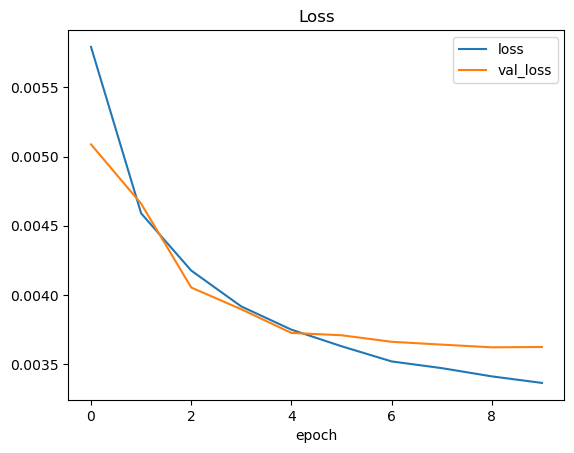

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

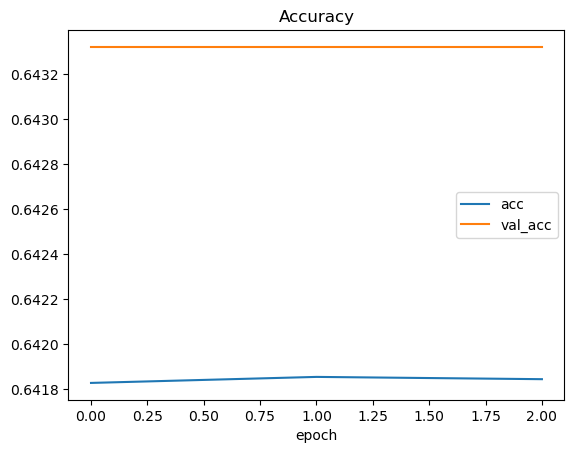

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
# Cargar la imagen
img_path_back = 'image_bank/2024-06-21 18-03-39.png'
img_back = load_img(img_path_back, target_size=image_size)  # Asegúrate de que el tamaño coincida con el de entrenamiento
img_array = img_to_array(img_back)  # Convertir la imagen a un array numpy
img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión para el batch (1, 64, 128, 3)
# Normalizar la imagen (rescalar)
img_array /= 255.0

In [ ]:
# Realizar la predicción
prediction = model.predict(img_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [ ]:
prediction

array([[0.01190818]], dtype=float32)

In [ ]:
# Save the model
model.save('behavioral_cloning_model.h5')


In [ ]:
model.save('my_model.keras')